<a href="https://colab.research.google.com/github/pattrickx/signature_classification/blob/main/av2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Criando pastas e organizando dados

In [ ]:
!unzip "/content/drive/MyDrive/Ciência de dados/dados de assinatura.zip"

Archive:  /content/drive/MyDrive/Ciência de dados/dados de assinatura.zip
replace dados de assinatura/Testdata_SigComp2011/SigComp11-Offlinetestset/Chinese/Questioned(487)/011/01_0100011.PNG? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [ ]:
import glob
from shutil import copyfile
import os
imgs = glob.glob("/content/dados de assinatura/Testdata_SigComp2011/SigComp11-Offlinetestset/Chinese/Questioned(487)/*/*.png")+glob.glob("/content/dados de assinatura/Testdata_SigComp2011/SigComp11-Offlinetestset/Chinese/Questioned(487)/*/*.PNG")
for img in imgs:
    nome = img.split("/")[-2][1:]
    n  = img.split("/")[-1].split("_")[0]
    n = n if n[0]!= "0" else n[1:]
    copyfile(img,f'/content/data/Chinese_{nome}_{n}_F.png')

imgs = glob.glob("/content/dados de assinatura/Testdata_SigComp2011/SigComp11-Offlinetestset/Chinese/Ref(115)/*/*.png")+glob.glob("/content/dados de assinatura/Testdata_SigComp2011/SigComp11-Offlinetestset/Chinese/Ref(115)/*/*.PNG")
for img in imgs:
    nome = img.split("/")[-2][1:]
    n  = img.split("/")[-1].split("_")[0]
    n = n if n[0]!= "0" else n[1:]
    copyfile(img,f'/content/data/Chinese_{nome}_{n}_V.png')

imgs = glob.glob("/content/dados de assinatura/Testdata_SigComp2011/SigComp11-Offlinetestset/Dutch/Questioned(1287)/*/*.PNG")+glob.glob("/content/dados de assinatura/Testdata_SigComp2011/SigComp11-Offlinetestset/Dutch/Questioned(1287)/*/*.png")
for img in imgs:
    nome = img.split("/")[-2][1:]
    n  = img.split("/")[-1].split("_")[0]
    n = n if n[0]!= "0" else n[1:]
    copyfile(img,f'/content/data/Dutch_{nome}_{n}_F.png')

imgs = glob.glob("/content/dados de assinatura/Testdata_SigComp2011/SigComp11-Offlinetestset/Dutch/Reference(646)/*/*.PNG")+glob.glob("/content/dados de assinatura/Testdata_SigComp2011/SigComp11-Offlinetestset/Dutch/Reference(646)/*/*.png")
for img in imgs:
    nome = img.split("/")[-2][1:]
    n  = img.split("/")[-1].split("_")[0]
    n = n if n[0]!= "0" else n[1:]
    copyfile(img,f'/content/data/Dutch_{nome}_{n}_V.png')

# lendo path das imagens e mostrando 1 exemplo


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

['/content/data/Chinese_12_7_F.png', '/content/data/Chinese_12_5_F.png']
1537


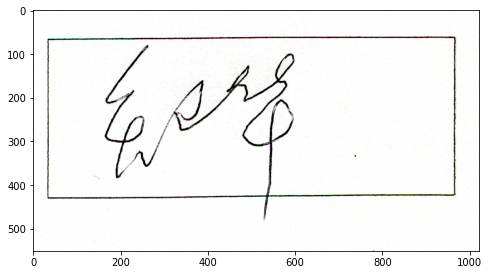

In [ ]:
imgs_path = glob.glob('/content/data/*')
print(imgs_path[:2]) # print elementos
print(len(imgs_path)) # print tamanho
img_path = imgs_path[0]
img_original =  cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB) 
plt.figure(figsize=(8,8))
plt.imshow(img_original)
plt.show()

# Pre tratamentos

## Gray scale

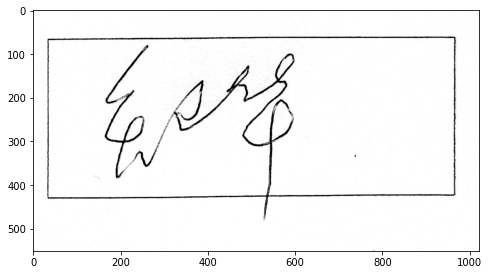

In [ ]:
img_gray = cv2.cvtColor(img_original, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(8,8))
plt.imshow(img_gray, cmap='gray')
plt.show()

## Binarização

### ADAPTIVE_THRESH_GAUSSIAN

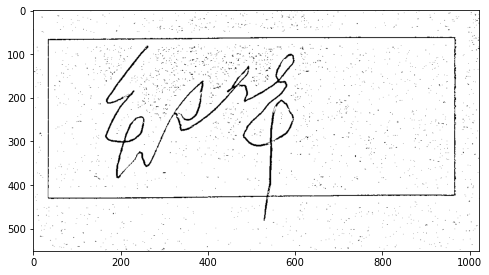

In [ ]:
img_binary = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,35,2)
kernel = np.ones((2,2))
img_binary = cv2.dilate(img_binary, kernel, iterations=1)

plt.figure(figsize=(8,8))
plt.imshow(img_binary, cmap='gray')
plt.show()

### THRESH_BINARY

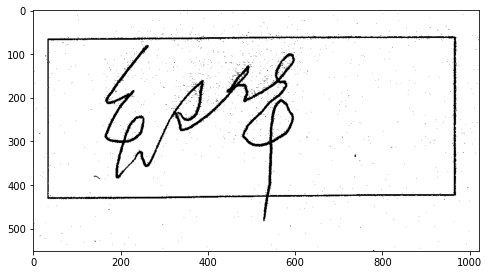

In [ ]:
_, img_binary = cv2.threshold(img_gray, 240, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(8,8))
plt.imshow(img_binary, cmap='gray')
plt.show()

### THRESH_OTSU

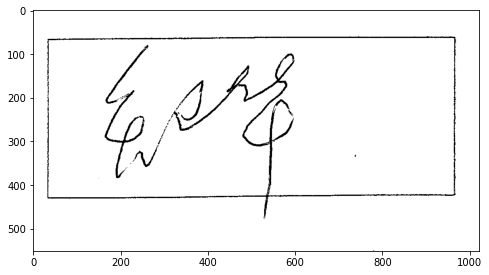

In [ ]:
thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU)[1]
plt.figure(figsize=(8,8))
plt.imshow(thresh, cmap='gray')
plt.show()

### Inverse Binary

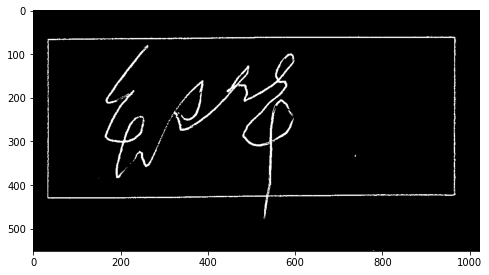

In [ ]:
thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
plt.figure(figsize=(8,8))
plt.imshow(thresh, cmap='gray')
plt.show()

## Esqueletização

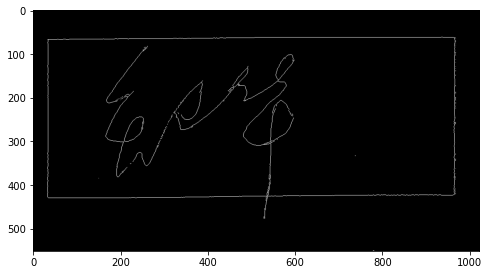

In [ ]:
from skimage.morphology import thin

thinned = thin(thresh)

plt.figure(figsize=(8,8))
plt.imshow(thinned, cmap='gray')
plt.show()

## HOG

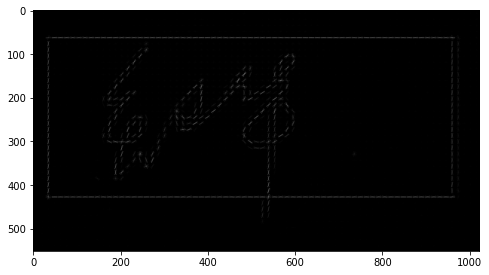

In [ ]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale

img_hog, test_hog_img = hog(
    img_gray, pixels_per_cell=(14,14), 
    cells_per_block=(2, 2), 
    orientations=9, 
    visualize=True, 
    block_norm='L2-Hys')

plt.figure(figsize=(8,8))
plt.imshow(test_hog_img, cmap='gray')
plt.show()

In [ ]:
len(img_hog) # tamanho do array hog

98496

# Criando dataset

In [ ]:
import pandas as pd
imgs_path = glob.glob('/content/data/*')

lista = []
for img_path in imgs_path:
    
    img_gray = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)
    
    dim = (450, 450)
    img_gray = cv2.resize(img_gray, dim, interpolation = cv2.INTER_AREA)

    img_hog,_= hog(
    img_gray, pixels_per_cell=(14,14), 
    cells_per_block=(2, 2), 
    orientations=9, 
    visualize=True, 
    block_norm='L2-Hys')

    lingua,nome,numero,autenticidade = img_path[:-4].split('_')

    lista.append([img_hog, nome, autenticidade,lingua.split('/')[-1]])


In [ ]:
df_all = pd.DataFrame(columns=["imagem","nome","autenticidade","lingua"],data=lista)
df_all.head()

imagem  ...   lingua
0  [0.32019527565295464, 0.027178944822723778, 0....  ...  Chinese
1  [0.01341143437551643, 0.0, 0.00677379617394329...  ...  Chinese
2  [0.330209064793136, 0.08933257432749063, 0.099...  ...    Dutch
3  [0.3581071670632158, 0.0, 0.07607257519922489,...  ...    Dutch
4  [0.33023522103292374, 0.0, 0.0, 0.0, 0.3302352...  ...  Chinese

[5 rows x 4 columns]

In [ ]:
df_all['nome'] = df_all["lingua"]+'_'+df_all["nome"]
df_all['nome'] = pd.factorize(df_all['nome'])[0]
df_all['classe'] = df_all["nome"].astype(str)+'_'+df_all["autenticidade"]
df_all['size_data'] = df_all['imagem'].apply(lambda x: len(x))
df_all.head()

imagem  nome  ... classe size_data
0  [0.32019527565295464, 0.027178944822723778, 0....     0  ...    0_F     34596
1  [0.01341143437551643, 0.0, 0.00677379617394329...     0  ...    0_F     34596
2  [0.330209064793136, 0.08933257432749063, 0.099...     1  ...    1_V     34596
3  [0.3581071670632158, 0.0, 0.07607257519922489,...     2  ...    2_F     34596
4  [0.33023522103292374, 0.0, 0.0, 0.0, 0.3302352...     0  ...    0_F     34596

[5 rows x 6 columns]

In [ ]:
df_individuos = df_all[["imagem","nome","classe"]].copy()
df_T_individuos = df_all[["imagem","classe"]].copy()

# Visualizando cluters de dados 

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

## Visualizando todos os indivíduos

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


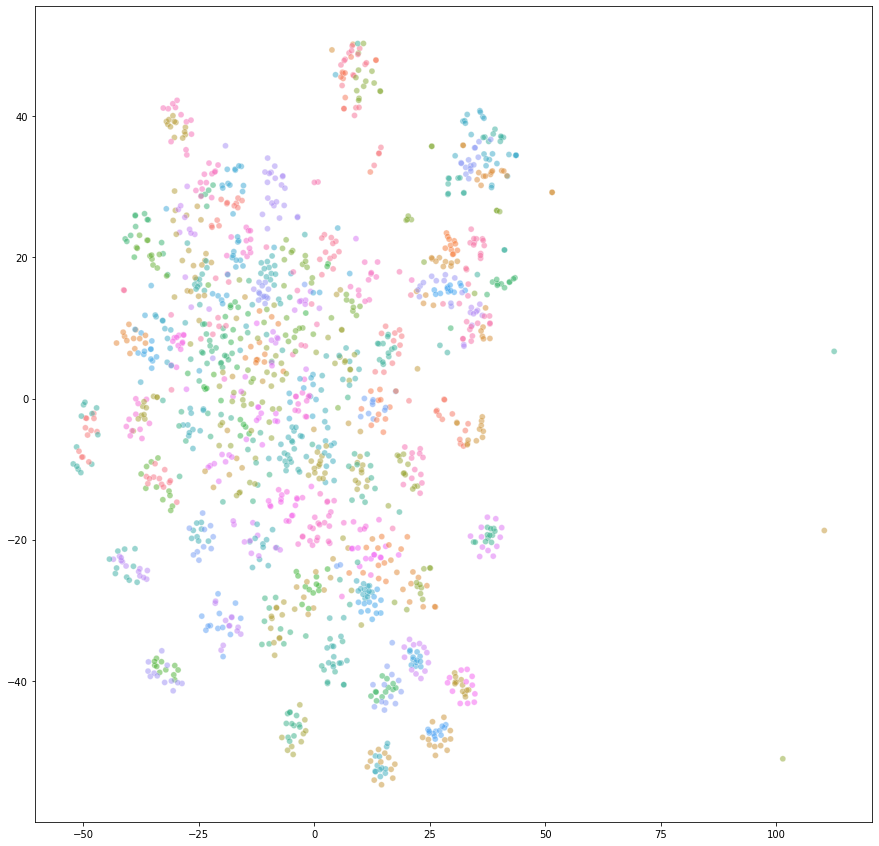

In [ ]:
tsne = TSNE()
X_embedded = tsne.fit_transform(df_T_individuos['imagem'].values.tolist())

plt.figure(figsize=(15,15))
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=df_T_individuos['classe'].values.tolist(), legend=False, alpha=0.5)

## Visualizando por indivíduos

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


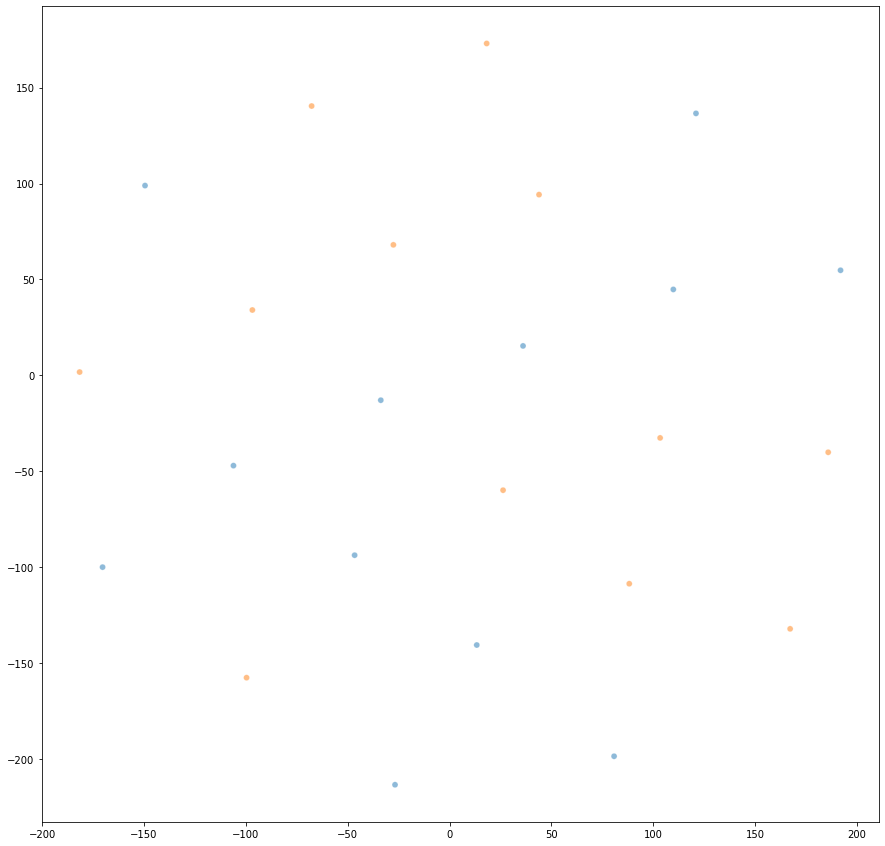

In [ ]:
# Com um indivíduo
filtro = df_T_individuos.apply(lambda r: True if r["classe"]=="40_F" or  r["classe"]=="40_V" else False, axis = 1)
df_individuo_22 = df_T_individuos[filtro]
df_individuo_22.reset_index(drop=True,inplace=True)


tsne = TSNE()
X_embedded = tsne.fit_transform(df_individuo_22['imagem'].values.tolist())

plt.figure(figsize=(15,15))
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=df_individuo_22['classe'].values.tolist(), legend=False, alpha=0.5)

# Treinamentos

## Importações

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

## Treinando com todos os individuos 

In [ ]:
df_T_individuos.head()

imagem classe
0  [0.32019527565295464, 0.027178944822723778, 0....    0_F
1  [0.01341143437551643, 0.0, 0.00677379617394329...    0_F
2  [0.330209064793136, 0.08933257432749063, 0.099...    1_V
3  [0.3581071670632158, 0.0, 0.07607257519922489,...    2_F
4  [0.33023522103292374, 0.0, 0.0, 0.0, 0.3302352...    0_F

### Dividindo dataset 

In [ ]:
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(df_T_individuos['imagem'].values,df_T_individuos['classe'].values,shuffle=True, test_size=0.25)

### SGDClassifier

In [ ]:
clf = SGDClassifier()
clf.fit(x_train.tolist(), y_train.tolist())
previsoes = clf.predict(x_test.tolist())

[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 2 1]
 [0 0 0 ... 0 0 1]]


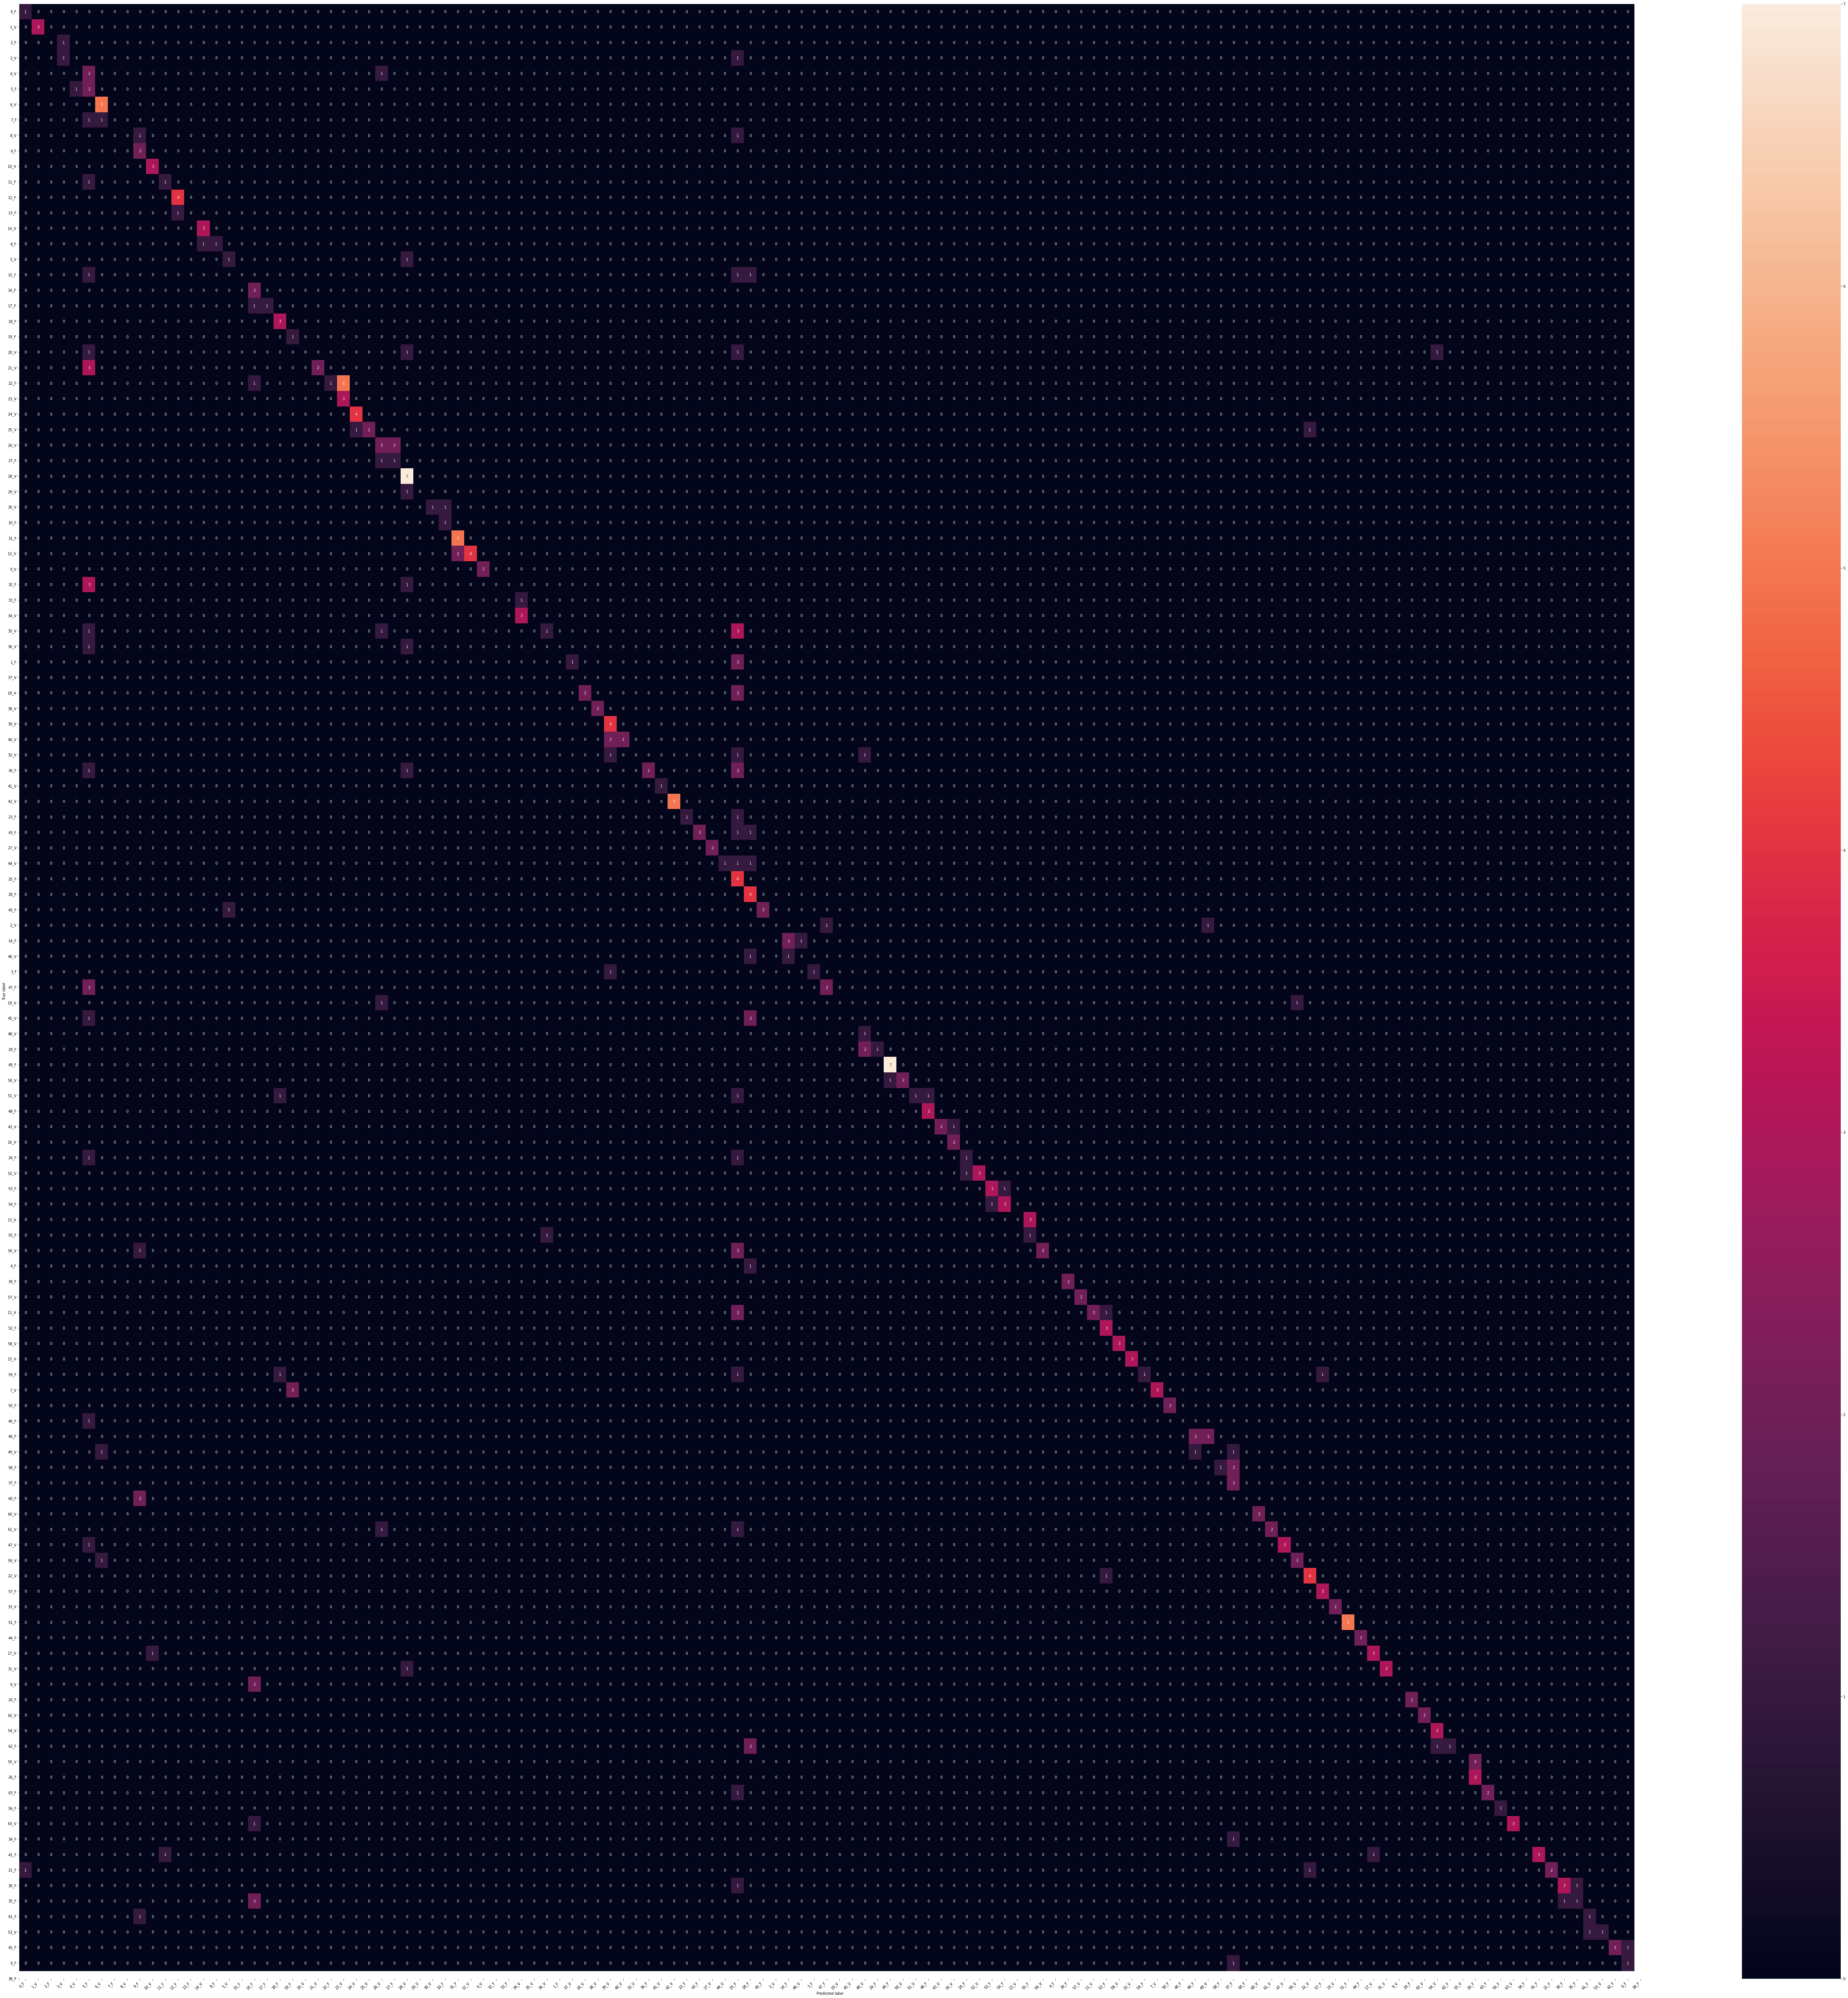

In [ ]:
matrix = confusion_matrix(y_test.tolist(),previsoes)
print(matrix)


plt.figure(figsize=(100,100))

heatmap = sns.heatmap(matrix,
            fmt='d',
            xticklabels=pd.factorize(df_T_individuos['classe'])[1],
            yticklabels=pd.factorize(df_T_individuos['classe'])[1],
            annot=True,)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=10)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
score = cross_val_score(SGDClassifier(), df_T_individuos['imagem'].values.tolist(),df_T_individuos['classe'].values.tolist(),cv=10)
print('R²= ', np.mean(score))

R²=  0.6714285714285715


### Logistic Regression

In [ ]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train.tolist(), y_train.tolist())
logisticRegr.score(x_test.tolist(), y_test.tolist())
scoreLogisticR  = cross_val_score(LogisticRegression(), df_T_individuos['imagem'].values.tolist(),df_T_individuos['classe'].values.tolist(),cv=5)
print('R²= ', np.mean(scoreLogisticR))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


R²=  0.829504209145903


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
predictLR = logisticRegr.predict(x_test.tolist())

[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 1]
 [0 0 0 ... 0 0 2]]


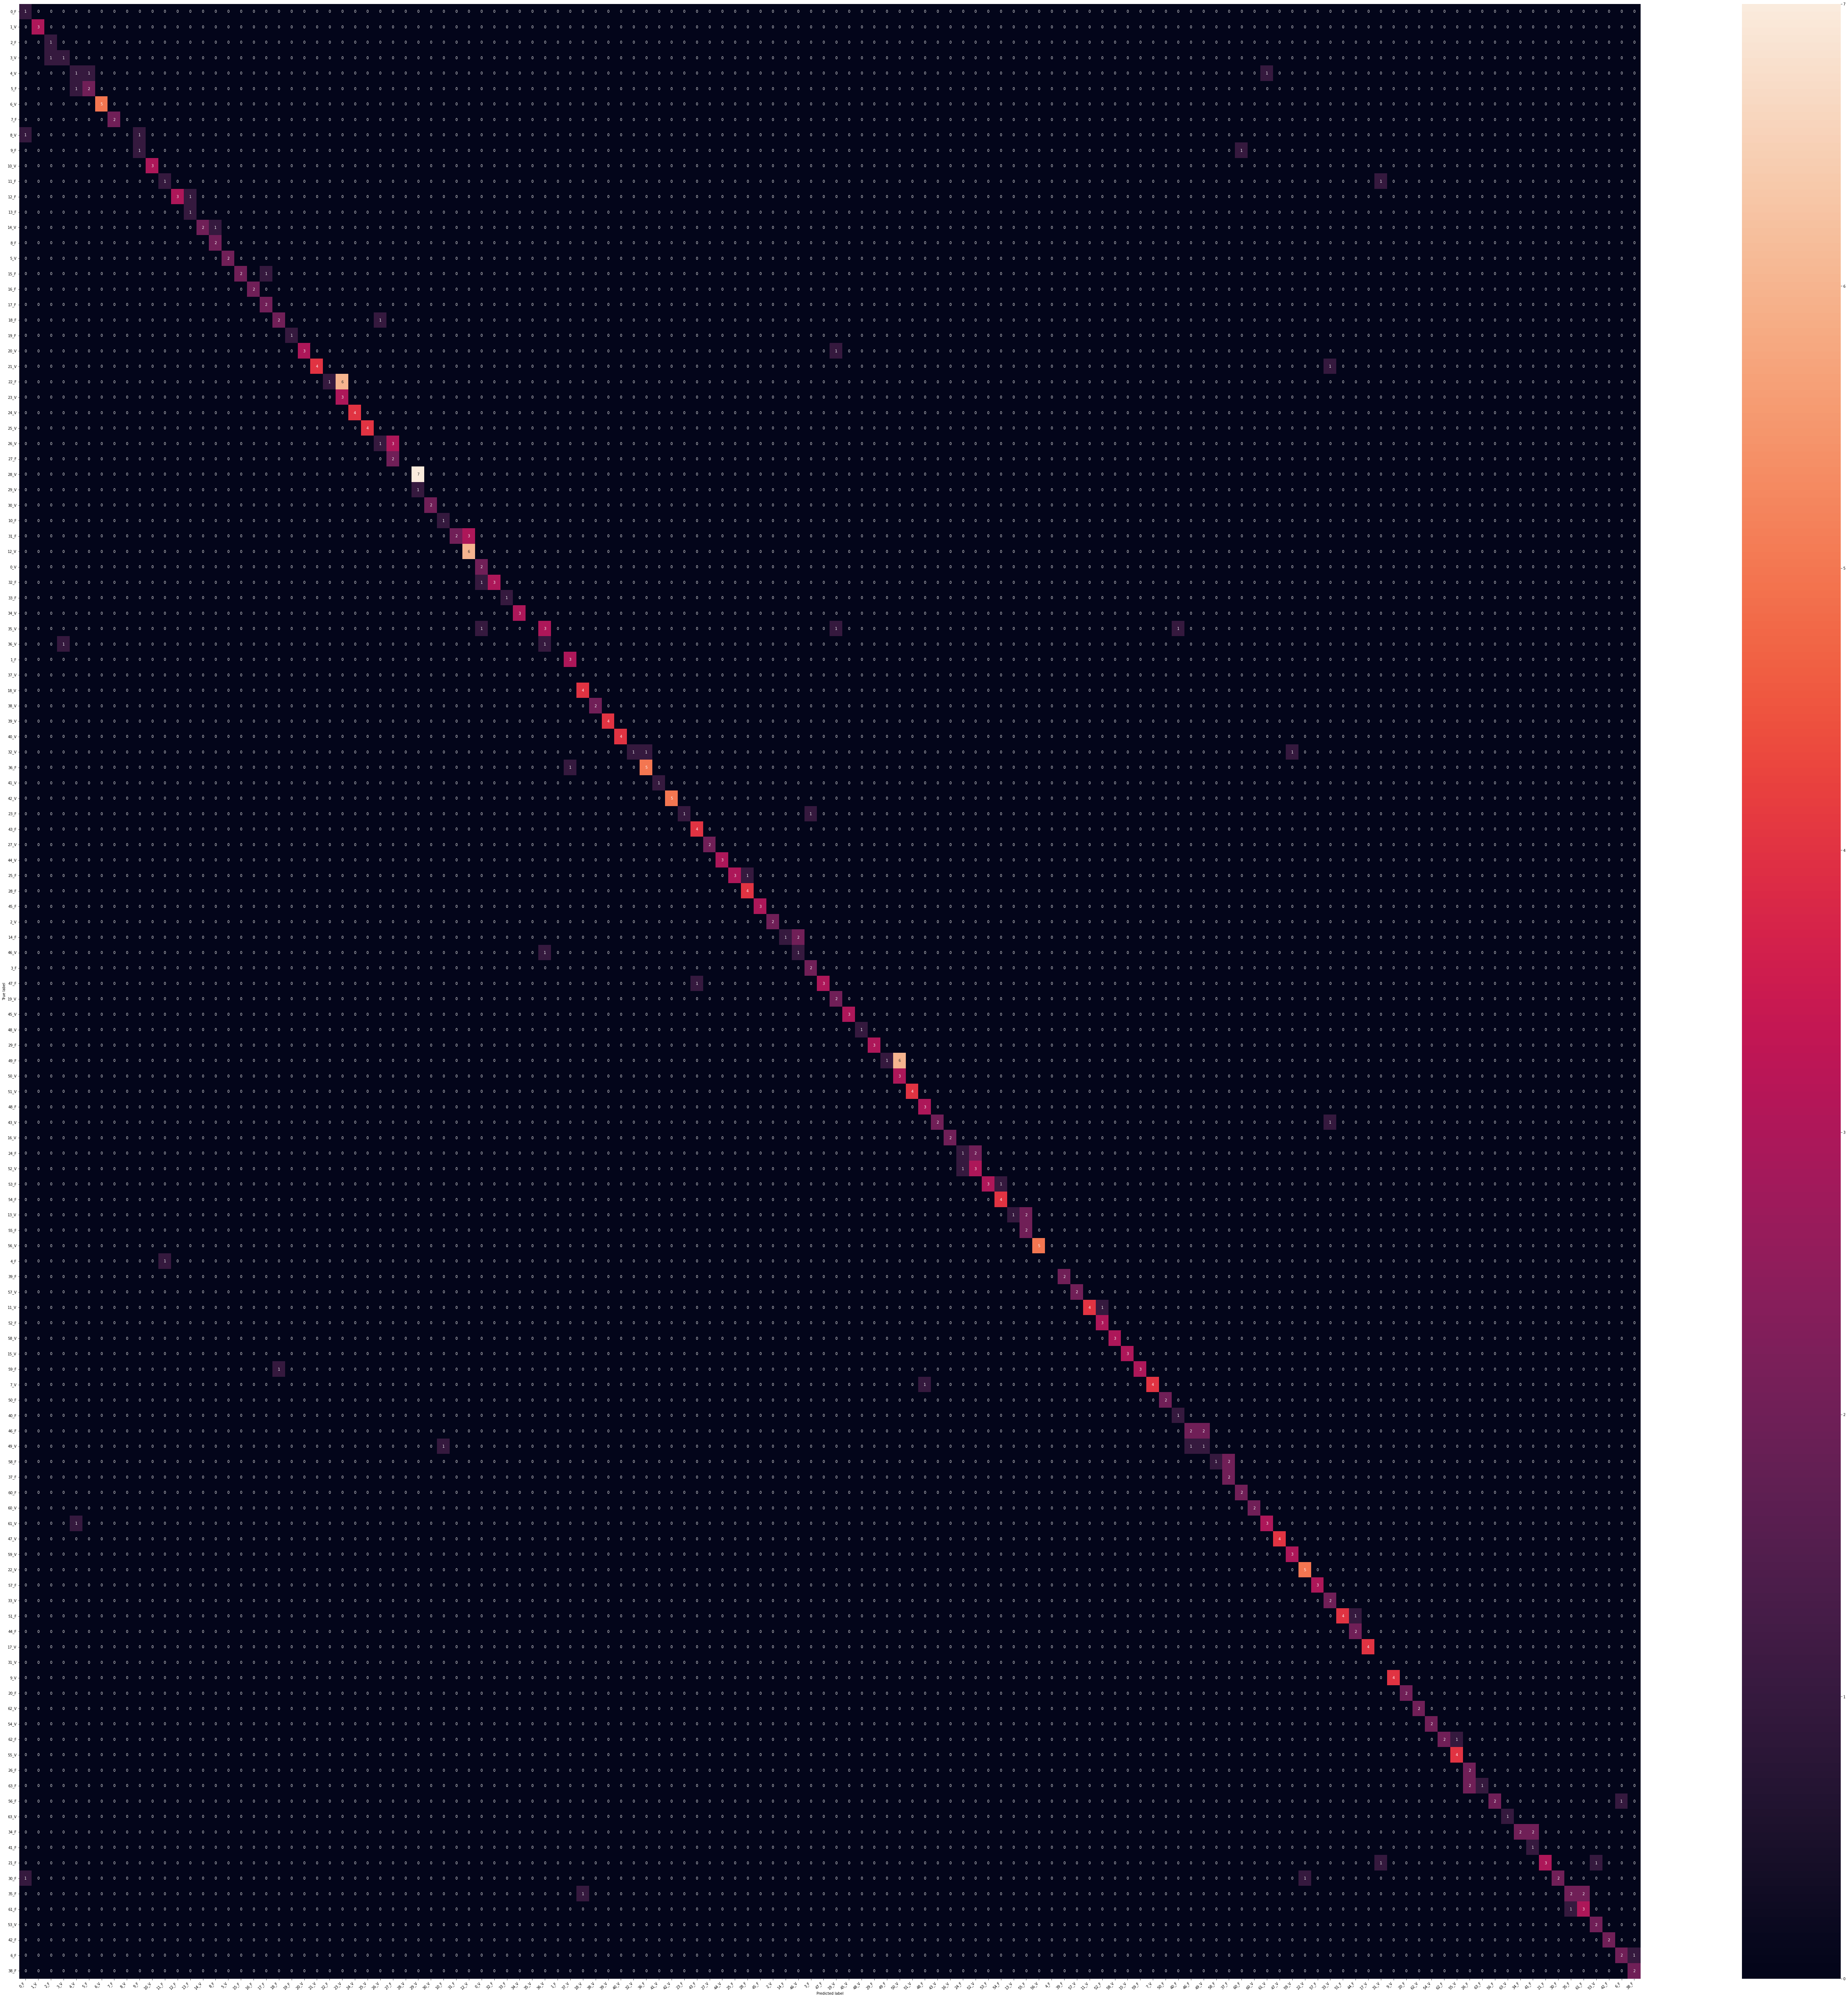

In [ ]:
cnf_matrixLogisticR = confusion_matrix(y_test.tolist(), predictLR)
print(cnf_matrixLogisticR)


plt.figure(figsize=(100,100))

heatmap = sns.heatmap(cnf_matrixLogisticR,
            fmt='d',
            xticklabels=pd.factorize(df_T_individuos['classe'])[1],
            yticklabels=pd.factorize(df_T_individuos['classe'])[1],
            annot=True,)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=10)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Random Forest Classifier

In [ ]:
randomForestC = RandomForestClassifier()
randomForestC.fit(x_train.tolist(), y_train.tolist())
randomForestC.score(x_test.tolist(), y_test.tolist())
scoreRandomForestC  = cross_val_score(RandomForestClassifier(), df_T_individuos['imagem'].values.tolist(),df_T_individuos['classe'].values.tolist(),cv=5)
print('R²= ', np.mean(scoreRandomForestC))

R²=  0.6323808113710394


In [ ]:
predictRFC = randomForestC.predict(x_test.tolist())

[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


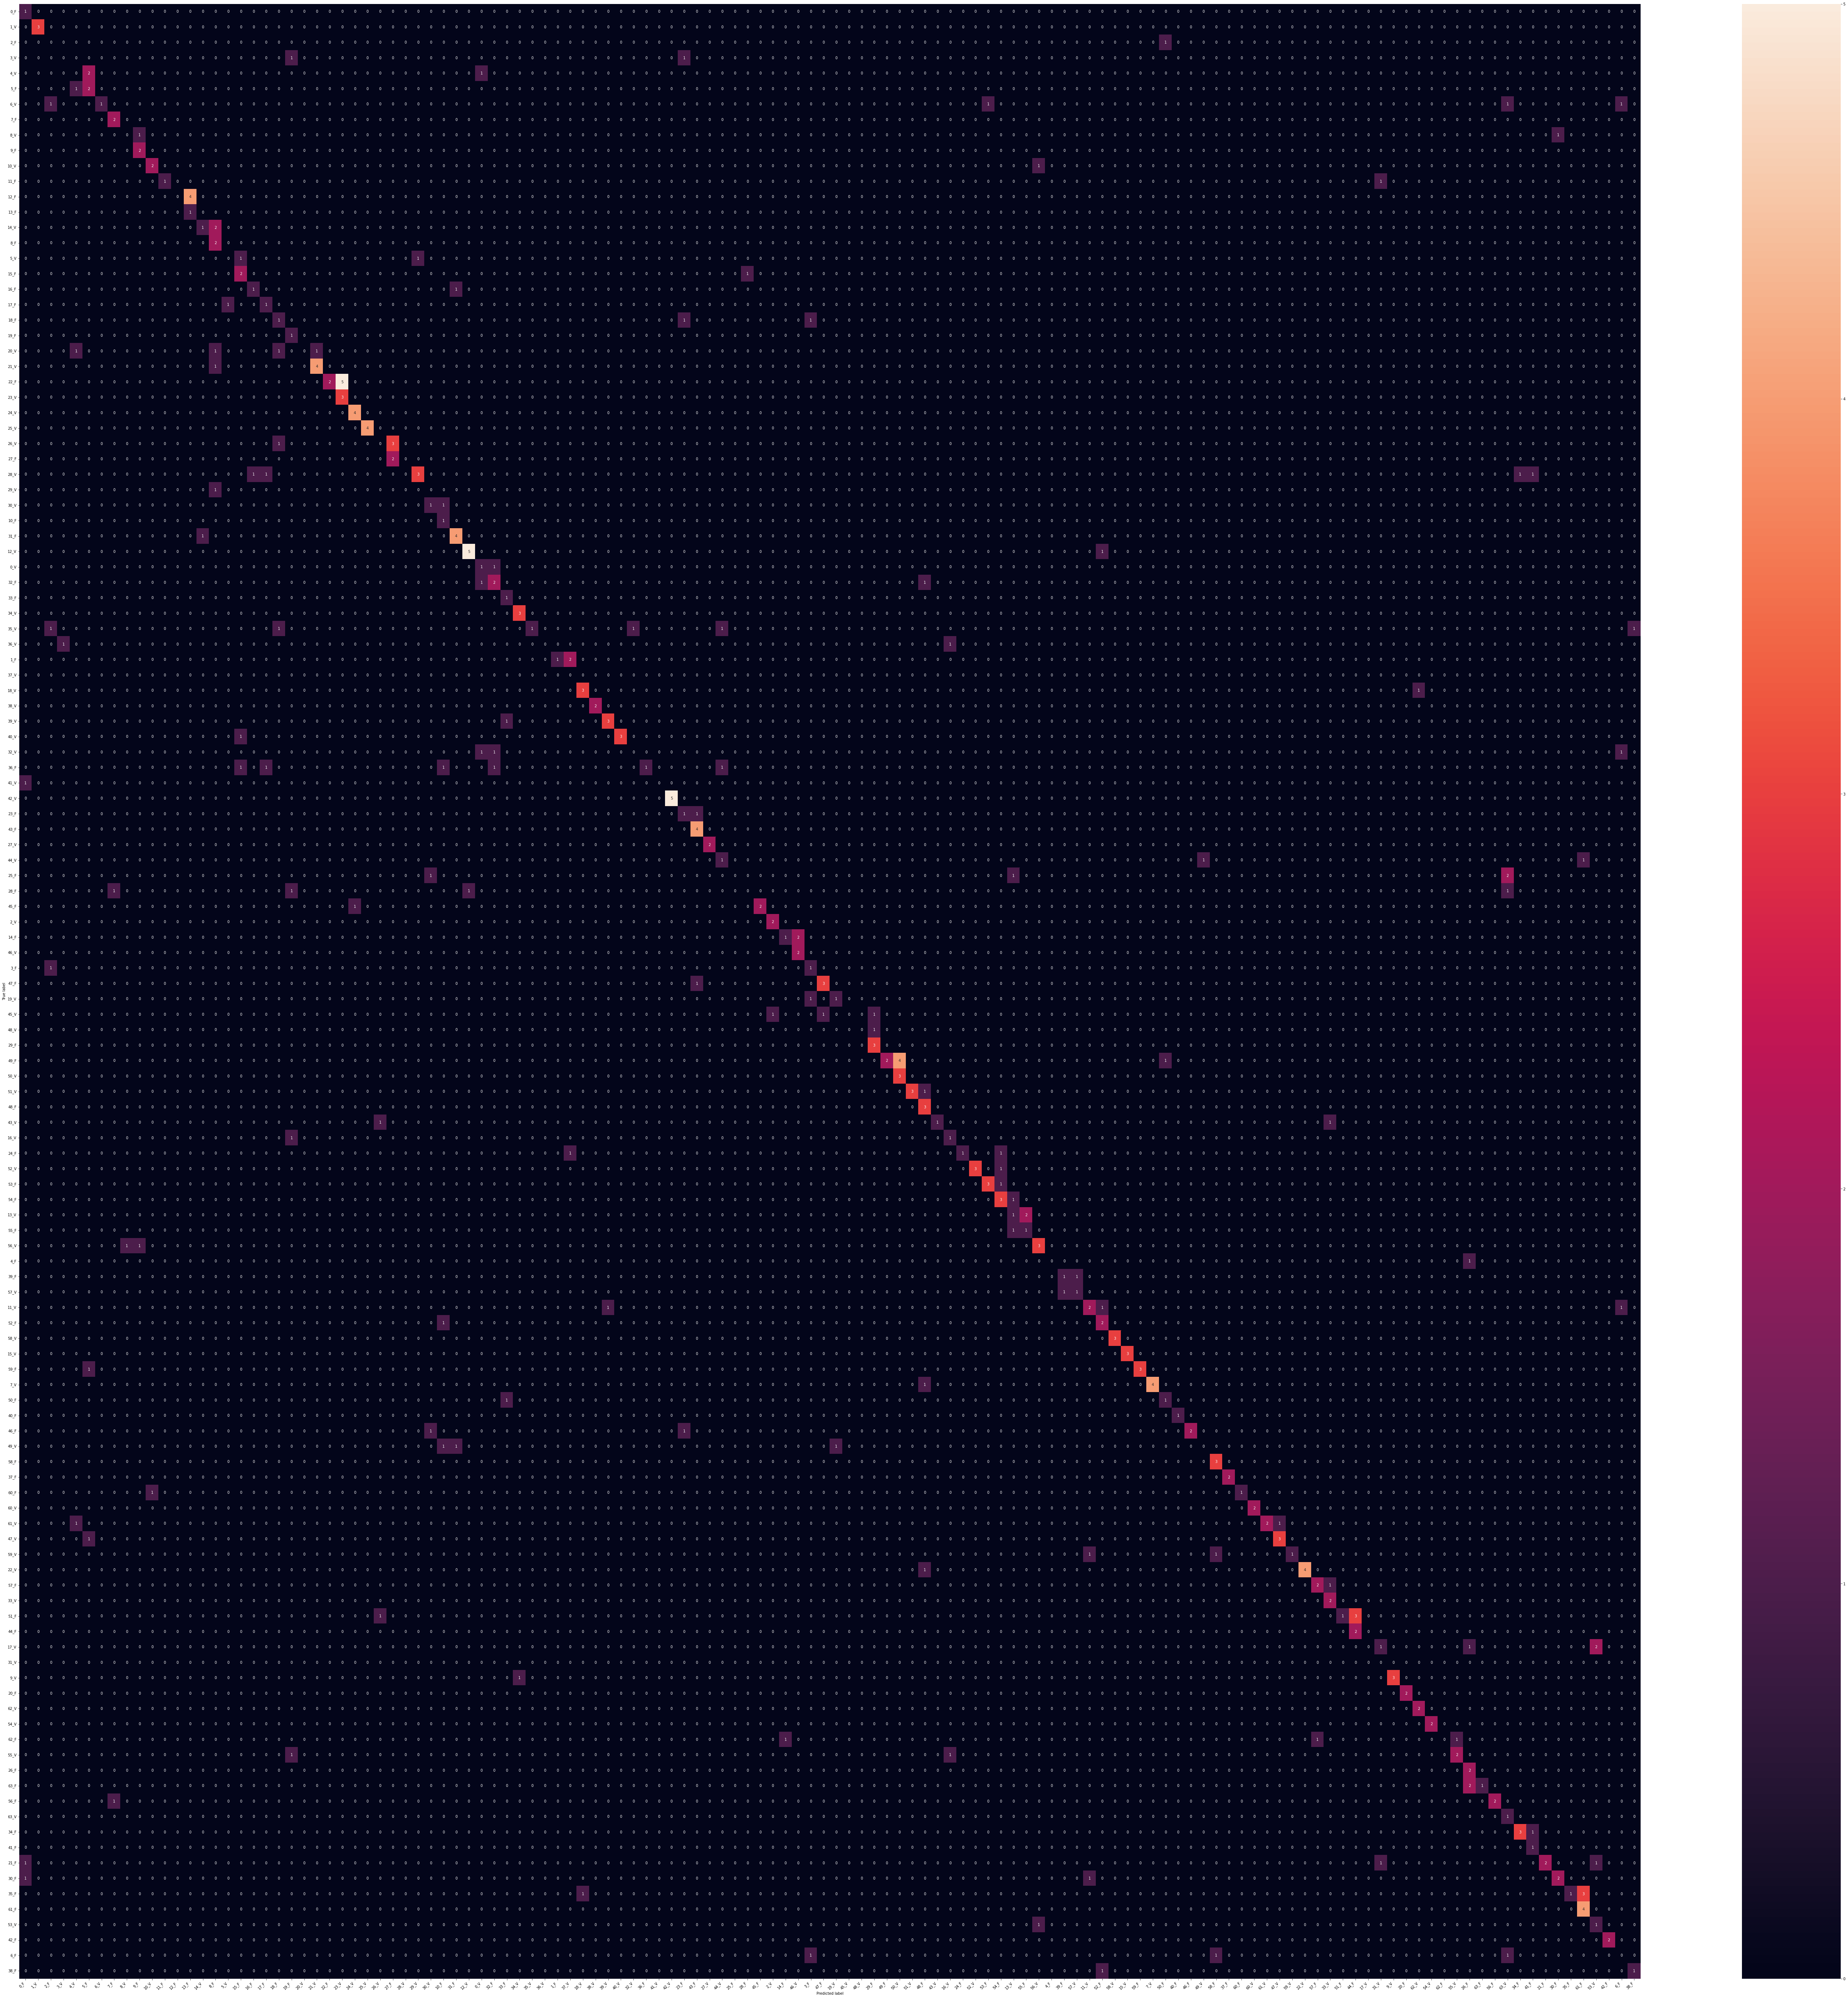

In [ ]:
cnf_matrixRFC = confusion_matrix(y_test.tolist(), predictRFC)
print(cnf_matrixRFC)


plt.figure(figsize=(100,100))

heatmap = sns.heatmap(cnf_matrixRFC,
            fmt='d',
            xticklabels=pd.factorize(df_T_individuos['classe'])[1],
            yticklabels=pd.factorize(df_T_individuos['classe'])[1],
            annot=True,)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=10)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Treinando por individuo 

In [ ]:
df_individuos.head()

imagem  nome classe
0  [0.32019527565295464, 0.027178944822723778, 0....     0    0_F
1  [0.01341143437551643, 0.0, 0.00677379617394329...     0    0_F
2  [0.330209064793136, 0.08933257432749063, 0.099...     1    1_V
3  [0.3581071670632158, 0.0, 0.07607257519922489,...     2    2_F
4  [0.33023522103292374, 0.0, 0.0, 0.0, 0.3302352...     0    0_F

In [ ]:
# categories = df_individuos['classe'].unique().tolist()

In [ ]:
nomes_individuos = df_individuos.nome.unique()

In [ ]:
def print_confusion_matrix(y_test,previsoes,categories):
    matrix = confusion_matrix(y_test,previsoes)
    
    n_matrix = []
    for n,row in enumerate(matrix):
        print(row/row.sum())
        n_matrix.append(row/row.sum())
    
    plt.figure(figsize=(20,15))
    heatmap = sns.heatmap(n_matrix,fmt='.1%',annot=True,
                            xticklabels=categories,
                            yticklabels=categories)
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=10)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=10)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

### SGDClassifier

###################################################################
Treinamento individuo 0
Score: 0.6666666666666666

[0.6 0.4]
[0. 1.]


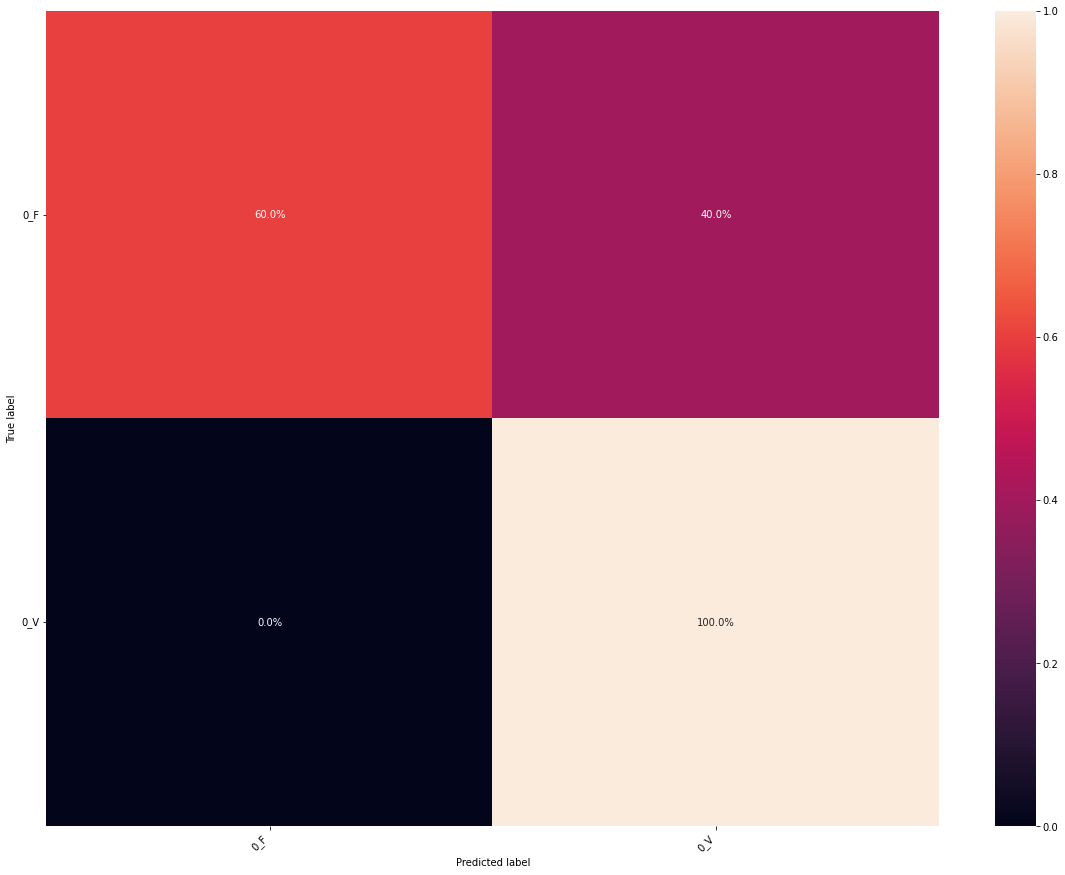


Cross_val_score
R²= 0.7833333333333333

###################################################################
Treinamento individuo 1
Score: 0.8333333333333334

[1. 0.]
[0.33333333 0.66666667]


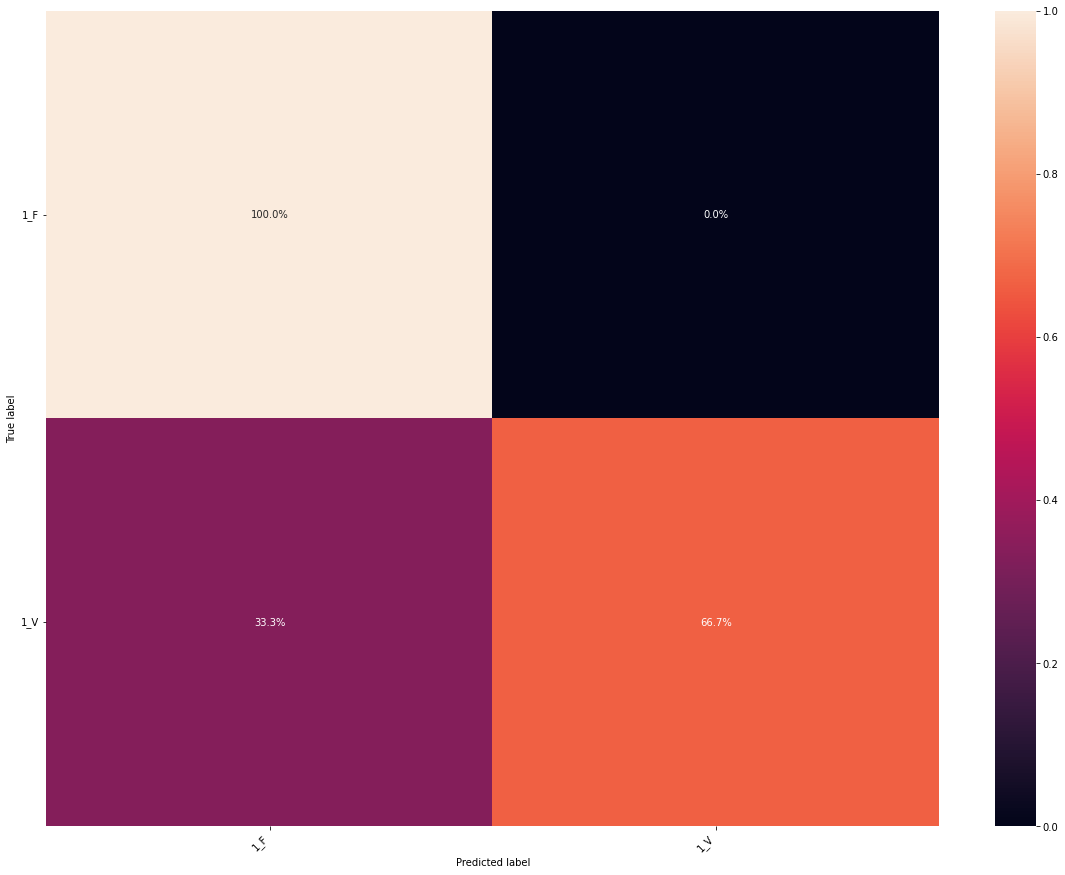


Cross_val_score
R²= 0.95

###################################################################
Treinamento individuo 2
Score: 0.8333333333333334

[1. 0.]
[0.5 0.5]


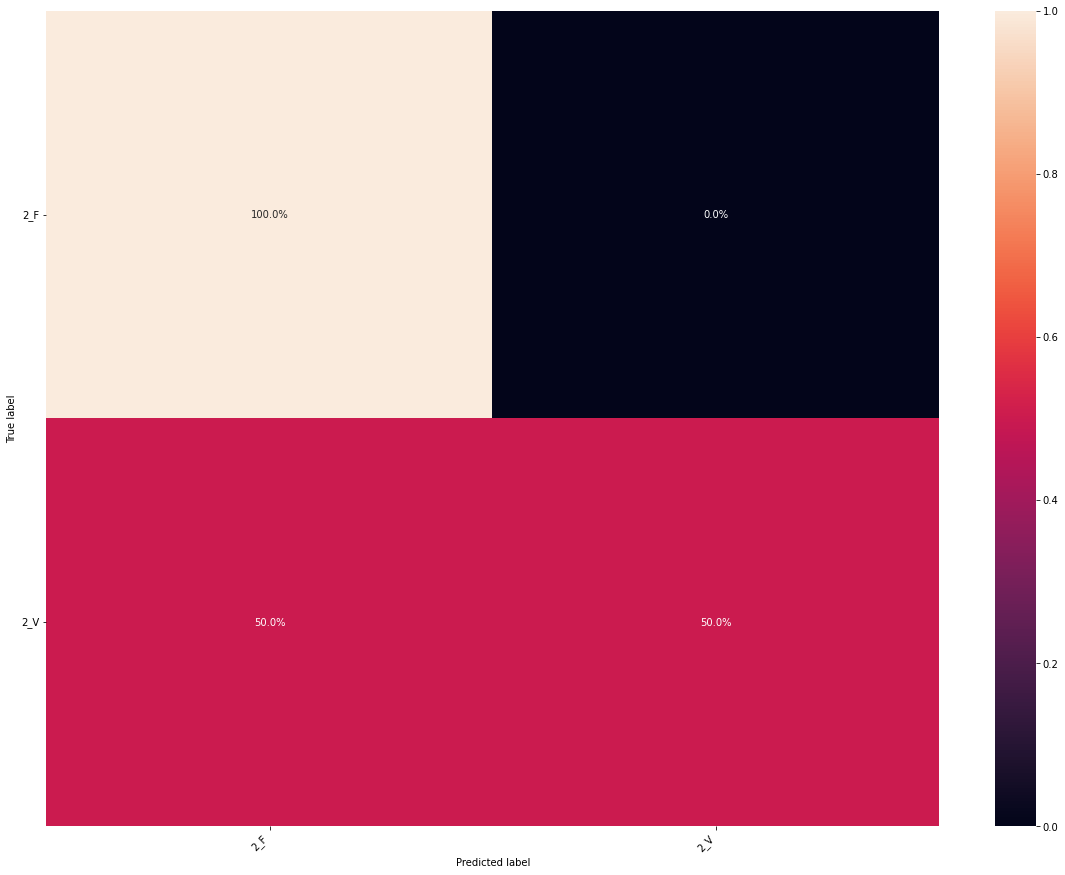


Cross_val_score
R²= 0.8333333333333333

###################################################################
Treinamento individuo 3
Score: 0.5

[1. 0.]
[1. 0.]


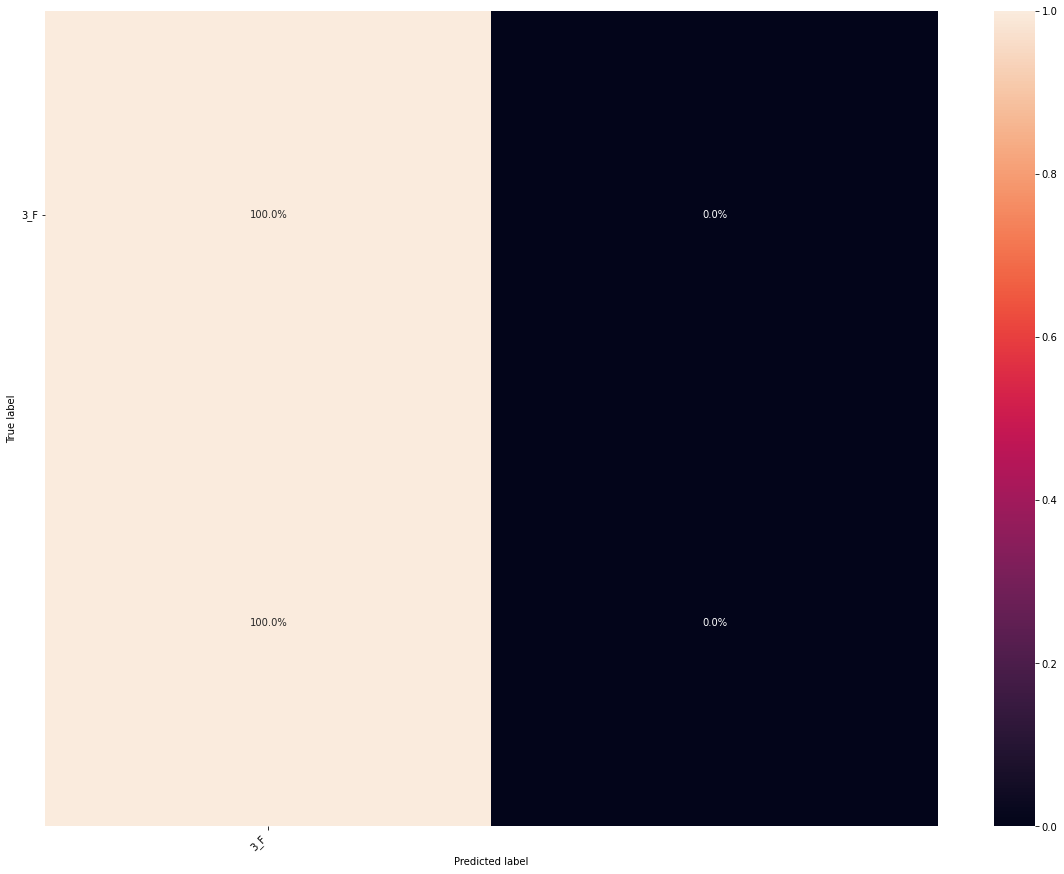


Cross_val_score
R²= 0.7

###################################################################
Treinamento individuo 4
Score: 0.5

[0. 1.]
[0. 1.]


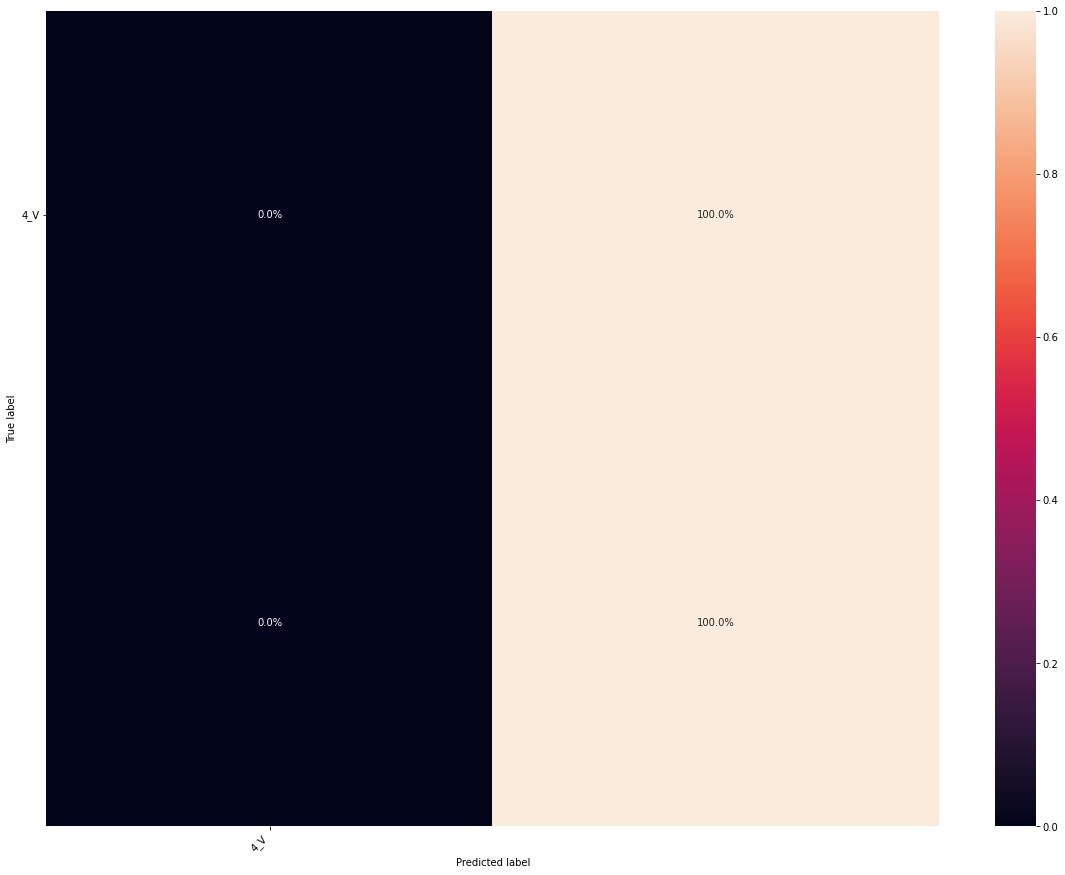


Cross_val_score
R²= 0.75

###################################################################
Treinamento individuo 5
Score: 1.0

[1. 0.]
[0. 1.]


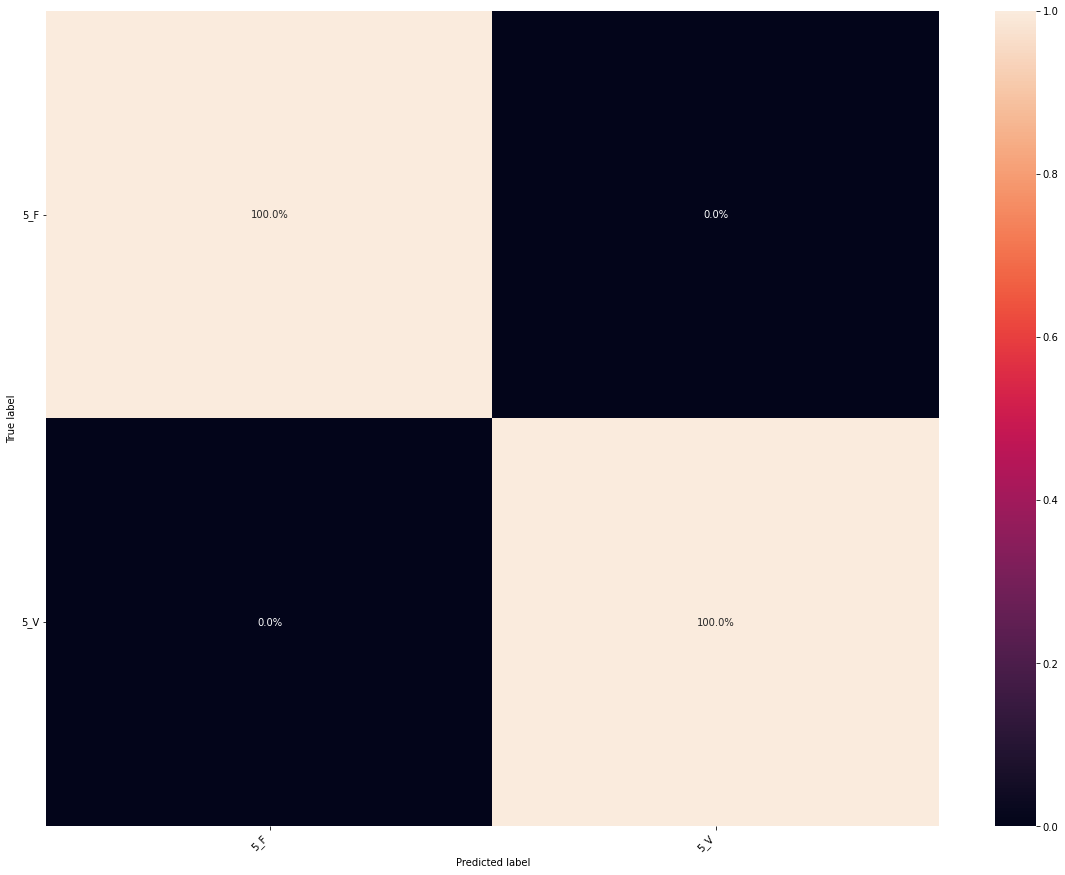


Cross_val_score
R²= 0.8333333333333333

###################################################################
Treinamento individuo 6
Score: 0.7142857142857143

[0.6 0.4]
[0. 1.]


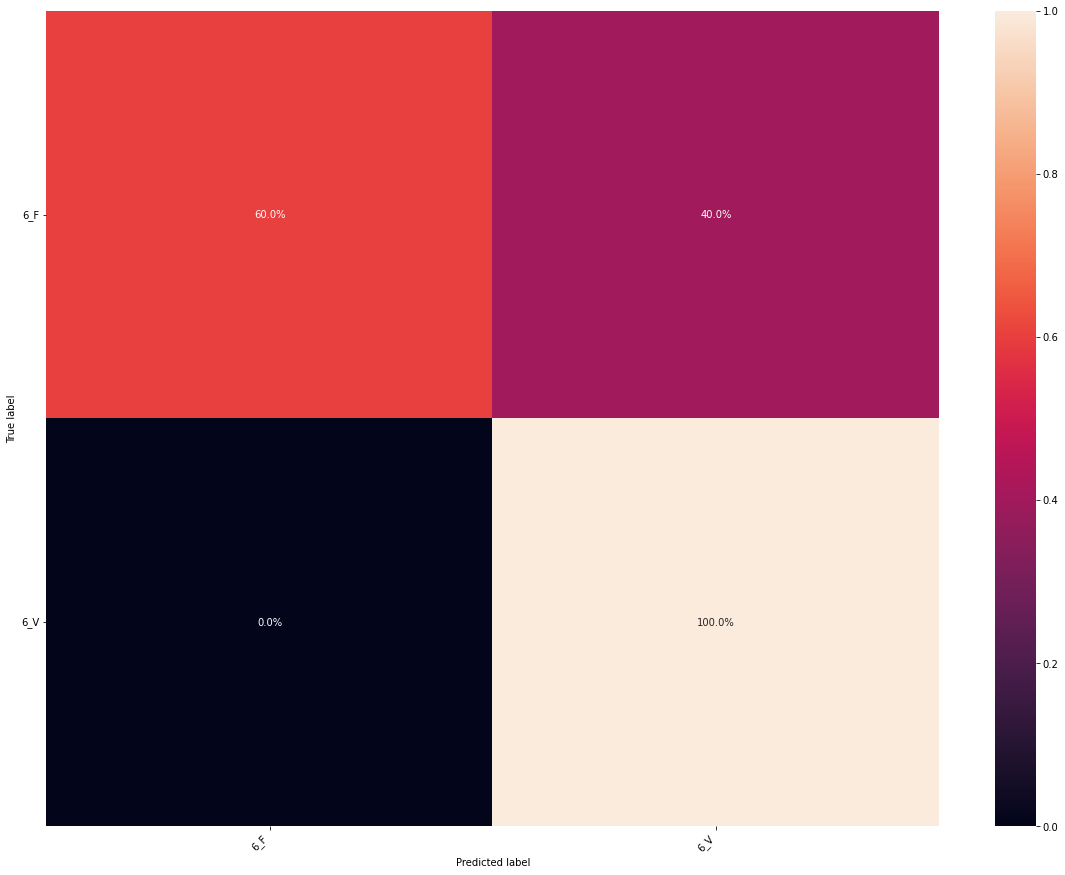


Cross_val_score
R²= 0.7833333333333333

###################################################################
Treinamento individuo 7
Score: 0.8333333333333334

[0.66666667 0.33333333]
[0. 1.]


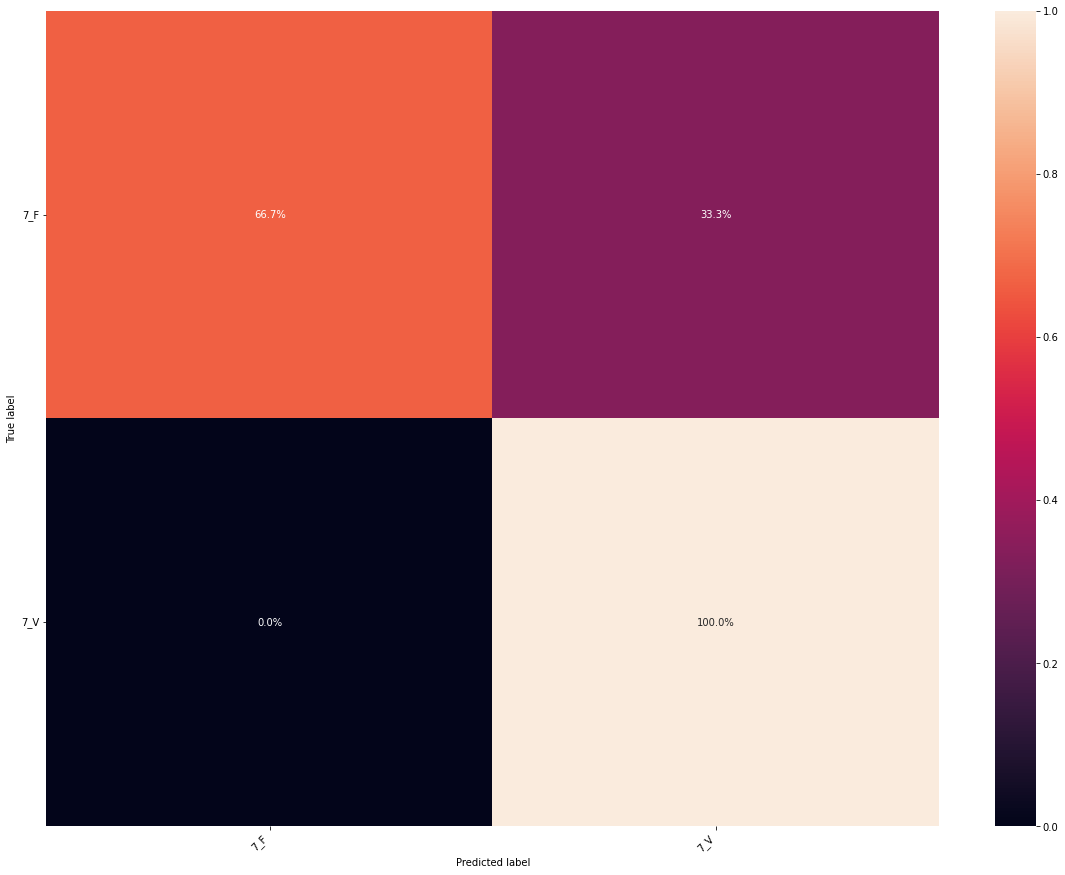


Cross_val_score
R²= 0.8333333333333333

###################################################################
Treinamento individuo 8
Score: 0.2857142857142857

[1. 0.]
[1. 0.]


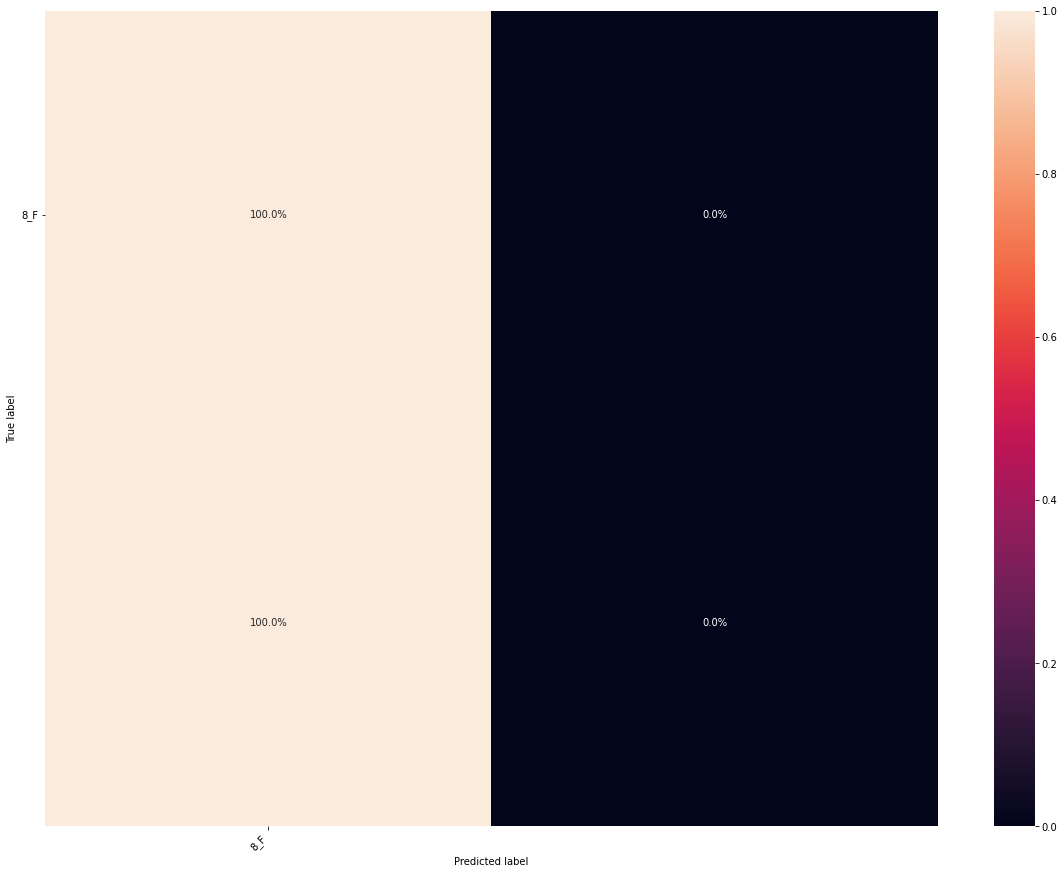


Cross_val_score
R²= 0.8666666666666666

###################################################################
Treinamento individuo 9
Score: 1.0

[1. 0.]
[0. 1.]


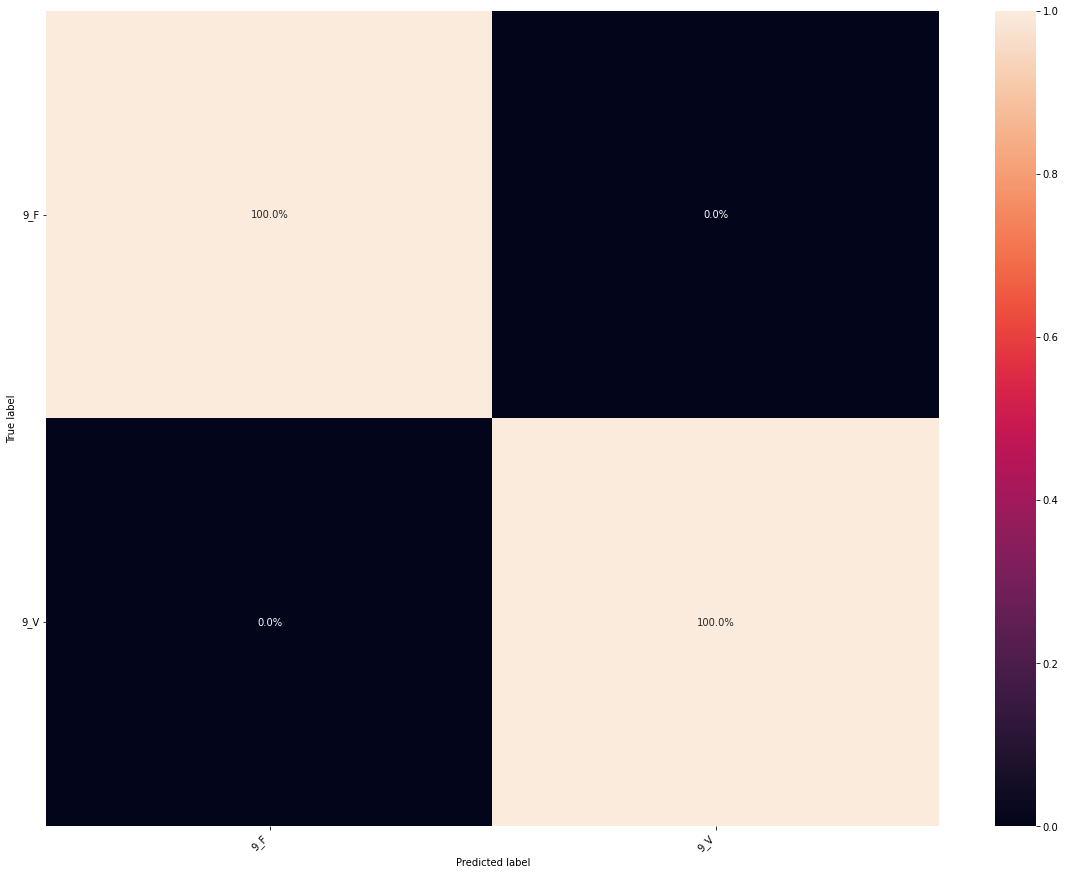


Cross_val_score
R²= 0.9

###################################################################
Treinamento individuo 10
Score: 0.8333333333333334

[1. 0.]
[0.33333333 0.66666667]


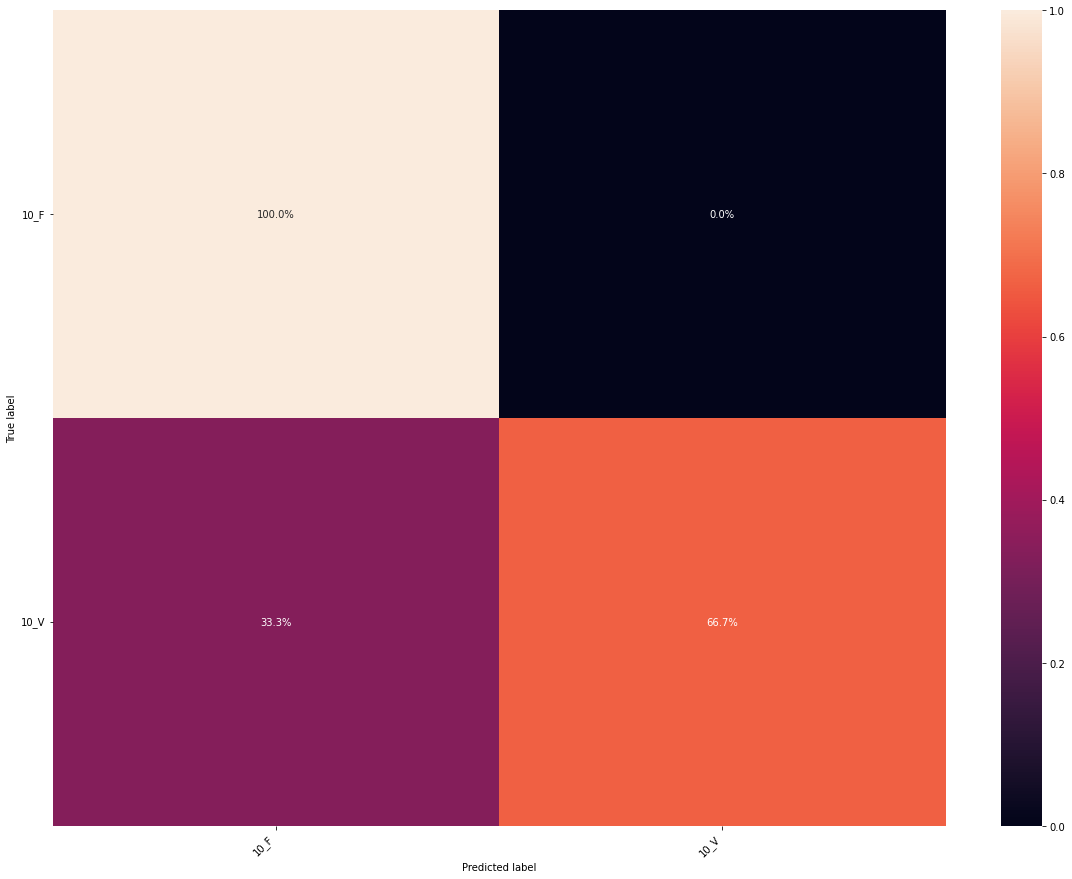


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 11
Score: 0.5

[0.4 0.6]
[0. 1.]


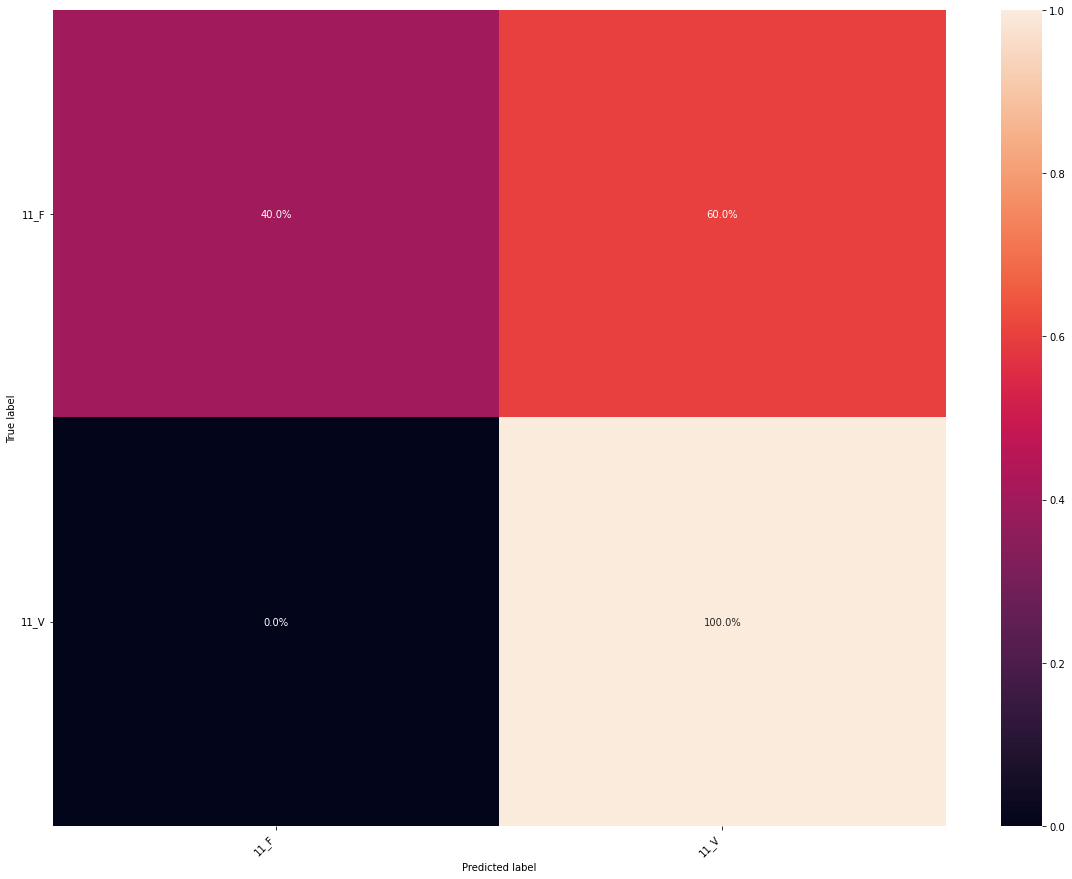


Cross_val_score
R²= 0.8333333333333333

###################################################################
Treinamento individuo 12
Score: 1.0

[1. 0.]
[0. 1.]


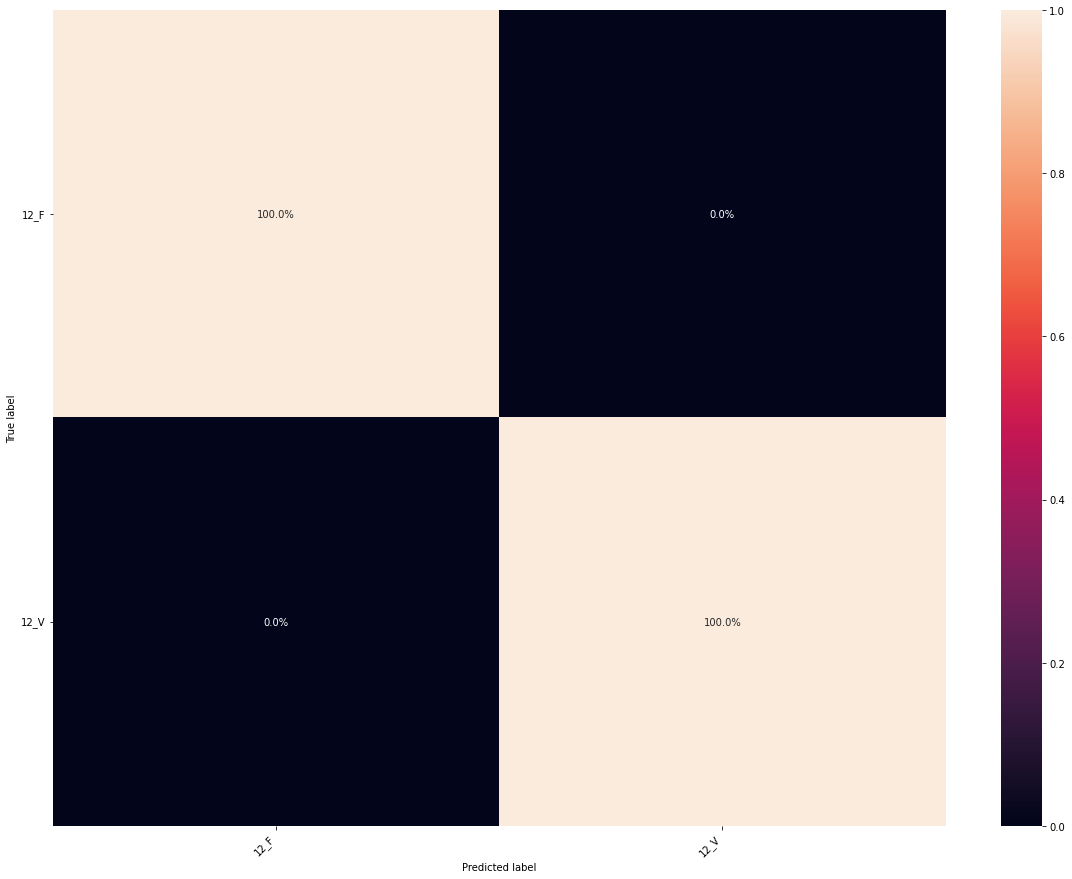


Cross_val_score
R²= 0.8333333333333333

###################################################################
Treinamento individuo 13
Score: 0.8333333333333334

[1. 0.]
[0.33333333 0.66666667]


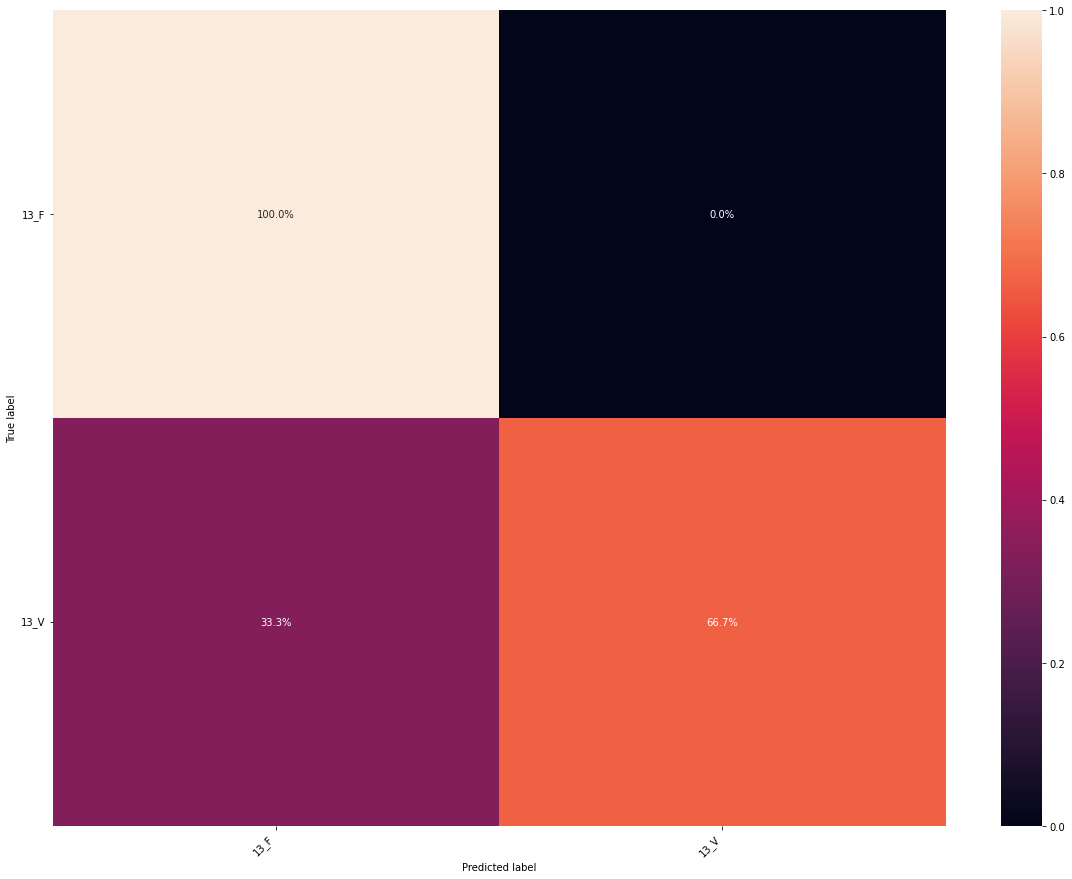


Cross_val_score
R²= 0.85

###################################################################
Treinamento individuo 14
Score: 0.8333333333333334

[0.8 0.2]
[0. 1.]


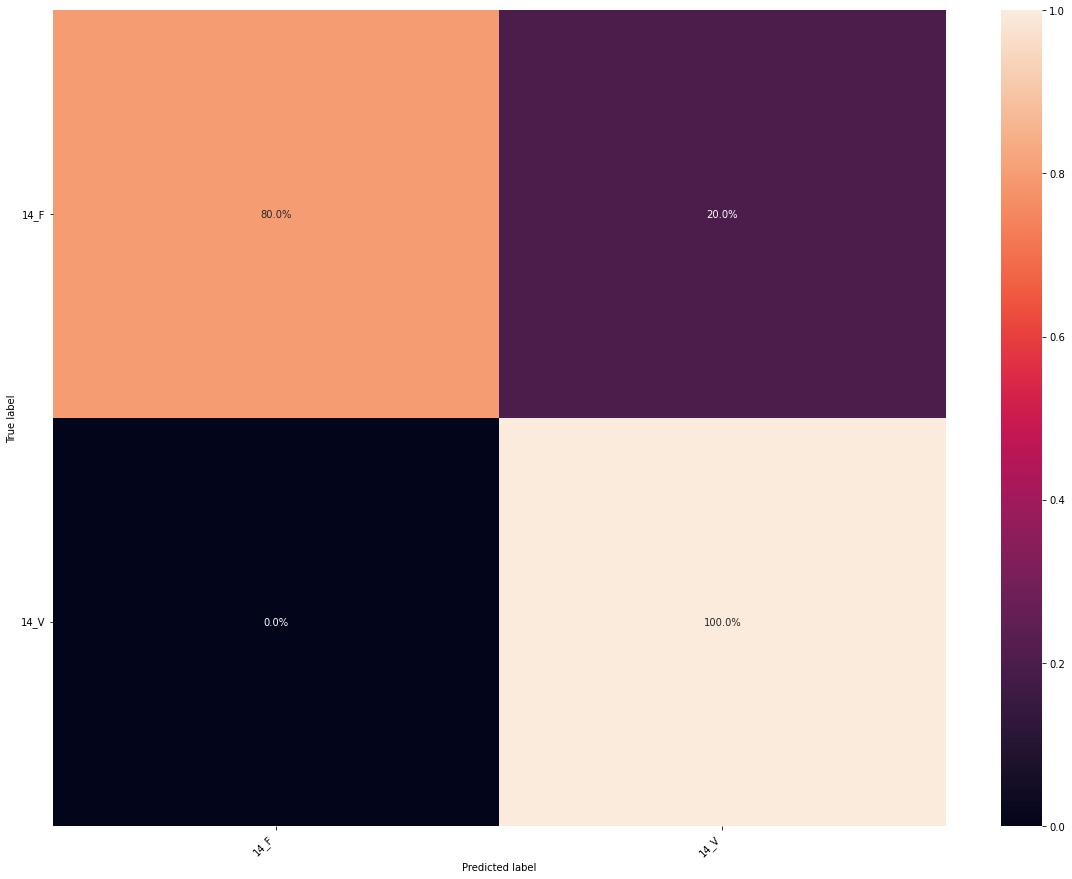


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 15
Score: 0.5

[1. 0.]
[0.75 0.25]


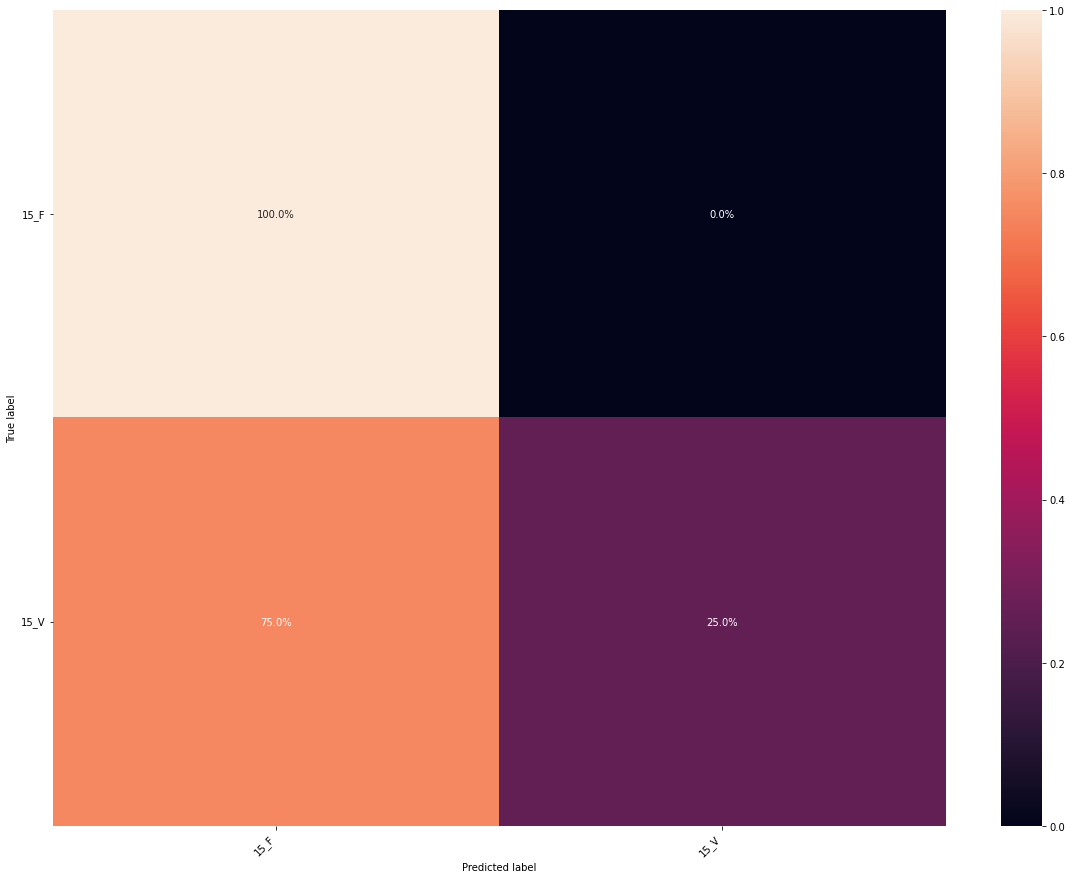


Cross_val_score
R²= 0.8666666666666666

###################################################################
Treinamento individuo 16
Score: 0.3333333333333333

[0. 1.]
[0. 1.]


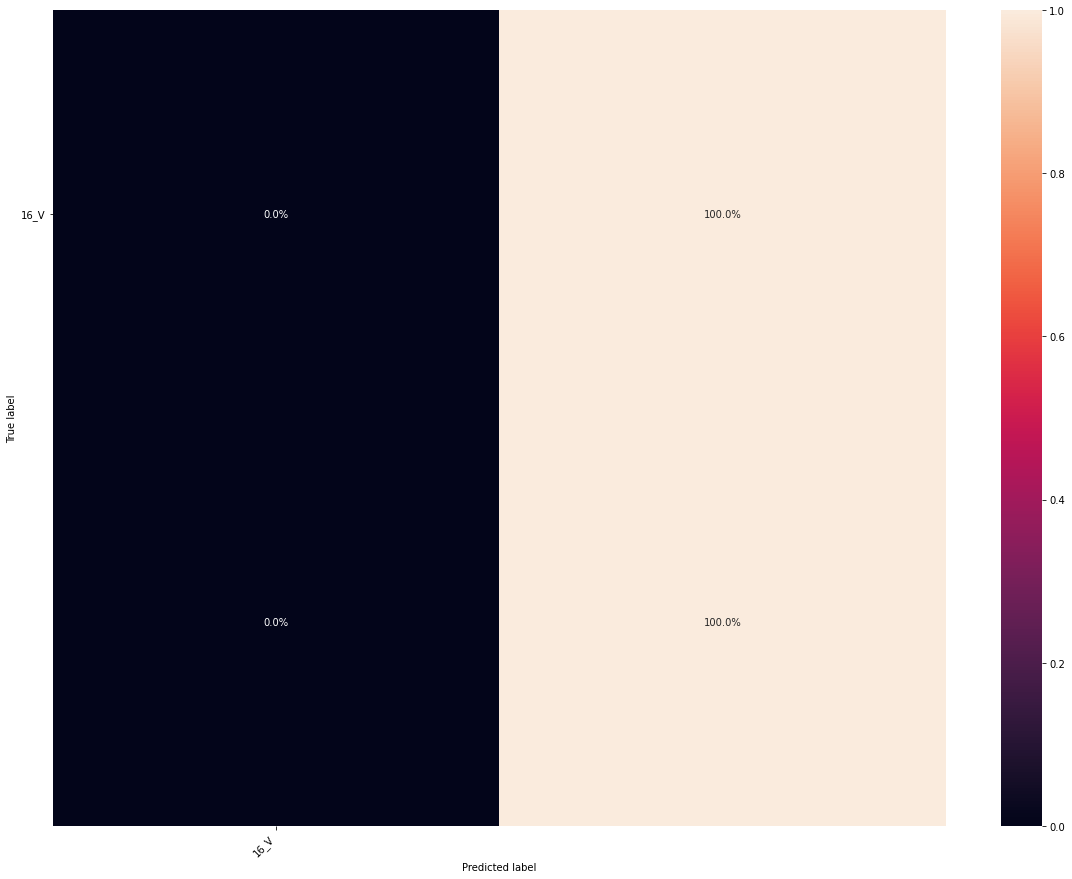


Cross_val_score
R²= 0.85

###################################################################
Treinamento individuo 17
Score: 0.8333333333333334

[1. 0.]
[0.5 0.5]


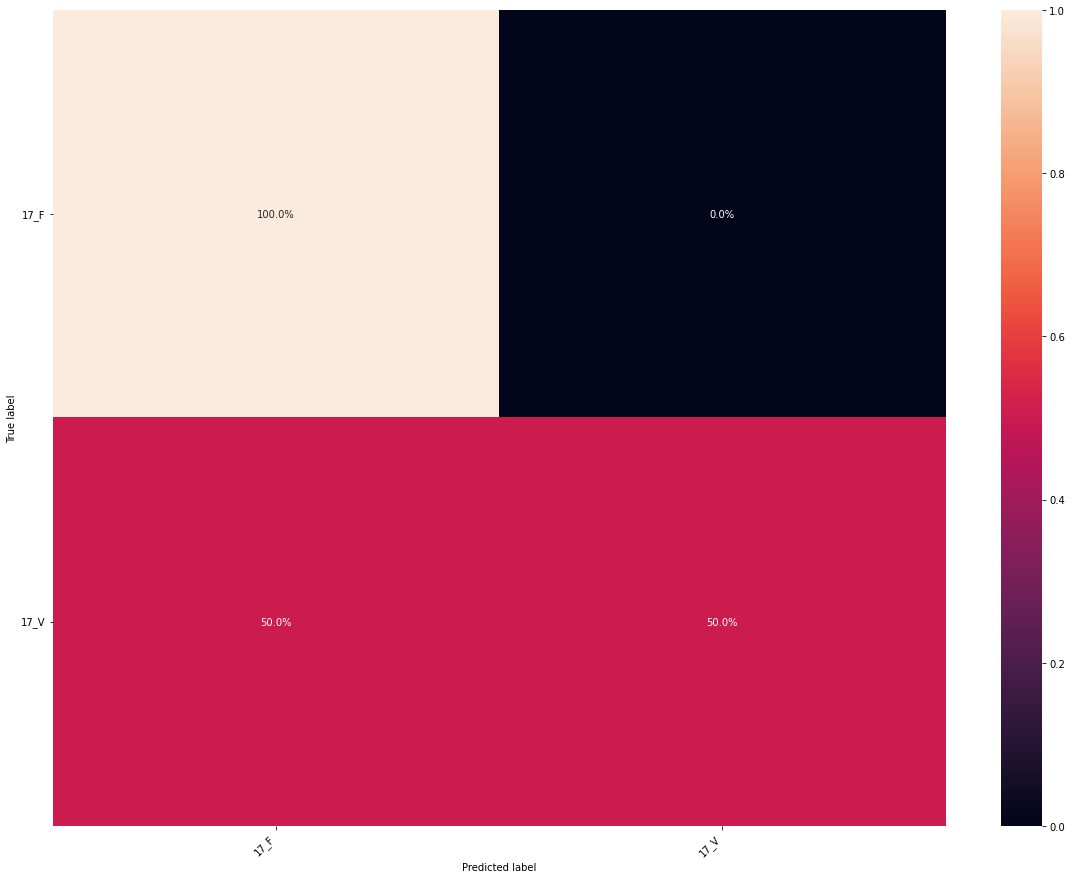


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 18
Score: 1.0

[1. 0.]
[0. 1.]


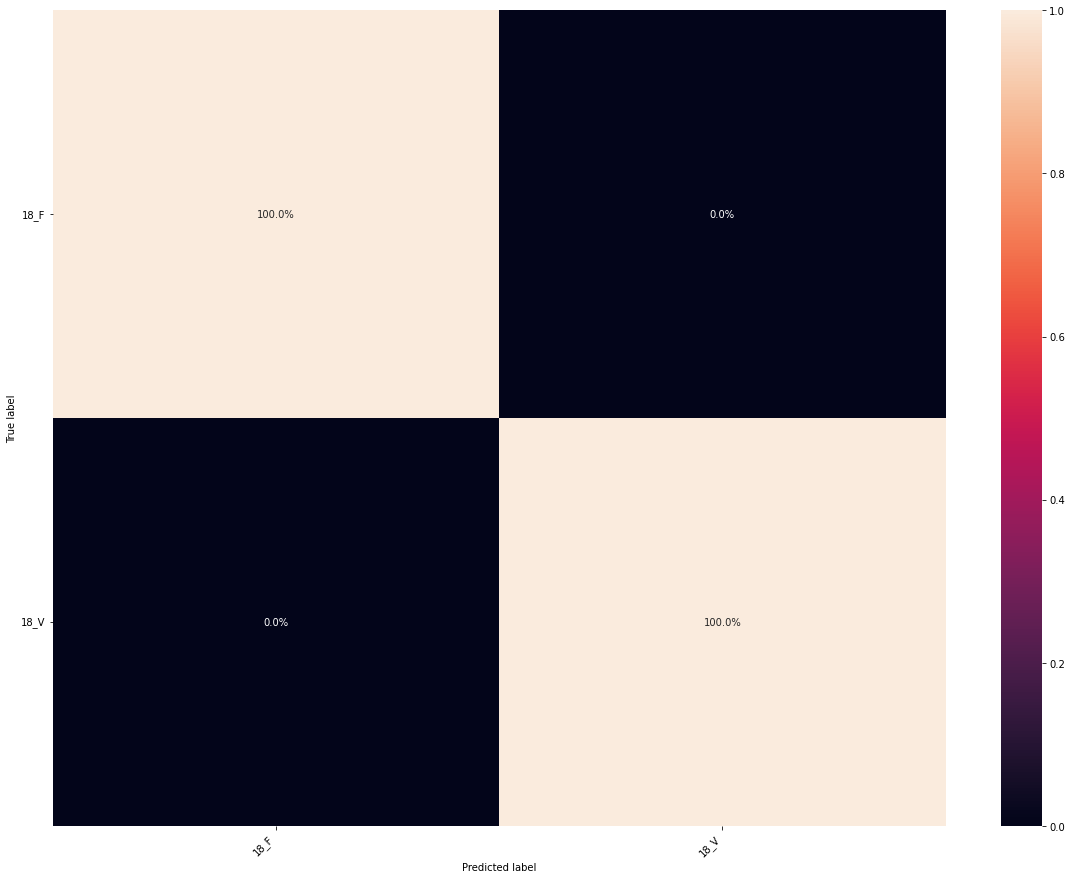


Cross_val_score
R²= 0.8333333333333333

###################################################################
Treinamento individuo 19
Score: 1.0

[1. 0.]
[0. 1.]


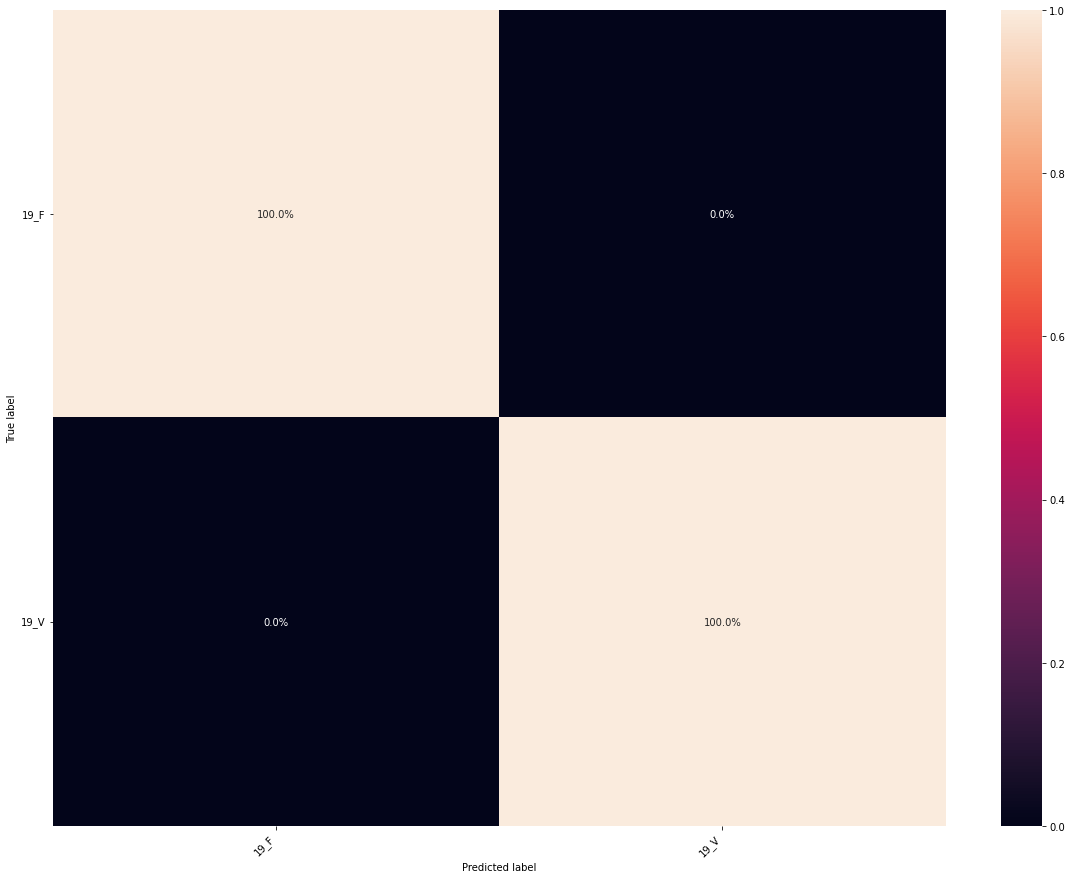


Cross_val_score
R²= 0.7833333333333333

###################################################################
Treinamento individuo 20
Score: 0.6666666666666666

[0. 1.]
[0. 1.]


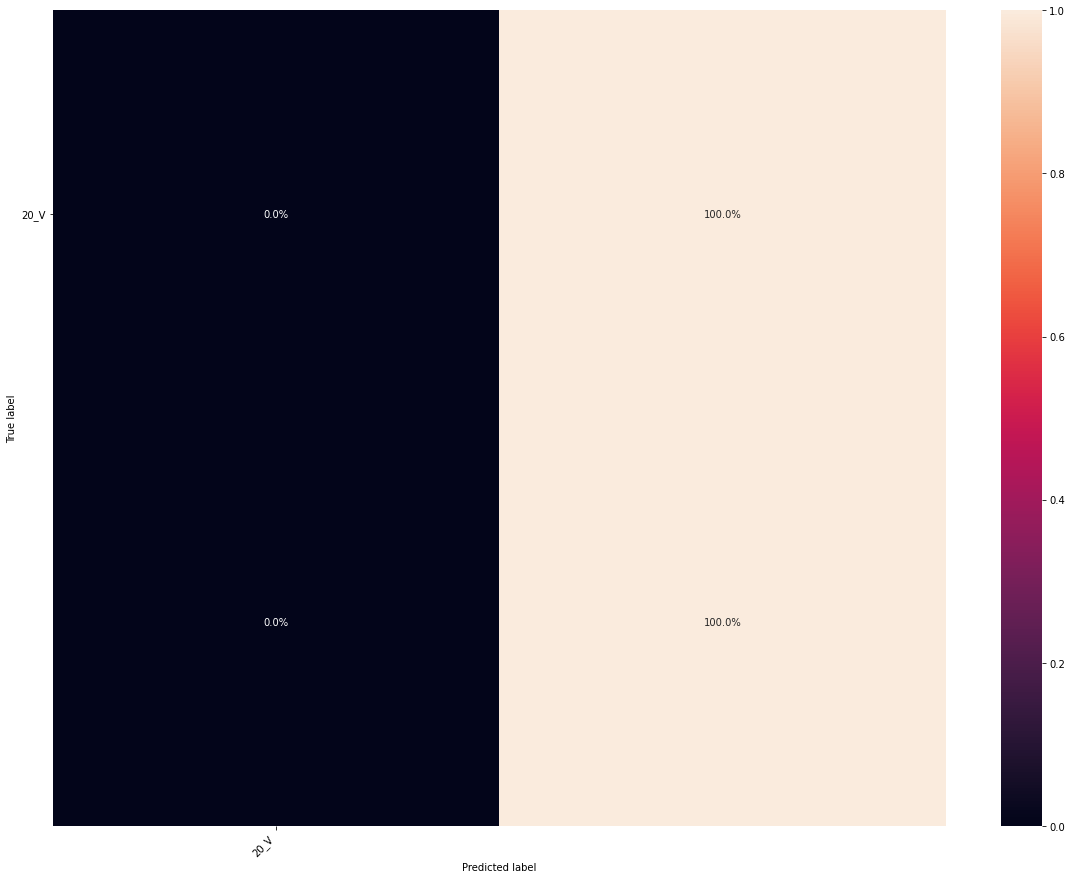


Cross_val_score
R²= 0.95

###################################################################
Treinamento individuo 21
Score: 1.0

[1. 0.]
[0. 1.]


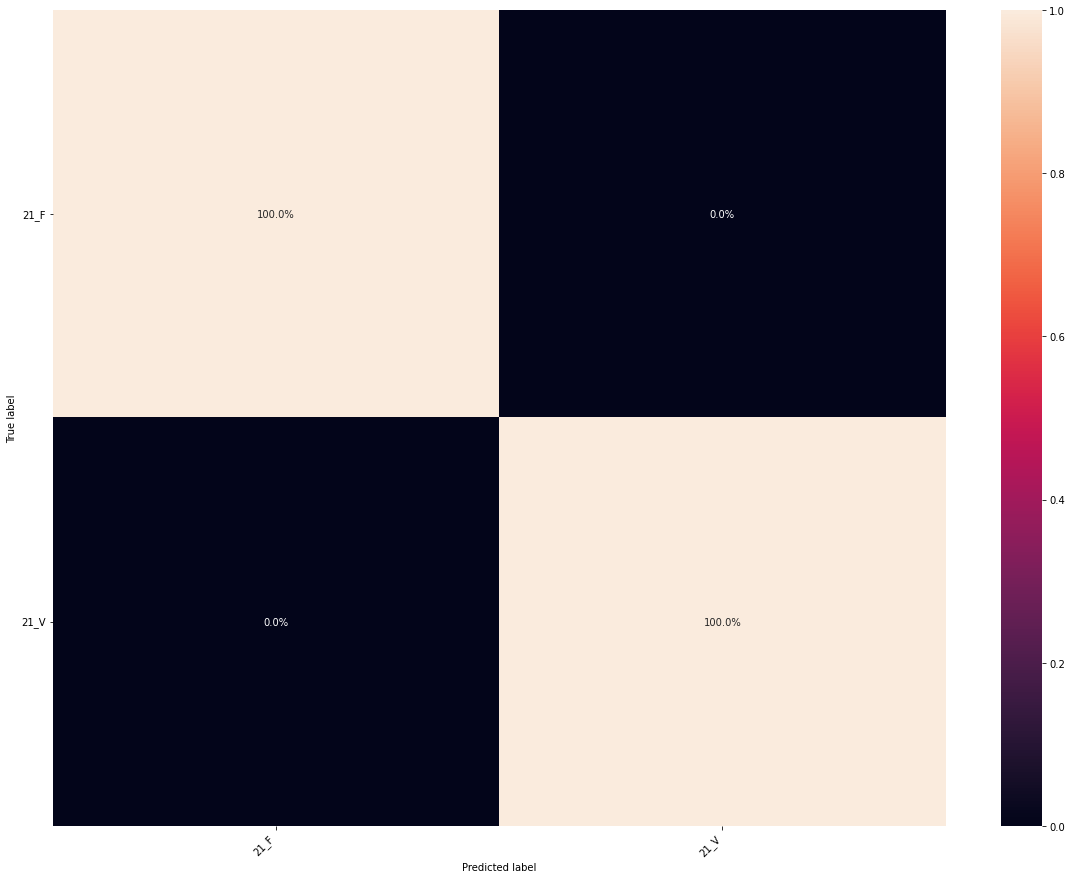


Cross_val_score
R²= 0.8666666666666666

###################################################################
Treinamento individuo 22
Score: 0.5

[0.75 0.25]
[1. 0.]


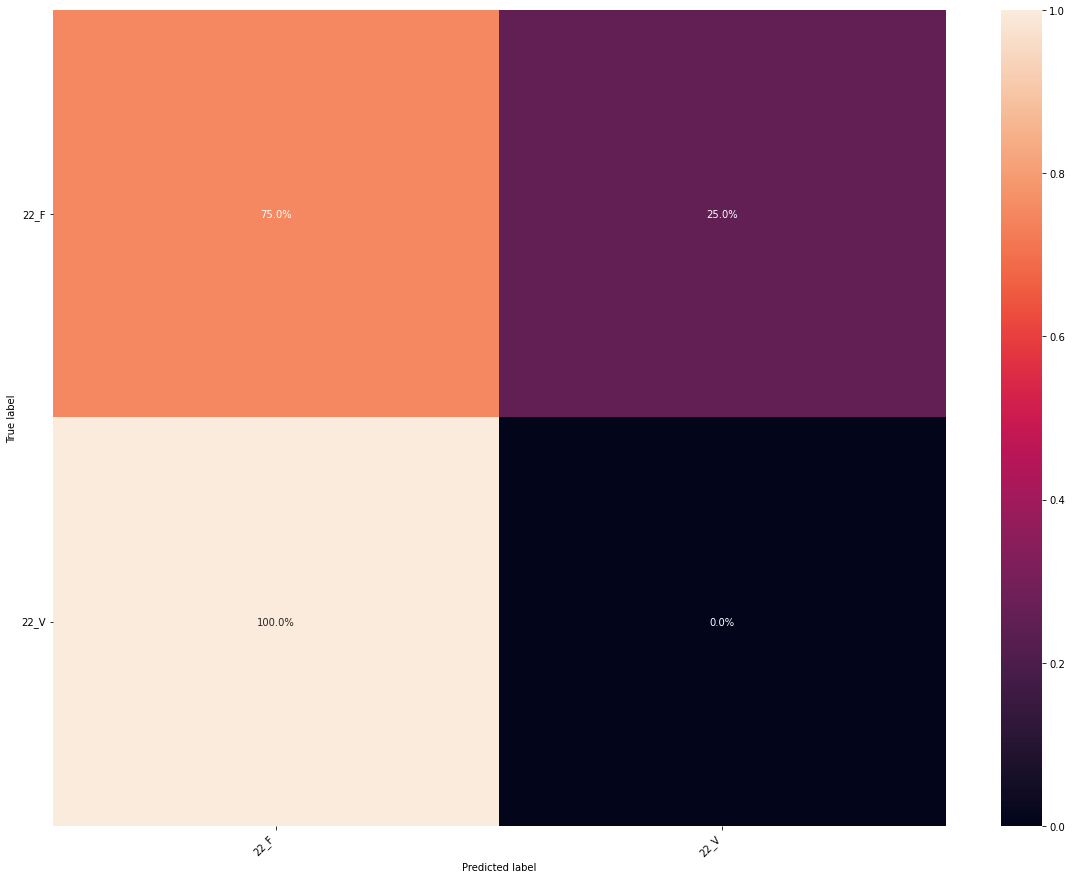


Cross_val_score
R²= 0.7666666666666666

###################################################################
Treinamento individuo 23
Score: 0.3333333333333333

[1. 0.]
[1. 0.]


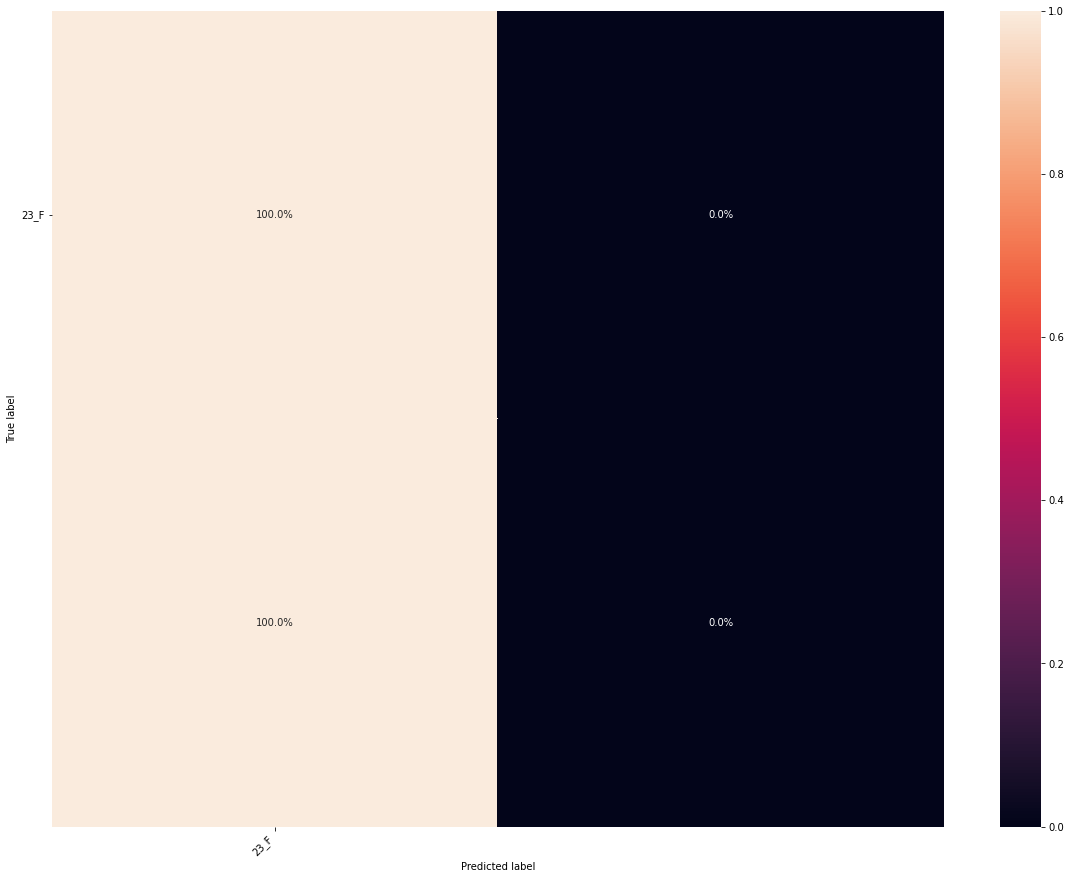


Cross_val_score
R²= 0.8166666666666667

###################################################################
Treinamento individuo 24
Score: 0.8333333333333334

[1. 0.]
[0.25 0.75]


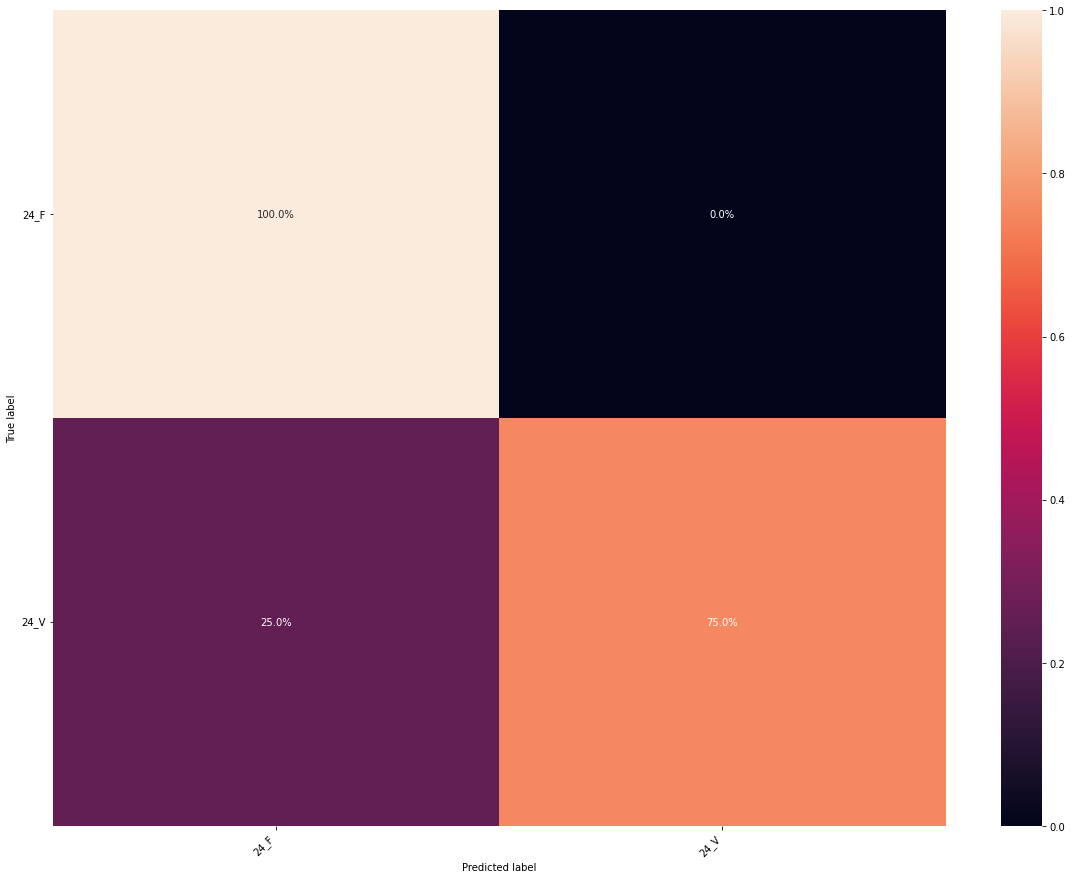


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 25
Score: 0.8333333333333334

[0. 1.]
[0. 1.]


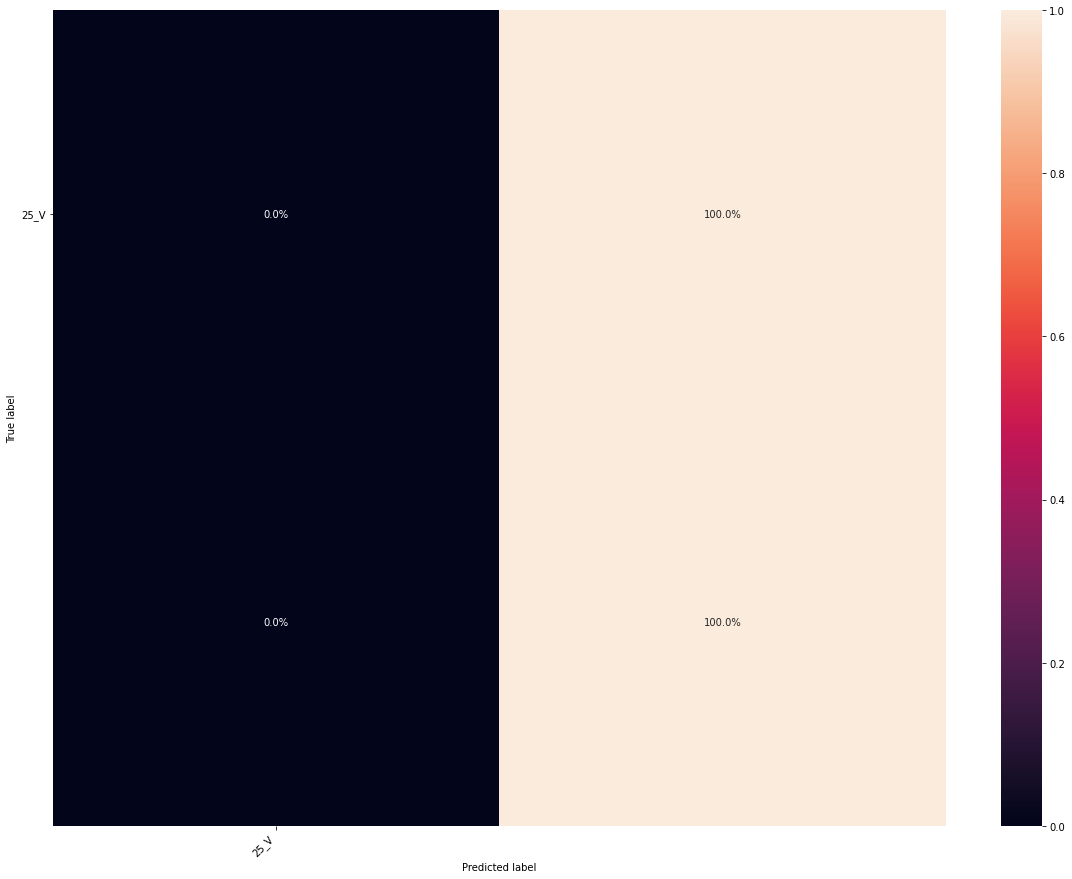


Cross_val_score
R²= 0.95

###################################################################
Treinamento individuo 26
Score: 0.5

[1. 0.]
[1. 0.]


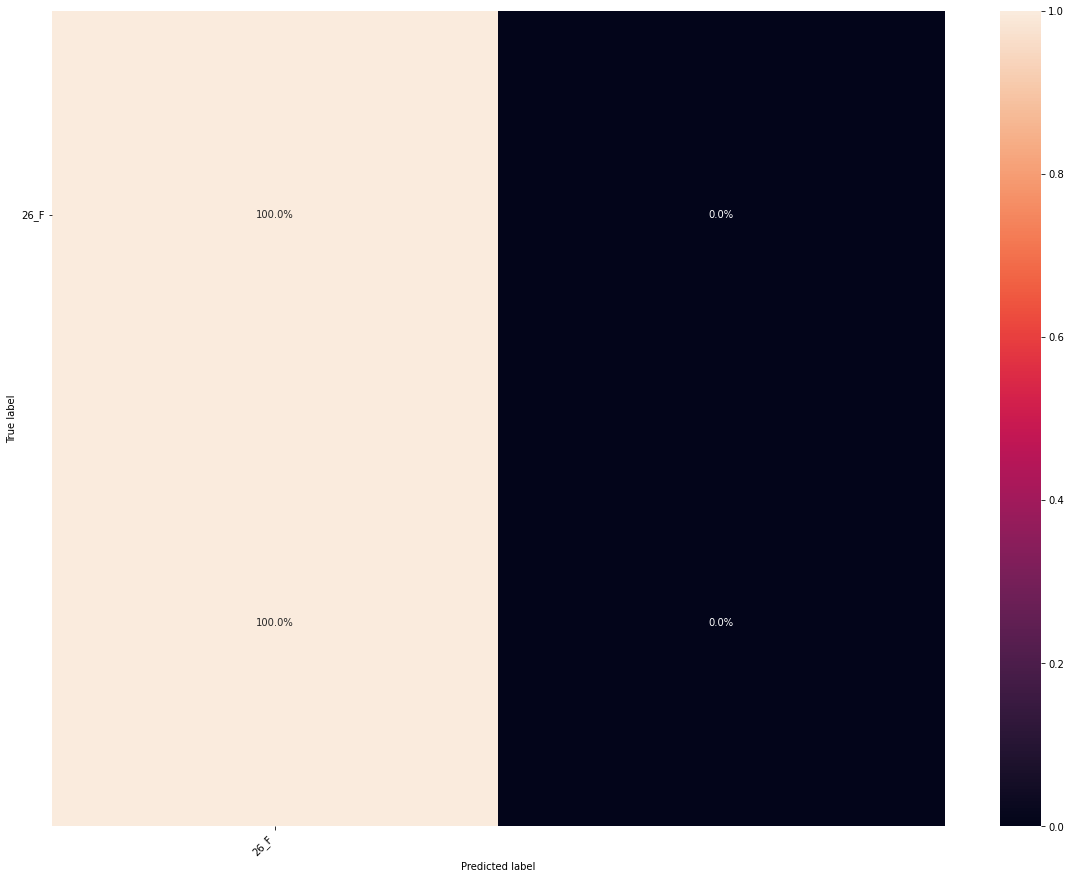


Cross_val_score
R²= 0.8666666666666666

###################################################################
Treinamento individuo 27
Score: 0.8333333333333334

[1. 0.]
[0.33333333 0.66666667]


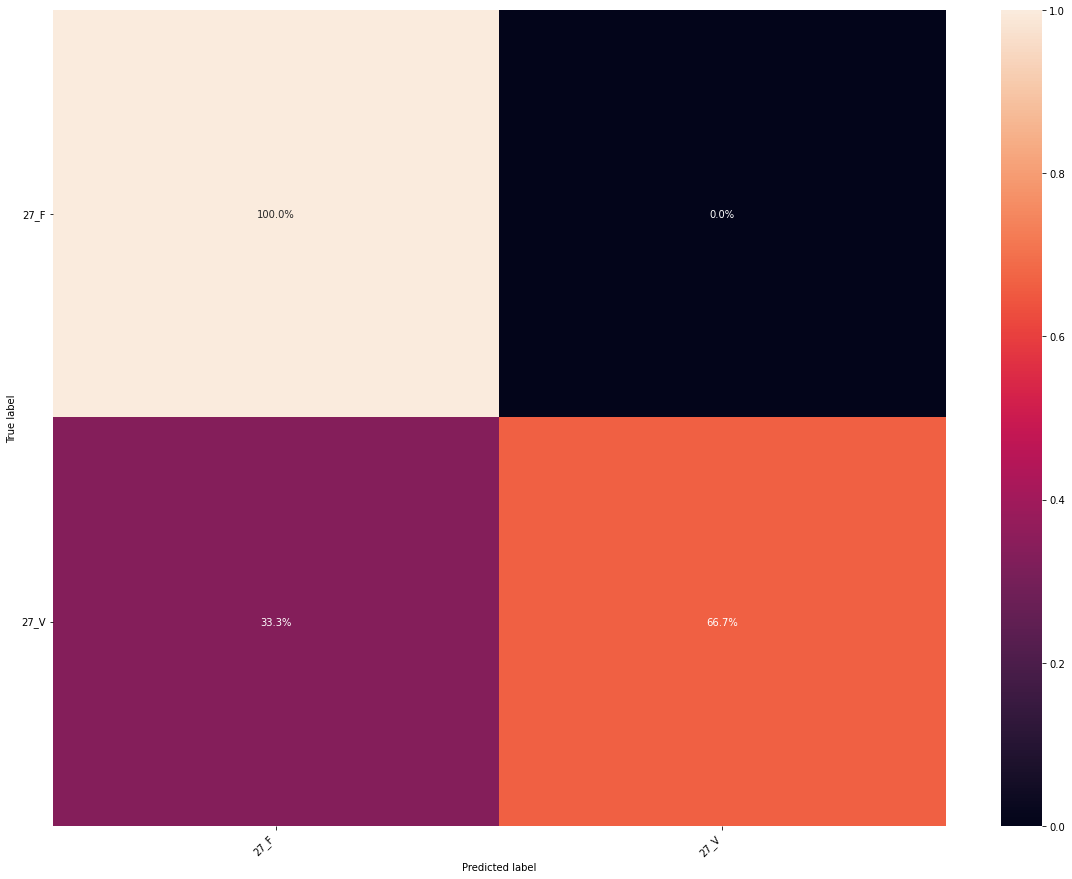


Cross_val_score
R²= 0.8833333333333332

###################################################################
Treinamento individuo 28
Score: 0.8333333333333334

[1. 0.]
[0.25 0.75]


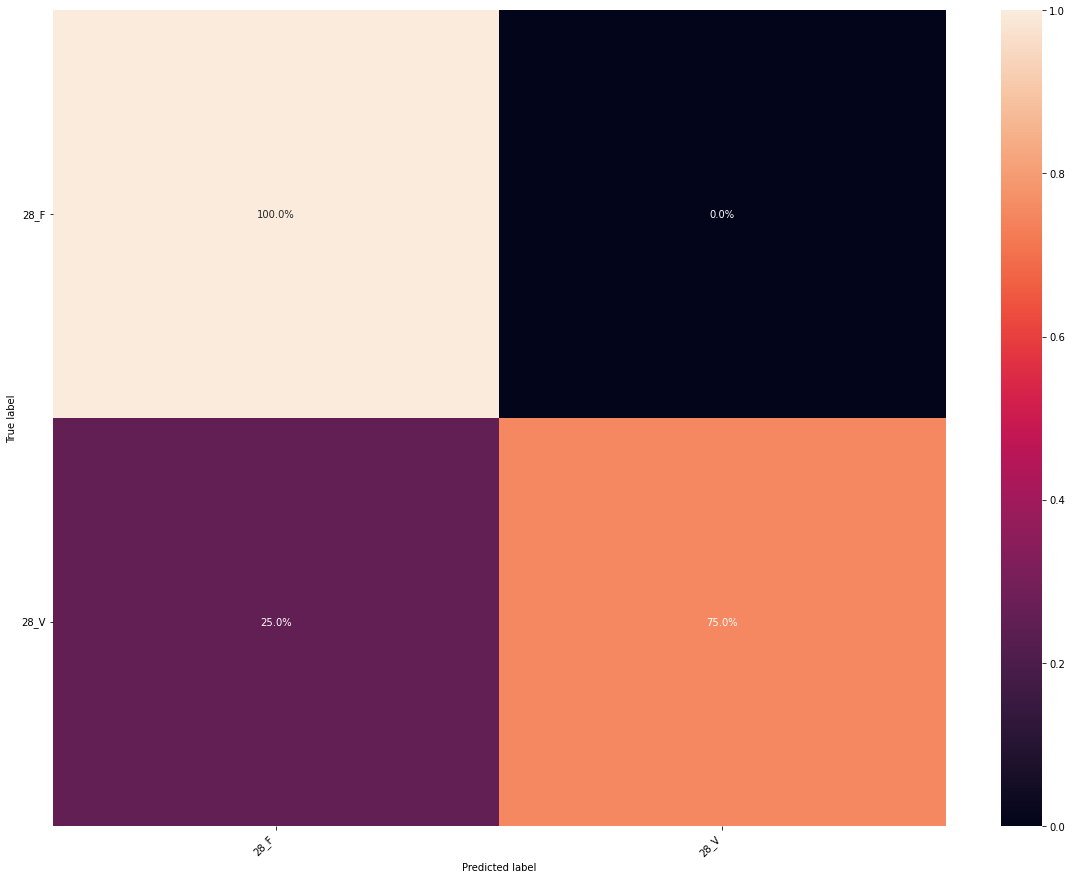


Cross_val_score
R²= 0.8333333333333333

###################################################################
Treinamento individuo 29
Score: 0.5

[0. 1.]
[0. 1.]


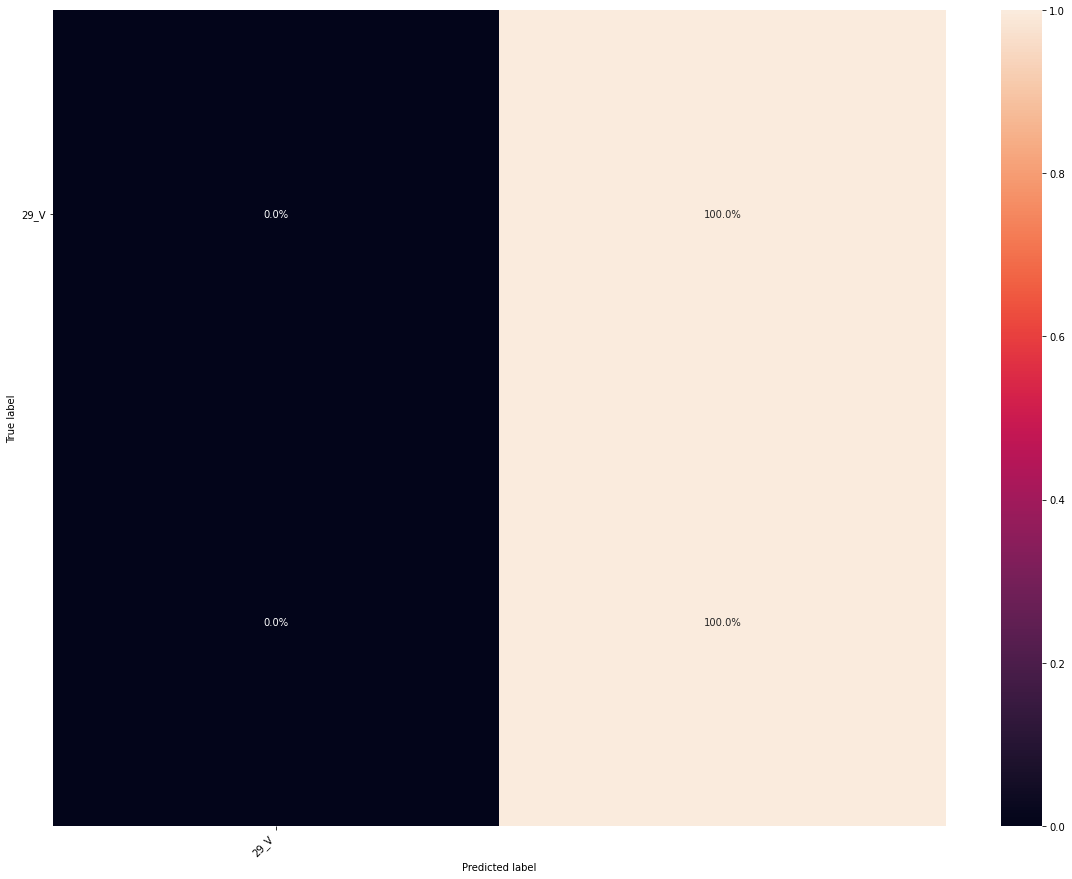


Cross_val_score
R²= 0.8333333333333333

###################################################################
Treinamento individuo 30
Score: 1.0

[1. 0.]
[0. 1.]


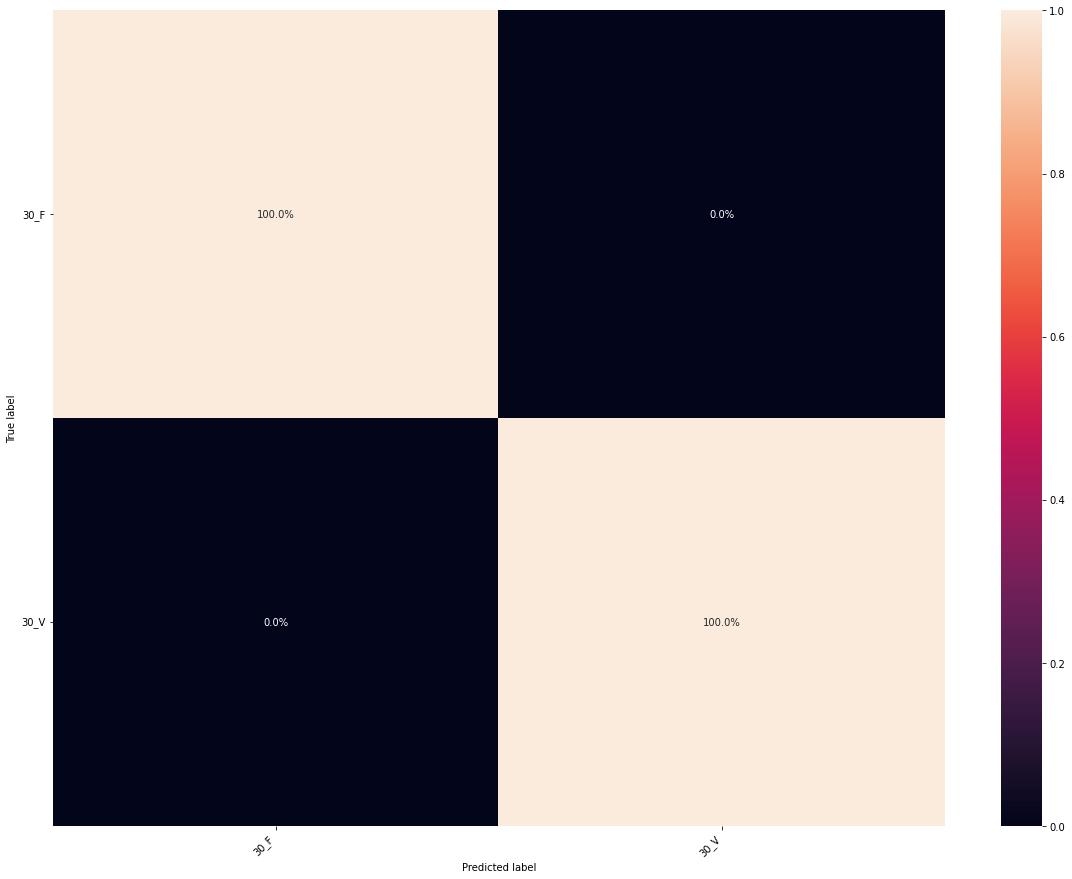


Cross_val_score
R²= 0.8166666666666667

###################################################################
Treinamento individuo 31
Score: 1.0

[1. 0.]
[0. 1.]


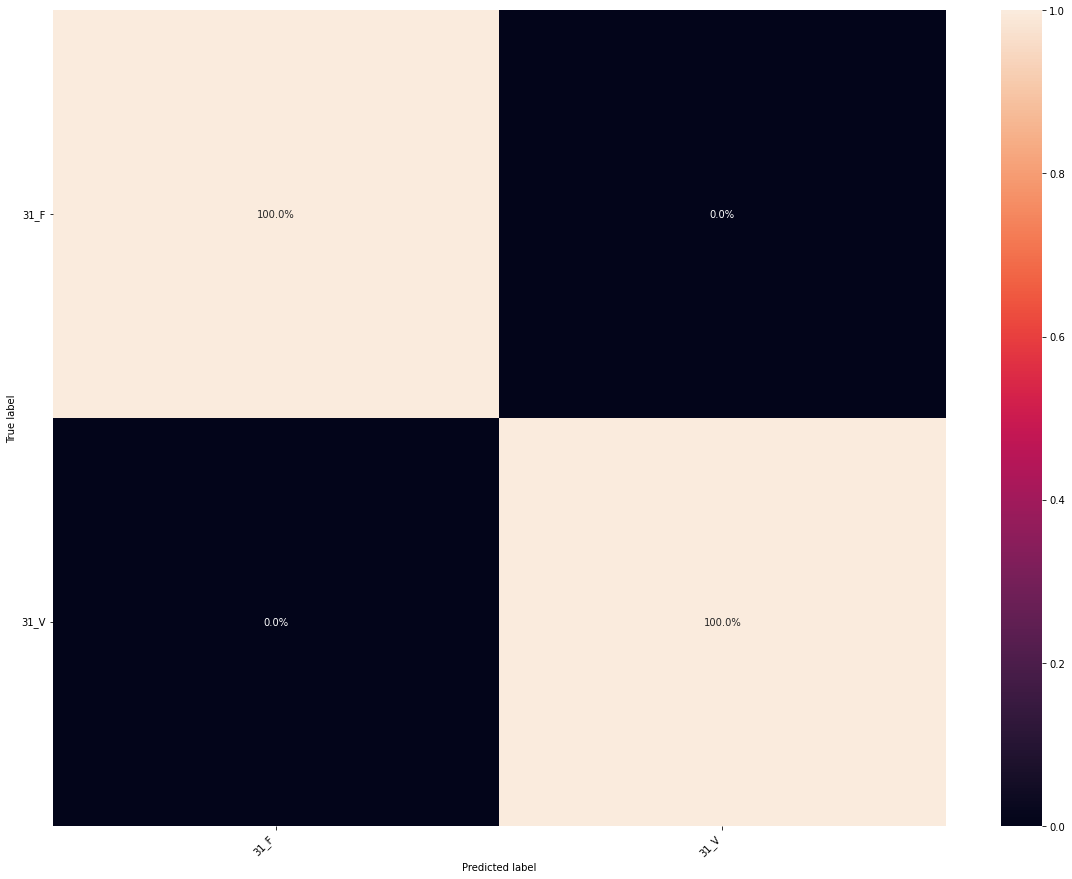


Cross_val_score
R²= 0.7833333333333333

###################################################################
Treinamento individuo 32
Score: 0.3333333333333333

[0. 1.]
[0. 1.]


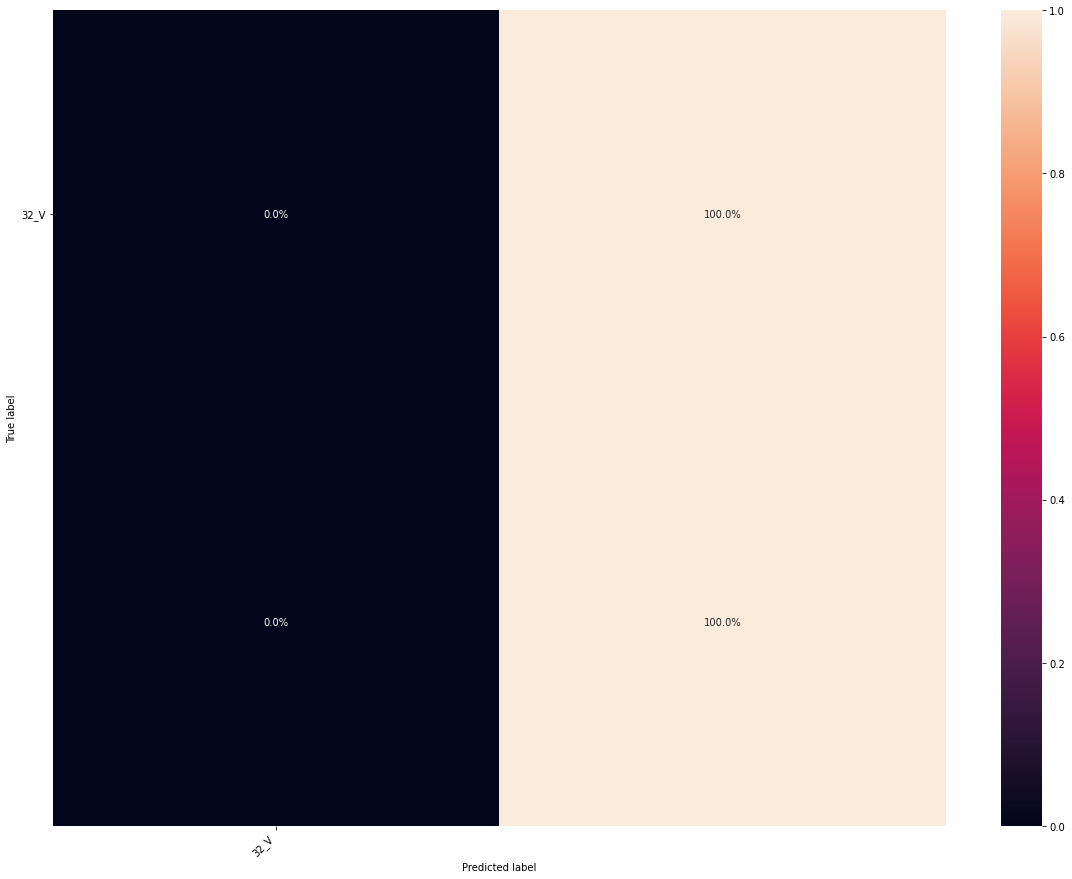


Cross_val_score
R²= 0.8333333333333333

###################################################################
Treinamento individuo 33
Score: 0.6666666666666666

[0.33333333 0.66666667]
[0. 1.]


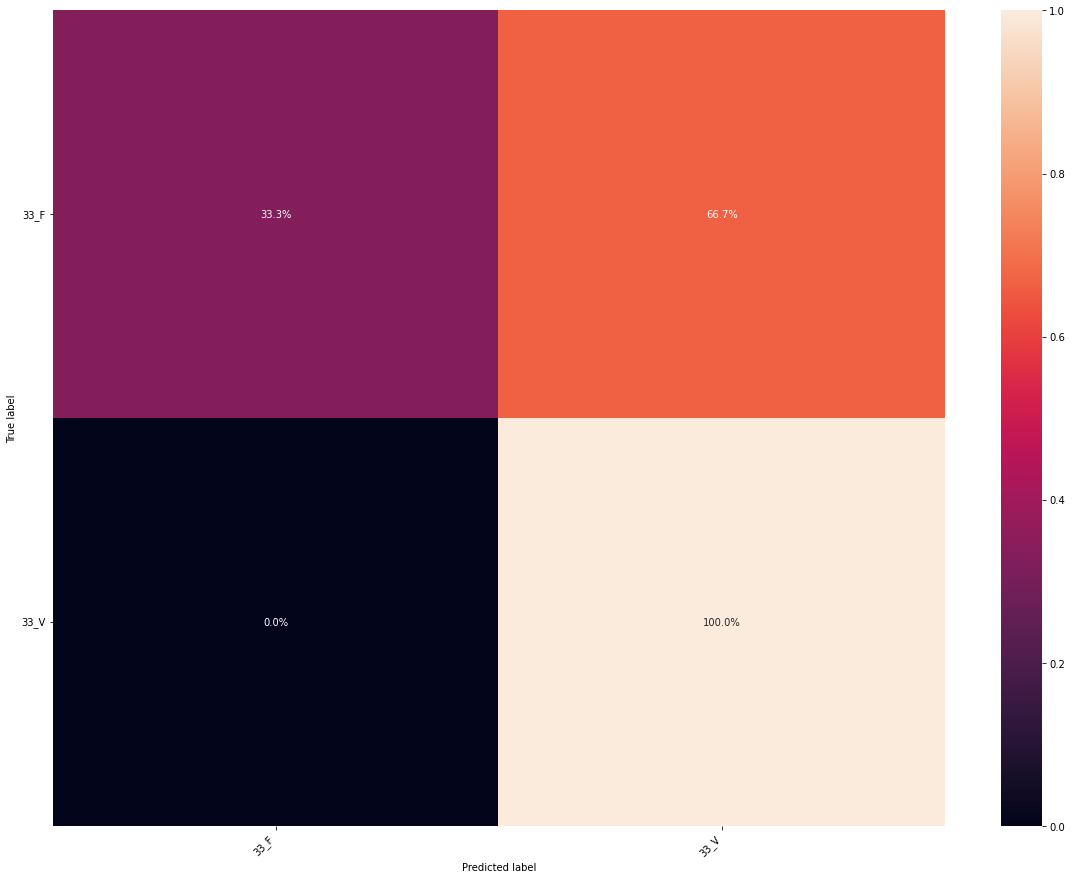


Cross_val_score
R²= 0.8666666666666666

###################################################################
Treinamento individuo 34
Score: 0.8333333333333334

[0.75 0.25]
[0. 1.]


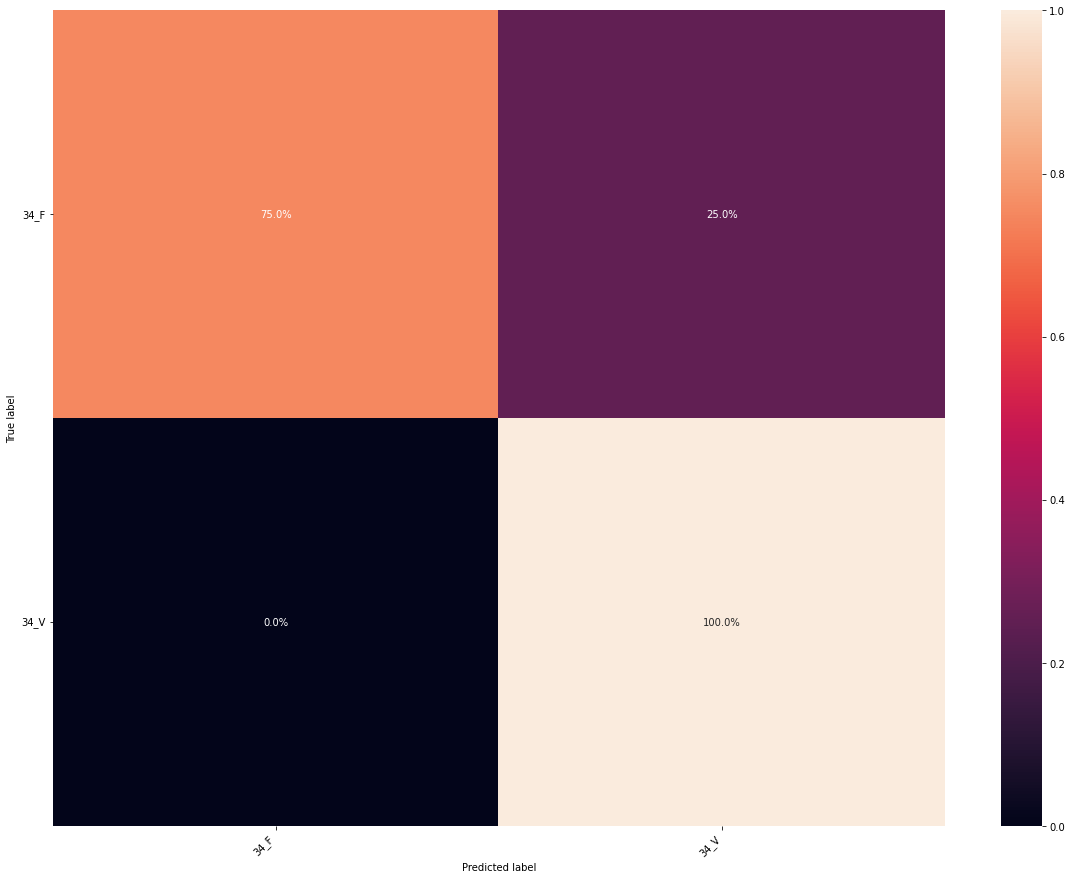


Cross_val_score
R²= 0.8

###################################################################
Treinamento individuo 35
Score: 0.8333333333333334

[1. 0.]
[0.33333333 0.66666667]


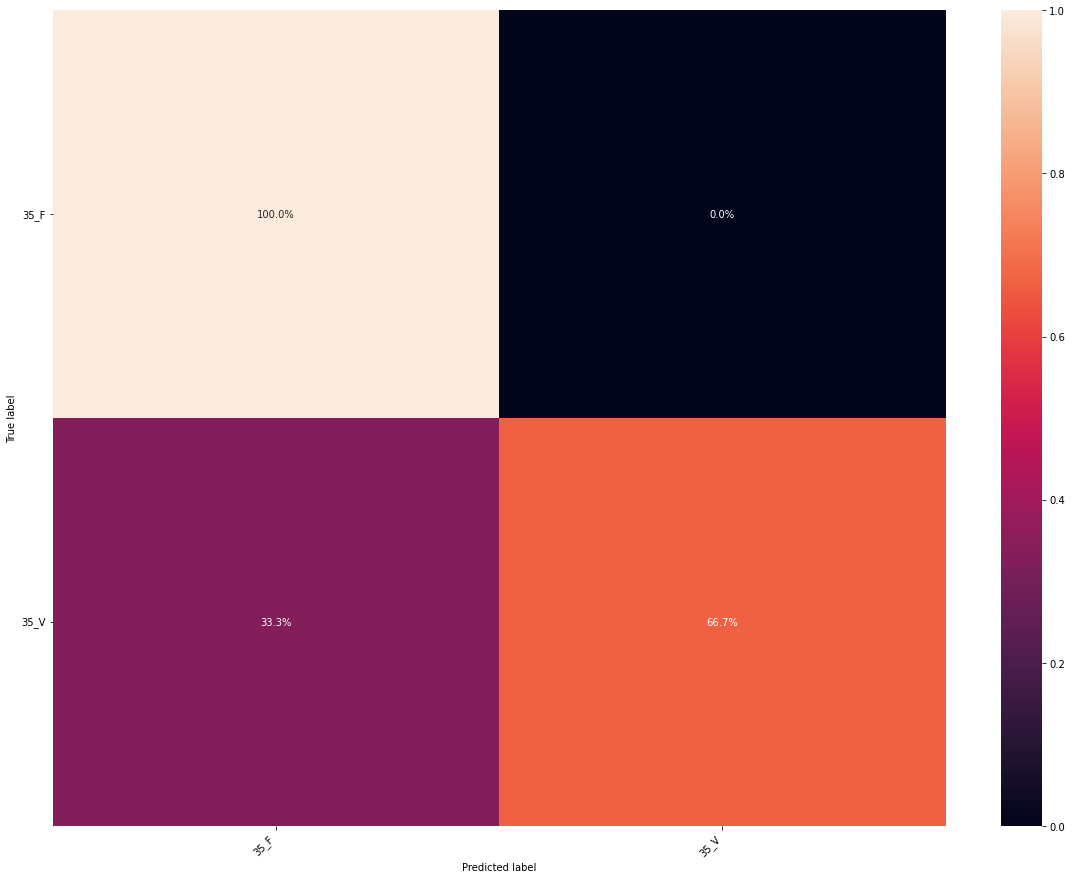


Cross_val_score
R²= 0.9

###################################################################
Treinamento individuo 36
Score: 1.0

[1. 0.]
[0. 1.]


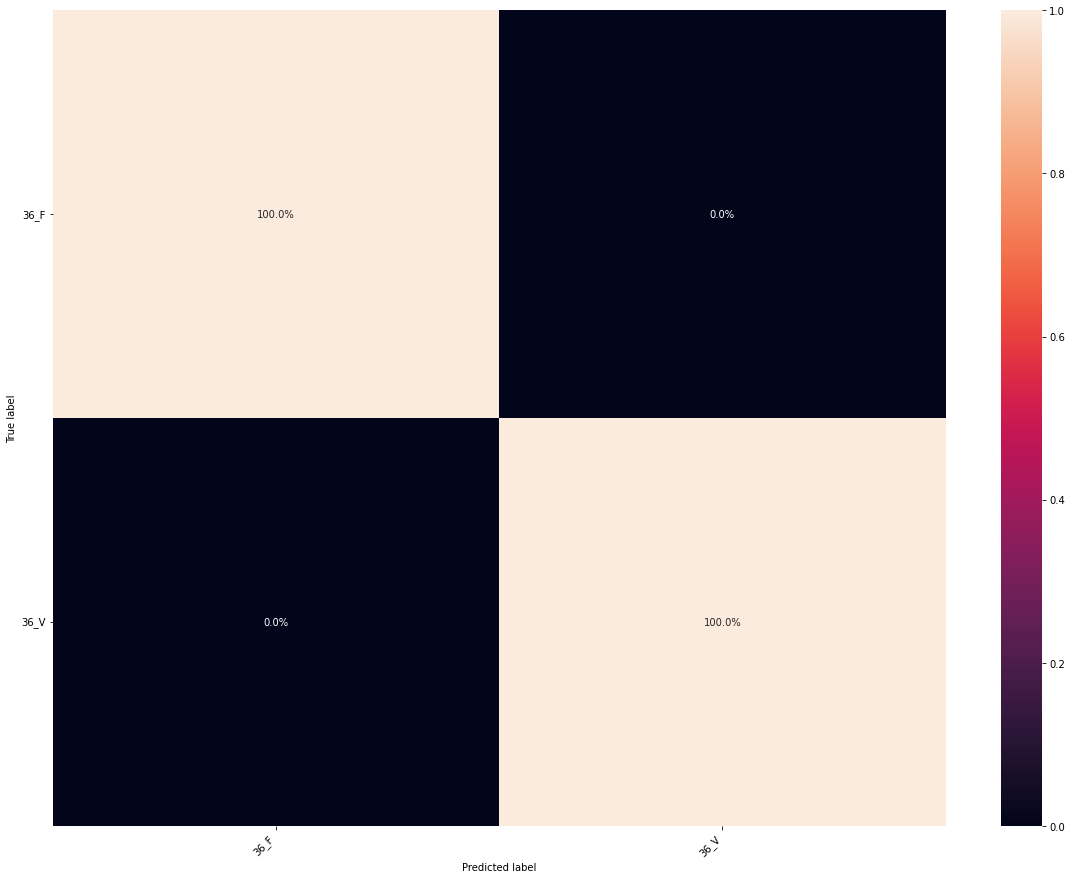


Cross_val_score
R²= 0.8666666666666666

###################################################################
Treinamento individuo 37
Score: 0.3333333333333333

[1. 0.]
[1. 0.]


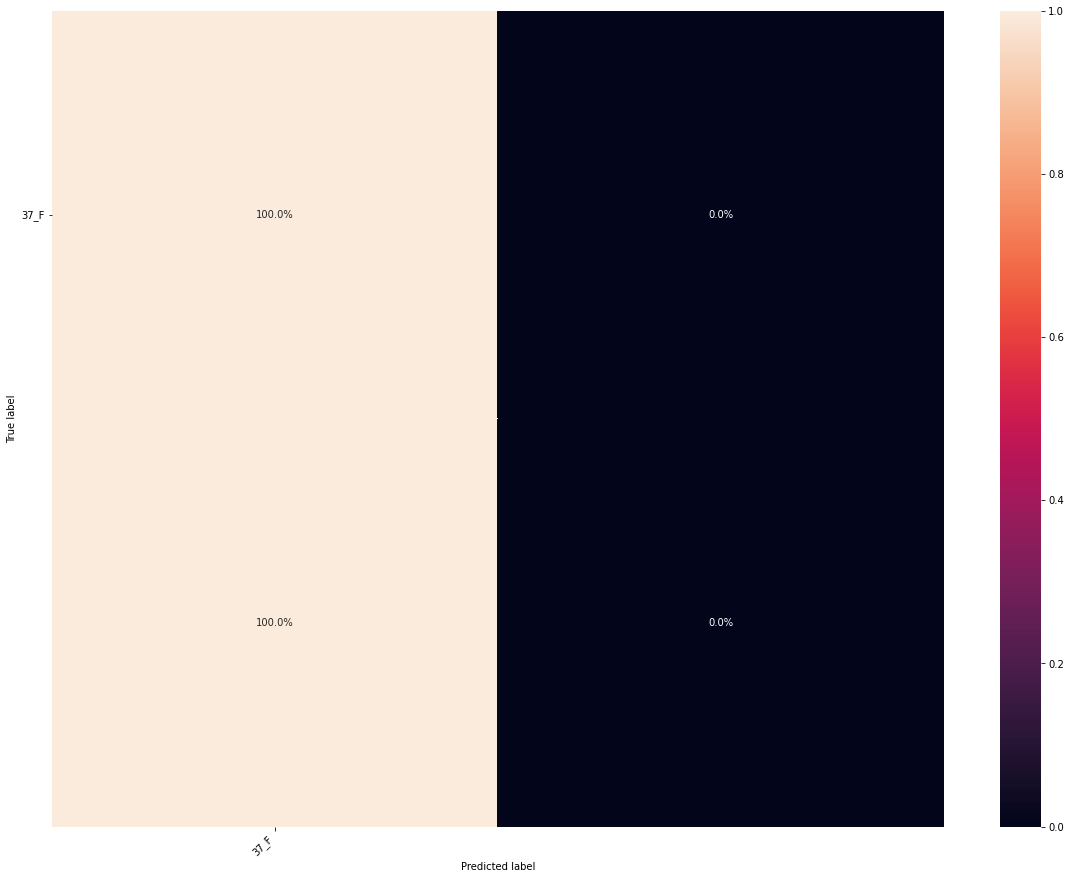


Cross_val_score
R²= 0.7833333333333333

###################################################################
Treinamento individuo 38
Score: 1.0

[1. 0.]
[0. 1.]


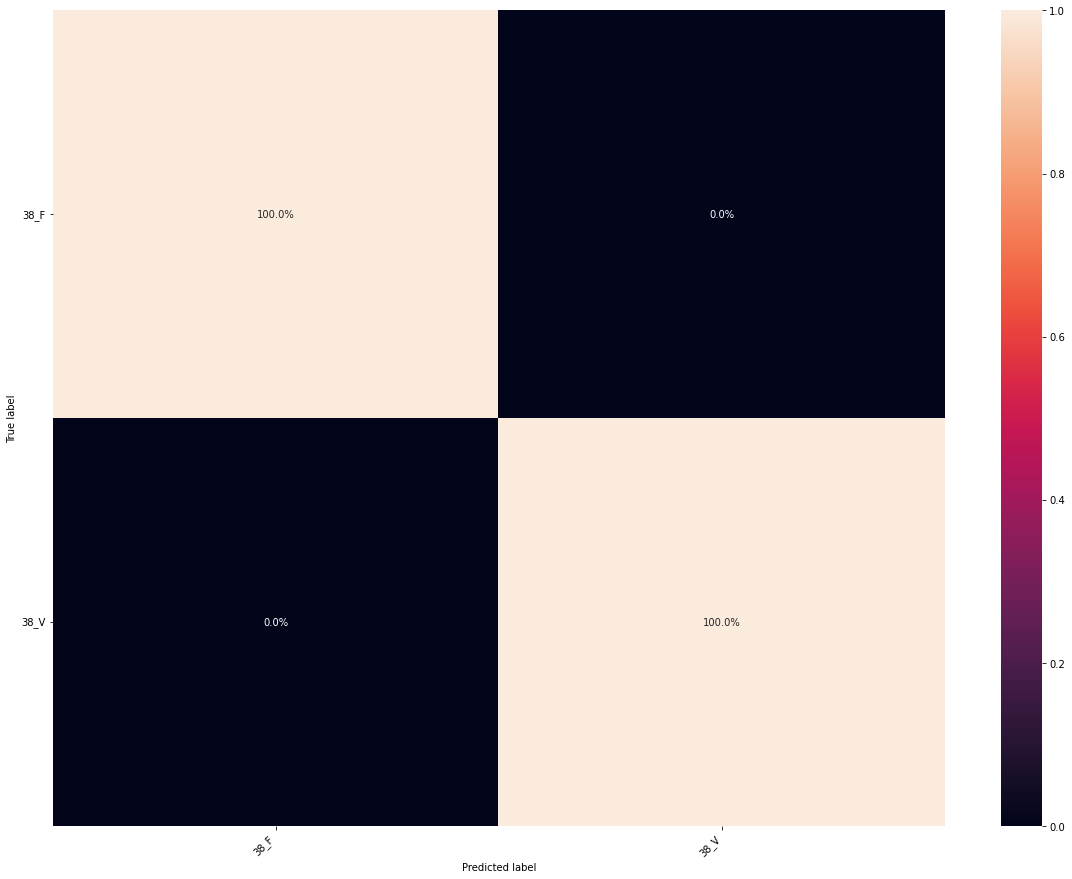


Cross_val_score
R²= 0.8333333333333333

###################################################################
Treinamento individuo 39
Score: 1.0

[1. 0.]
[0. 1.]


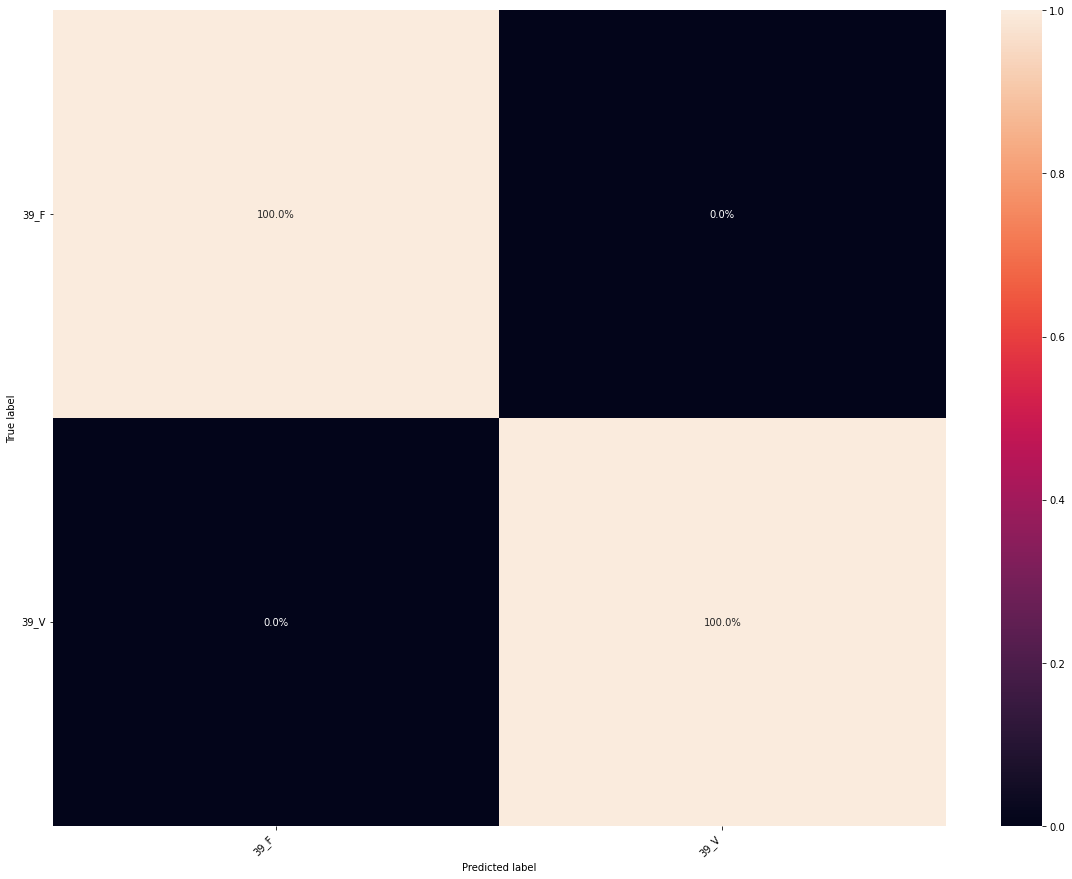


Cross_val_score
R²= 0.7333333333333333

###################################################################
Treinamento individuo 40
Score: 0.6666666666666666

[1. 0.]
[0.5 0.5]


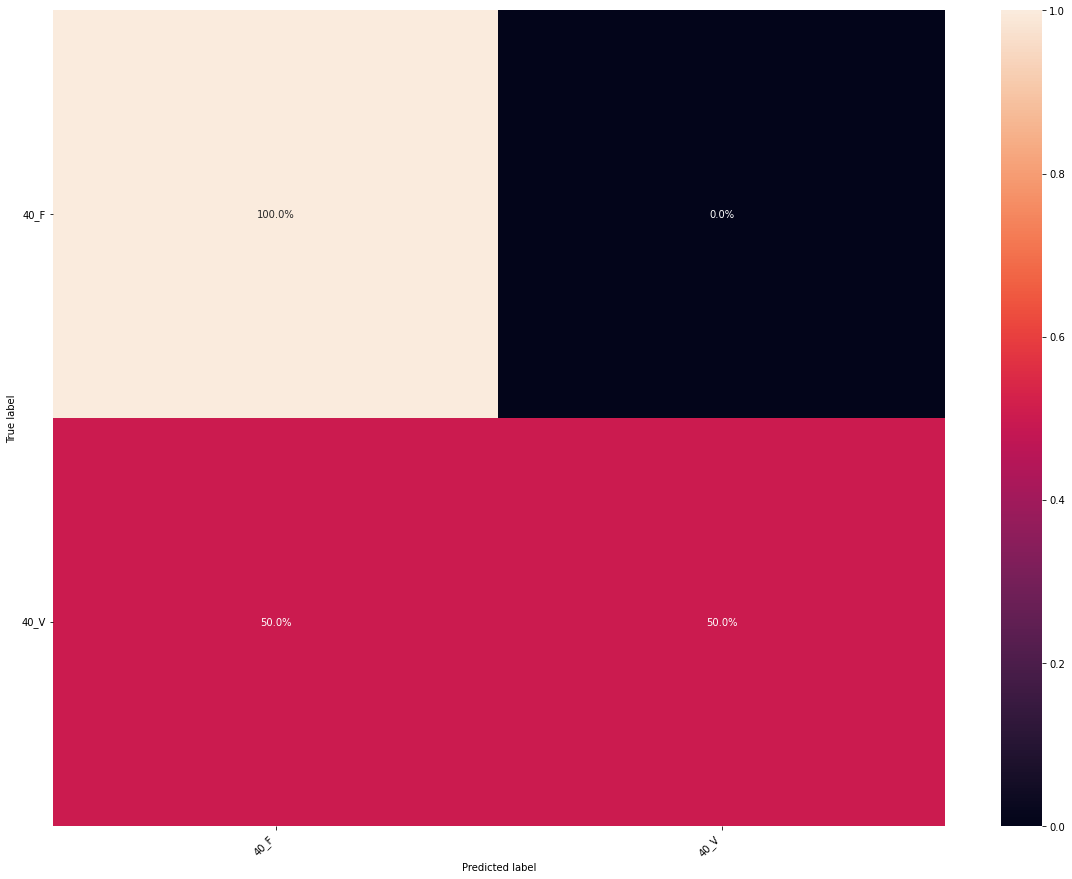


Cross_val_score
R²= 0.8833333333333332

###################################################################
Treinamento individuo 41
Score: 1.0

[1. 0.]
[0. 1.]


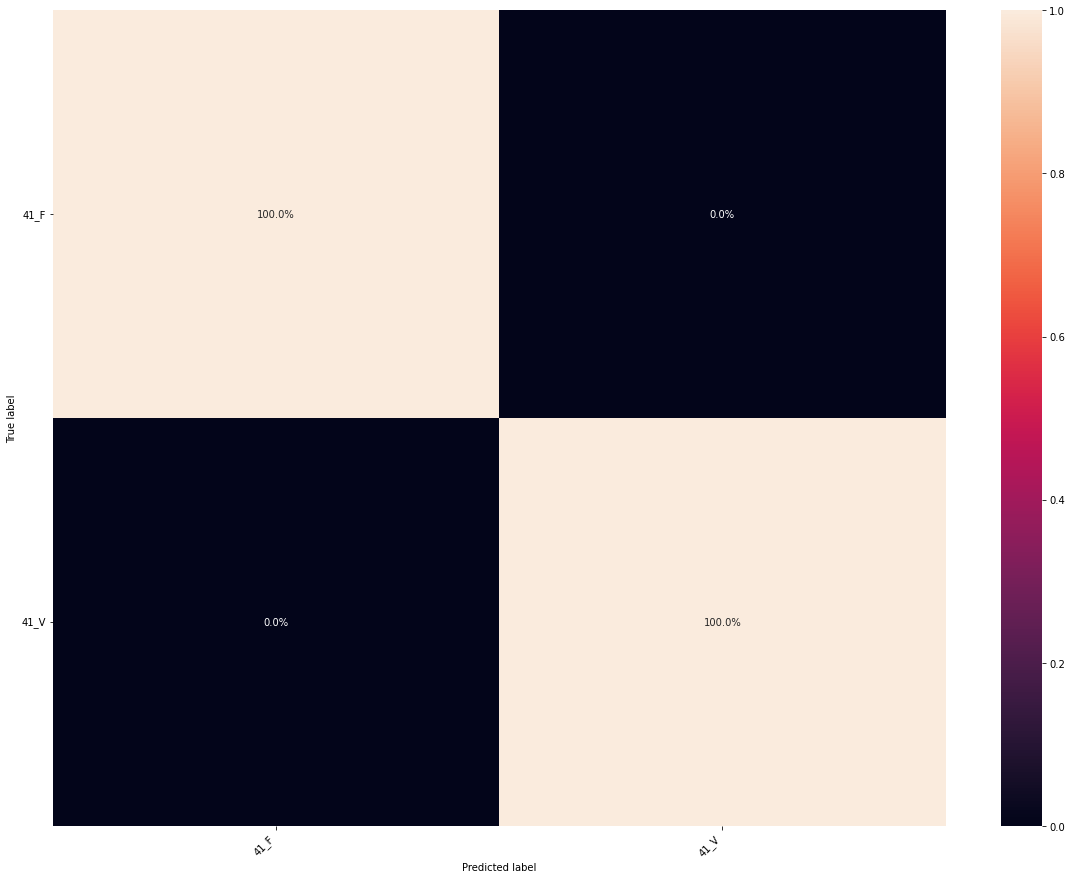


Cross_val_score
R²= 0.75

###################################################################
Treinamento individuo 42
Score: 0.6666666666666666

[1. 0.]
[0.4 0.6]


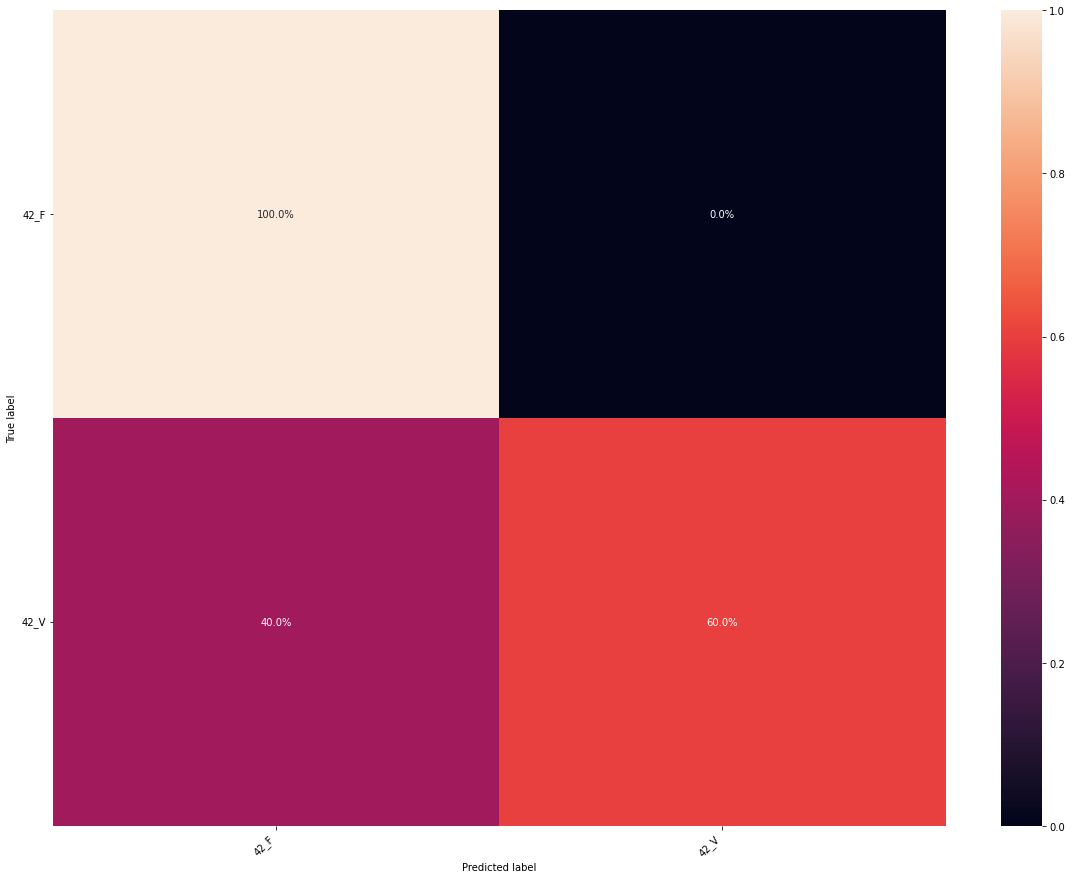


Cross_val_score
R²= 0.8666666666666666

###################################################################
Treinamento individuo 43
Score: 0.8333333333333334

[1. 0.]
[0.33333333 0.66666667]


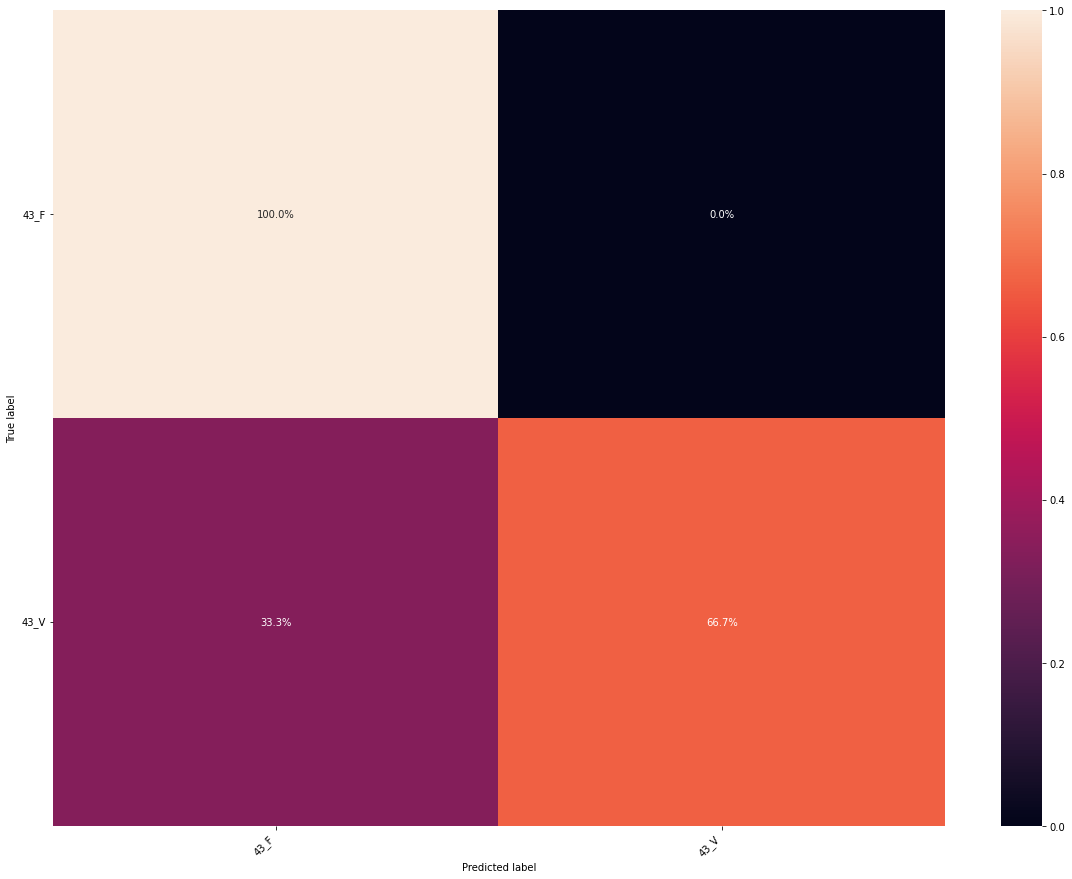


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 44
Score: 0.3333333333333333

[0. 1.]
[0. 1.]


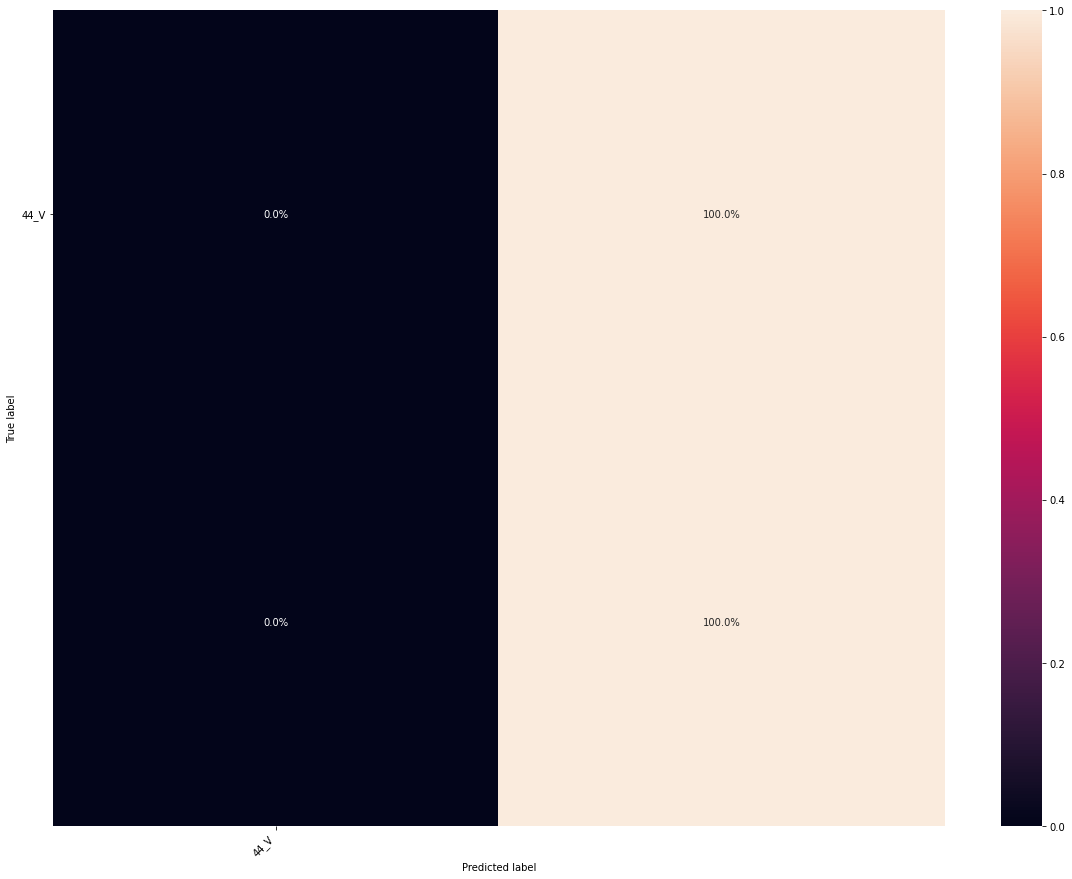


Cross_val_score
R²= 0.75

###################################################################
Treinamento individuo 45
Score: 0.3333333333333333

[0. 1.]
[0. 1.]


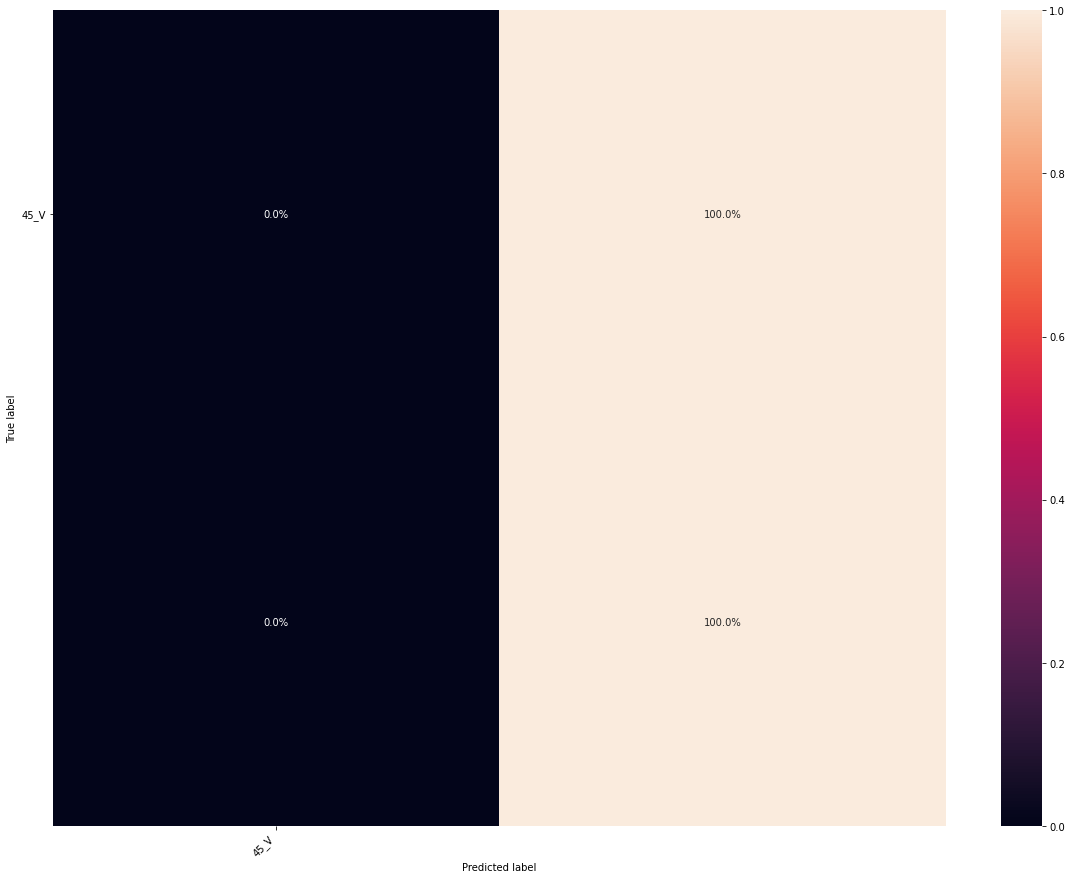


Cross_val_score
R²= 0.8333333333333333

###################################################################
Treinamento individuo 46
Score: 1.0

[1. 0.]
[0. 1.]


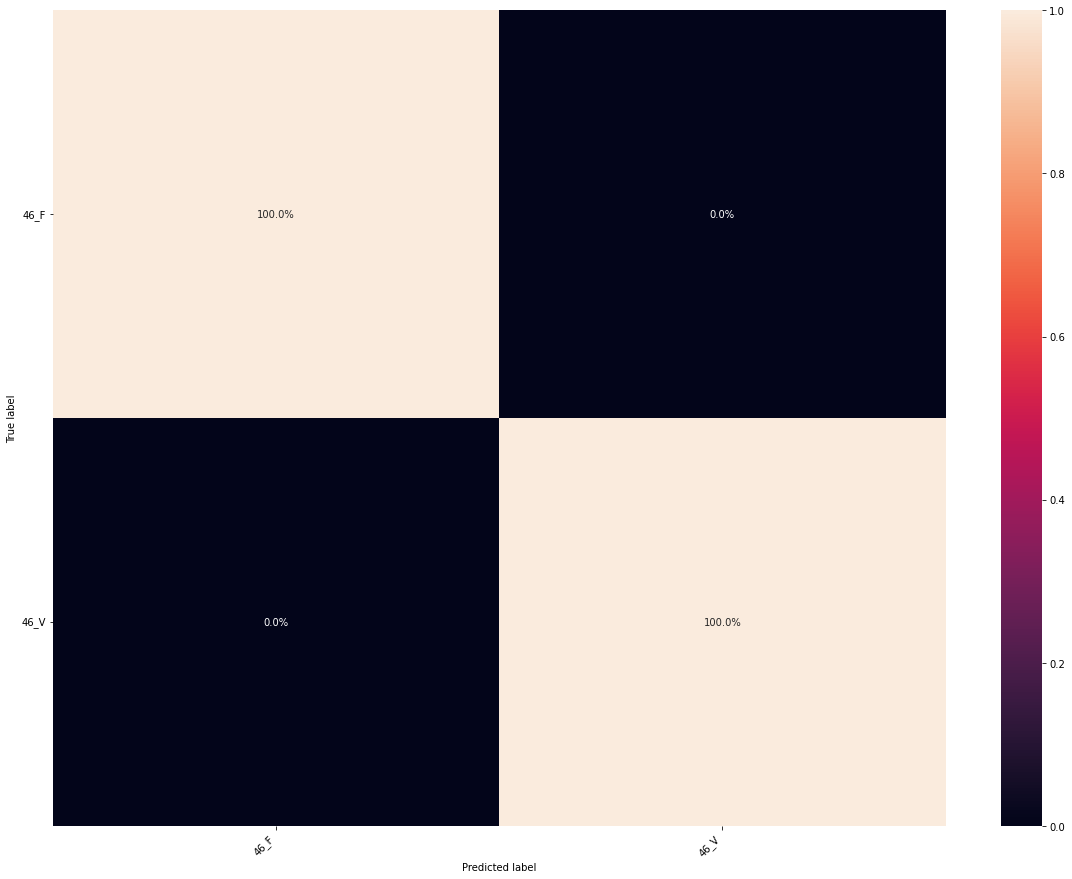


Cross_val_score
R²= 0.9

###################################################################
Treinamento individuo 47
Score: 0.6666666666666666

[0.75 0.25]
[0.5 0.5]


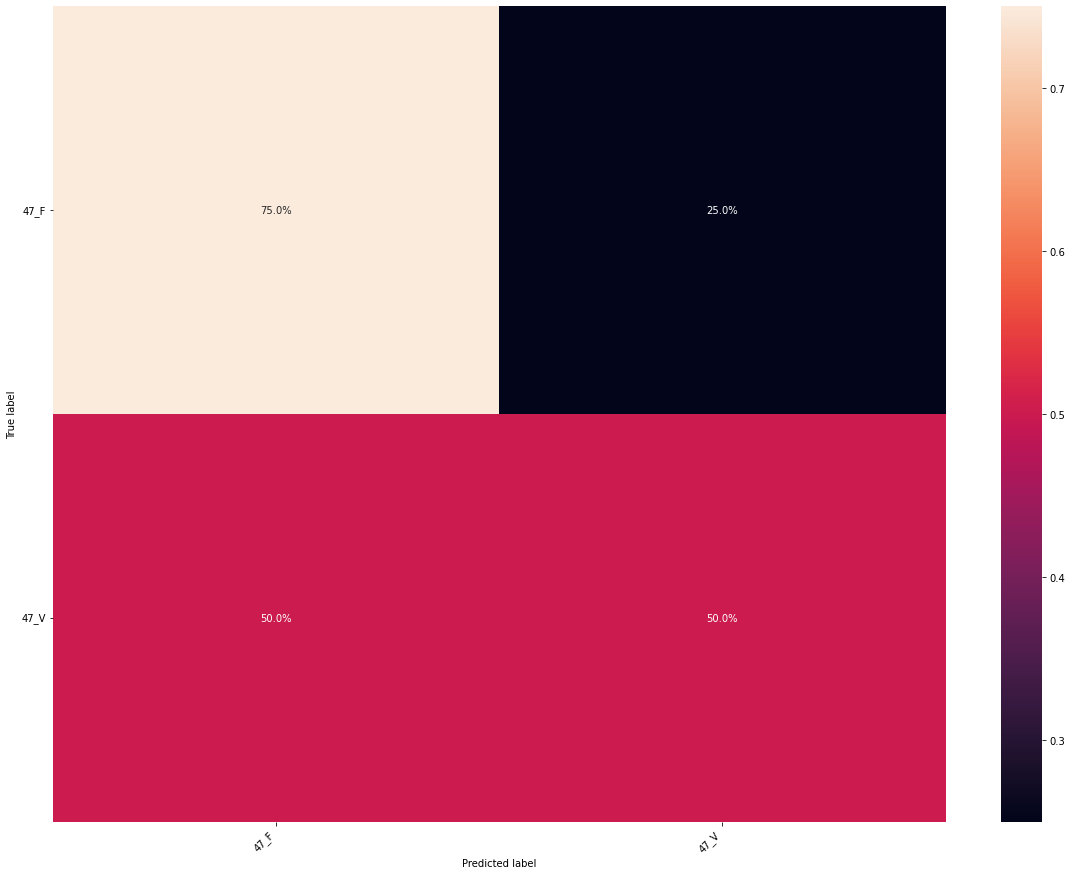


Cross_val_score
R²= 0.8666666666666666

###################################################################
Treinamento individuo 48
Score: 0.5

[1. 0.]
[1. 0.]


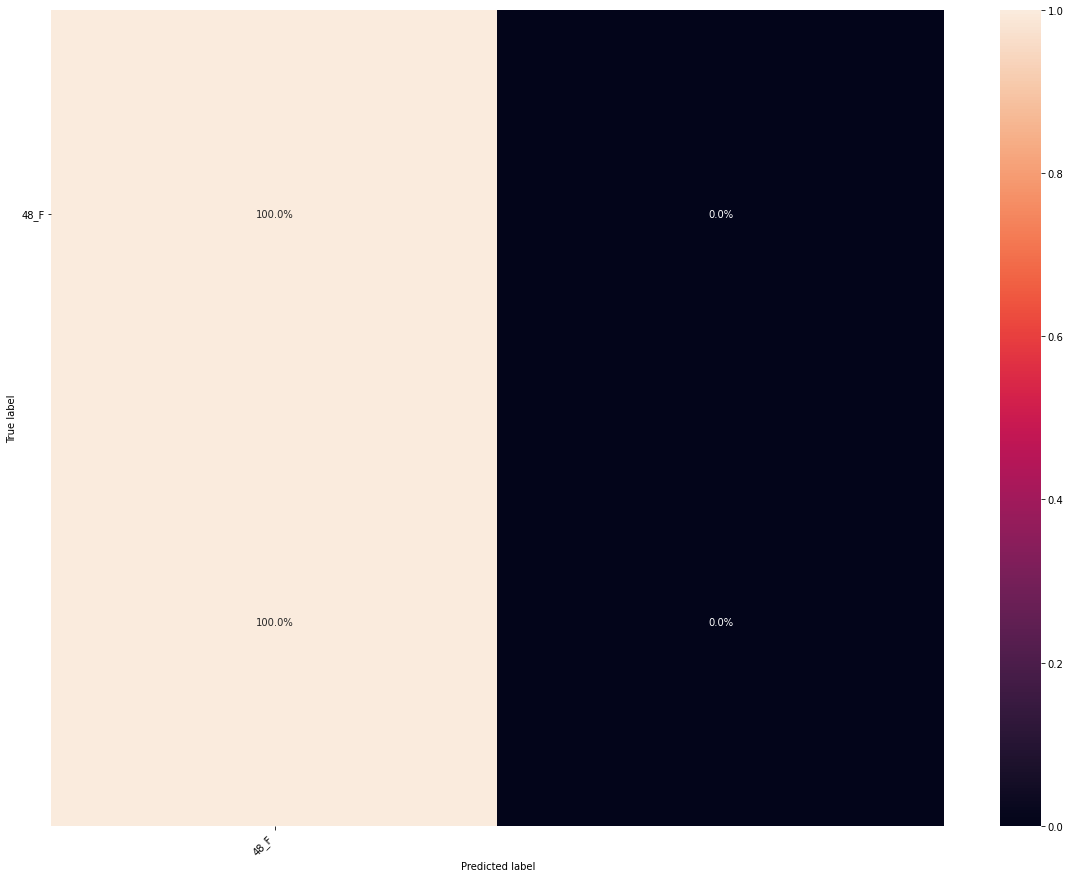


Cross_val_score
R²= 0.9333333333333332

###################################################################
Treinamento individuo 49
Score: 0.8333333333333334

[1. 0.]
[0.25 0.75]


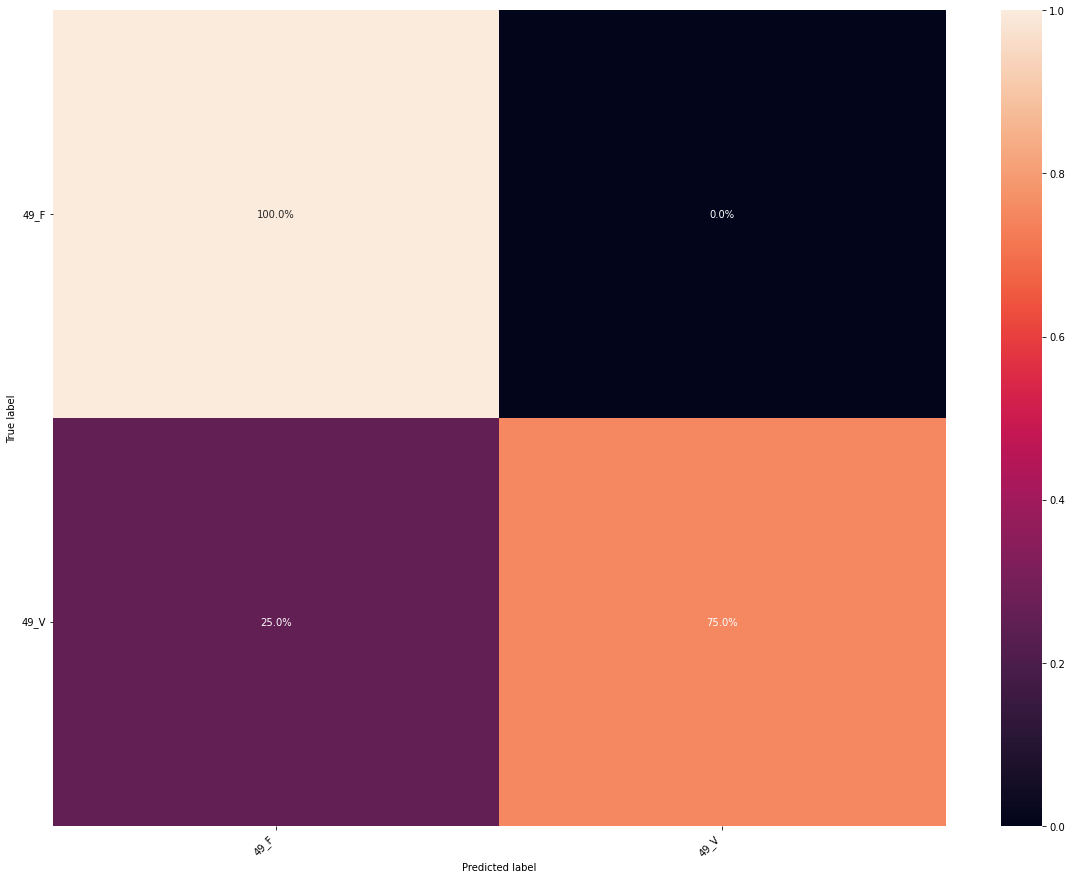


Cross_val_score
R²= 0.8833333333333332

###################################################################
Treinamento individuo 50
Score: 0.8333333333333334

[1. 0.]
[0.33333333 0.66666667]


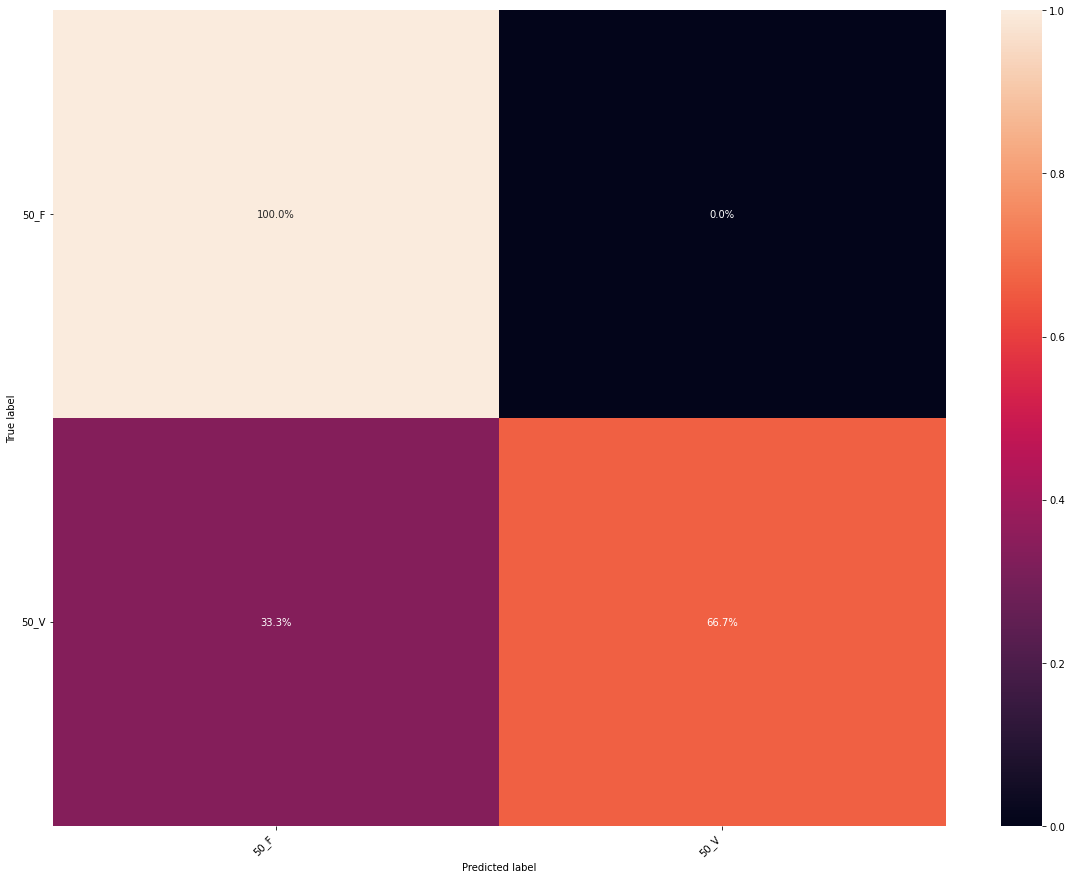


Cross_val_score
R²= 0.7833333333333333

###################################################################
Treinamento individuo 51
Score: 0.3333333333333333

[1. 0.]
[1. 0.]


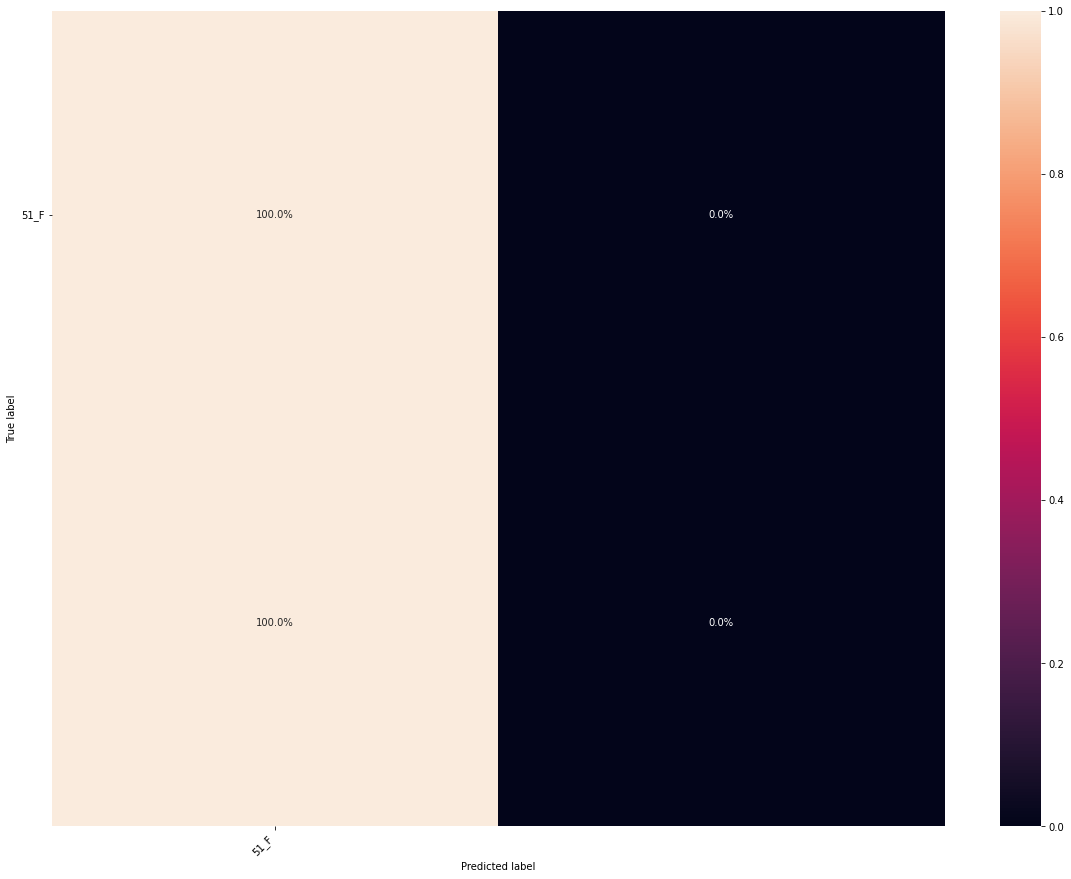


Cross_val_score
R²= 0.8833333333333332

###################################################################
Treinamento individuo 52
Score: 0.6666666666666666

[1. 0.]
[1. 0.]


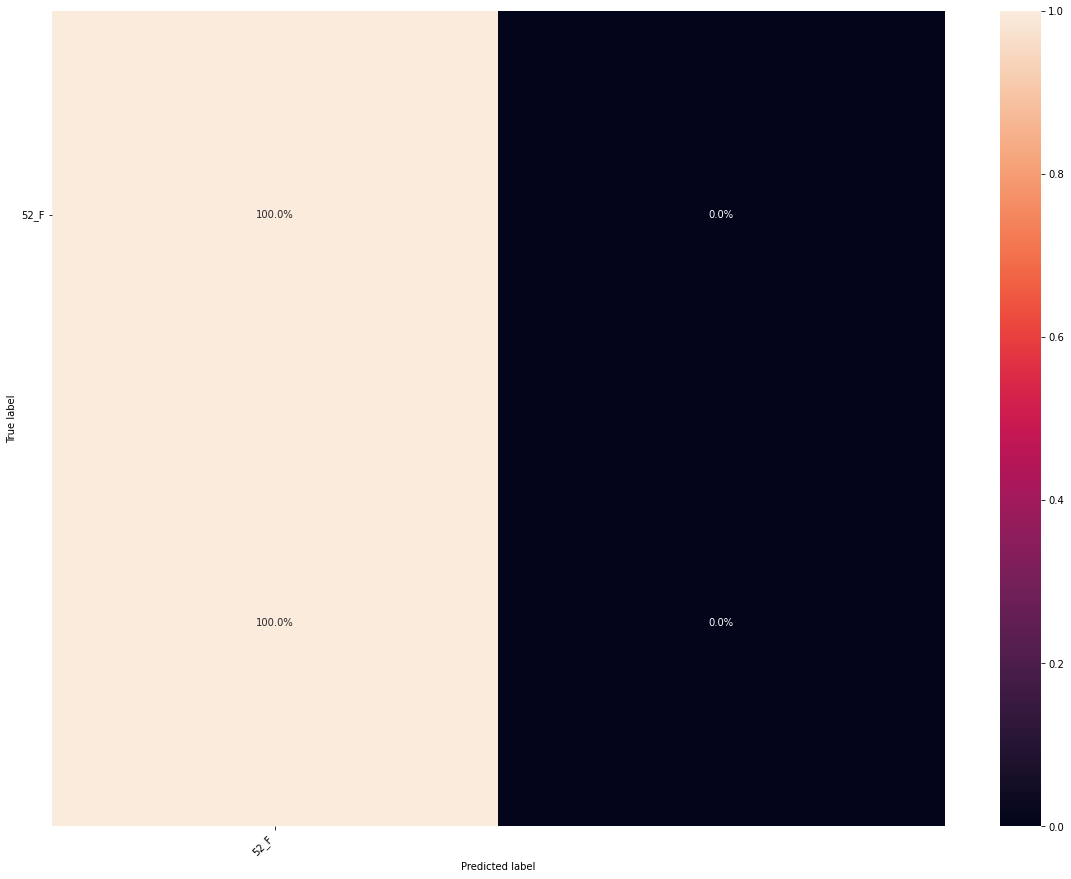


Cross_val_score
R²= 0.95

###################################################################
Treinamento individuo 53
Score: 1.0

[1. 0.]
[0. 1.]


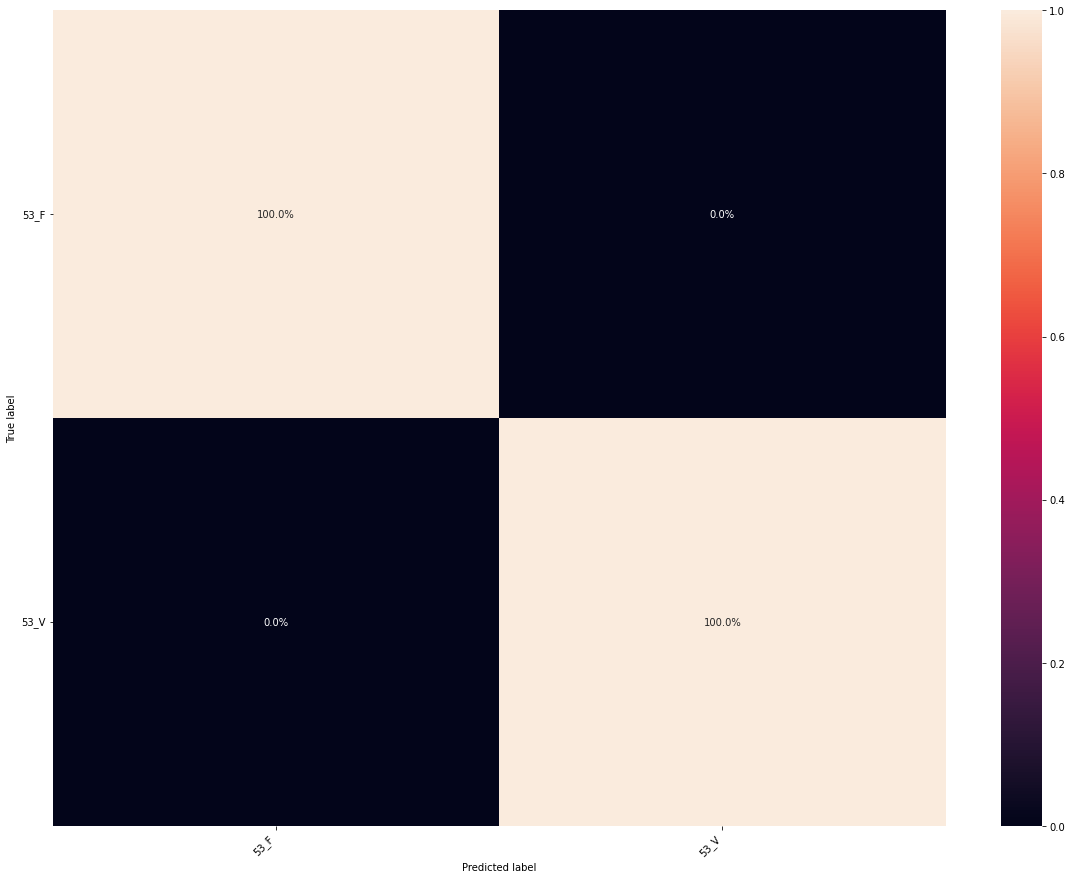


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 54
Score: 0.3333333333333333

[0. 1.]
[0. 1.]


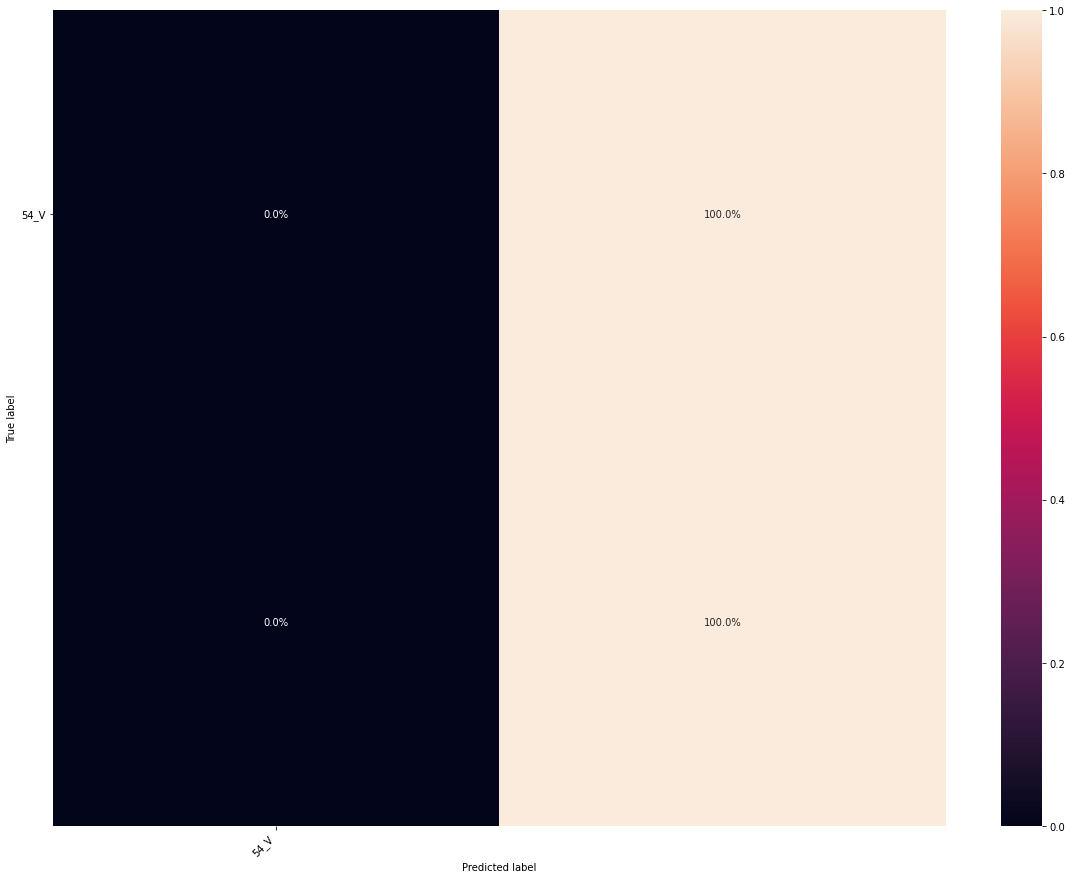


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 55
Score: 0.8333333333333334

[1. 0.]
[0.33333333 0.66666667]


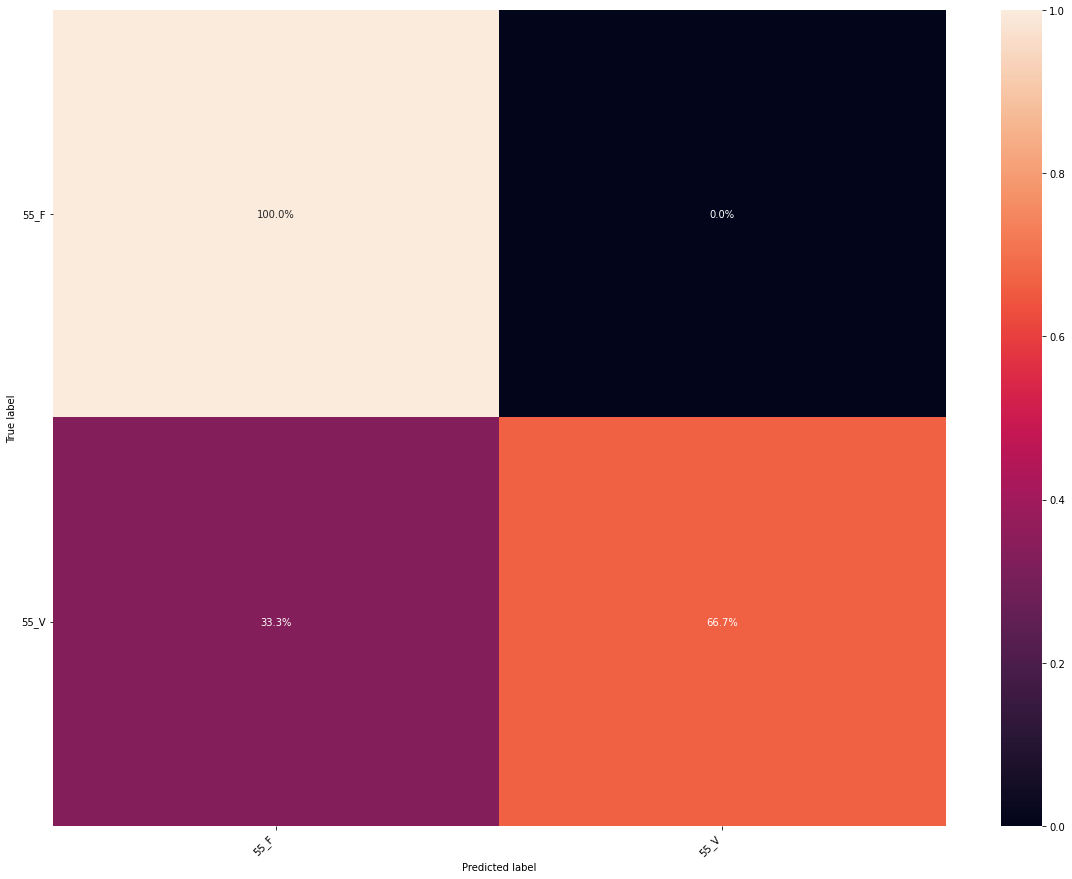


Cross_val_score
R²= 0.8666666666666666

###################################################################
Treinamento individuo 56
Score: 0.5

[0.25 0.75]
[0. 1.]


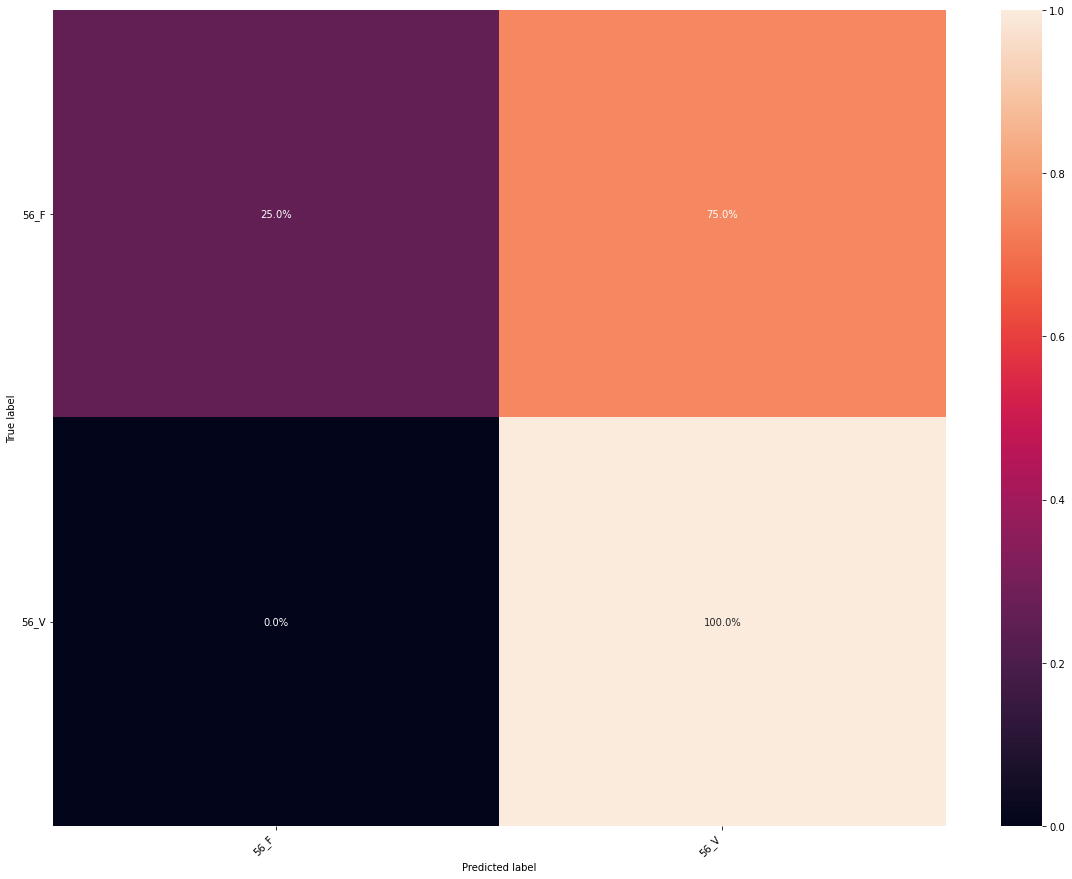


Cross_val_score
R²= 0.75

###################################################################
Treinamento individuo 57
Score: 1.0

[1. 0.]
[0. 1.]


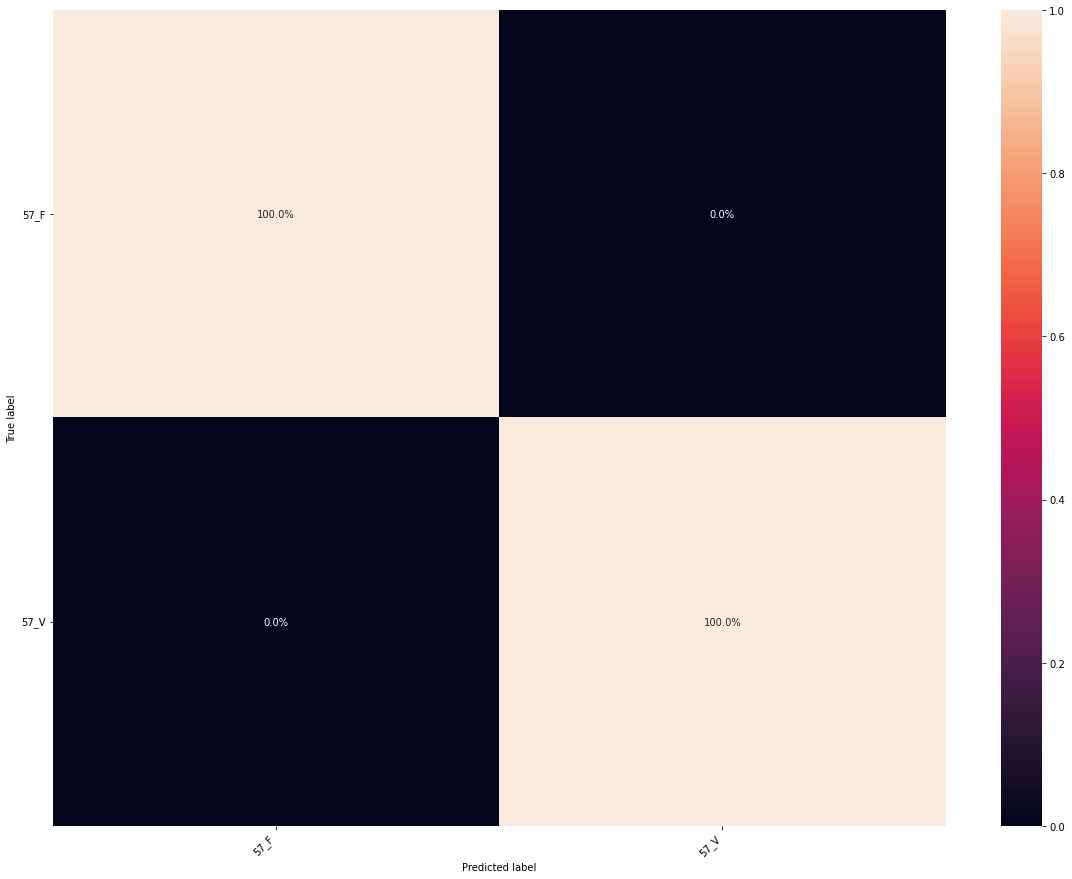


Cross_val_score
R²= 0.95

###################################################################
Treinamento individuo 58
Score: 0.5

[0. 1.]
[0. 1.]


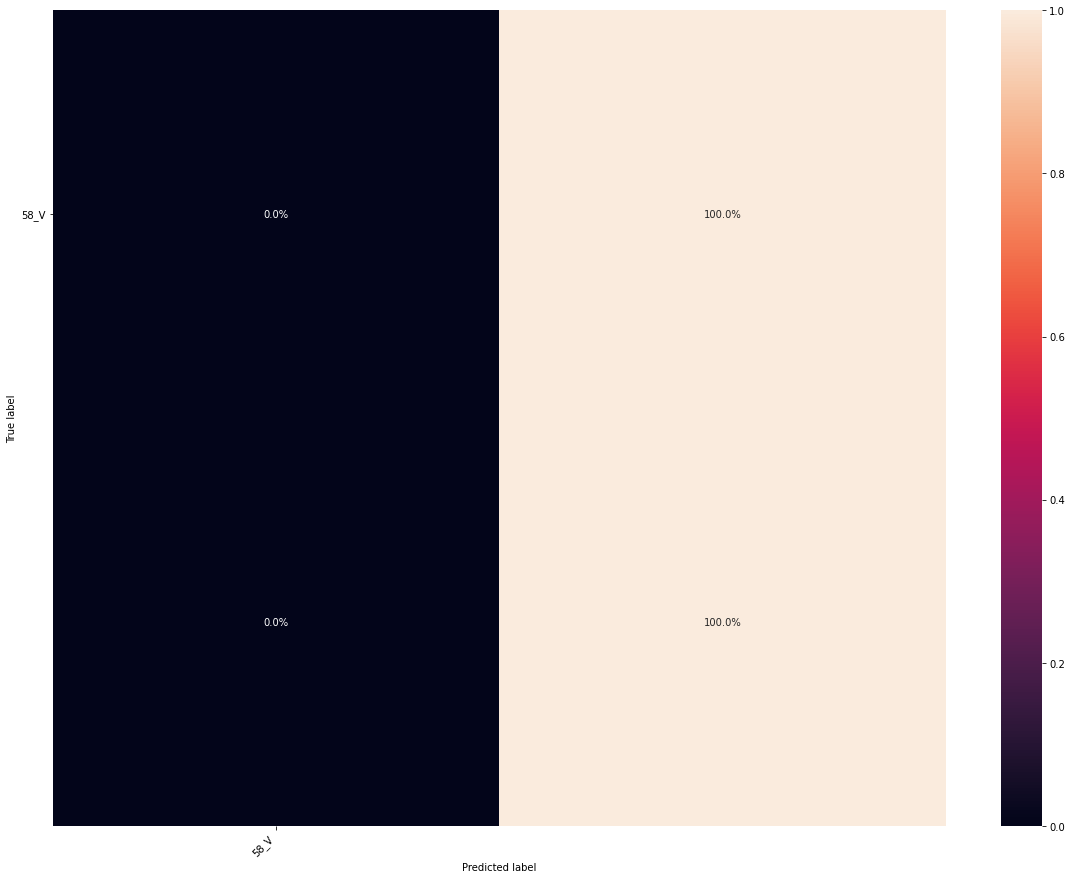


Cross_val_score
R²= 0.8

###################################################################
Treinamento individuo 59
Score: 0.6666666666666666

[0. 1.]
[0. 1.]


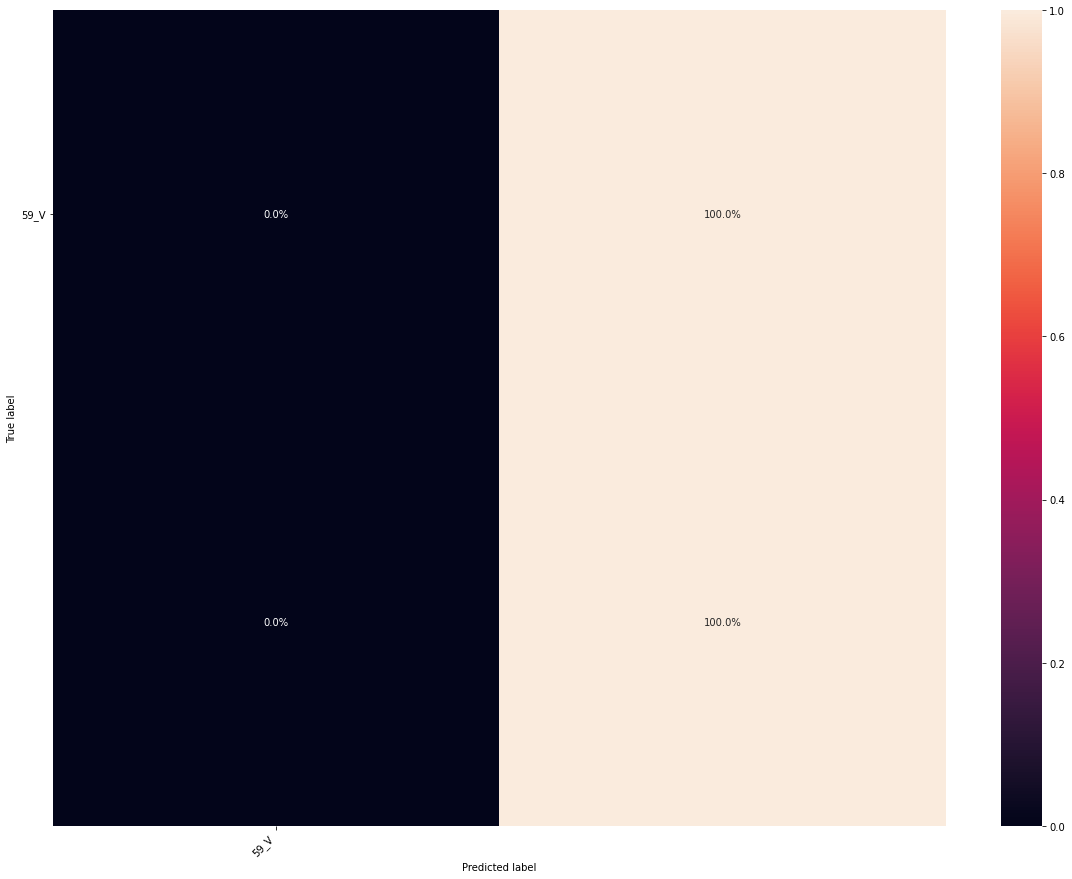


Cross_val_score
R²= 0.8

###################################################################
Treinamento individuo 60
Score: 0.8333333333333334

[1. 0.]
[0.5 0.5]


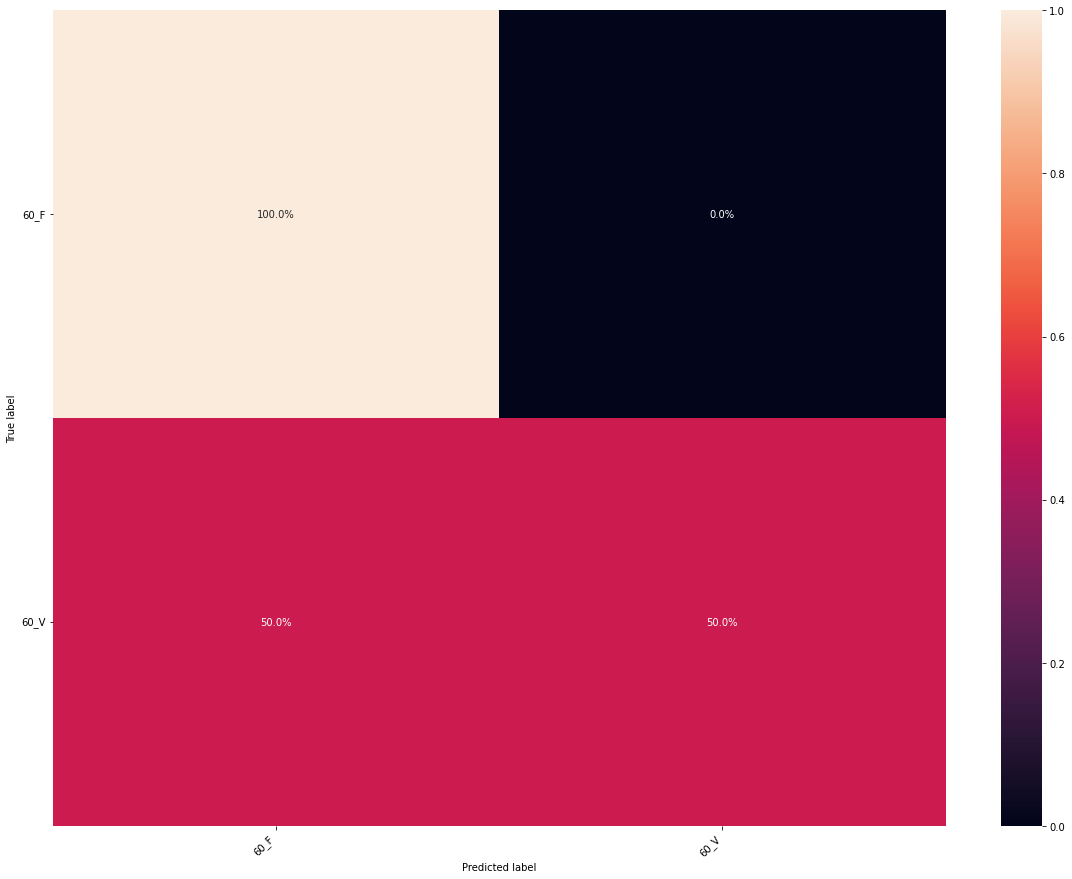


Cross_val_score
R²= 0.8166666666666667

###################################################################
Treinamento individuo 61
Score: 0.5

[0.25 0.75]
[0. 1.]


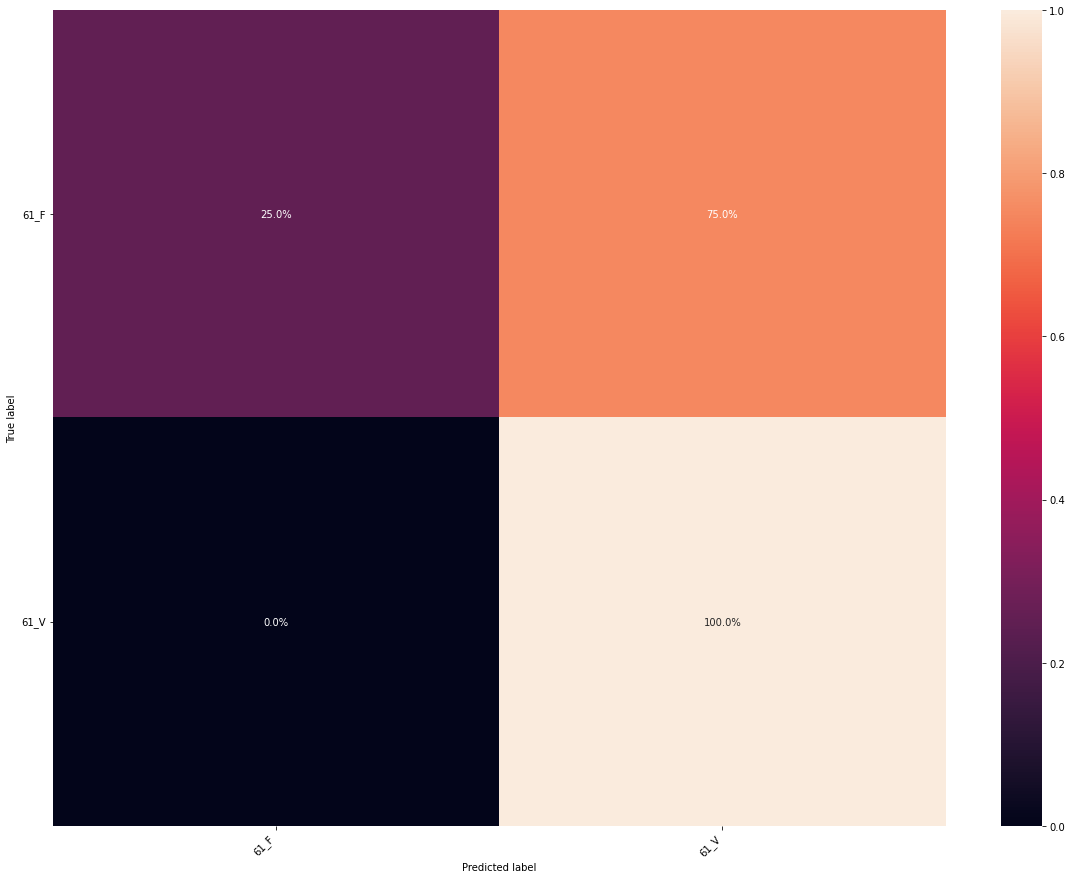


Cross_val_score
R²= 0.7

###################################################################
Treinamento individuo 62
Score: 0.5

[0. 1.]
[0. 1.]


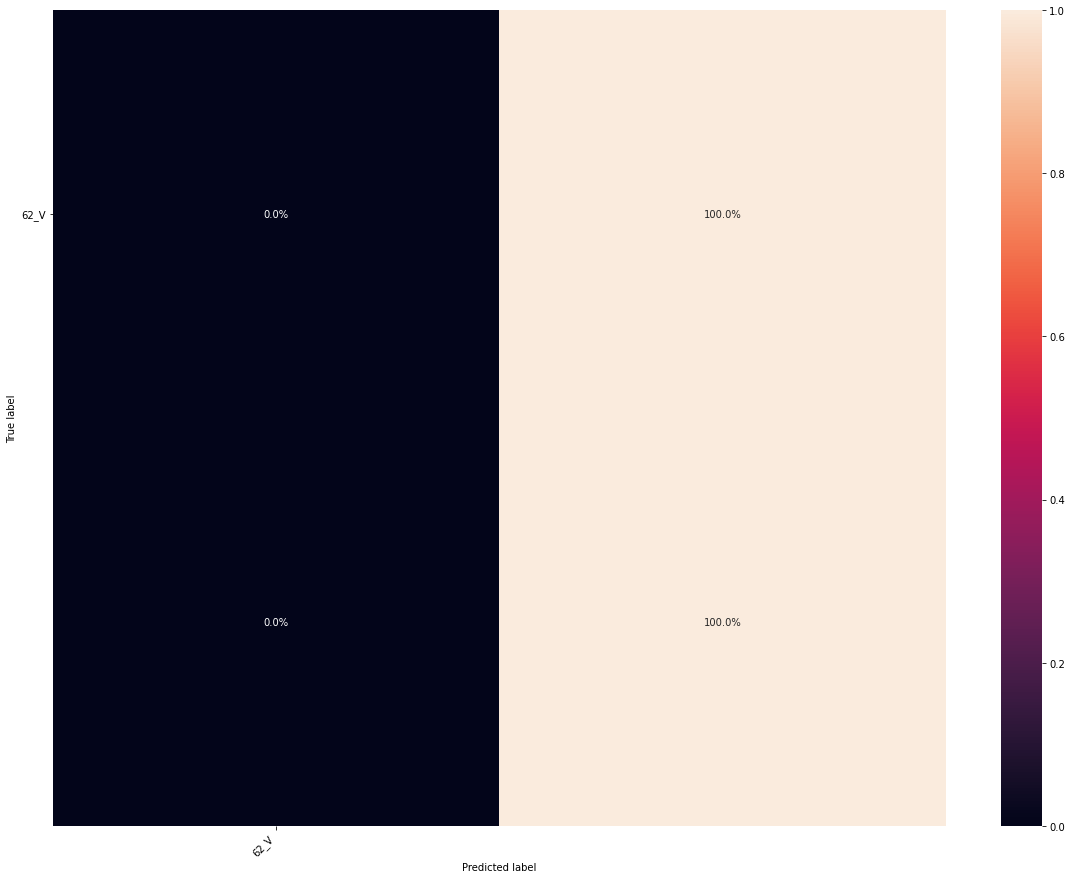


Cross_val_score
R²= 0.8833333333333332

###################################################################
Treinamento individuo 63
Score: 1.0

[1. 0.]
[0. 1.]


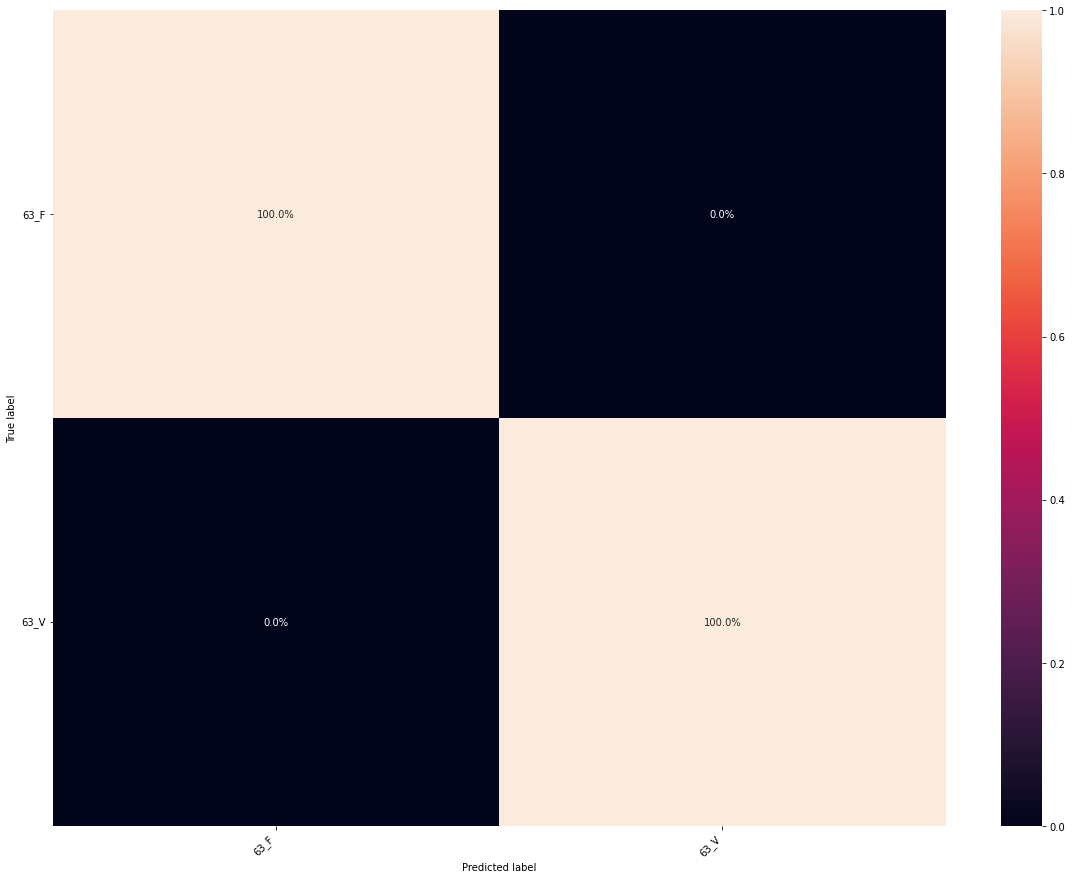


Cross_val_score
R²= 0.8666666666666666



In [ ]:
score_list_SGDClassifier = []
for nome_individuo in nomes_individuos:
    print(f"###################################################################")
    print(f"Treinamento individuo {nome_individuo}")
    df_individuo = df_individuos[df_individuos.nome==nome_individuo]
    df_individuo.reset_index(drop=True,inplace=True)
   
    x_train, x_test,y_train, y_test = train_test_split(df_individuo['imagem'].values,
                                        df_individuo['classe'].values,
                                        shuffle=True, test_size=0.25,
                                        random_state=42)
     
    clf = SGDClassifier()
    clf.fit(x_train.tolist(), y_train.tolist())
    print(f"Score: {clf.score(x_test.tolist(),y_test.tolist())}\n")

    previsoes = clf.predict(x_test.tolist())
    
    print_confusion_matrix(y_test.tolist(),previsoes,np.unique(np.array(previsoes)).tolist())

    print("\nCross_val_score")
    score  = cross_val_score(SGDClassifier(), df_individuo_22['imagem'].values.tolist(),df_individuo_22['classe'].values.tolist(),cv=10)
    score_list_SGDClassifier.append(np.mean(score))
    # score_list_SGDClassifier=np.concatenate((score_list_SGDClassifier, score), axis=0)
    print(f'R²= {np.mean(score)}\n')

### Logistic Regression

###################################################################
Treinamento individuo 0
Score: 1.0

[1. 0.]
[0. 1.]


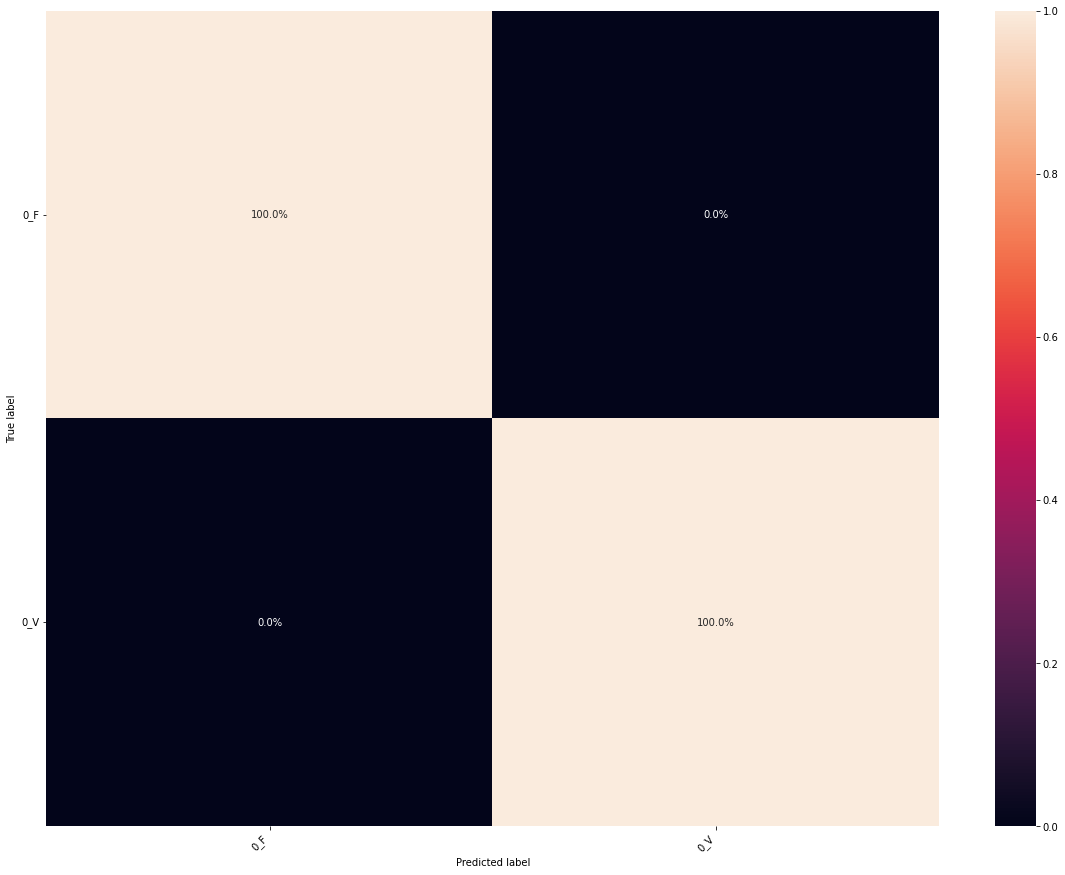


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 1
Score: 1.0

[1. 0.]
[0. 1.]


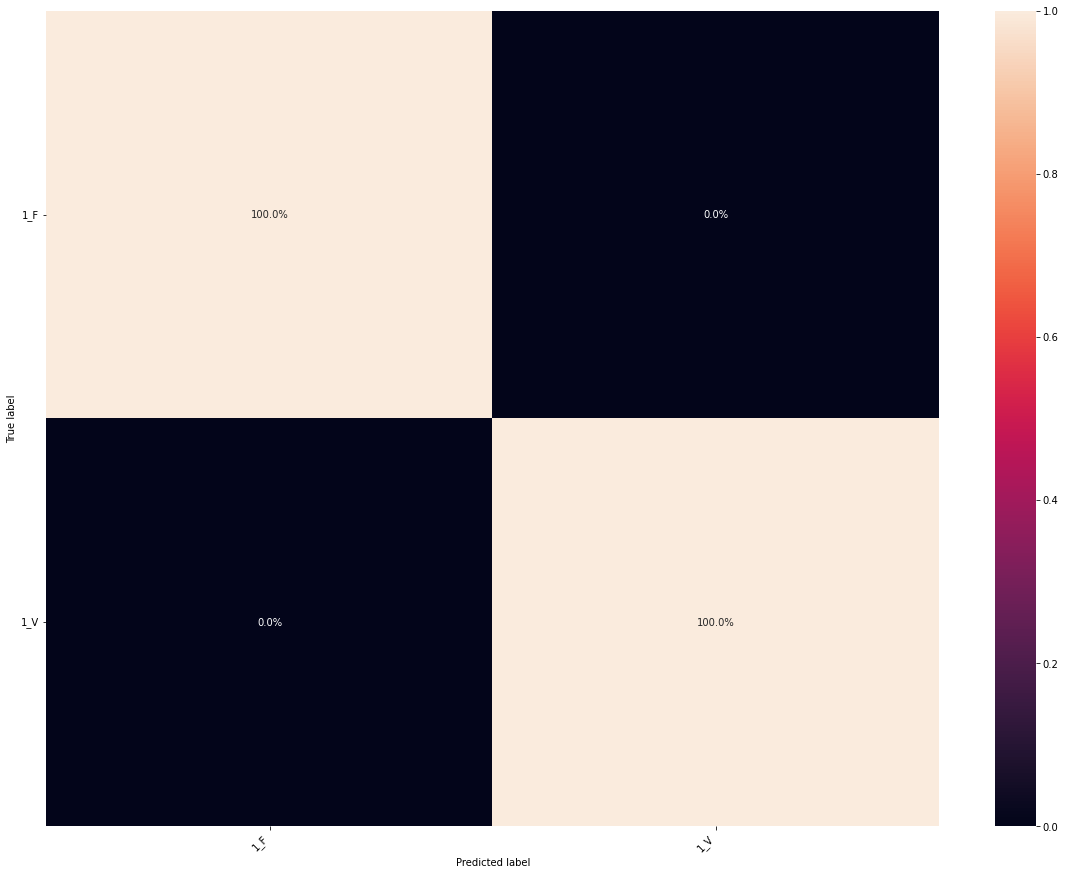


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 2
Score: 0.8333333333333334

[0.75 0.25]
[0. 1.]


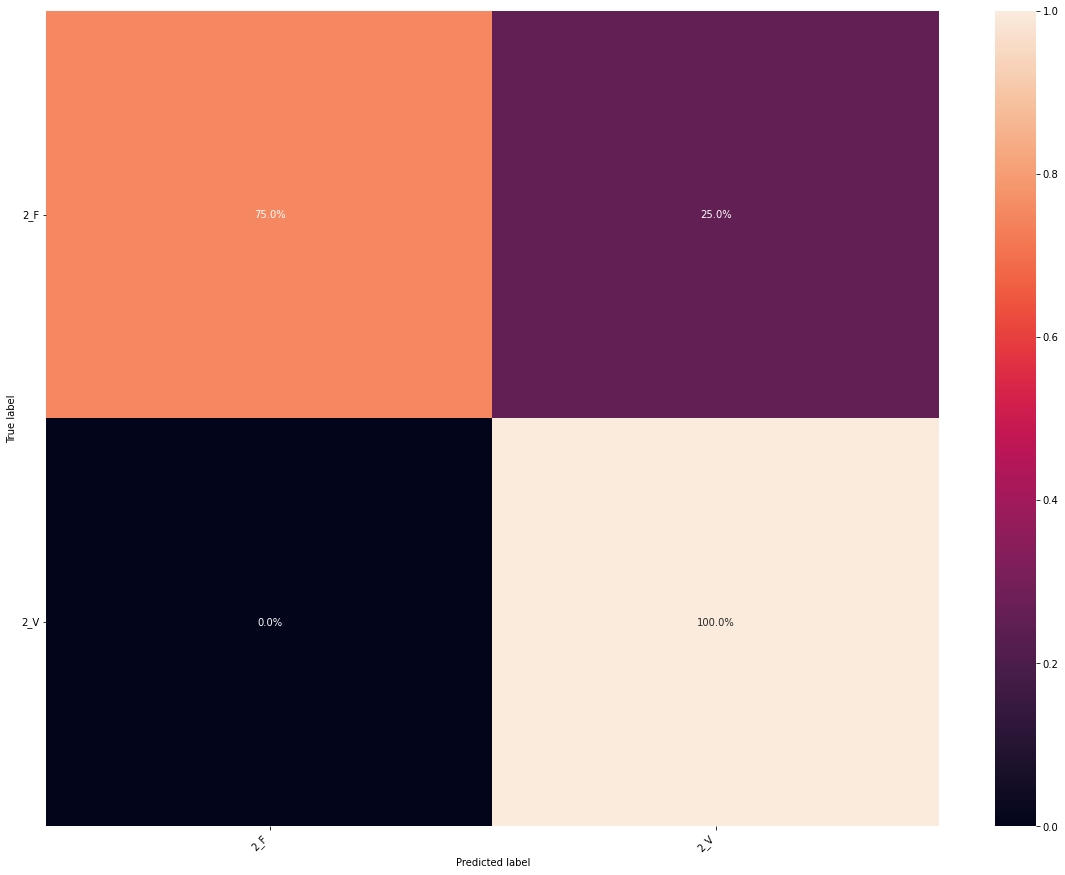


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 3
Score: 0.6666666666666666

[0.33333333 0.66666667]
[0. 1.]


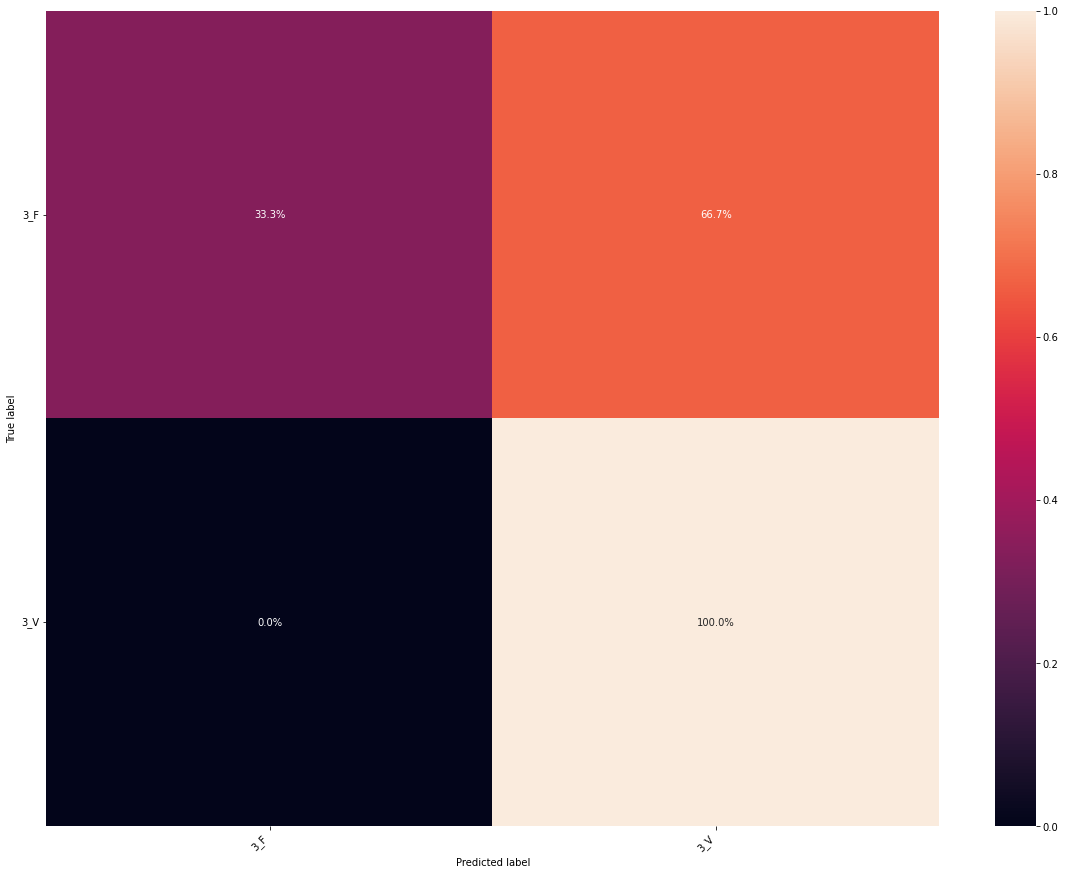


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 4
Score: 1.0

[1. 0.]
[0. 1.]


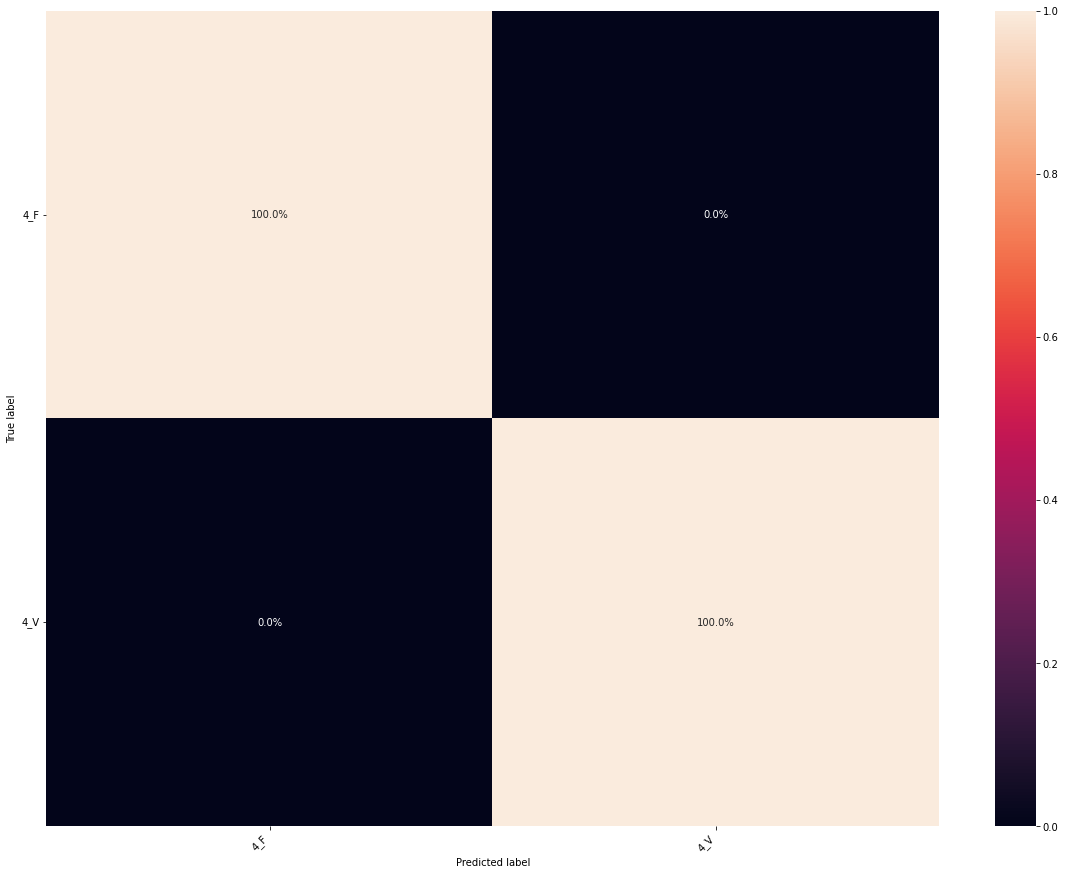


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 5
Score: 1.0

[1. 0.]
[0. 1.]


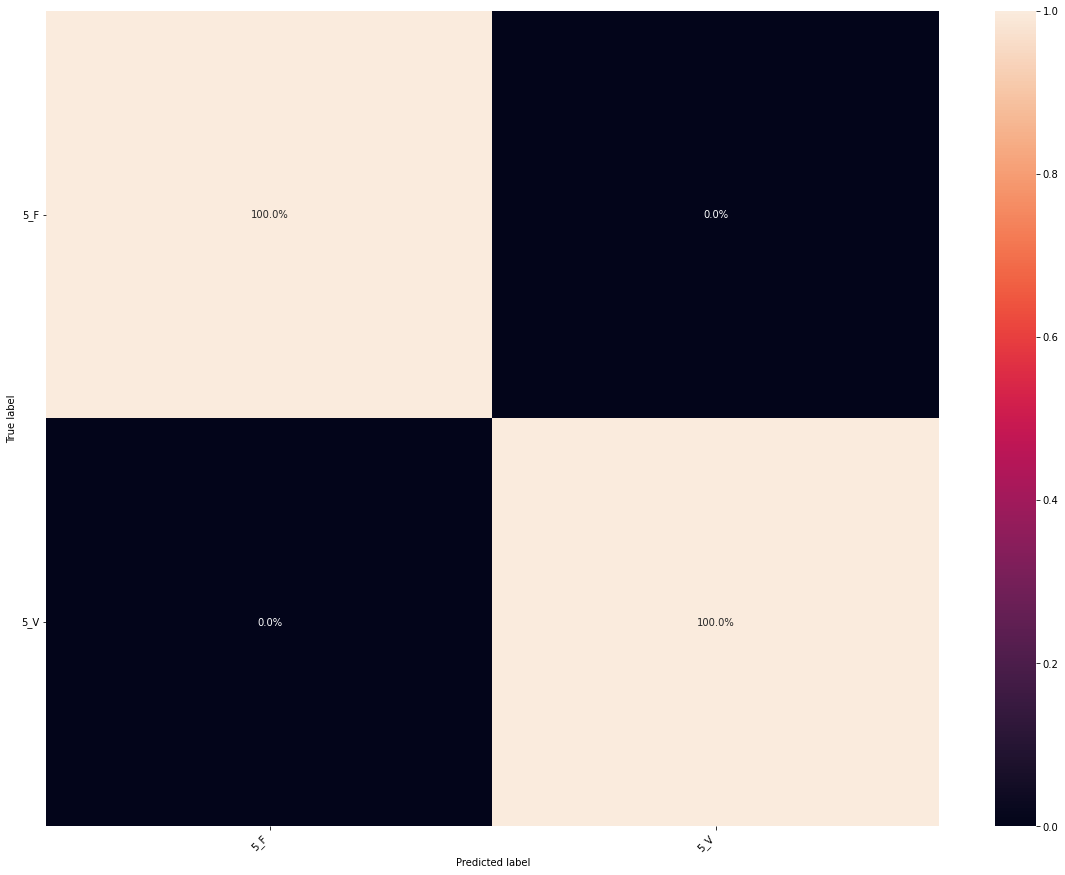


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 6
Score: 1.0

[1. 0.]
[0. 1.]


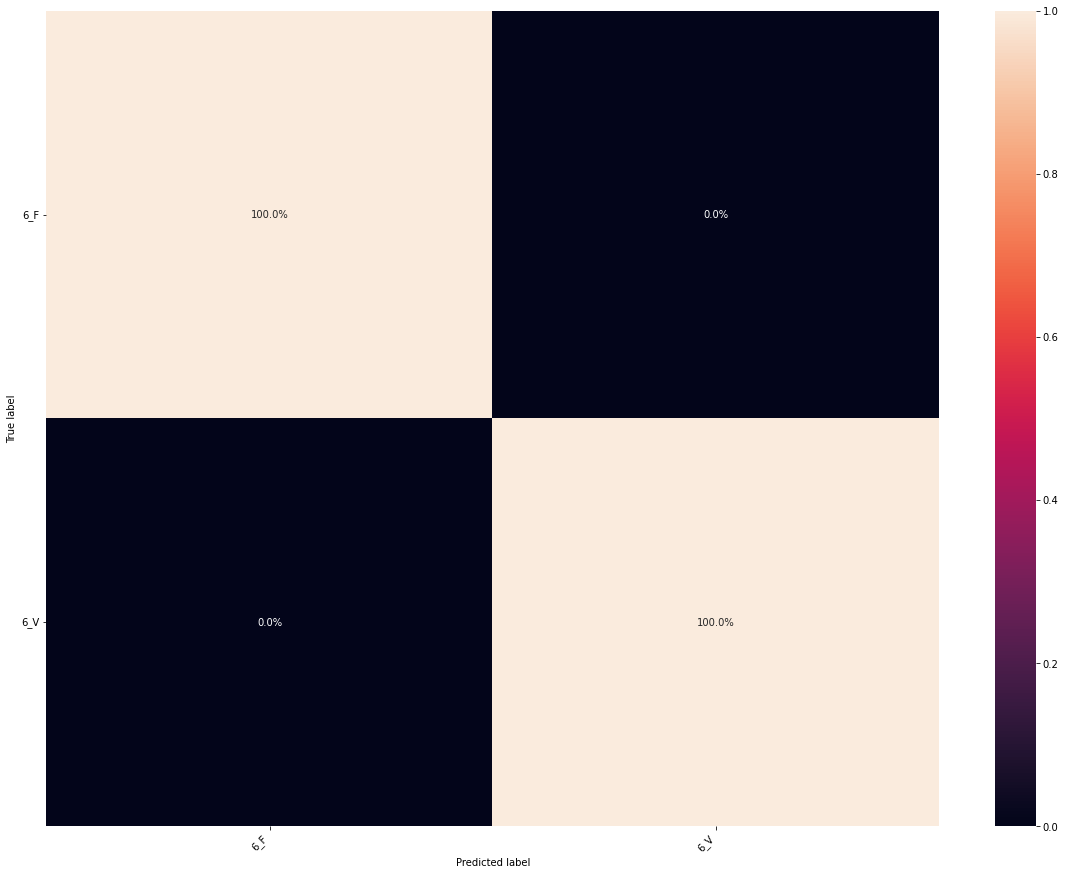


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 7
Score: 0.6666666666666666

[0.33333333 0.66666667]
[0. 1.]


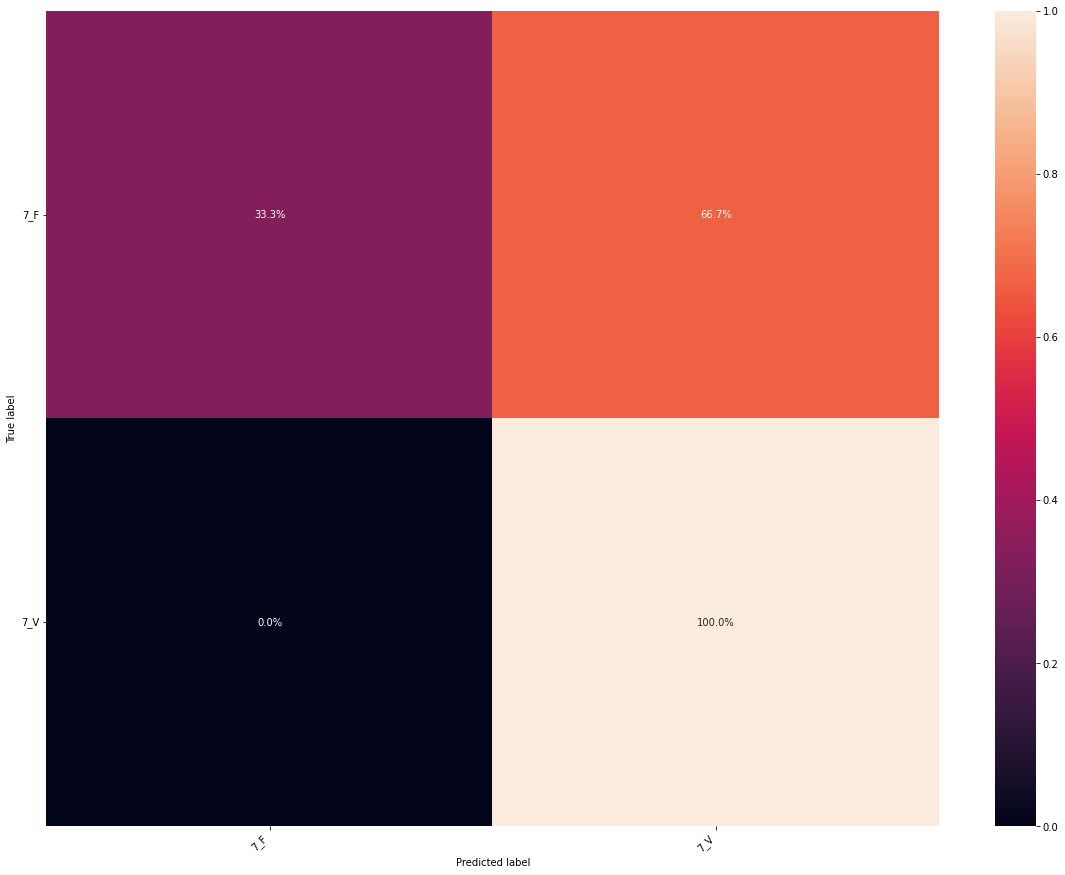


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 8
Score: 0.8571428571428571

[1. 0.]
[0.2 0.8]


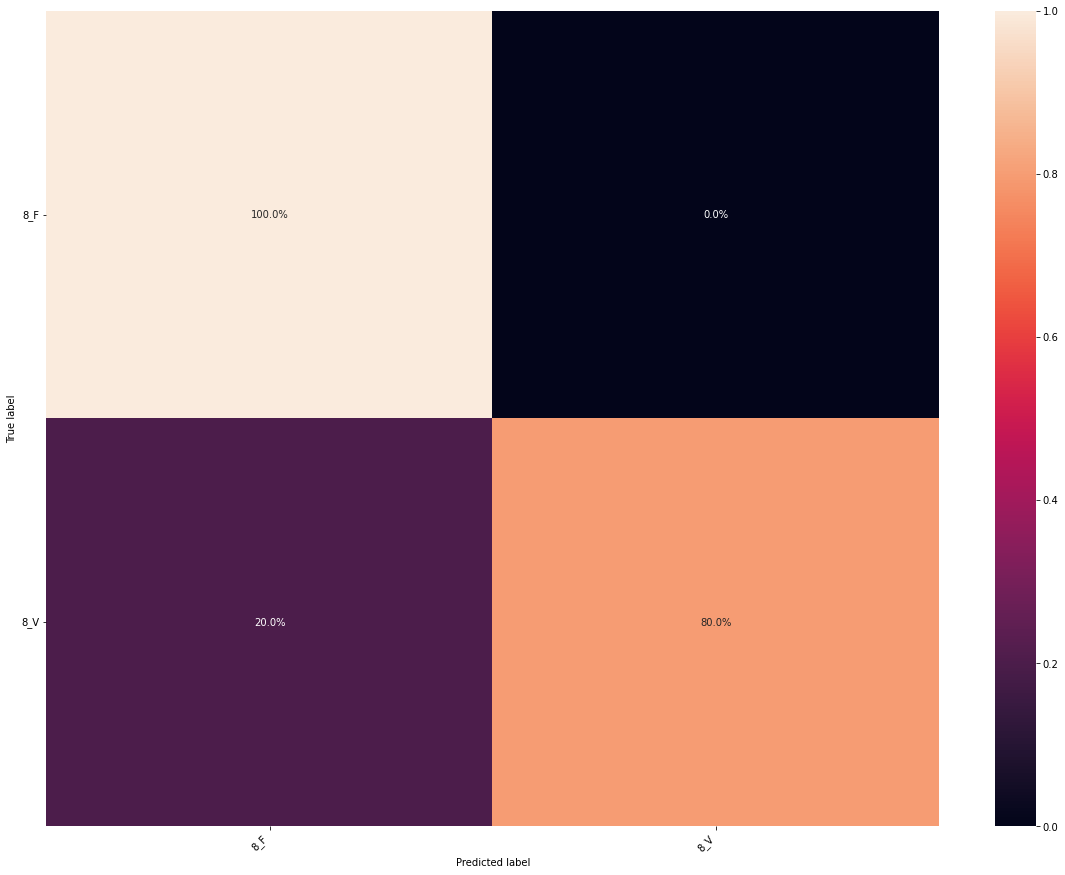


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 9
Score: 1.0

[1. 0.]
[0. 1.]


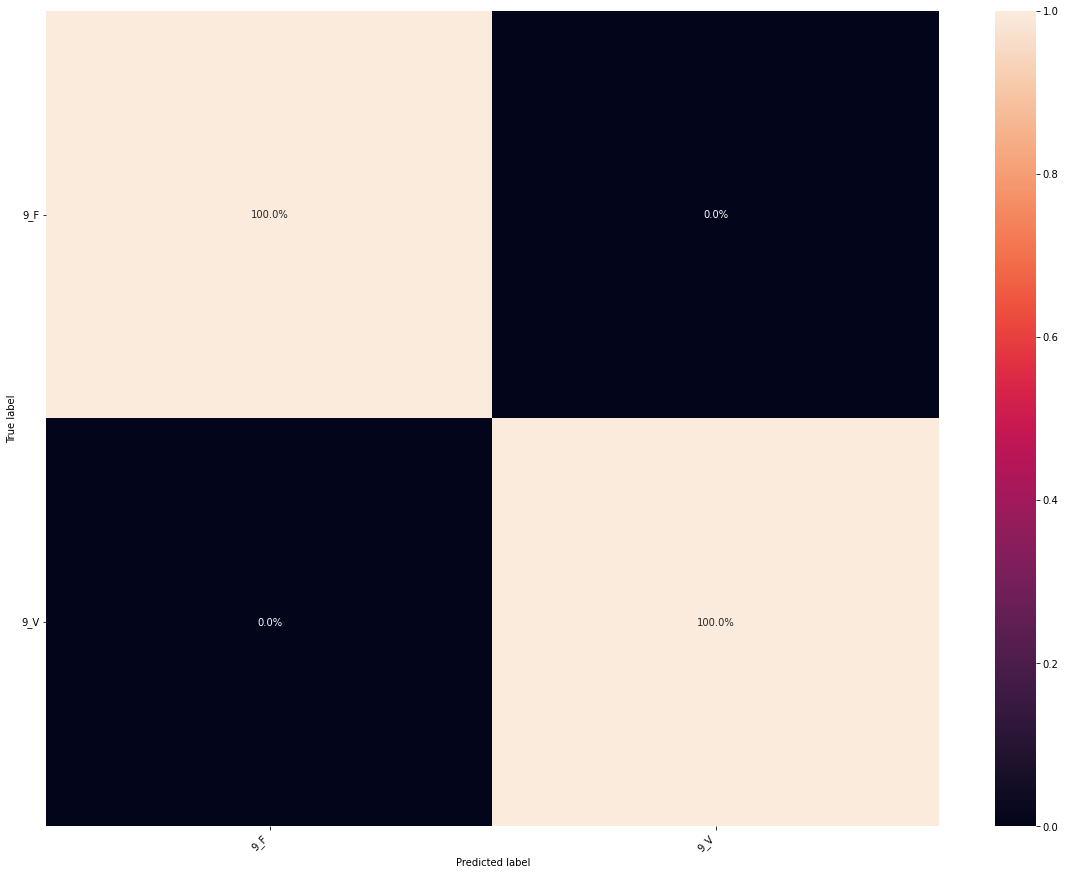


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 10
Score: 0.8333333333333334

[0.66666667 0.33333333]
[0. 1.]


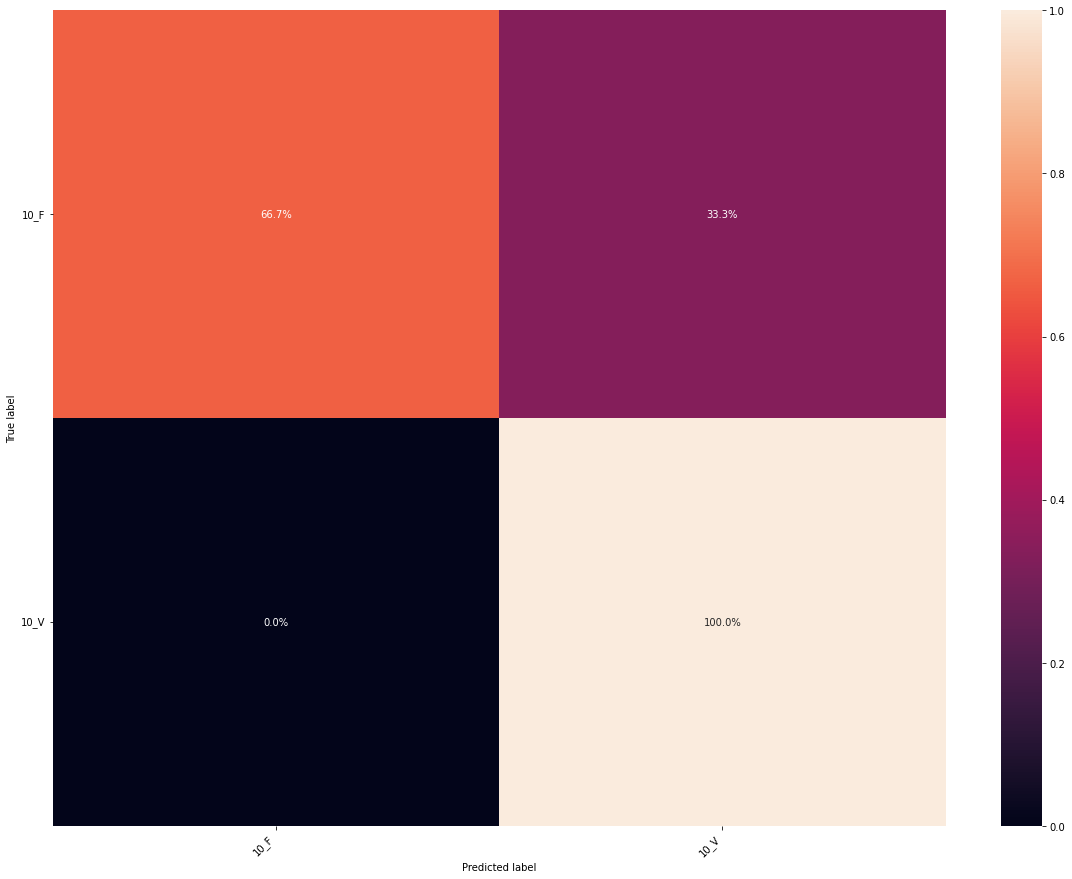


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 11
Score: 0.6666666666666666

[0.6 0.4]
[0. 1.]


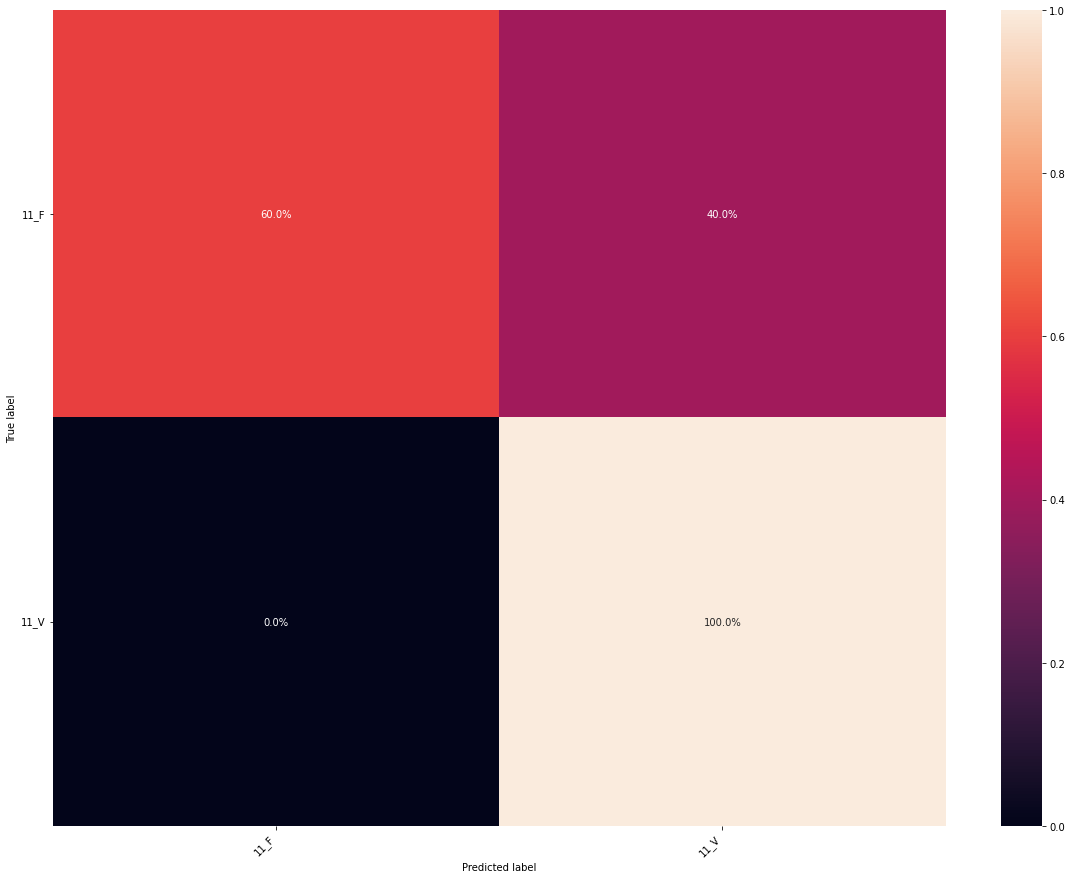


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 12
Score: 0.6666666666666666

[0.6 0.4]
[0. 1.]


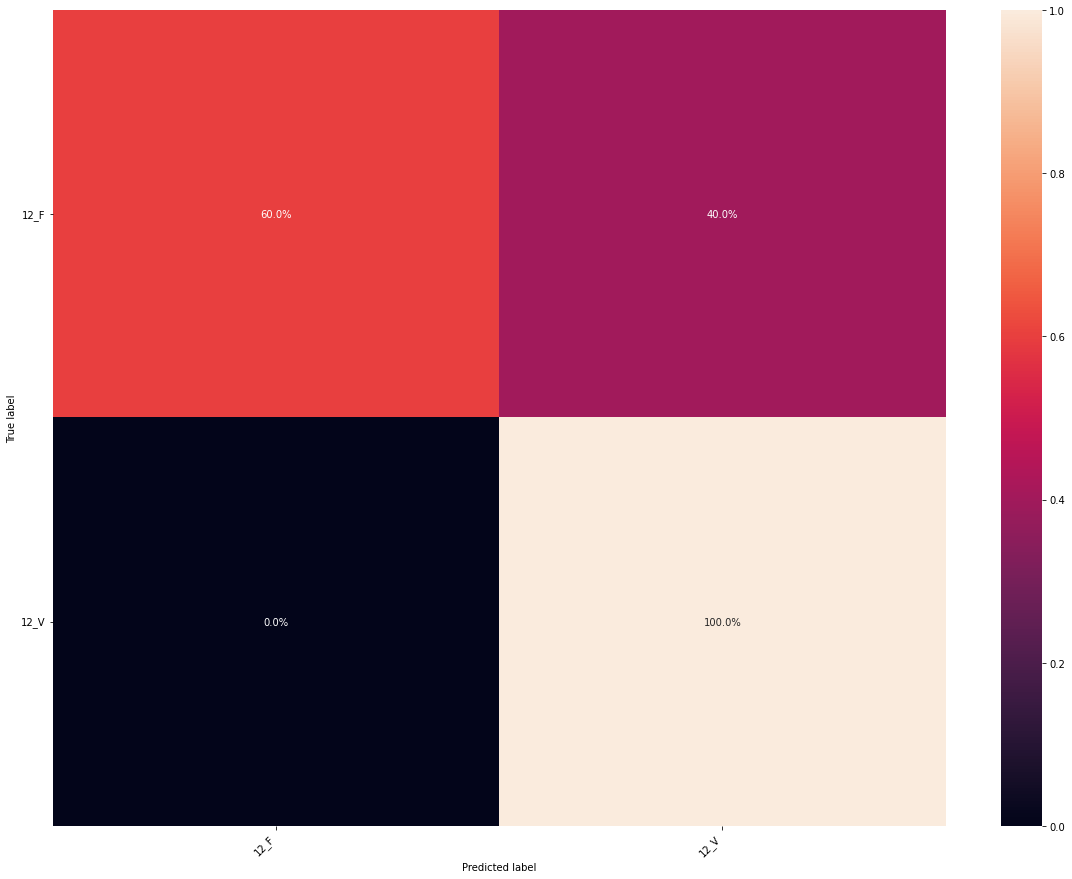


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 13
Score: 0.8333333333333334

[0.66666667 0.33333333]
[0. 1.]


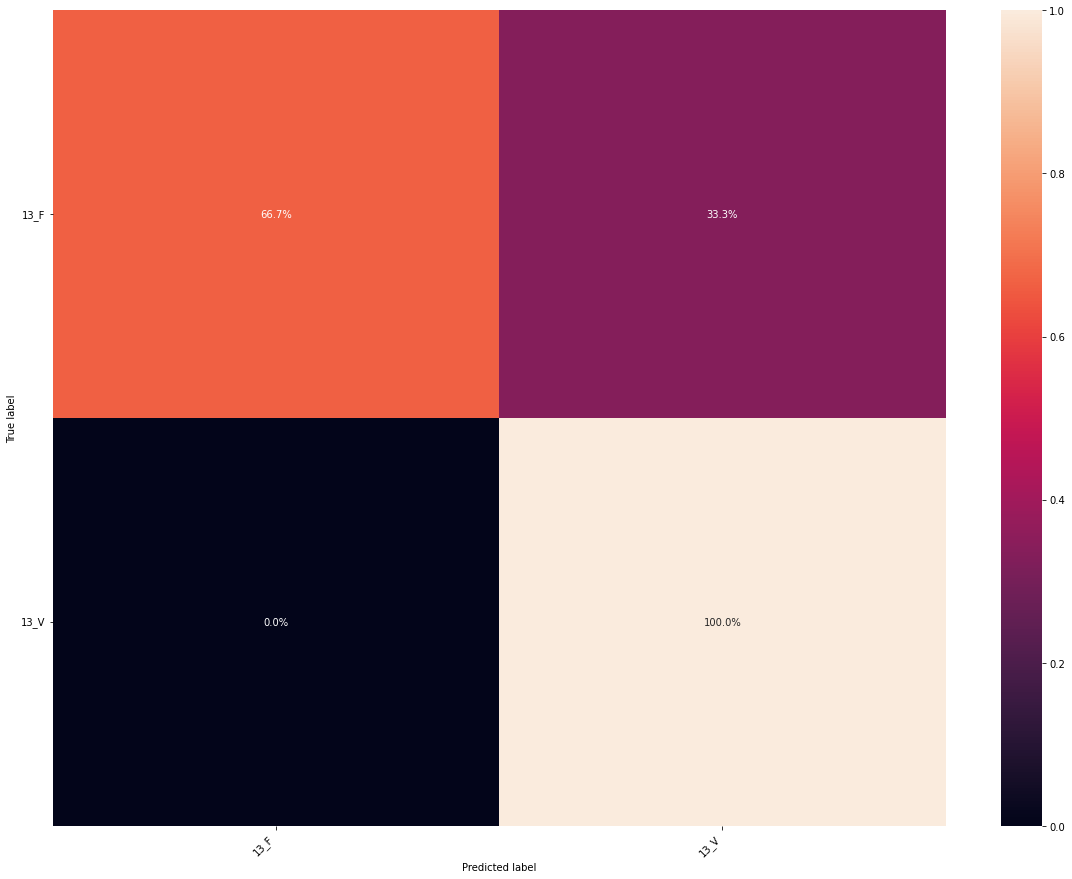


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 14
Score: 1.0

[1. 0.]
[0. 1.]


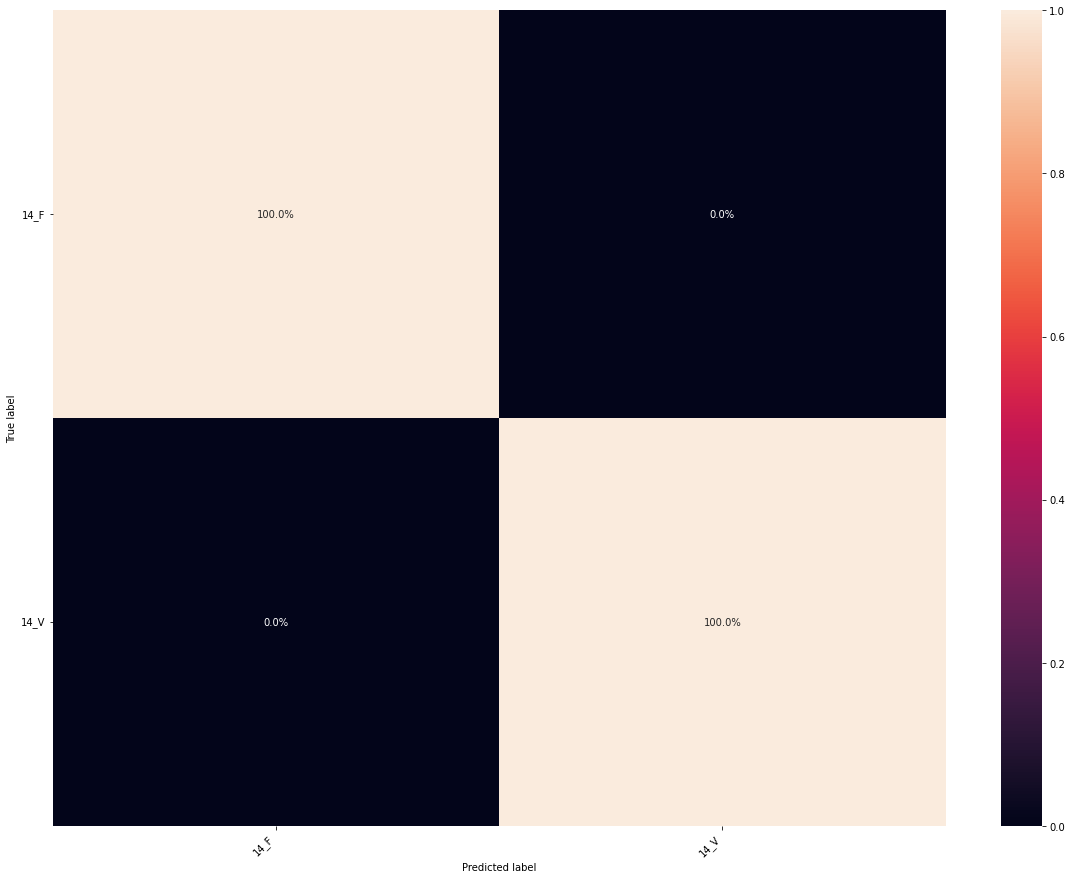


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 15
Score: 1.0

[1. 0.]
[0. 1.]


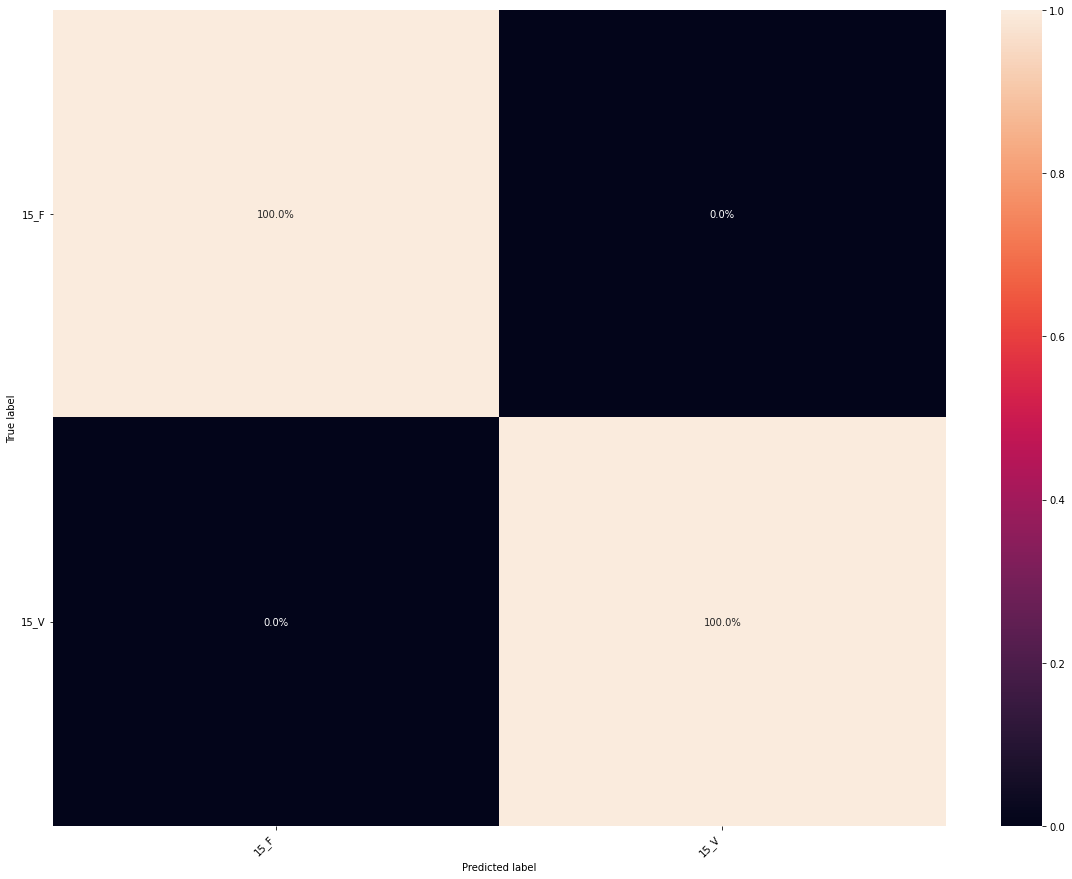


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 16
Score: 0.8333333333333334

[0.75 0.25]
[0. 1.]


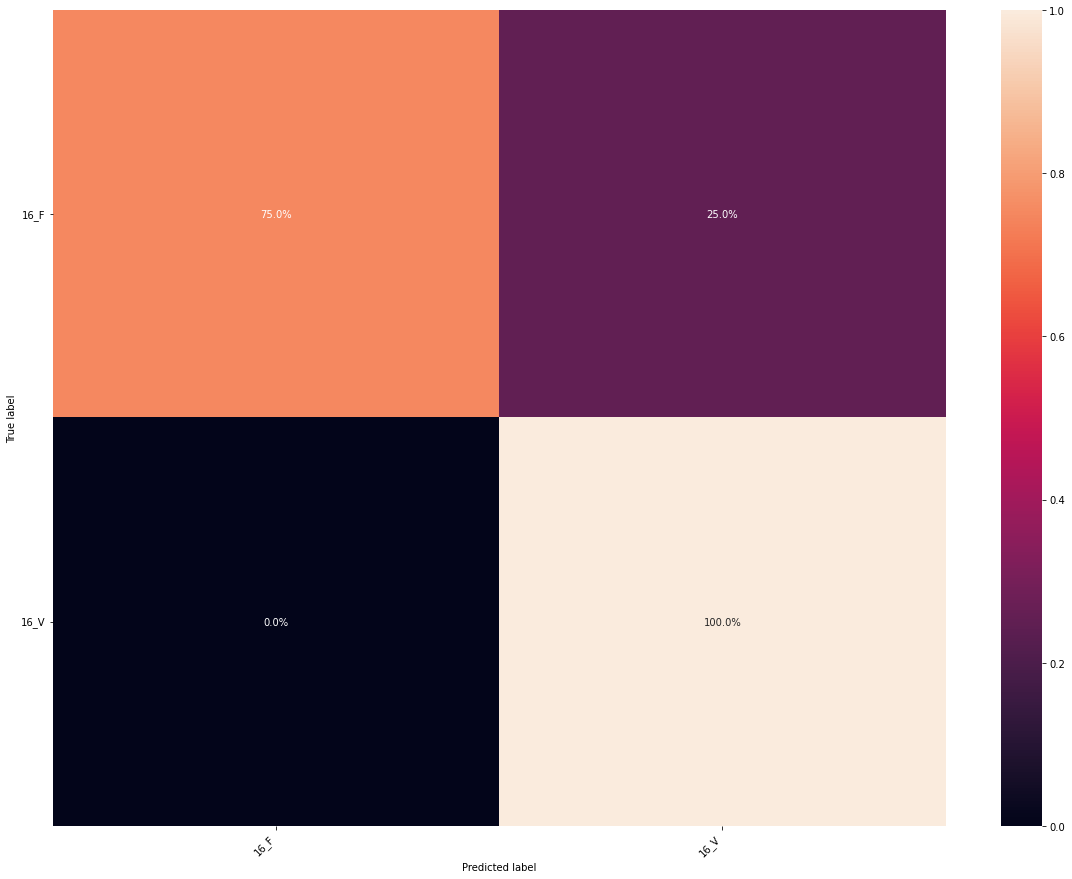


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 17
Score: 0.8333333333333334

[0.75 0.25]
[0. 1.]


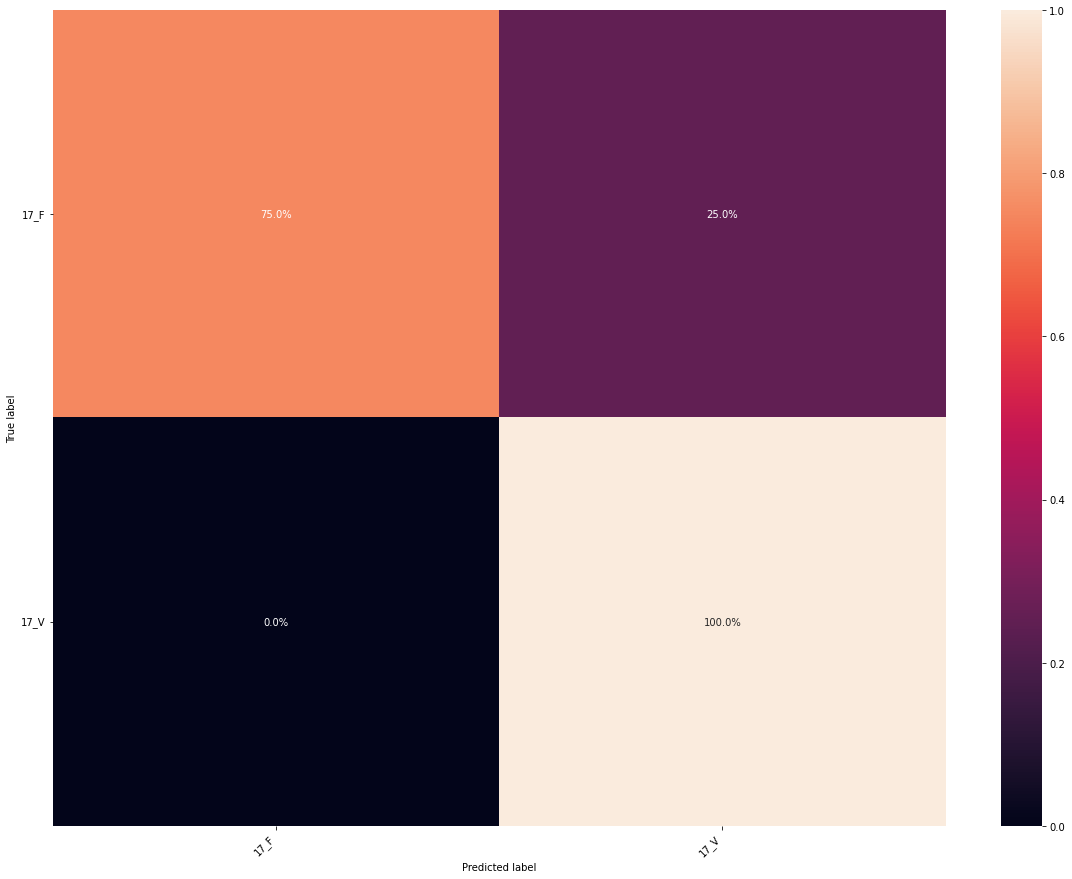


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 18
Score: 0.8333333333333334

[0.75 0.25]
[0. 1.]


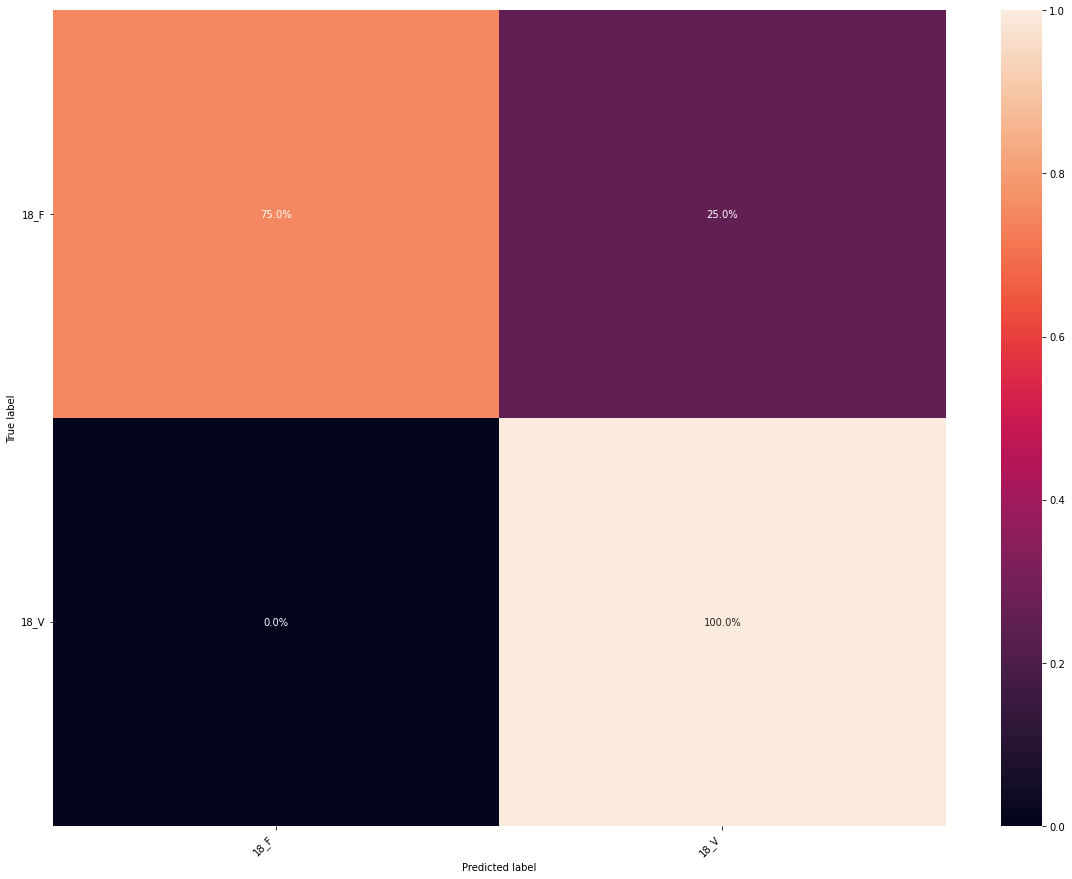


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 19
Score: 0.6666666666666666

[0.5 0.5]
[0. 1.]


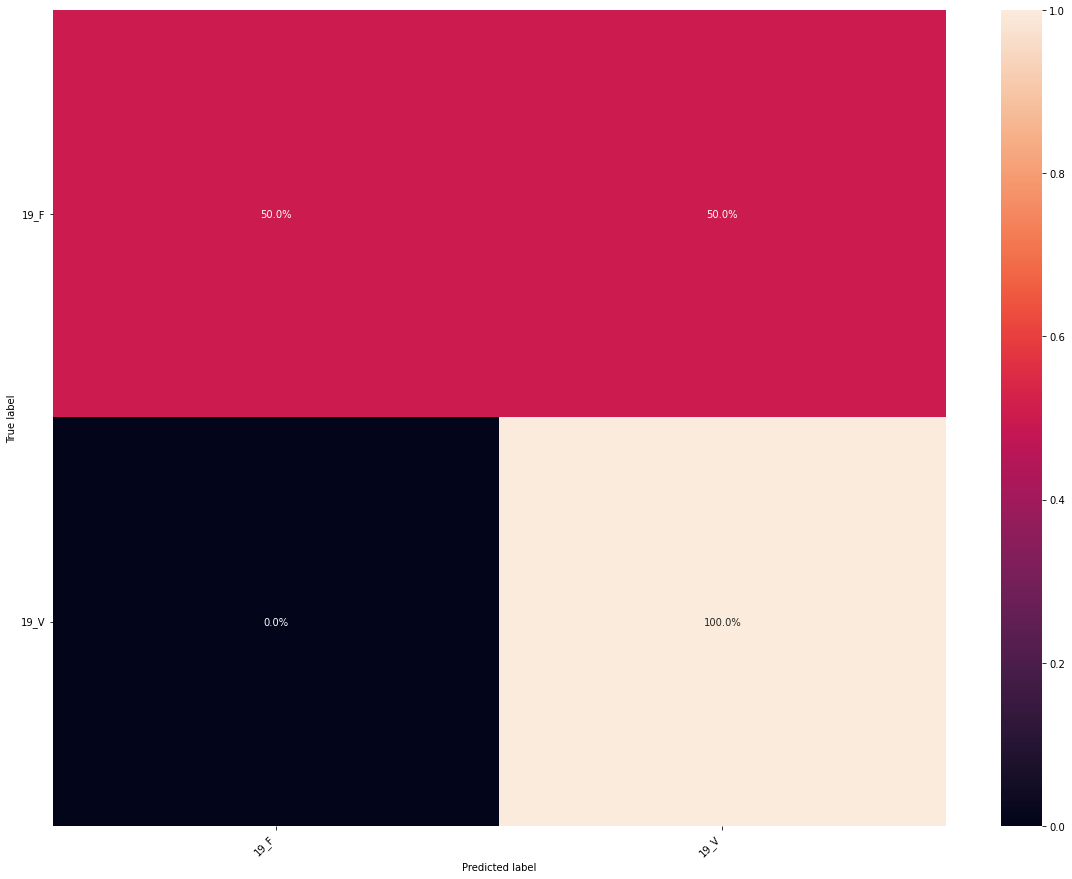


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 20
Score: 0.8333333333333334

[0.5 0.5]
[0. 1.]


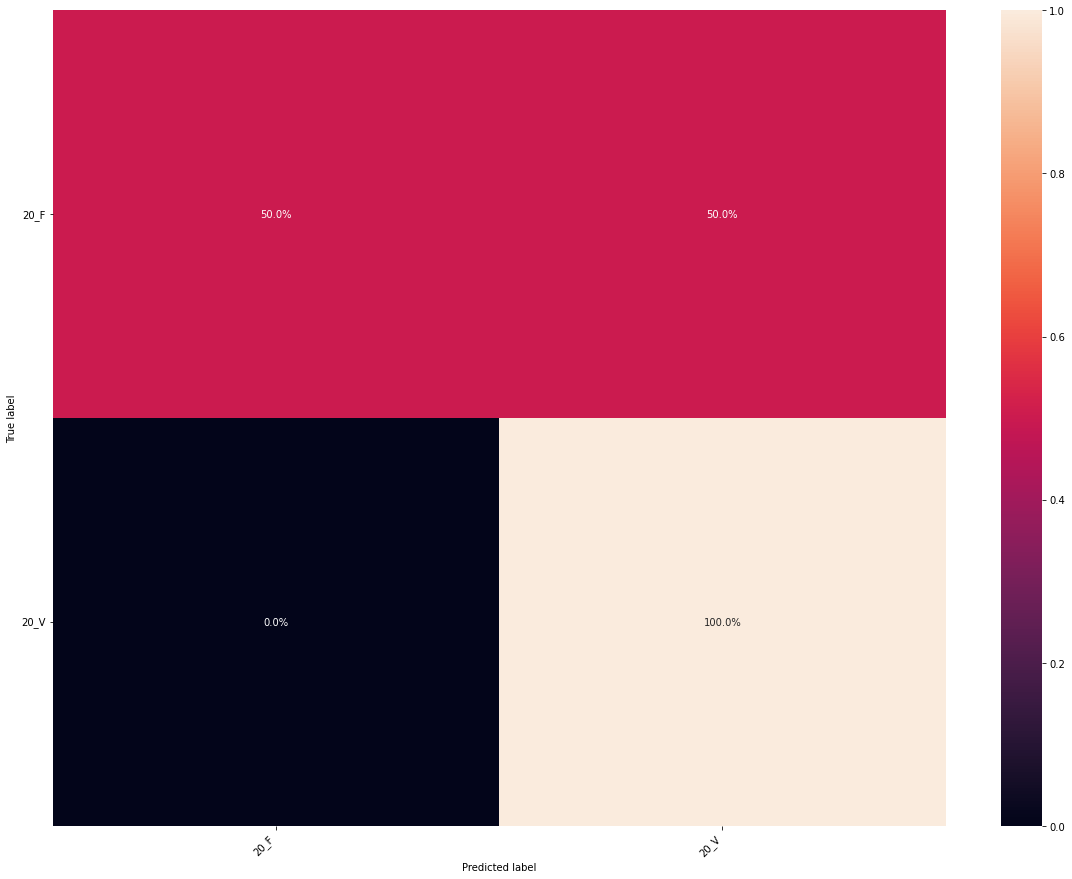


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 21
Score: 1.0

[1. 0.]
[0. 1.]


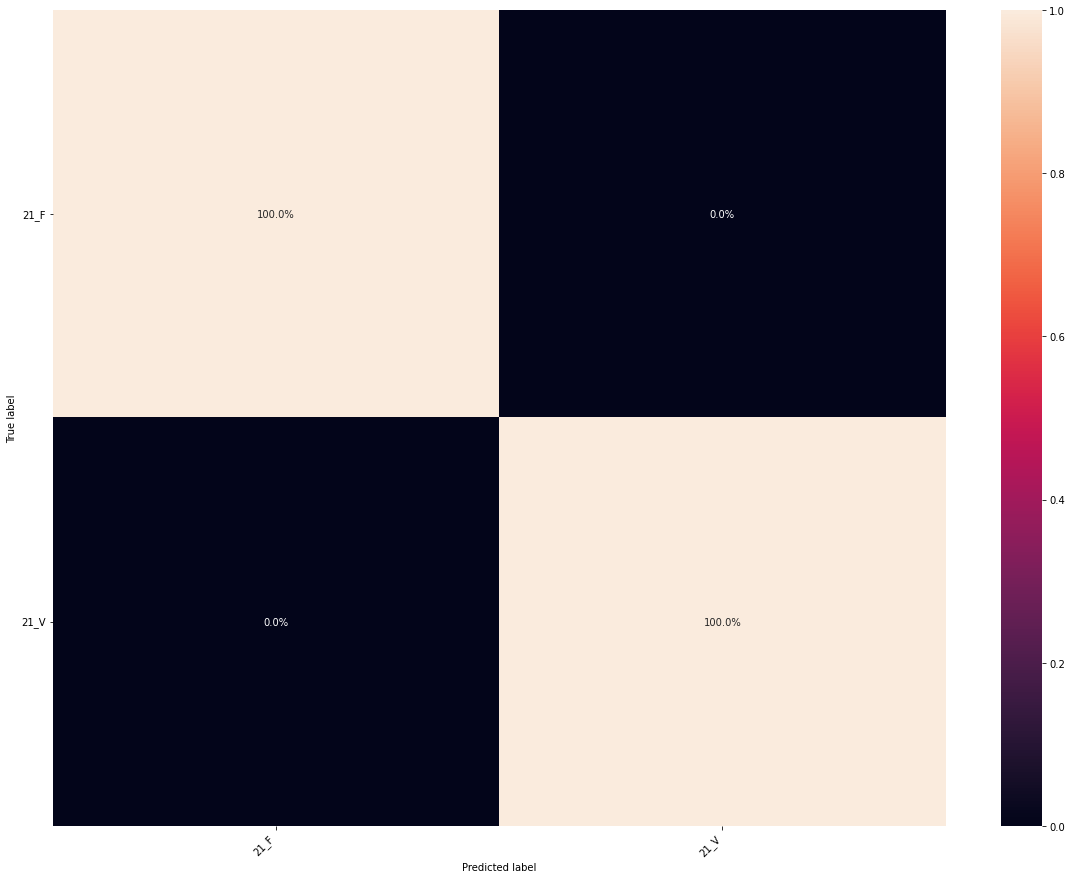


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 22
Score: 0.6666666666666666

[0.5 0.5]
[0. 1.]


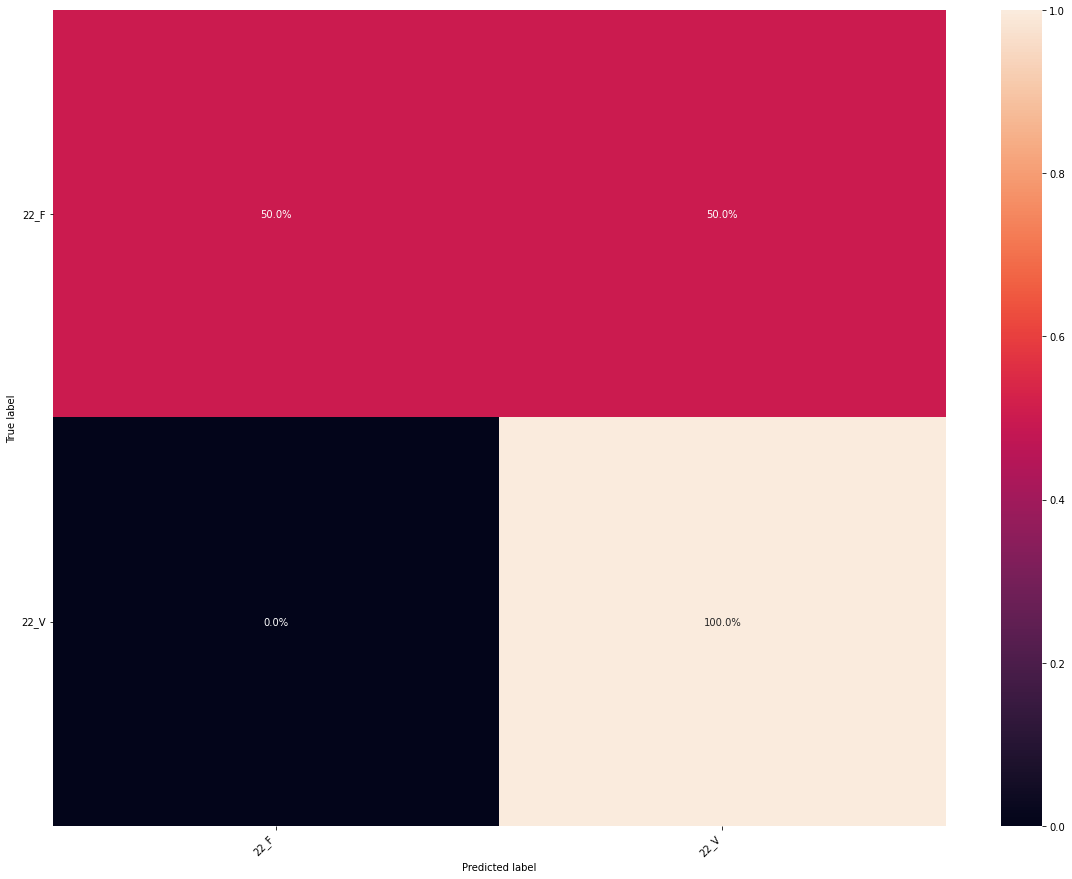


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 23
Score: 1.0

[1. 0.]
[0. 1.]


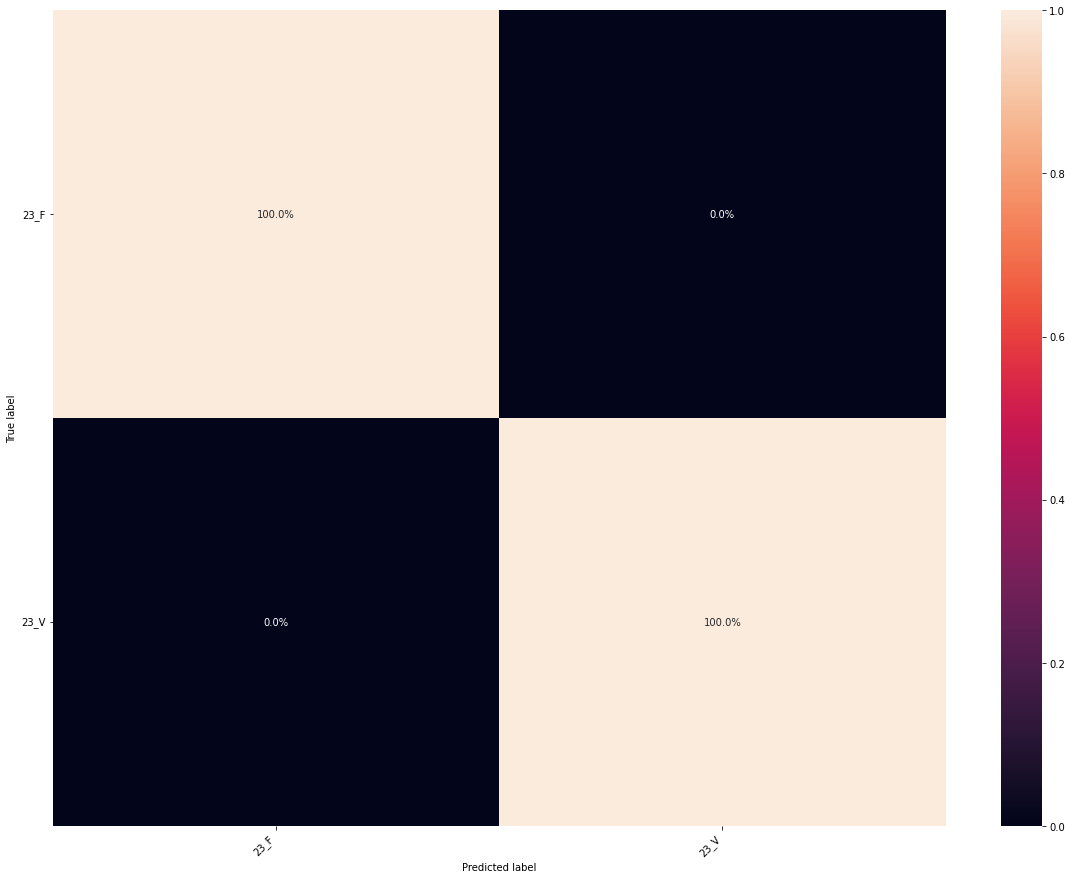


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 24
Score: 1.0

[1. 0.]
[0. 1.]


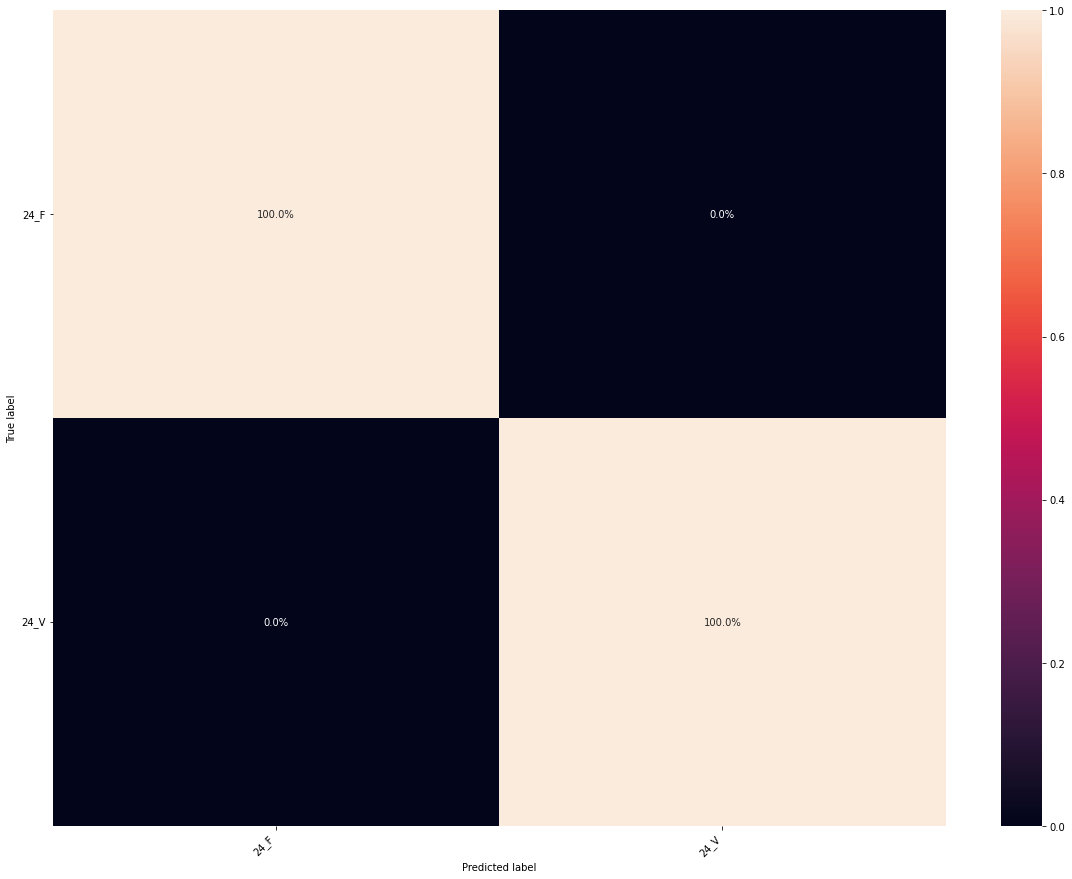


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 25
Score: 1.0

[1. 0.]
[0. 1.]


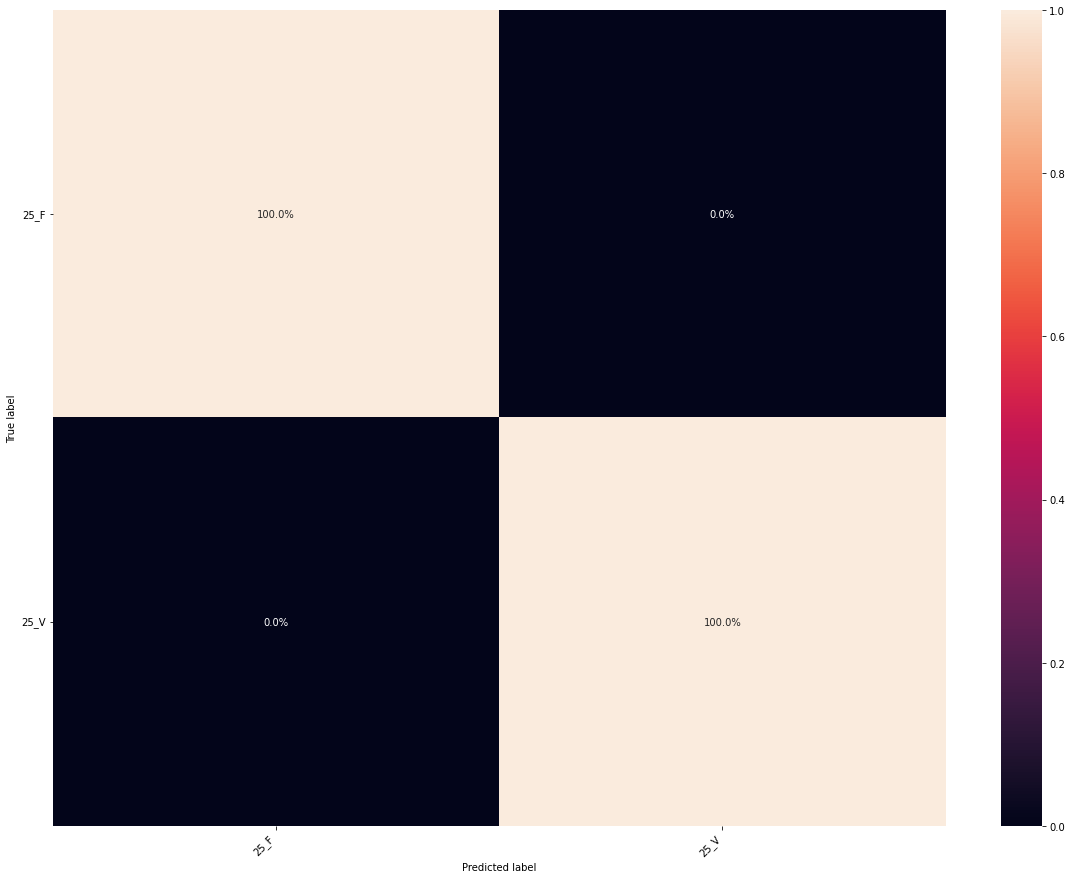


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 26
Score: 1.0

[1. 0.]
[0. 1.]


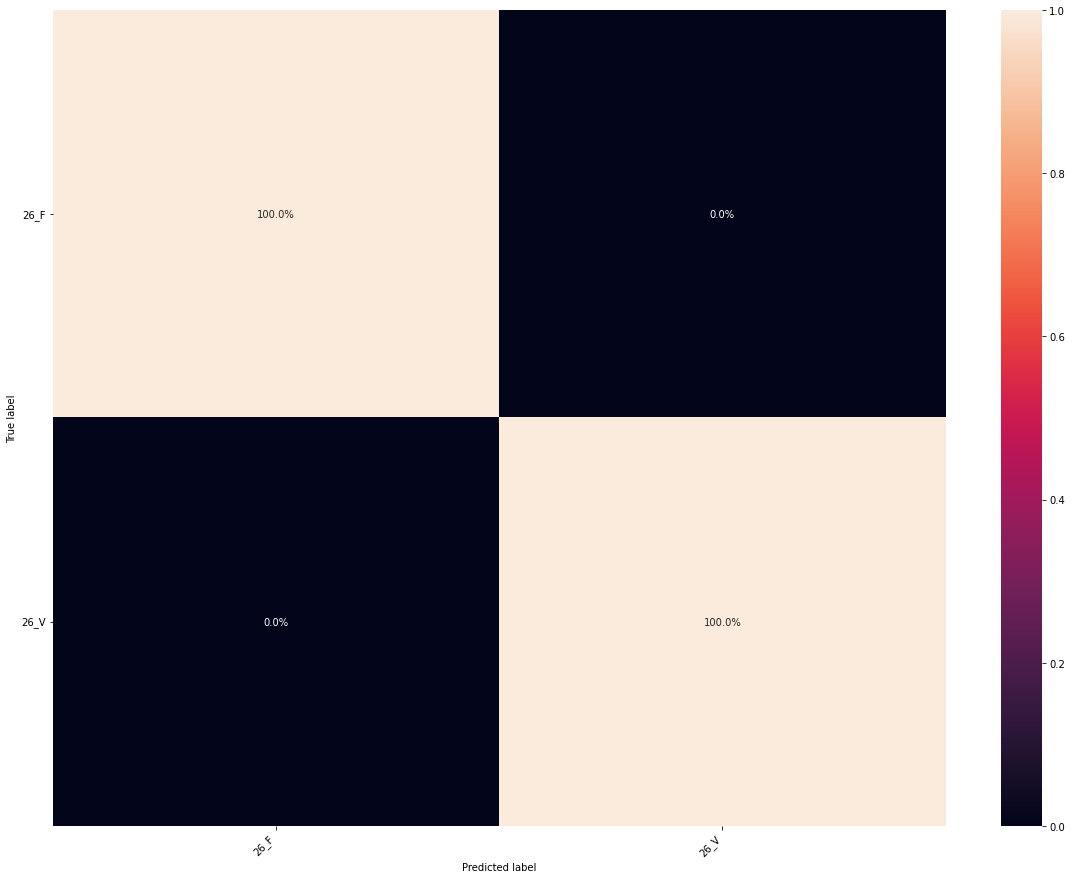


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 27
Score: 0.8333333333333334

[0.66666667 0.33333333]
[0. 1.]


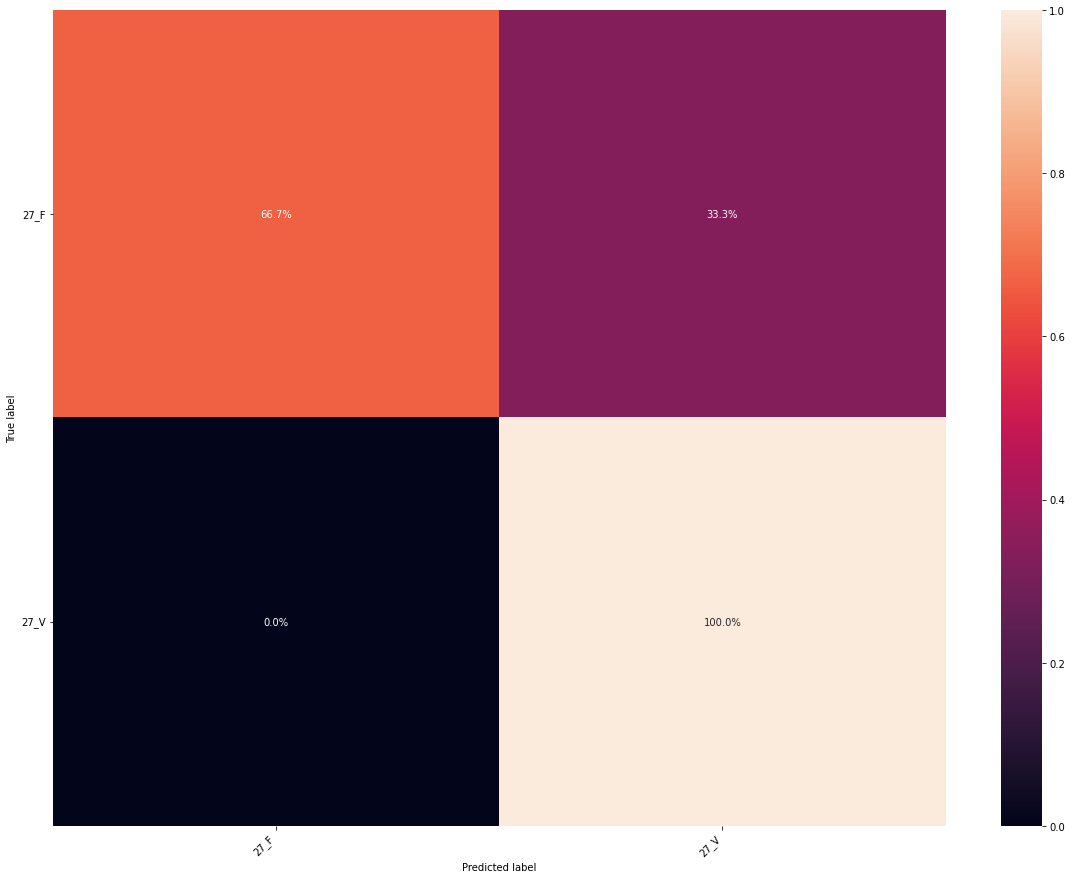


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 28
Score: 0.8333333333333334

[0.5 0.5]
[0. 1.]


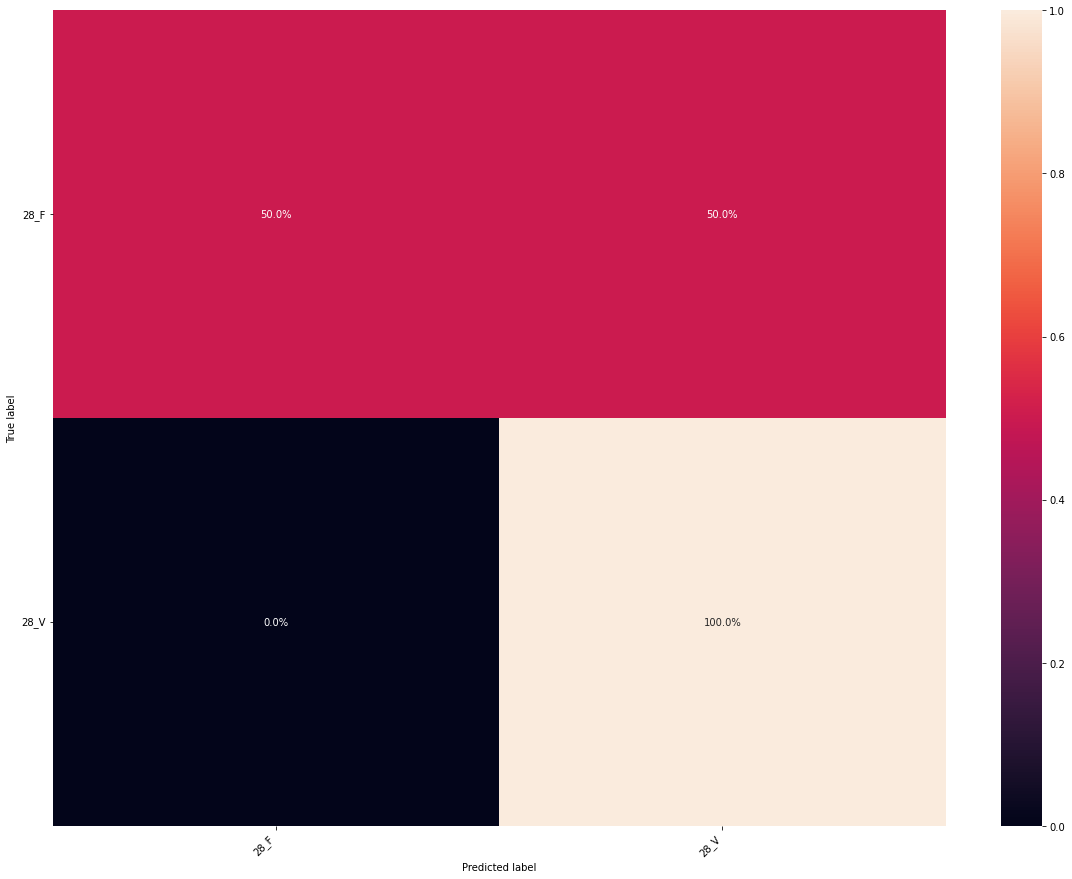


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 29
Score: 0.6666666666666666

[0.33333333 0.66666667]
[0. 1.]


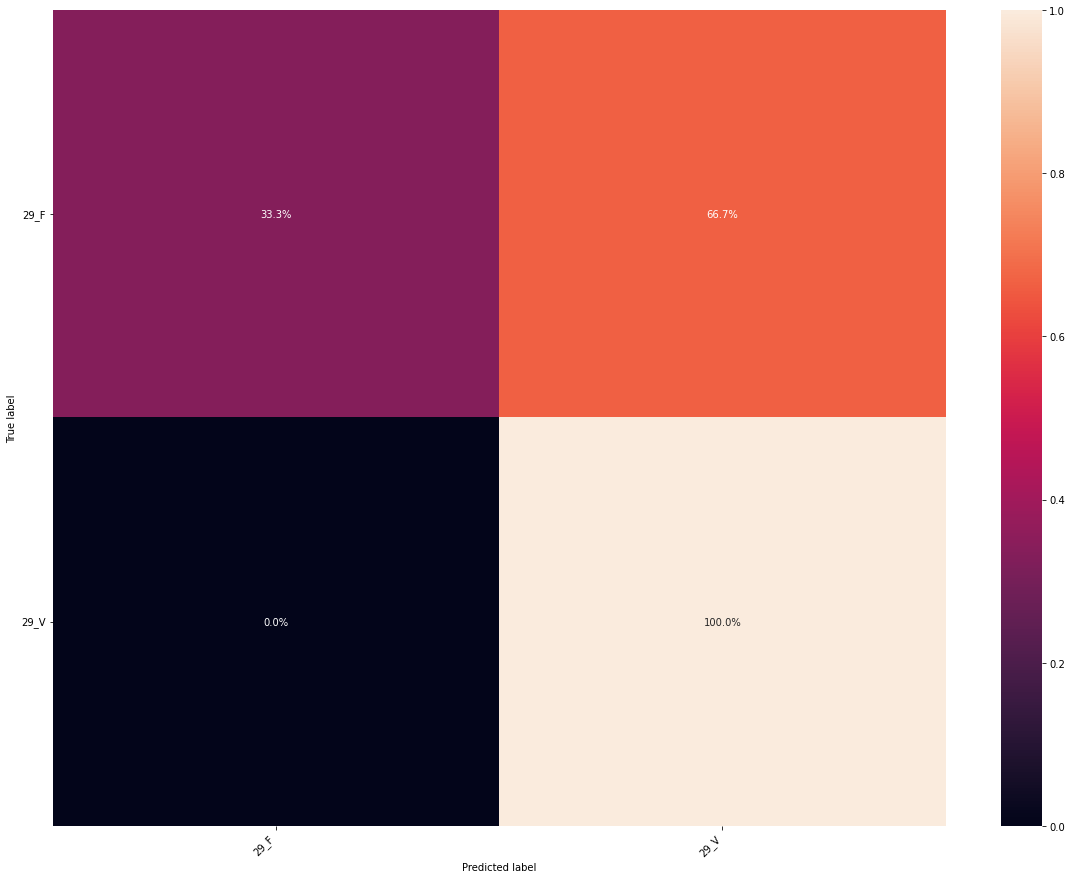


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 30
Score: 1.0

[1. 0.]
[0. 1.]


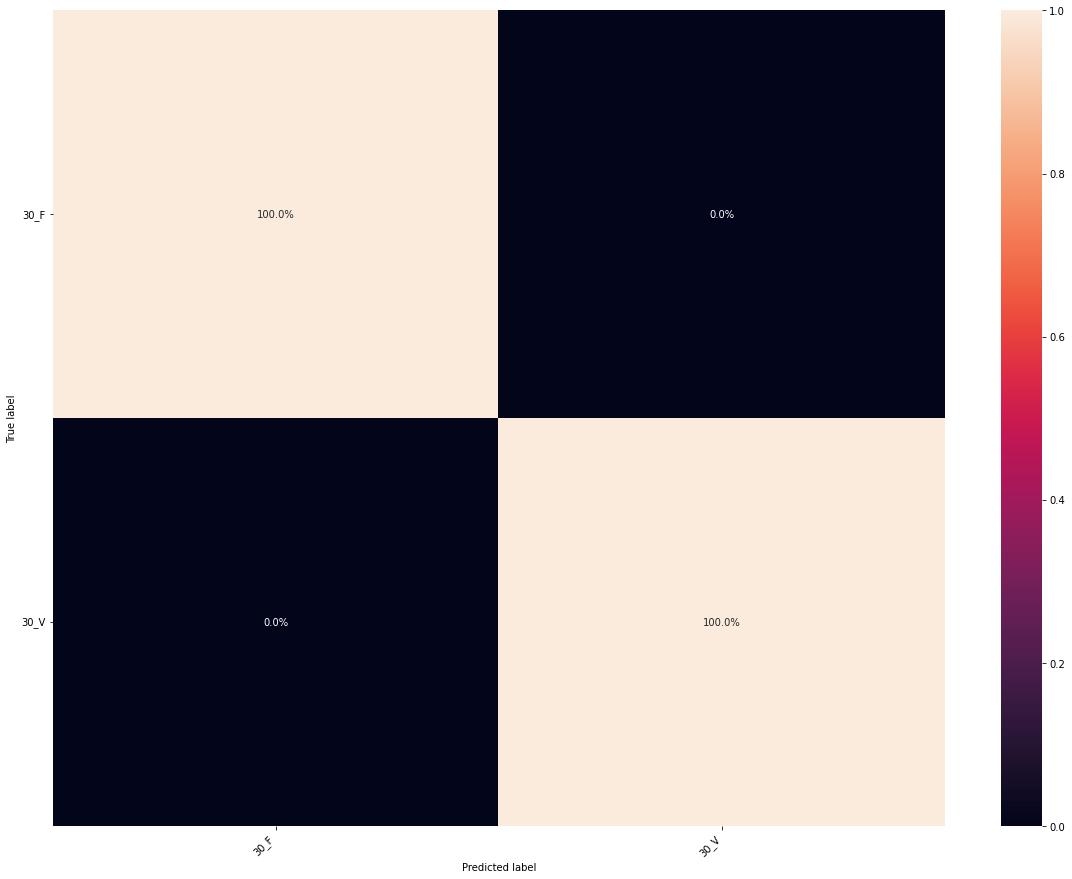


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 31
Score: 1.0

[1. 0.]
[0. 1.]


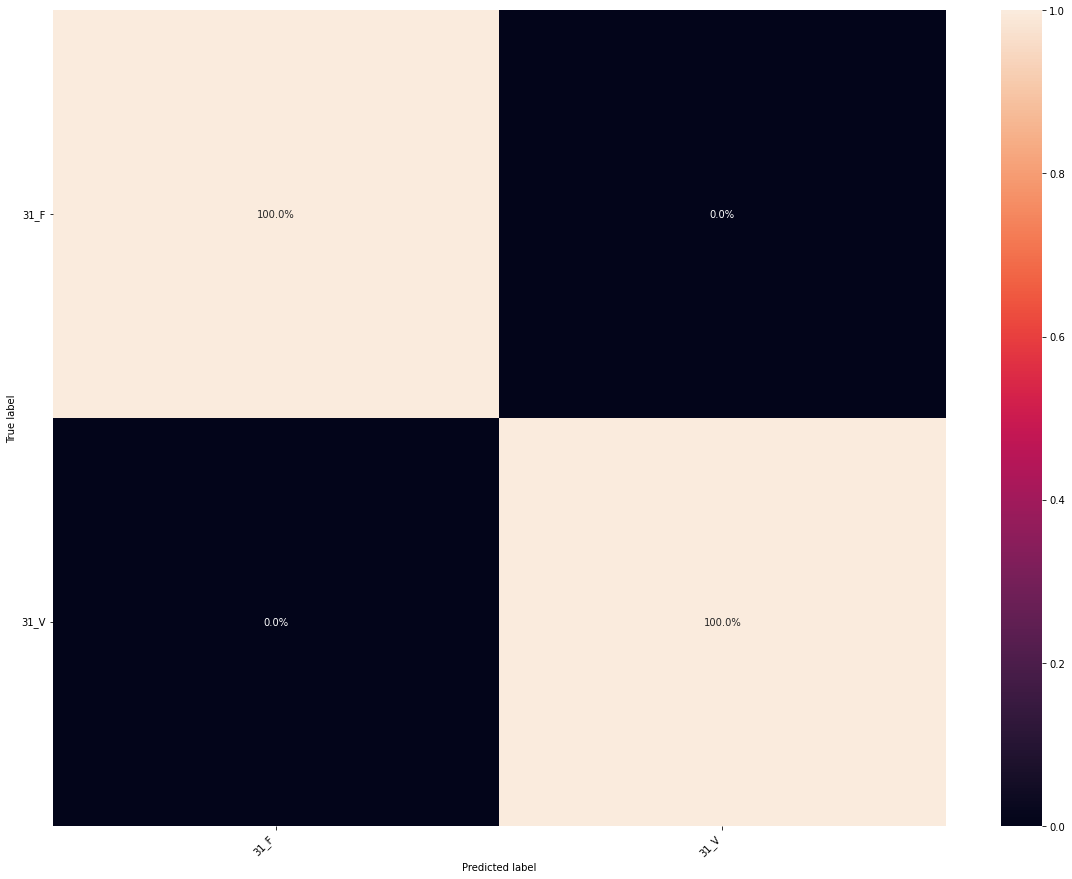


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 32
Score: 1.0

[1. 0.]
[0. 1.]


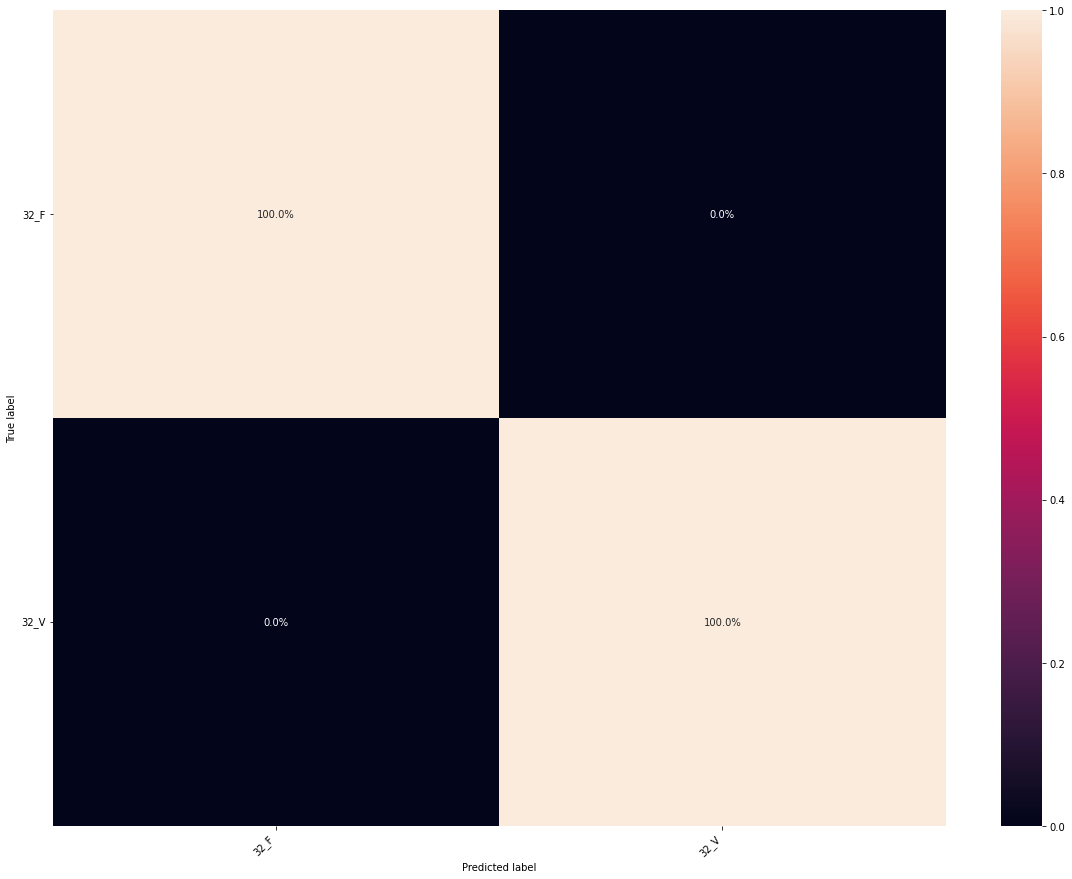


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 33
Score: 1.0

[1. 0.]
[0. 1.]


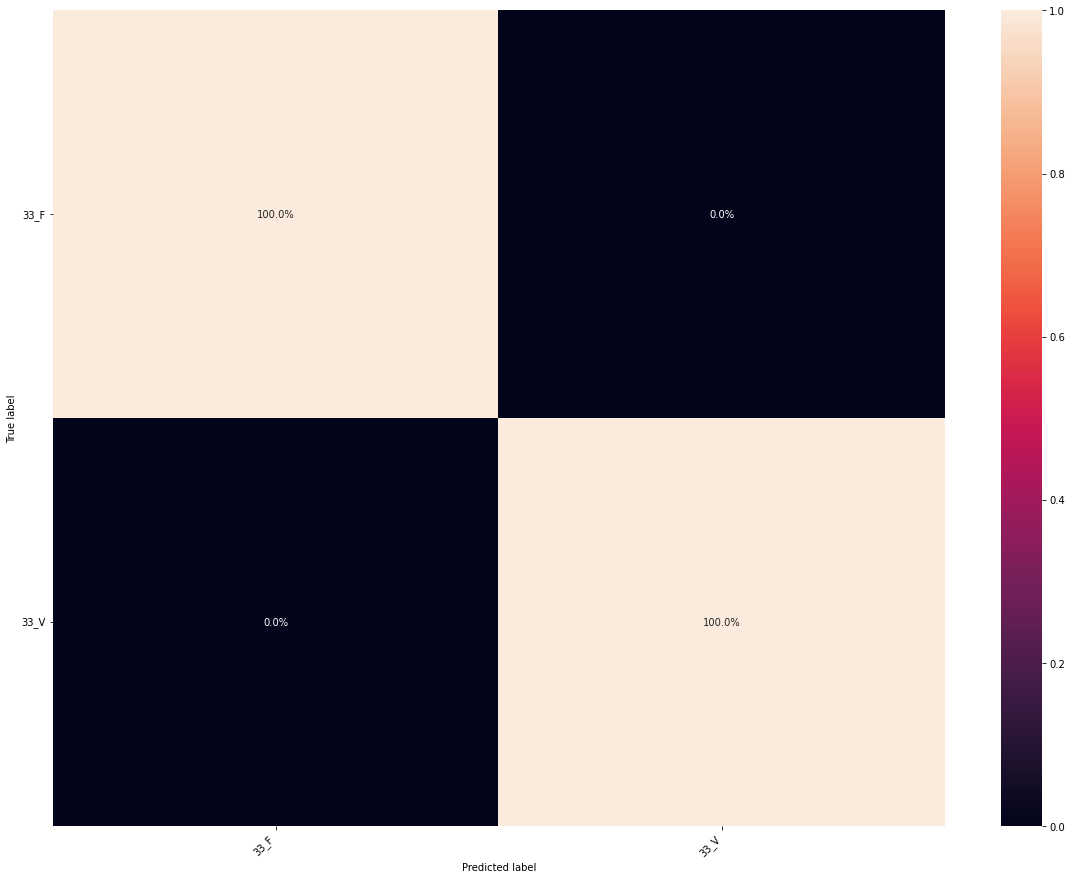


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 34
Score: 0.8333333333333334

[0.75 0.25]
[0. 1.]


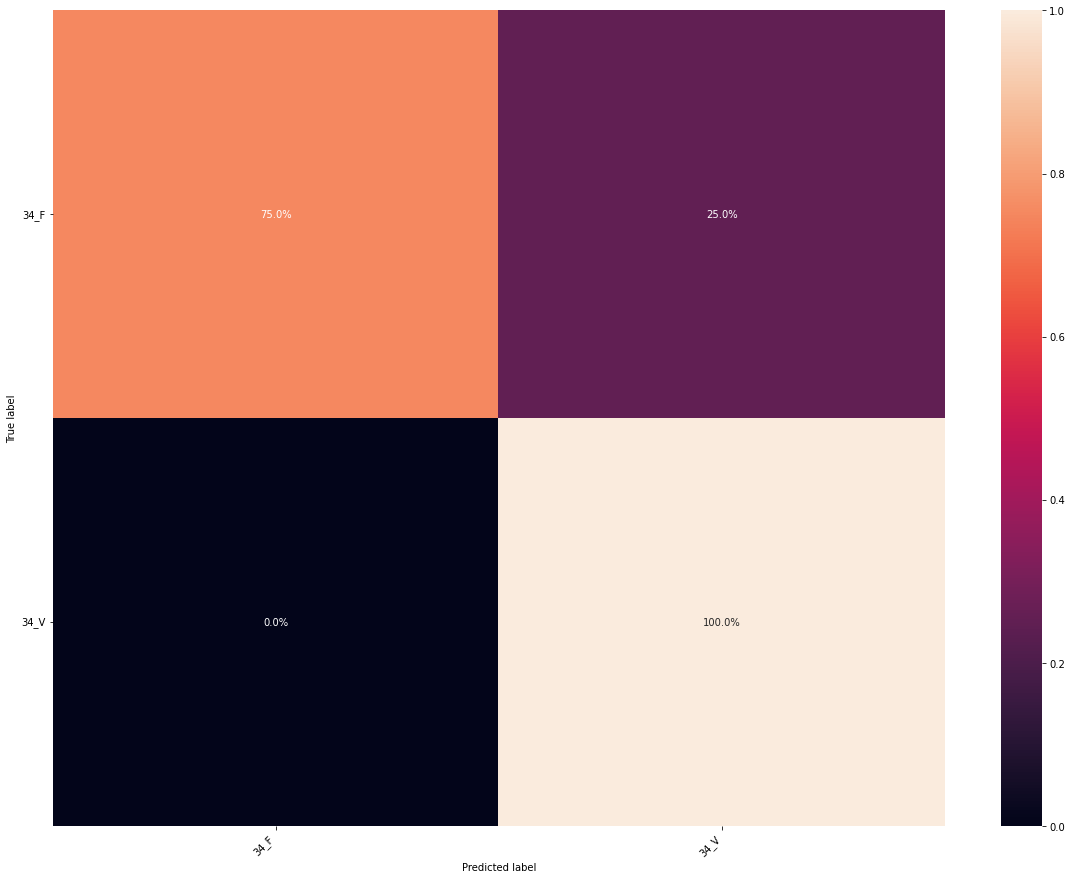


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 35
Score: 1.0

[1. 0.]
[0. 1.]


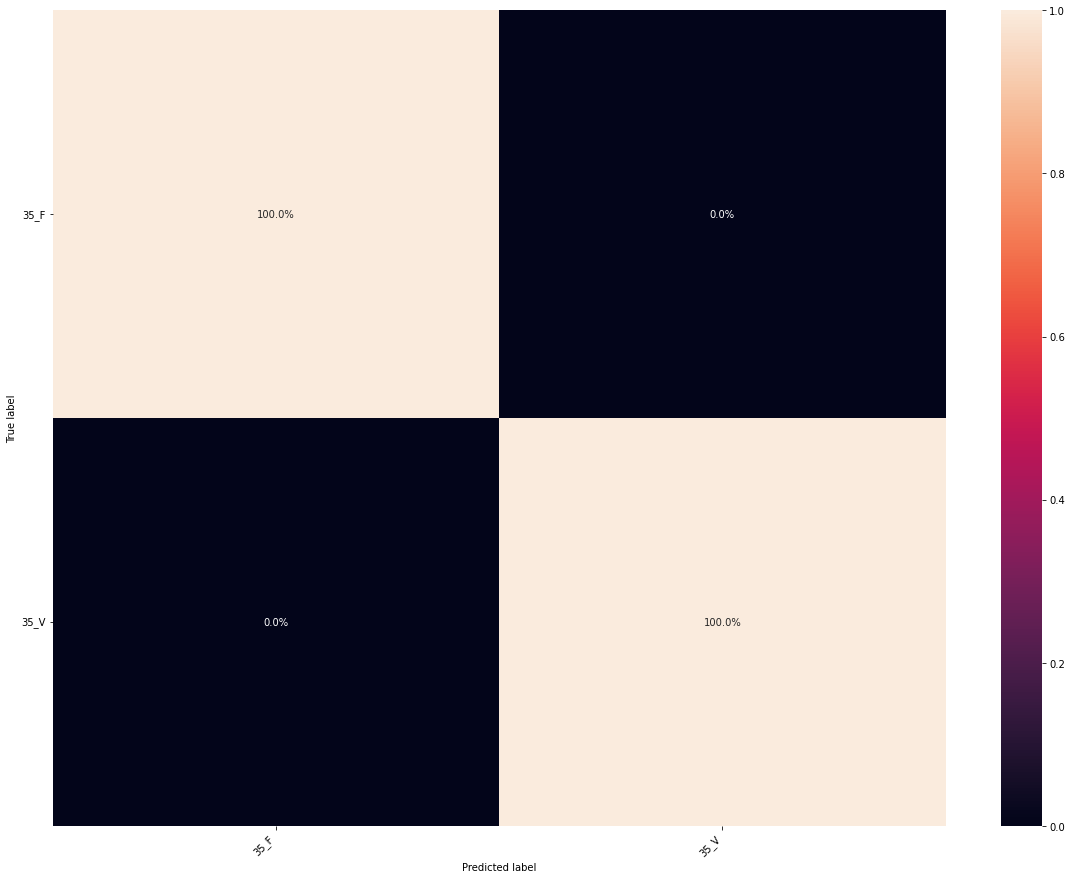


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 36
Score: 1.0

[1. 0.]
[0. 1.]


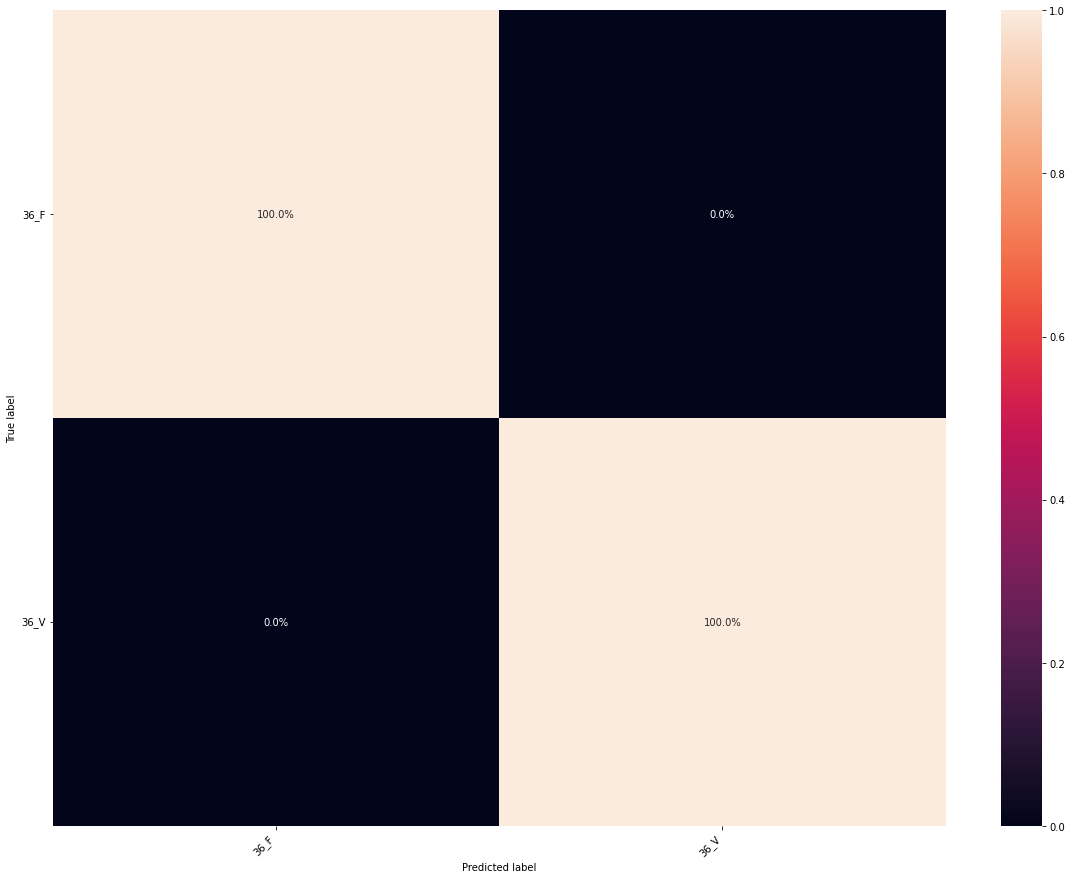


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 37
Score: 0.8333333333333334

[1. 0.]
[0.25 0.75]


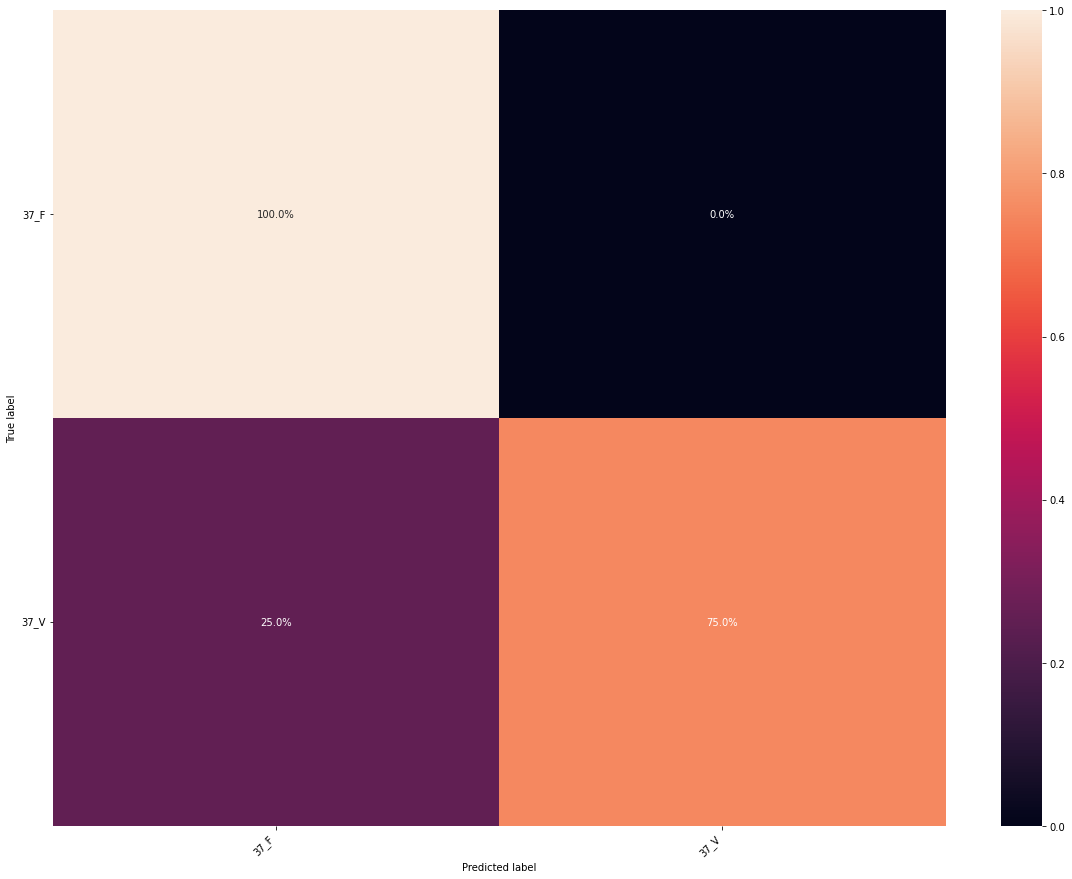


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 38
Score: 1.0

[1. 0.]
[0. 1.]


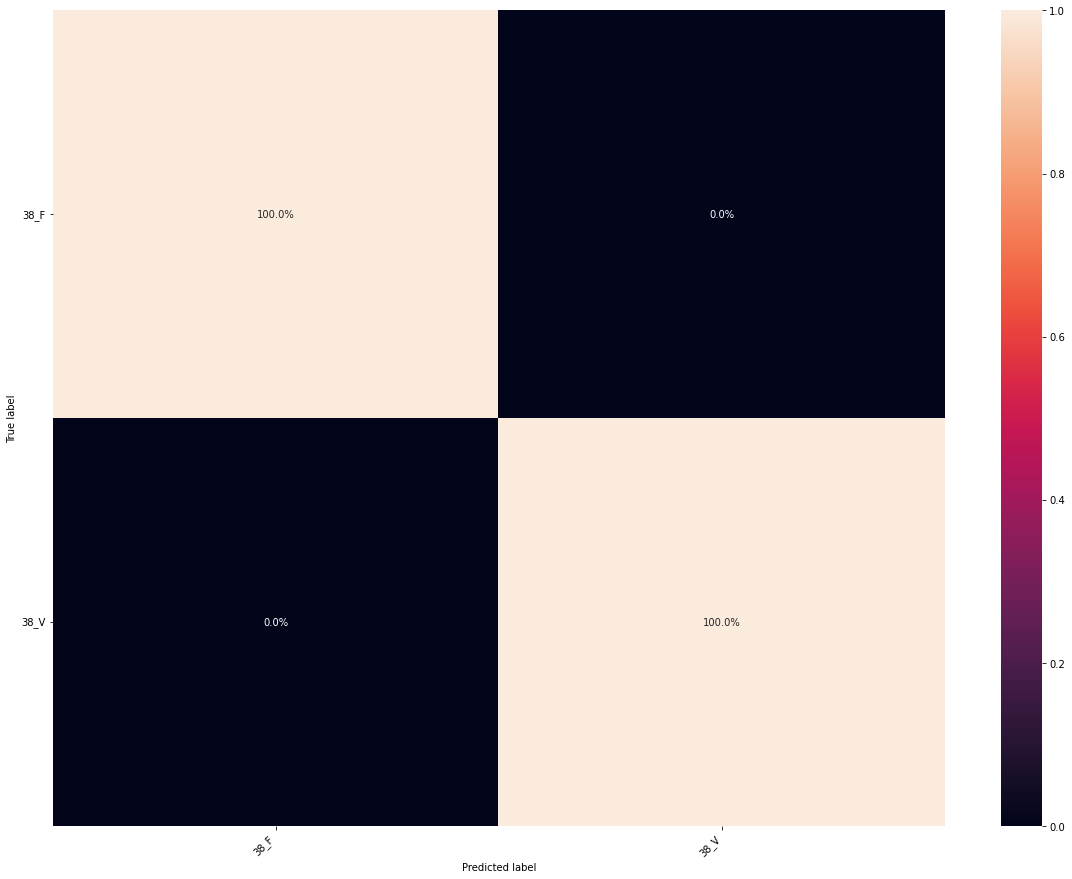


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 39
Score: 1.0

[1. 0.]
[0. 1.]


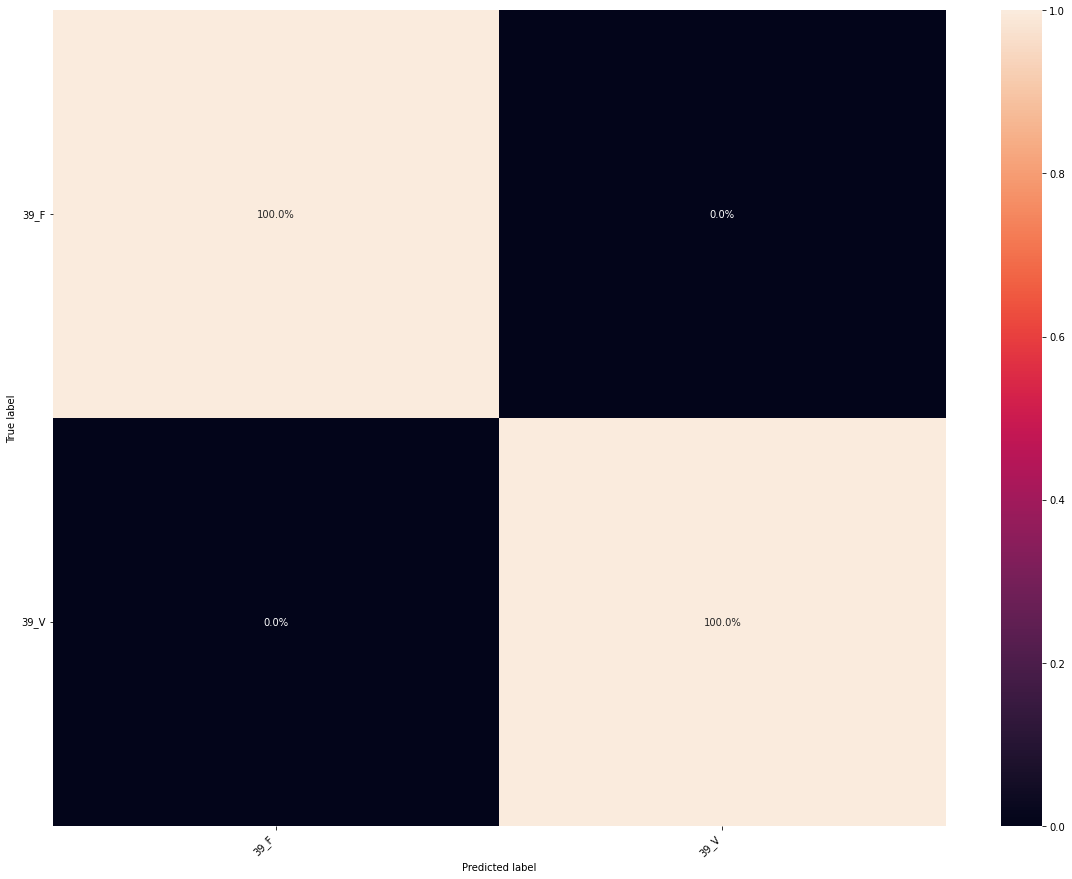


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 40
Score: 1.0

[1. 0.]
[0. 1.]


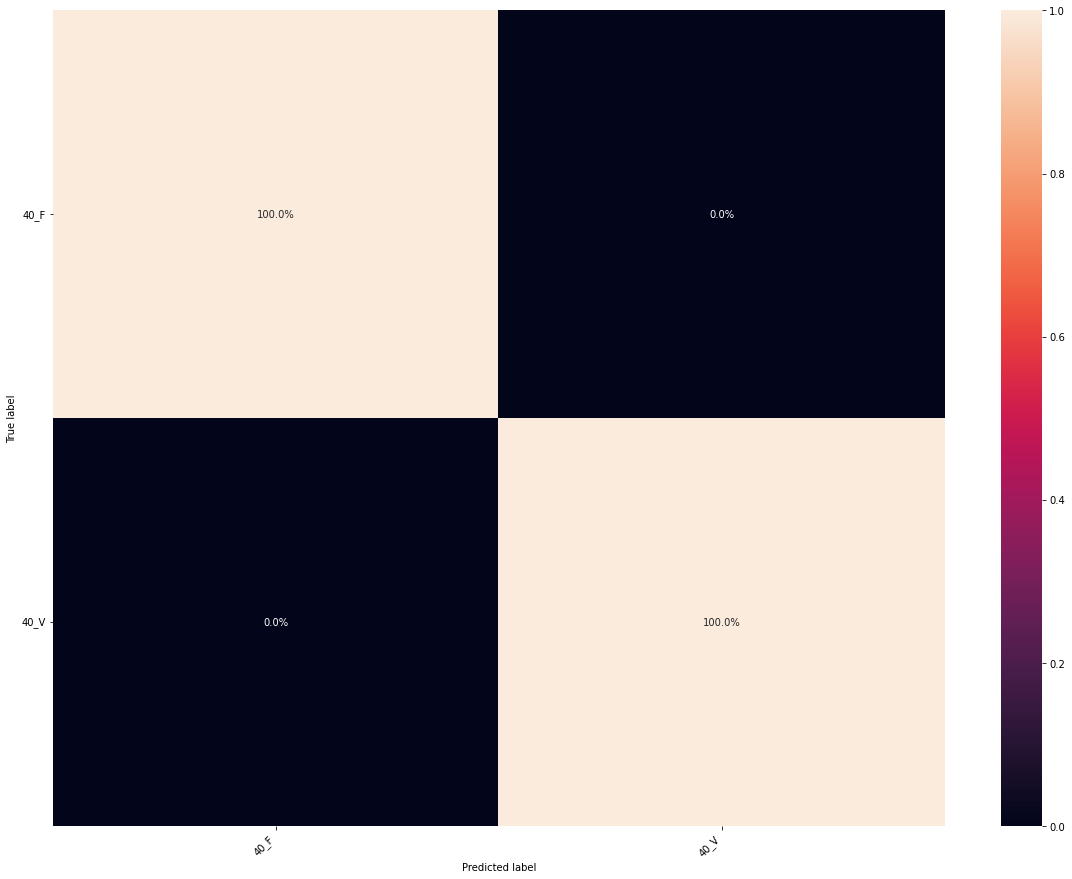


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 41
Score: 1.0

[1. 0.]
[0. 1.]


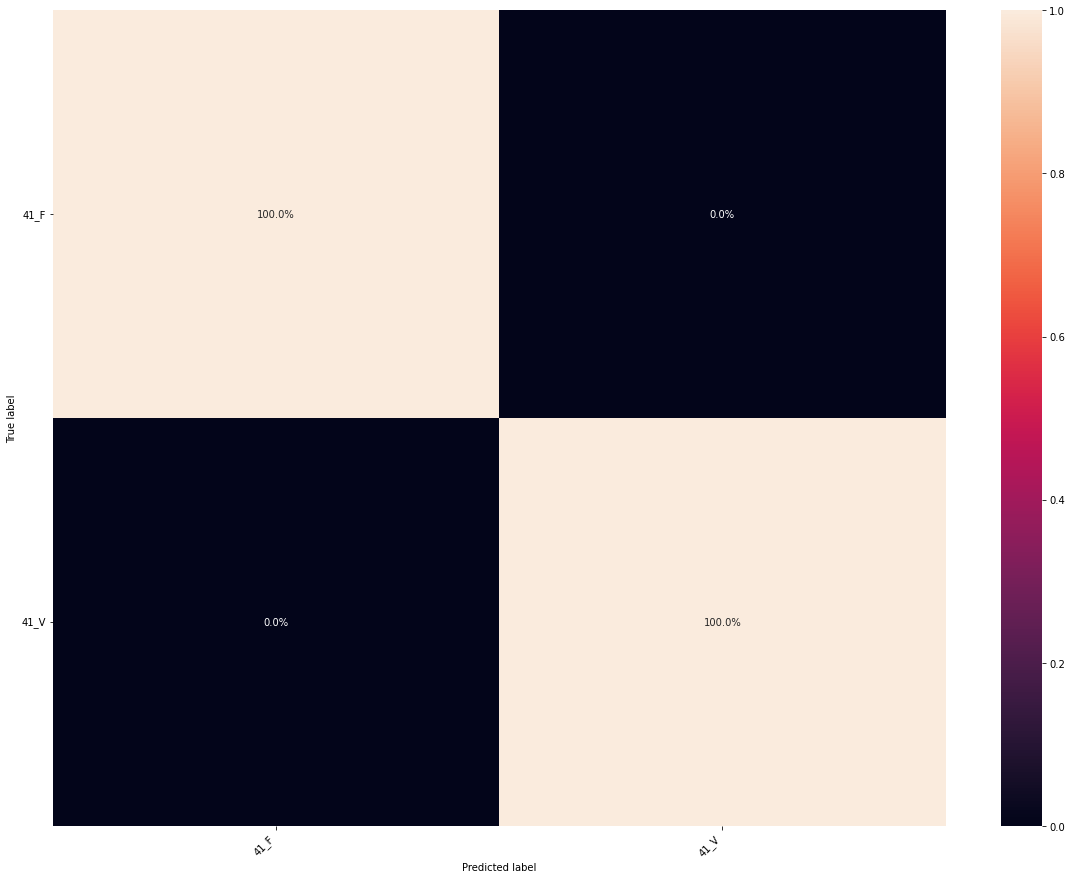


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 42
Score: 1.0

[1. 0.]
[0. 1.]


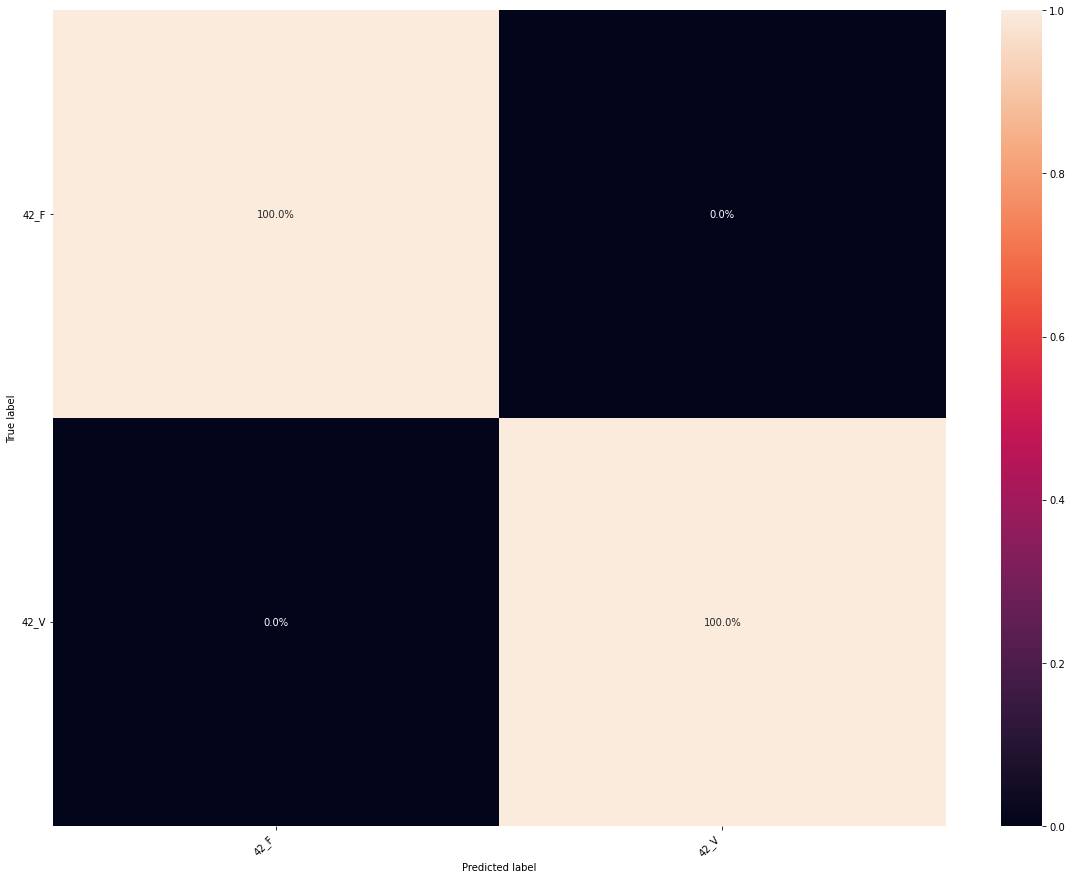


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 43
Score: 1.0

[1. 0.]
[0. 1.]


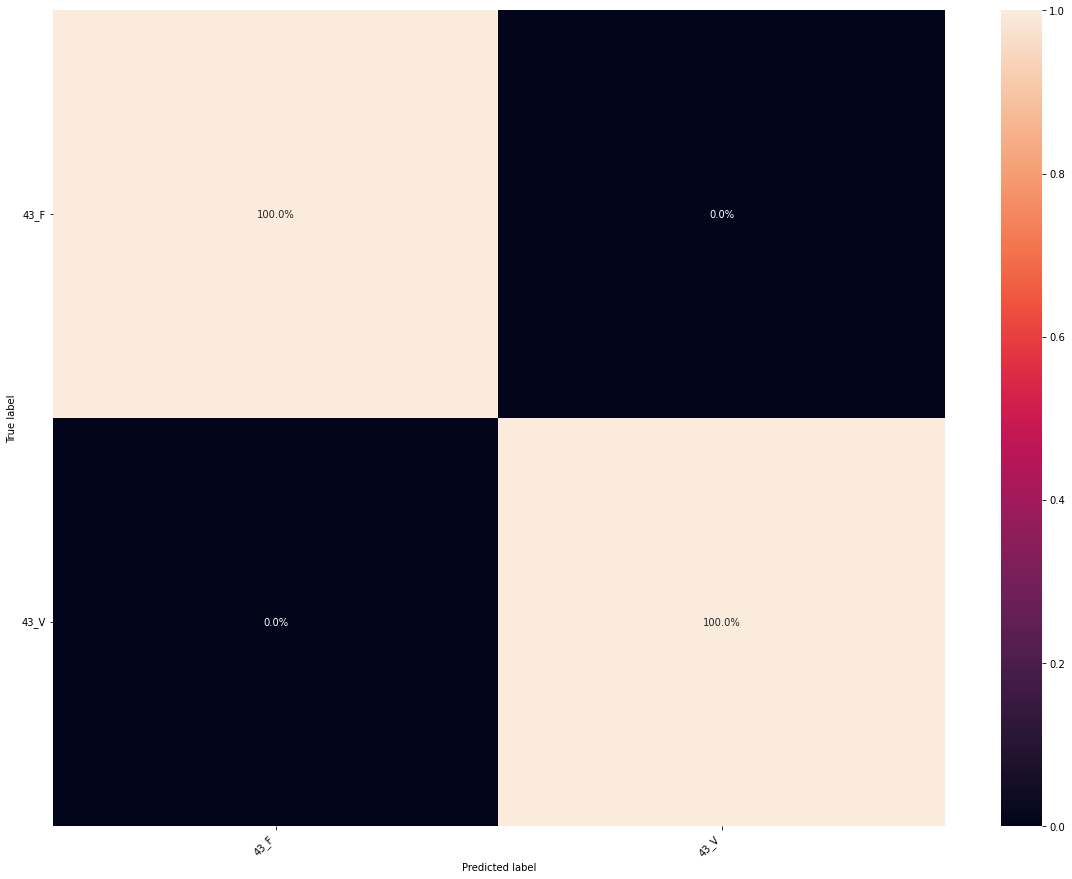


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 44
Score: 0.8333333333333334

[0.75 0.25]
[0. 1.]


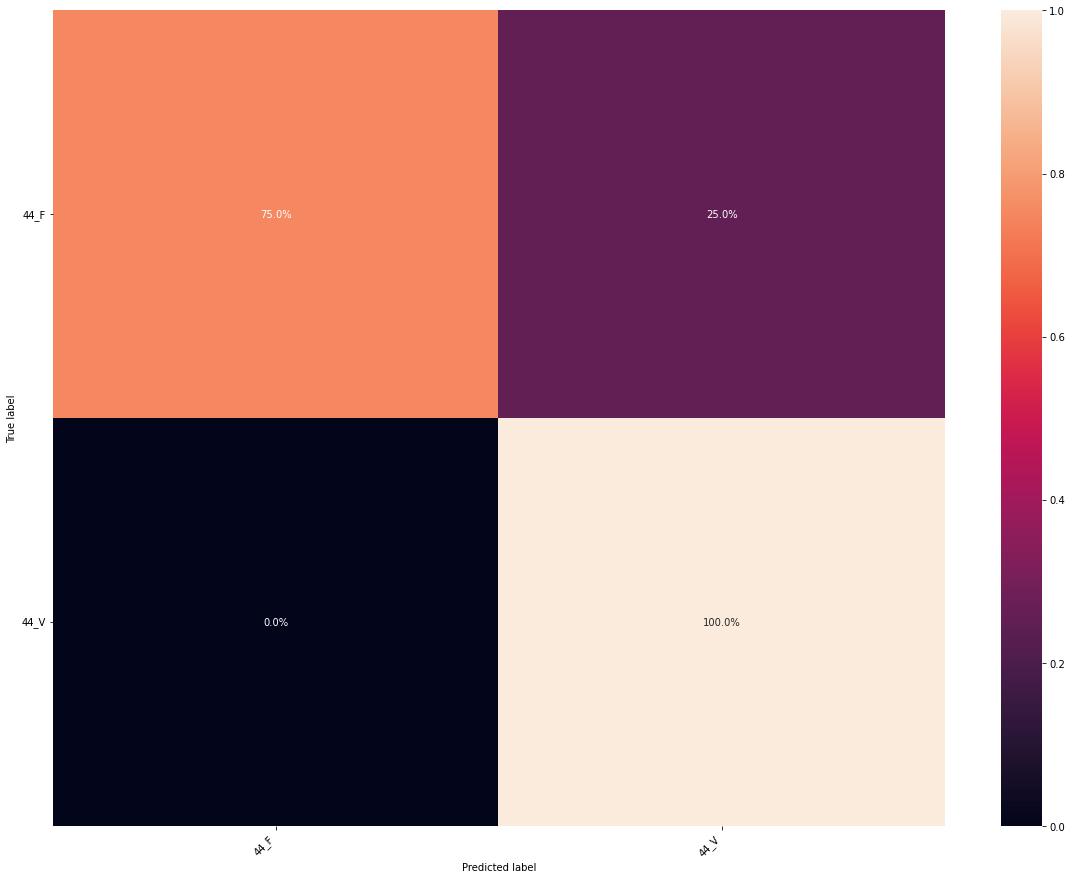


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 45
Score: 0.5

[0.25 0.75]
[0. 1.]


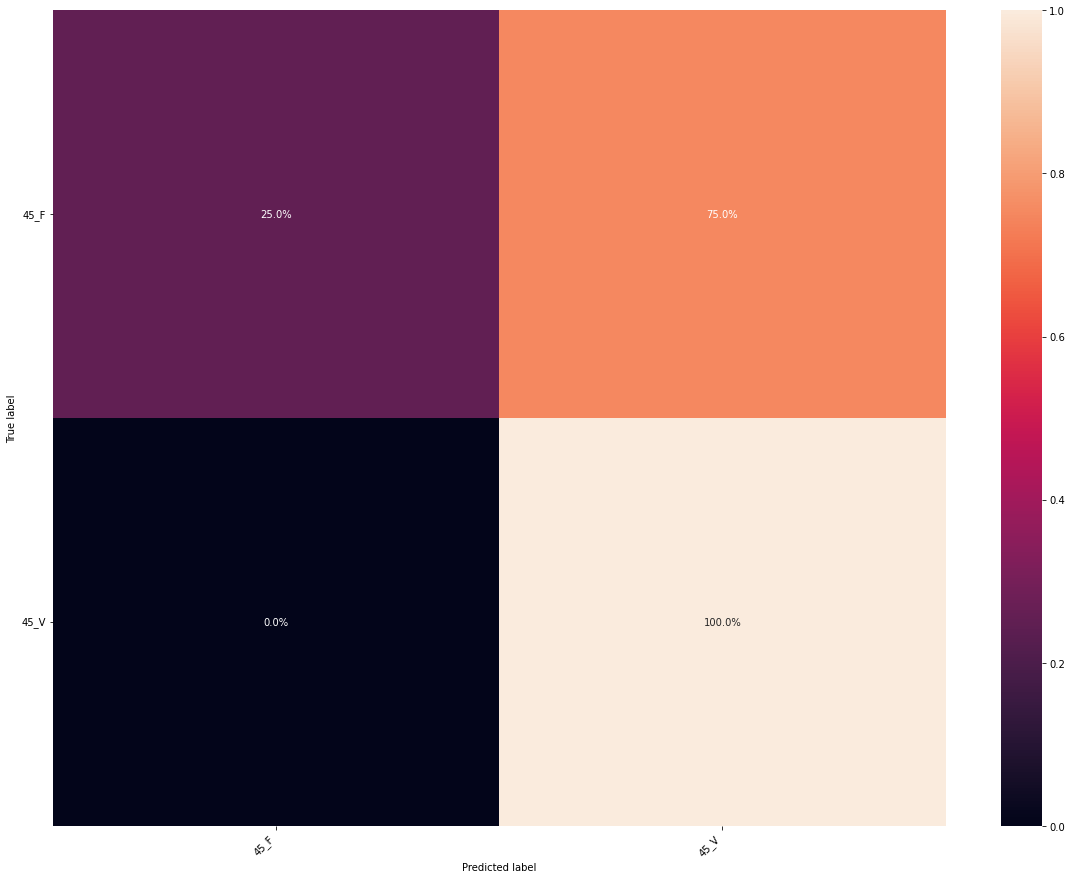


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 46
Score: 1.0

[1. 0.]
[0. 1.]


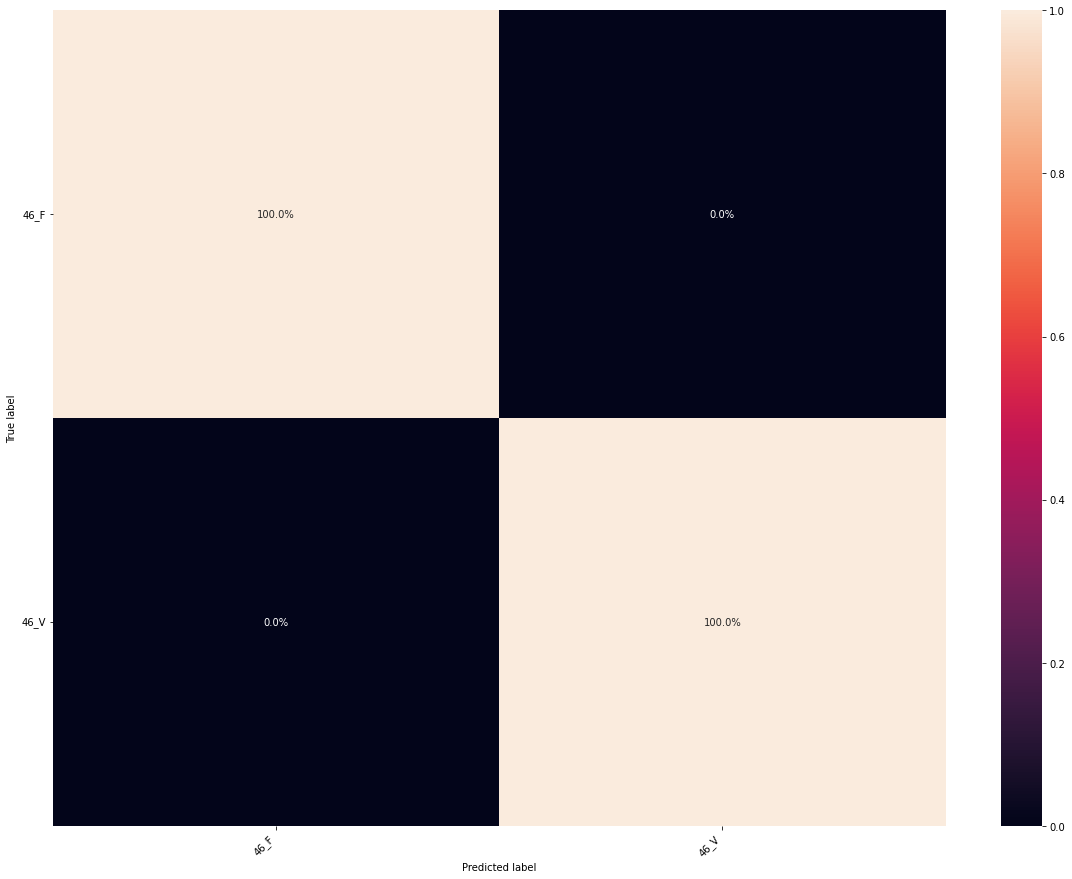


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 47
Score: 0.5

[0.25 0.75]
[0. 1.]


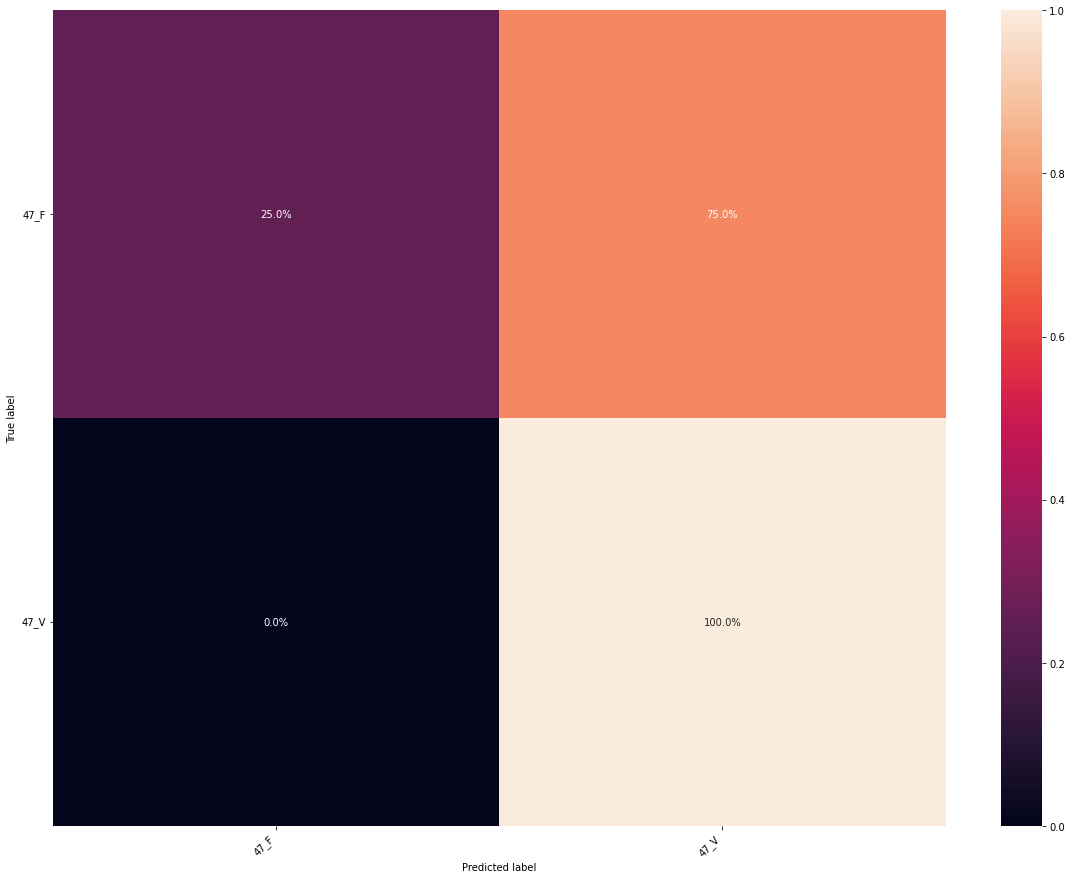


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 48
Score: 0.8333333333333334

[1. 0.]
[0.33333333 0.66666667]


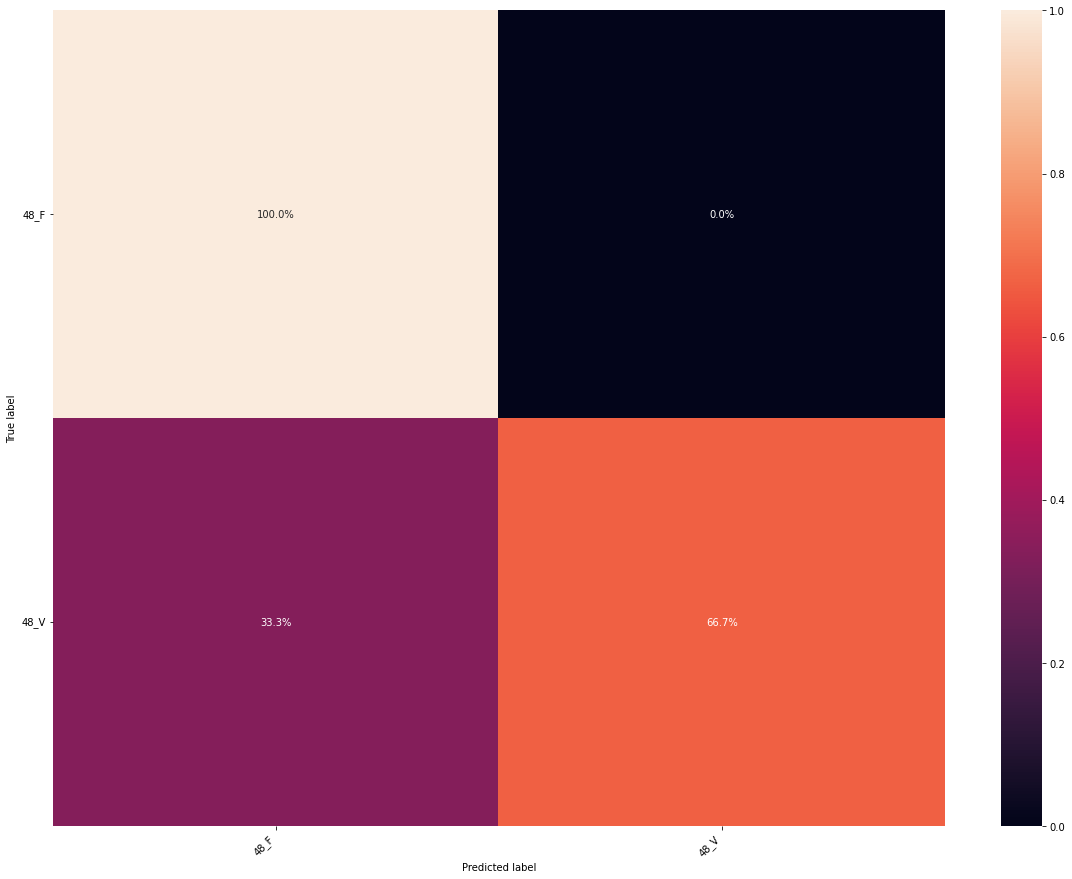


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 49
Score: 1.0

[1. 0.]
[0. 1.]


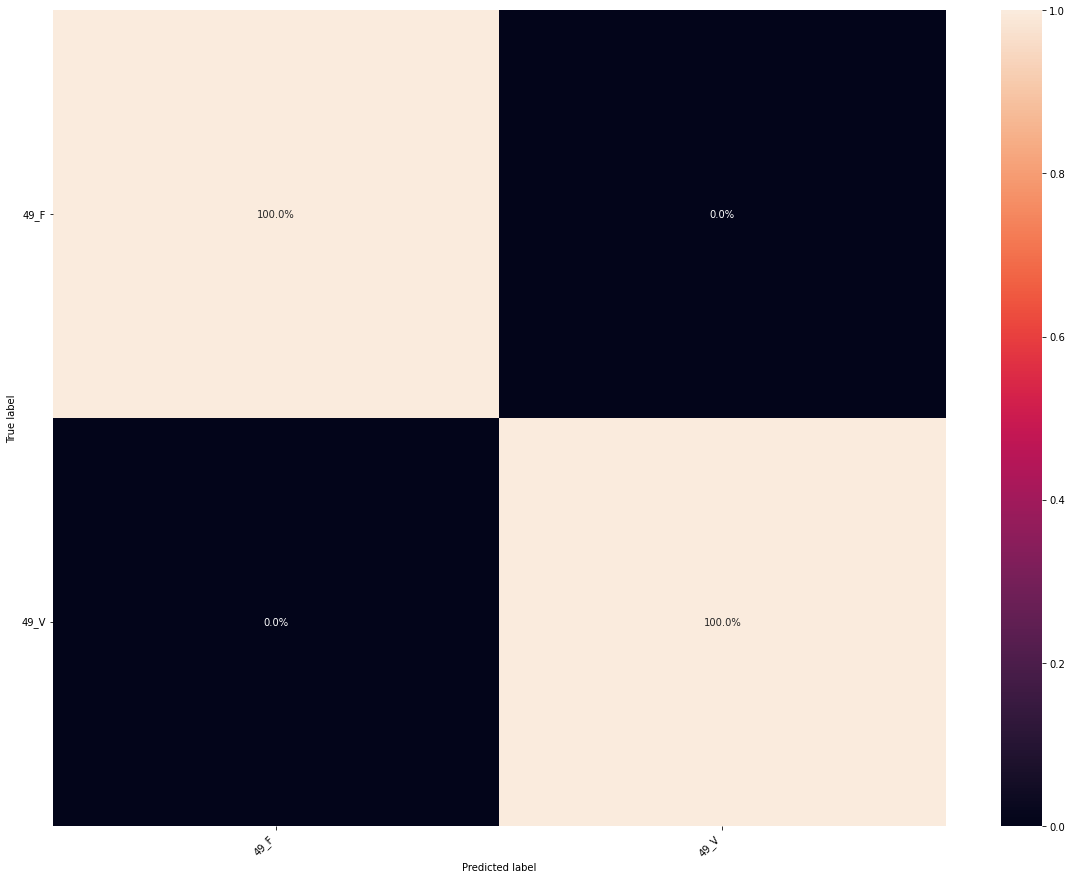


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 50
Score: 0.8333333333333334

[0.66666667 0.33333333]
[0. 1.]


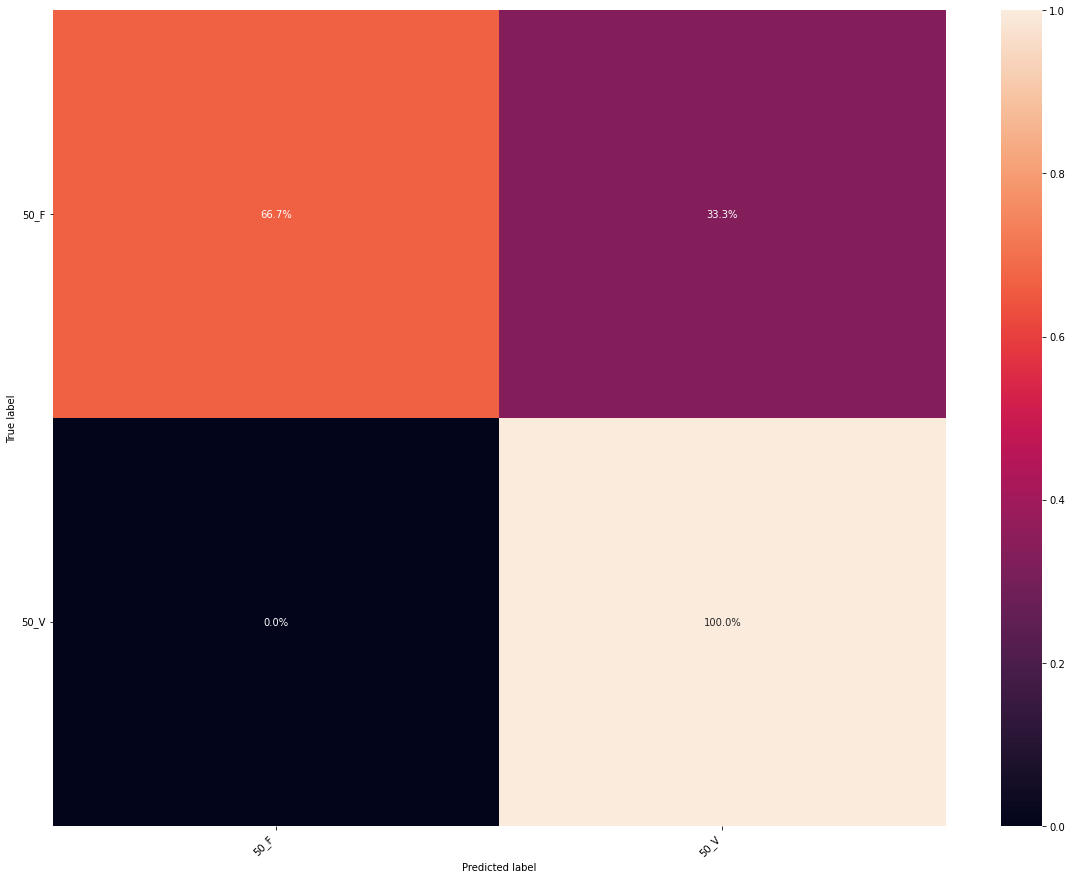


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 51
Score: 0.6666666666666666

[1. 0.]
[0.5 0.5]


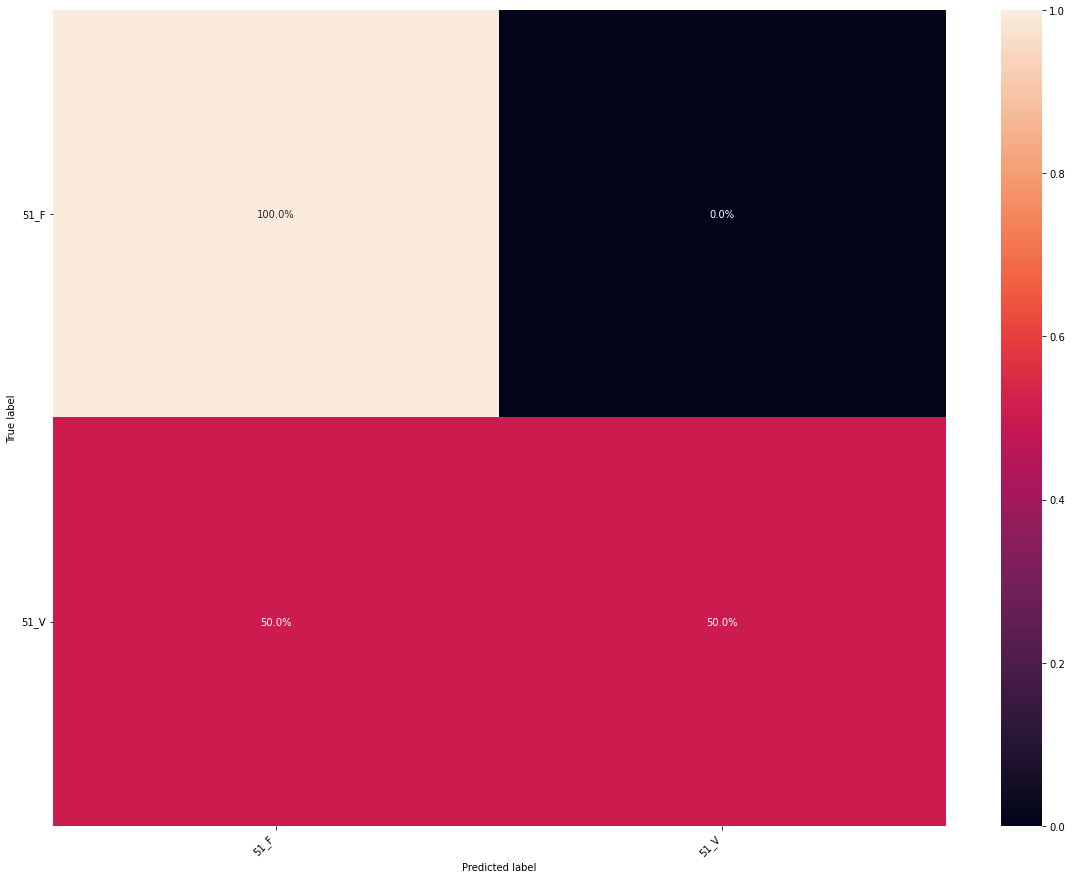


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 52
Score: 0.8333333333333334

[0.75 0.25]
[0. 1.]


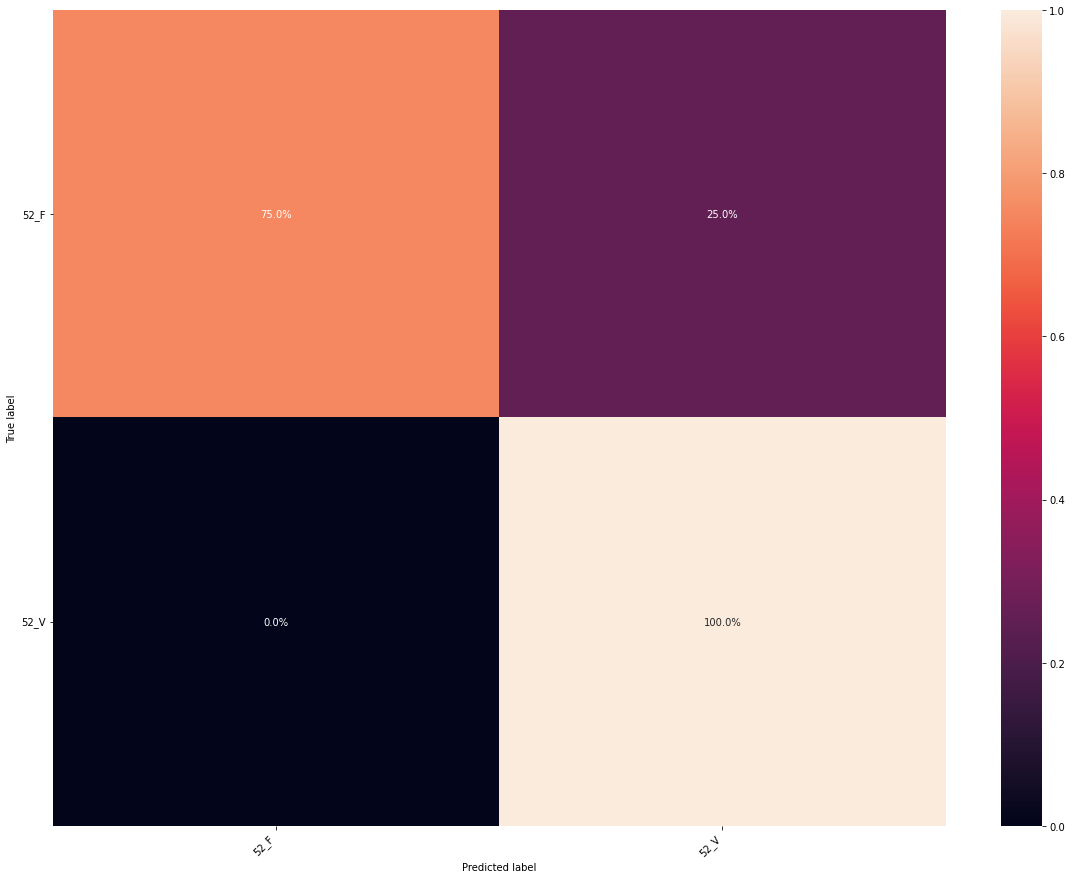


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 53
Score: 1.0

[1. 0.]
[0. 1.]


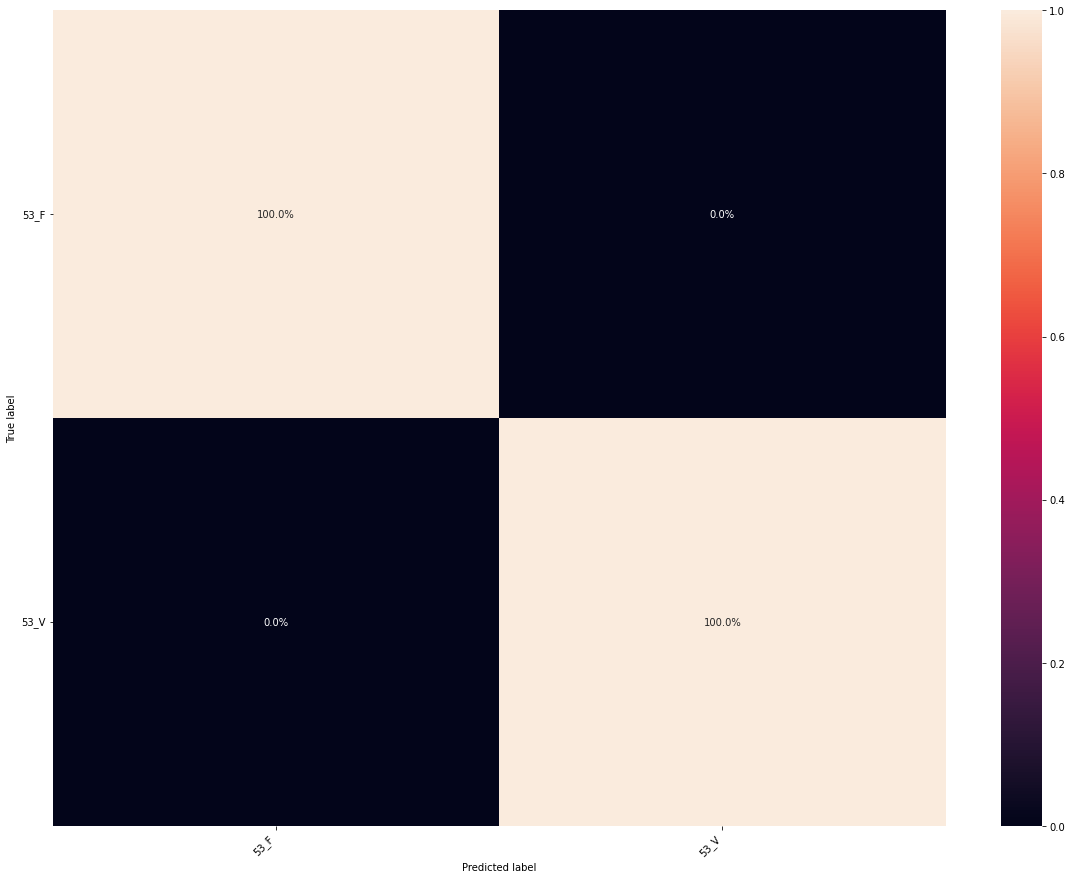


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 54
Score: 1.0

[1. 0.]
[0. 1.]


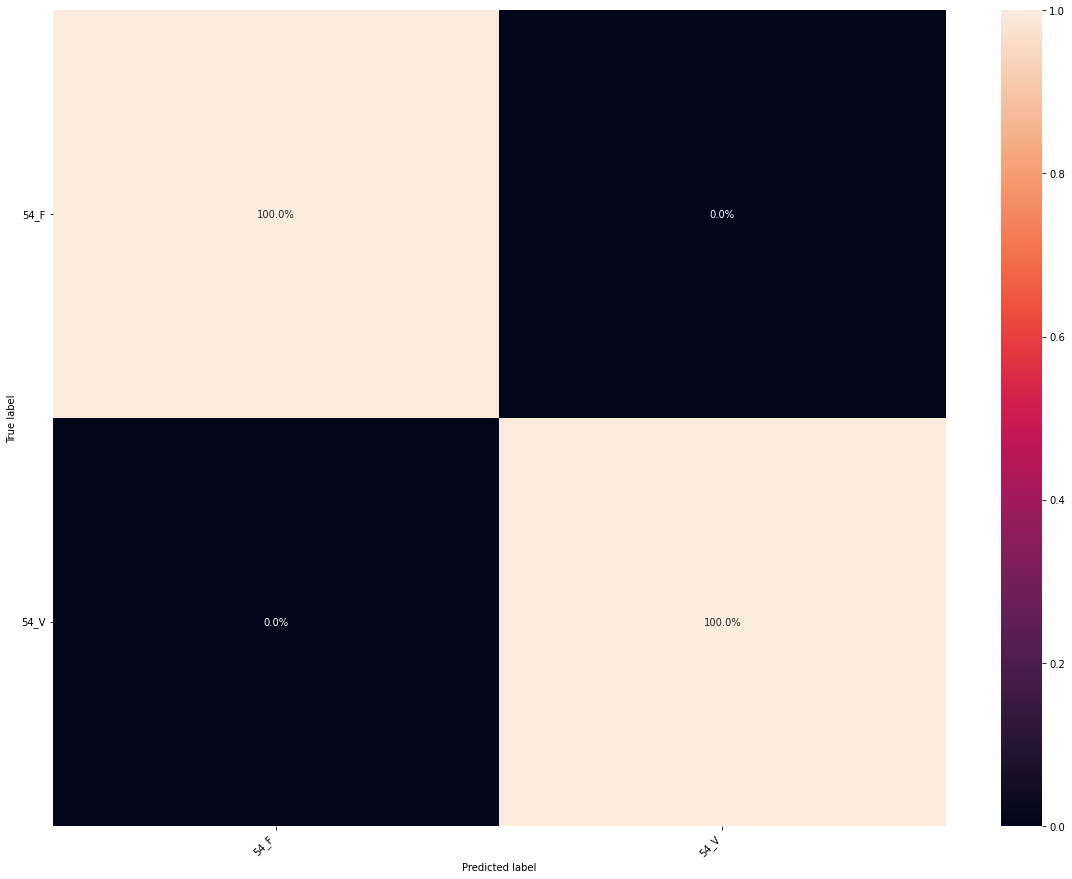


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 55
Score: 1.0

[1. 0.]
[0. 1.]


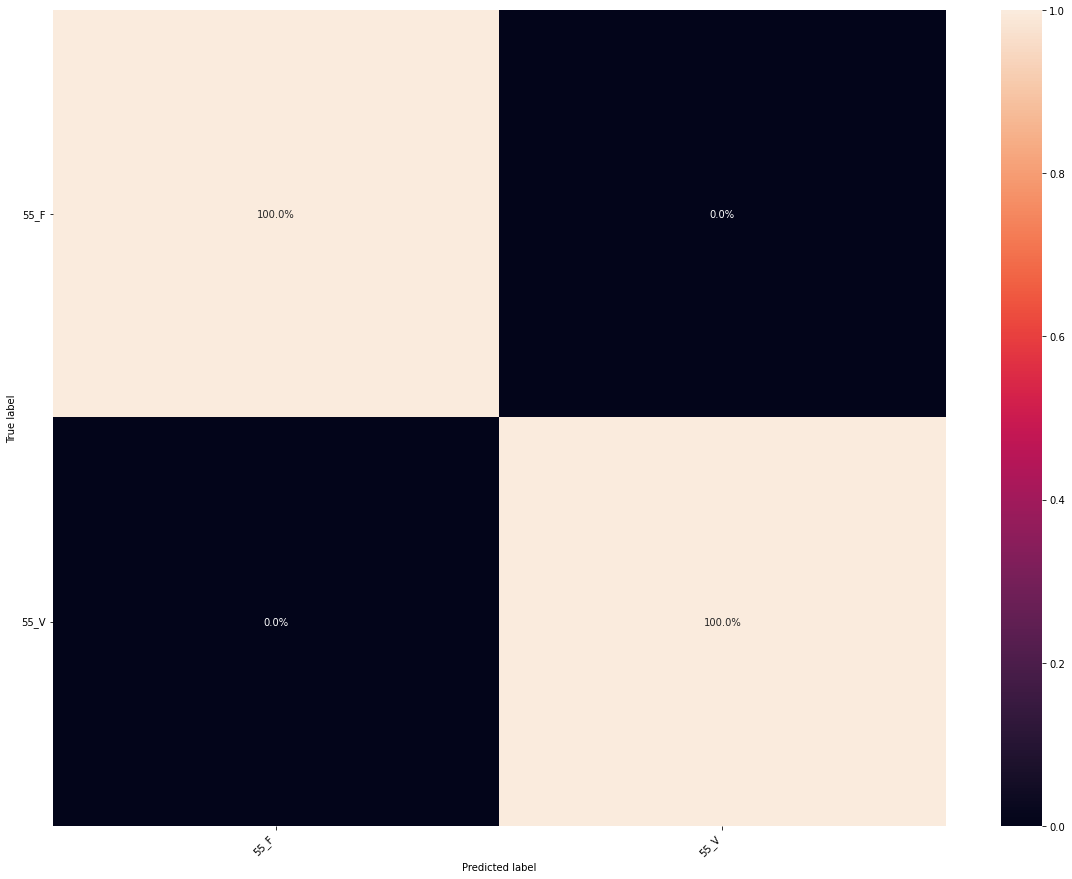


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 56
Score: 1.0

[1. 0.]
[0. 1.]


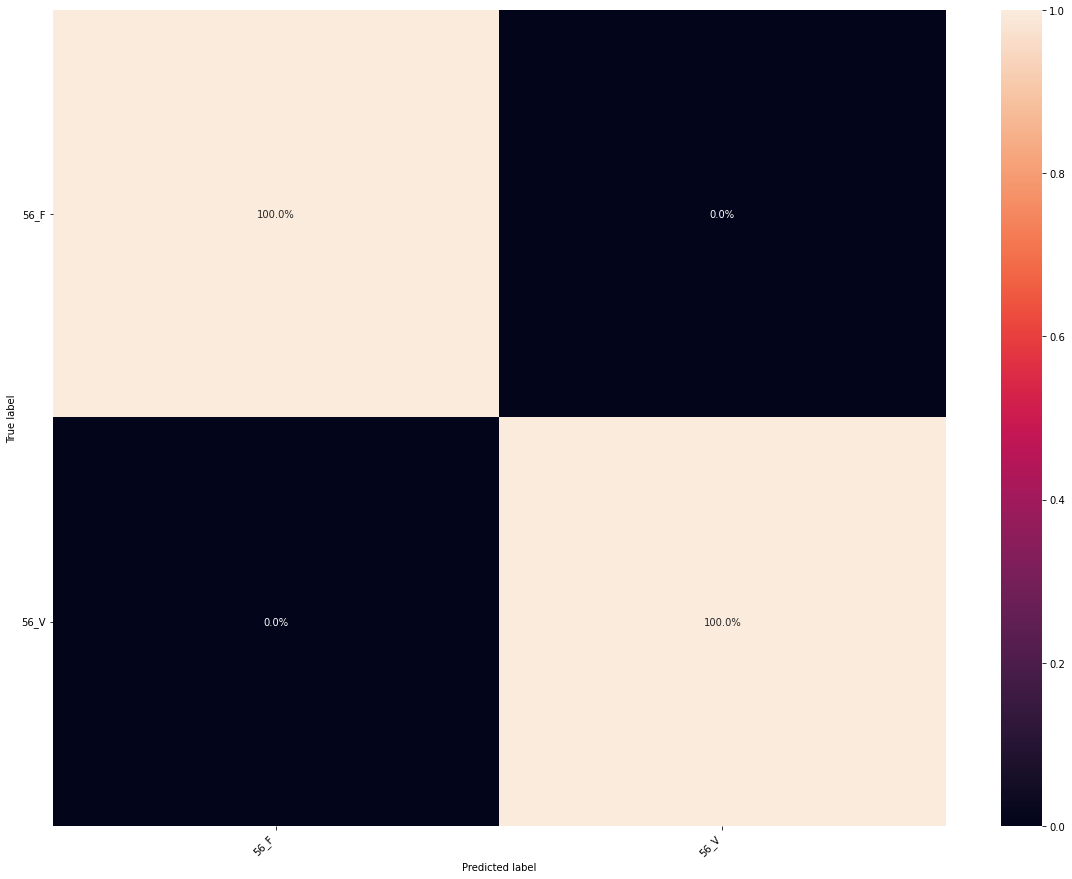


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 57
Score: 1.0

[1. 0.]
[0. 1.]


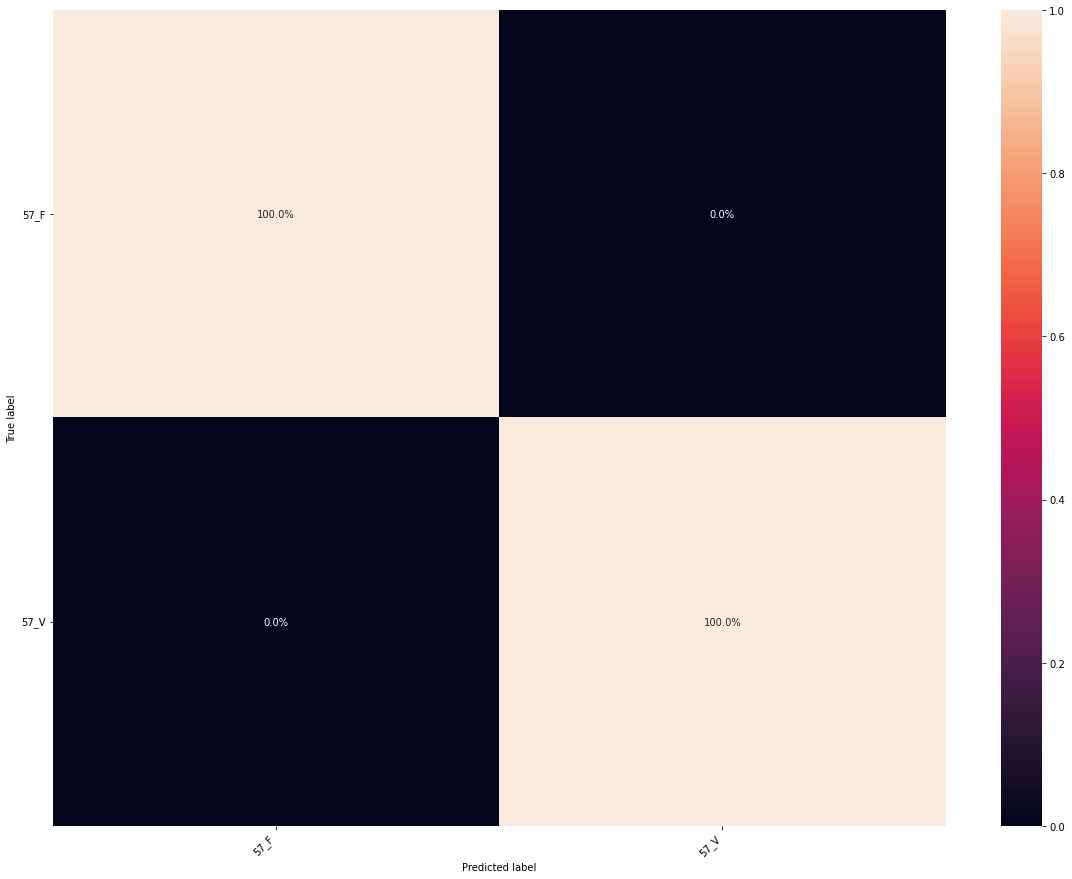


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 58
Score: 1.0

[1. 0.]
[0. 1.]


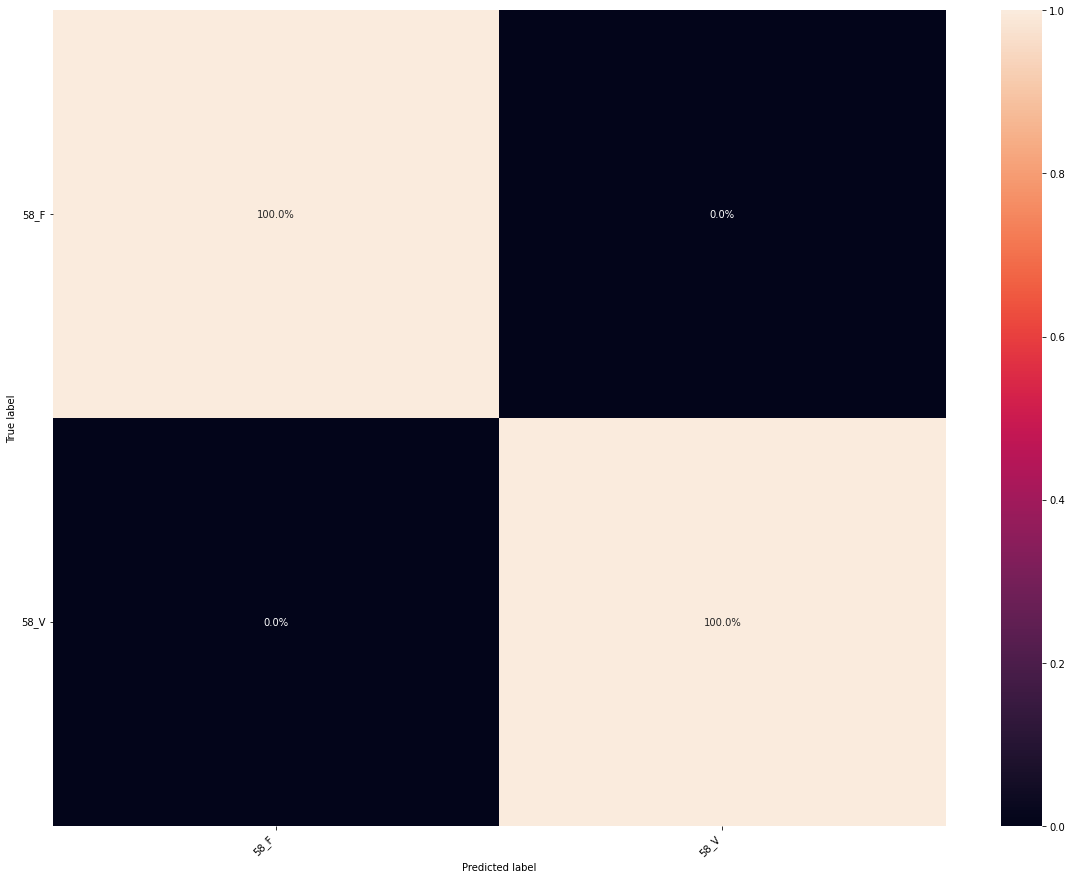


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 59
Score: 1.0

[1. 0.]
[0. 1.]


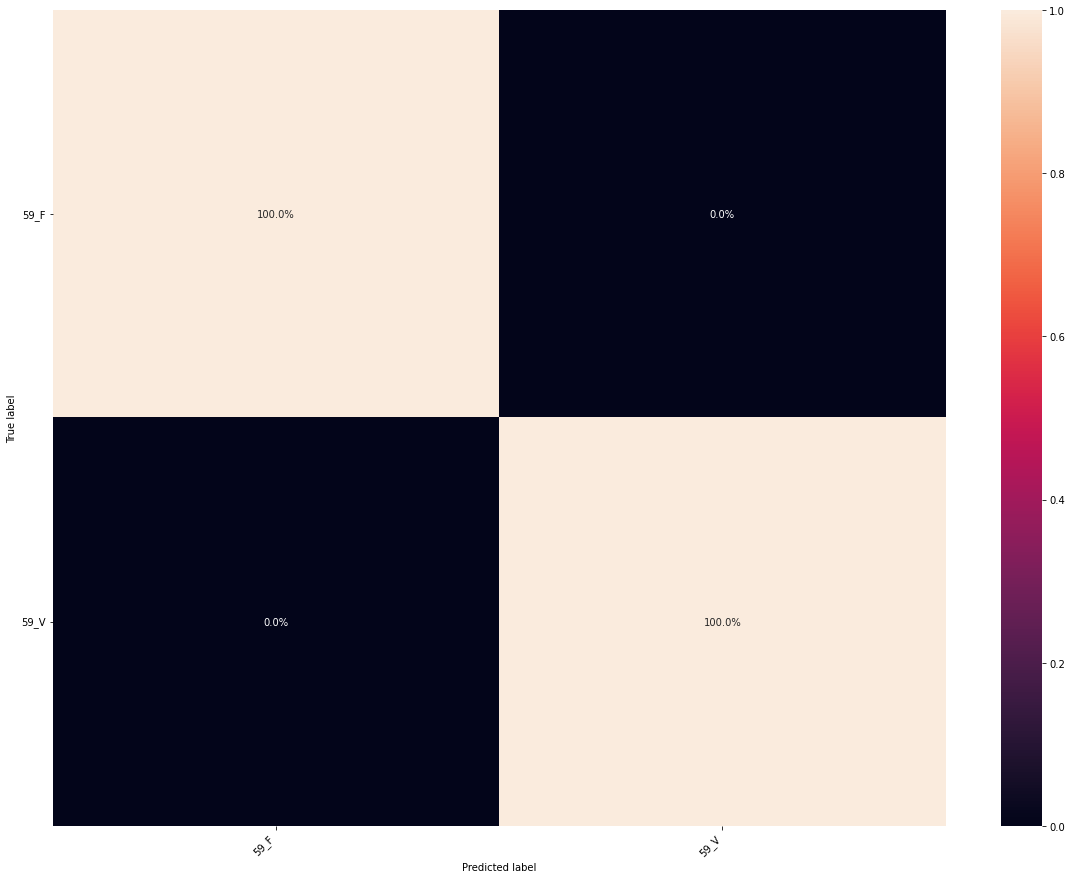


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 60
Score: 0.8333333333333334

[0.75 0.25]
[0. 1.]


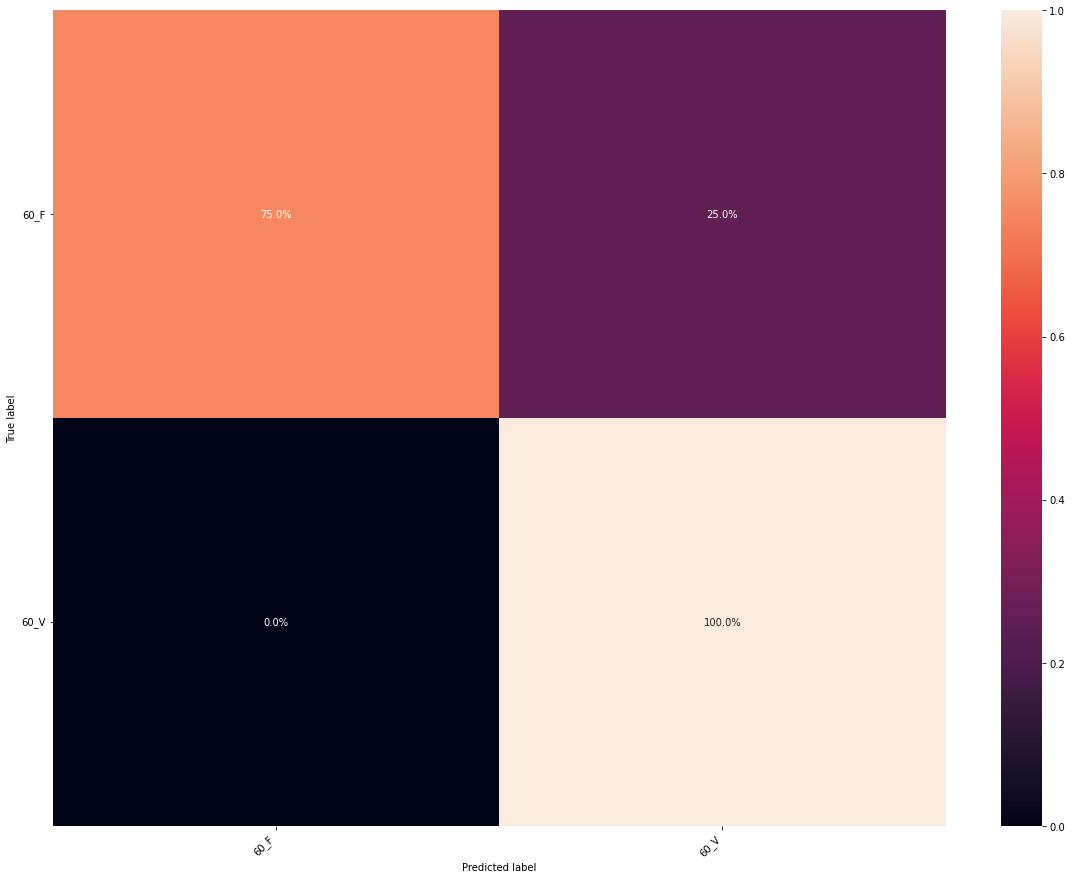


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 61
Score: 0.6666666666666666

[1. 0.]
[1. 0.]


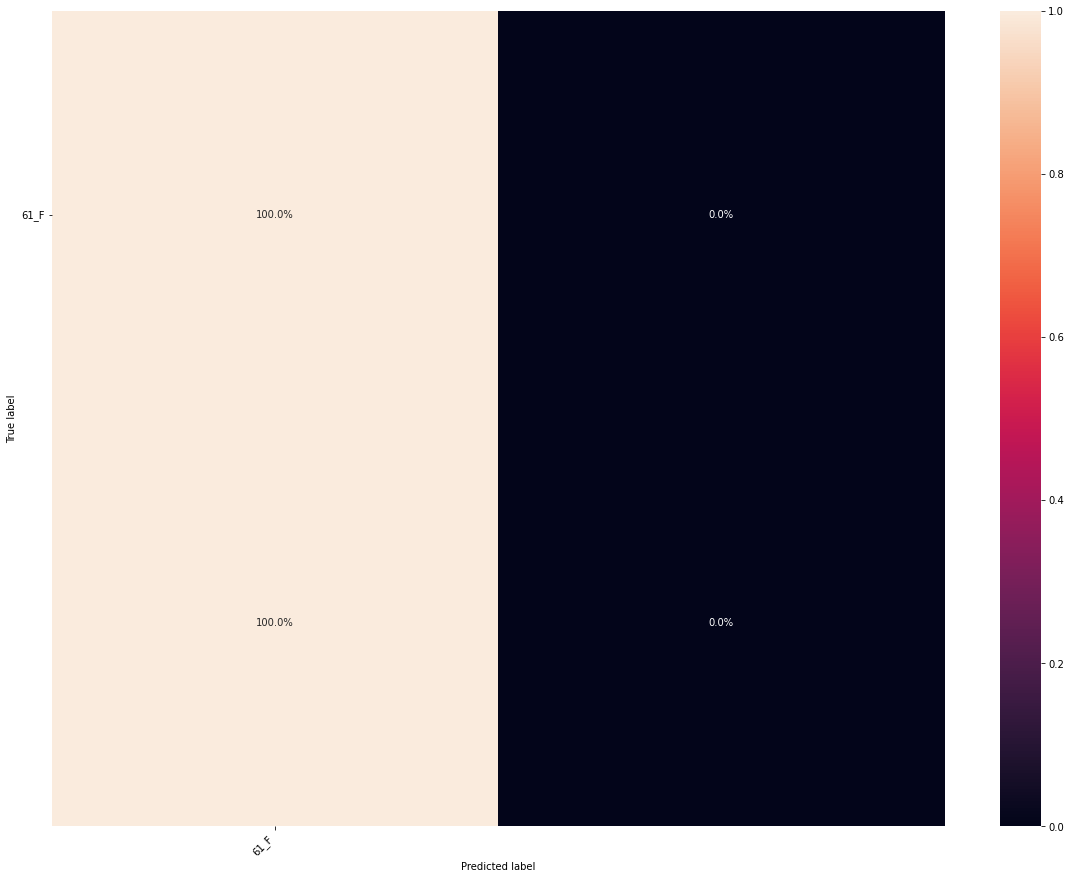


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 62
Score: 1.0

[1. 0.]
[0. 1.]


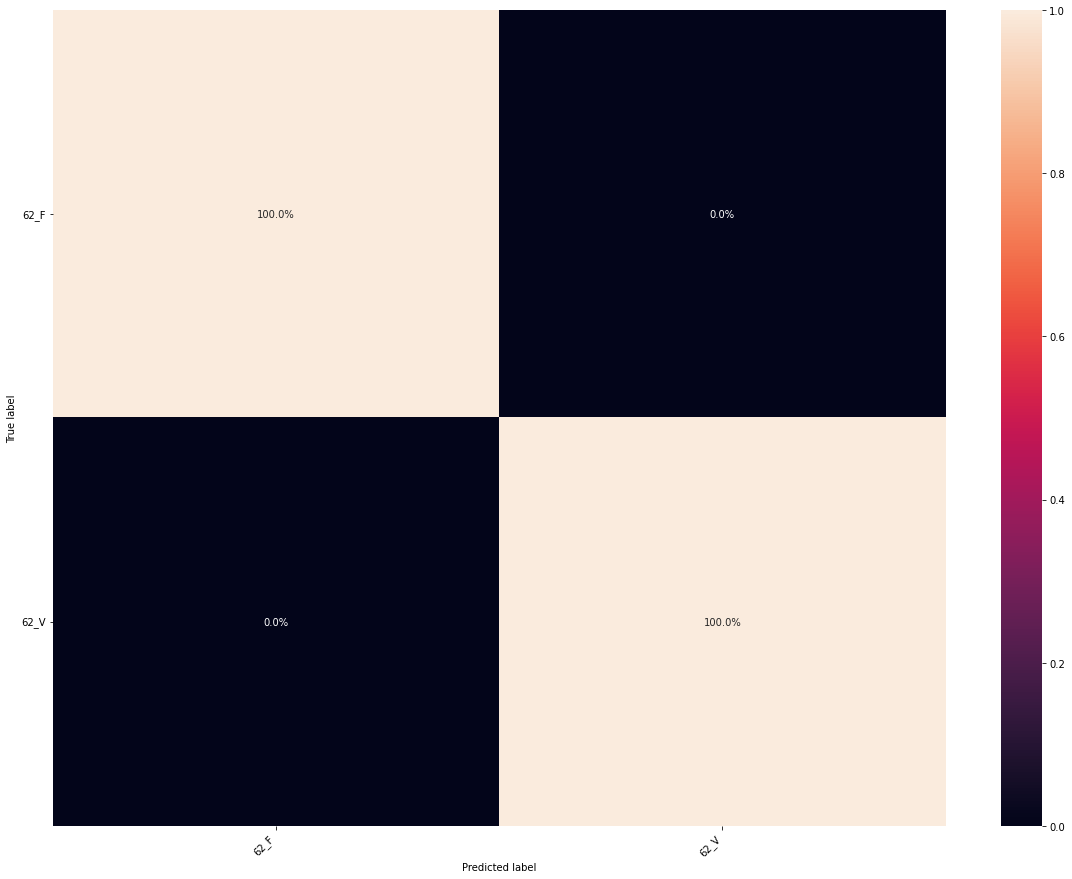


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 63
Score: 0.6666666666666666

[0.6 0.4]
[0. 1.]


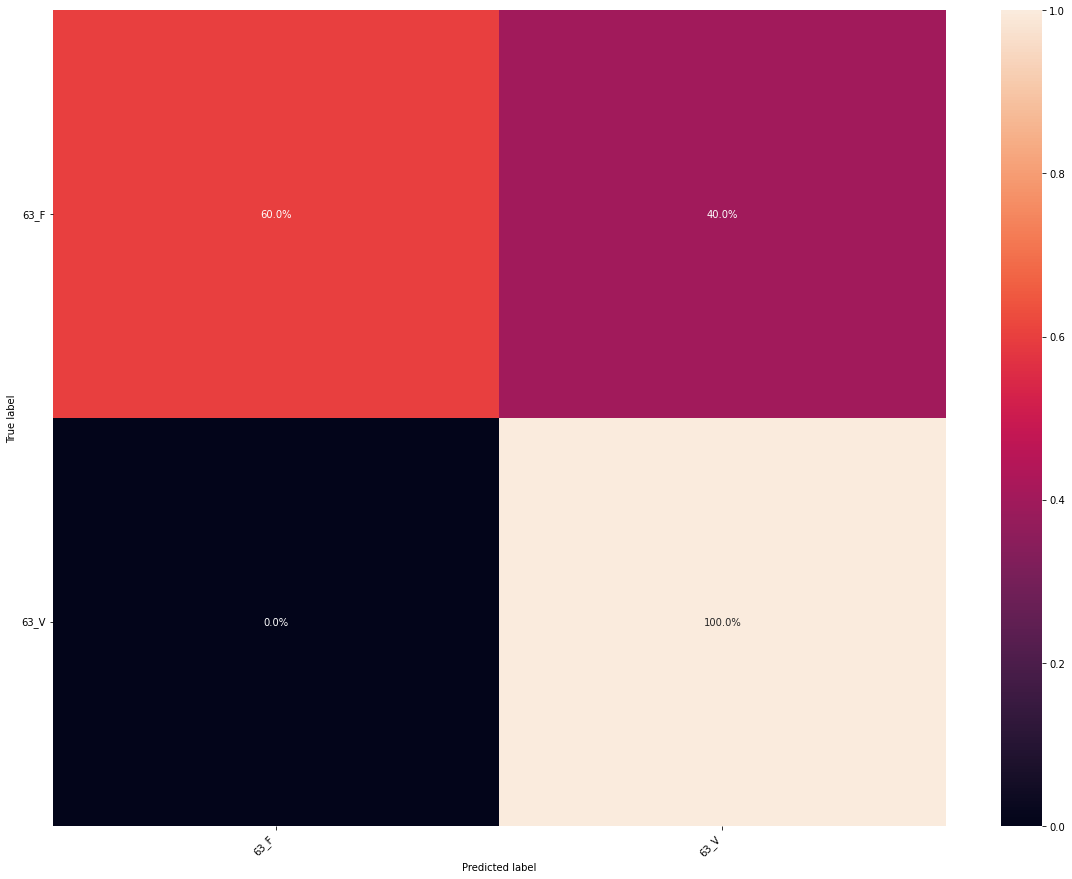


Cross_val_score
R²= 0.9166666666666666



In [ ]:
score_list_LogisticRegression = []
for nome_individuo in nomes_individuos:
    print(f"###################################################################")
    print(f"Treinamento individuo {nome_individuo}")
    df_individuo = df_individuos[df_individuos.nome==nome_individuo]
    df_individuo.reset_index(drop=True,inplace=True)
   
    x_train, x_test,y_train, y_test = train_test_split(df_individuo['imagem'].values,
                                        df_individuo['classe'].values,
                                        shuffle=True, test_size=0.25,
                                        random_state=42)
     
    clf = LogisticRegression()
    clf.fit(x_train.tolist(), y_train.tolist())
    print(f"Score: {clf.score(x_test.tolist(),y_test.tolist())}\n")

    previsoes = clf.predict(x_test.tolist())
    
    print_confusion_matrix(y_test.tolist(),previsoes,np.unique(np.array(previsoes)).tolist())

    print("\nCross_val_score")
    score = cross_val_score(LogisticRegression(), df_individuo_22['imagem'].values.tolist(),df_individuo_22['classe'].values.tolist(),cv=10)
    score_list_LogisticRegression.append(np.mean(score))
    # score_list_LogisticRegression=np.concatenate((score_list_LogisticRegression, score), axis=0)
    print(f'R²= {np.mean(score)}\n')

### Random Forest Classifier

###################################################################
Treinamento individuo 0
Score: 0.5

[0.4 0.6]
[0. 1.]


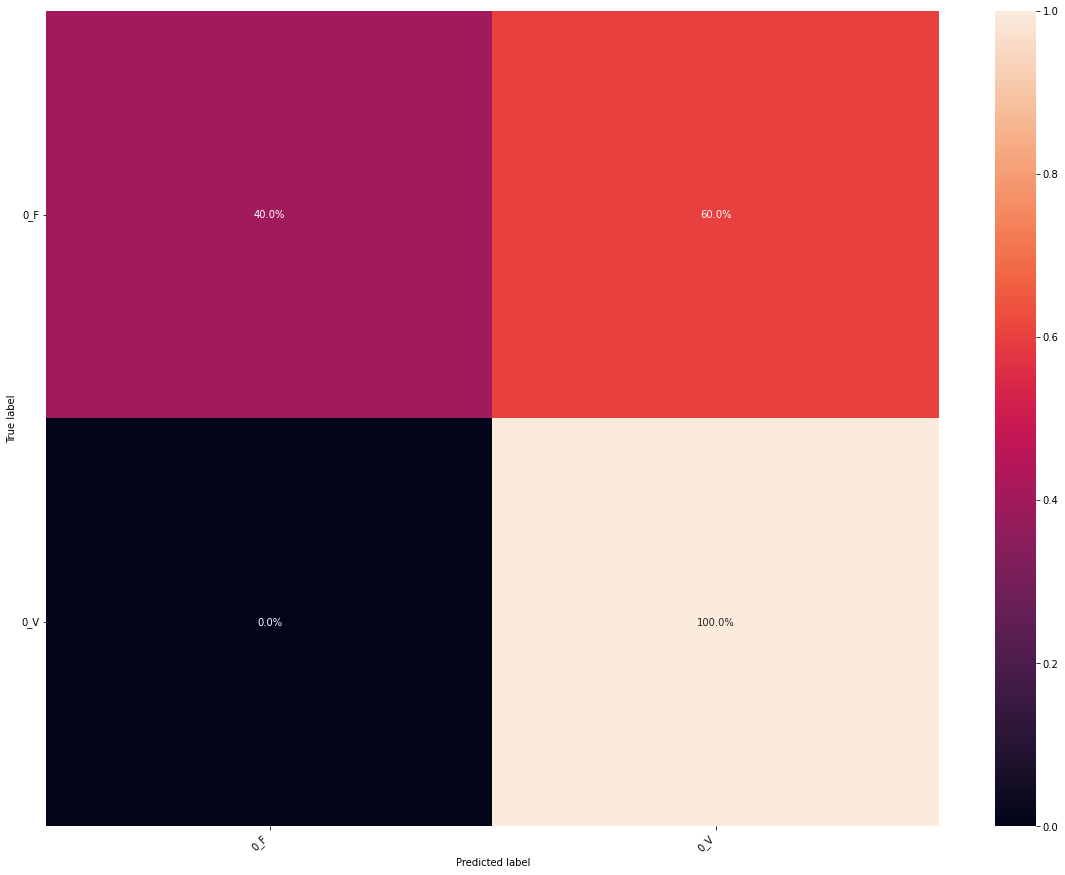


Cross_val_score
R²= 0.95

###################################################################
Treinamento individuo 1
Score: 1.0

[1. 0.]
[0. 1.]


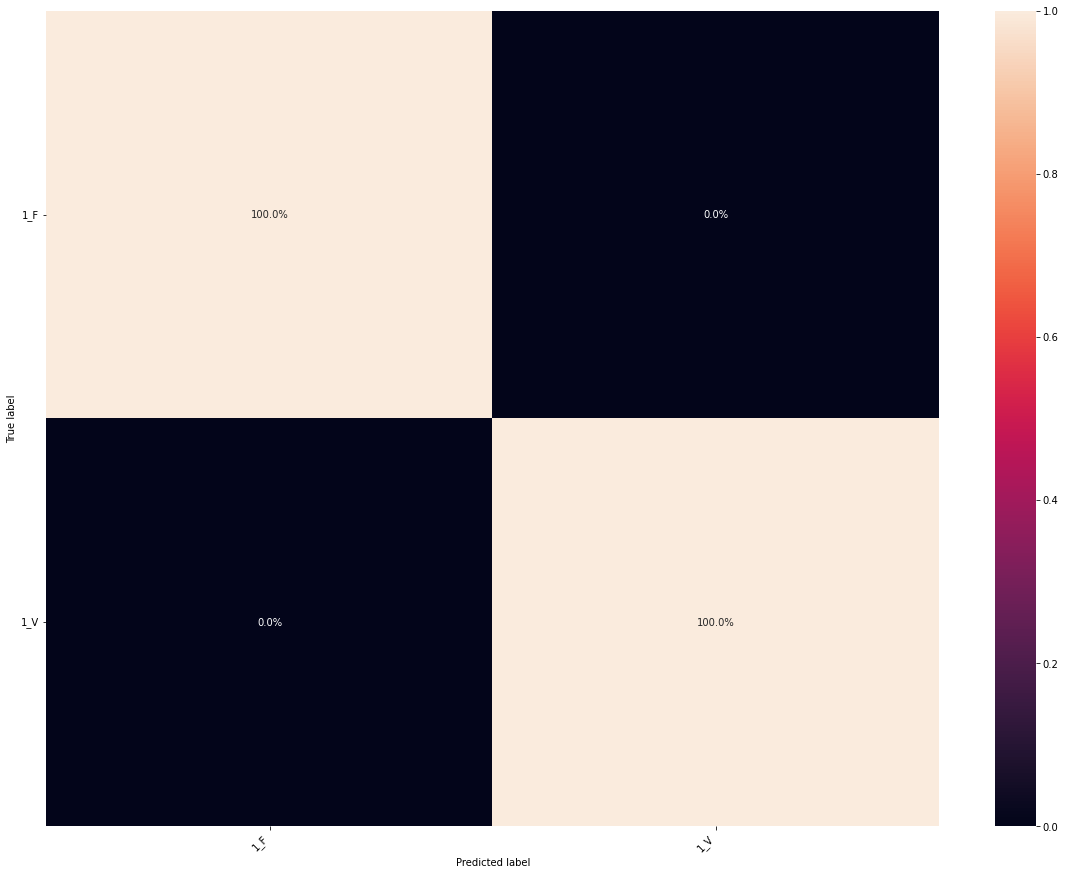


Cross_val_score
R²= 0.9

###################################################################
Treinamento individuo 2
Score: 0.8333333333333334

[0.75 0.25]
[0. 1.]


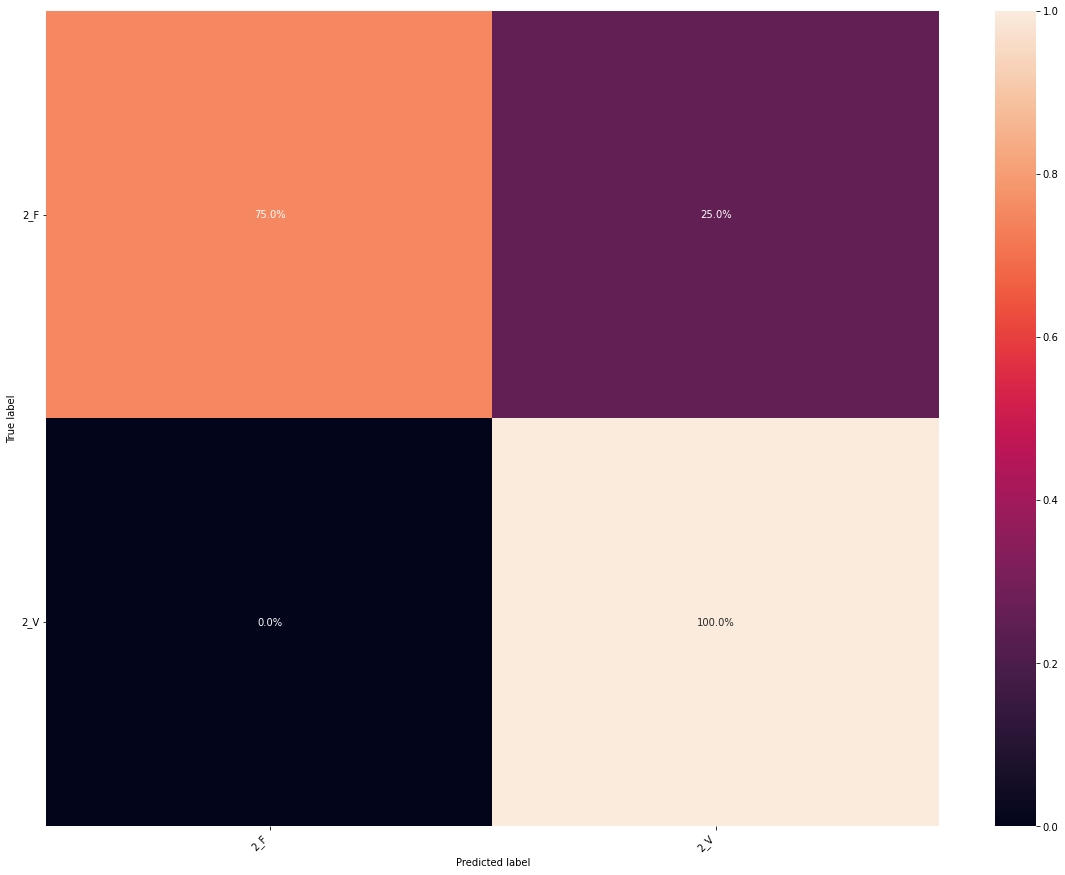


Cross_val_score
R²= 1.0

###################################################################
Treinamento individuo 3
Score: 1.0

[1. 0.]
[0. 1.]


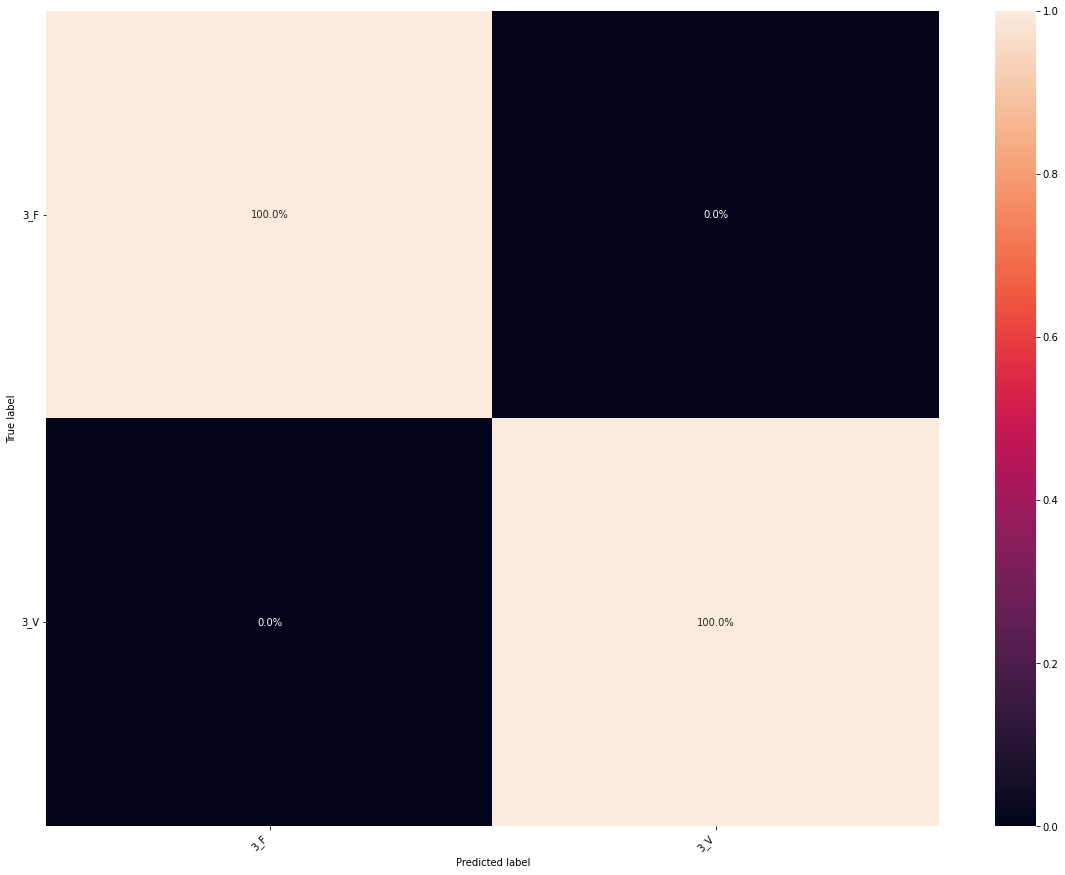


Cross_val_score
R²= 0.9

###################################################################
Treinamento individuo 4
Score: 1.0

[1. 0.]
[0. 1.]


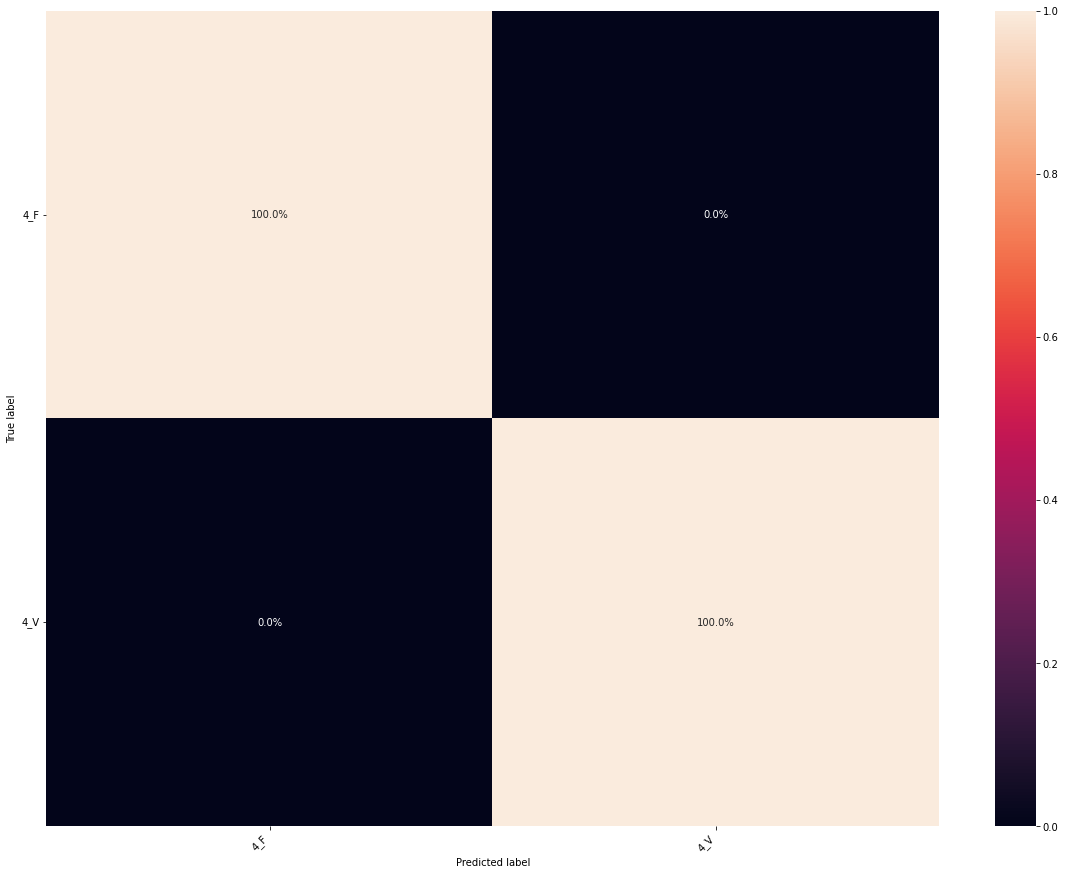


Cross_val_score
R²= 0.95

###################################################################
Treinamento individuo 5
Score: 1.0

[1. 0.]
[0. 1.]


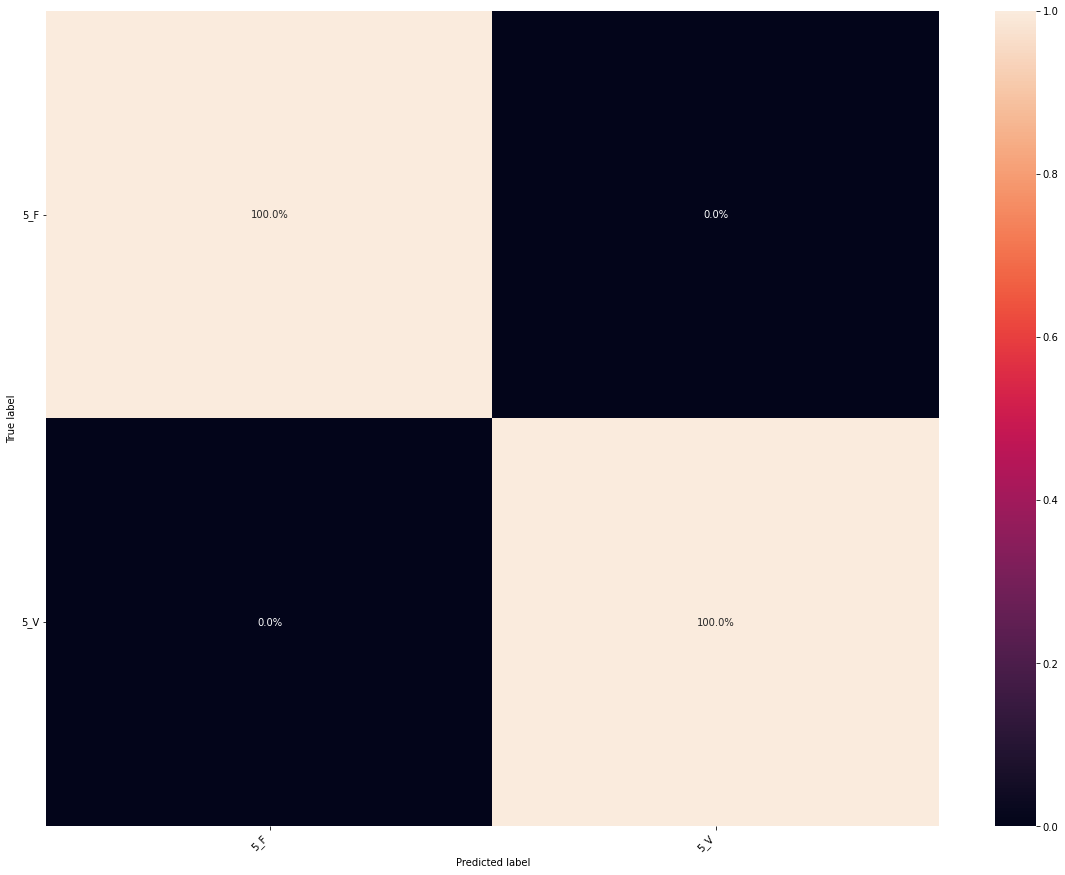


Cross_val_score
R²= 0.95

###################################################################
Treinamento individuo 6
Score: 1.0

[1. 0.]
[0. 1.]


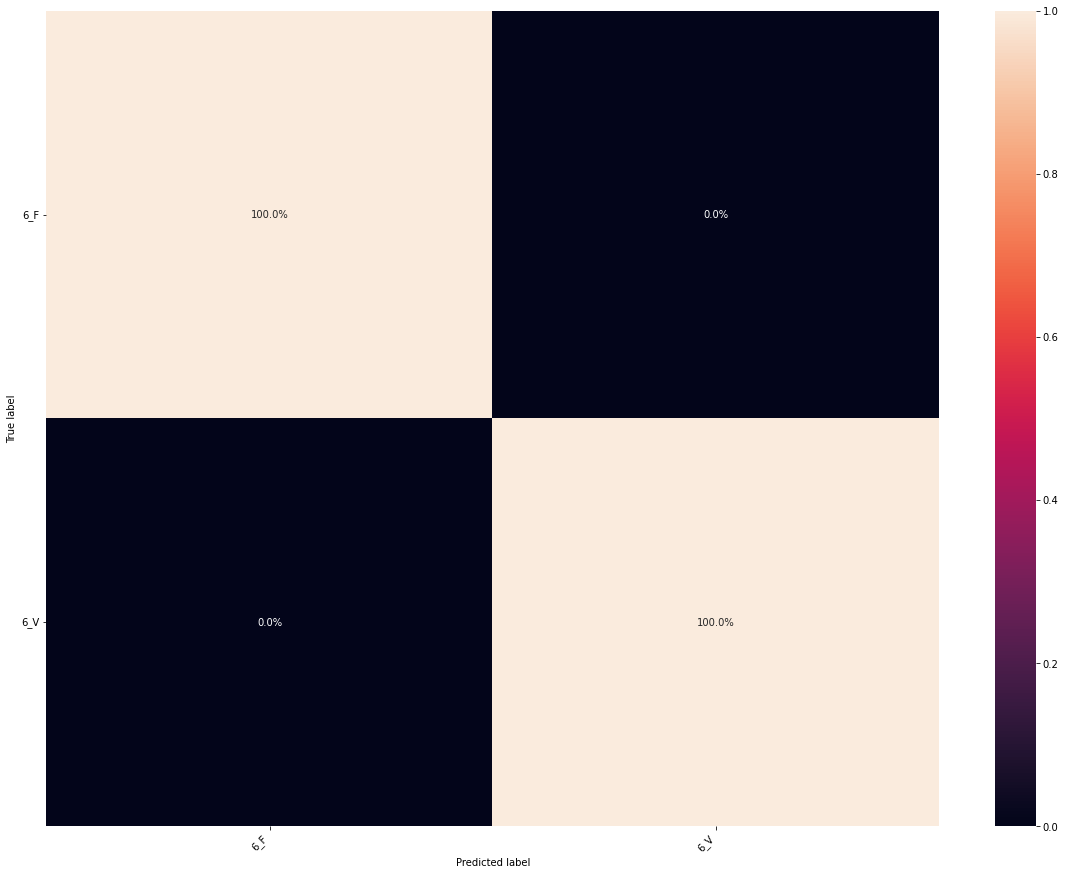


Cross_val_score
R²= 0.95

###################################################################
Treinamento individuo 7
Score: 1.0

[1. 0.]
[0. 1.]


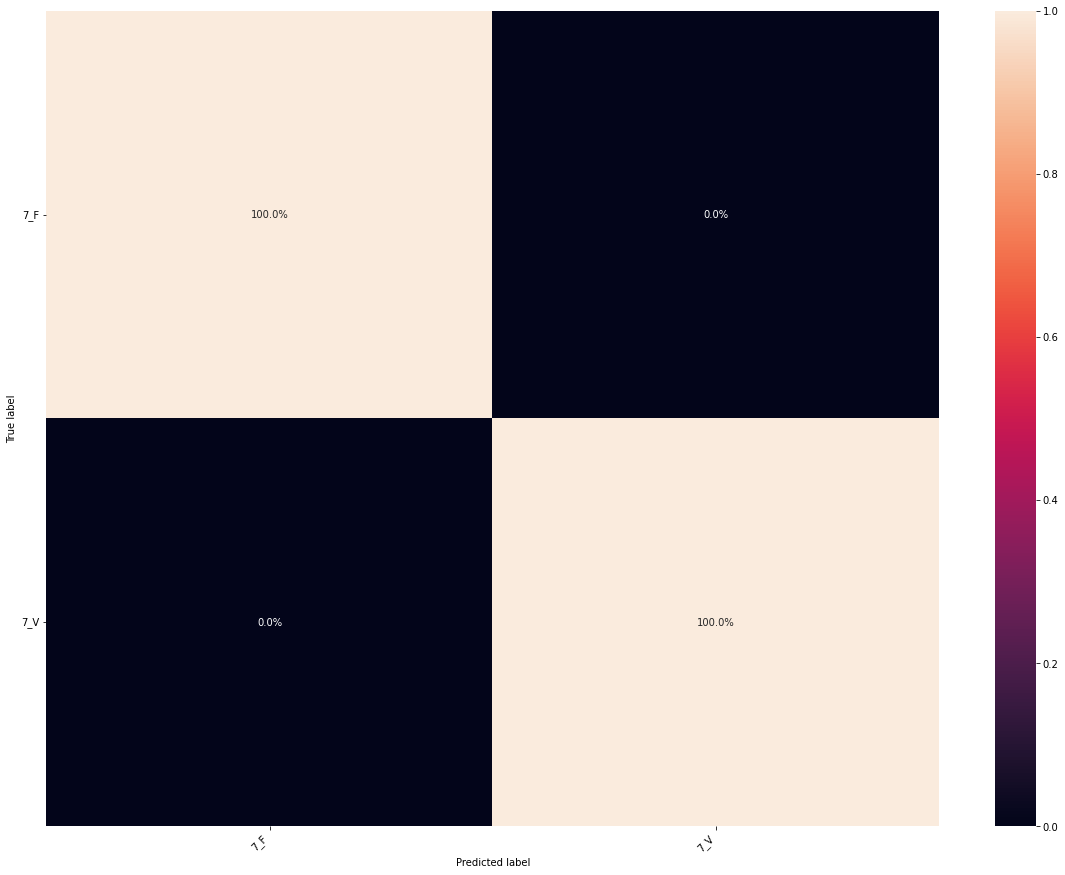


Cross_val_score
R²= 0.9

###################################################################
Treinamento individuo 8
Score: 0.5714285714285714

[1. 0.]
[0.6 0.4]


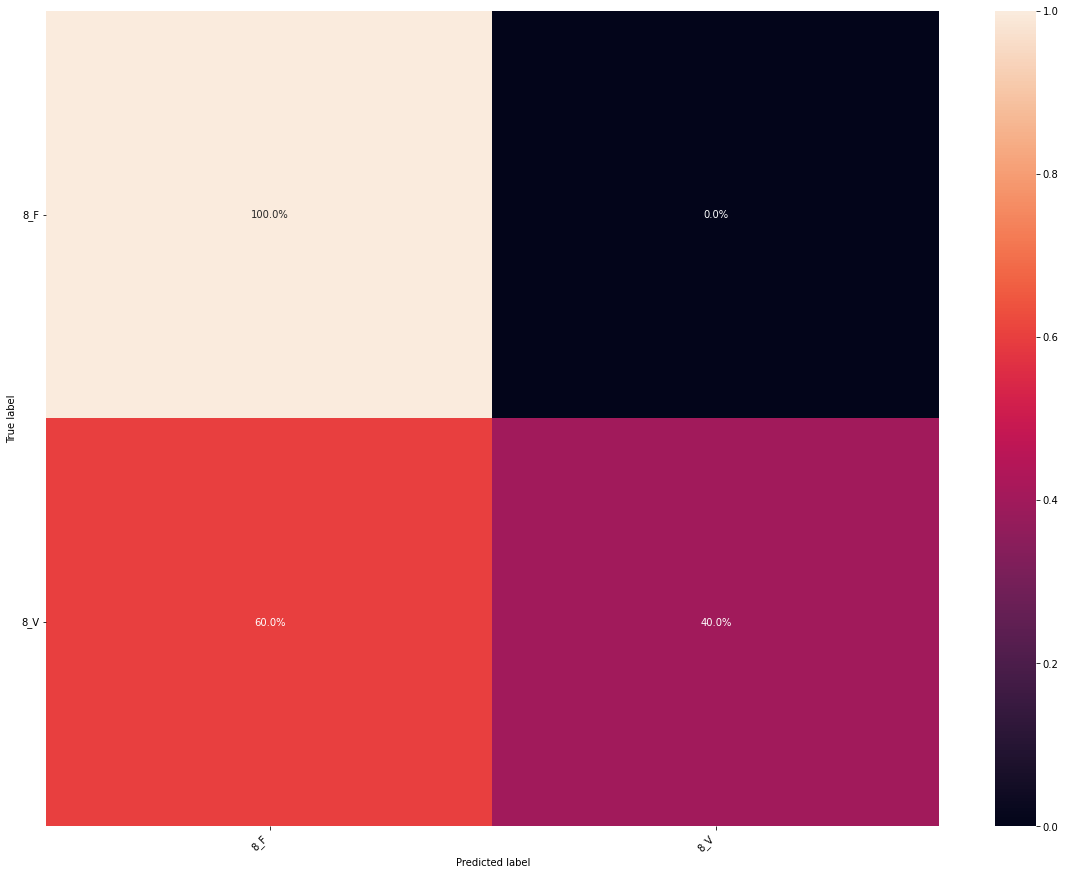


Cross_val_score
R²= 1.0

###################################################################
Treinamento individuo 9
Score: 1.0

[1. 0.]
[0. 1.]


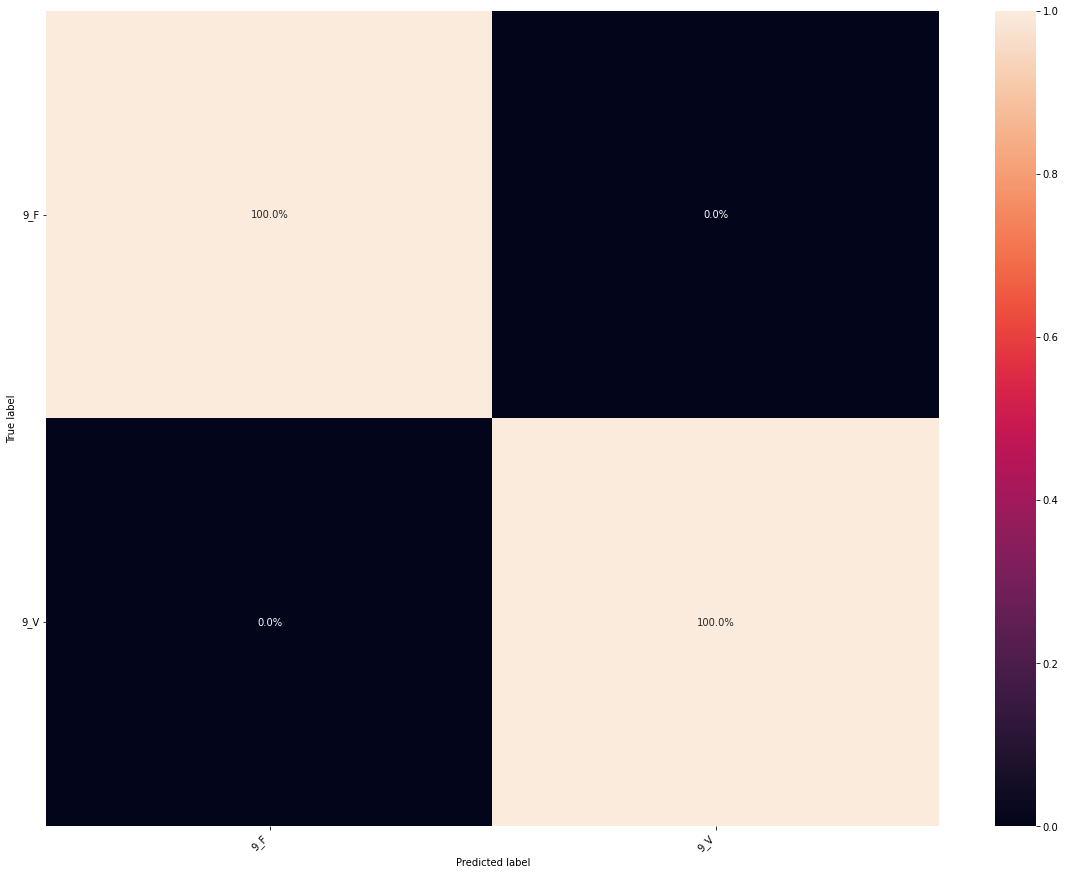


Cross_val_score
R²= 0.8666666666666666

###################################################################
Treinamento individuo 10
Score: 1.0

[1. 0.]
[0. 1.]


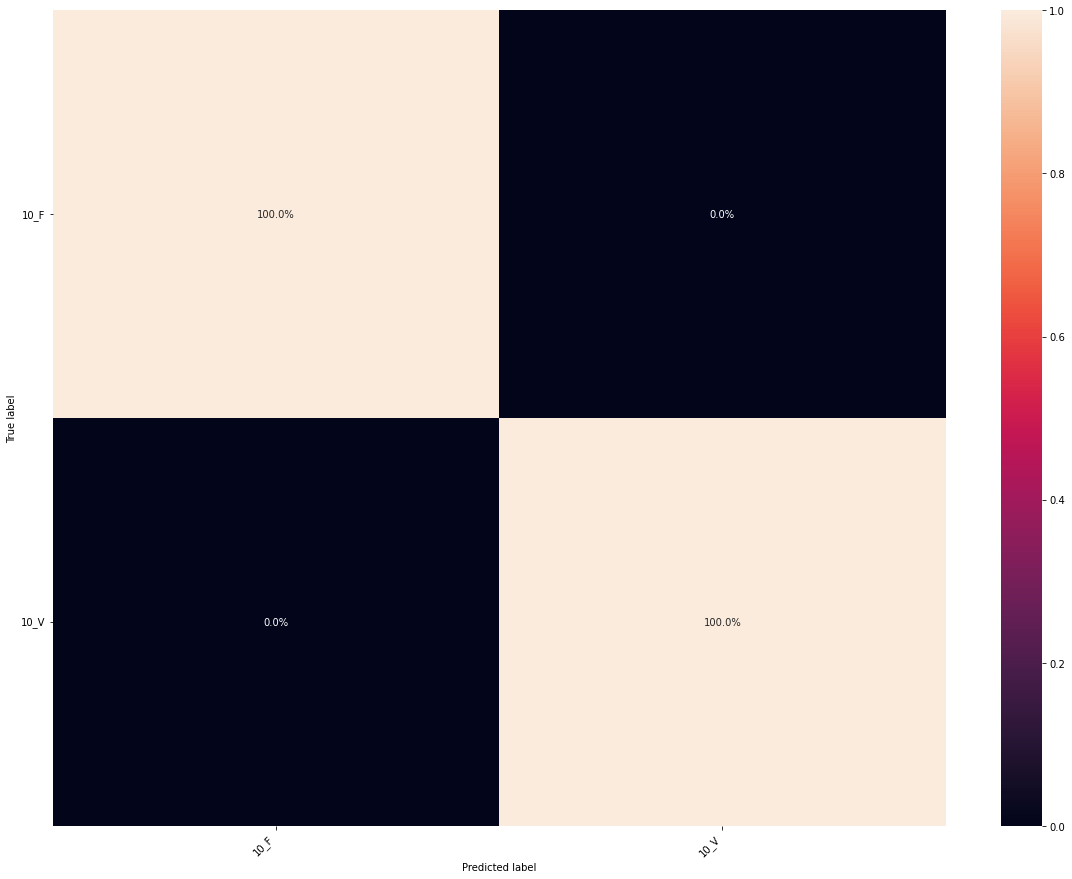


Cross_val_score
R²= 1.0

###################################################################
Treinamento individuo 11
Score: 0.8333333333333334

[0.8 0.2]
[0. 1.]


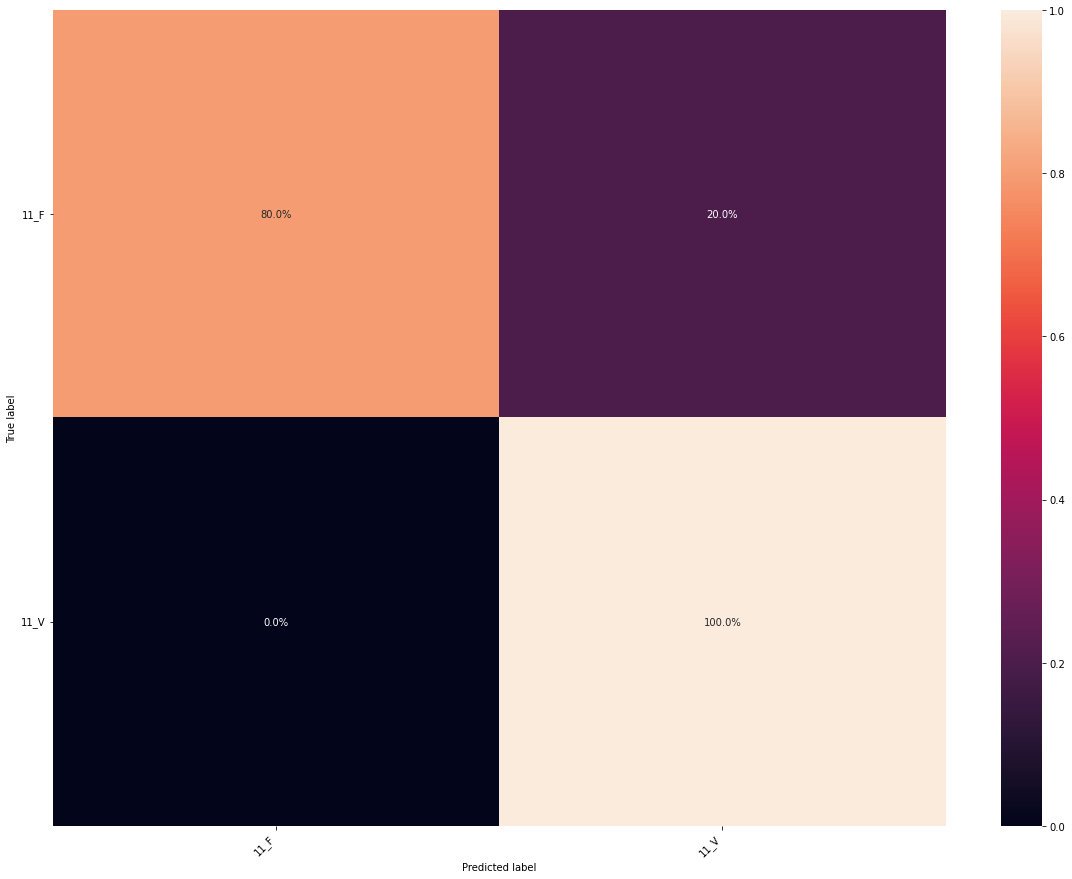


Cross_val_score
R²= 1.0

###################################################################
Treinamento individuo 12
Score: 1.0

[1. 0.]
[0. 1.]


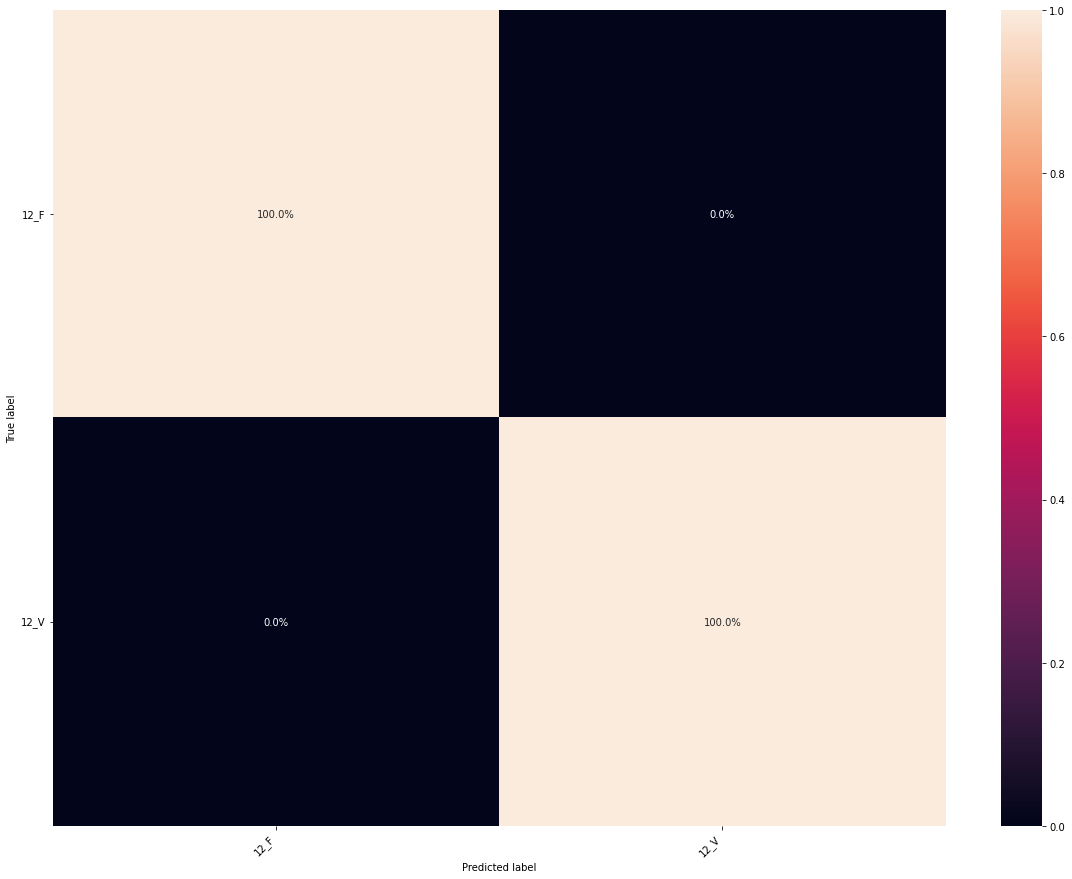


Cross_val_score
R²= 1.0

###################################################################
Treinamento individuo 13
Score: 0.6666666666666666

[0.33333333 0.66666667]
[0. 1.]


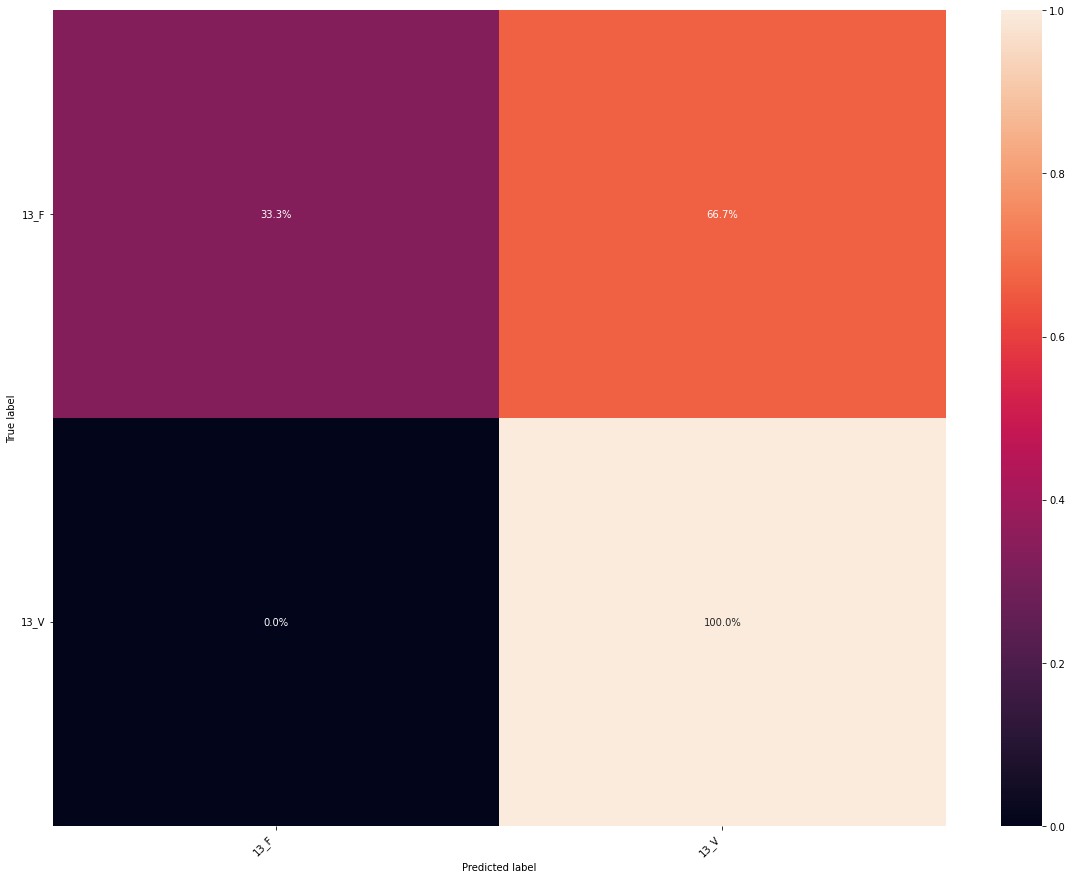


Cross_val_score
R²= 0.9

###################################################################
Treinamento individuo 14
Score: 1.0

[1. 0.]
[0. 1.]


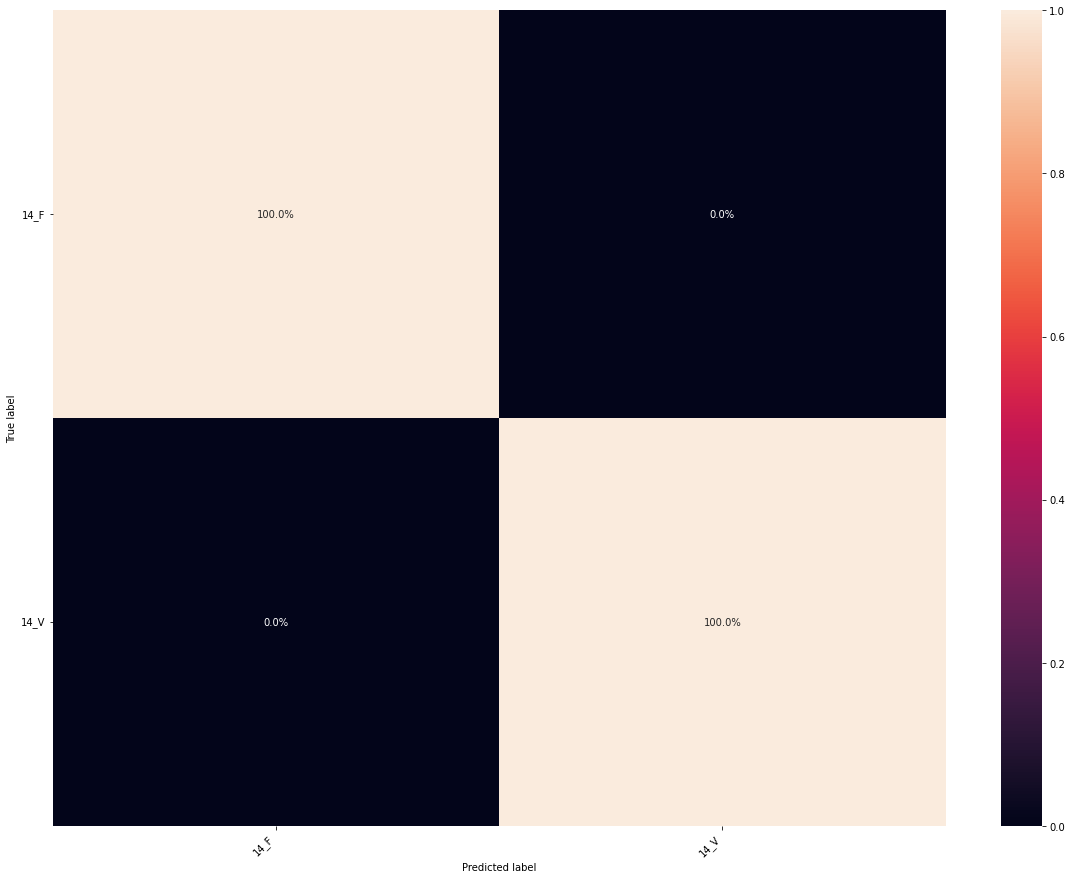


Cross_val_score
R²= 1.0

###################################################################
Treinamento individuo 15
Score: 1.0

[1. 0.]
[0. 1.]


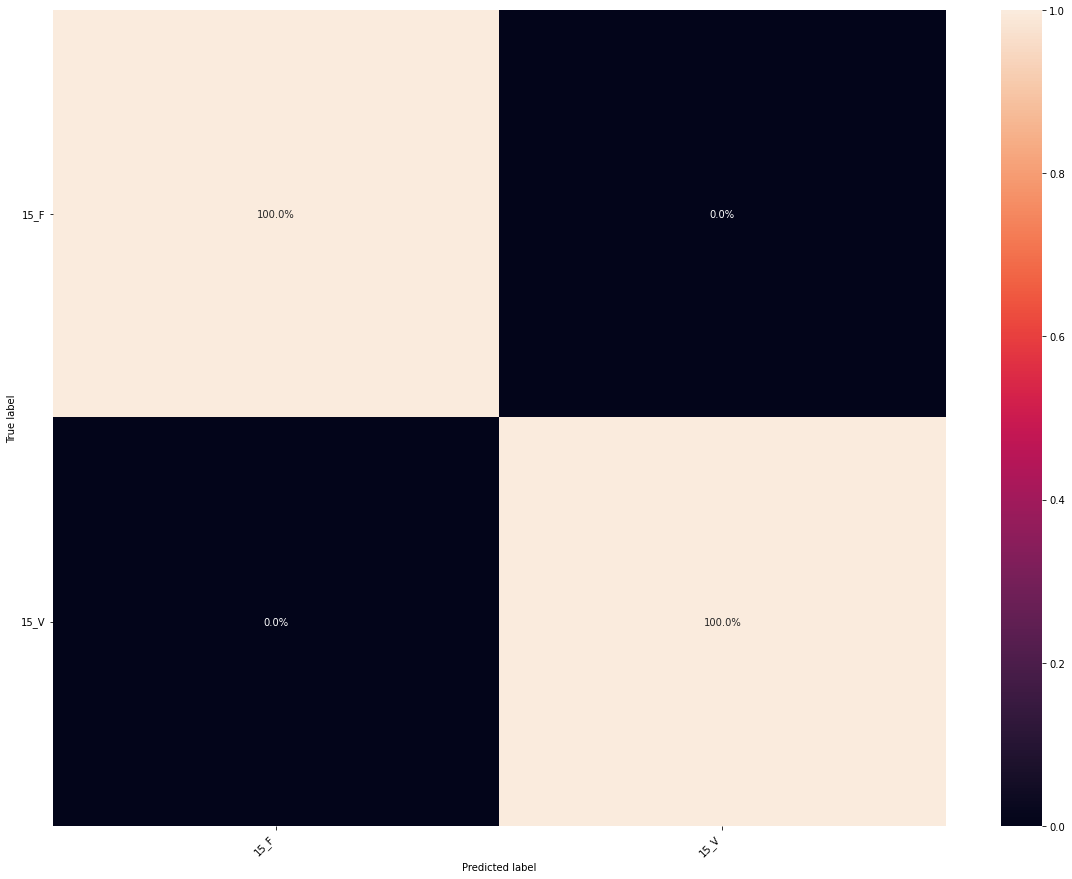


Cross_val_score
R²= 0.9

###################################################################
Treinamento individuo 16
Score: 1.0

[1. 0.]
[0. 1.]


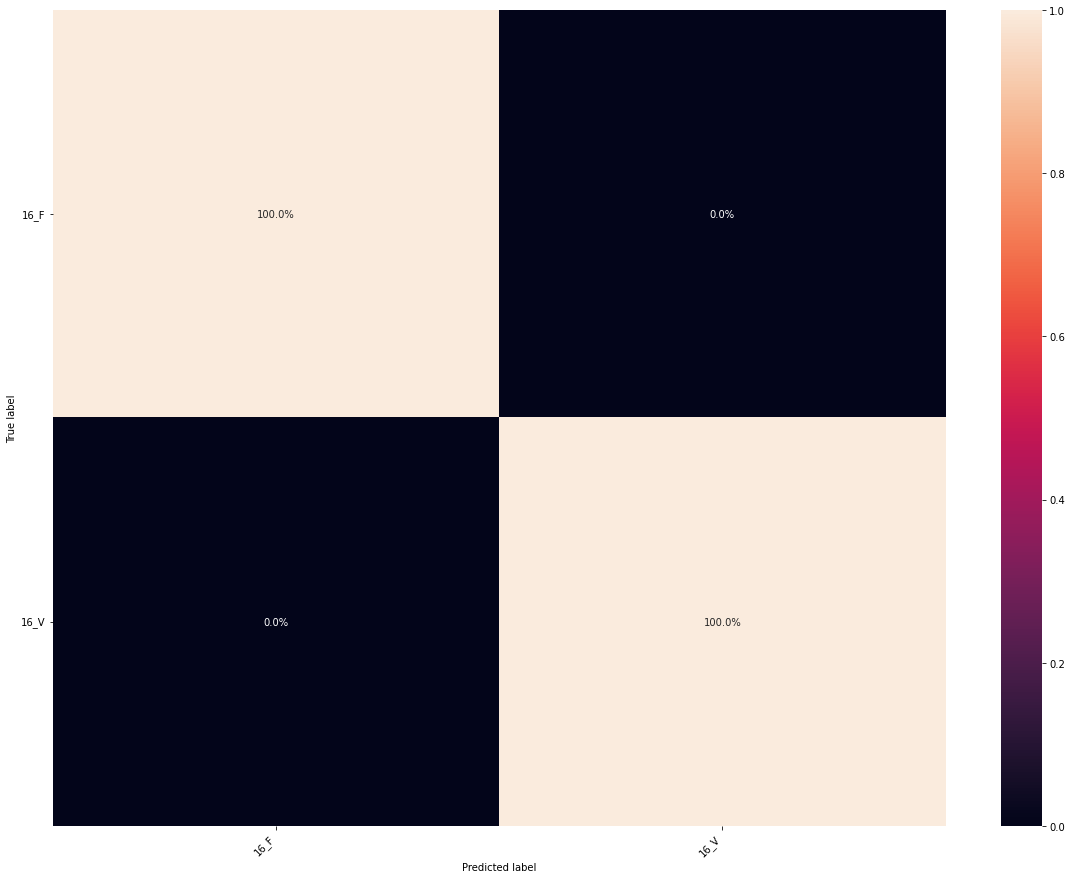


Cross_val_score
R²= 0.9

###################################################################
Treinamento individuo 17
Score: 0.8333333333333334

[0.75 0.25]
[0. 1.]


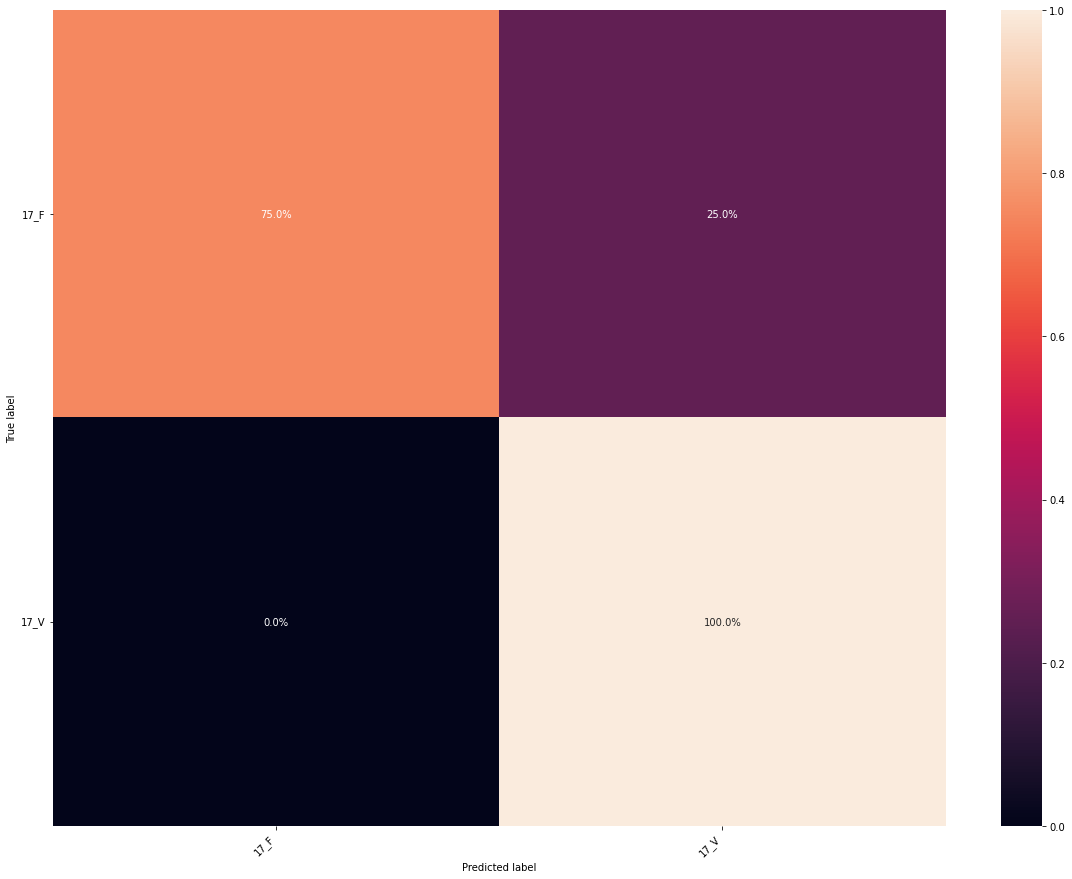


Cross_val_score
R²= 0.95

###################################################################
Treinamento individuo 18
Score: 0.8333333333333334

[0.75 0.25]
[0. 1.]


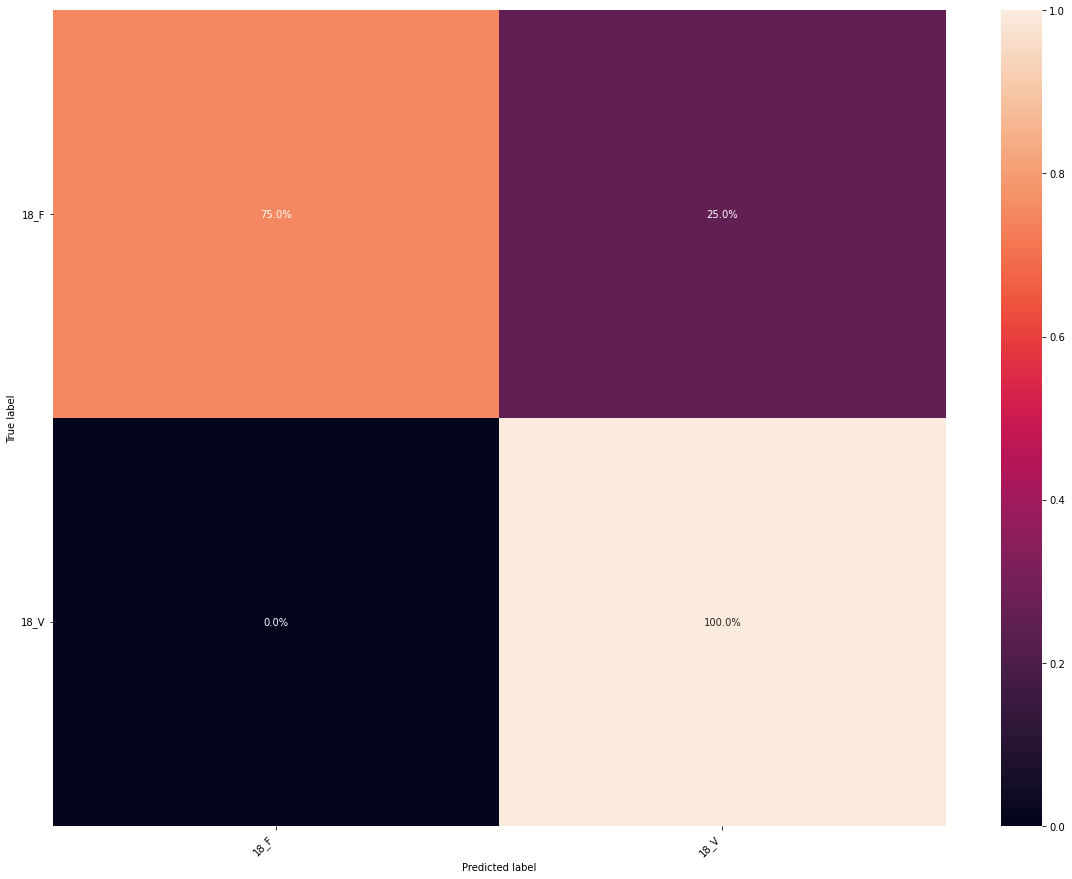


Cross_val_score
R²= 0.95

###################################################################
Treinamento individuo 19
Score: 0.8333333333333334

[0.75 0.25]
[0. 1.]


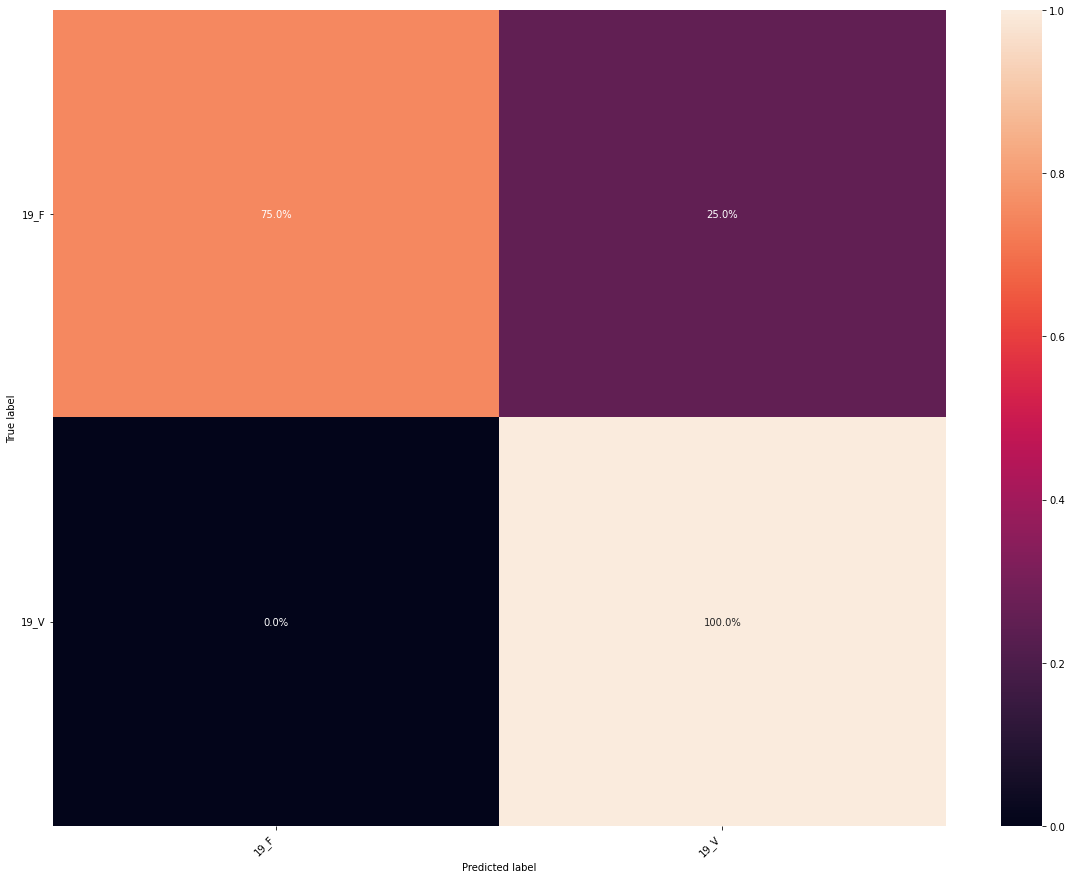


Cross_val_score
R²= 1.0

###################################################################
Treinamento individuo 20
Score: 1.0

[1. 0.]
[0. 1.]


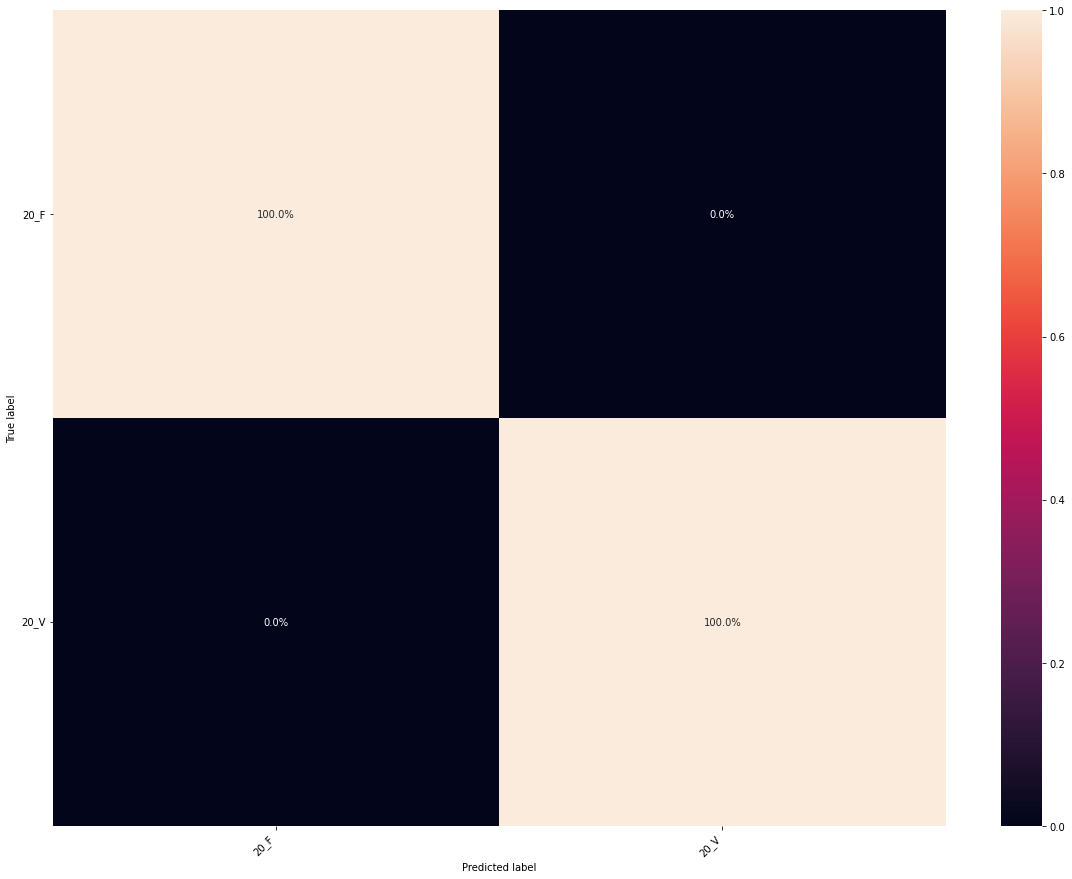


Cross_val_score
R²= 0.95

###################################################################
Treinamento individuo 21
Score: 1.0

[1. 0.]
[0. 1.]


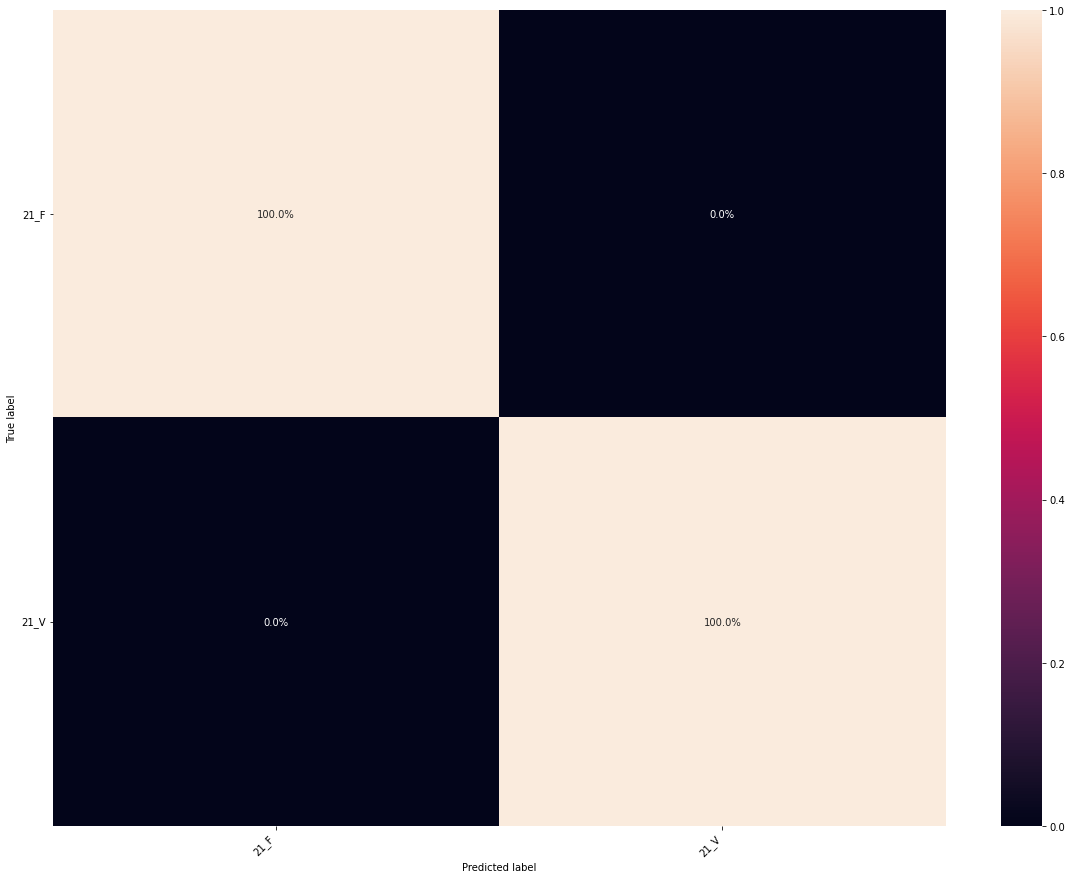


Cross_val_score
R²= 0.95

###################################################################
Treinamento individuo 22
Score: 0.6666666666666666

[0.5 0.5]
[0. 1.]


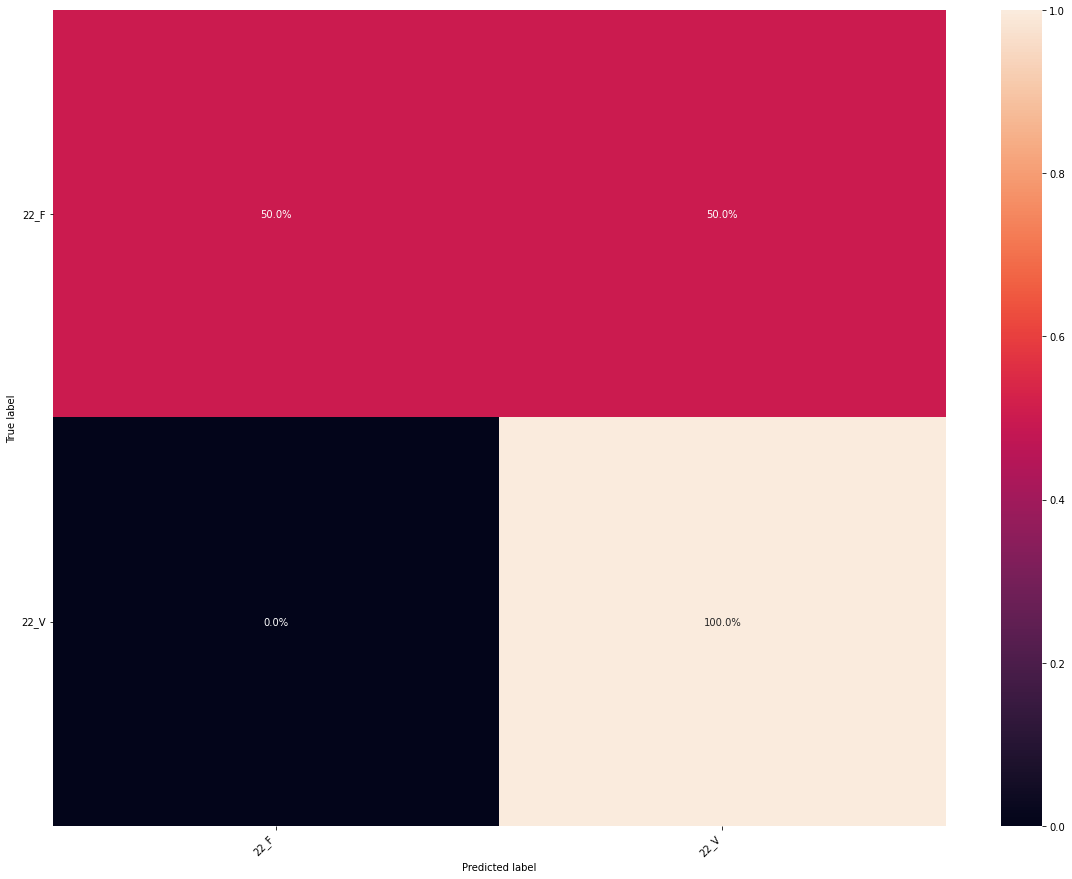


Cross_val_score
R²= 1.0

###################################################################
Treinamento individuo 23
Score: 1.0

[1. 0.]
[0. 1.]


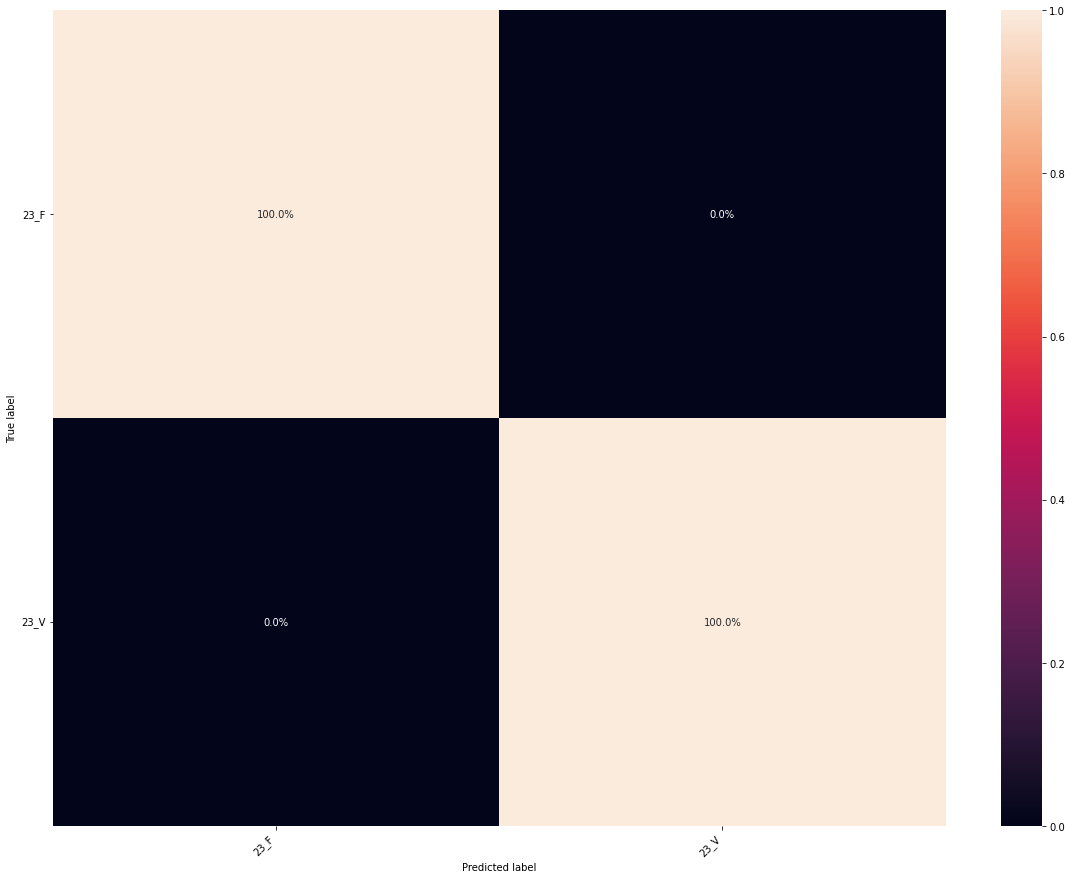


Cross_val_score
R²= 1.0

###################################################################
Treinamento individuo 24
Score: 1.0

[1. 0.]
[0. 1.]


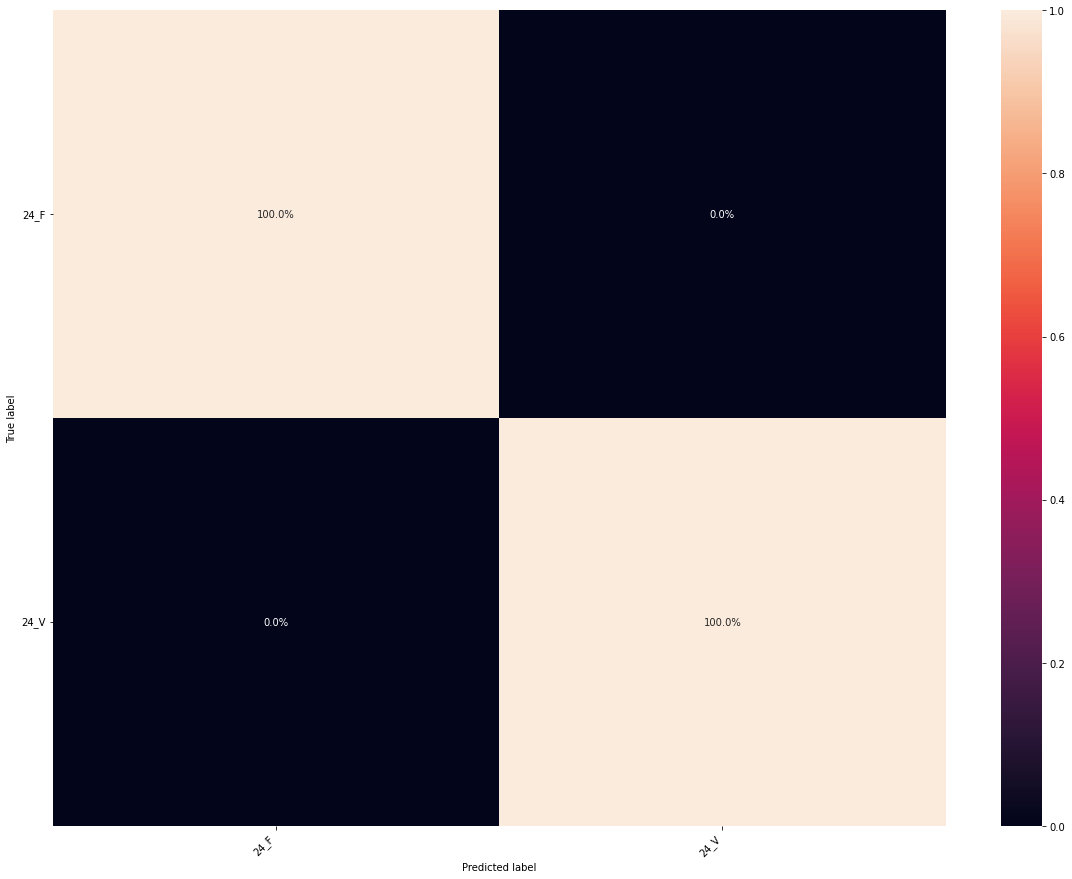


Cross_val_score
R²= 0.9

###################################################################
Treinamento individuo 25
Score: 1.0

[1. 0.]
[0. 1.]


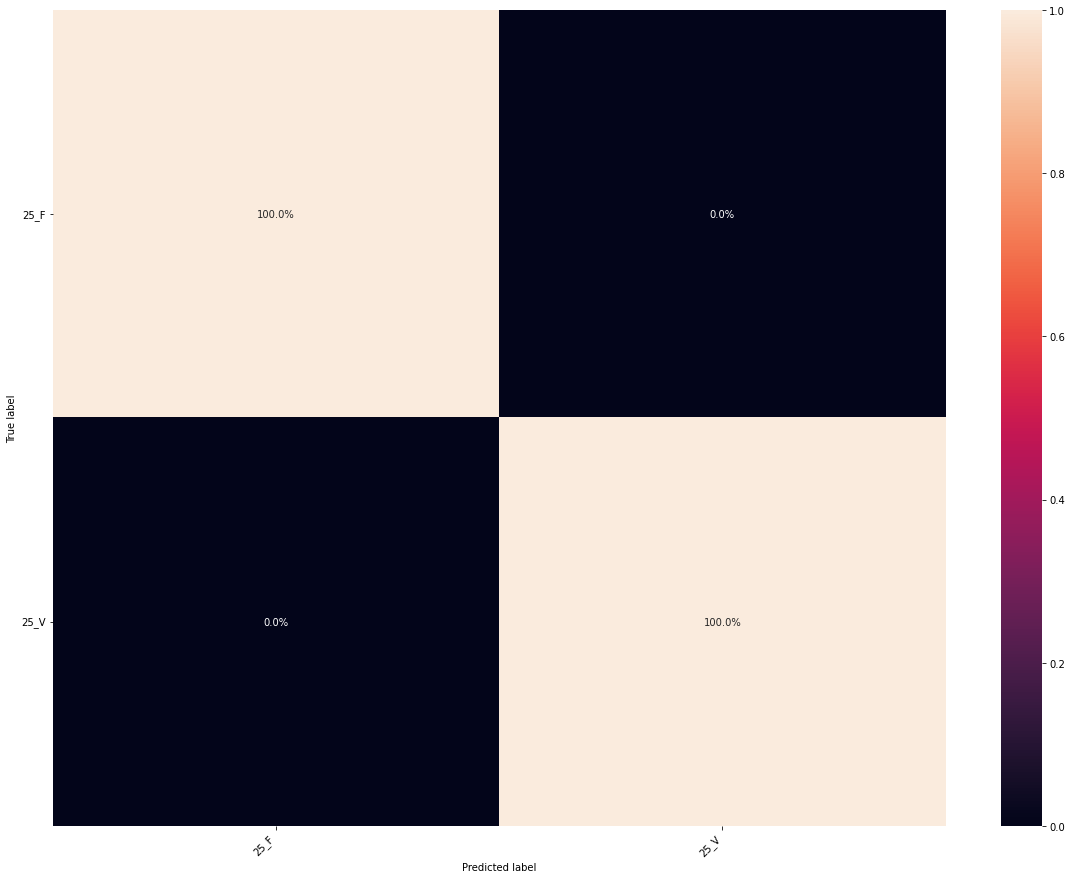


Cross_val_score
R²= 0.95

###################################################################
Treinamento individuo 26
Score: 1.0

[1. 0.]
[0. 1.]


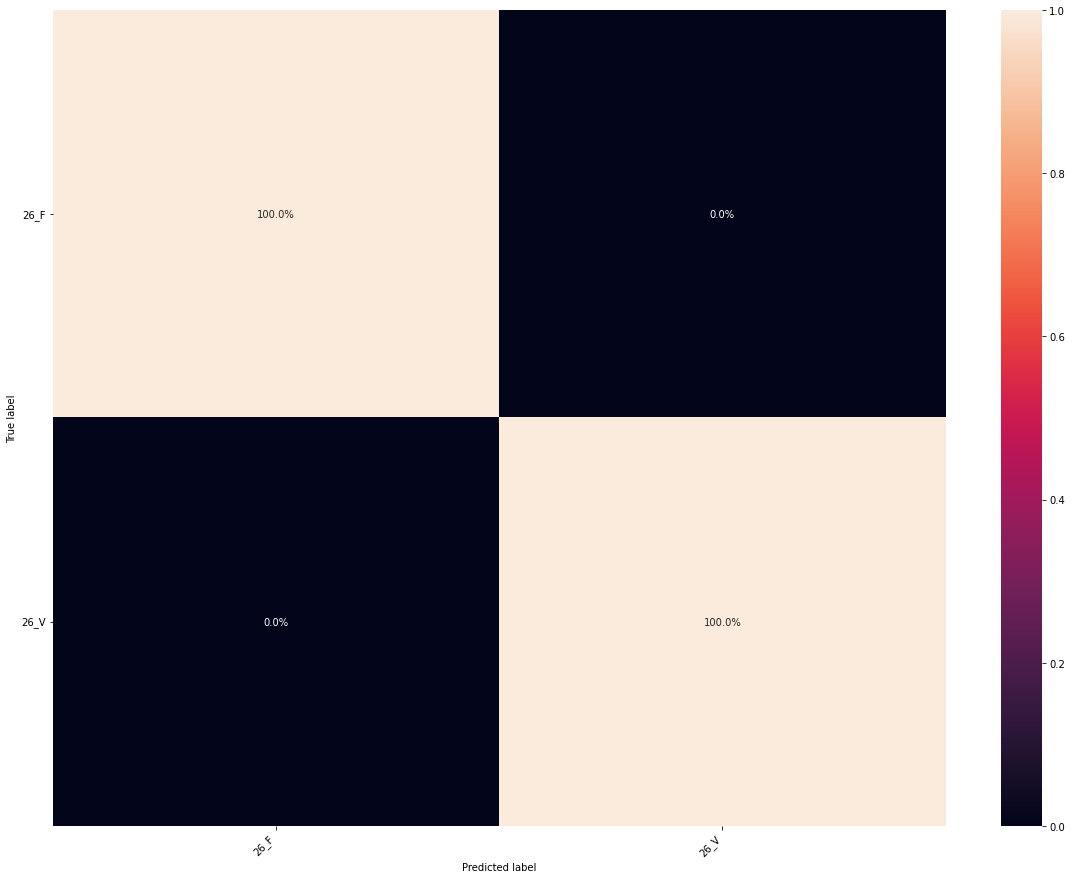


Cross_val_score
R²= 0.95

###################################################################
Treinamento individuo 27
Score: 0.8333333333333334

[0.66666667 0.33333333]
[0. 1.]


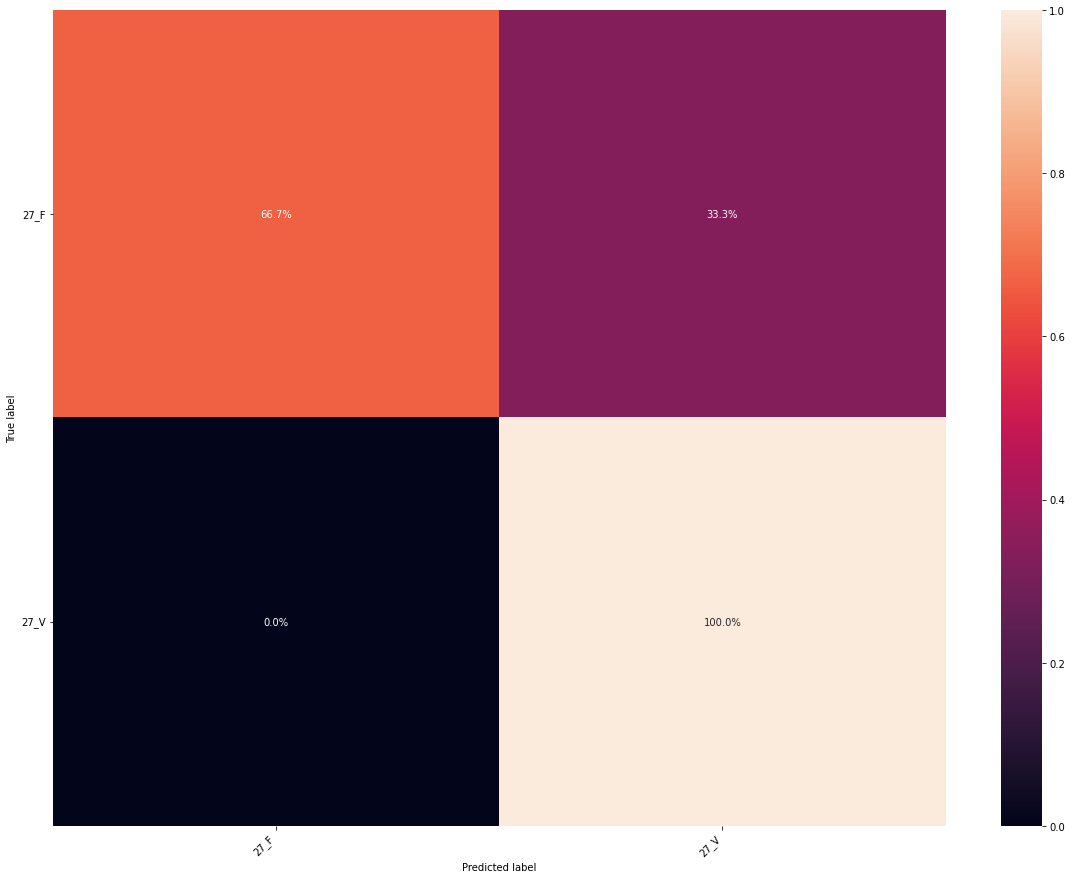


Cross_val_score
R²= 1.0

###################################################################
Treinamento individuo 28
Score: 1.0

[1. 0.]
[0. 1.]


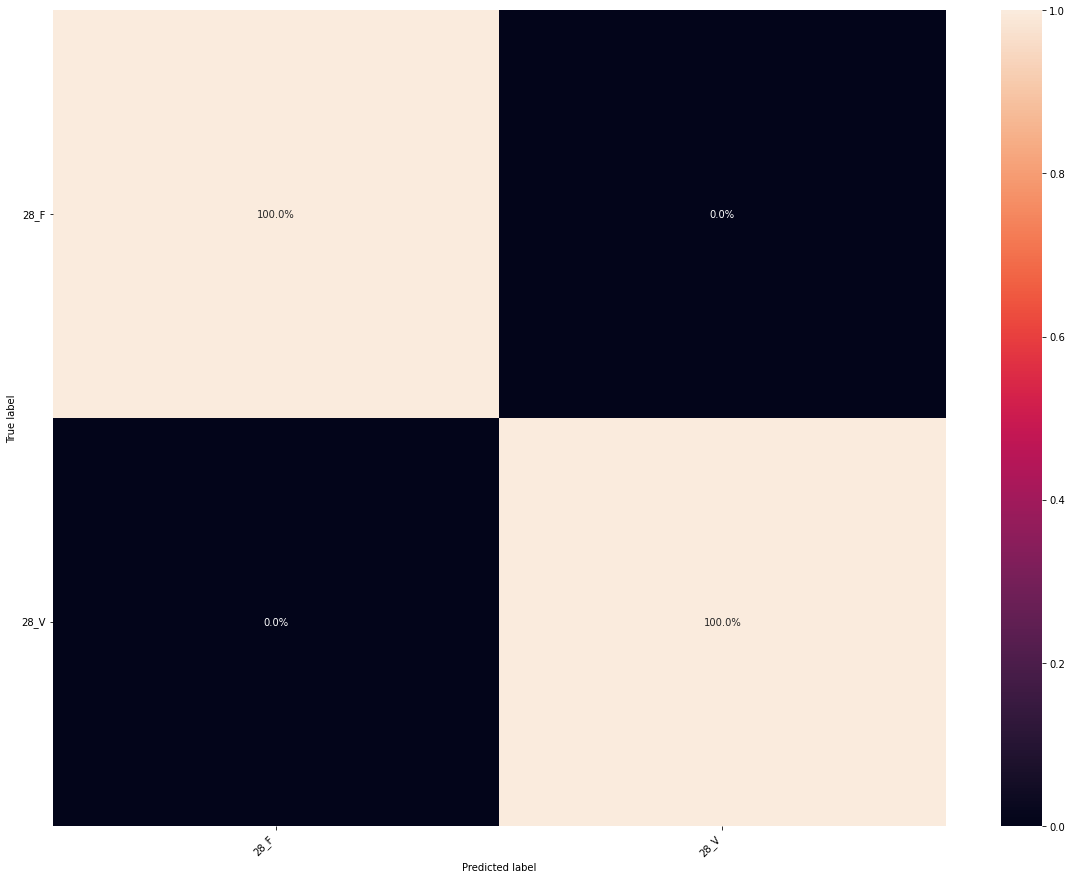


Cross_val_score
R²= 0.9

###################################################################
Treinamento individuo 29
Score: 0.6666666666666666

[0.33333333 0.66666667]
[0. 1.]


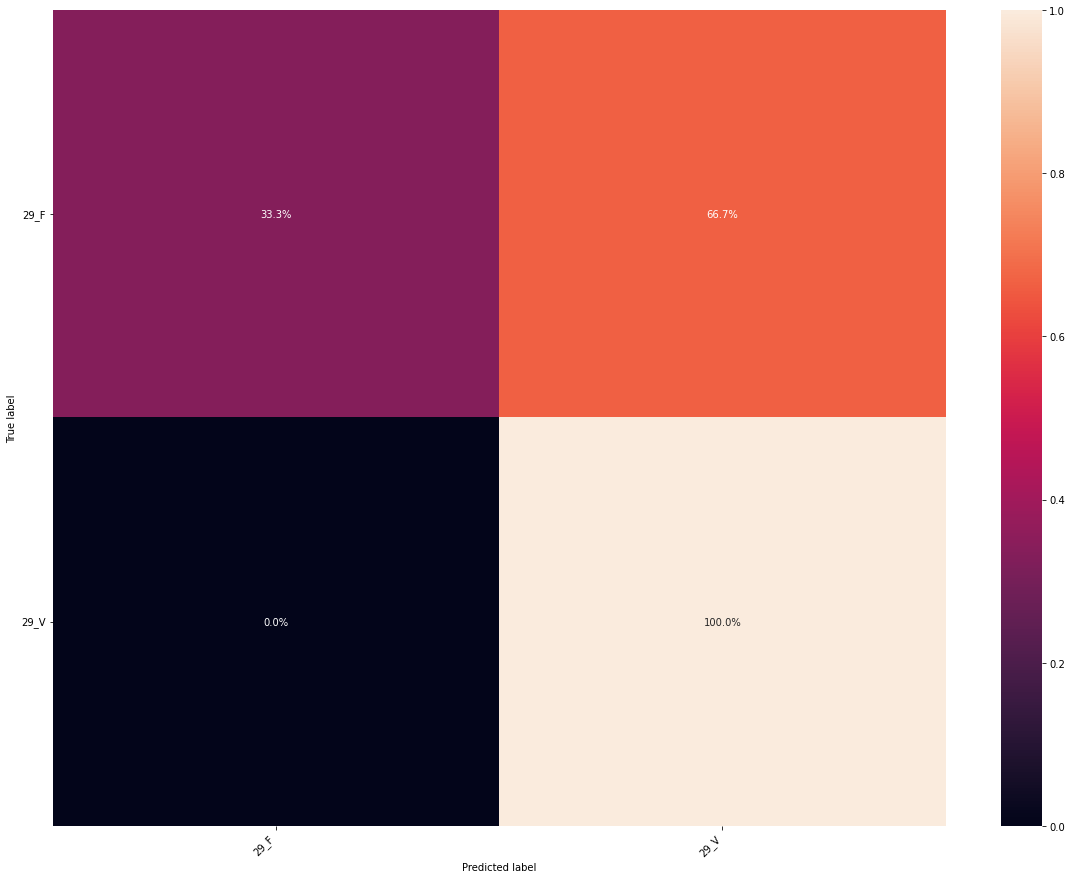


Cross_val_score
R²= 0.95

###################################################################
Treinamento individuo 30
Score: 1.0

[1. 0.]
[0. 1.]


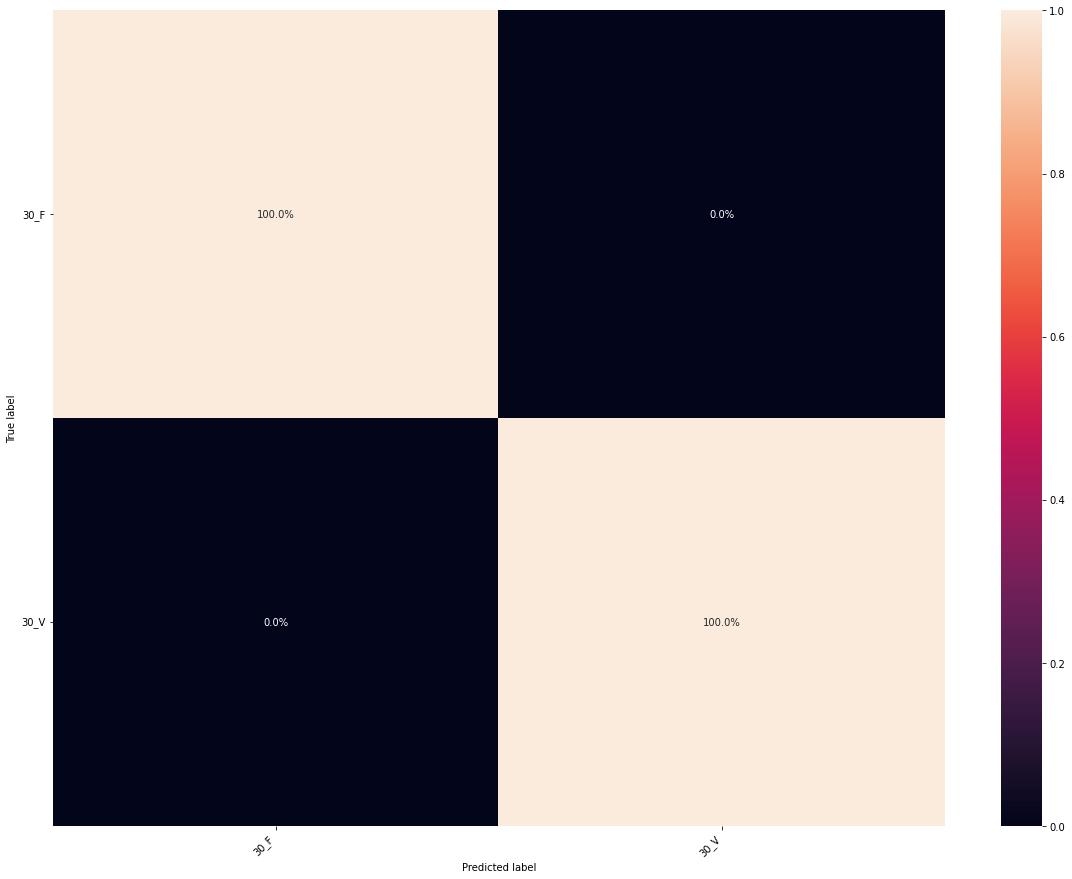


Cross_val_score
R²= 1.0

###################################################################
Treinamento individuo 31
Score: 1.0

[1. 0.]
[0. 1.]


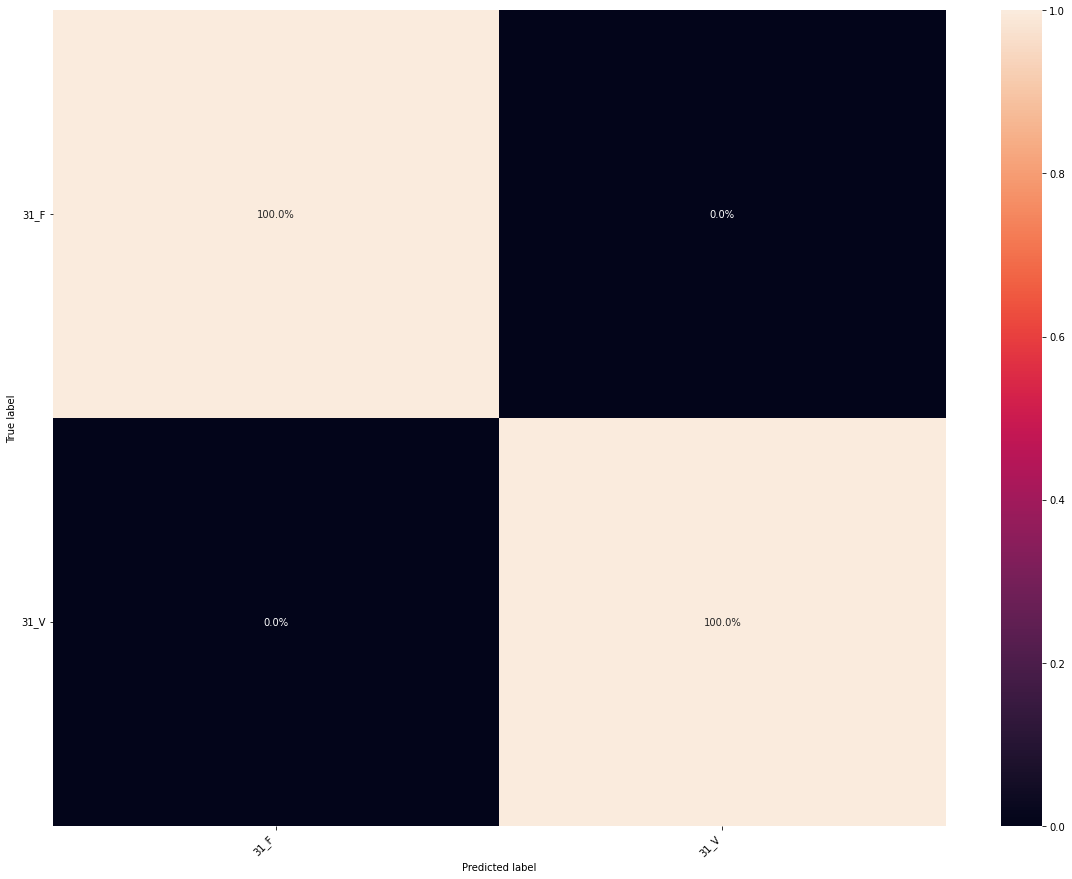


Cross_val_score
R²= 0.9

###################################################################
Treinamento individuo 32
Score: 1.0

[1. 0.]
[0. 1.]


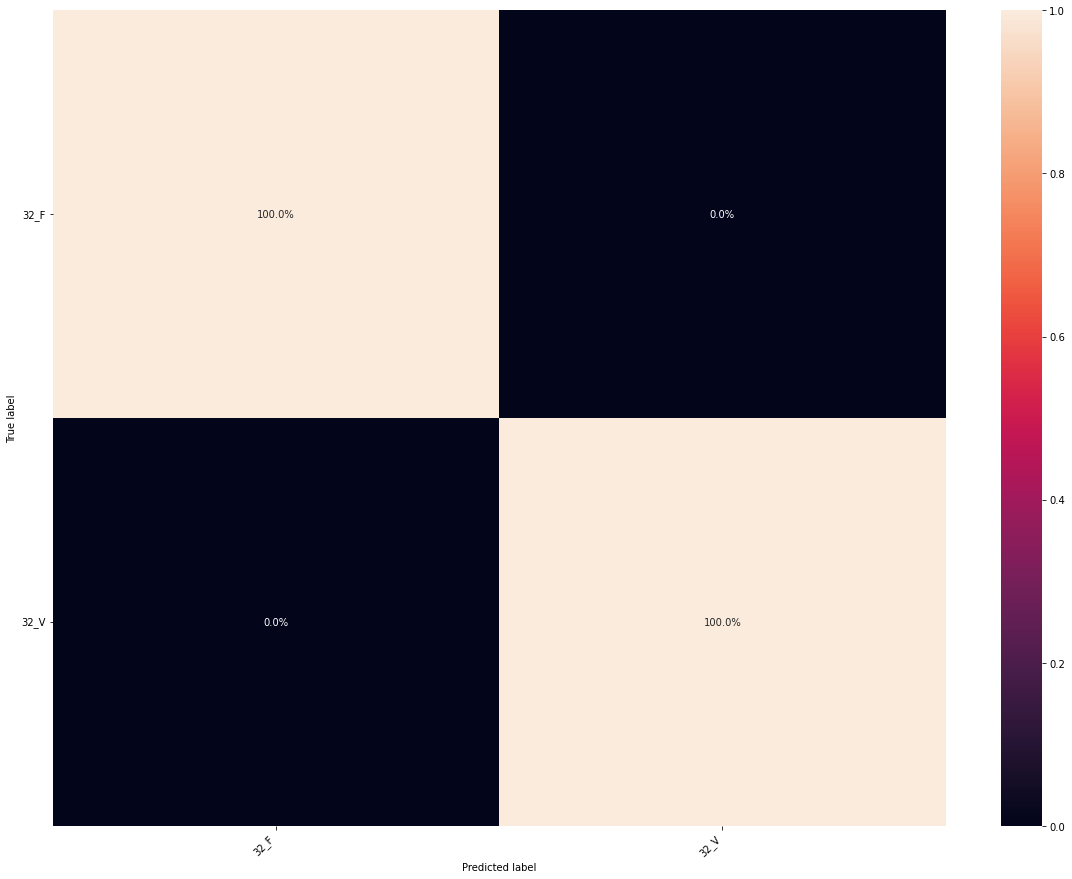


Cross_val_score
R²= 1.0

###################################################################
Treinamento individuo 33
Score: 1.0

[1. 0.]
[0. 1.]


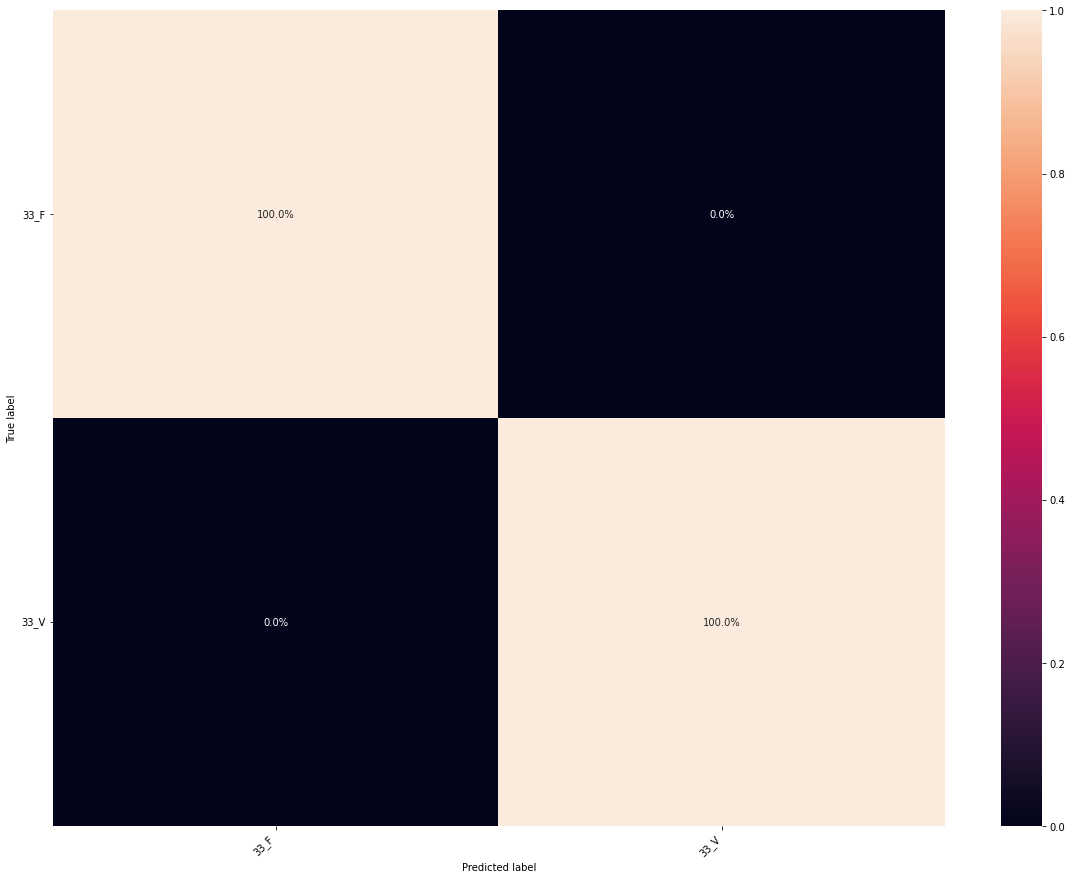


Cross_val_score
R²= 1.0

###################################################################
Treinamento individuo 34
Score: 0.8333333333333334

[0.75 0.25]
[0. 1.]


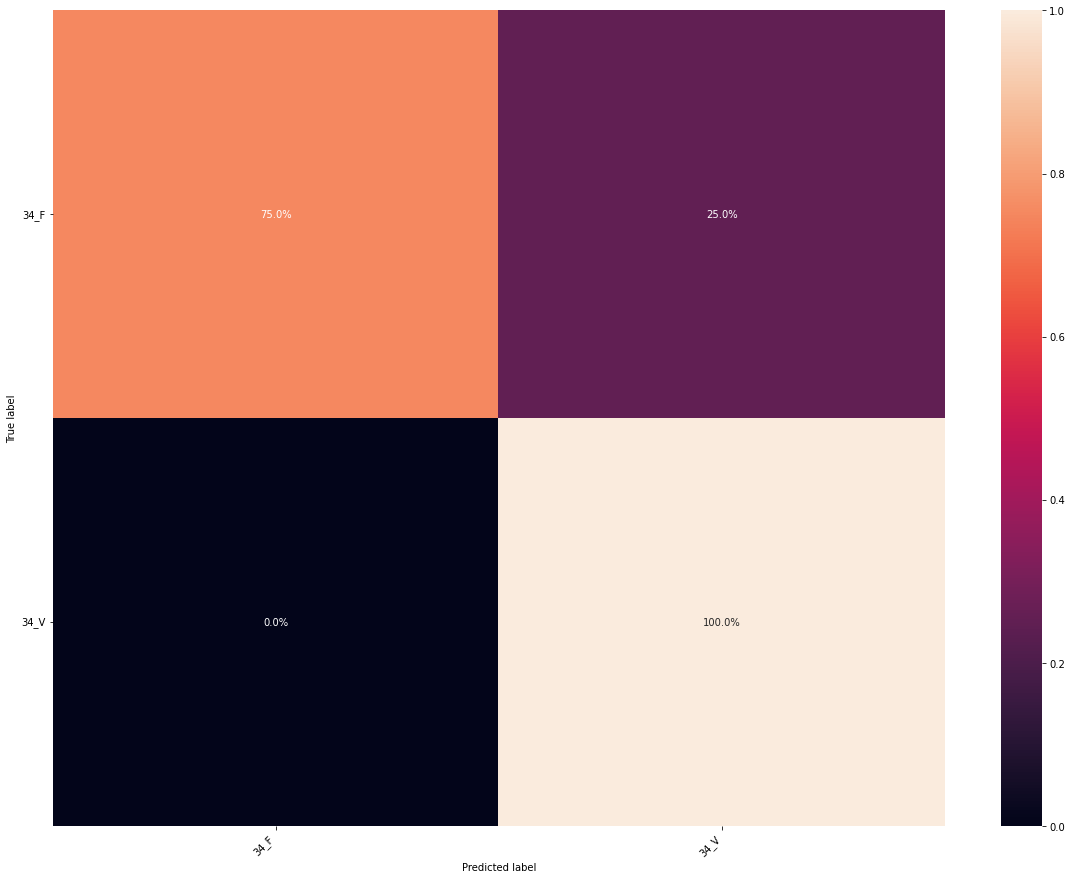


Cross_val_score
R²= 0.95

###################################################################
Treinamento individuo 35
Score: 0.8333333333333334

[0.66666667 0.33333333]
[0. 1.]


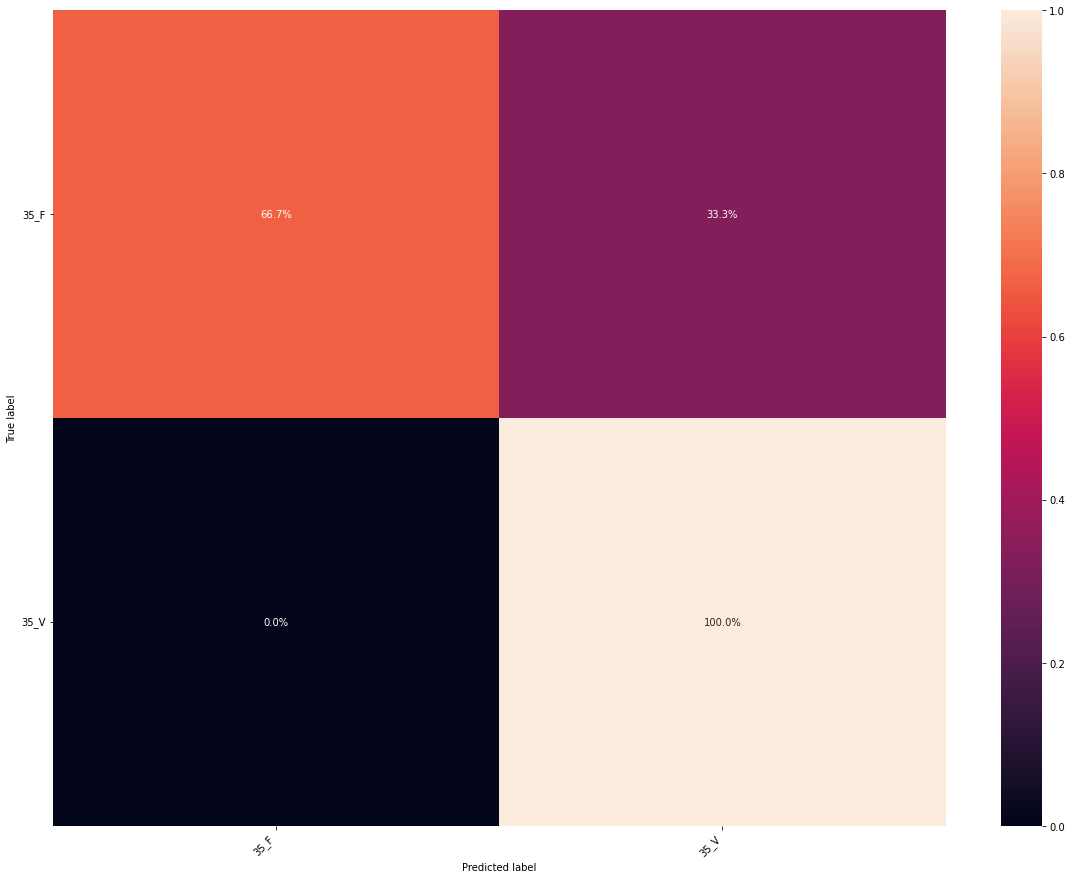


Cross_val_score
R²= 1.0

###################################################################
Treinamento individuo 36
Score: 1.0

[1. 0.]
[0. 1.]


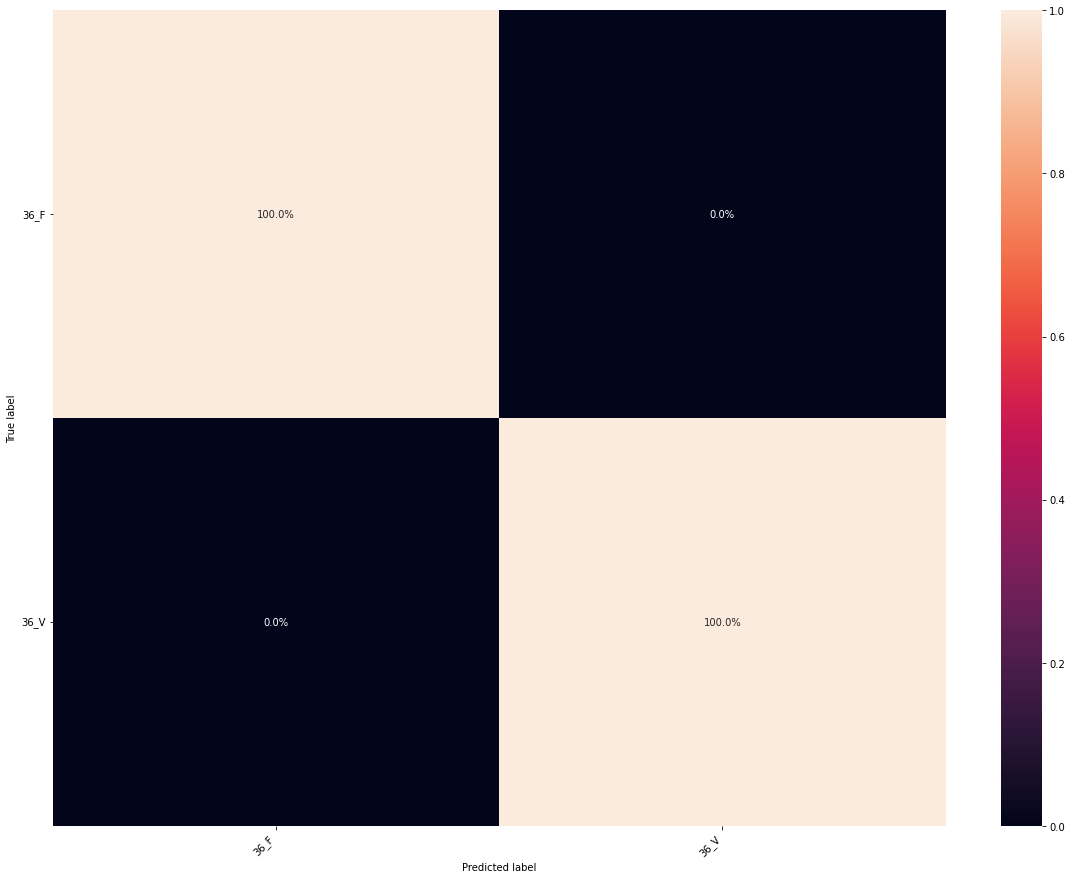


Cross_val_score
R²= 1.0

###################################################################
Treinamento individuo 37
Score: 0.8333333333333334

[1. 0.]
[0.25 0.75]


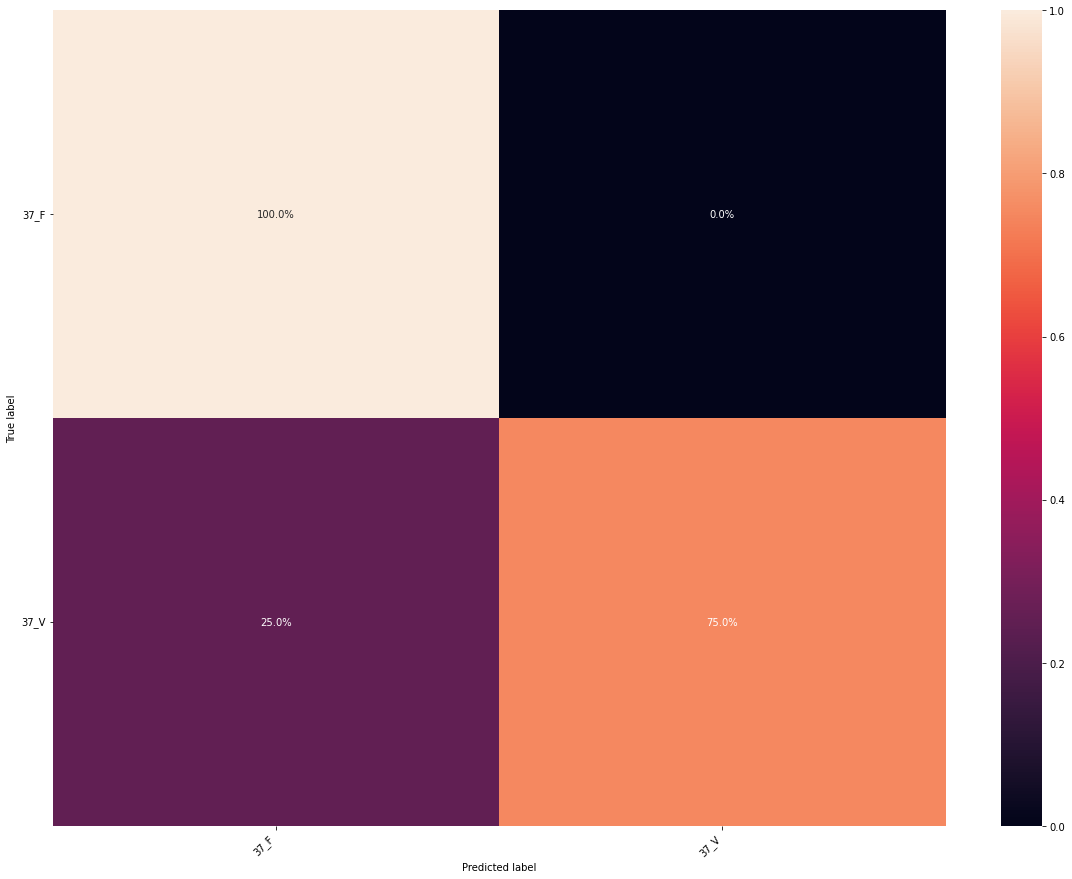


Cross_val_score
R²= 0.9

###################################################################
Treinamento individuo 38
Score: 1.0

[1. 0.]
[0. 1.]


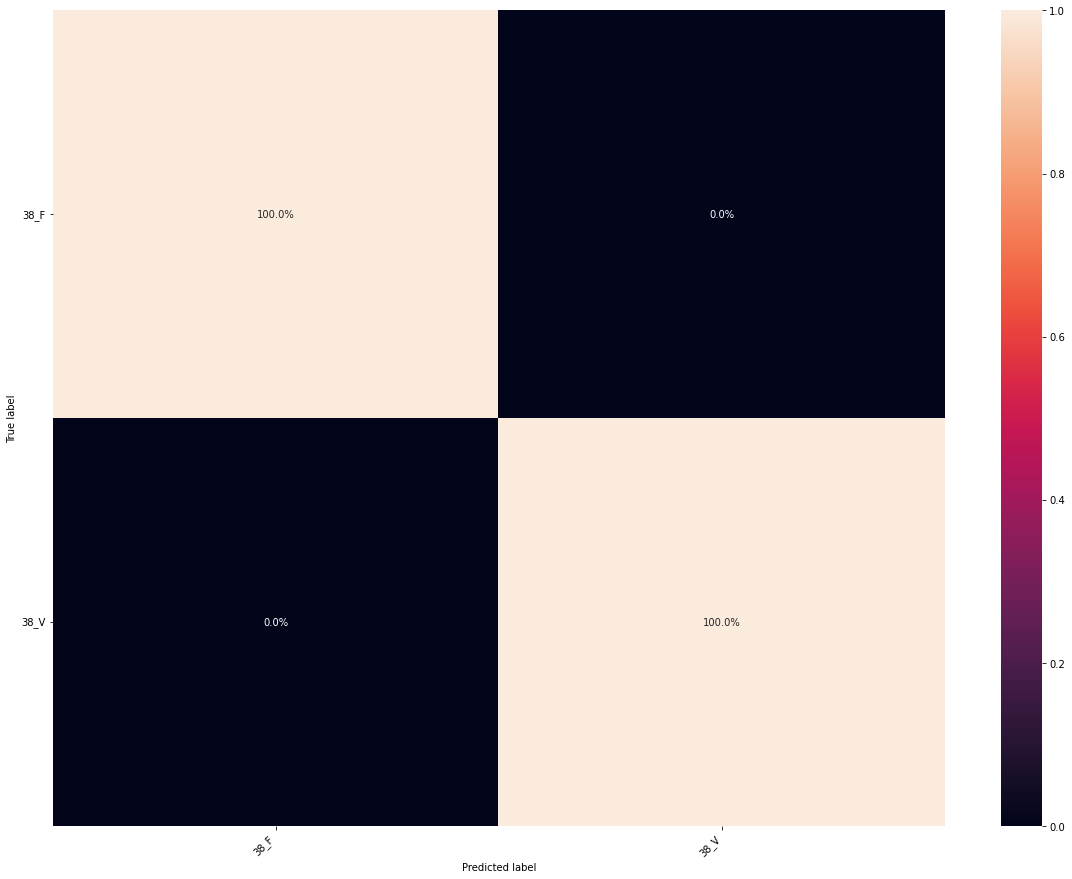


Cross_val_score
R²= 0.95

###################################################################
Treinamento individuo 39
Score: 1.0

[1. 0.]
[0. 1.]


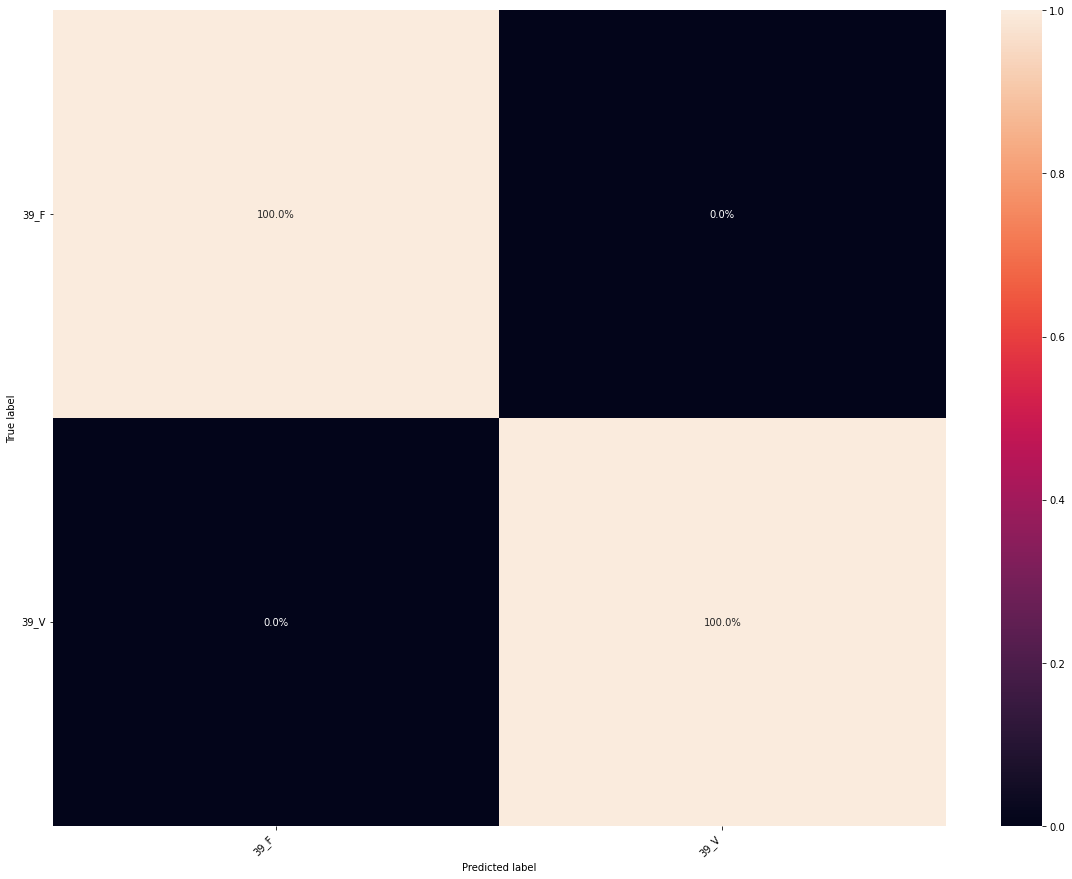


Cross_val_score
R²= 0.9

###################################################################
Treinamento individuo 40
Score: 0.8333333333333334

[0.5 0.5]
[0. 1.]


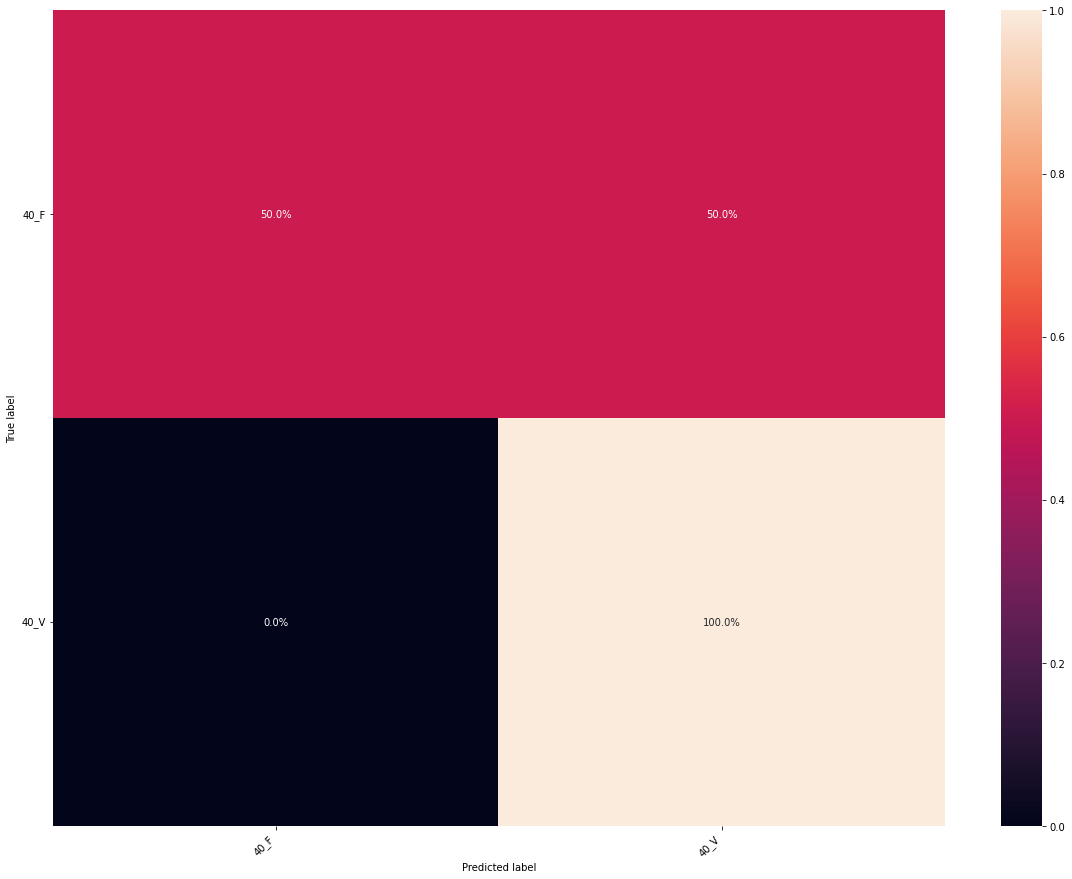


Cross_val_score
R²= 0.9

###################################################################
Treinamento individuo 41
Score: 1.0

[1. 0.]
[0. 1.]


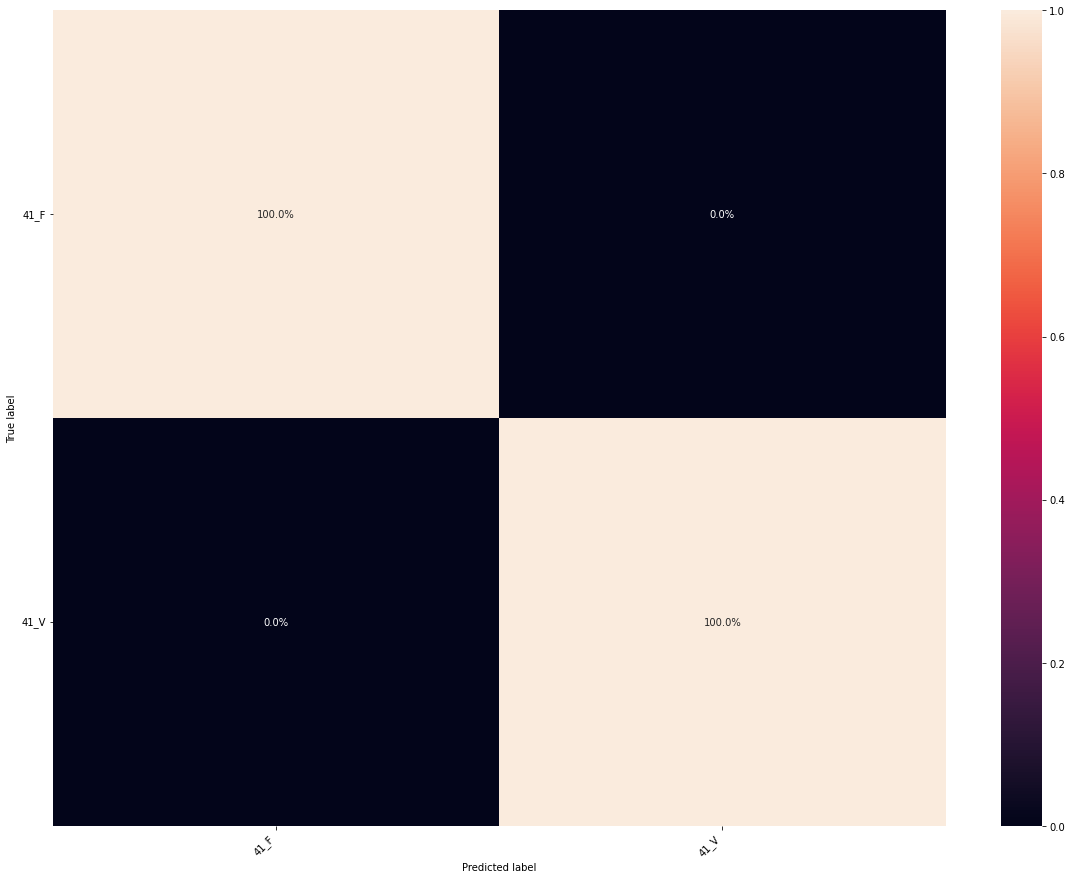


Cross_val_score
R²= 0.9166666666666666

###################################################################
Treinamento individuo 42
Score: 1.0

[1. 0.]
[0. 1.]


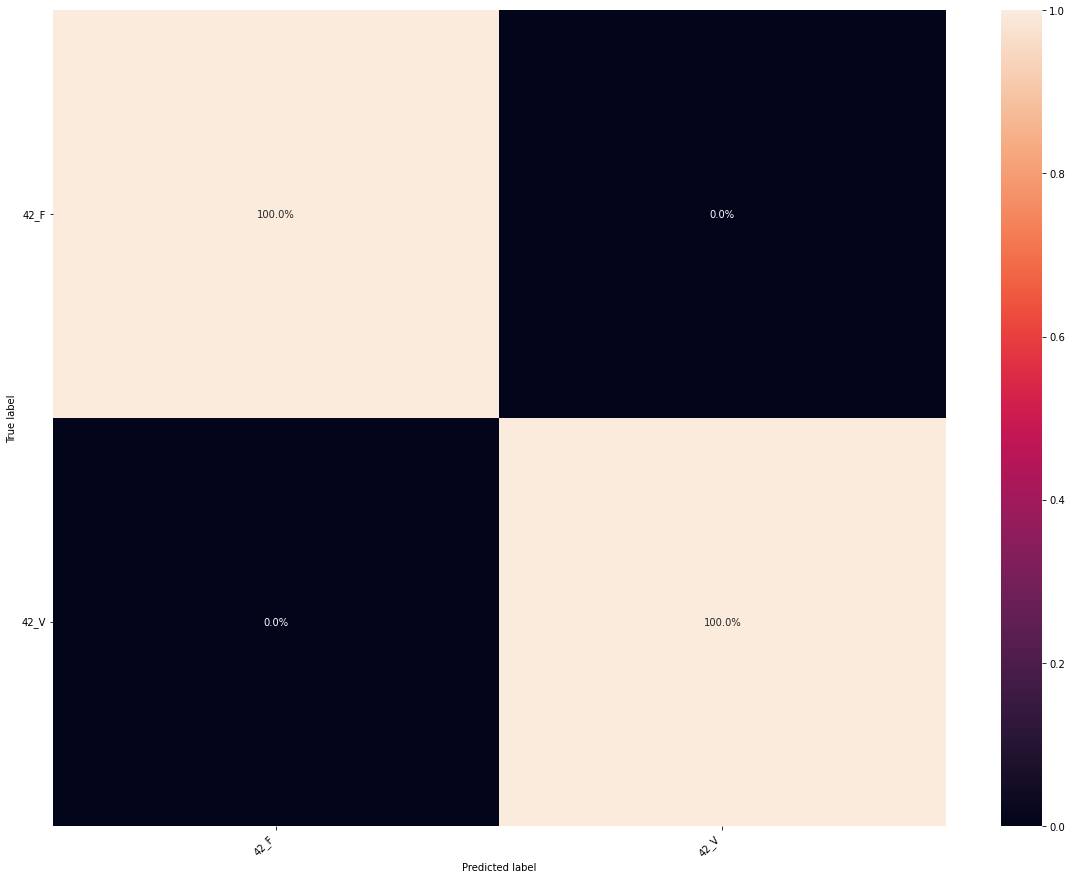


Cross_val_score
R²= 0.95

###################################################################
Treinamento individuo 43
Score: 1.0

[1. 0.]
[0. 1.]


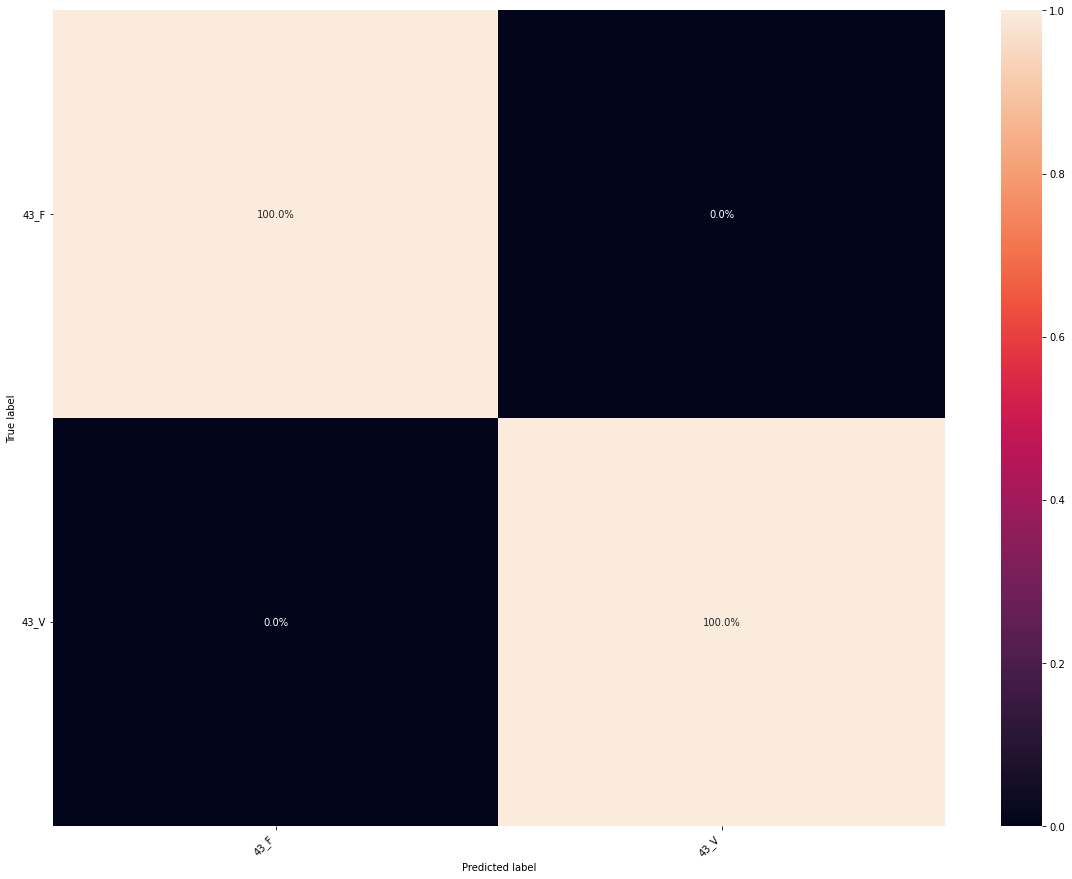


Cross_val_score
R²= 1.0

###################################################################
Treinamento individuo 44
Score: 1.0

[1. 0.]
[0. 1.]


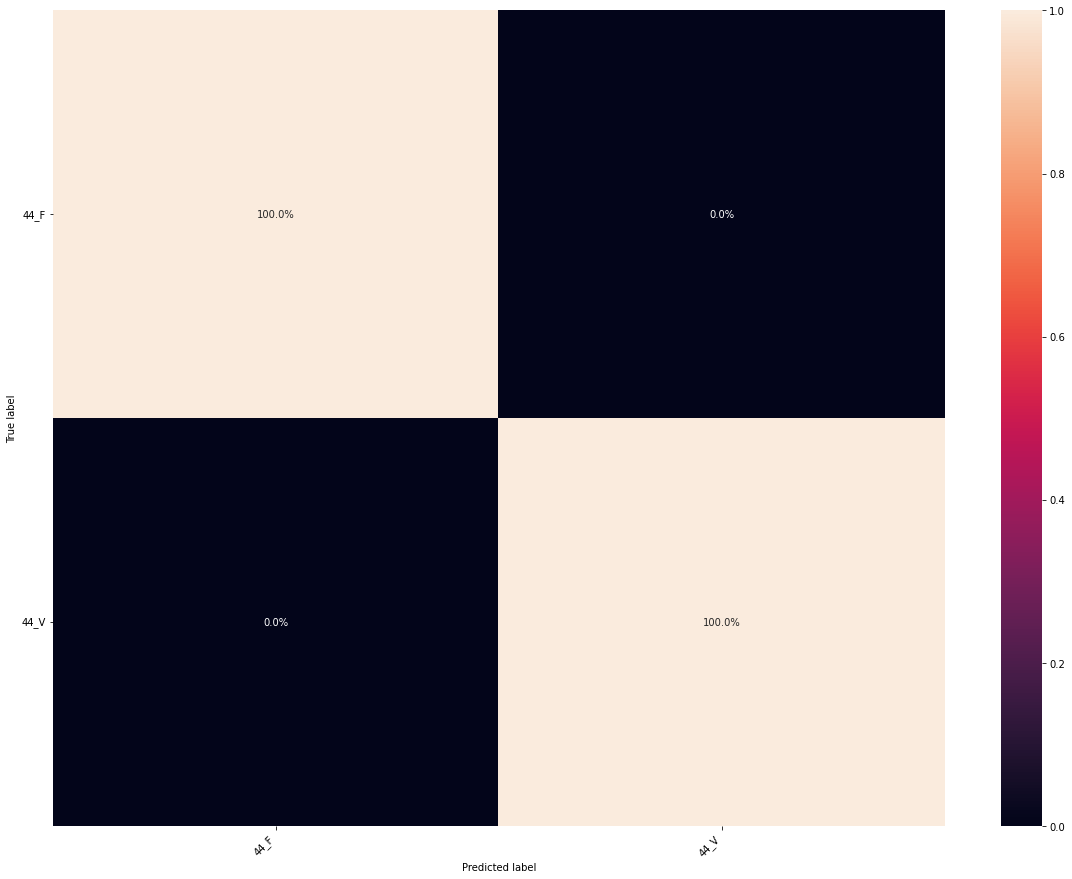


Cross_val_score
R²= 0.95

###################################################################
Treinamento individuo 45
Score: 0.8333333333333334

[0.75 0.25]
[0. 1.]


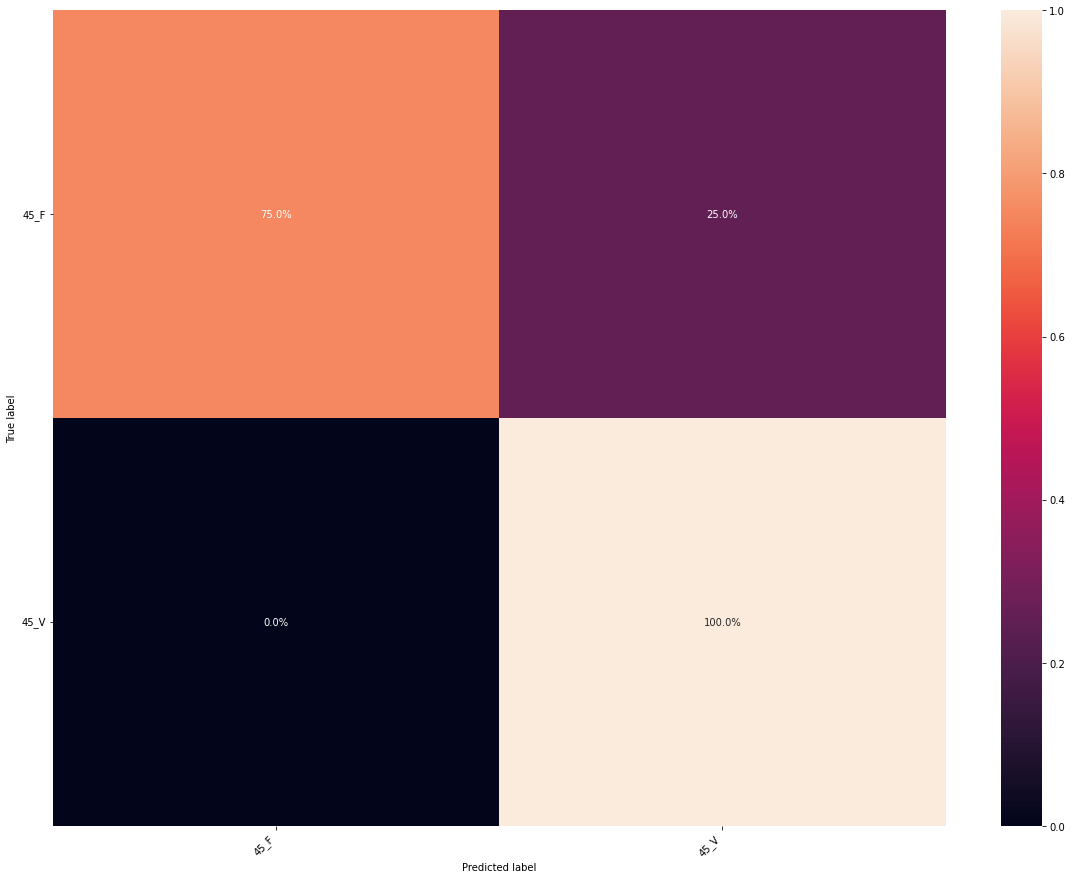


Cross_val_score
R²= 0.95

###################################################################
Treinamento individuo 46
Score: 0.8571428571428571

[0.83333333 0.16666667]
[0. 1.]


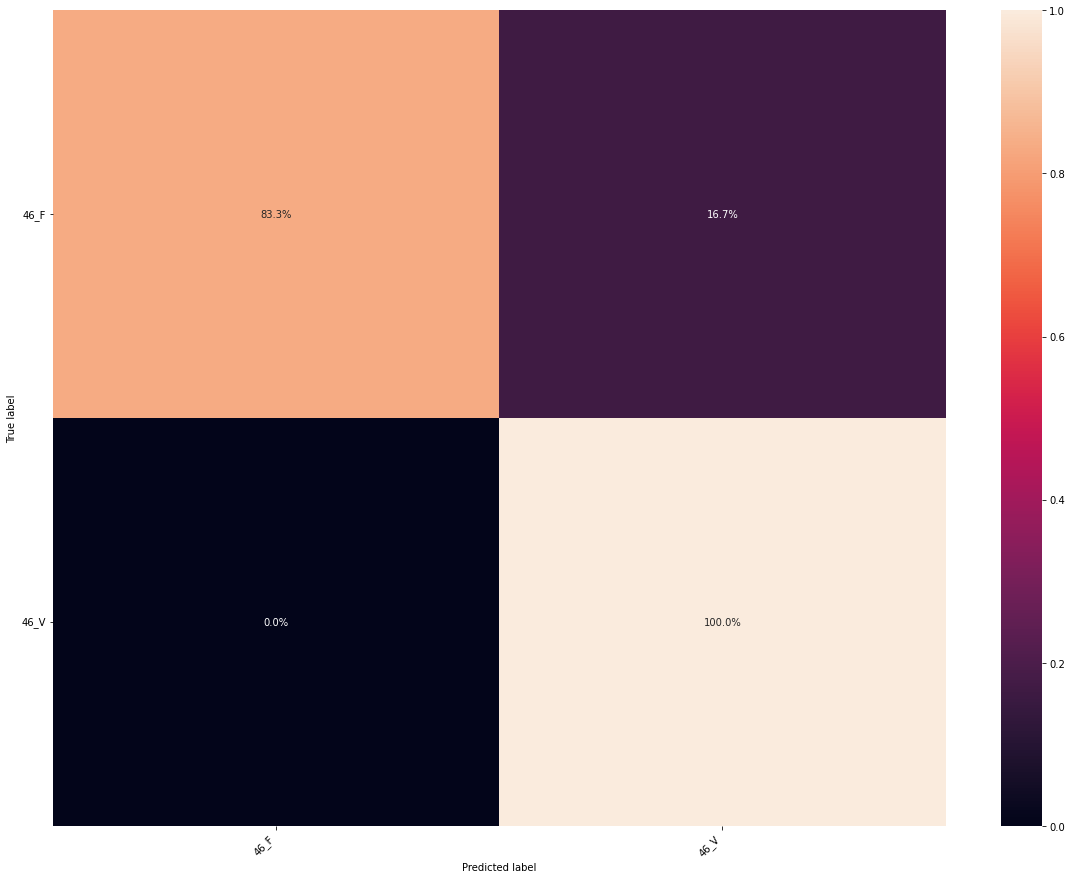


Cross_val_score
R²= 0.95

###################################################################
Treinamento individuo 47
Score: 0.6666666666666666

[0.5 0.5]
[0. 1.]


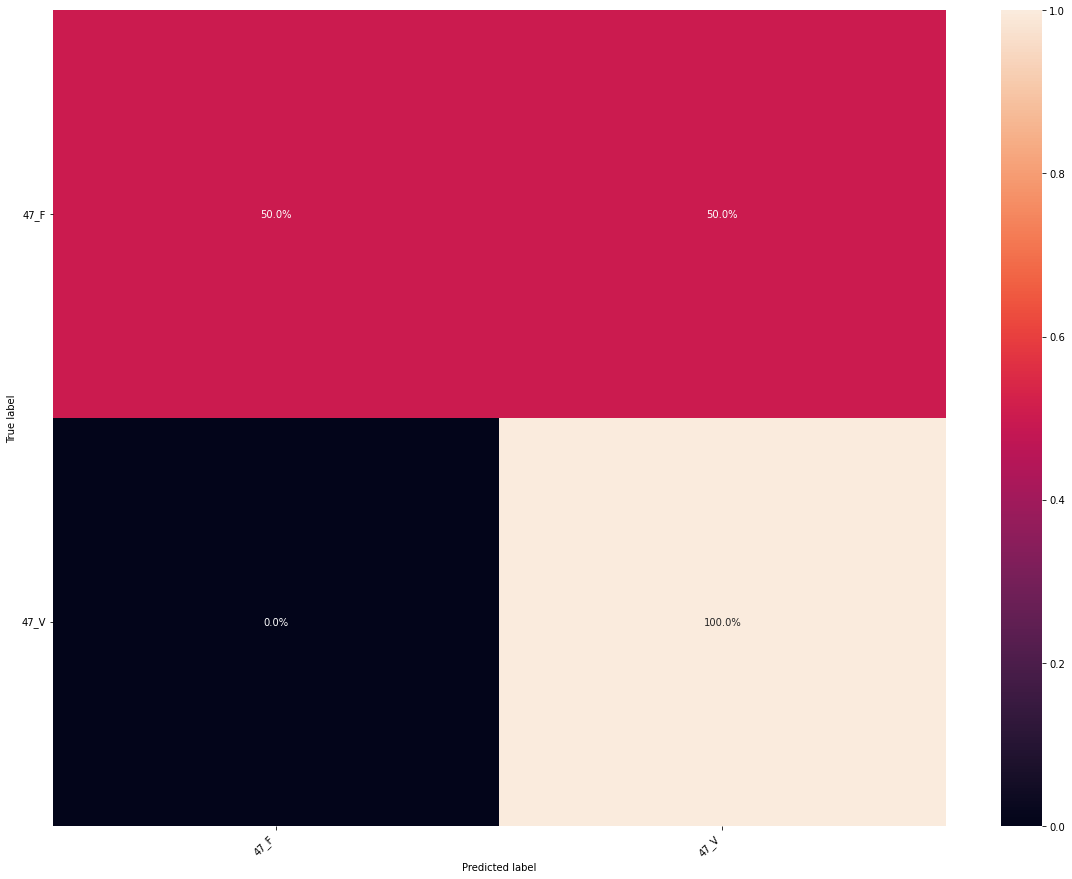


Cross_val_score
R²= 1.0

###################################################################
Treinamento individuo 48
Score: 1.0

[1. 0.]
[0. 1.]


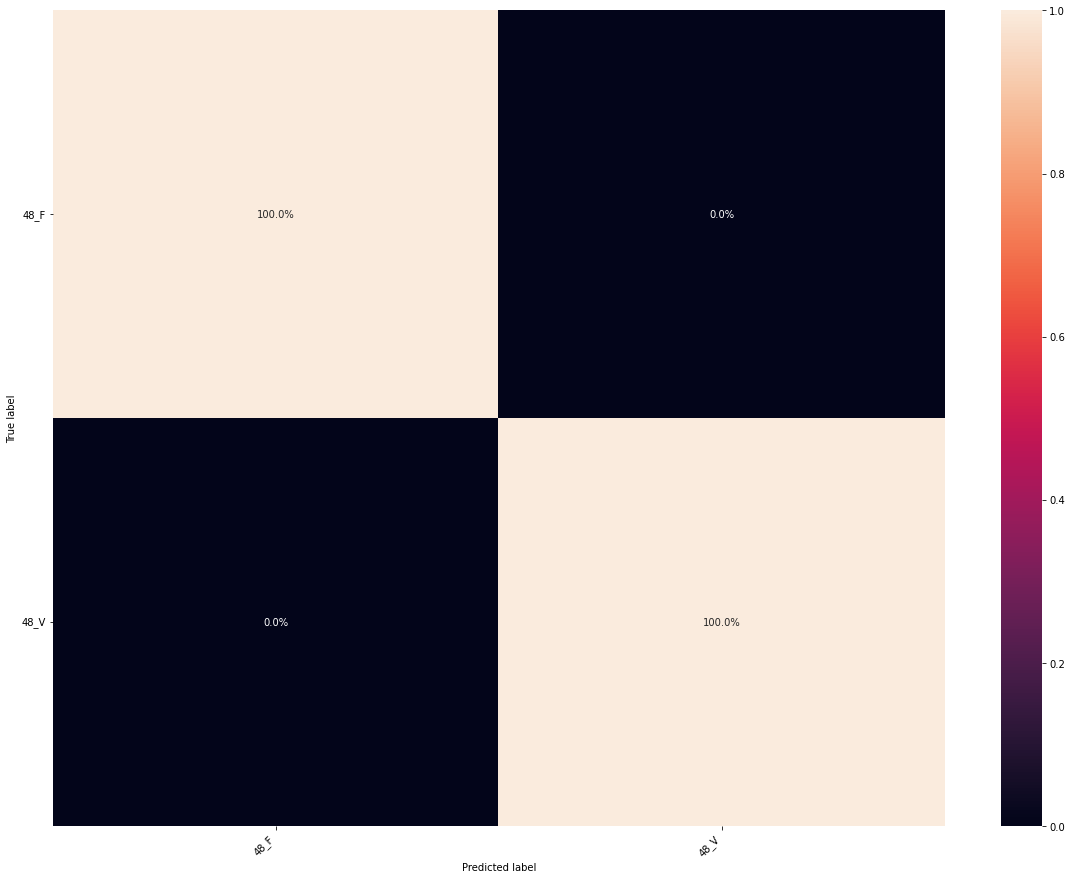


Cross_val_score
R²= 0.95

###################################################################
Treinamento individuo 49
Score: 1.0

[1. 0.]
[0. 1.]


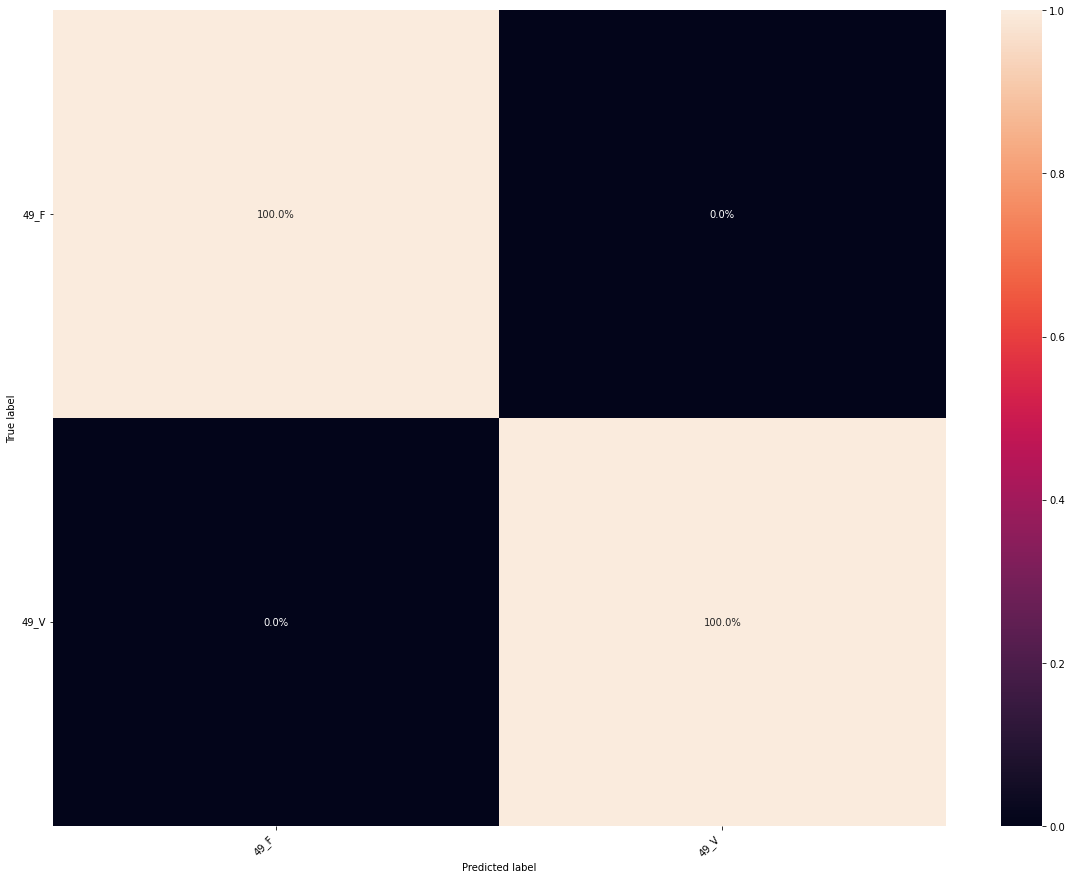


Cross_val_score
R²= 0.9

###################################################################
Treinamento individuo 50
Score: 0.8333333333333334

[0.66666667 0.33333333]
[0. 1.]


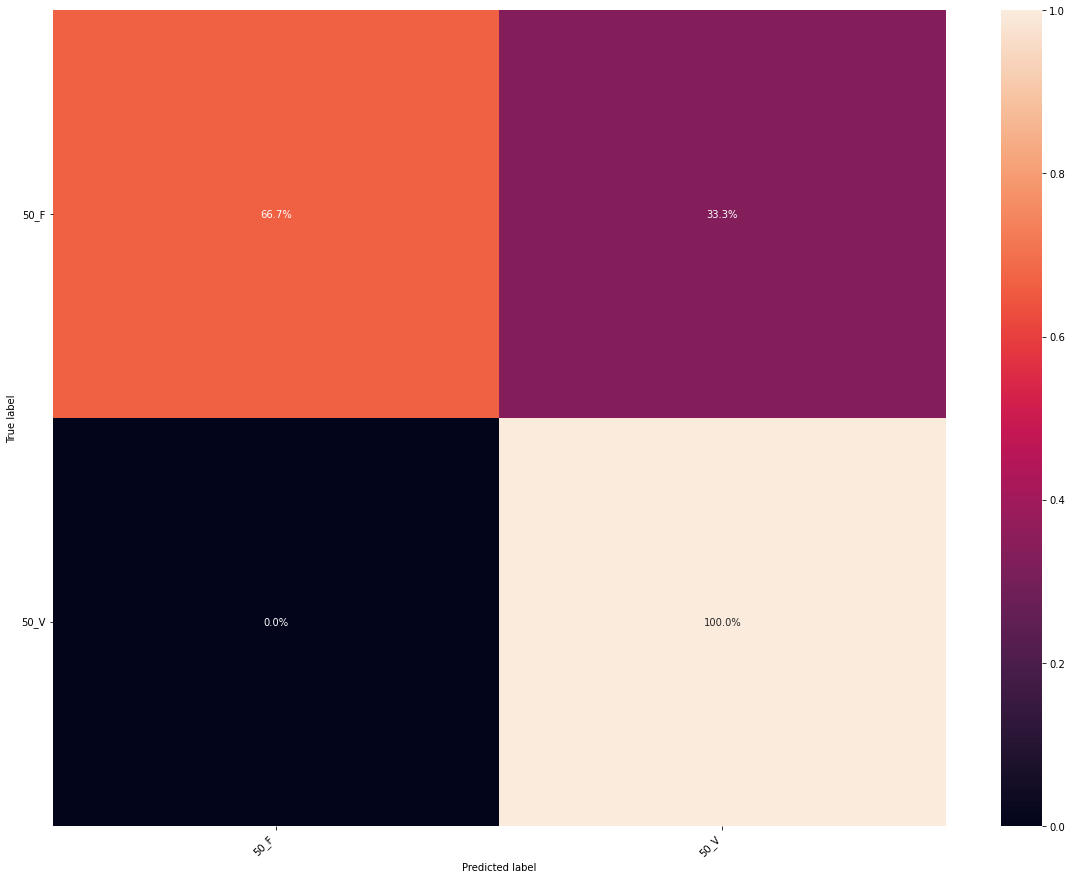


Cross_val_score
R²= 0.95

###################################################################
Treinamento individuo 51
Score: 0.6666666666666666

[1. 0.]
[0.5 0.5]


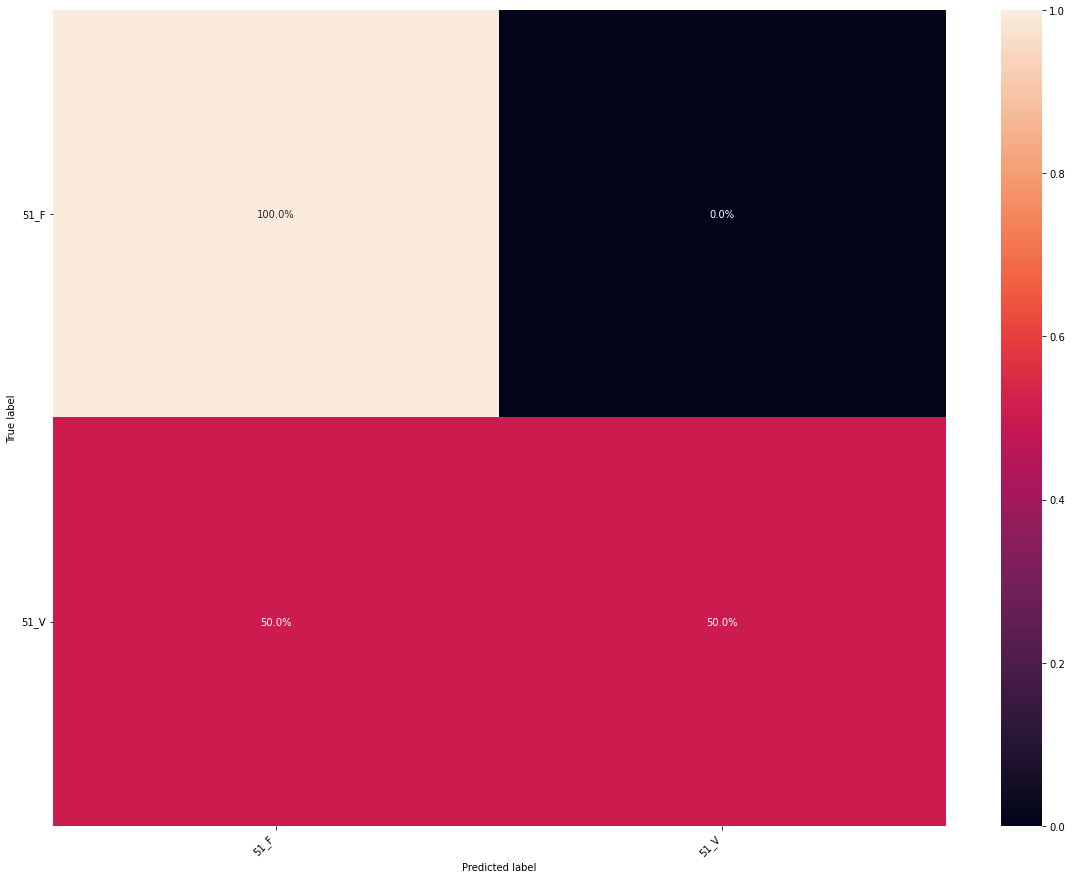


Cross_val_score
R²= 1.0

###################################################################
Treinamento individuo 52
Score: 1.0

[1. 0.]
[0. 1.]


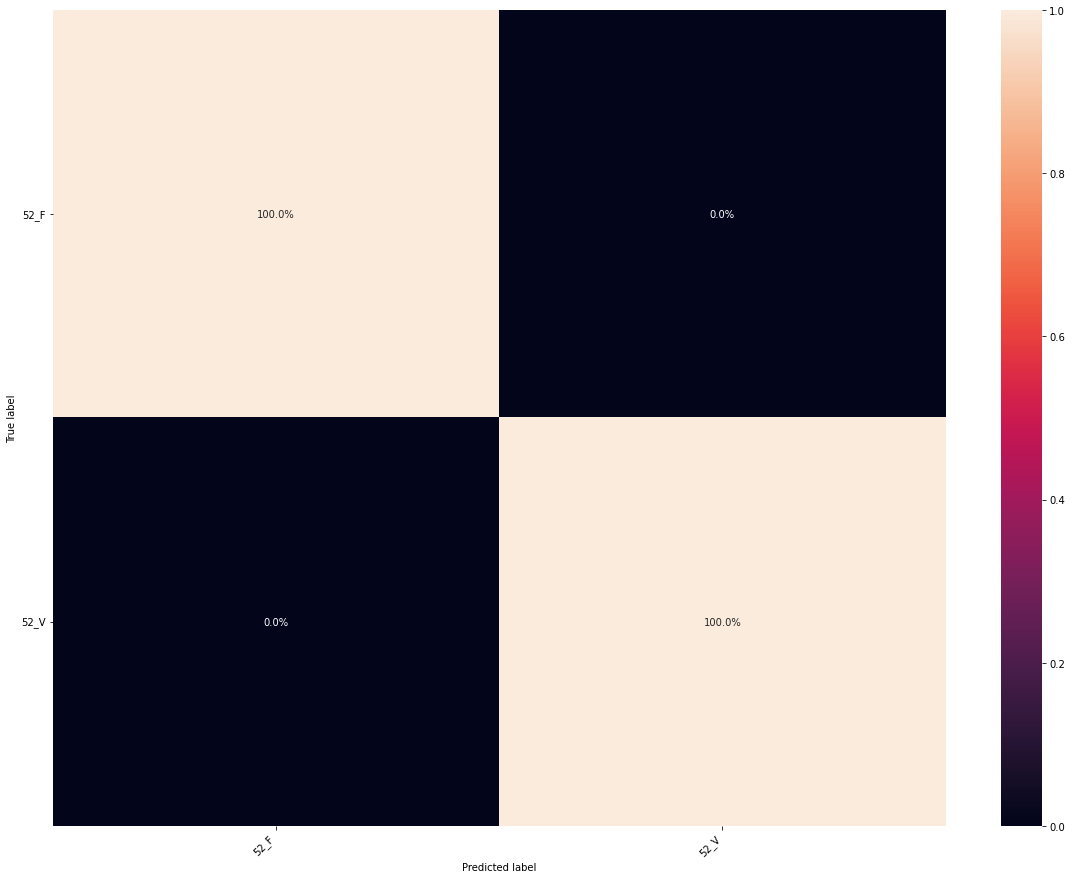


Cross_val_score
R²= 0.95

###################################################################
Treinamento individuo 53
Score: 0.8333333333333334

[0.8 0.2]
[0. 1.]


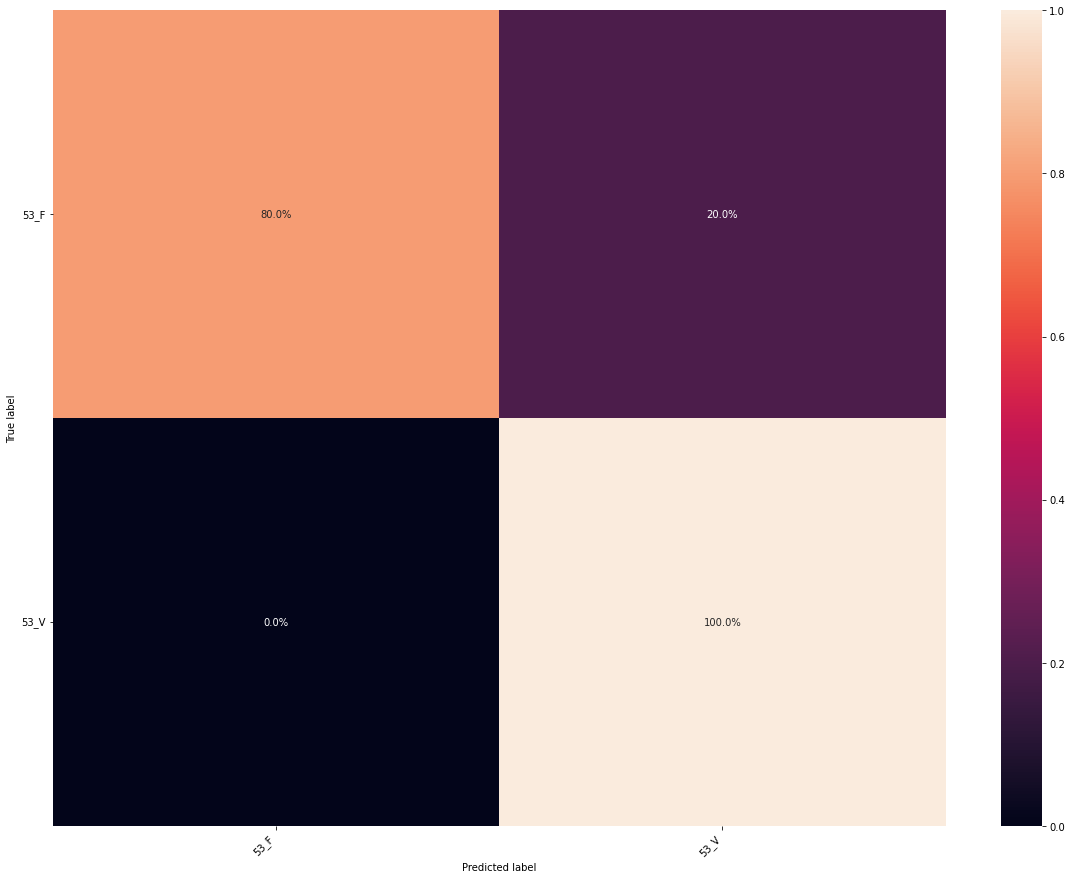


Cross_val_score
R²= 0.95

###################################################################
Treinamento individuo 54
Score: 1.0

[1. 0.]
[0. 1.]


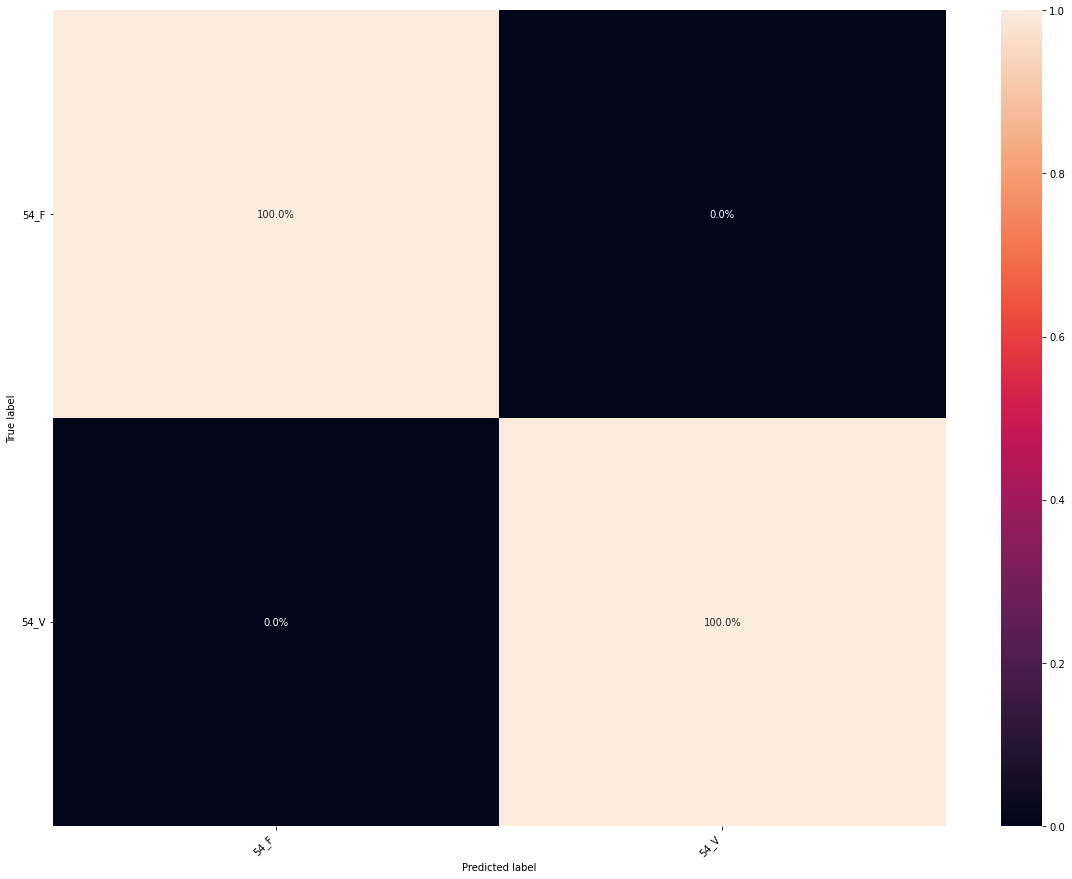


Cross_val_score
R²= 0.9

###################################################################
Treinamento individuo 55
Score: 1.0

[1. 0.]
[0. 1.]


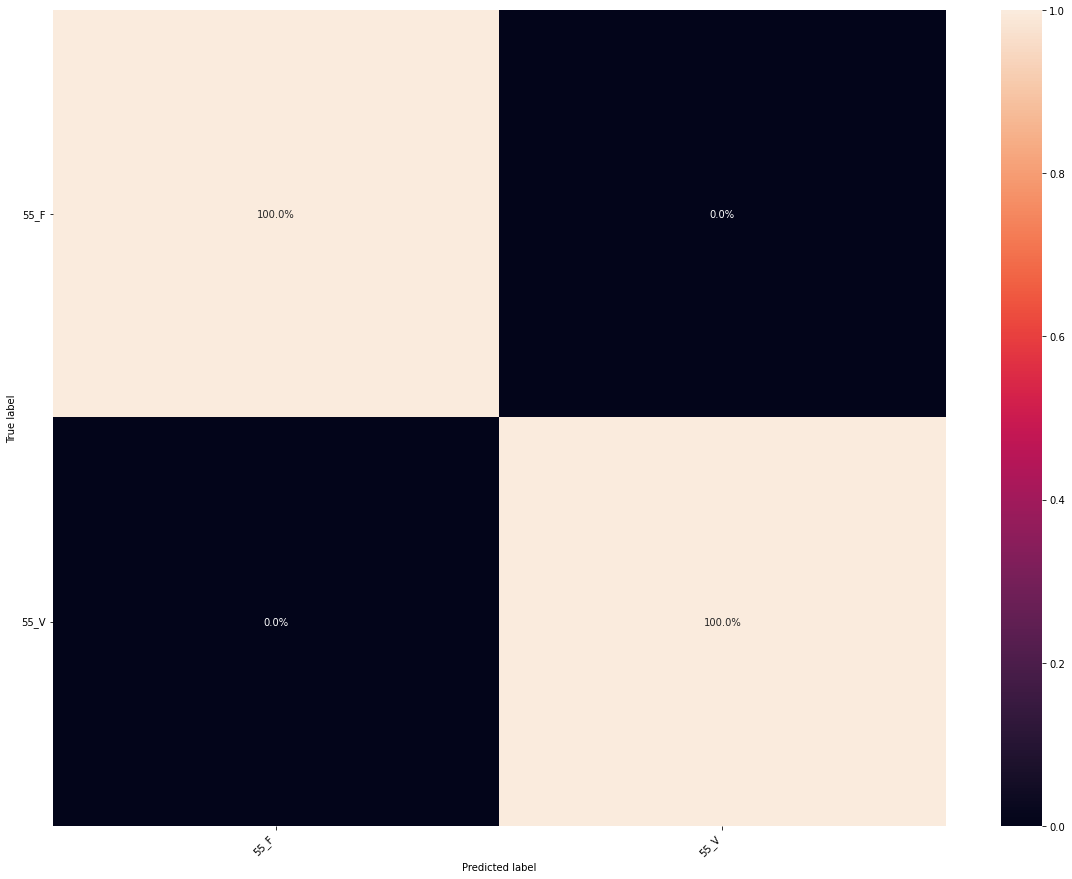


Cross_val_score
R²= 0.95

###################################################################
Treinamento individuo 56
Score: 1.0

[1. 0.]
[0. 1.]


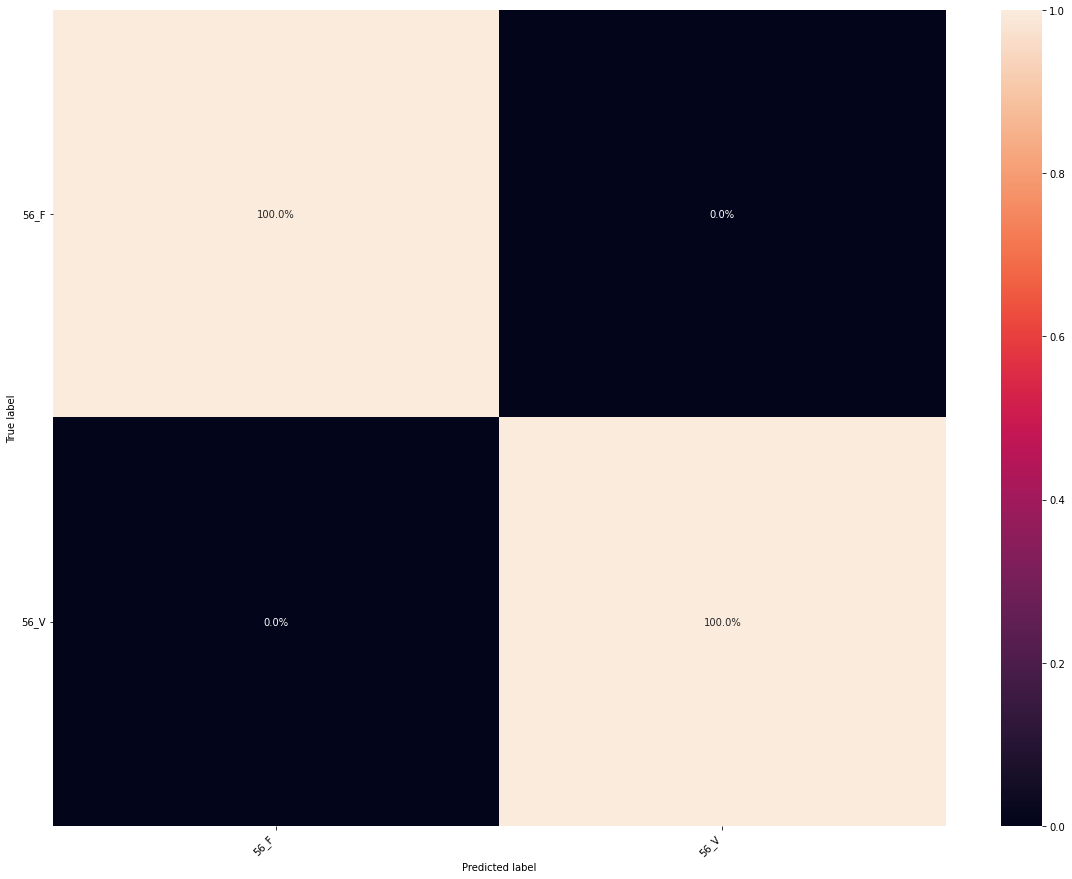


Cross_val_score
R²= 0.95

###################################################################
Treinamento individuo 57
Score: 1.0

[1. 0.]
[0. 1.]


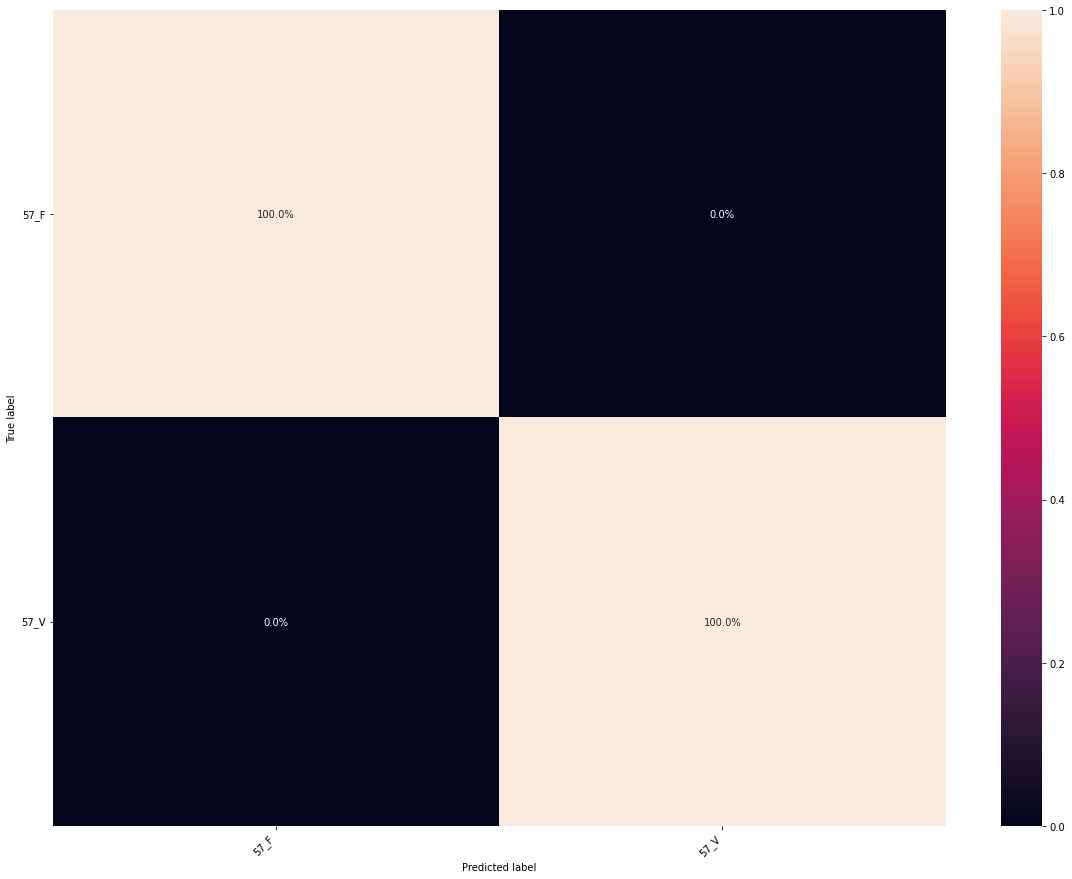


Cross_val_score
R²= 0.95

###################################################################
Treinamento individuo 58
Score: 0.8333333333333334

[0.66666667 0.33333333]
[0. 1.]


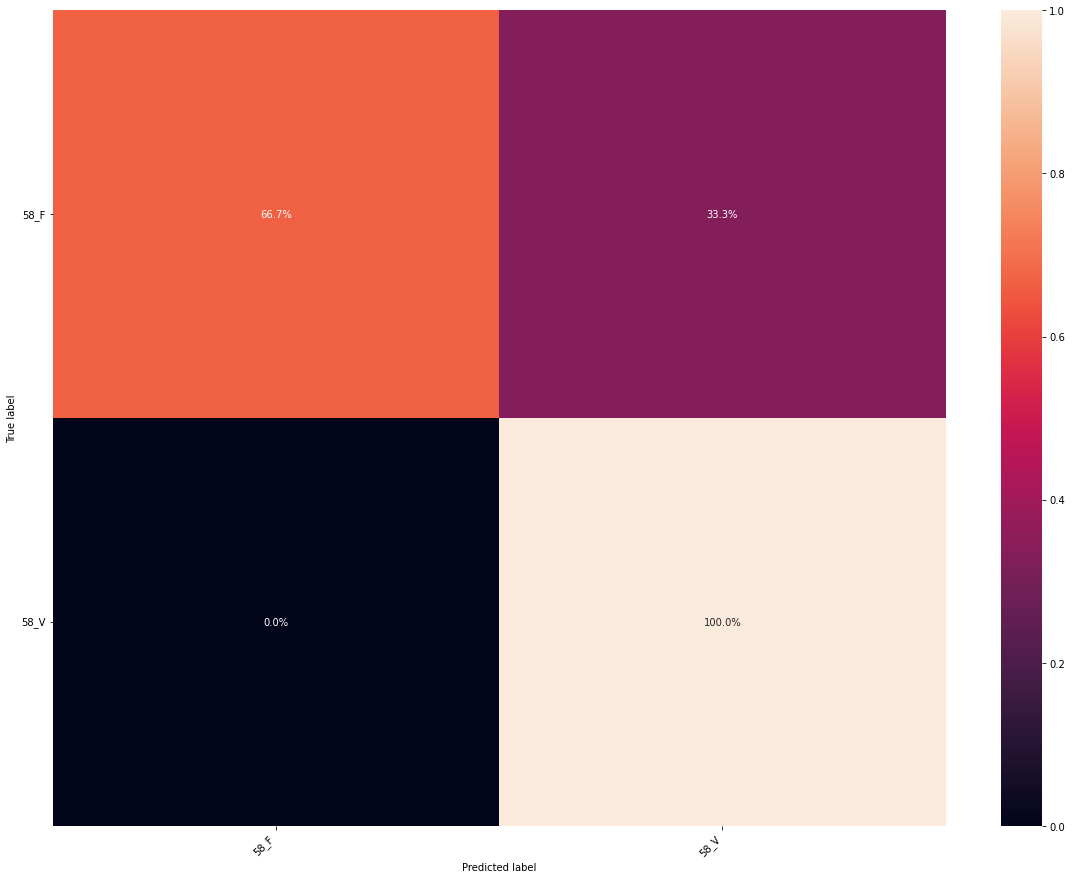


Cross_val_score
R²= 0.95

###################################################################
Treinamento individuo 59
Score: 1.0

[1. 0.]
[0. 1.]


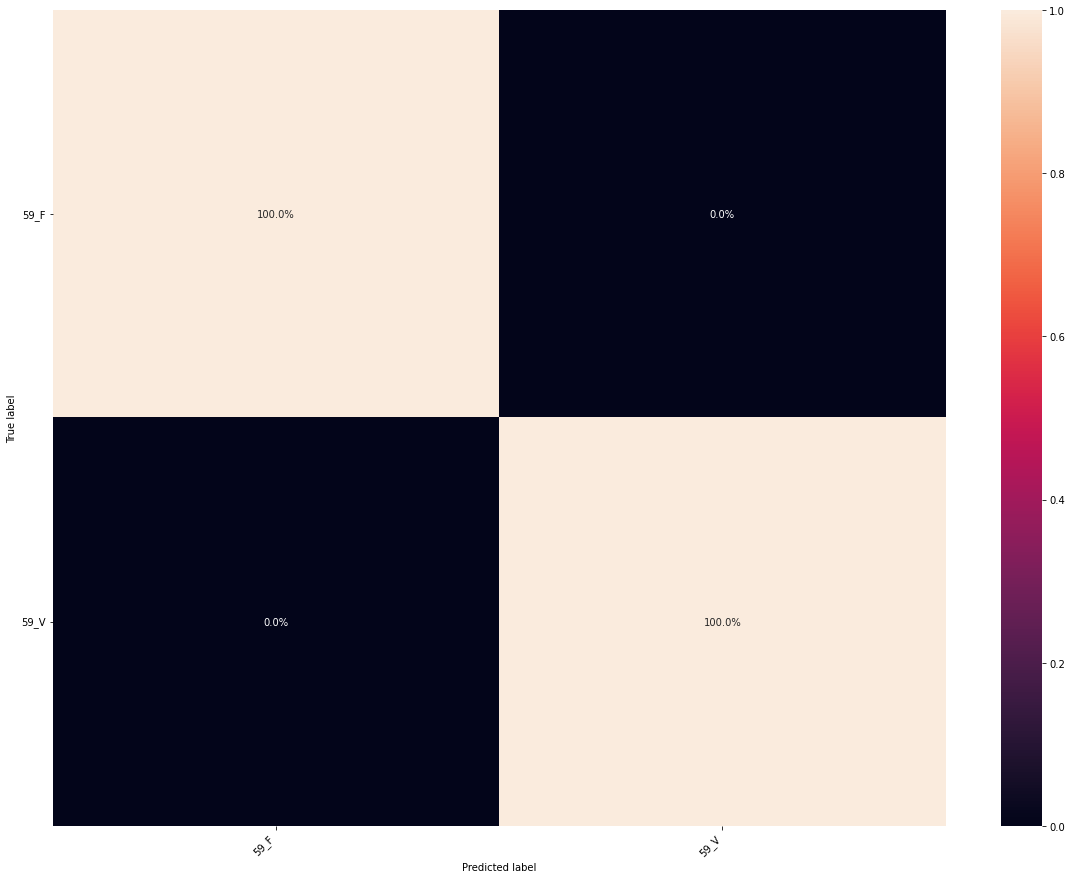


Cross_val_score
R²= 0.95

###################################################################
Treinamento individuo 60
Score: 1.0

[1. 0.]
[0. 1.]


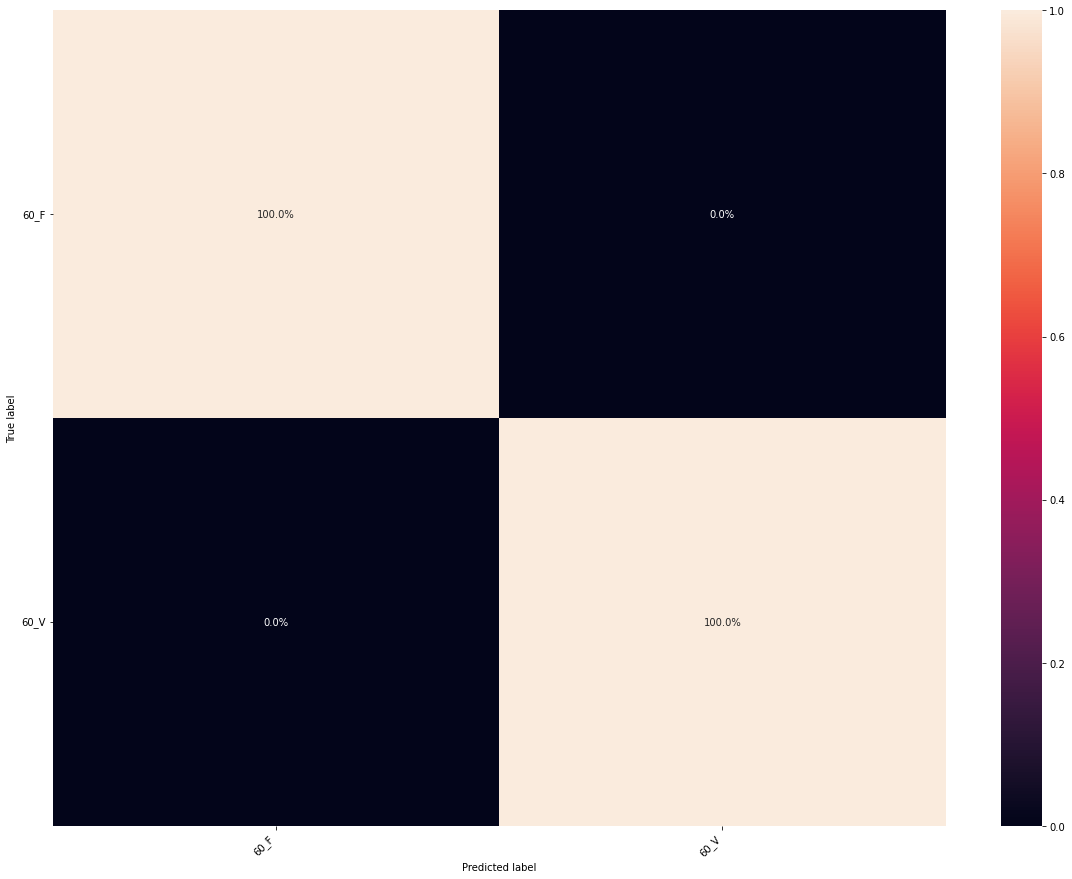


Cross_val_score
R²= 0.95

###################################################################
Treinamento individuo 61
Score: 0.6666666666666666

[1. 0.]
[1. 0.]


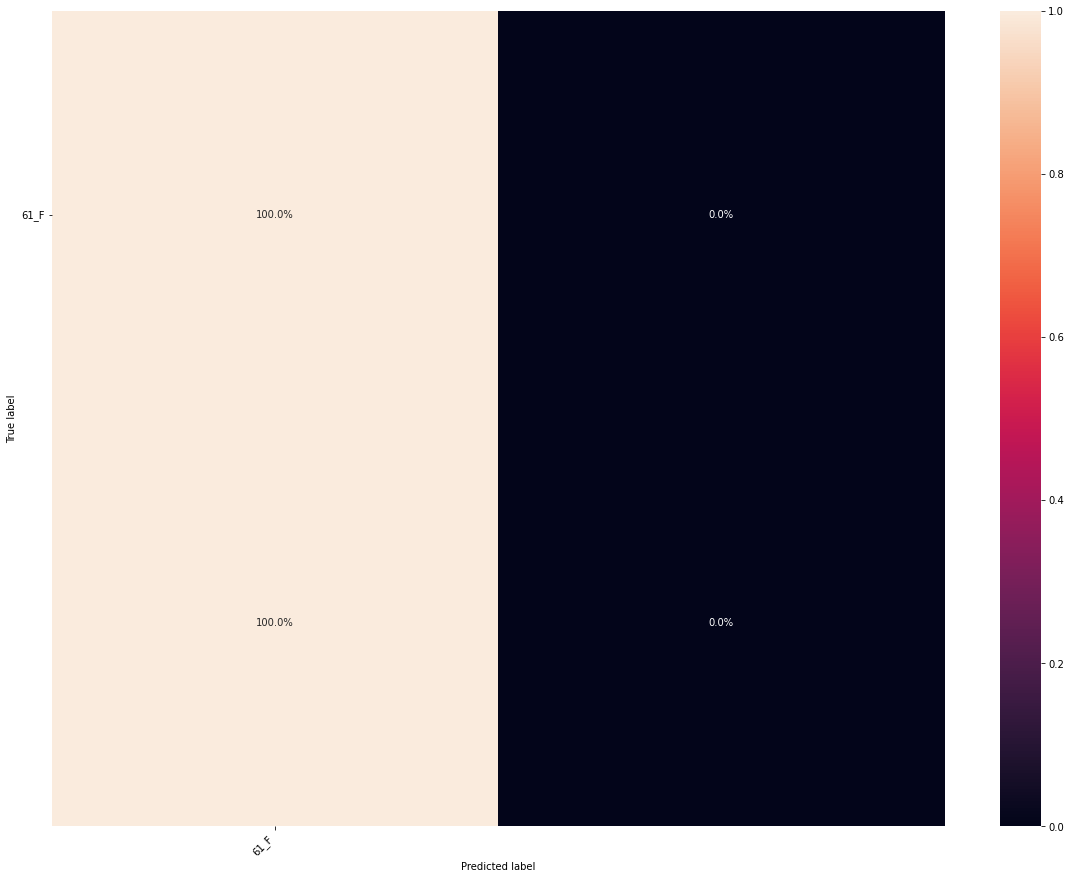


Cross_val_score
R²= 0.95

###################################################################
Treinamento individuo 62
Score: 1.0

[1. 0.]
[0. 1.]


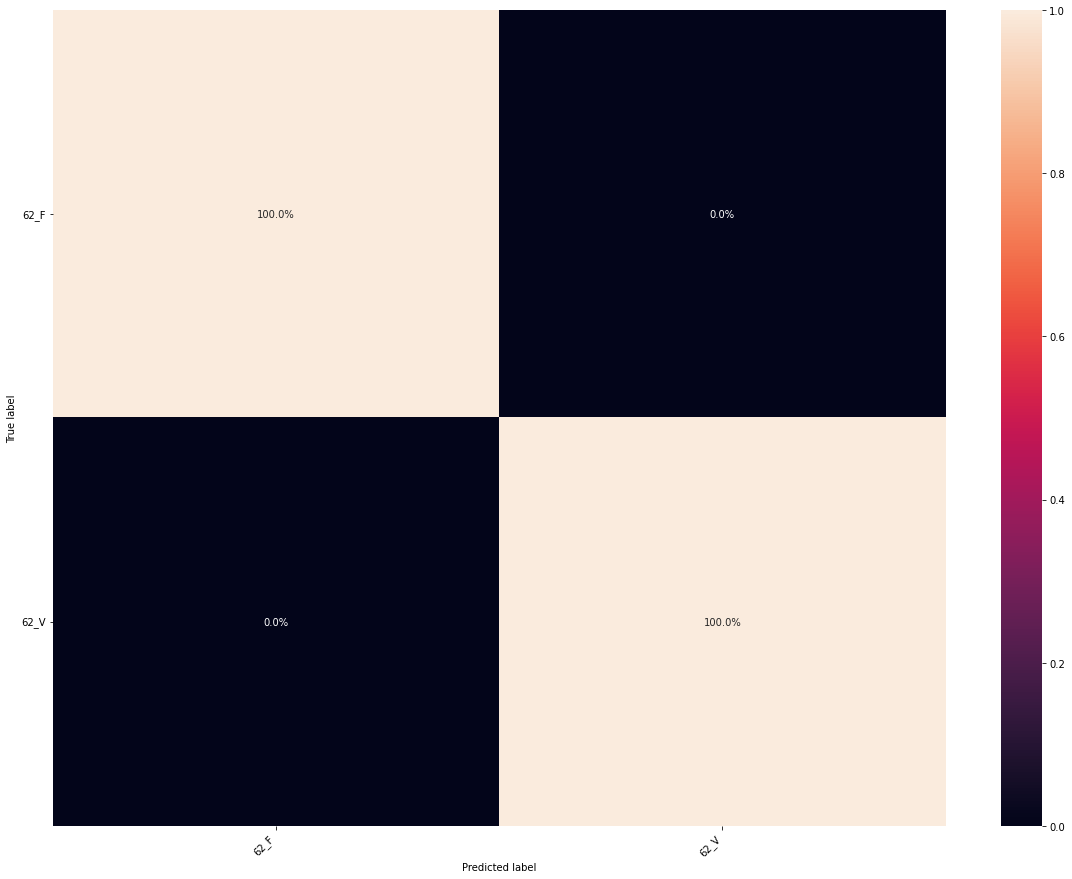


Cross_val_score
R²= 0.95

###################################################################
Treinamento individuo 63
Score: 1.0

[1. 0.]
[0. 1.]


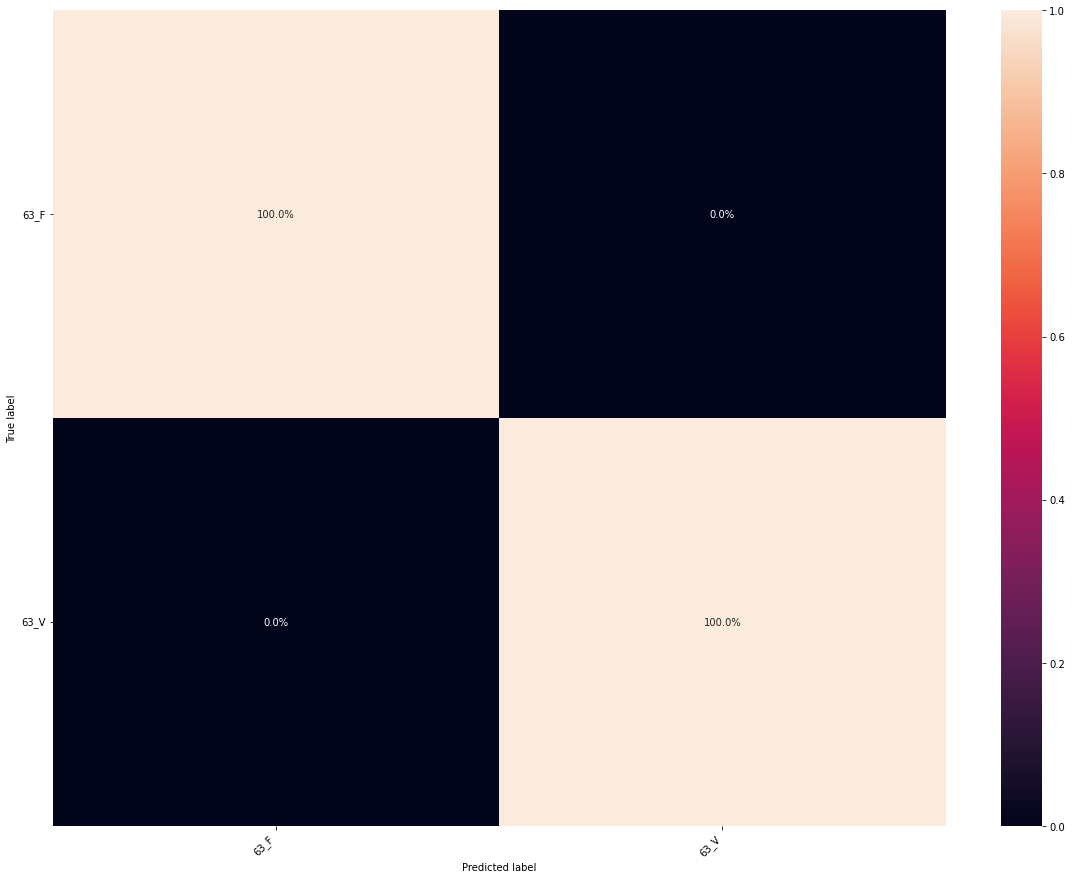


Cross_val_score
R²= 1.0



In [ ]:
score_list_RandomForestClassifier = []
predict_list_RandomForestClassifier = []
for nome_individuo in nomes_individuos:
    print(f"###################################################################")
    print(f"Treinamento individuo {nome_individuo}")
    df_individuo = df_individuos[df_individuos.nome==nome_individuo]
    df_individuo.reset_index(drop=True,inplace=True)
   
    x_train, x_test,y_train, y_test = train_test_split(df_individuo['imagem'].values,
                                        df_individuo['classe'].values,
                                        shuffle=True, test_size=0.25,
                                        random_state=42)
     
    clf = RandomForestClassifier()
    clf.fit(x_train.tolist(), y_train.tolist())
    print(f"Score: {clf.score(x_test.tolist(),y_test.tolist())}\n")

    previsoes = clf.predict(x_test.tolist())
    predict_list_RandomForestClassifier.append(clf.predict(df_individuo['imagem'].values.tolist()))
    
    print_confusion_matrix(y_test.tolist(),previsoes,np.unique(np.array(previsoes)).tolist())
    
    print("\nCross_val_score")
    score  = cross_val_score(RandomForestClassifier(), df_individuo_22['imagem'].values.tolist(),df_individuo_22['classe'].values.tolist(),cv=10)
    score_list_RandomForestClassifier.append(np.mean(score))
    # score_list_RandomForestClassifier=np.concatenate((score_list_RandomForestClassifier, score), axis=0)
    print(f'R²= {np.mean(score)}\n')

## Verificando desempenho

In [ ]:
print(np.mean(score_list_SGDClassifier))
print(np.mean(score_list_LogisticRegression))
print(np.mean(score_list_RandomForestClassifier))

0.8468749999999999
0.9166666666666667
0.9520833333333334


###################################################################
Test individuo 0
[1. 0.]
[0. 1.]


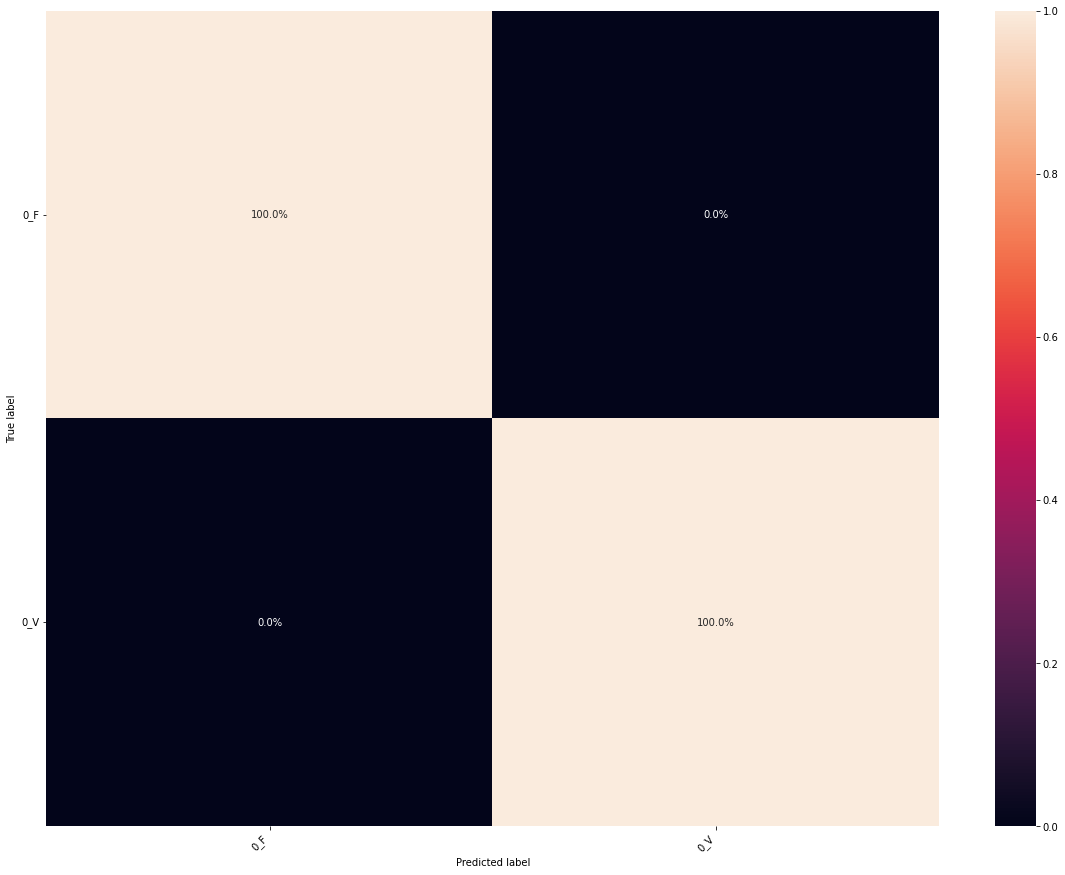

[0.75 0.25]
[0. 1.]


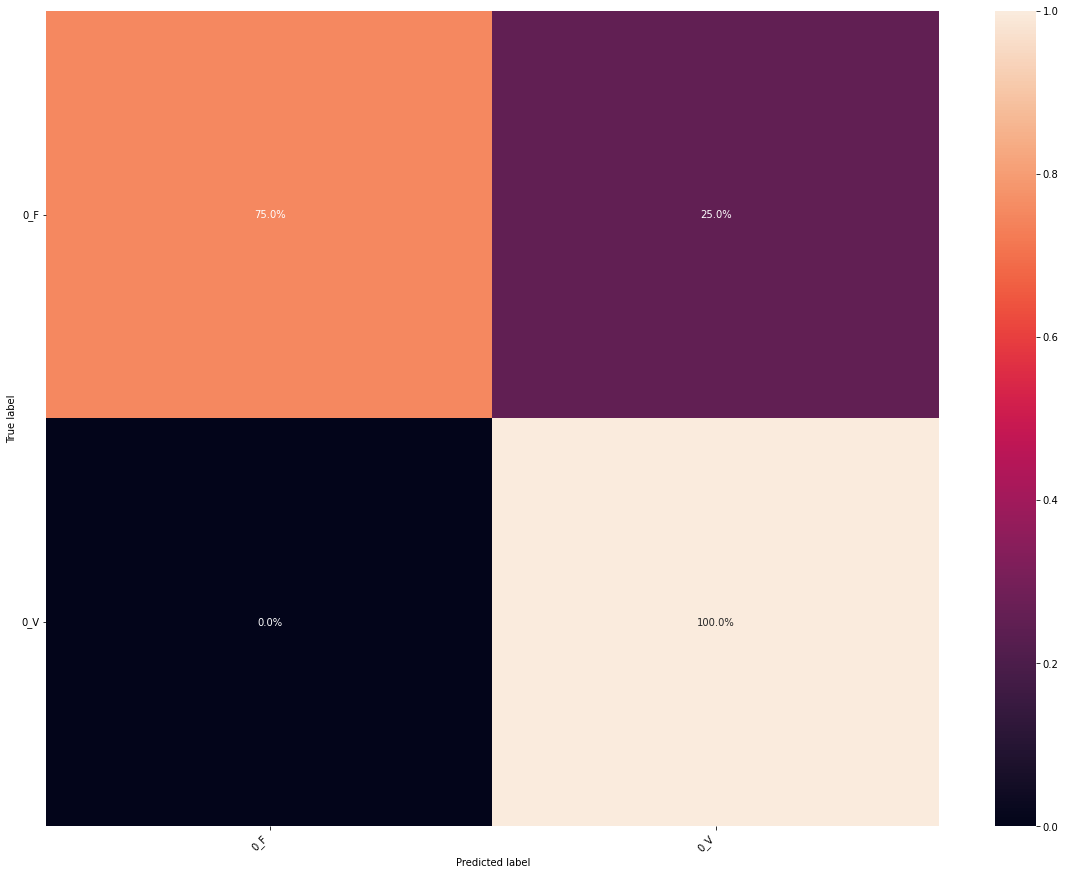

###################################################################
Test individuo 1
[0.91666667 0.         0.08333333 0.        ]
[0.         0.91666667 0.         0.08333333]
[nan nan nan nan]
[nan nan nan nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


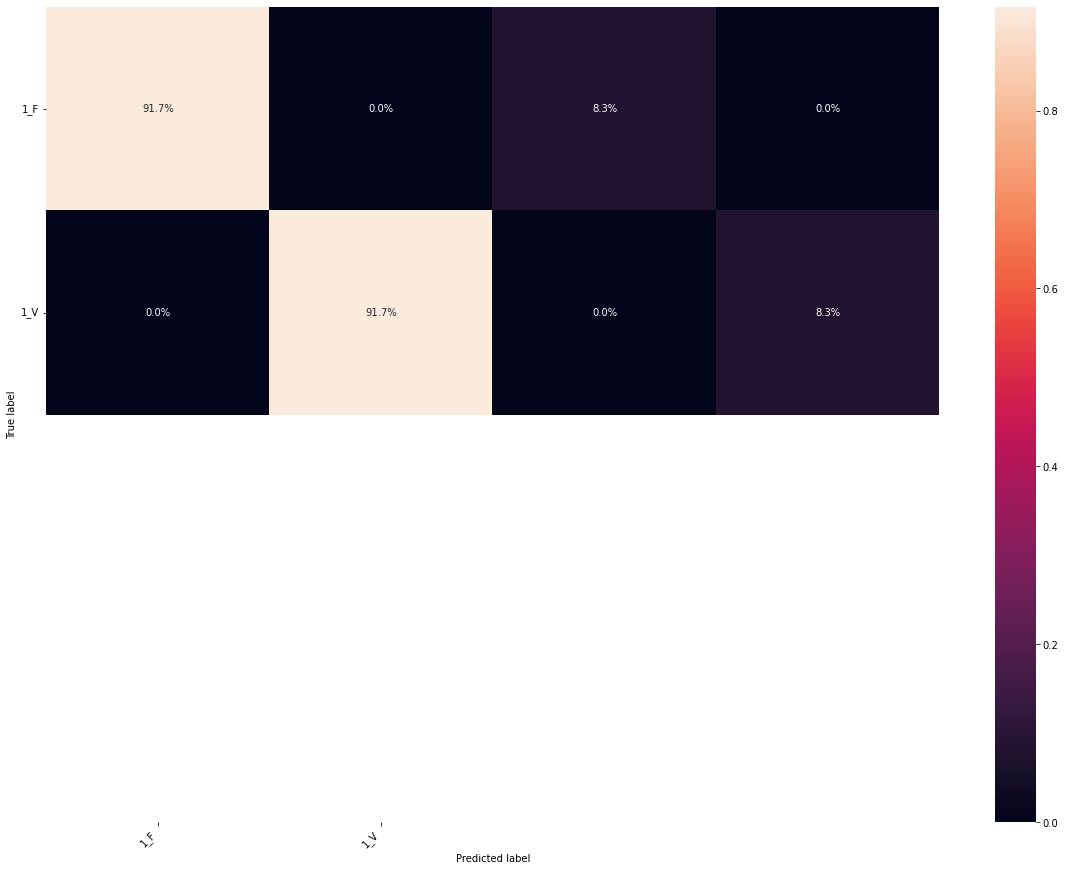

[1. 0.]
[0. 1.]


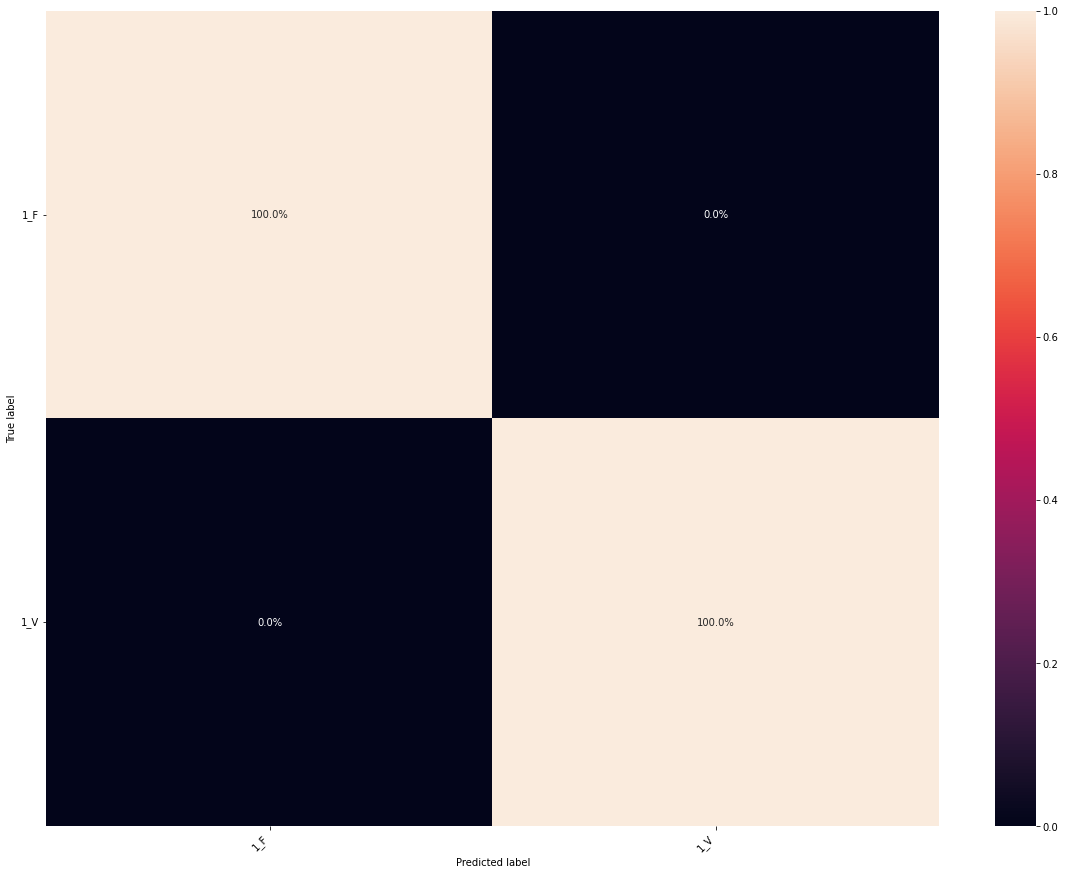

###################################################################
Test individuo 2
[1. 0.]
[0. 1.]


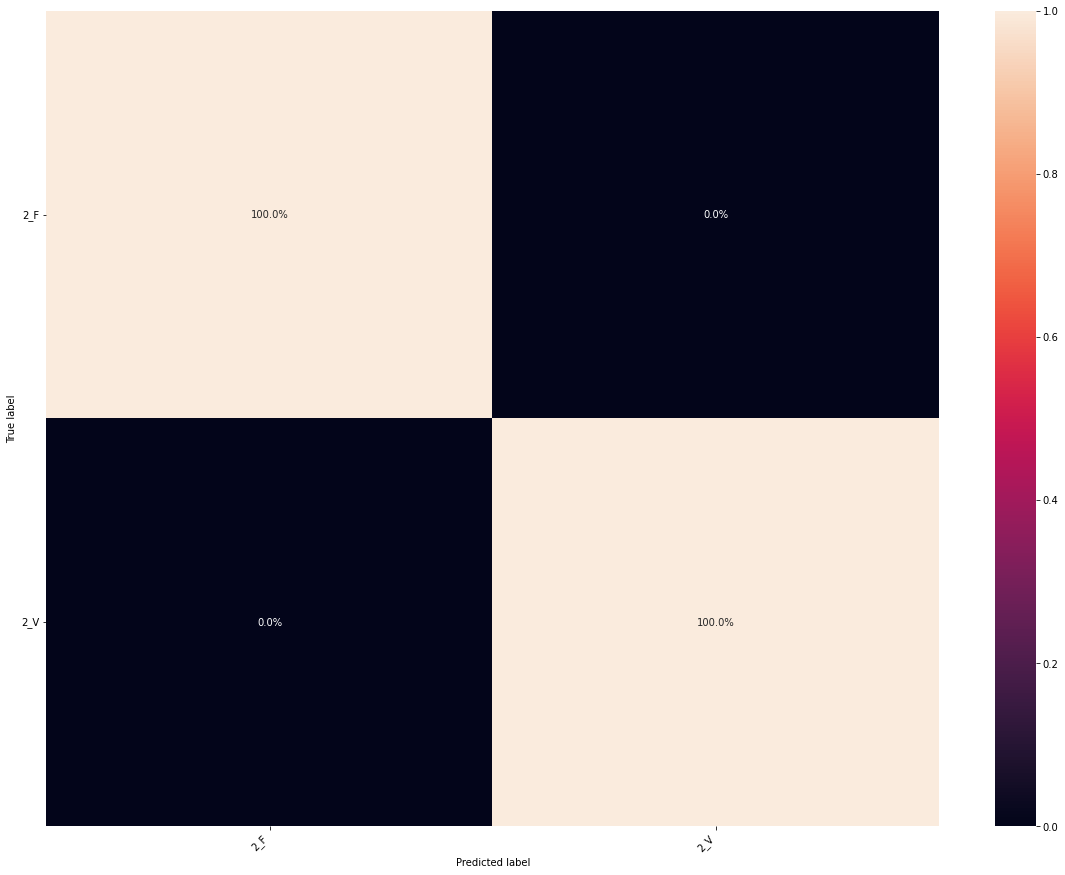

[0.91666667 0.08333333]
[0. 1.]


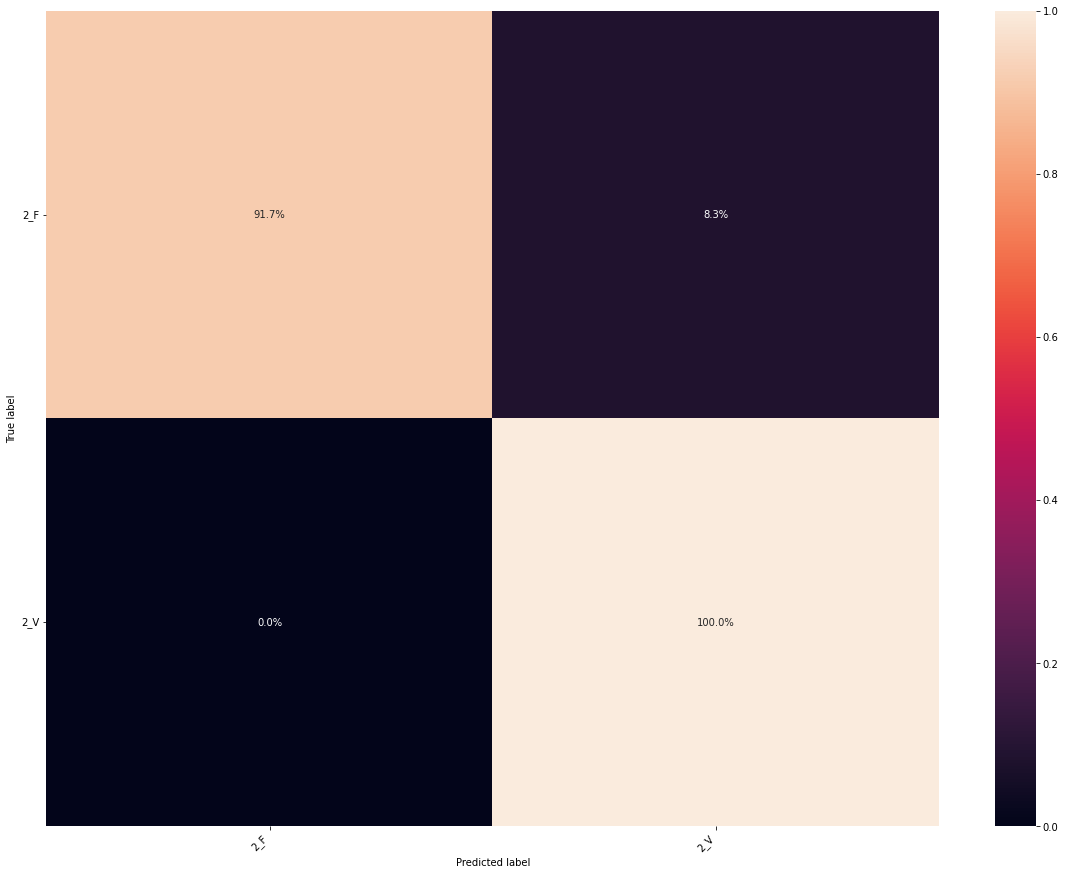

###################################################################
Test individuo 3
[1. 0.]
[0. 1.]


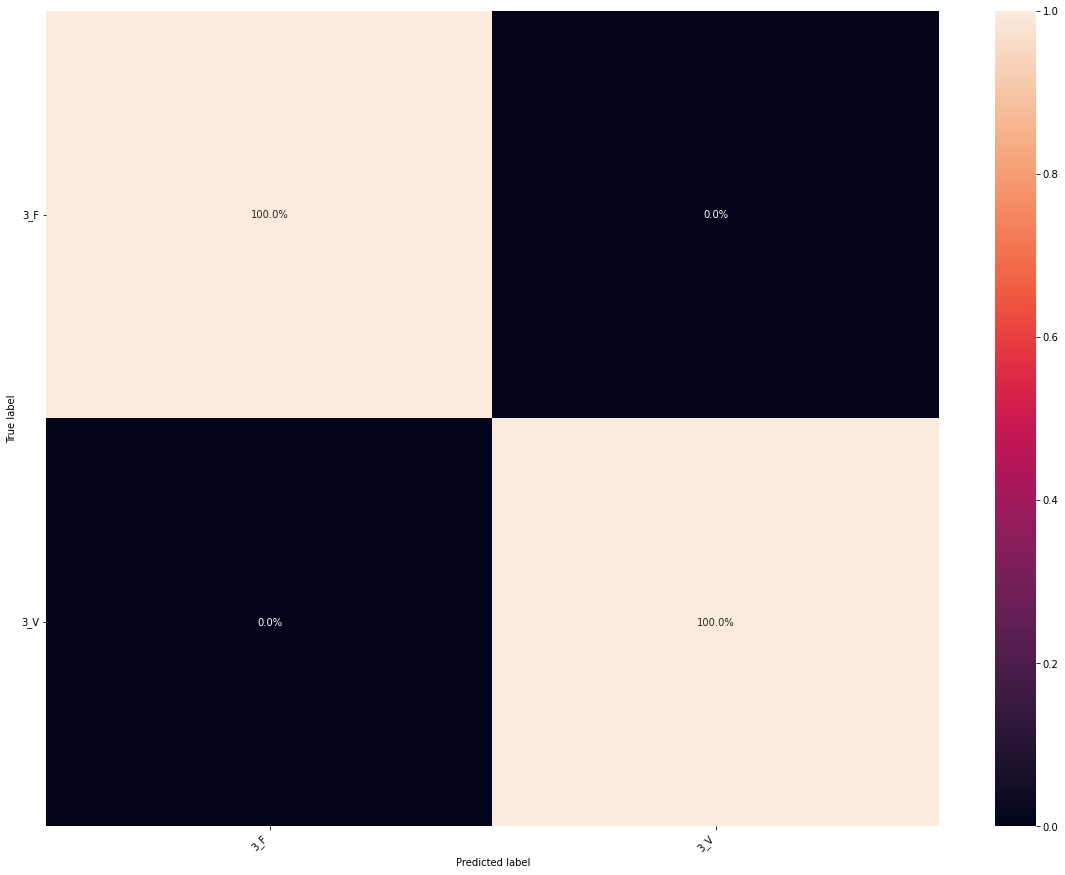

[1. 0.]
[0. 1.]


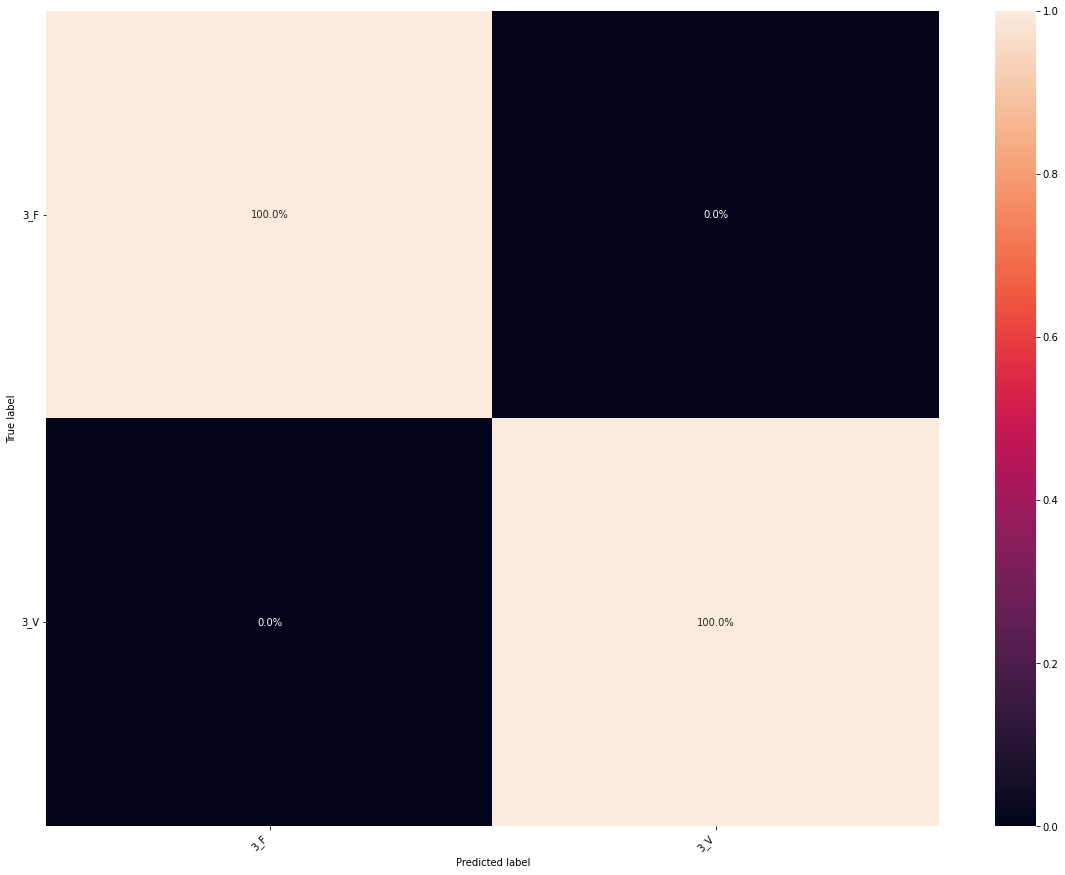

###################################################################
Test individuo 4
[nan nan nan nan]
[nan nan nan nan]
[0.08333333 0.         0.91666667 0.        ]
[0.         0.08333333 0.         0.91666667]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


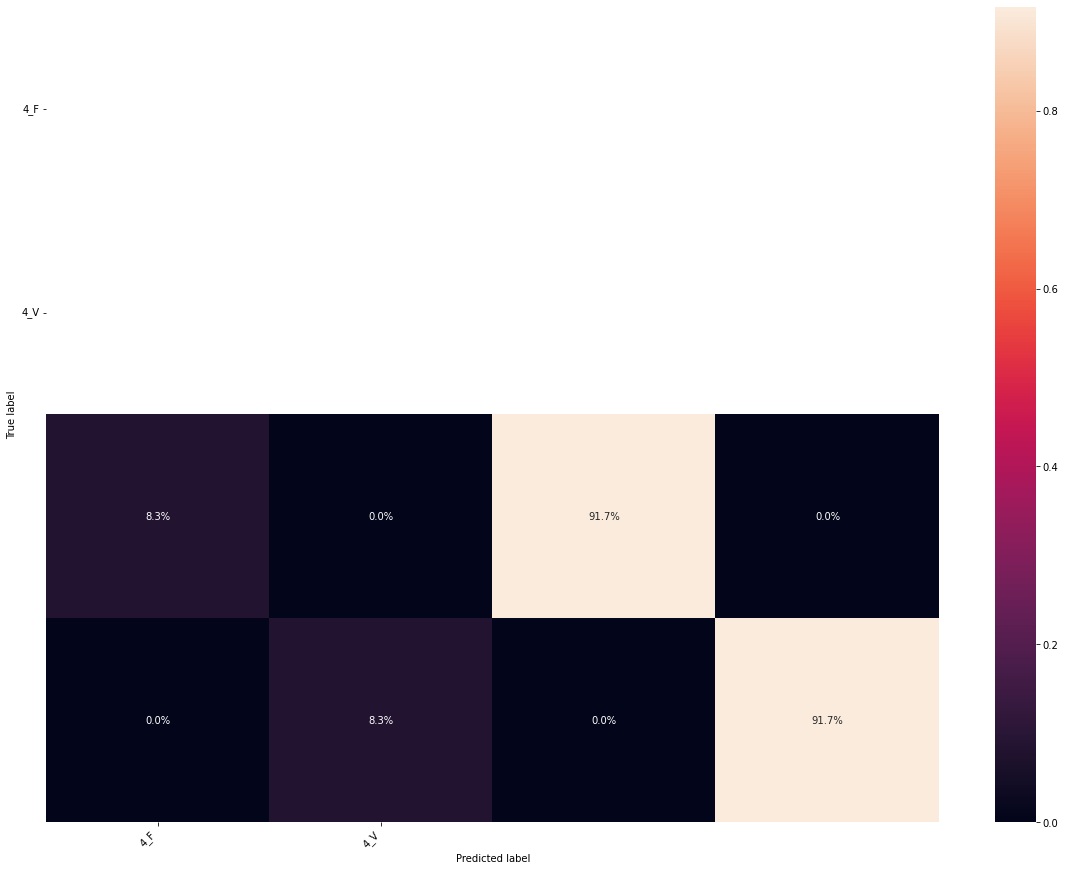

[1. 0.]
[0. 1.]


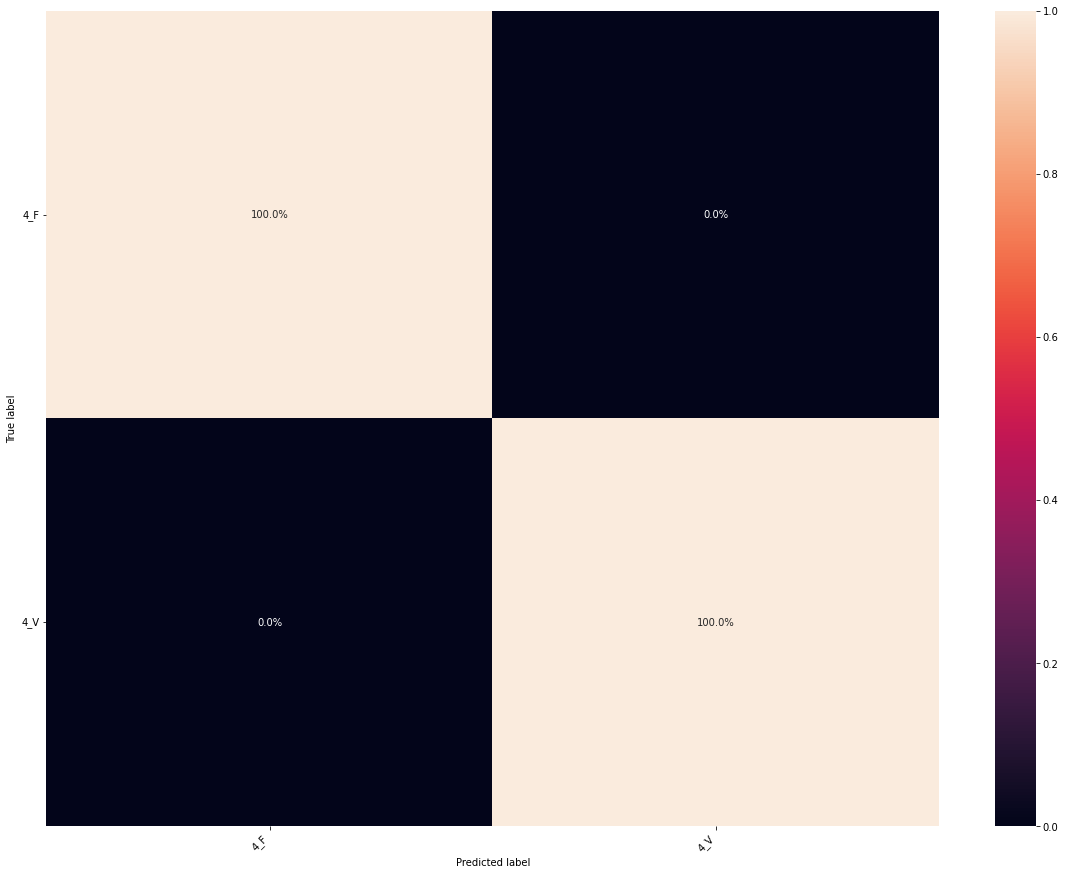

###################################################################
Test individuo 5
[1. 0.]
[0. 1.]


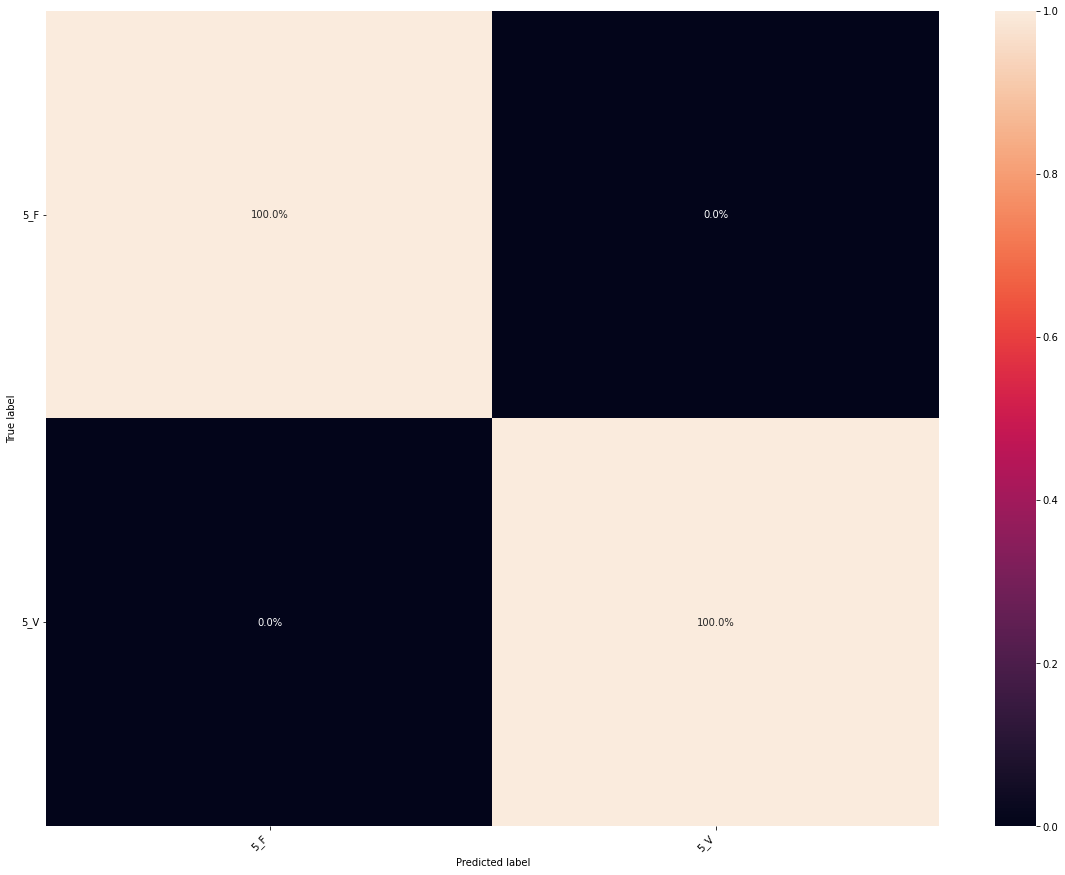

[1. 0.]
[0. 1.]


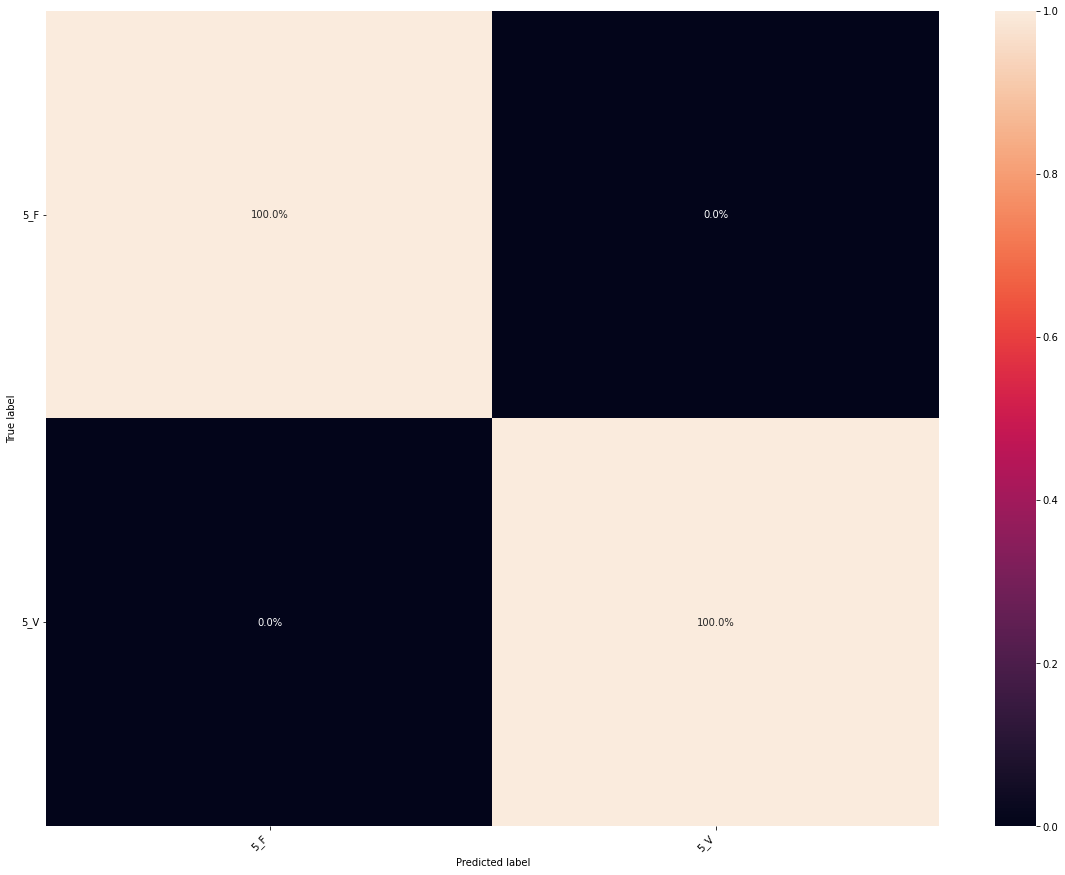

###################################################################
Test individuo 6
[nan nan nan nan nan nan]
[nan nan nan nan nan nan]
[nan nan nan nan nan nan]
[0.         0.         0.07692308 0.84615385 0.         0.07692308]
[0.08333333 0.08333333 0.         0.         0.83333333 0.        ]
[nan nan nan nan nan nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


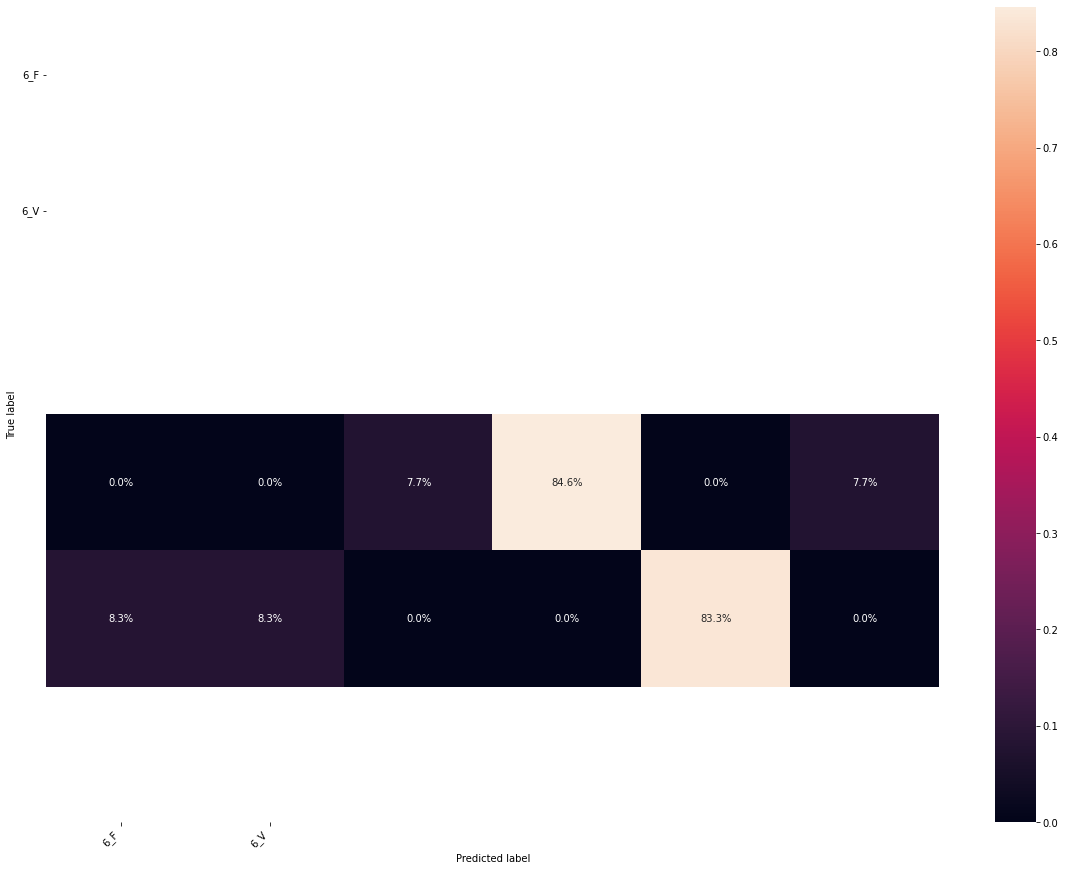

[1. 0.]
[0. 1.]


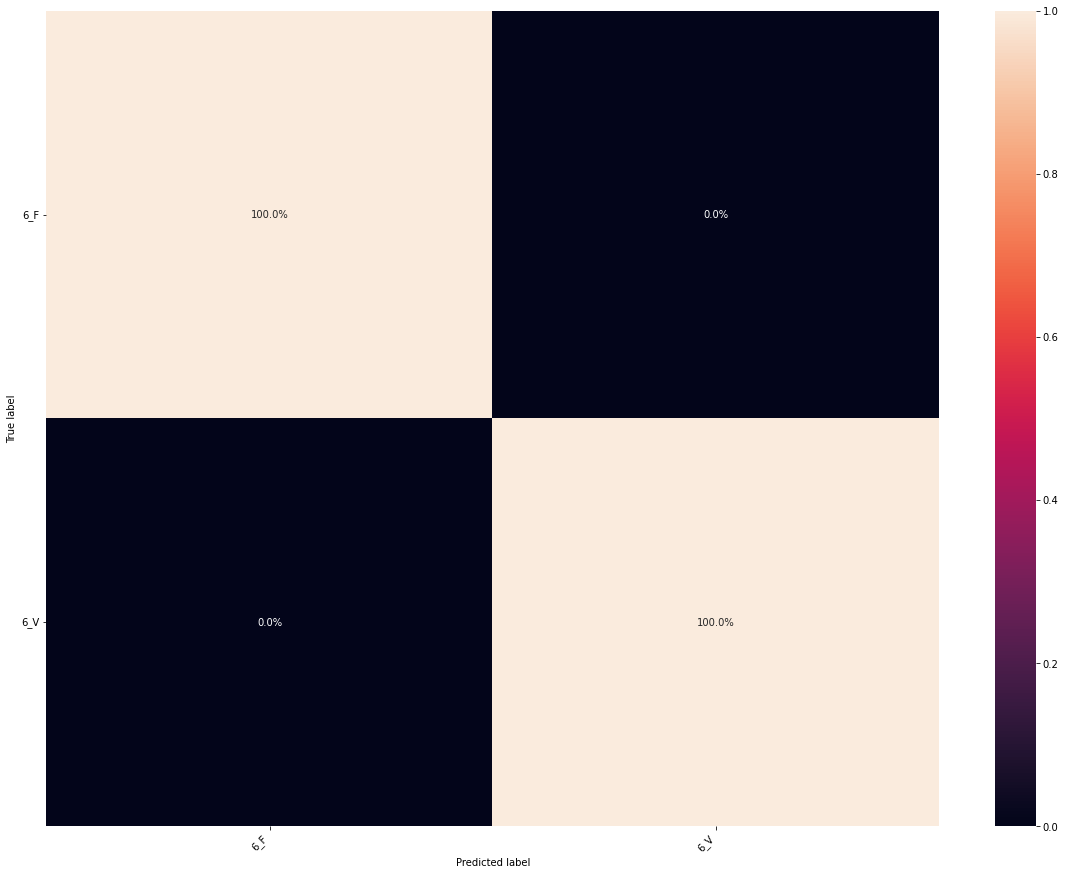

###################################################################
Test individuo 7
[nan nan nan]
[0.08333333 0.75       0.16666667]
[0.         0.08333333 0.91666667]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


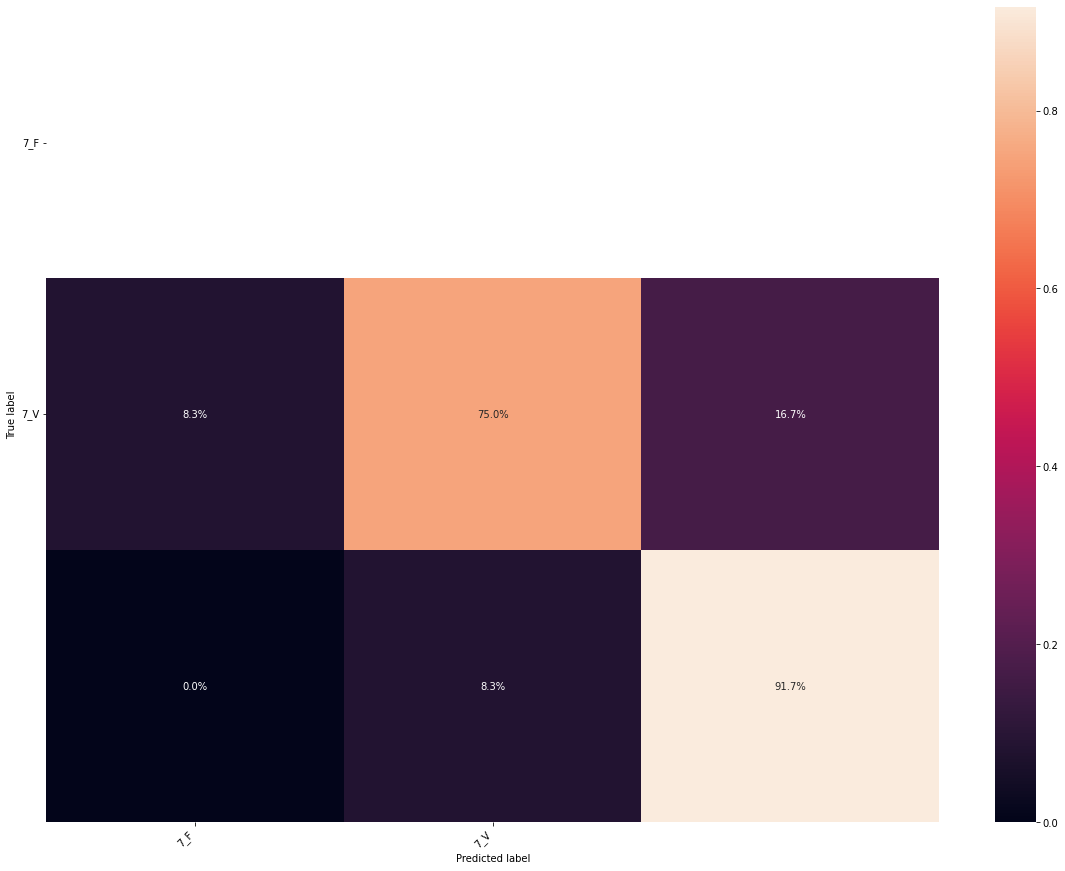

[1. 0.]
[0. 1.]


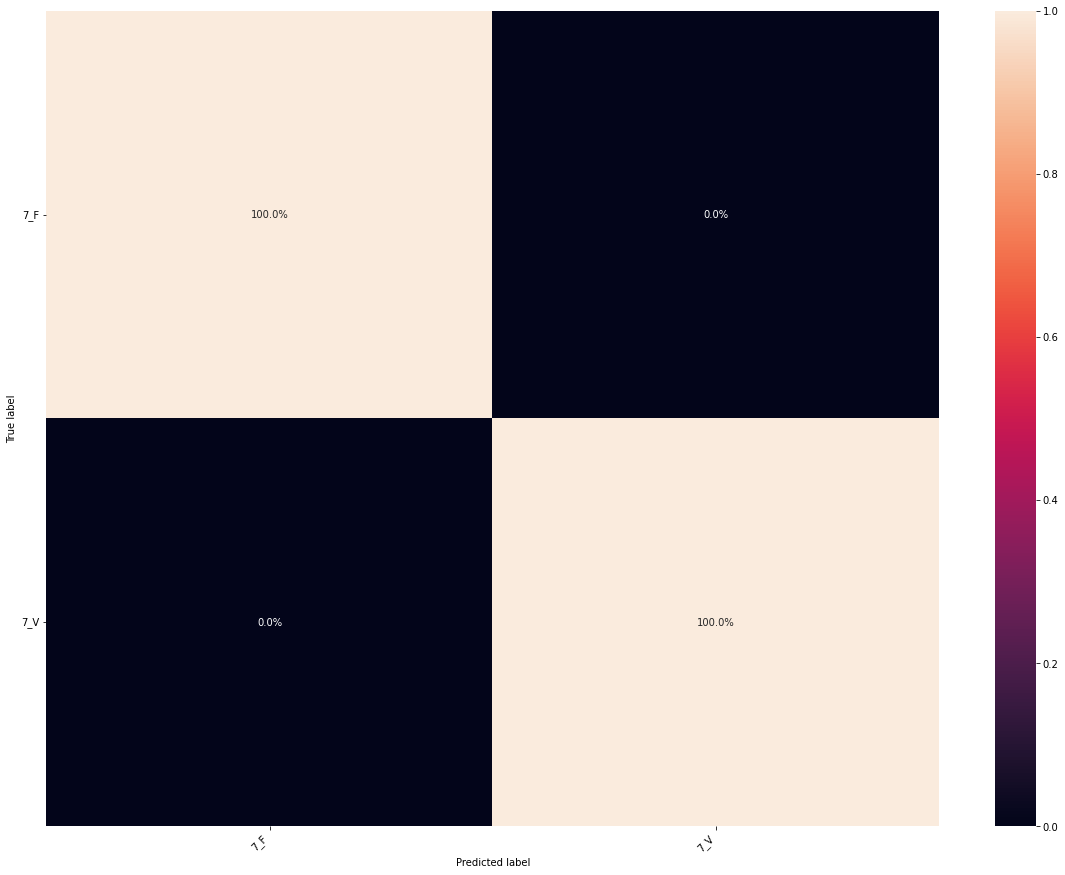

###################################################################
Test individuo 8
[1. 0.]
[0. 1.]


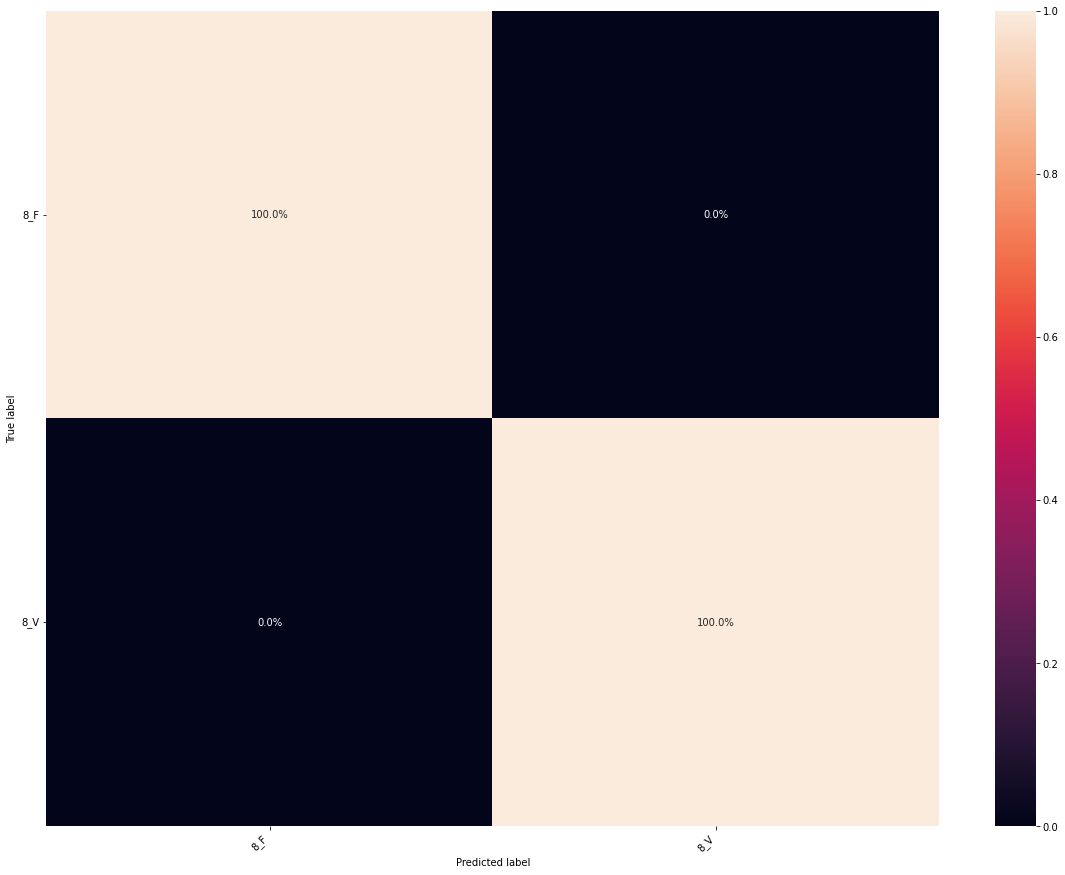

[1. 0.]
[0.27272727 0.72727273]


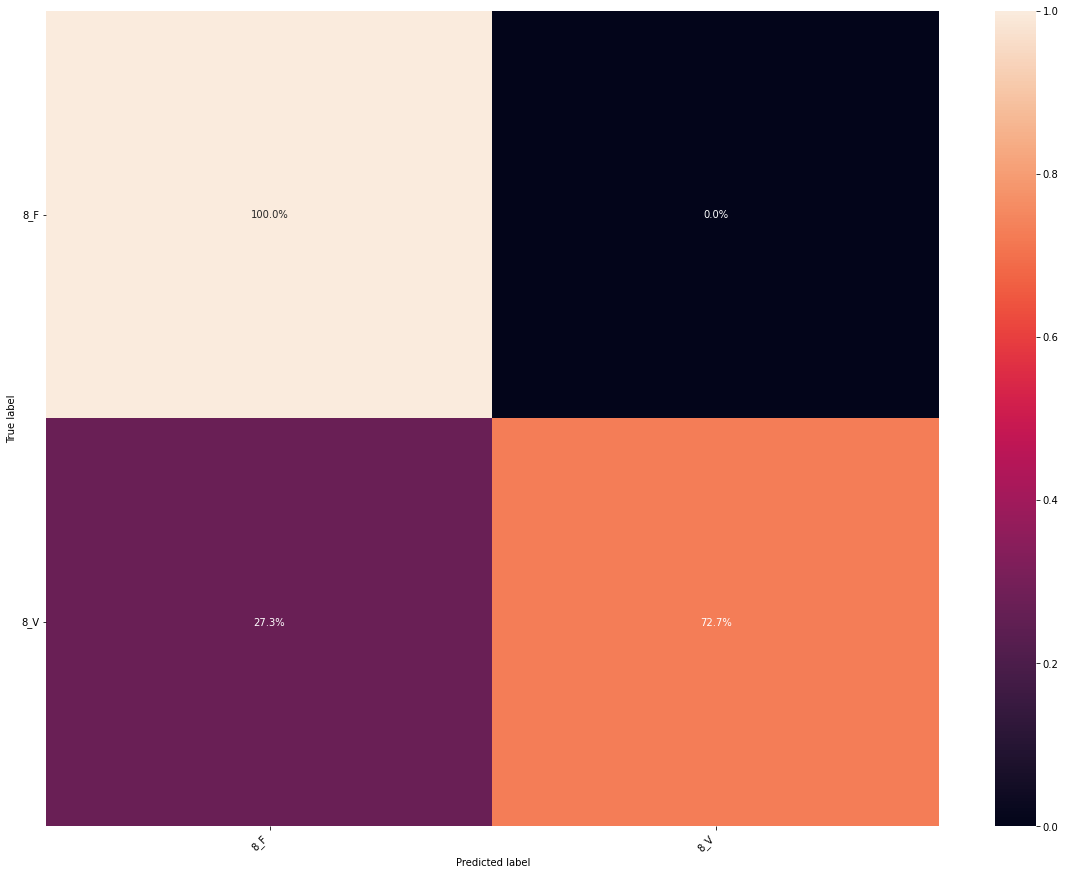

###################################################################
Test individuo 9
[0.91666667 0.08333333]
[0. 1.]


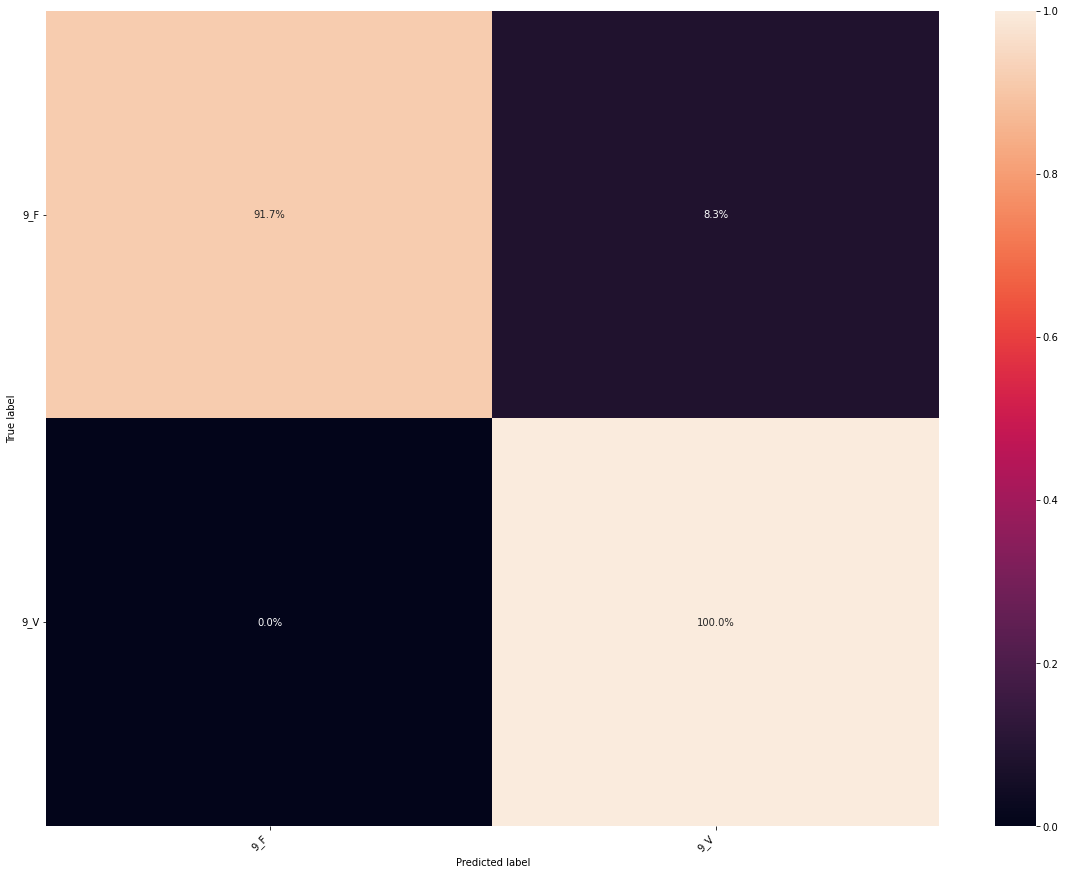

[1. 0.]
[0. 1.]


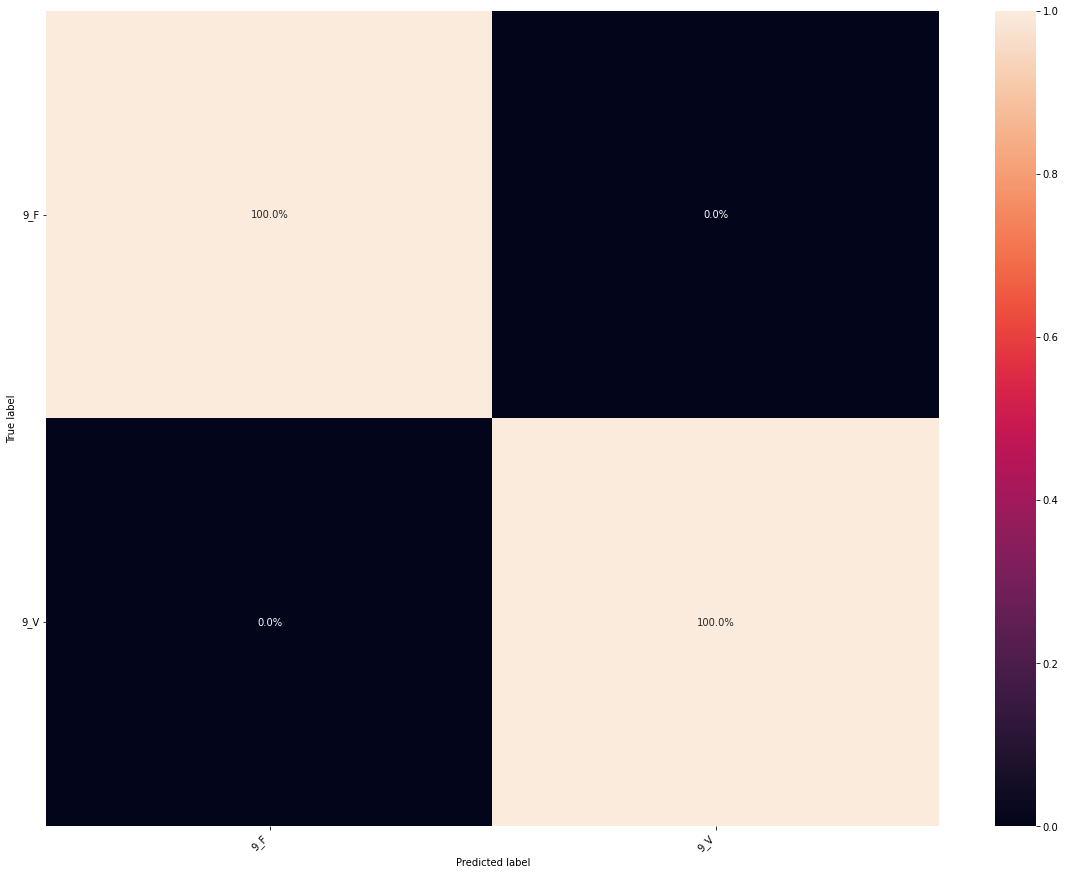

###################################################################
Test individuo 10
[1. 0.]
[0.08333333 0.91666667]


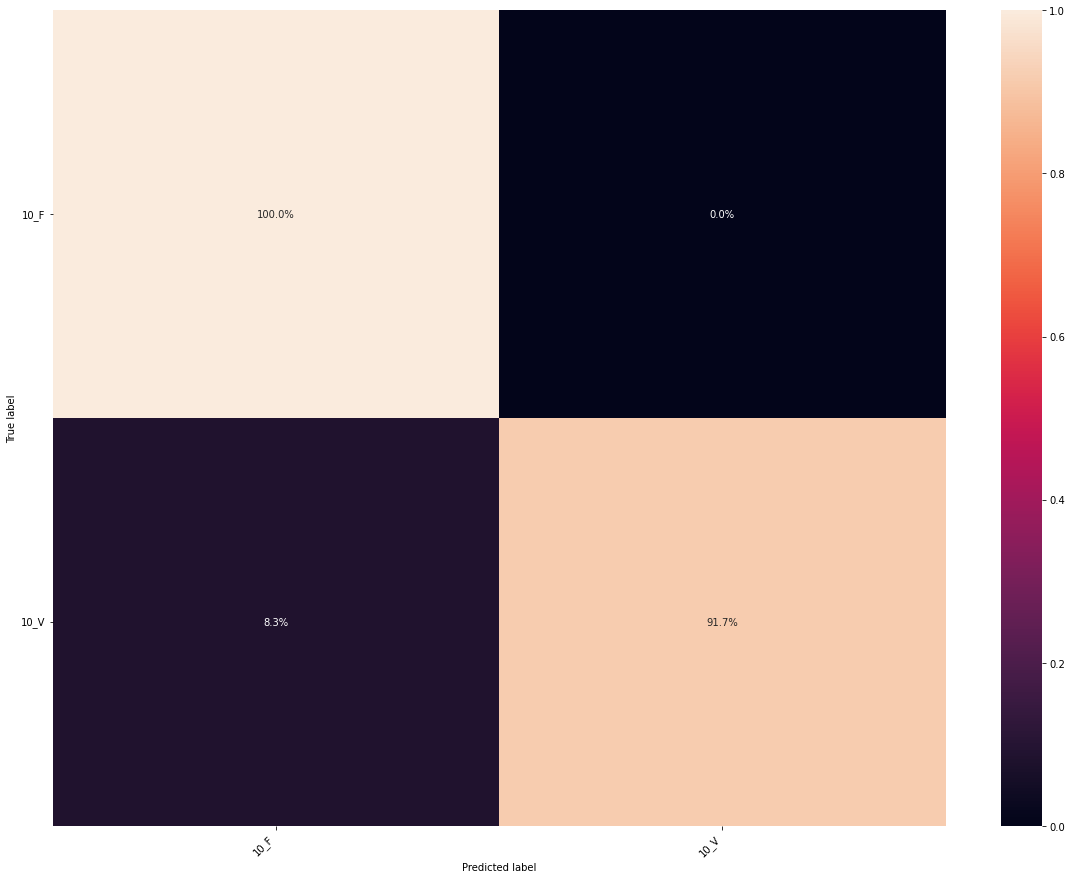

[1. 0.]
[0. 1.]


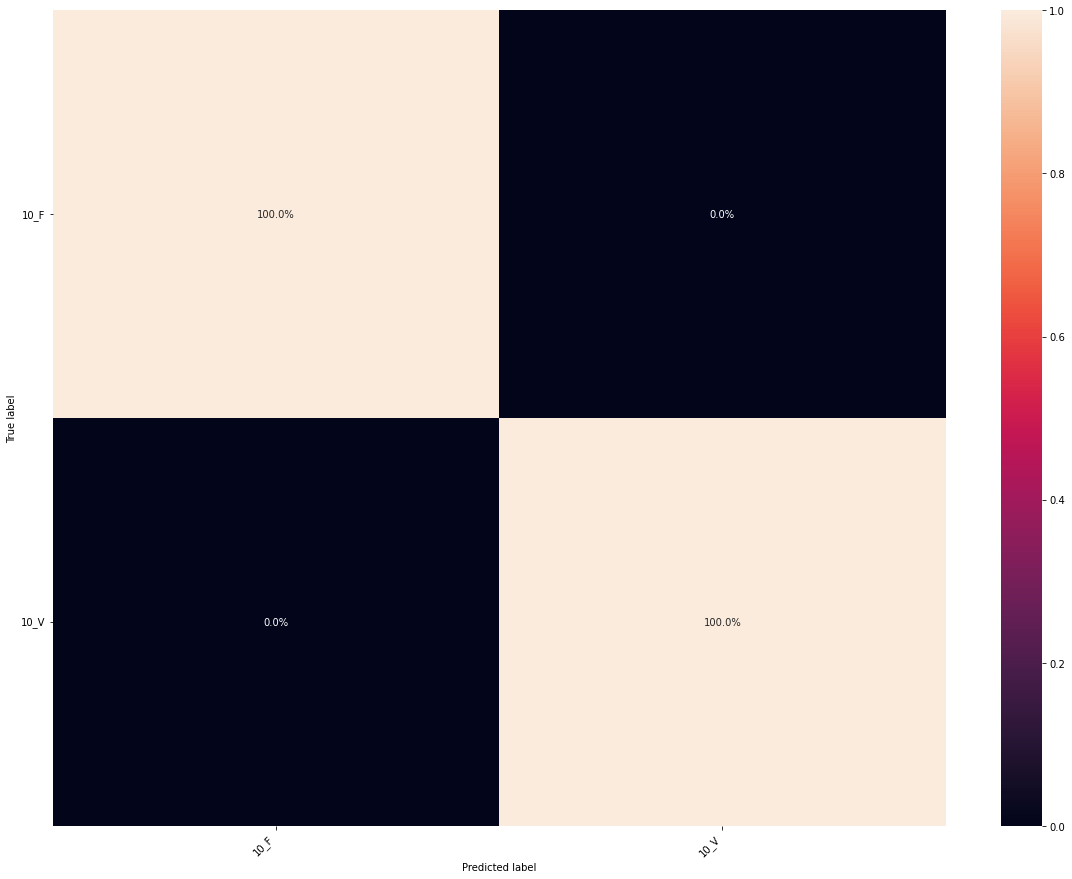

###################################################################
Test individuo 11
[0.83333333 0.08333333 0.08333333]
[0.08333333 0.91666667 0.        ]
[nan nan nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


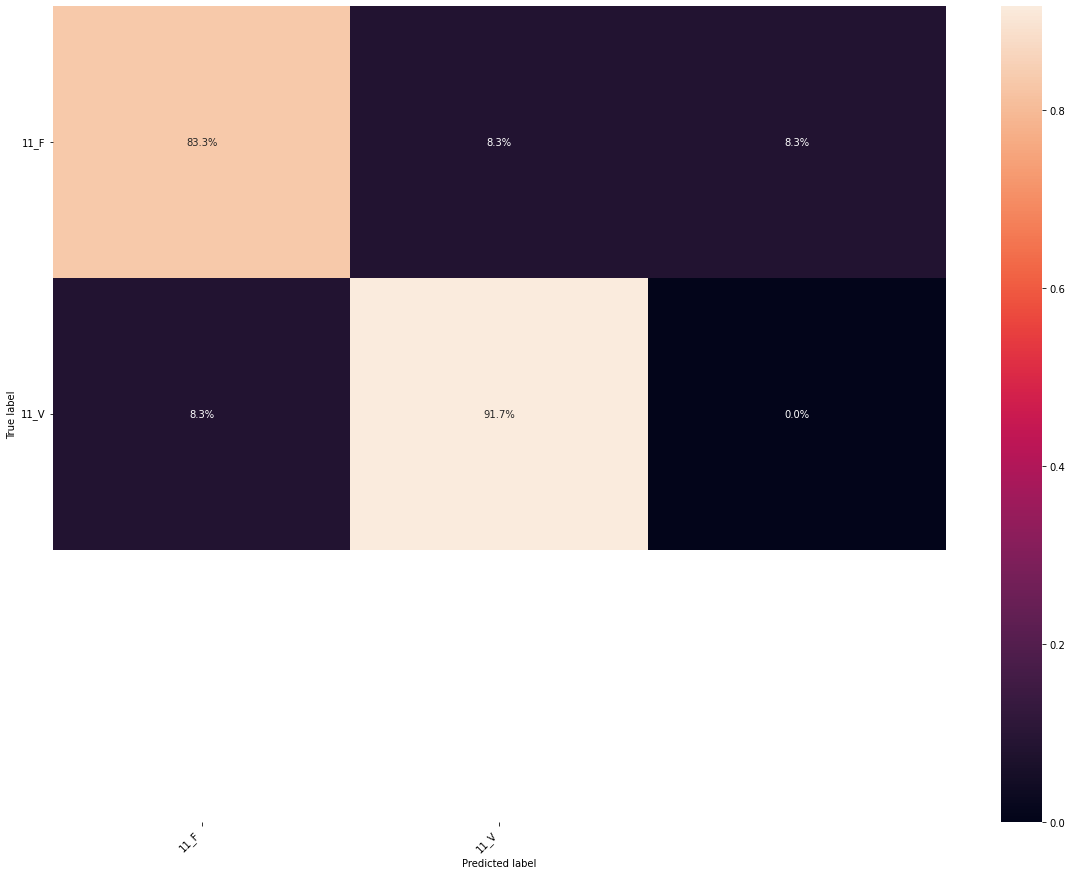

[0.91666667 0.08333333]
[0. 1.]


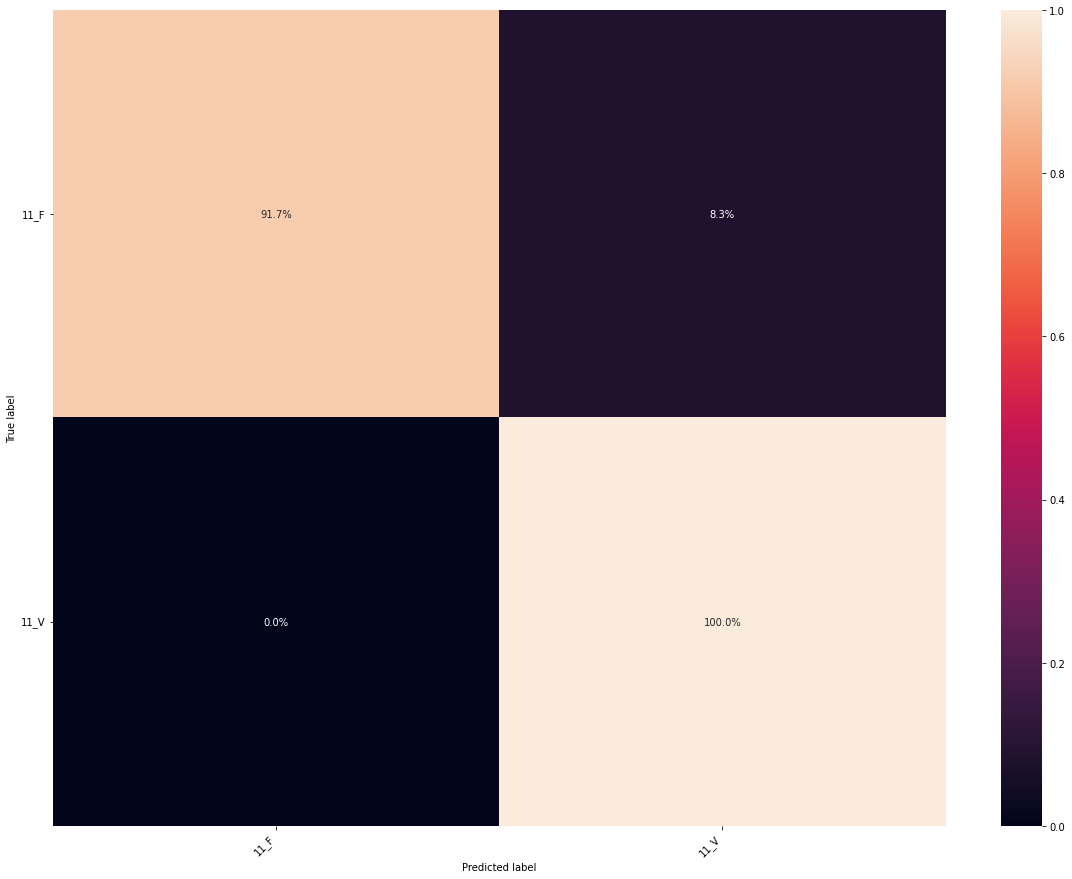

###################################################################
Test individuo 12
[1. 0.]
[0. 1.]


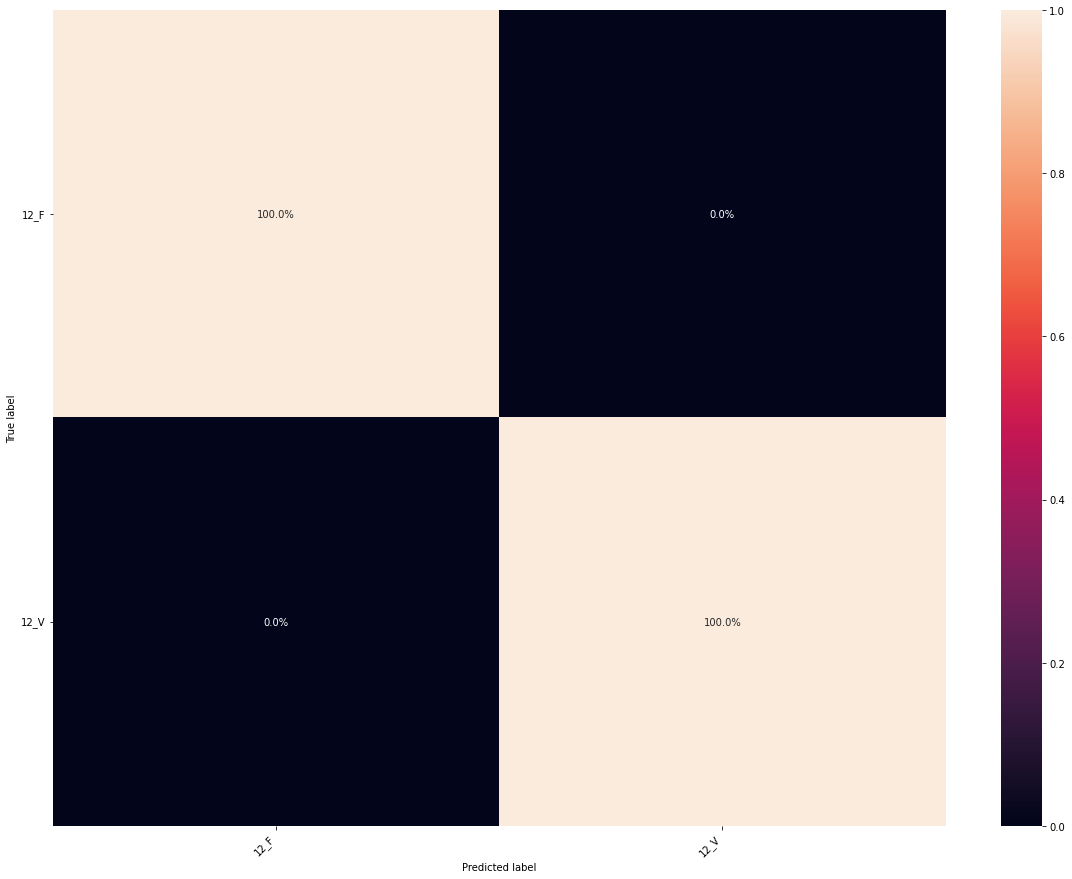

[1. 0.]
[0. 1.]


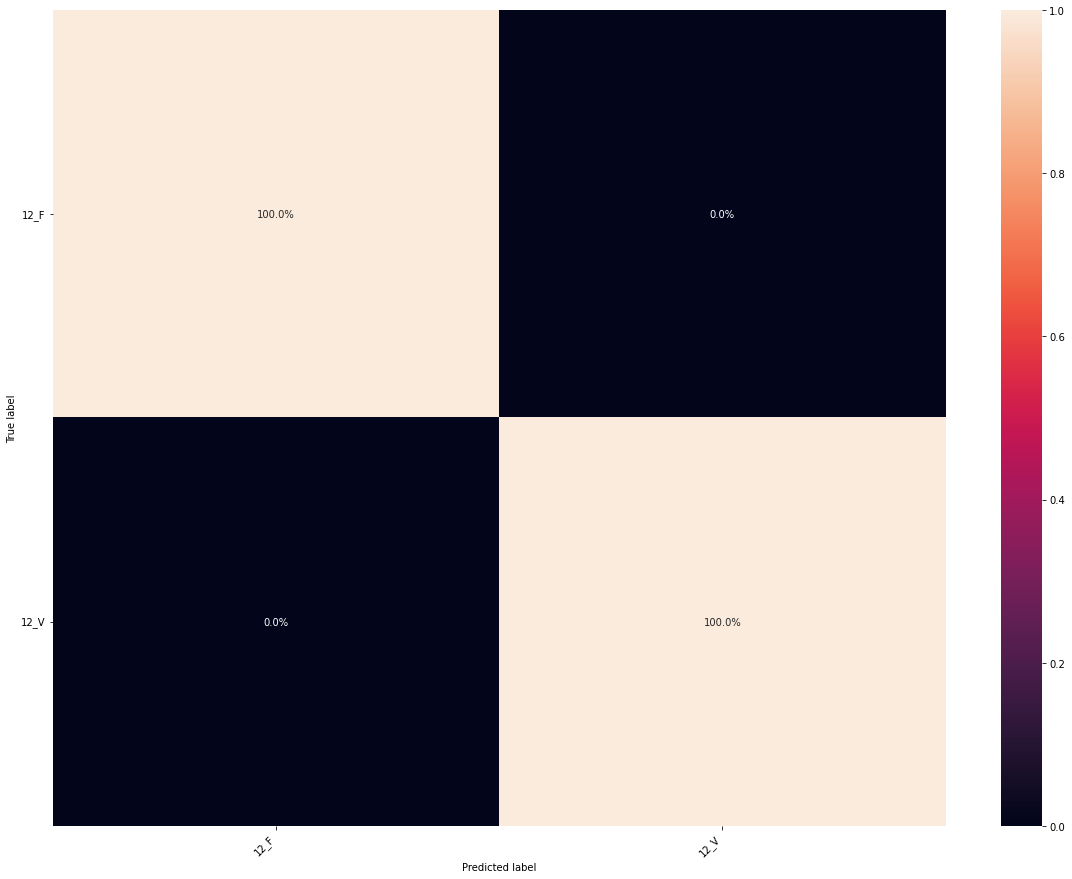

###################################################################
Test individuo 13
[nan nan nan nan]
[0.08333333 0.83333333 0.08333333 0.        ]
[0.         0.         0.91666667 0.08333333]
[nan nan nan nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


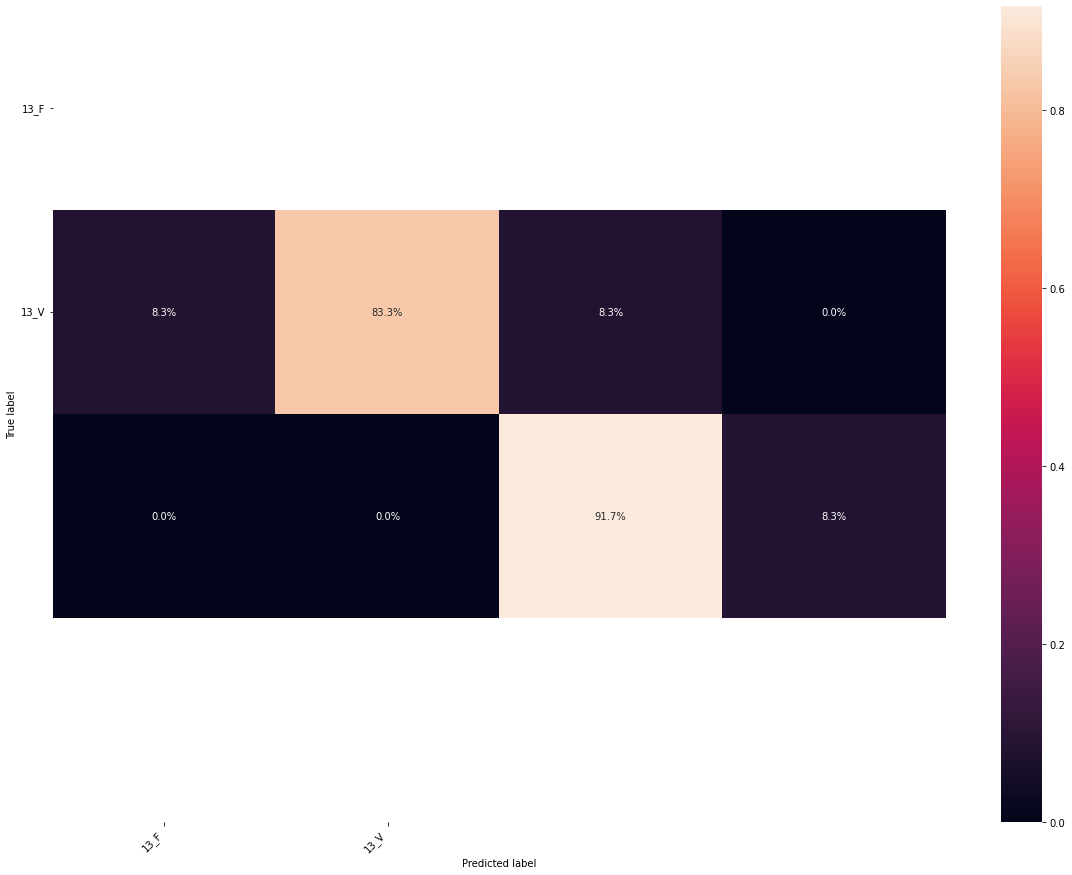

[0.83333333 0.16666667]
[0. 1.]


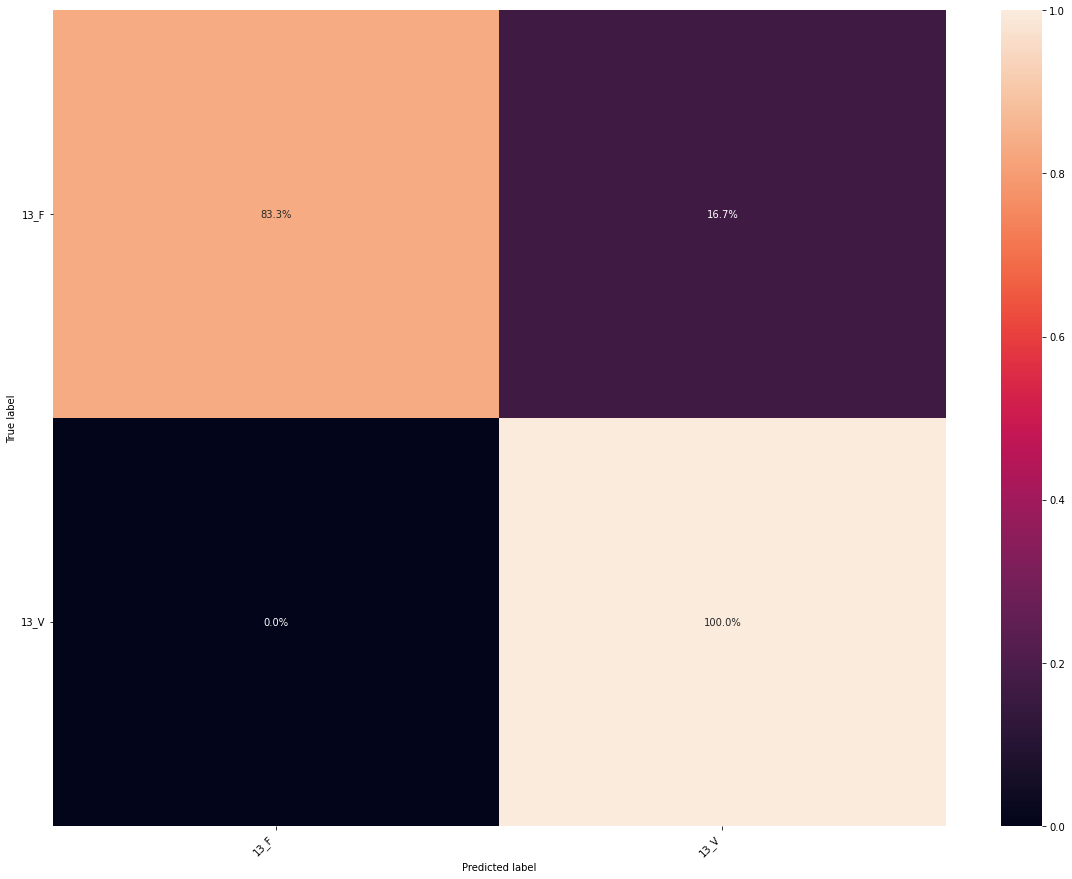

###################################################################
Test individuo 14
[1. 0. 0.]
[0.  0.9 0.1]
[nan nan nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


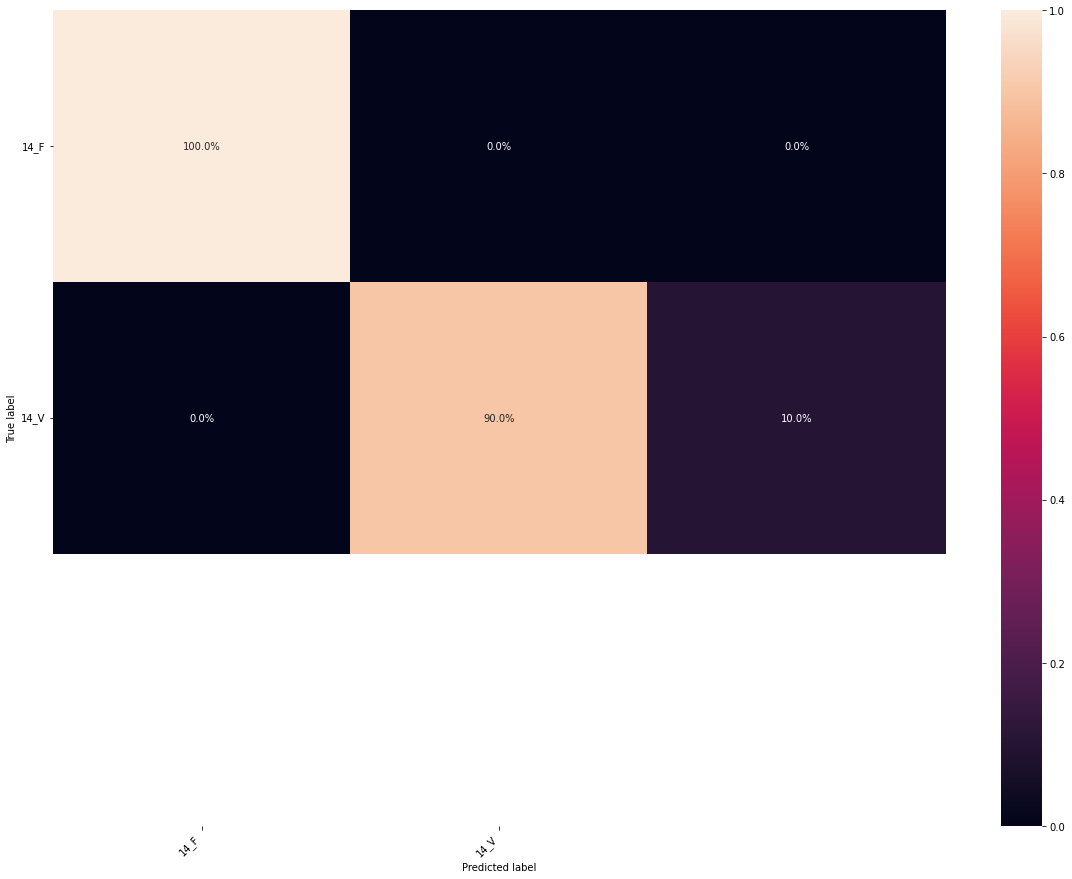

[1. 0.]
[0. 1.]


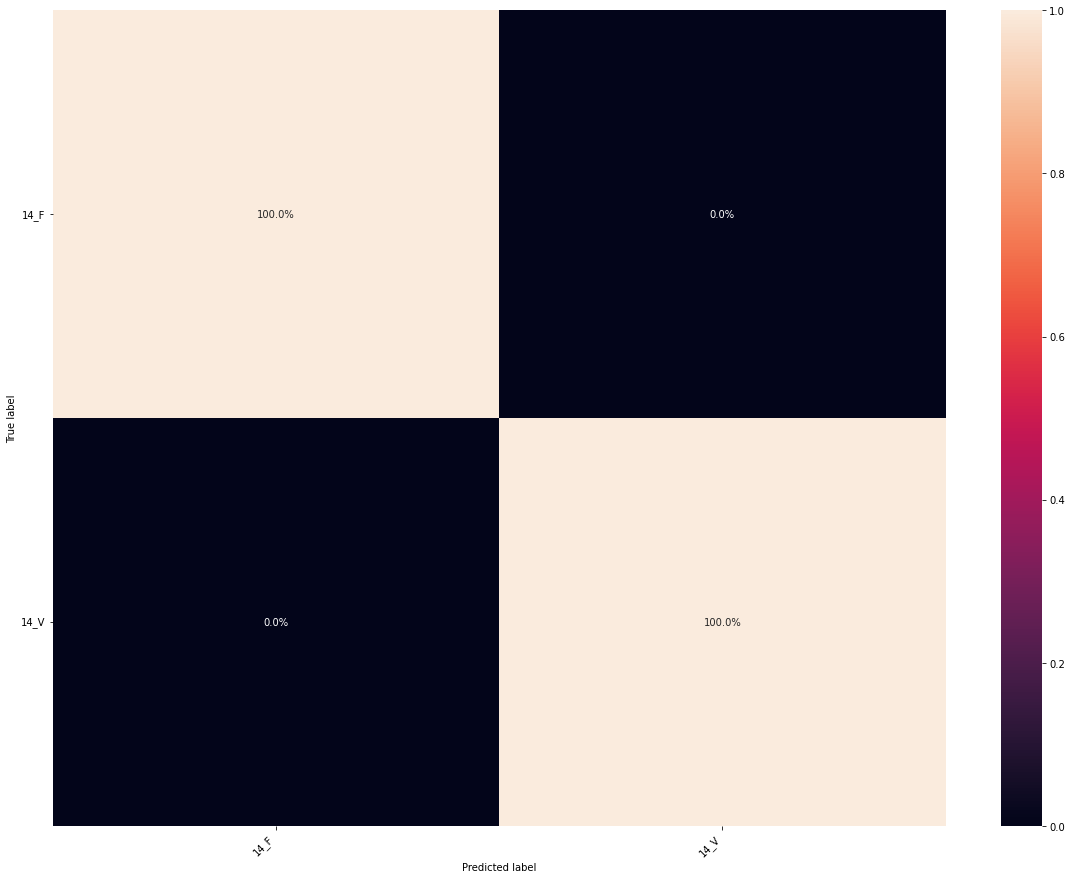

###################################################################
Test individuo 15
[0.91666667 0.08333333]
[0. 1.]


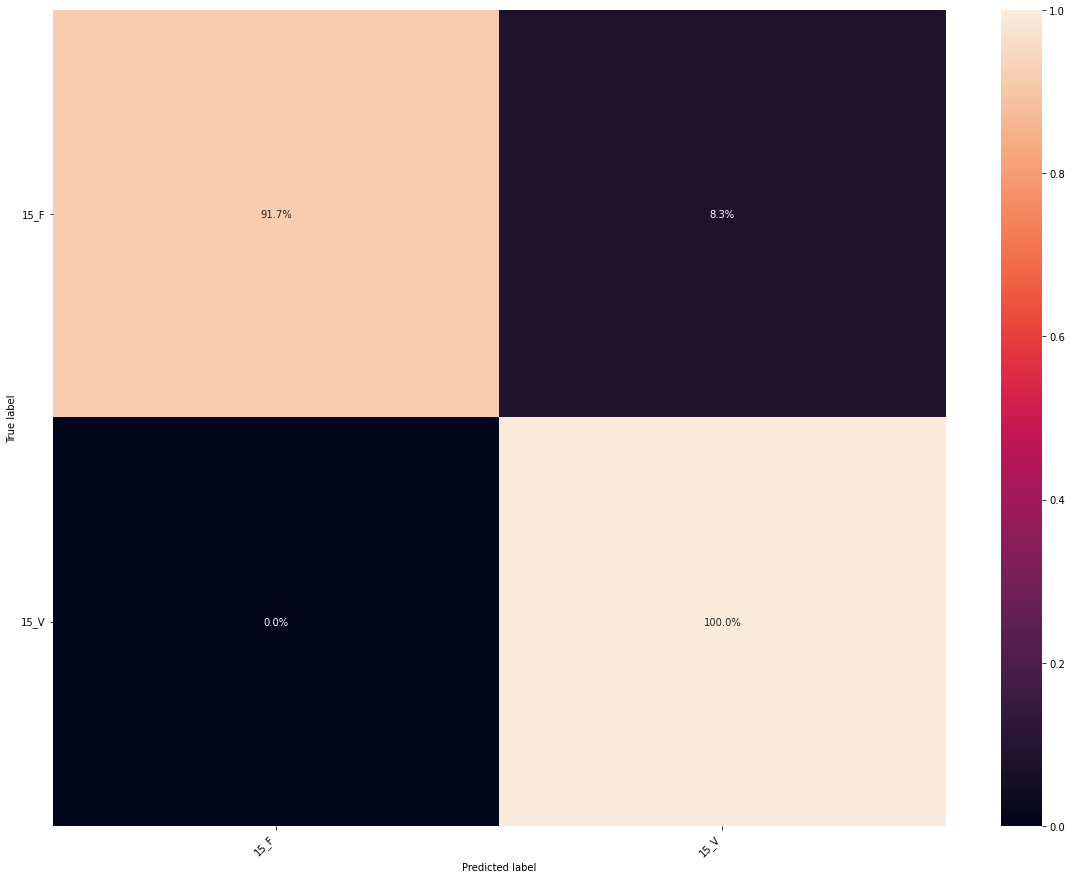

[1. 0.]
[0. 1.]


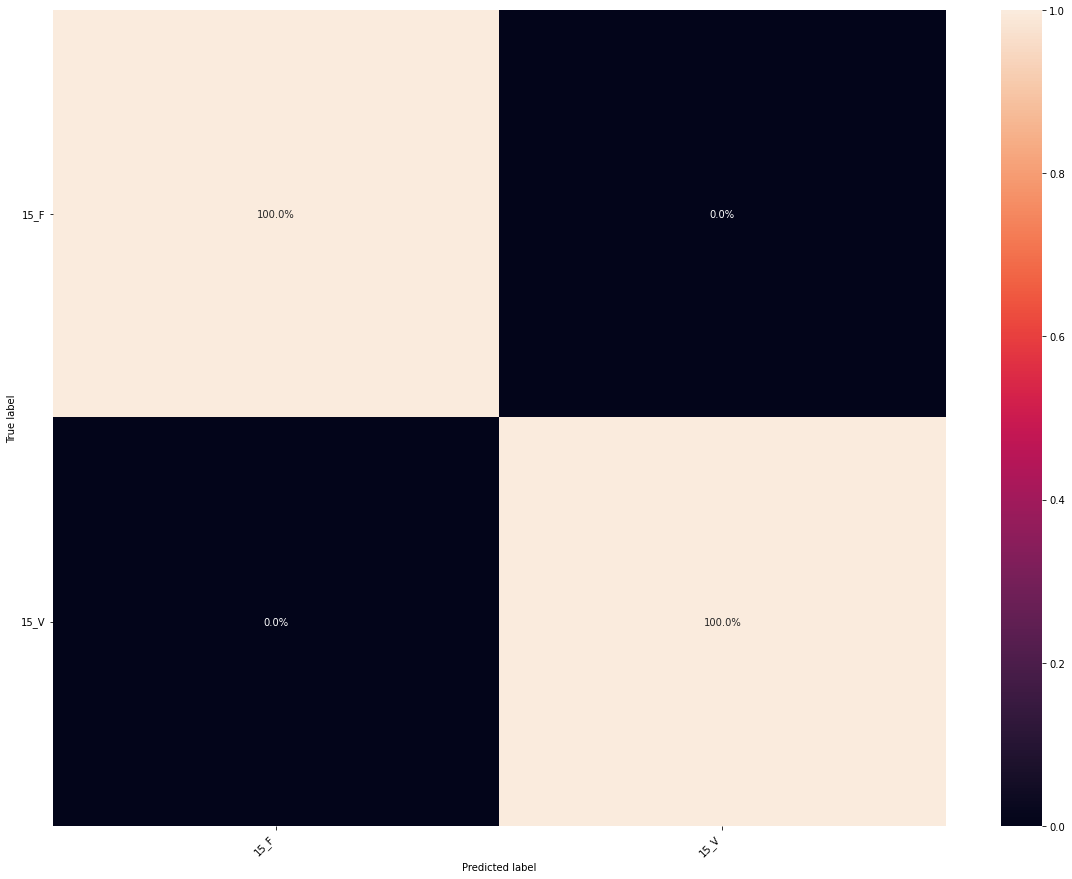

###################################################################
Test individuo 16
[0.91666667 0.08333333]
[0. 1.]


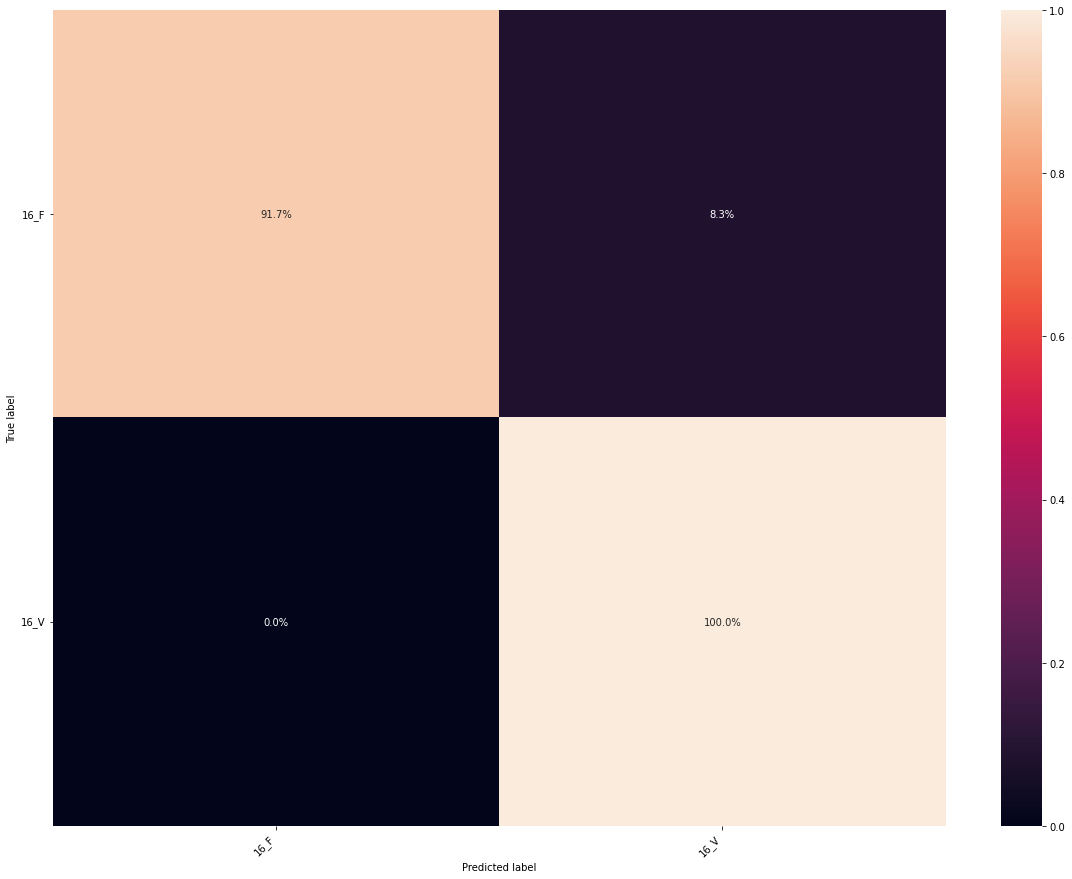

[1. 0.]
[0. 1.]


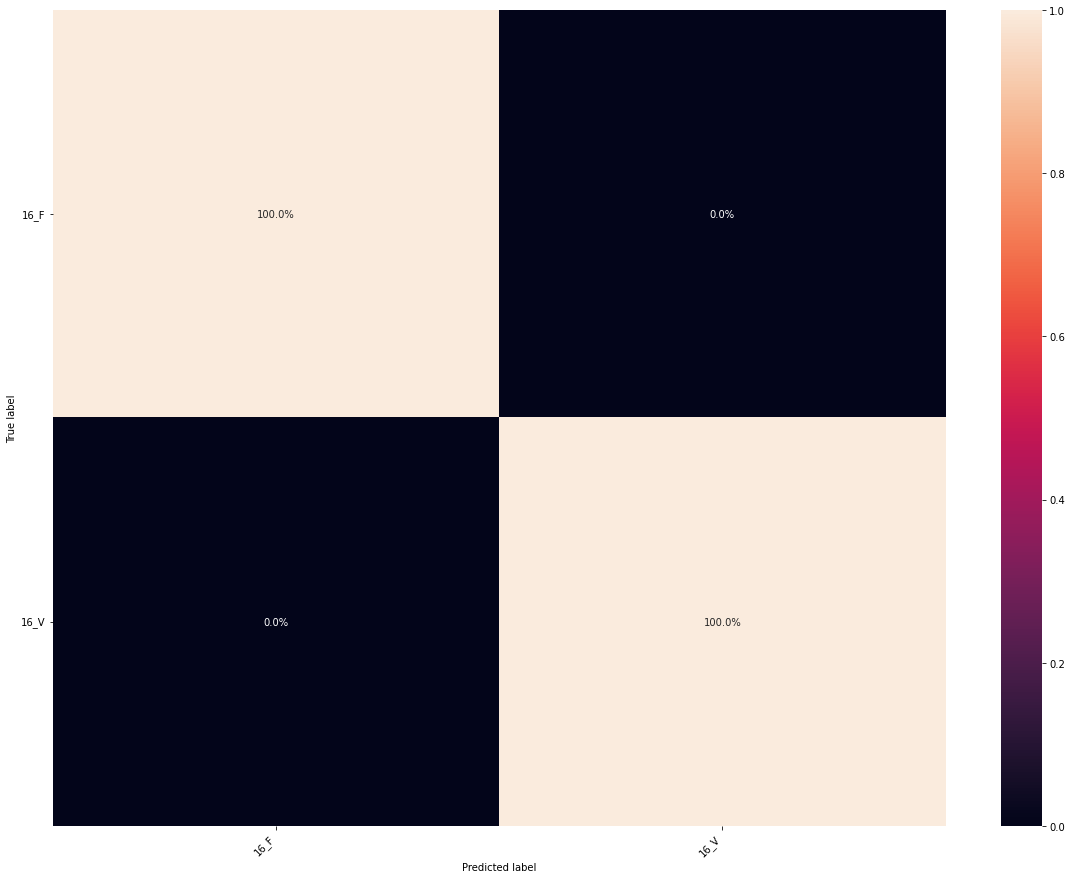

###################################################################
Test individuo 17
[1. 0. 0.]
[0.         0.91666667 0.08333333]
[nan nan nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


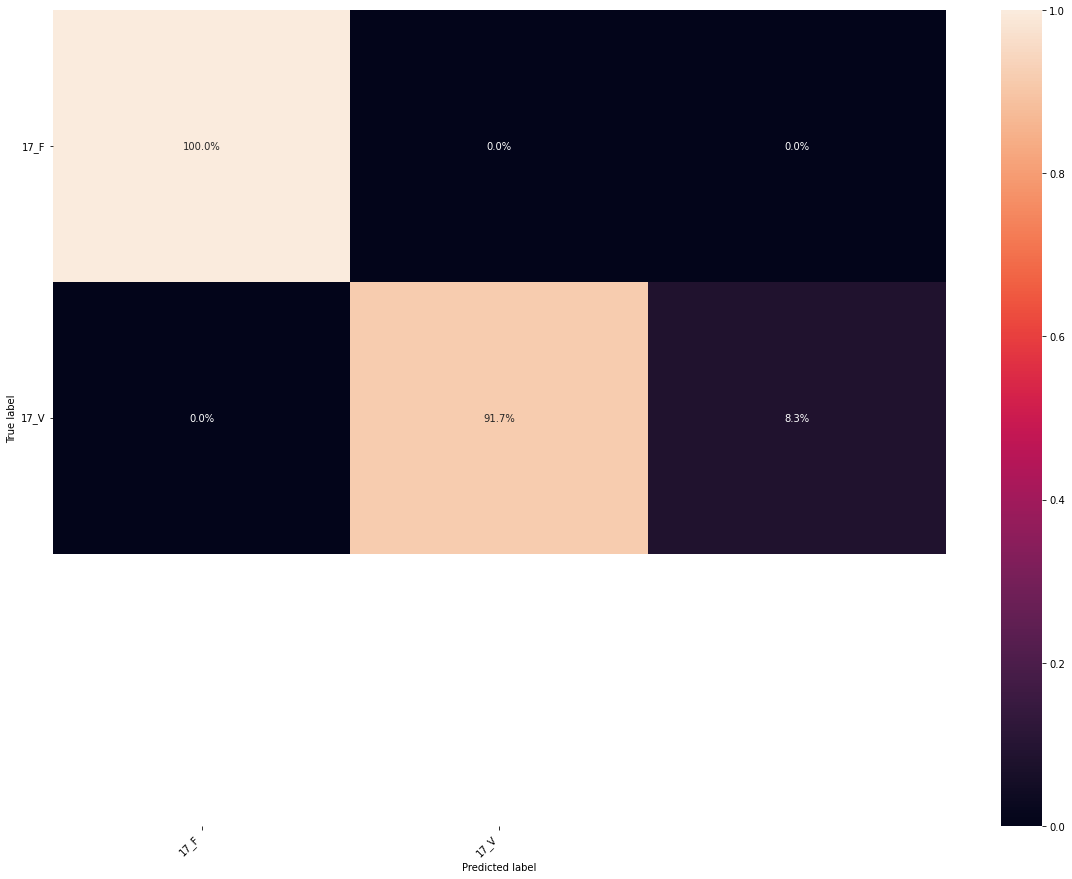

[0.91666667 0.08333333]
[0. 1.]


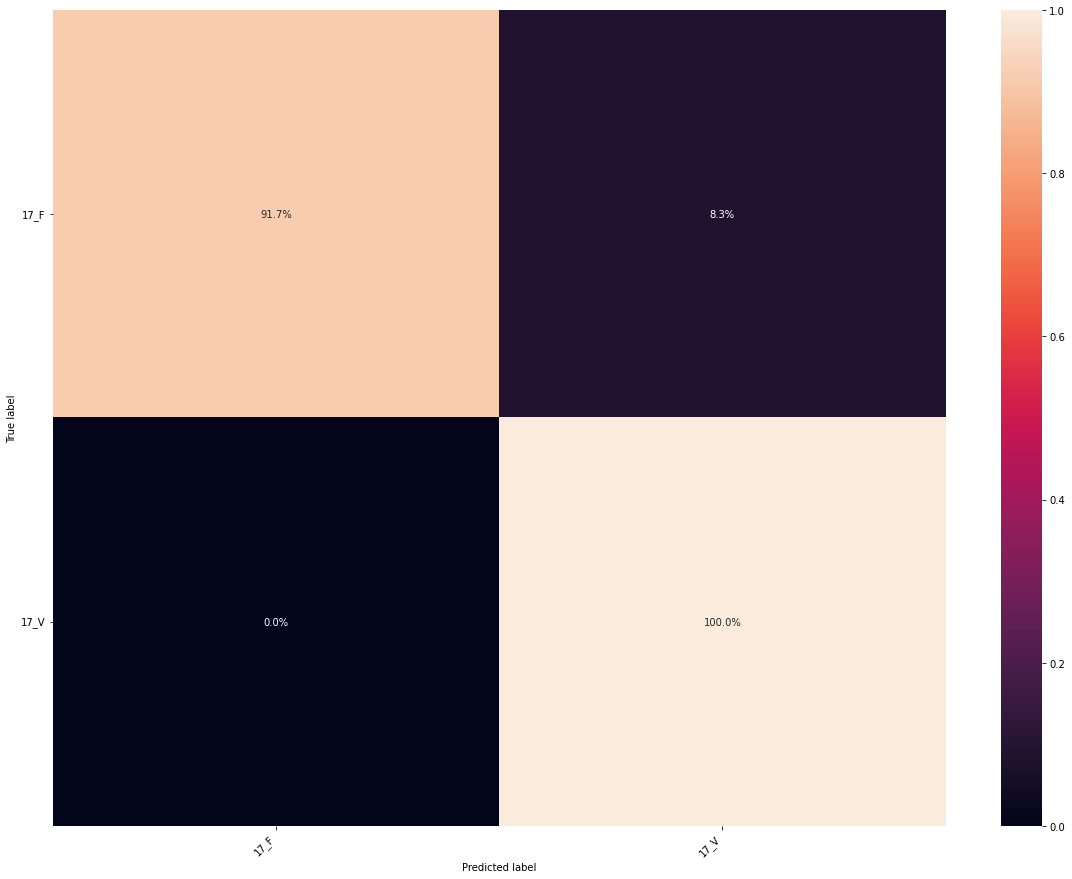

###################################################################
Test individuo 18
[1. 0.]
[0. 1.]


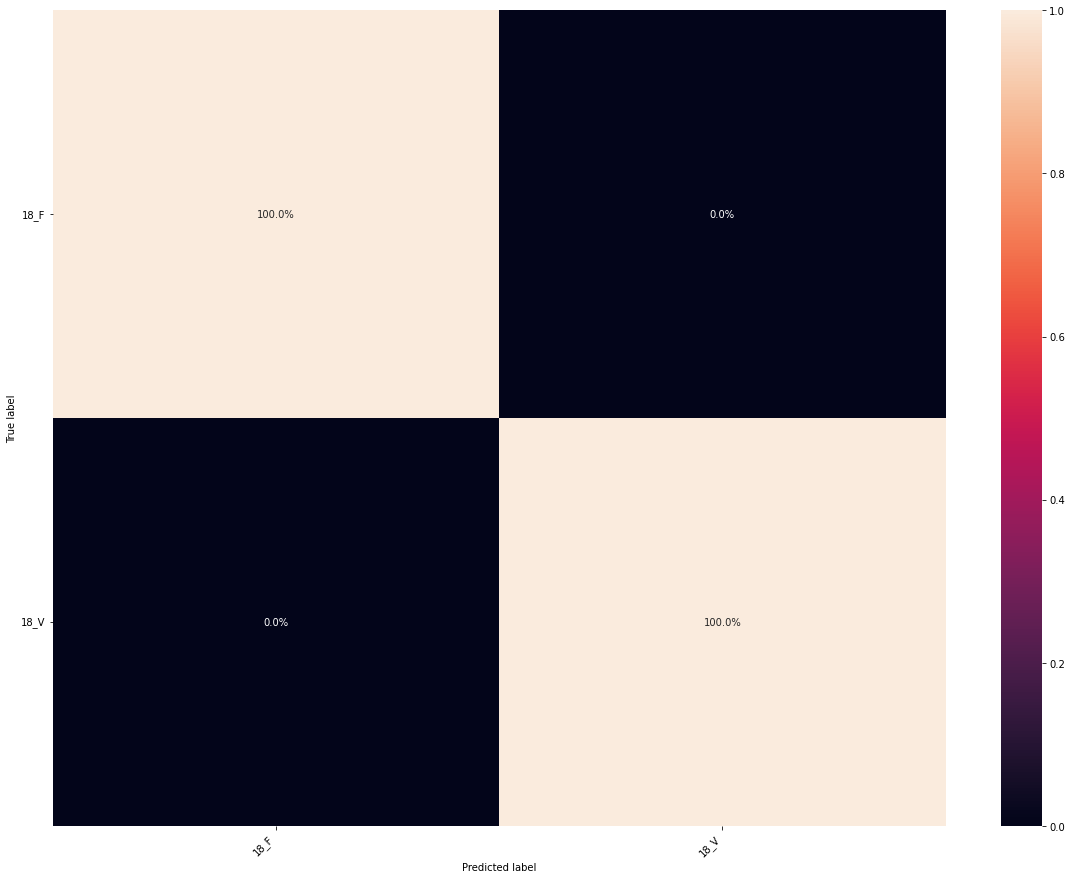

[0.91666667 0.08333333]
[0. 1.]


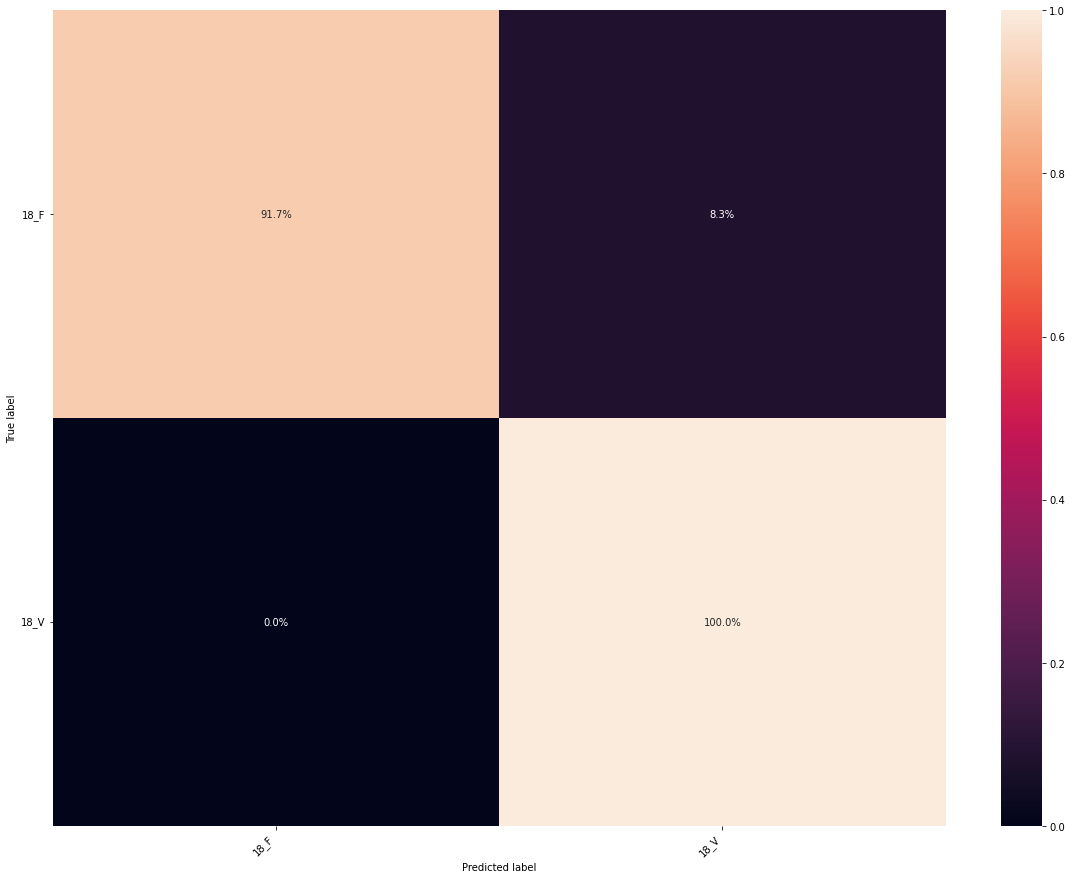

###################################################################
Test individuo 19
[0.91666667 0.         0.08333333]
[0. 1. 0.]
[nan nan nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


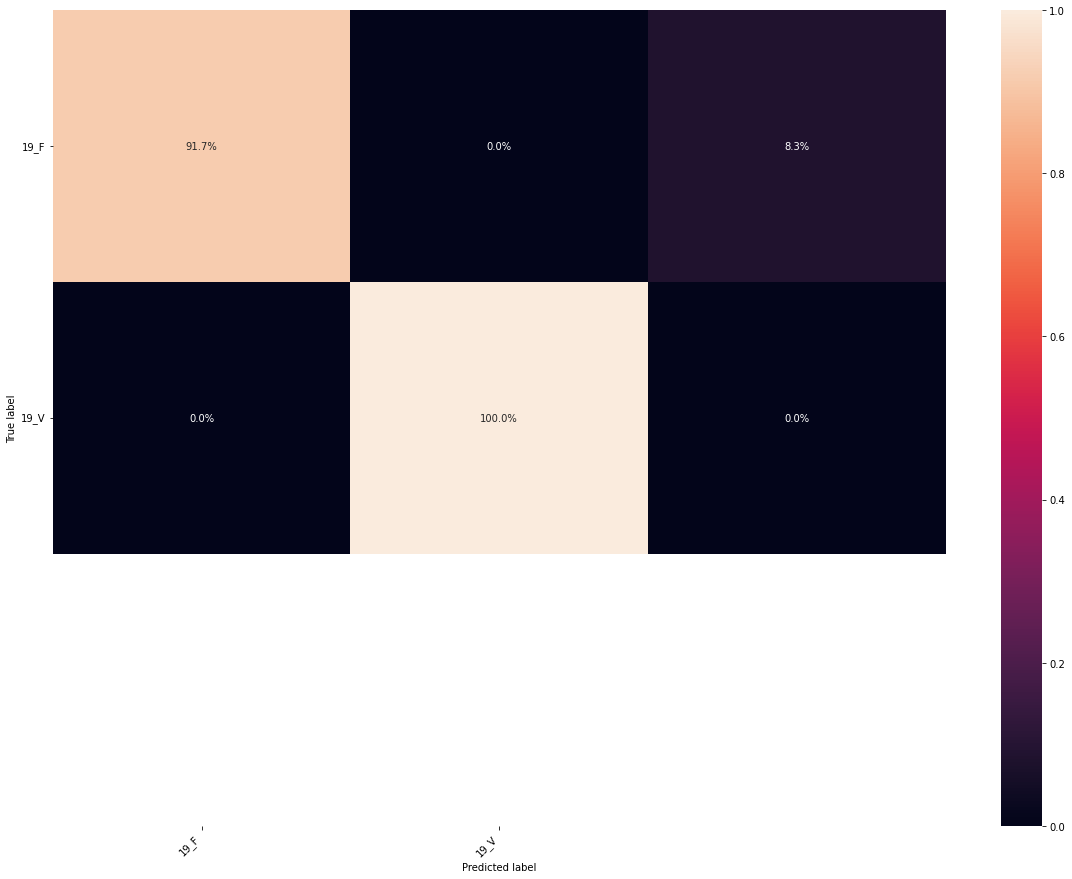

[0.91666667 0.08333333]
[0. 1.]


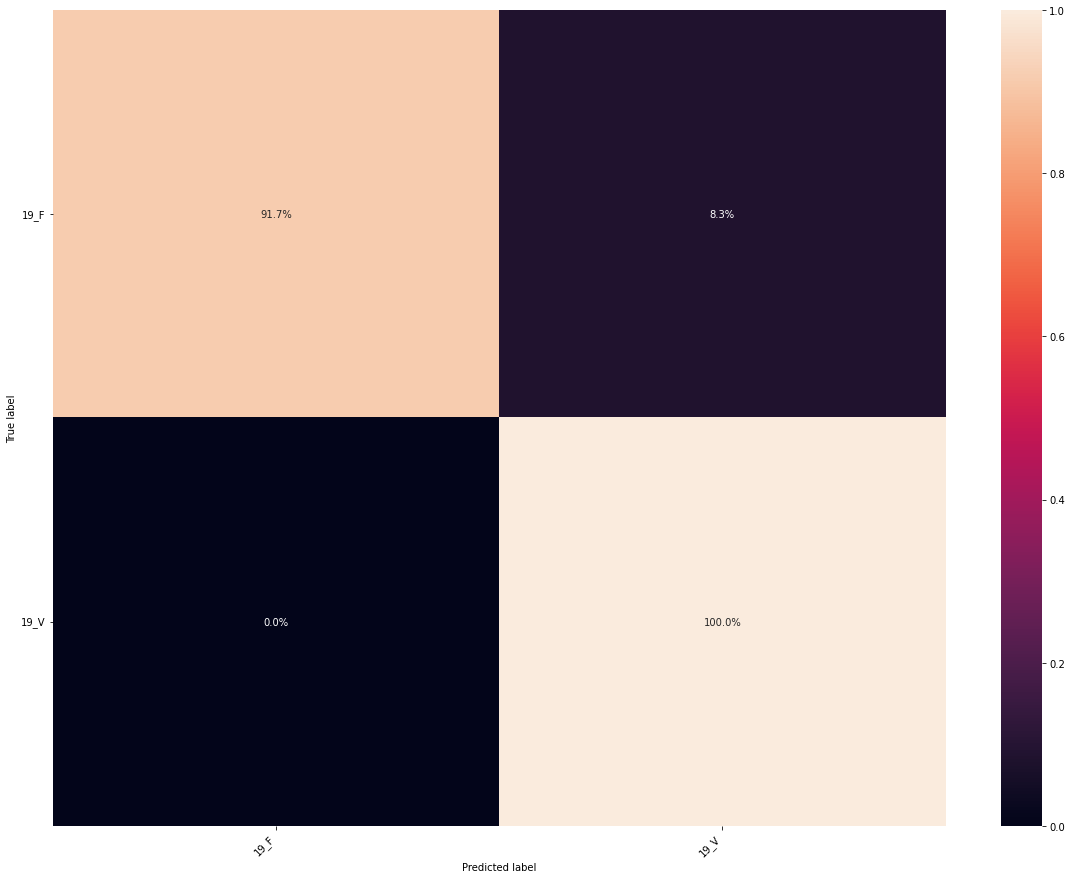

###################################################################
Test individuo 20
[0.5 0.5]
[0. 1.]


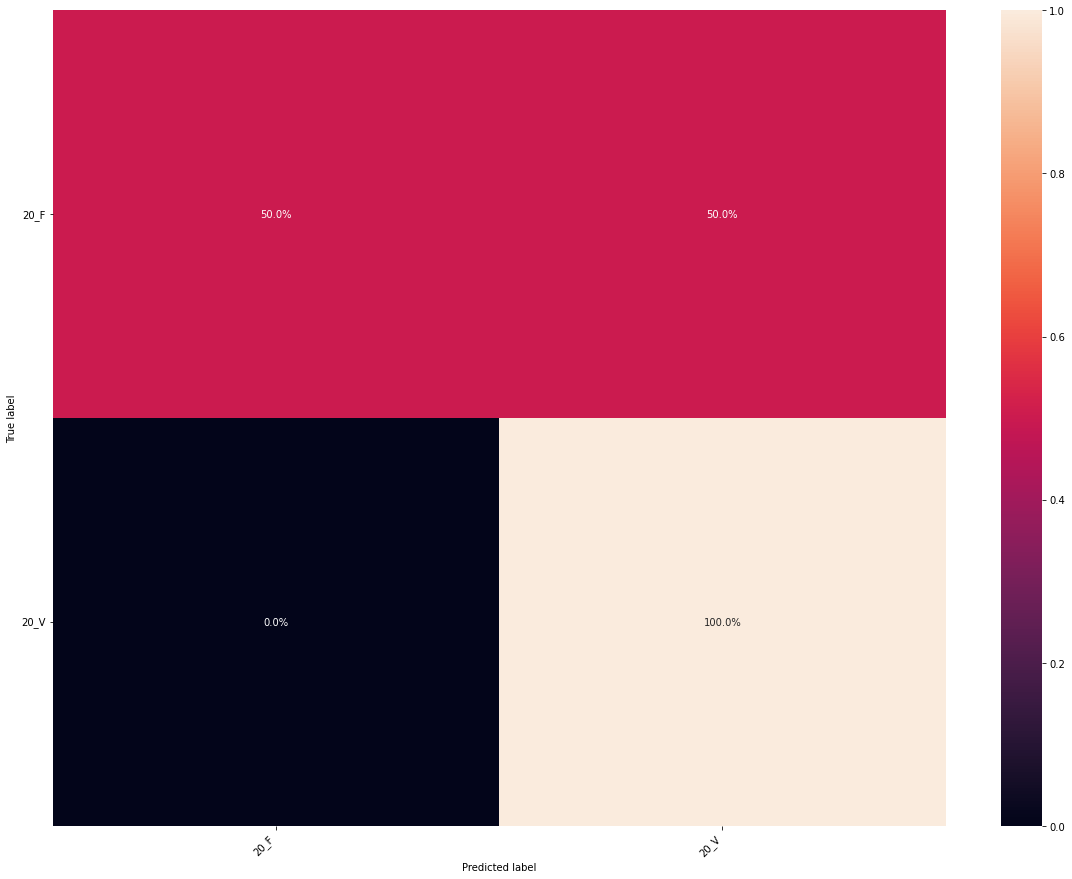

[1. 0.]
[0. 1.]


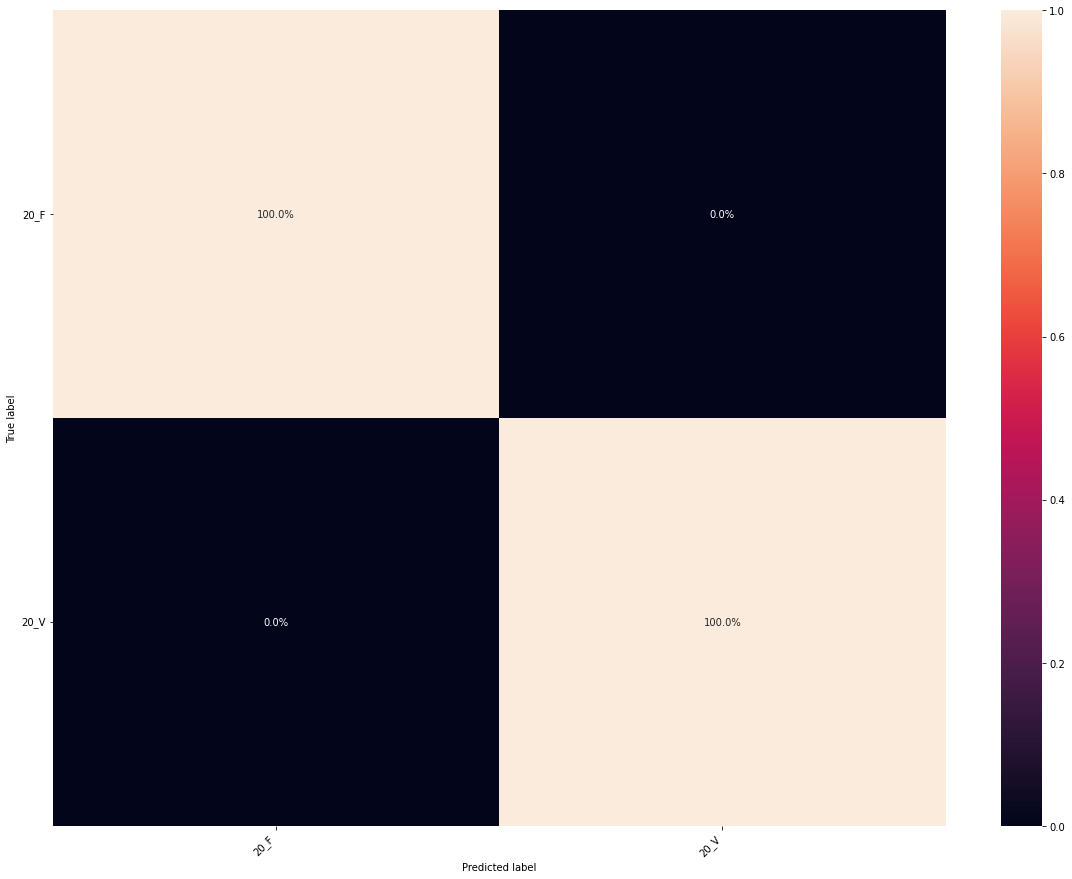

###################################################################
Test individuo 21
[1. 0.]
[0. 1.]


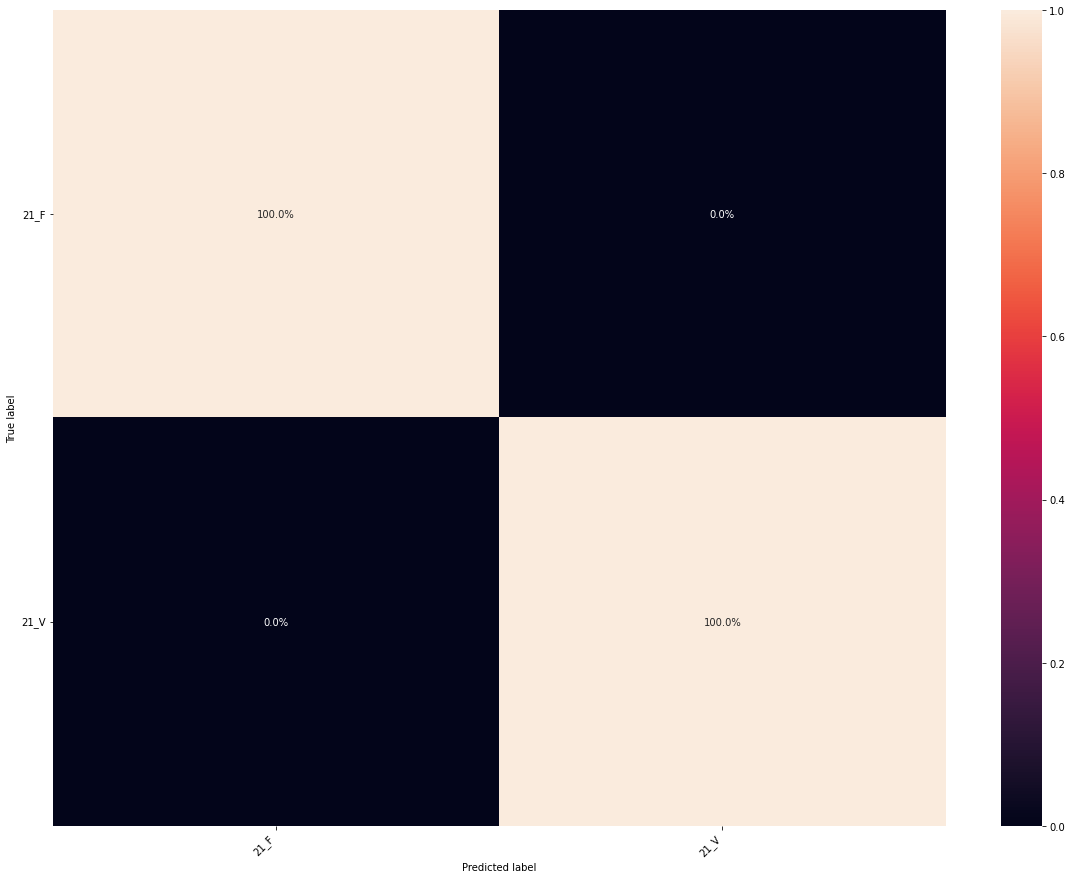

[1. 0.]
[0. 1.]


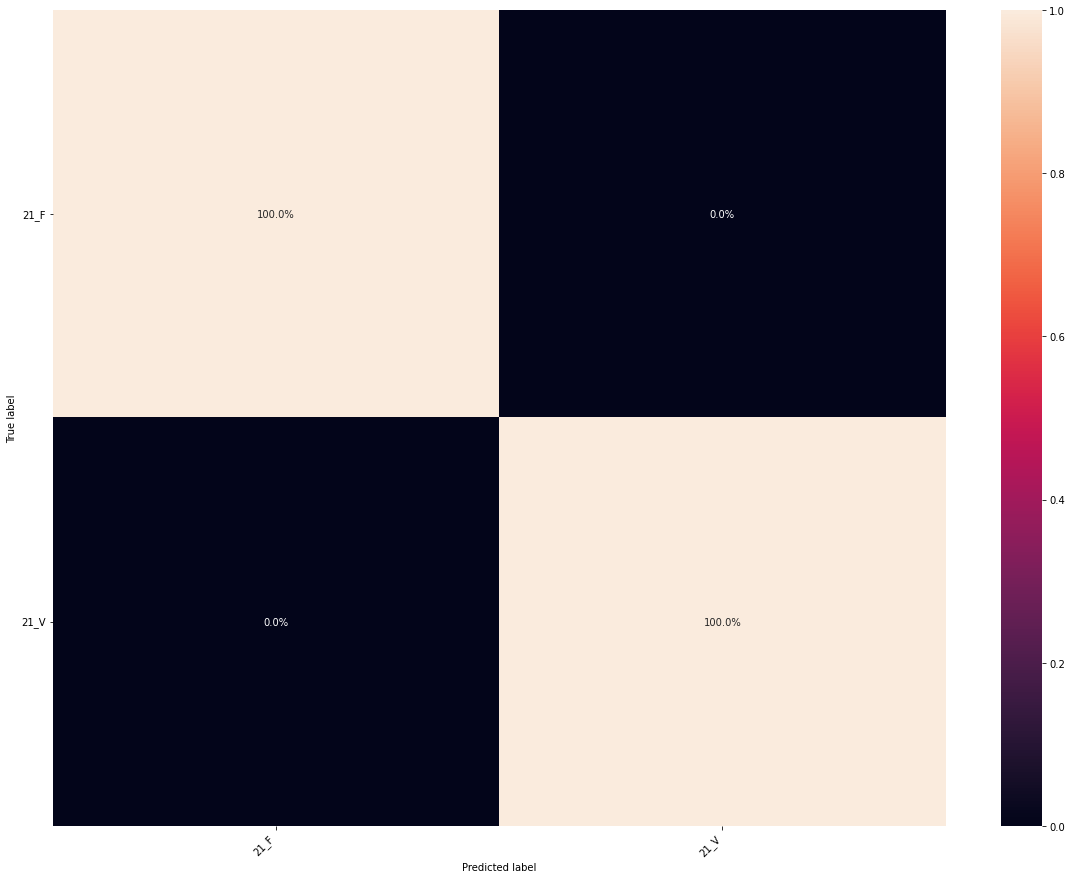

###################################################################
Test individuo 22
[0.75 0.25]
[0. 1.]


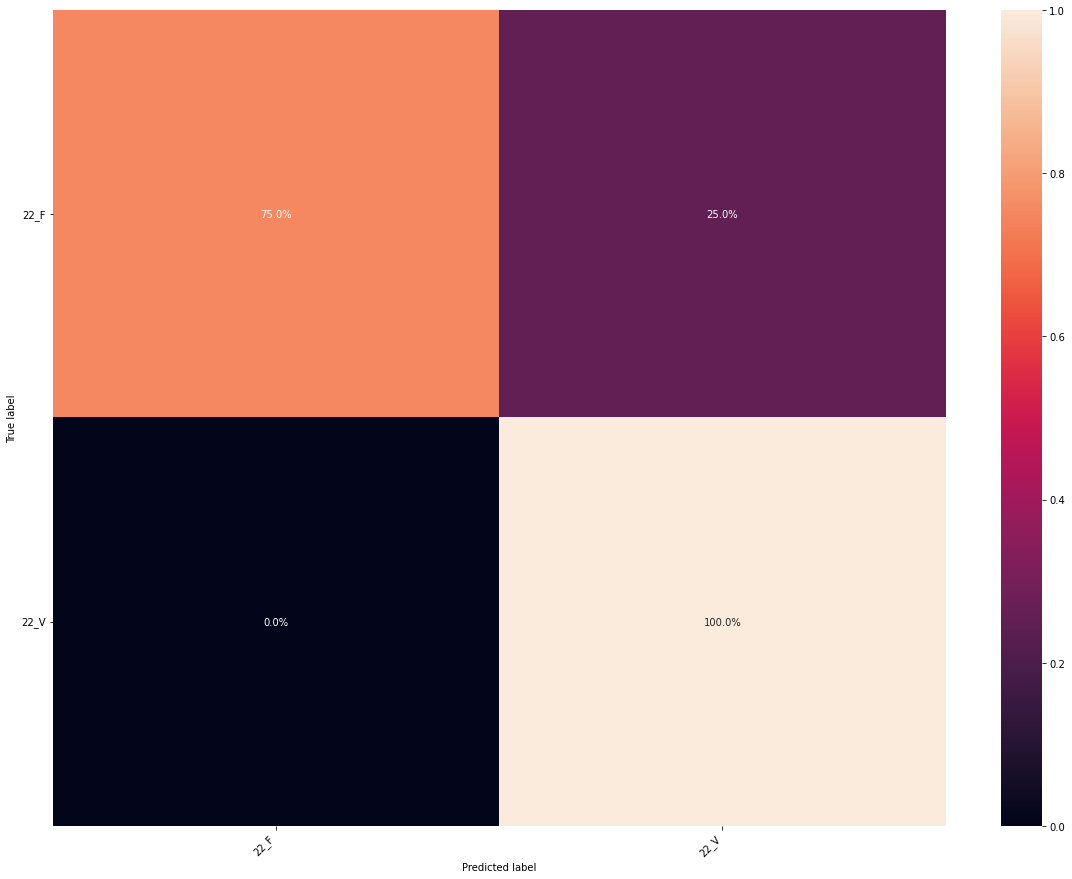

[0.83333333 0.16666667]
[0. 1.]


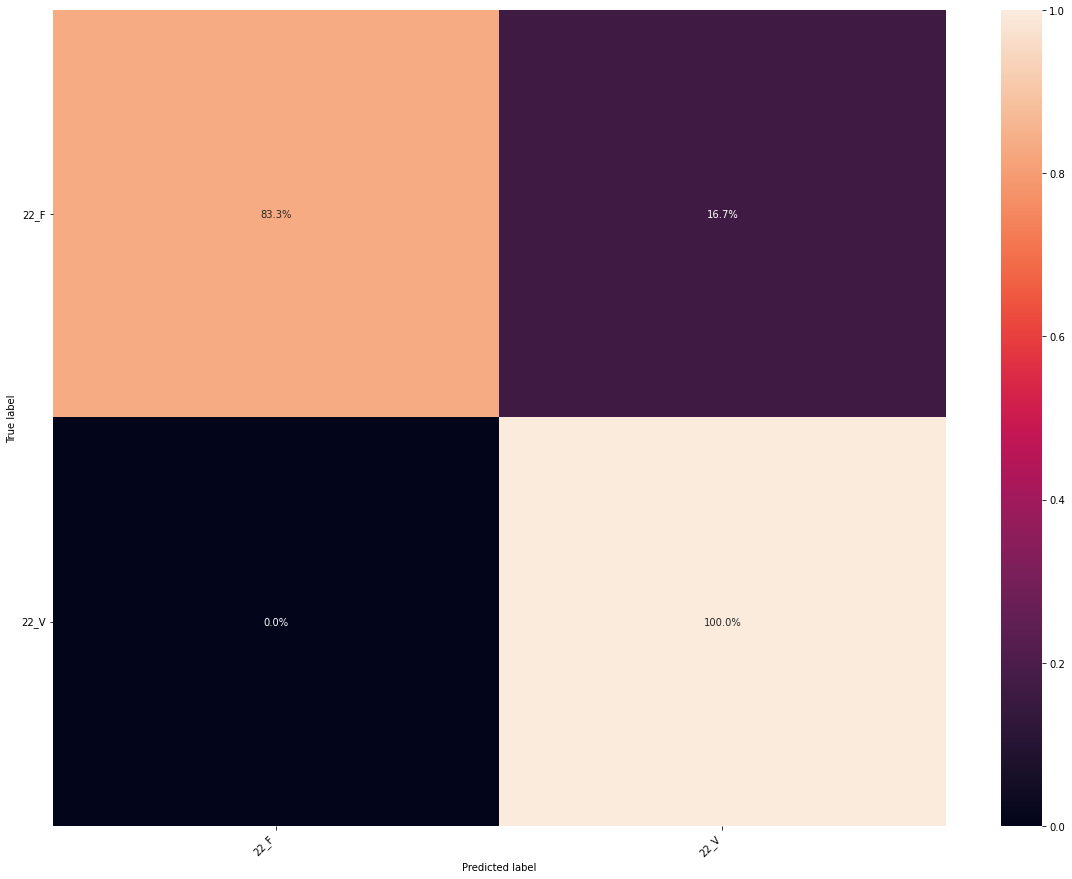

###################################################################
Test individuo 23
[0.41666667 0.58333333]
[0. 1.]


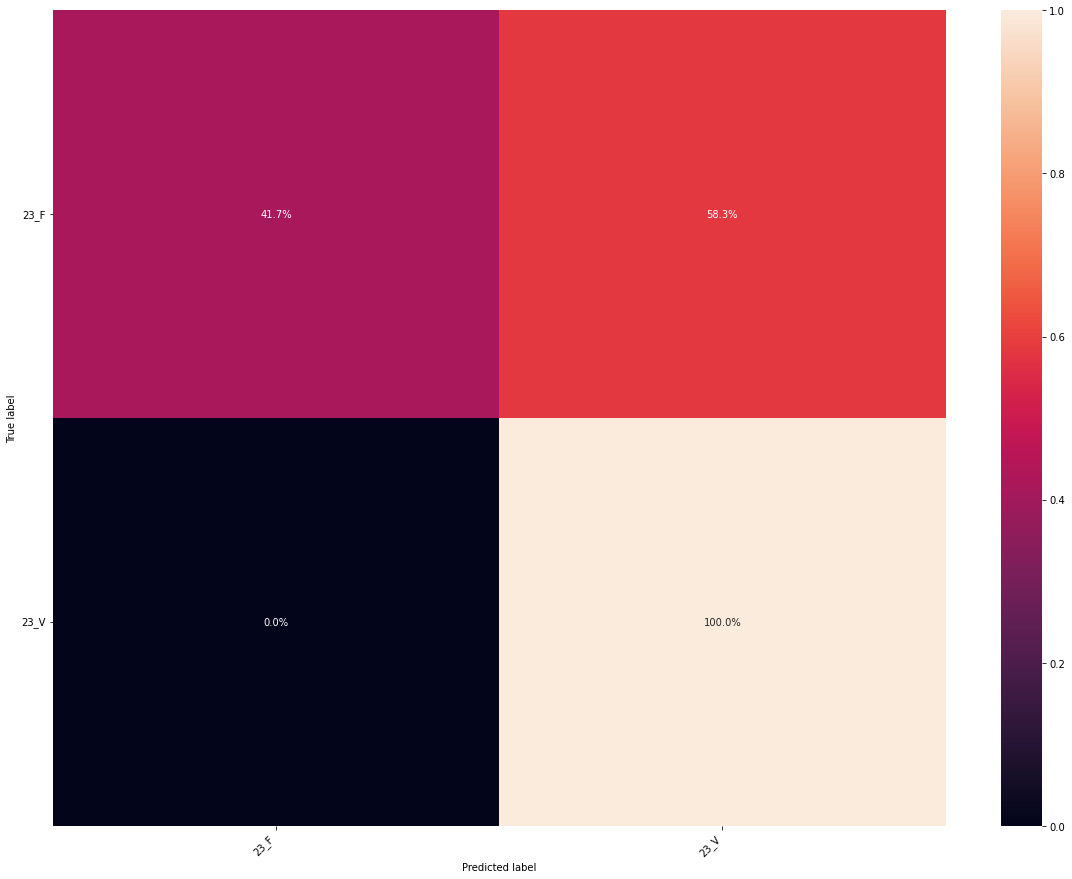

[1. 0.]
[0. 1.]


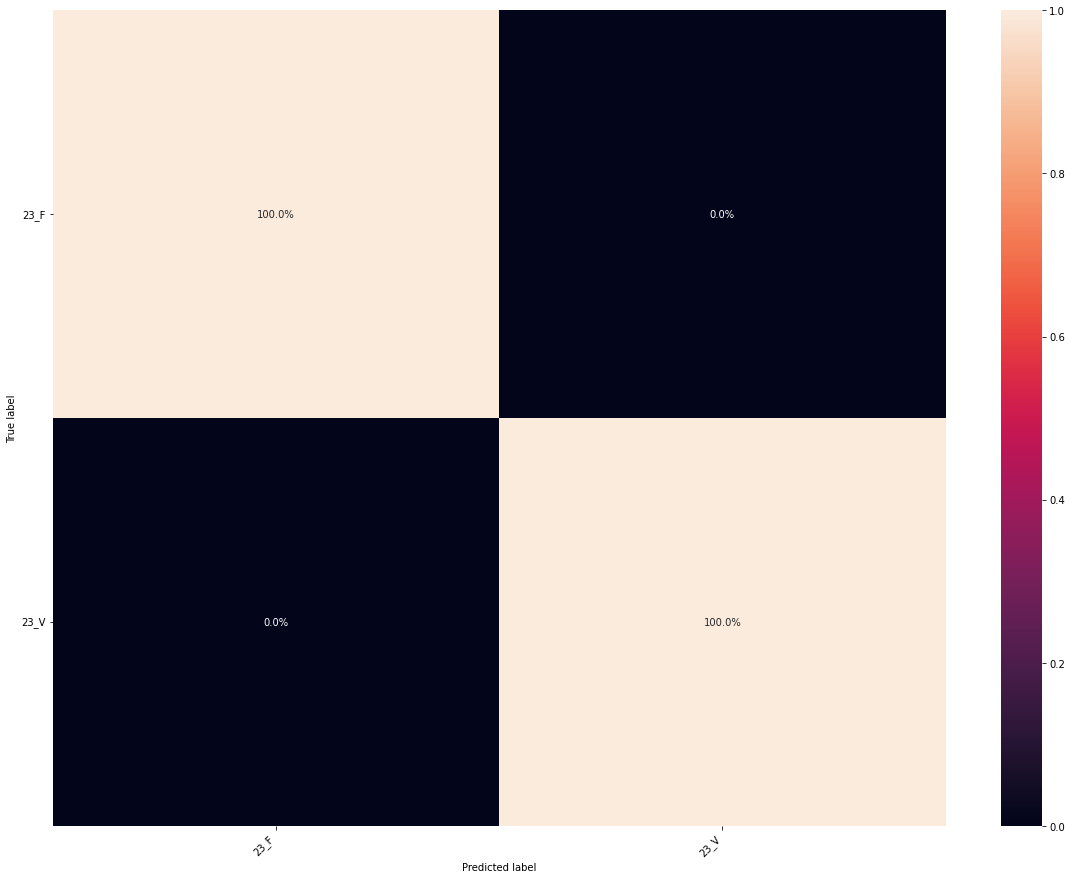

###################################################################
Test individuo 24
[1. 0.]
[0. 1.]


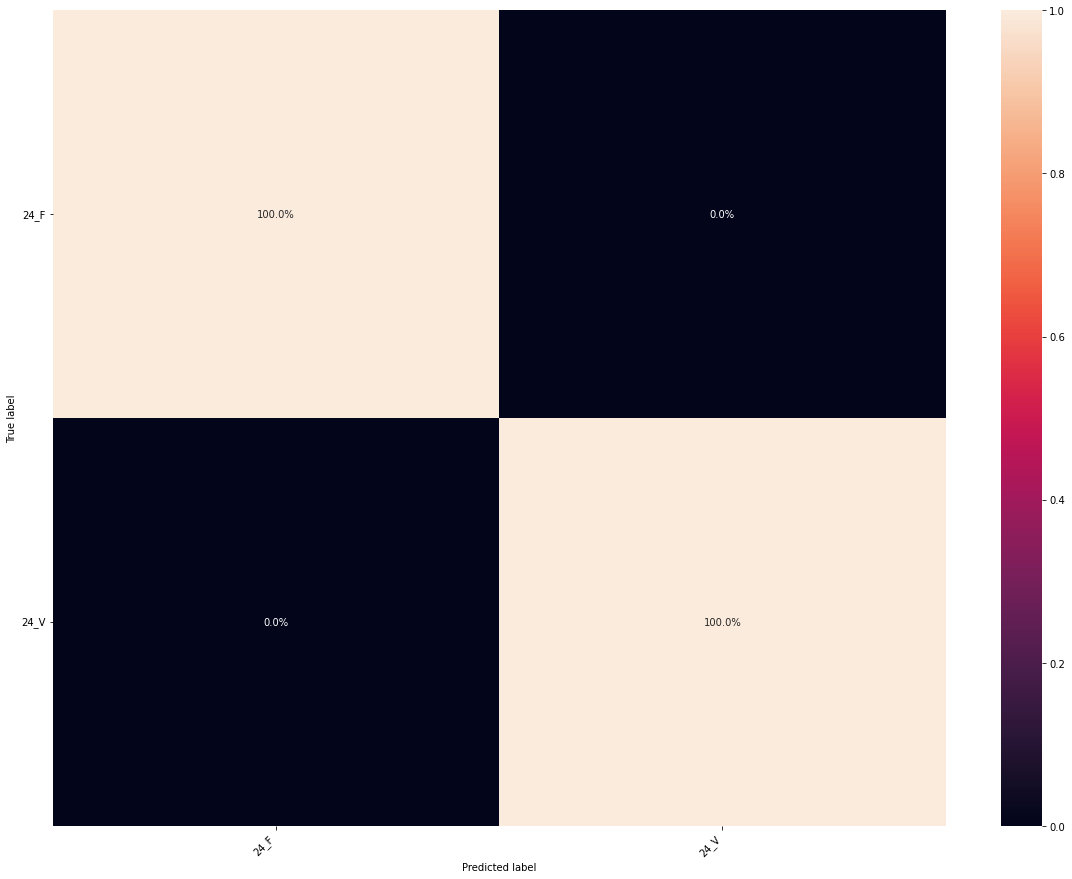

[1. 0.]
[0. 1.]


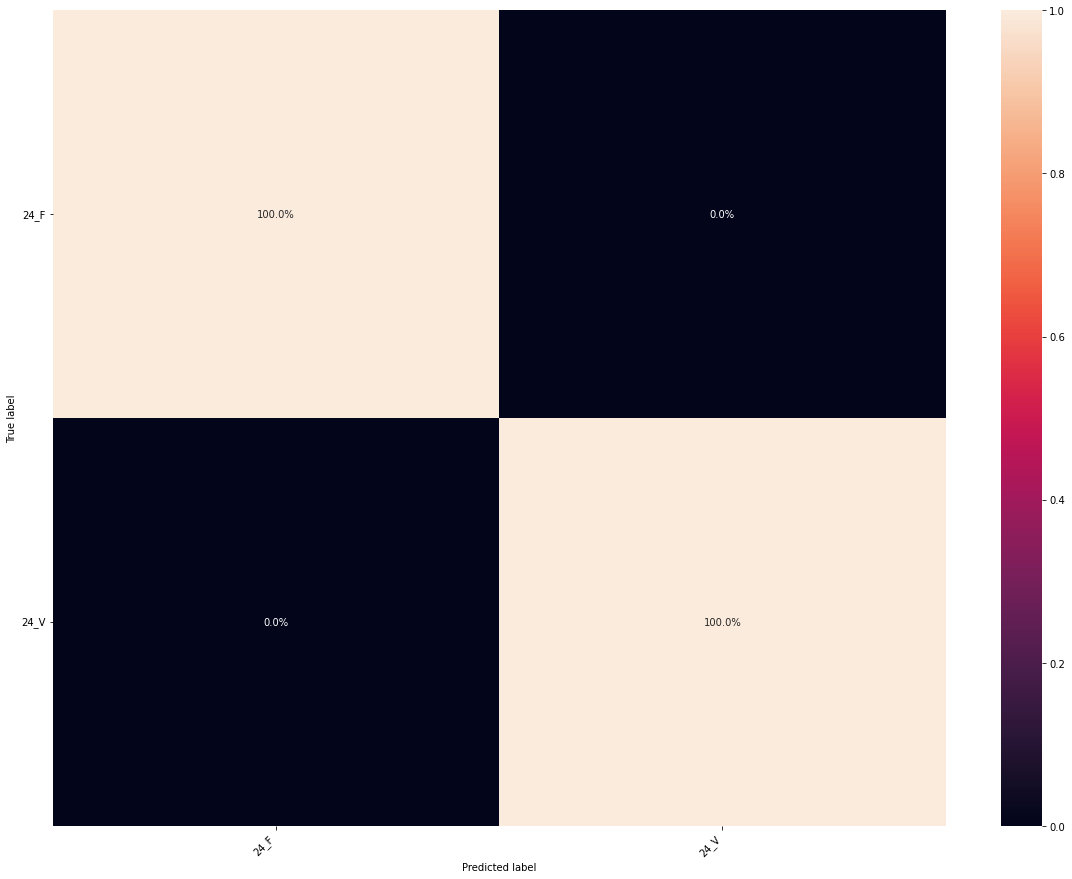

###################################################################
Test individuo 25
[0.75 0.25]
[0. 1.]


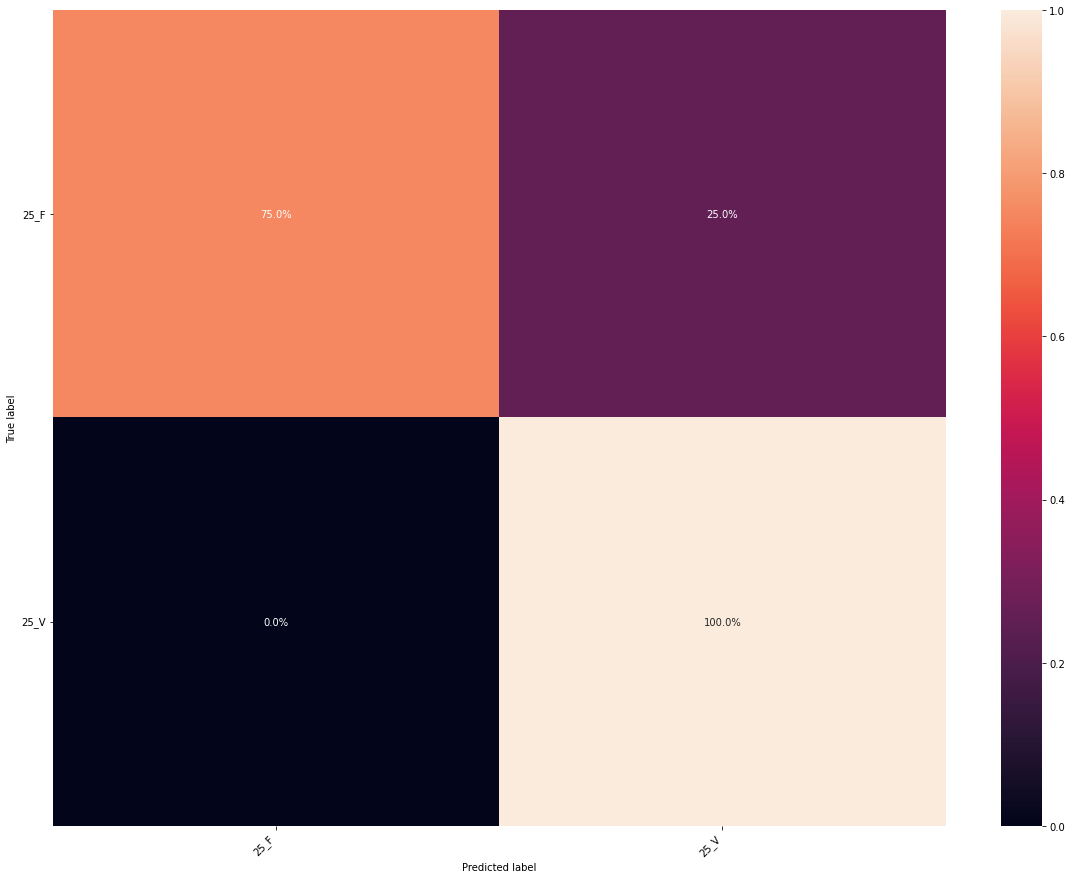

[1. 0.]
[0. 1.]


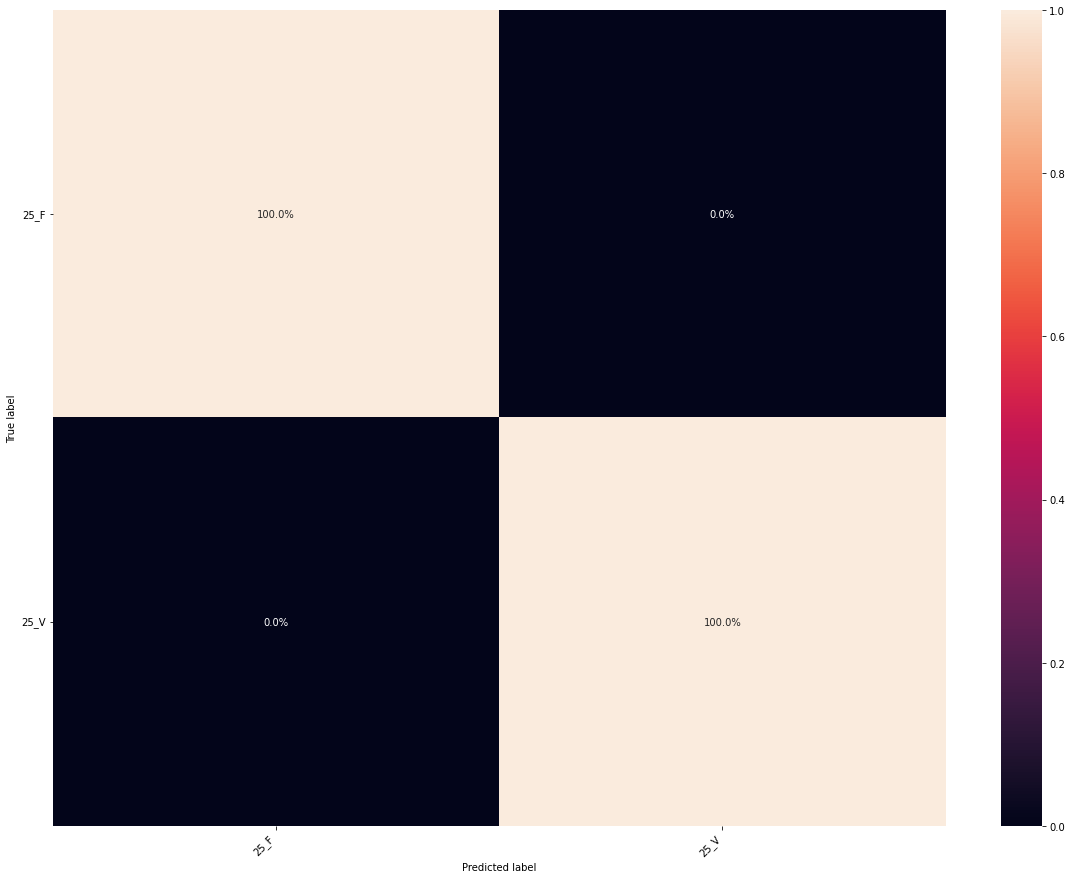

###################################################################
Test individuo 26
[1. 0.]
[0.08333333 0.91666667]


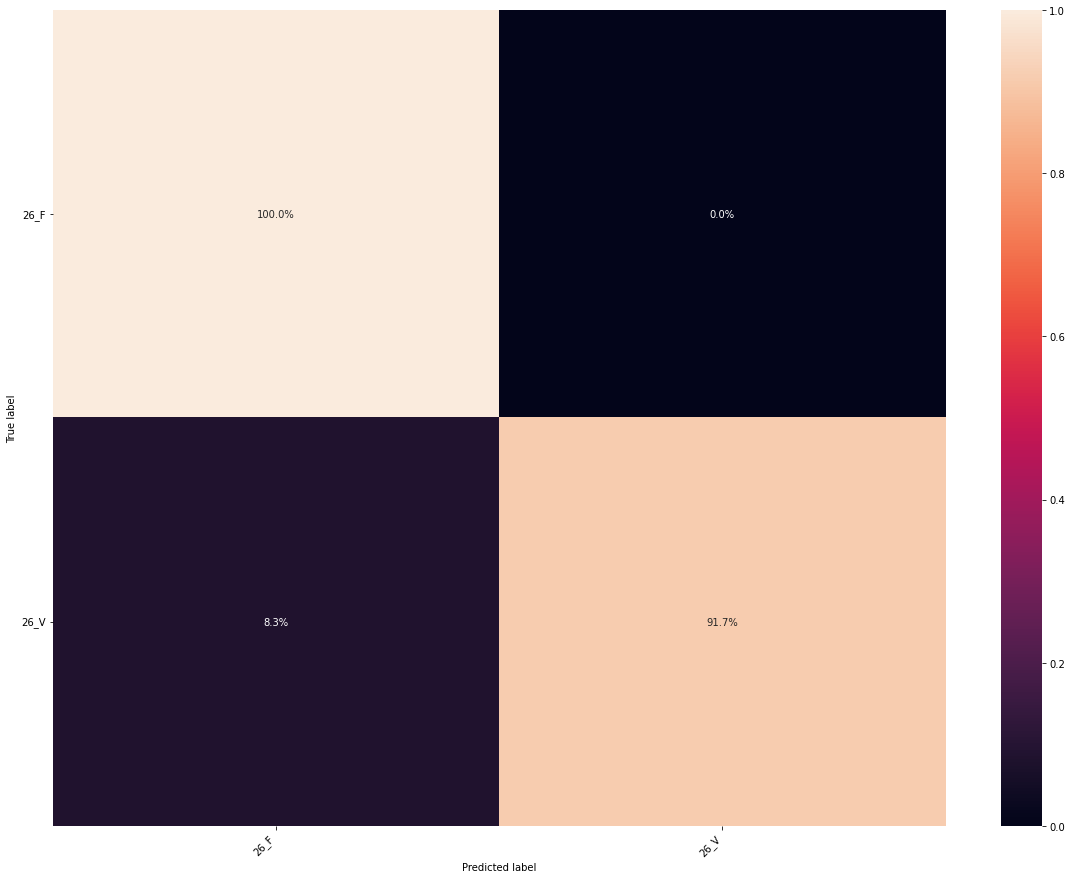

[1. 0.]
[0. 1.]


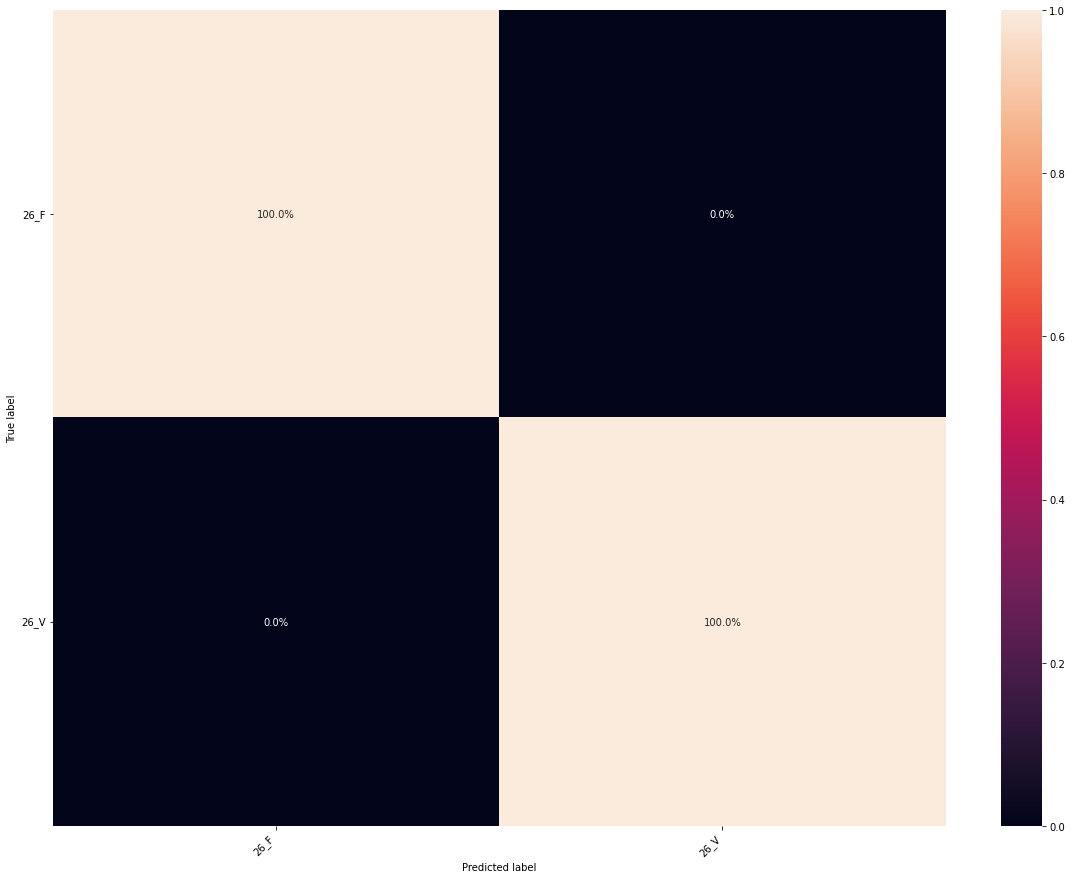

###################################################################
Test individuo 27
[1. 0.]
[0. 1.]


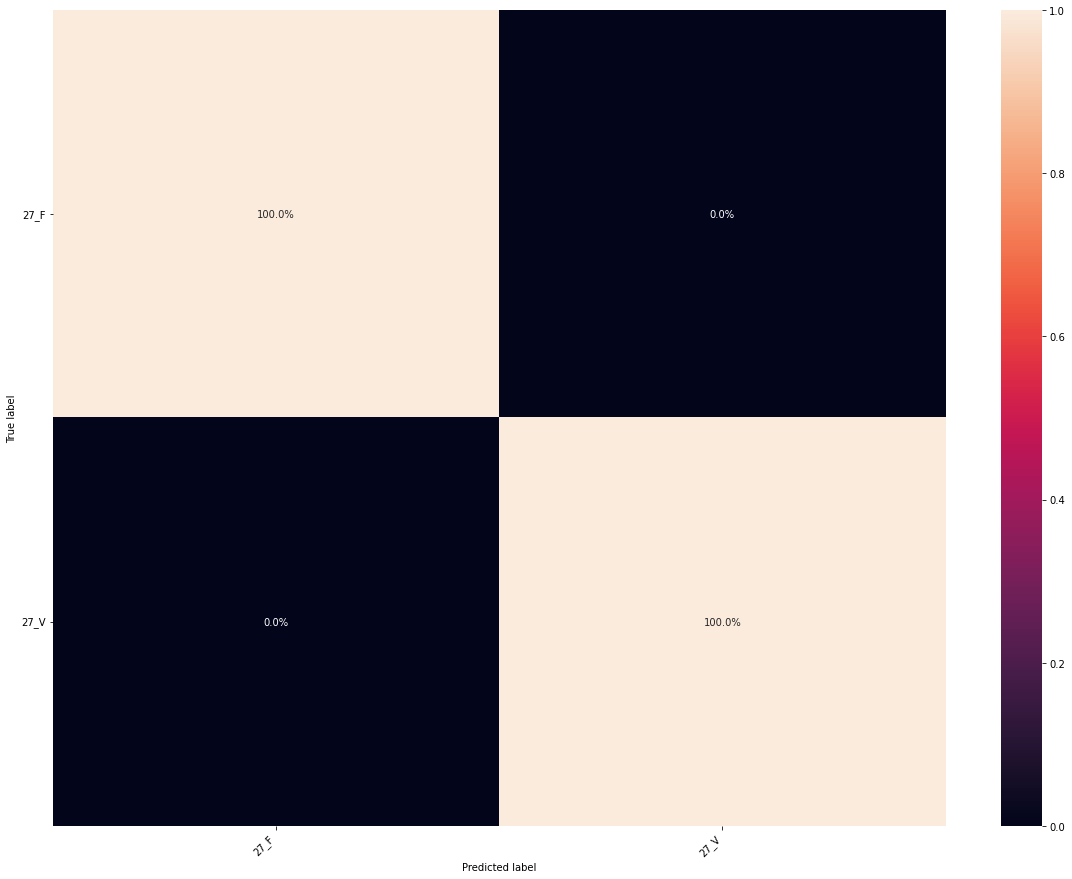

[0.91666667 0.08333333]
[0. 1.]


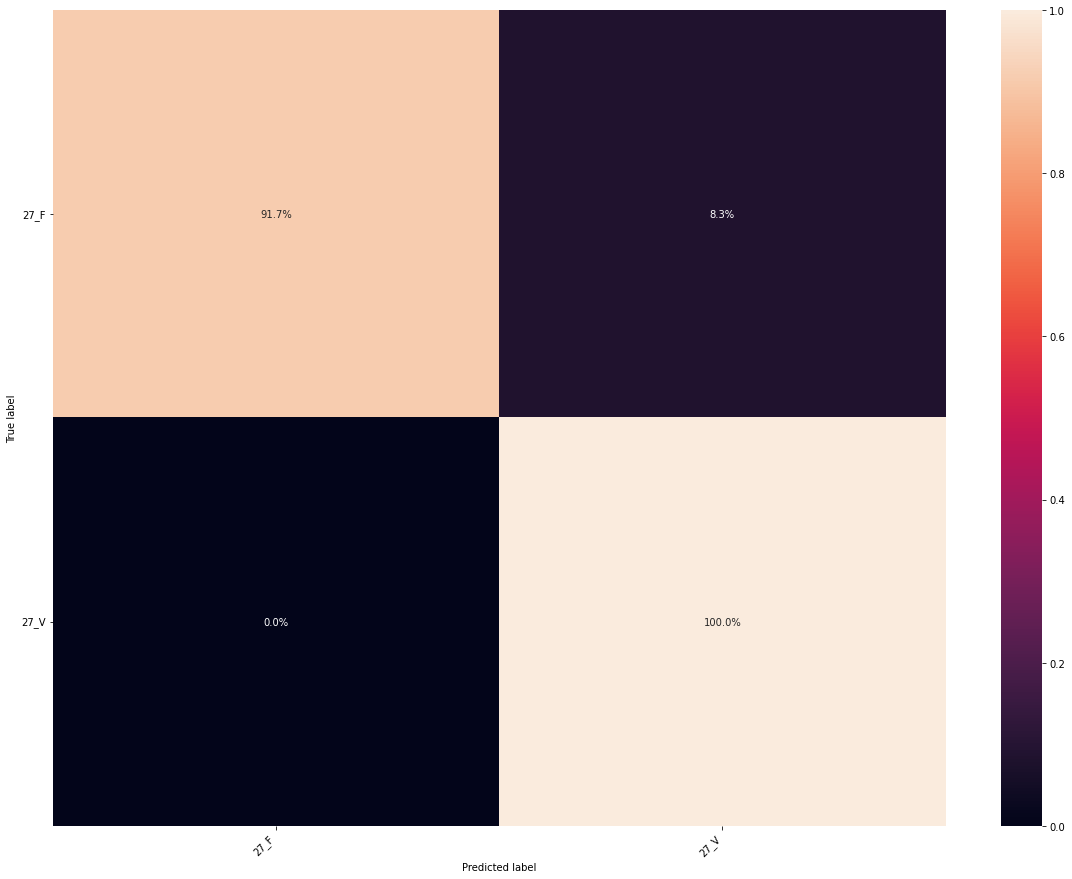

###################################################################
Test individuo 28
[nan nan nan nan nan nan]
[nan nan nan nan nan nan]
[0.         0.08333333 0.5        0.25       0.08333333 0.08333333]
[0.08333333 0.         0.         0.91666667 0.         0.        ]
[nan nan nan nan nan nan]
[nan nan nan nan nan nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


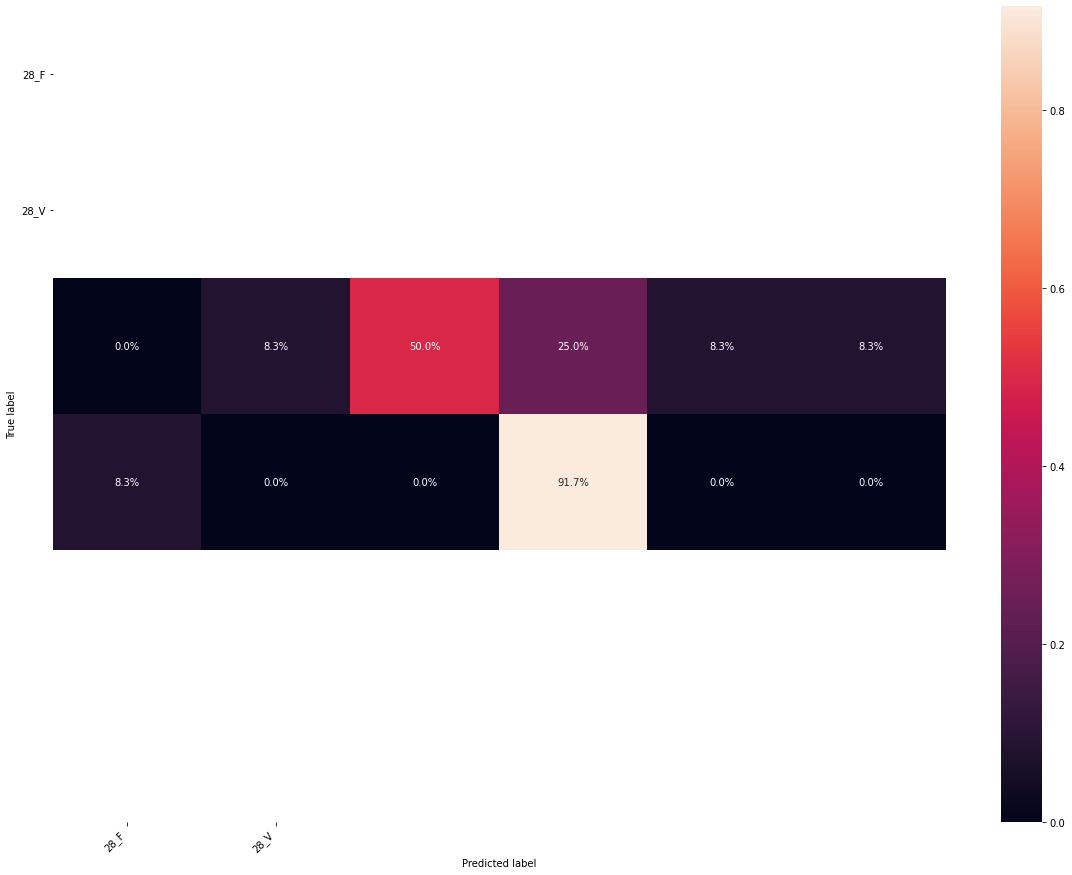

[1. 0.]
[0. 1.]


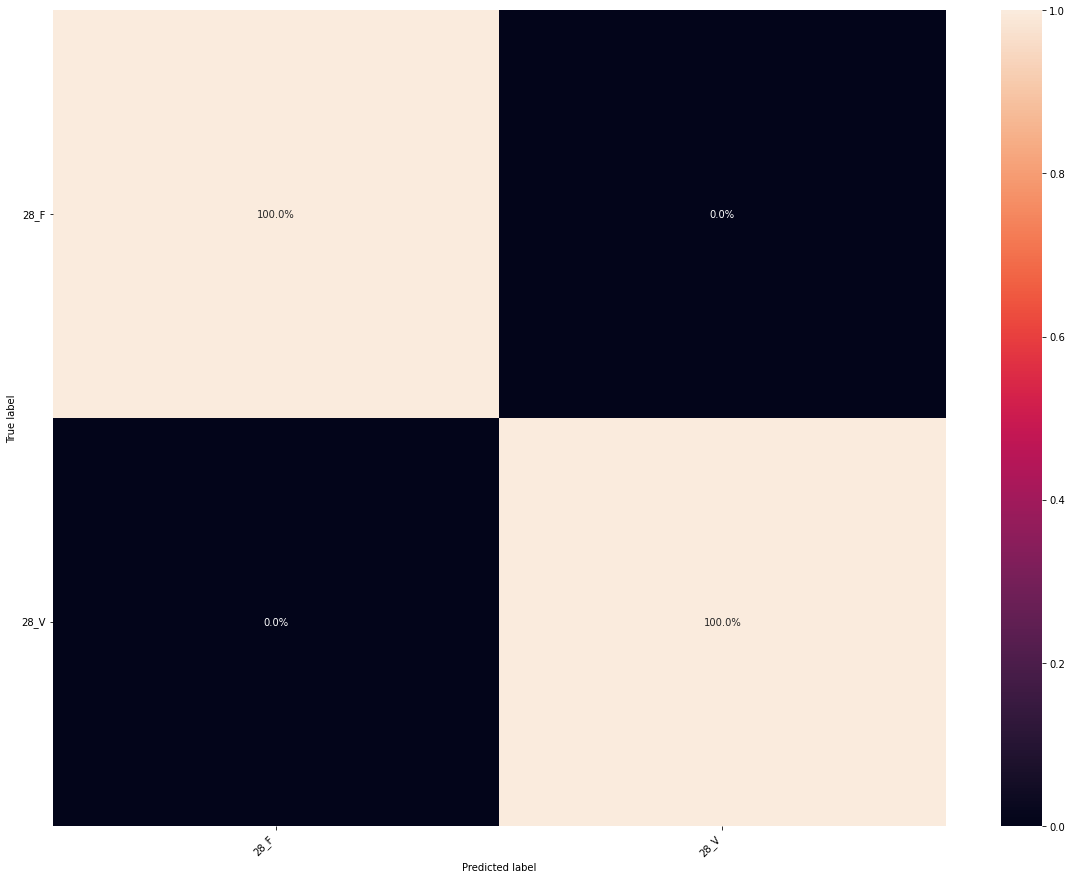

###################################################################
Test individuo 29
[0.75 0.25]
[0. 1.]


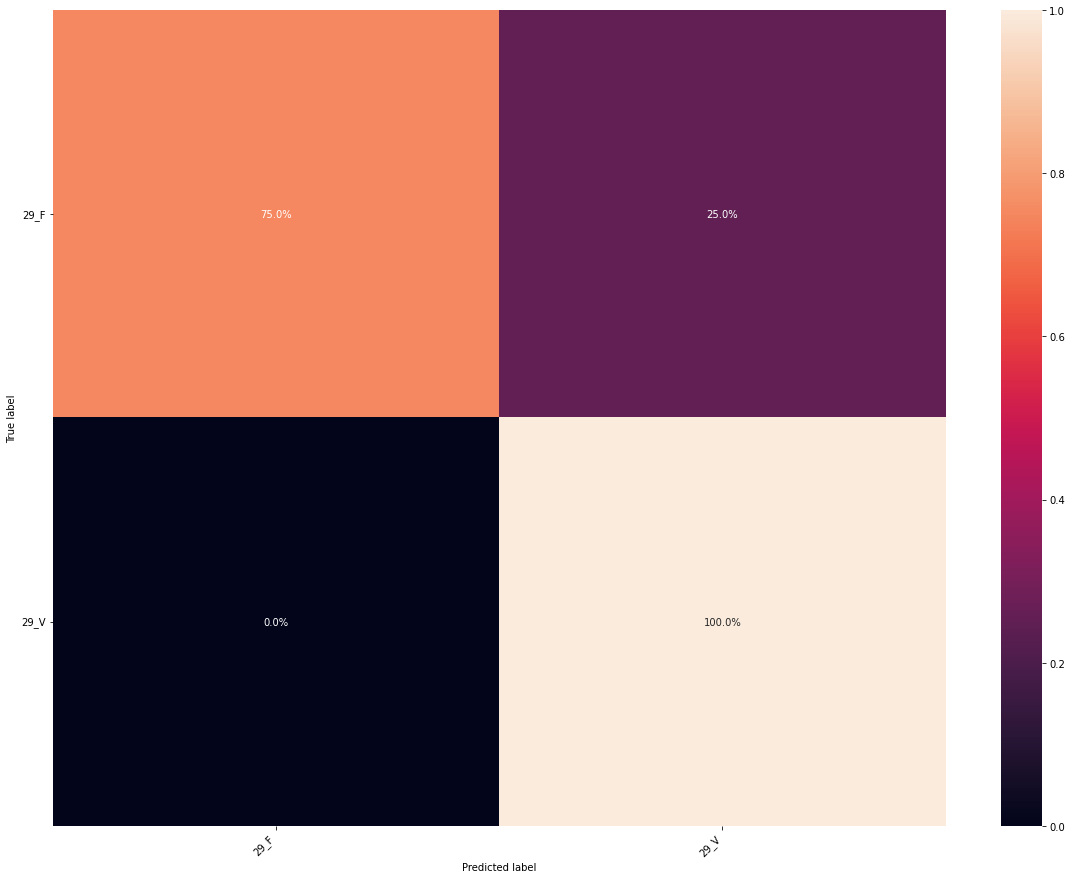

[0.83333333 0.16666667]
[0. 1.]


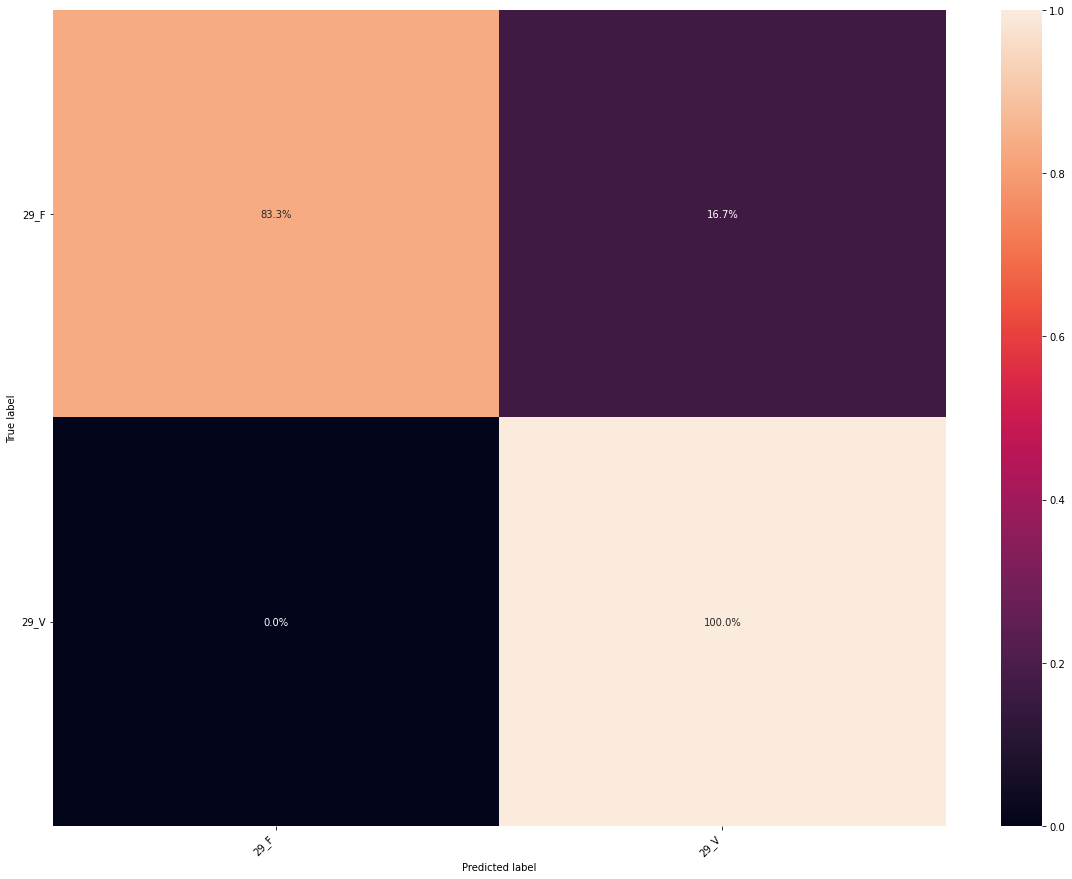

###################################################################
Test individuo 30
[1. 0.]
[0. 1.]


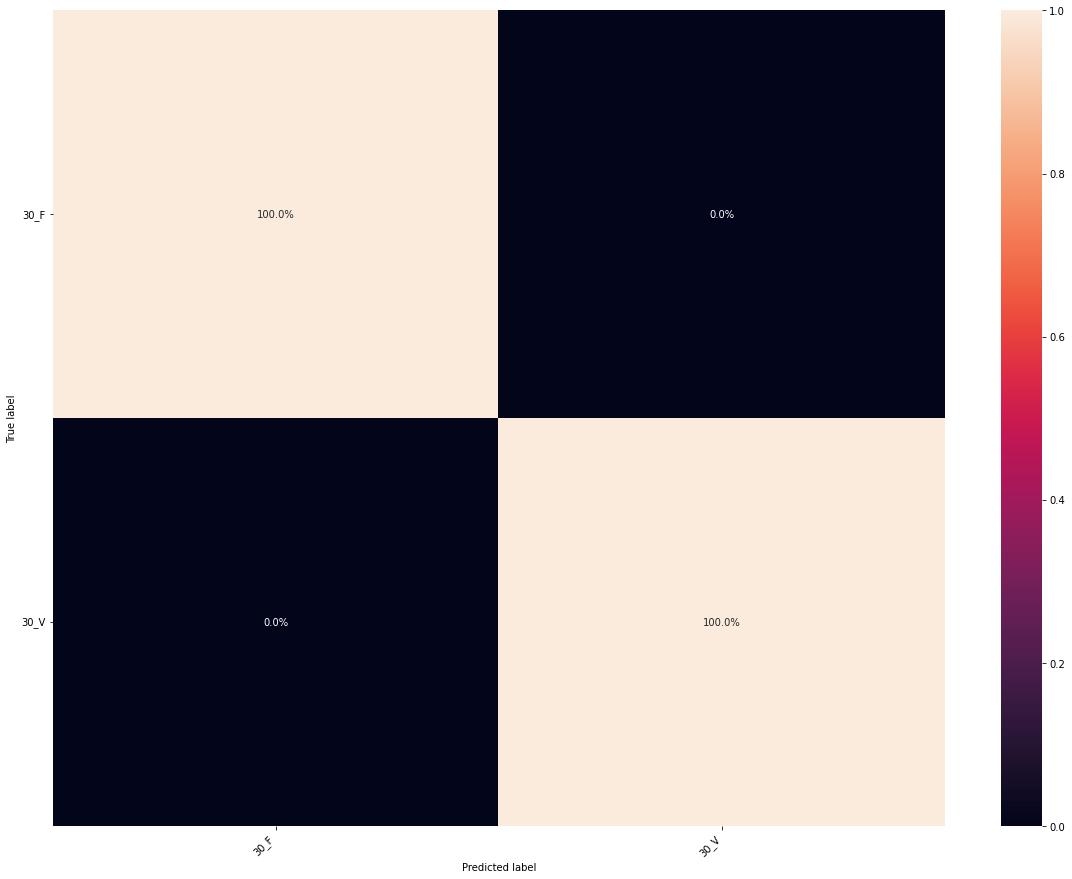

[1. 0.]
[0. 1.]


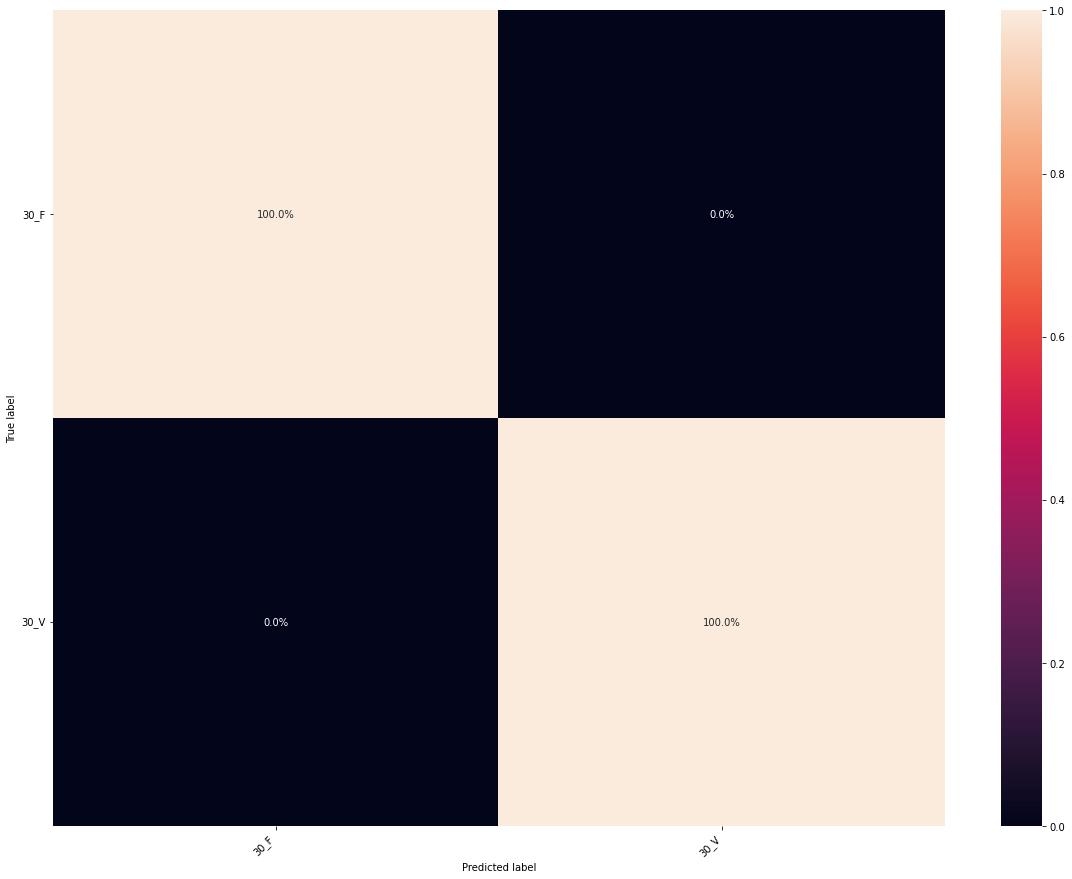

###################################################################
Test individuo 31
[nan nan nan nan]
[0.         0.83333333 0.08333333 0.08333333]
[0.08333333 0.         0.91666667 0.        ]
[nan nan nan nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


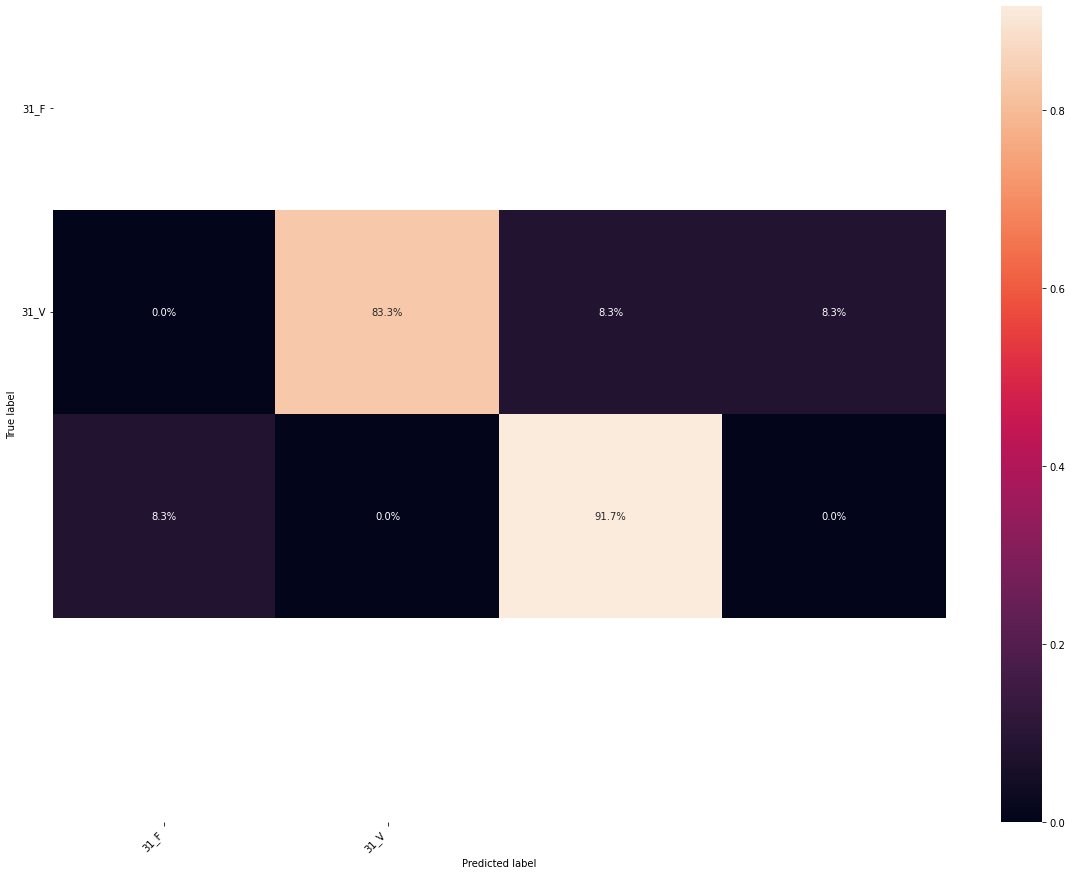

[1. 0.]
[0. 1.]


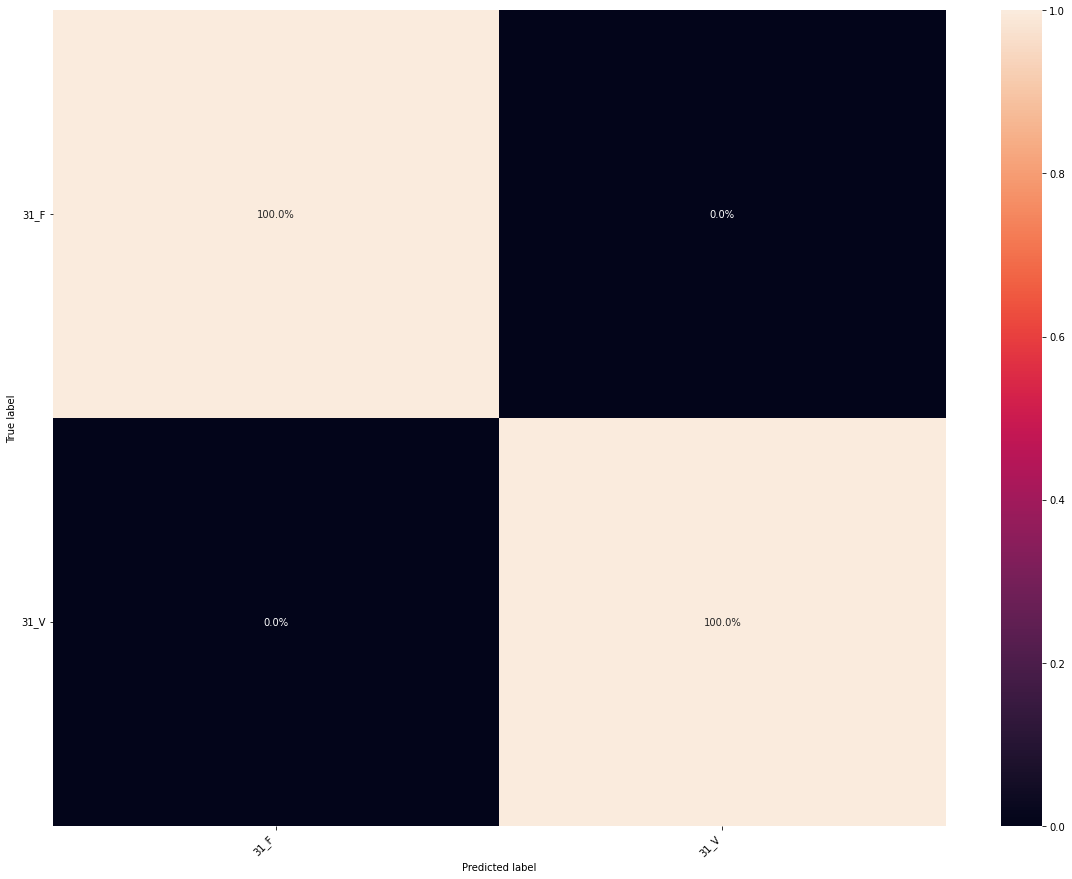

###################################################################
Test individuo 32
[1. 0.]
[0. 1.]


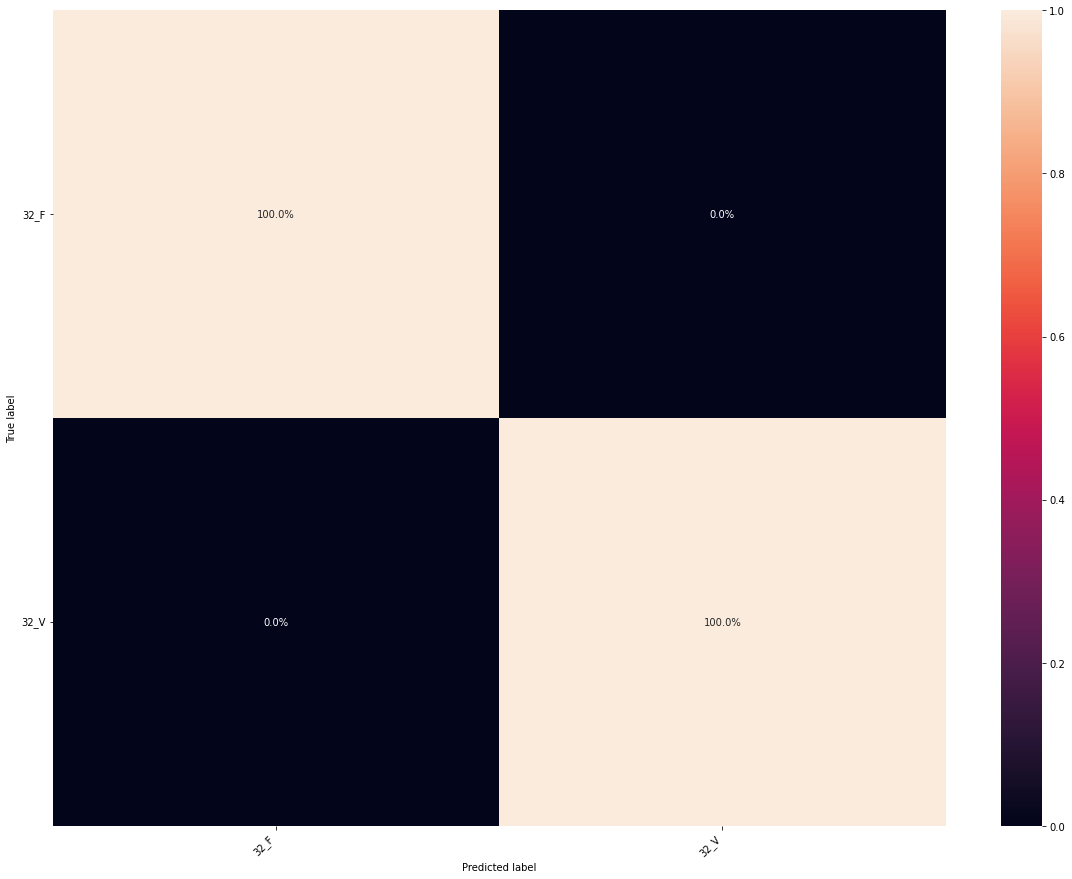

[1. 0.]
[0. 1.]


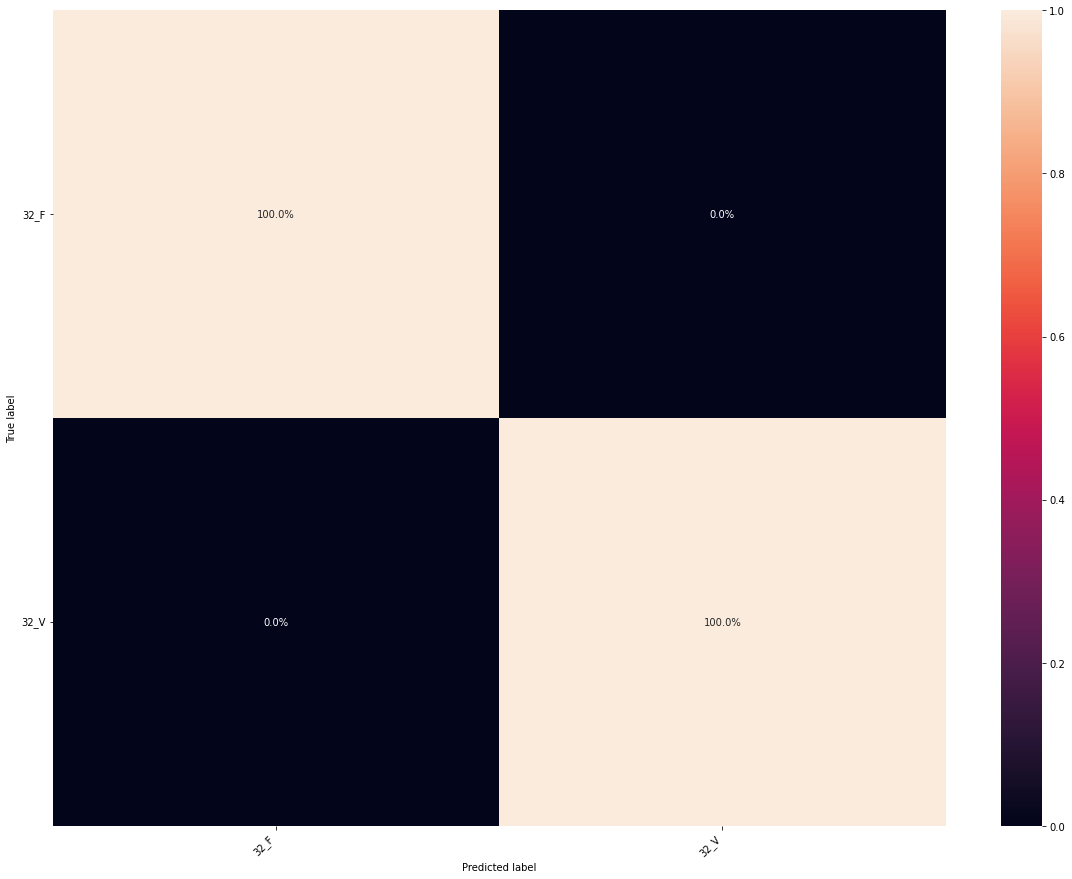

###################################################################
Test individuo 33
[0.91666667 0.         0.08333333]
[0. 1. 0.]
[nan nan nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


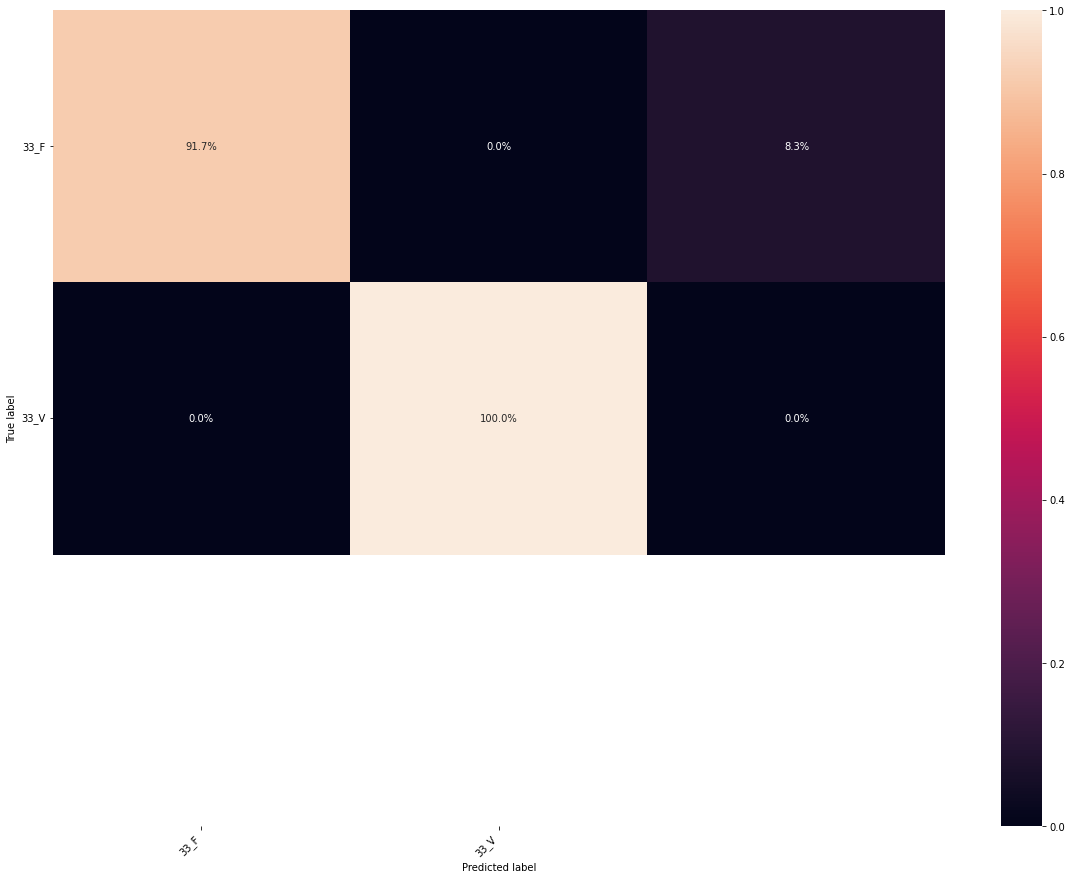

[1. 0.]
[0. 1.]


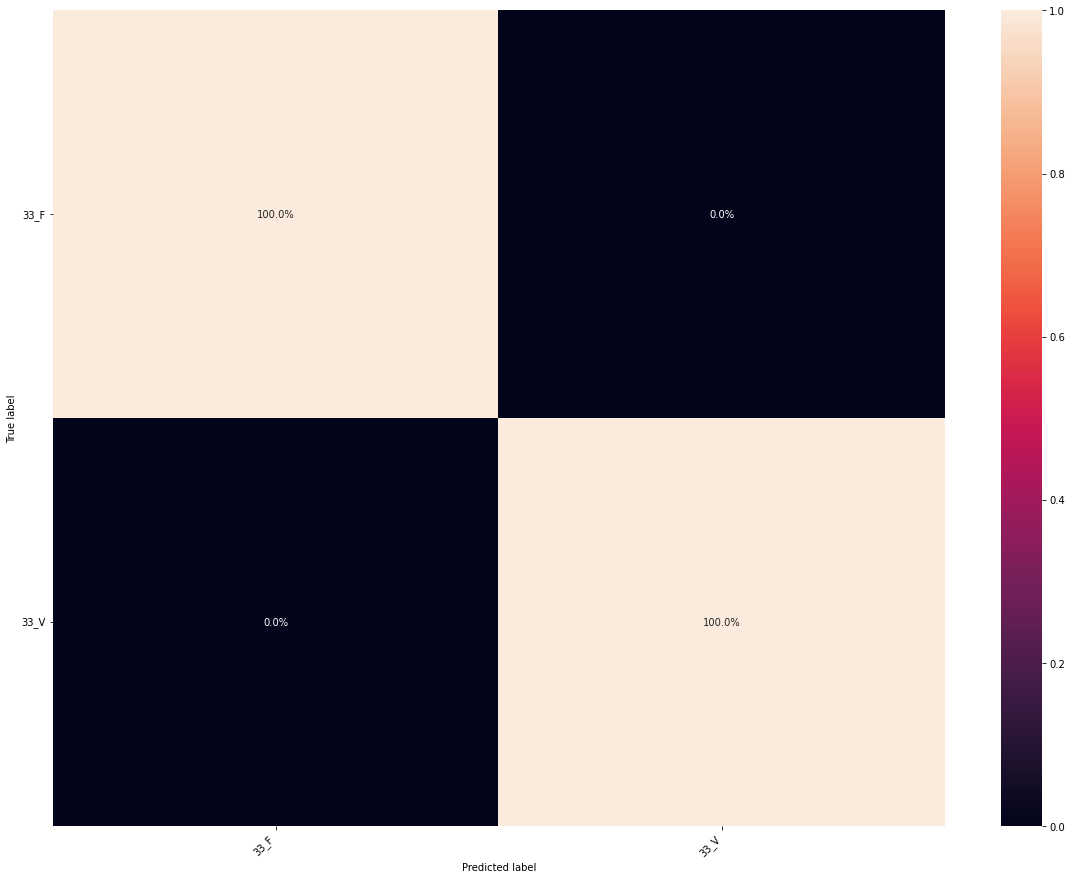

###################################################################
Test individuo 34
[1. 0.]
[0. 1.]


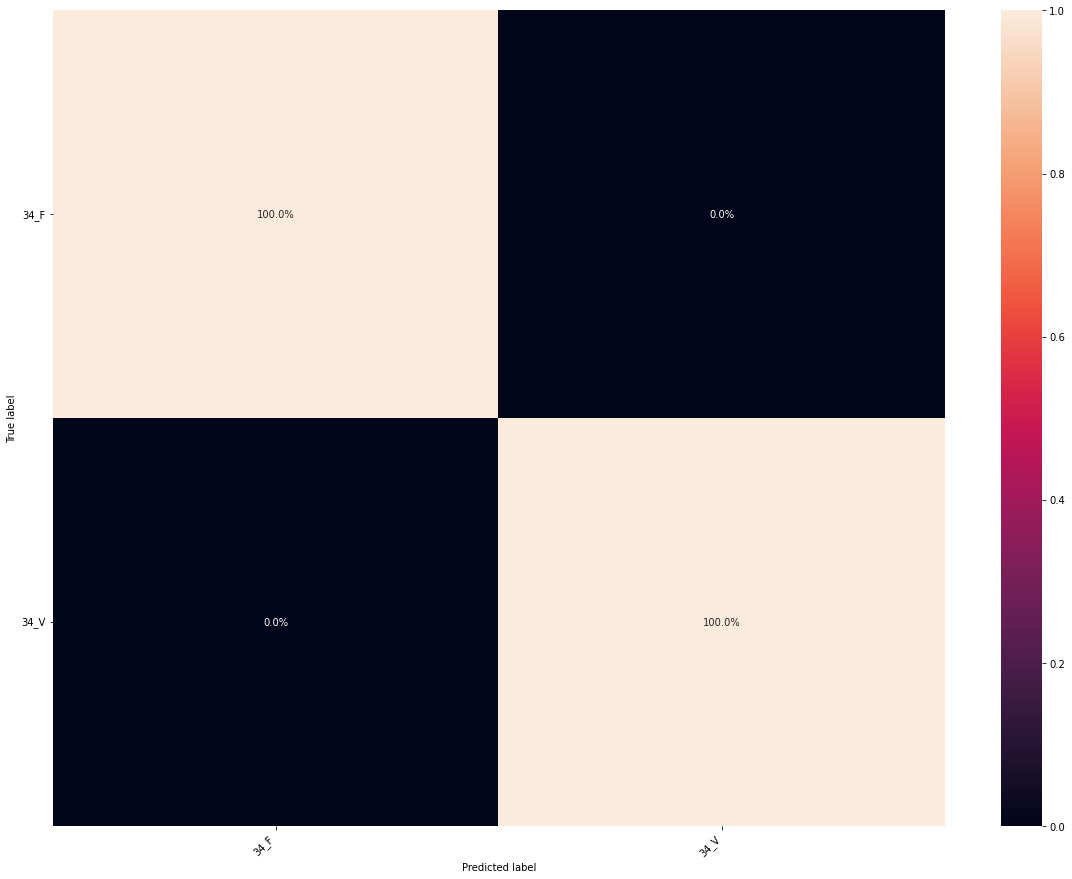

[0.91666667 0.08333333]
[0. 1.]


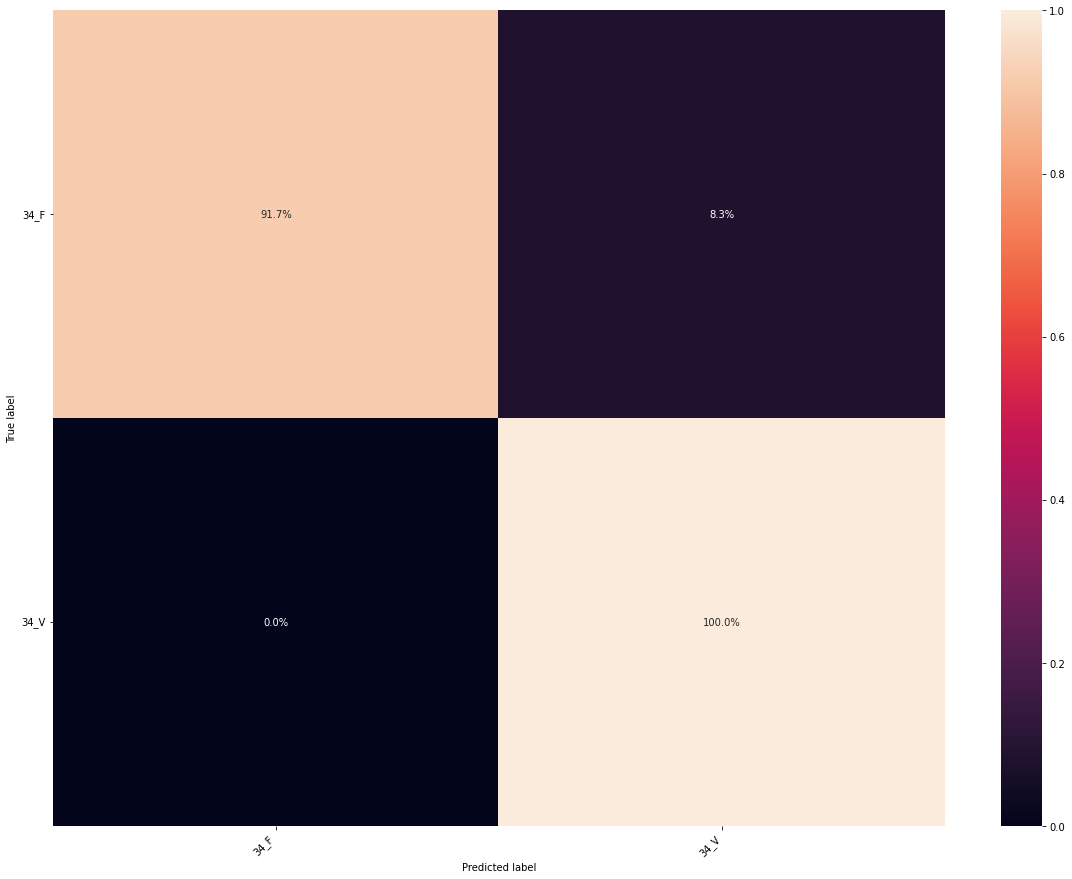

###################################################################
Test individuo 35
[0.91666667 0.08333333]
[0. 1.]


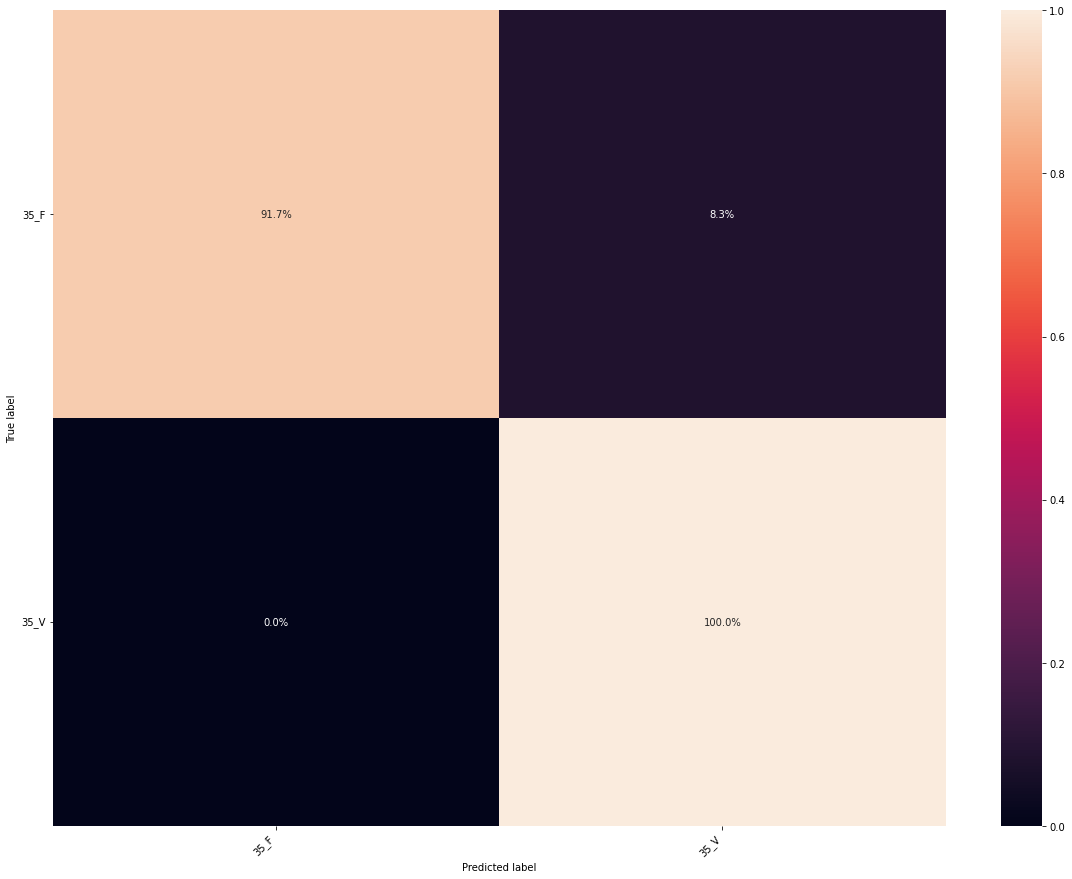

[0.91666667 0.08333333]
[0. 1.]


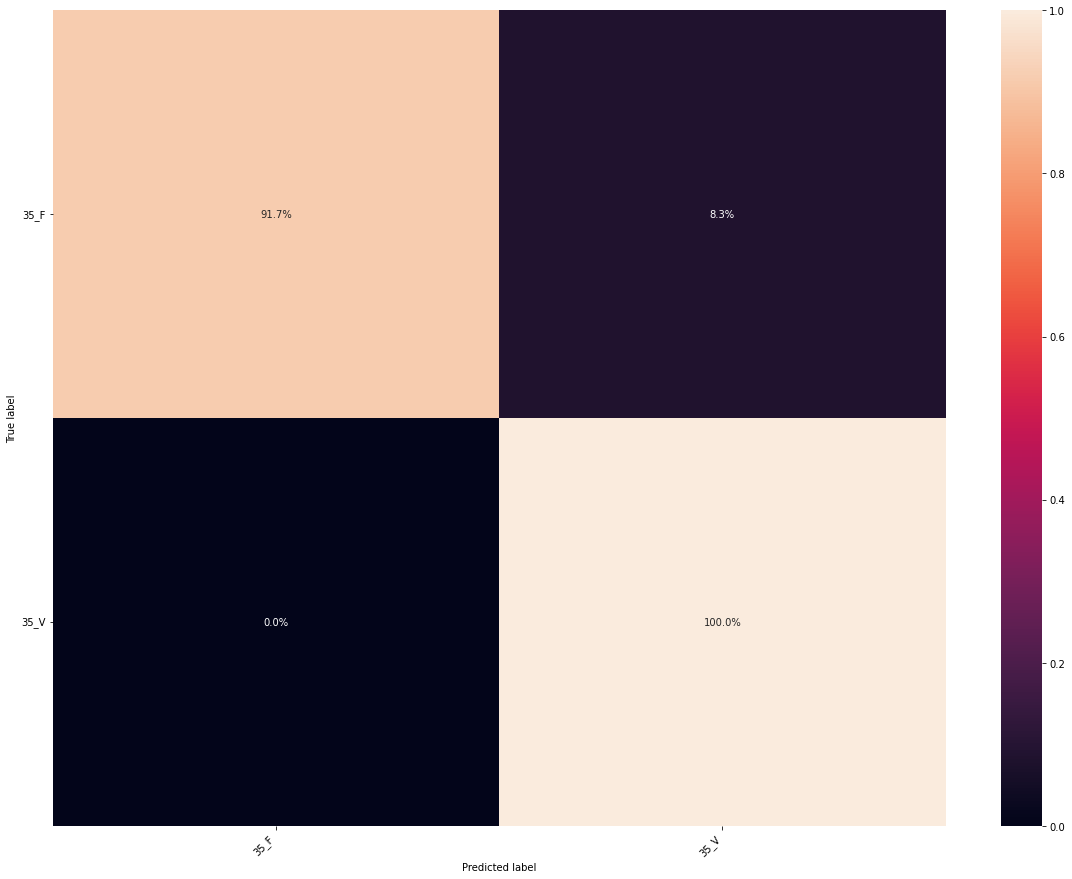

###################################################################
Test individuo 36
[1. 0.]
[0. 1.]


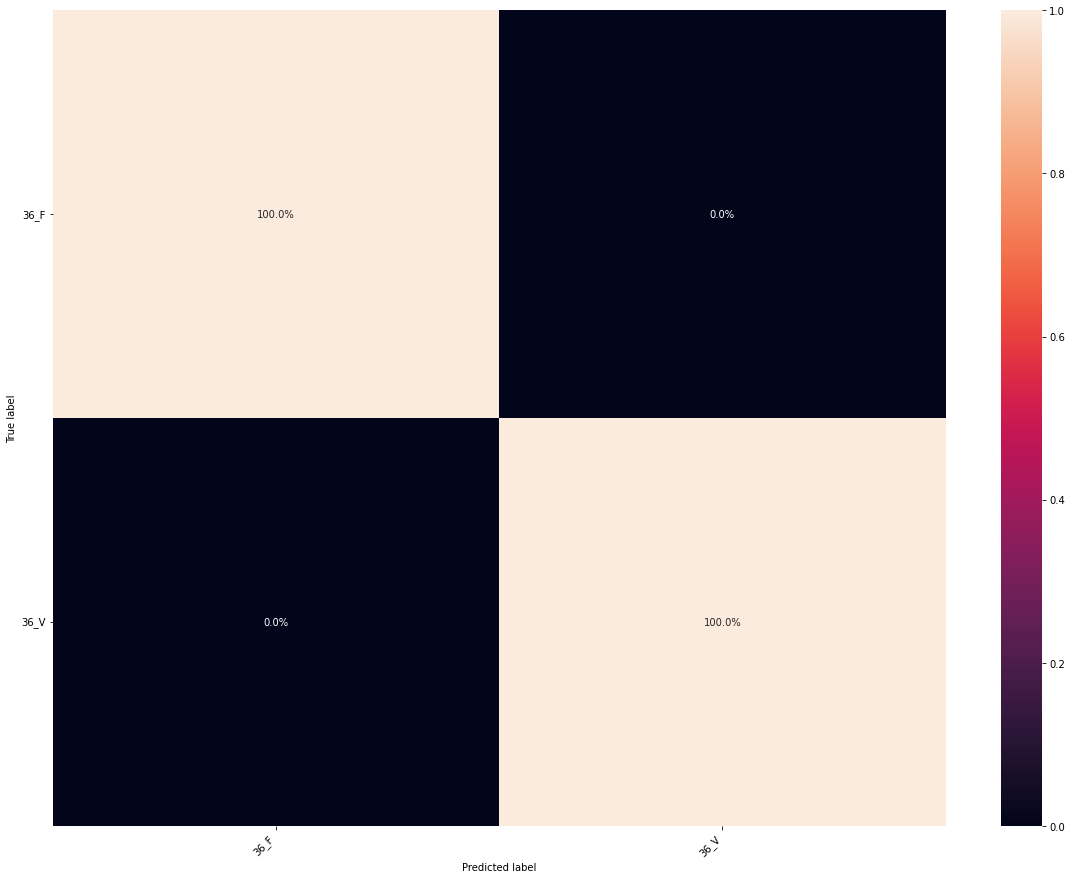

[1. 0.]
[0. 1.]


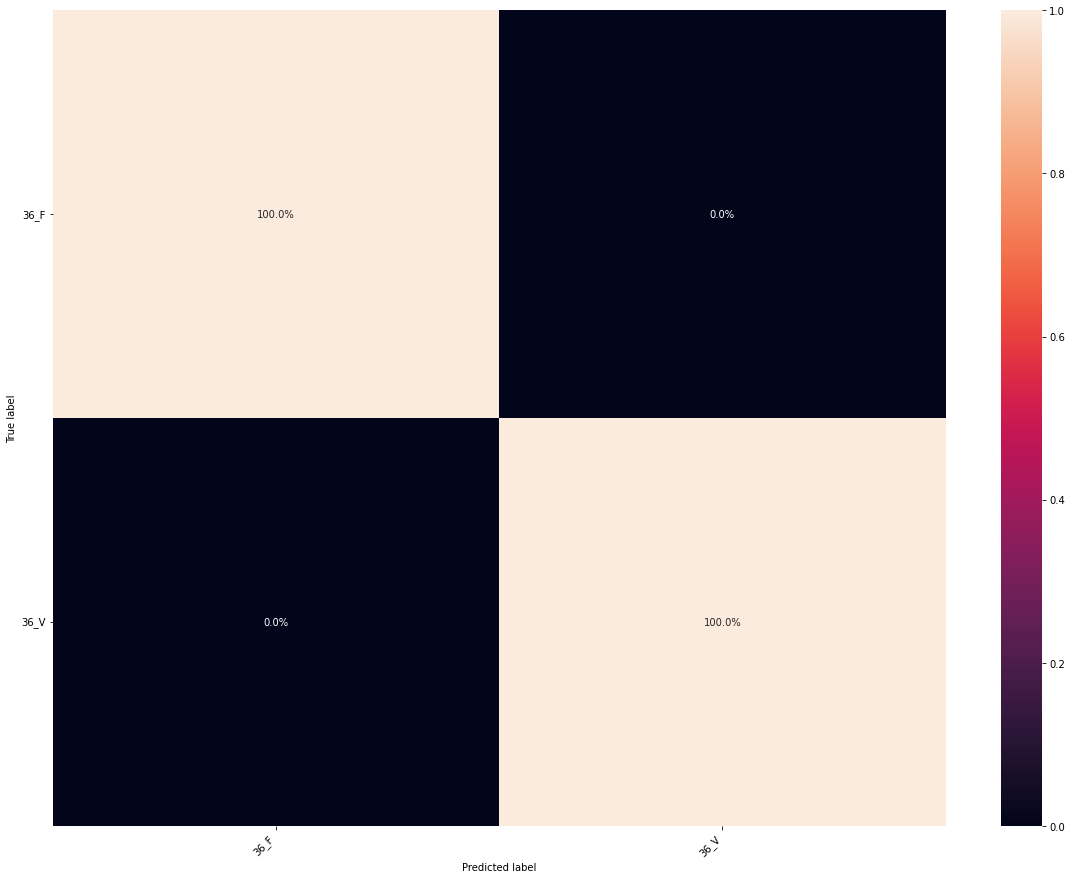

###################################################################
Test individuo 37
[nan nan nan]
[0.         0.83333333 0.16666667]
[0.08333333 0.         0.91666667]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


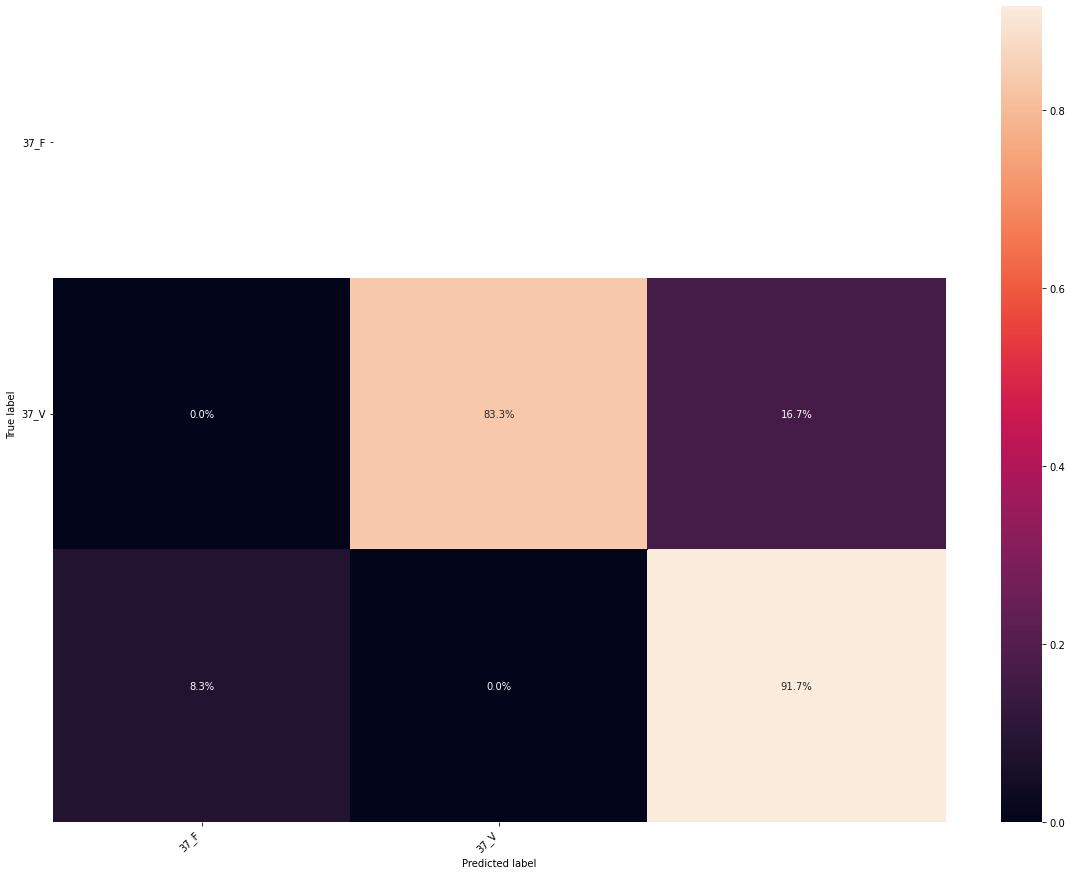

[1. 0.]
[0.08333333 0.91666667]


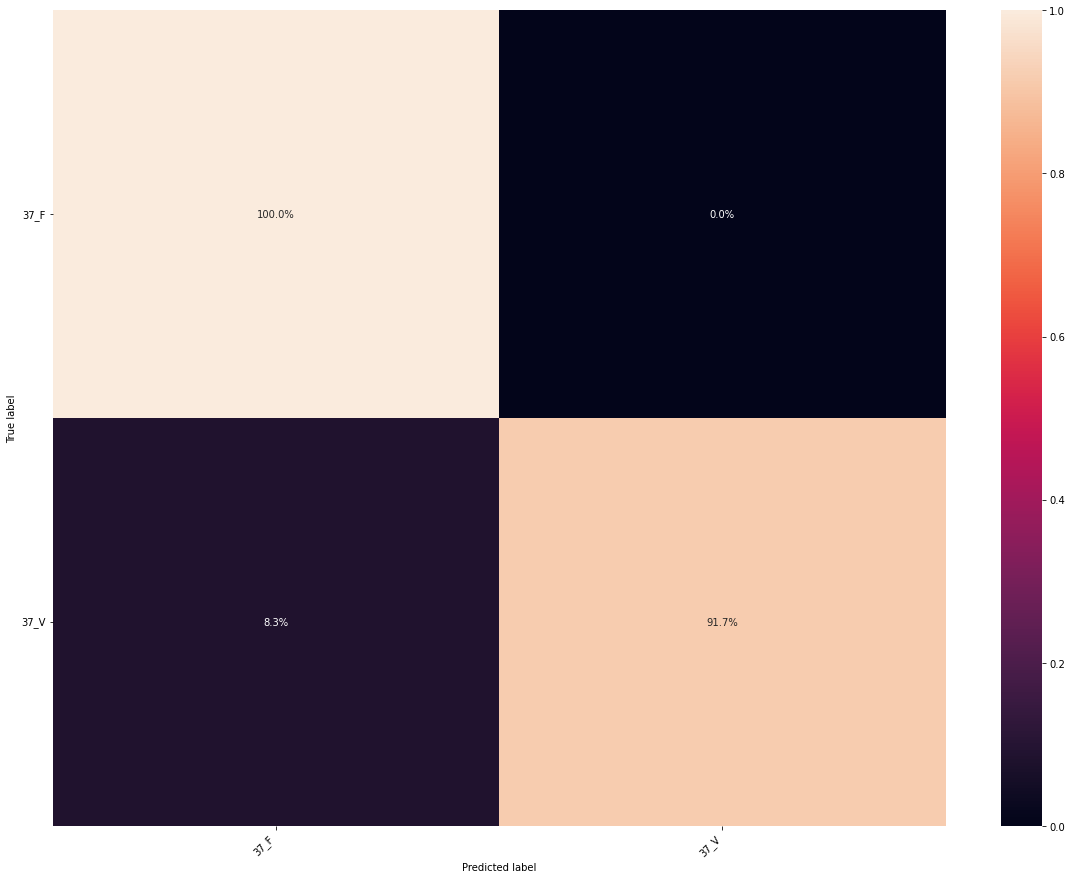

###################################################################
Test individuo 38
[nan nan nan]
[0. 1. 0.]
[0.08333333 0.         0.91666667]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


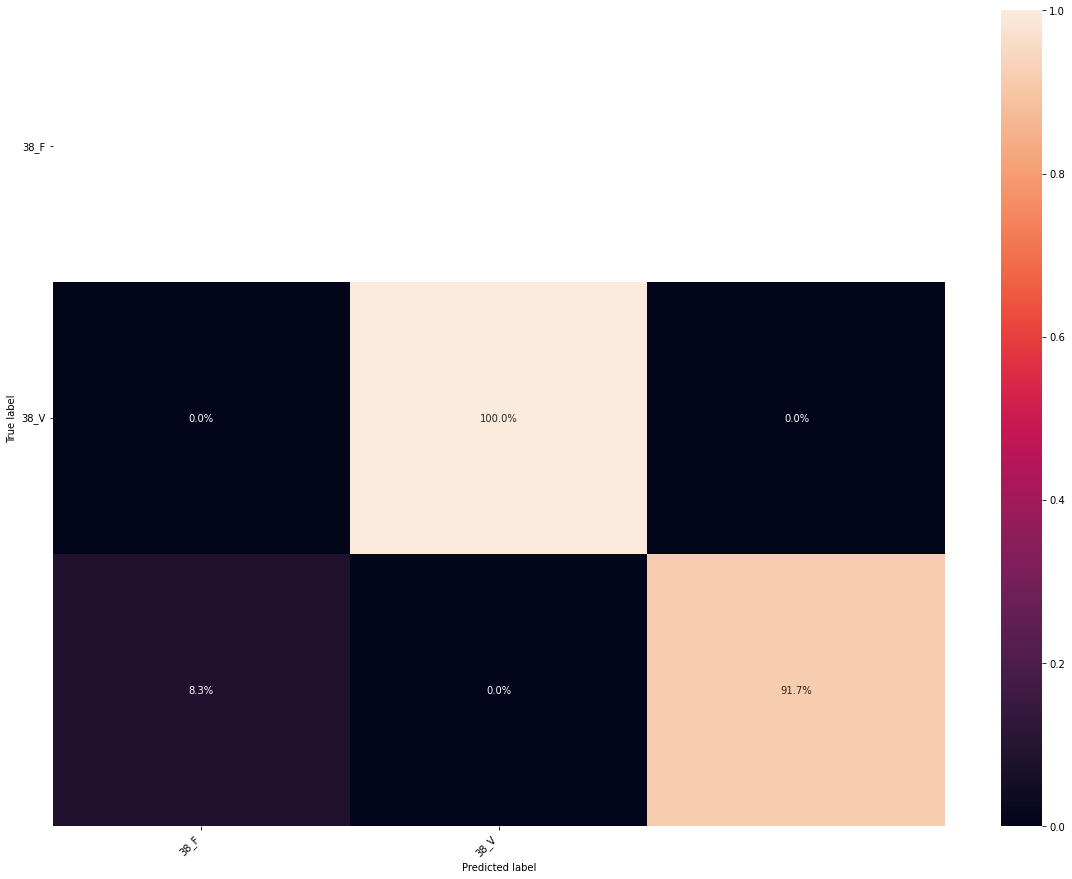

[1. 0.]
[0. 1.]


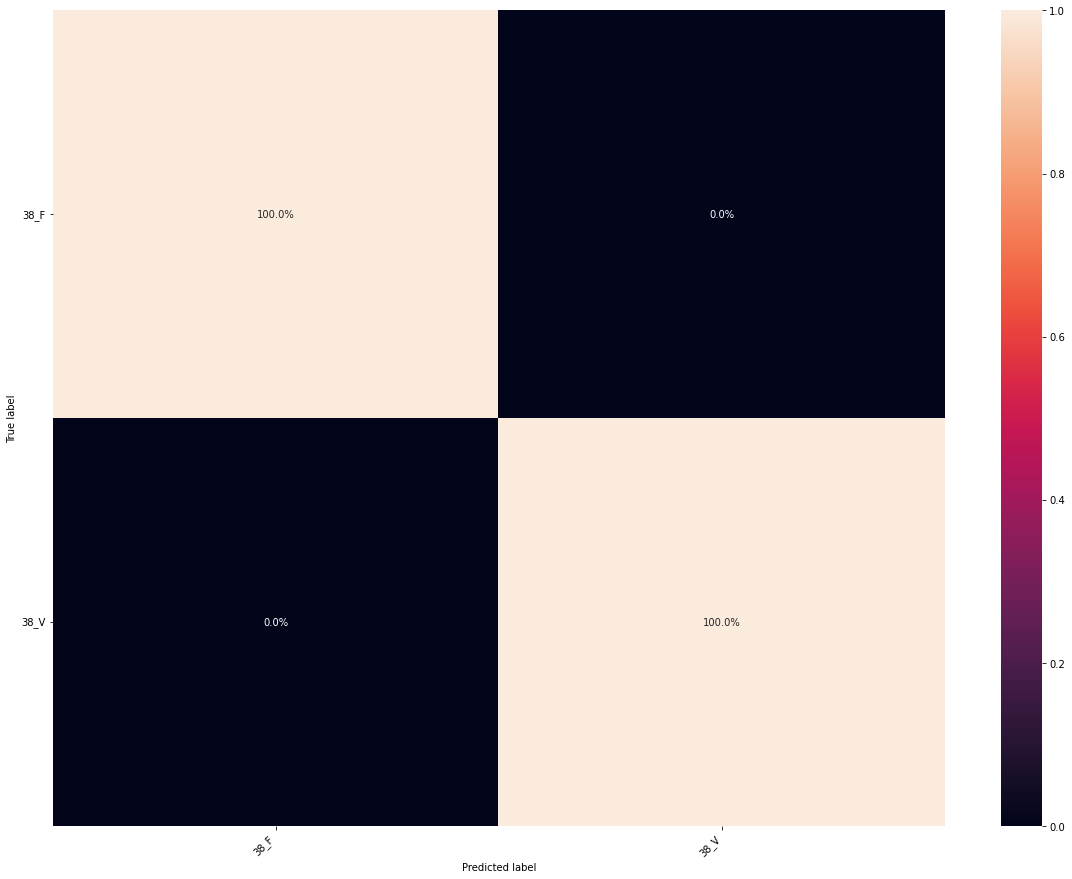

###################################################################
Test individuo 39
[1. 0.]
[0. 1.]


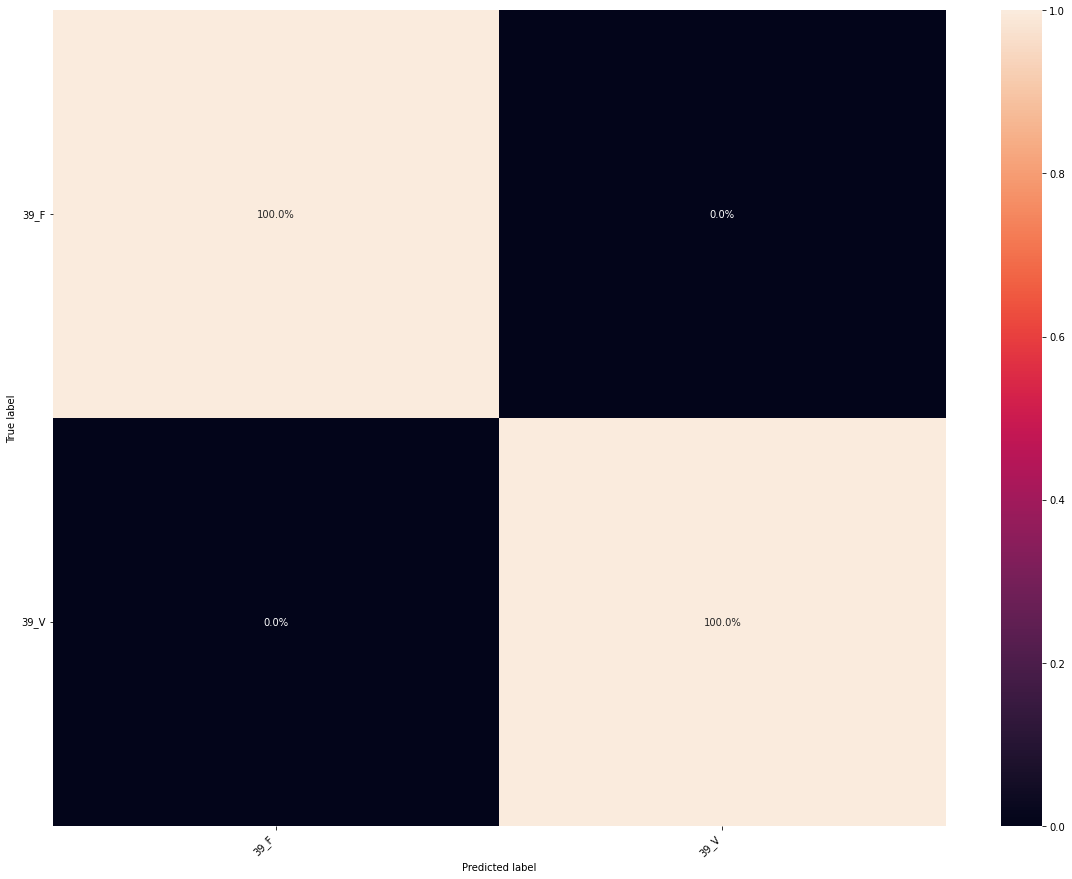

[1. 0.]
[0. 1.]


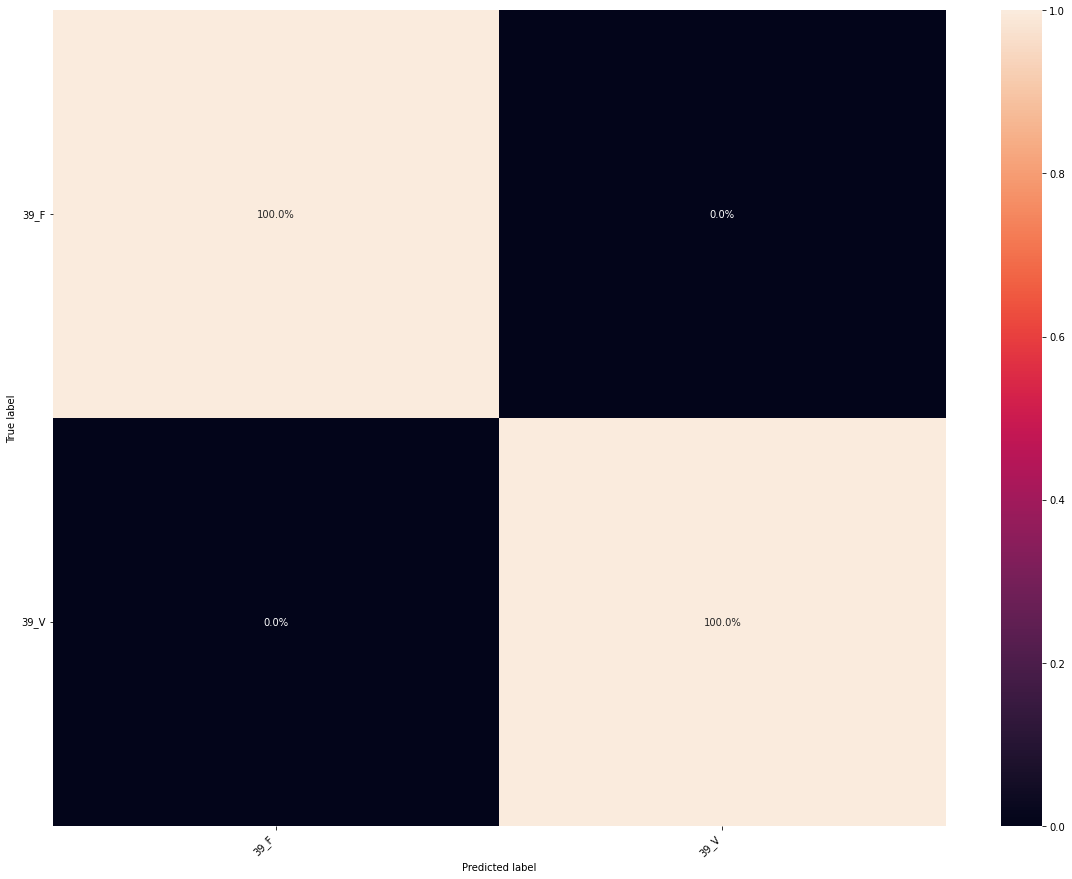

###################################################################
Test individuo 40
[0.5 0.5]
[0. 1.]


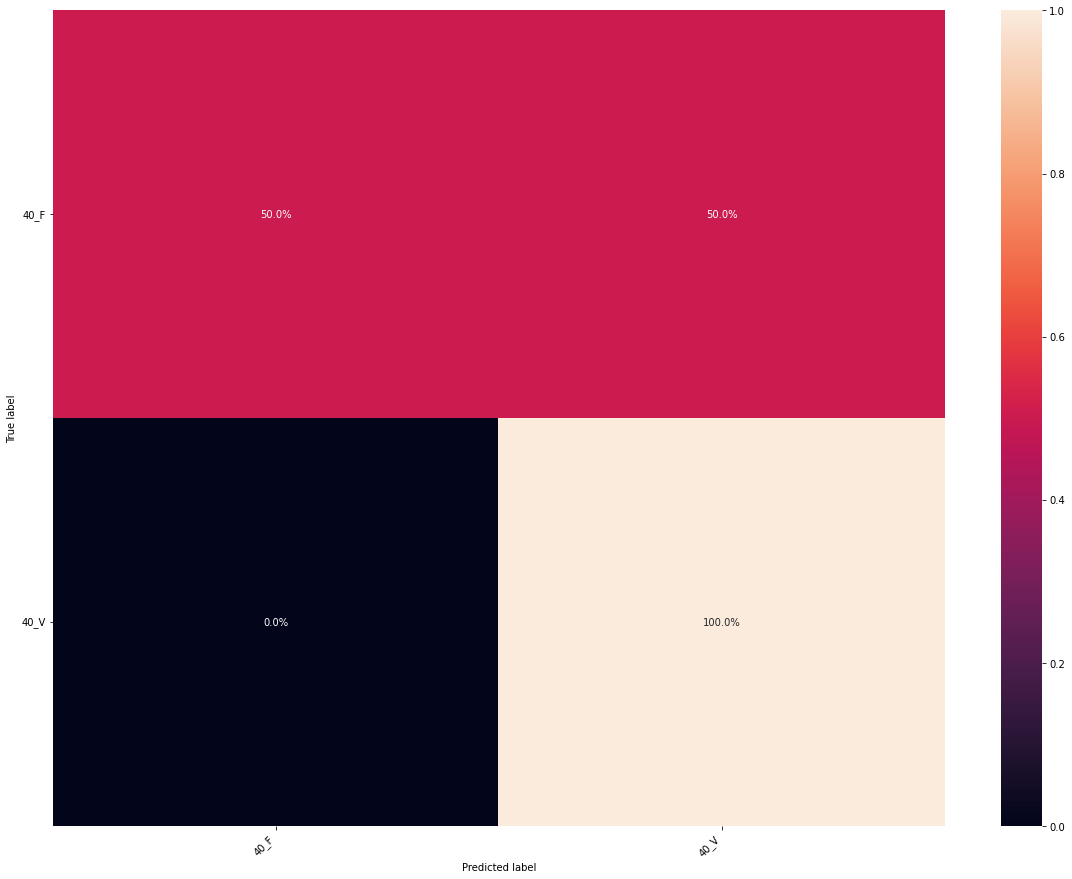

[0.91666667 0.08333333]
[0. 1.]


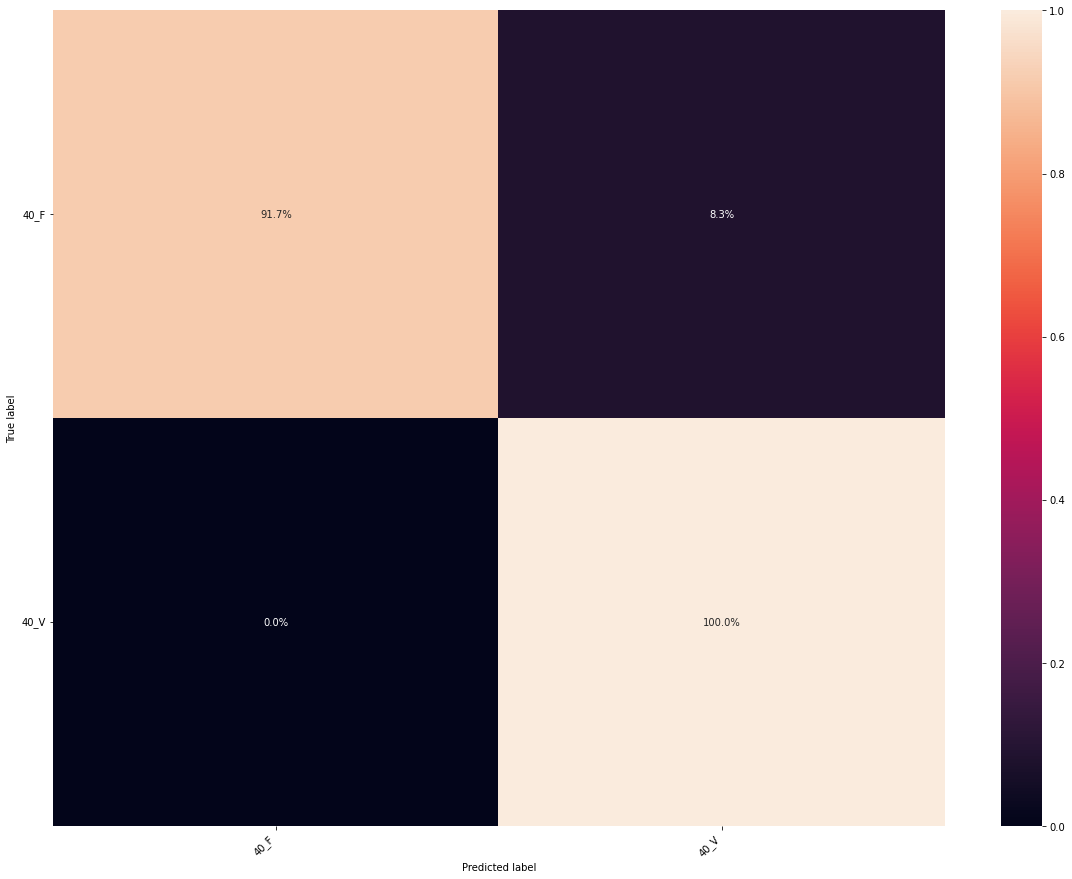

###################################################################
Test individuo 41
[1. 0.]
[0. 1.]


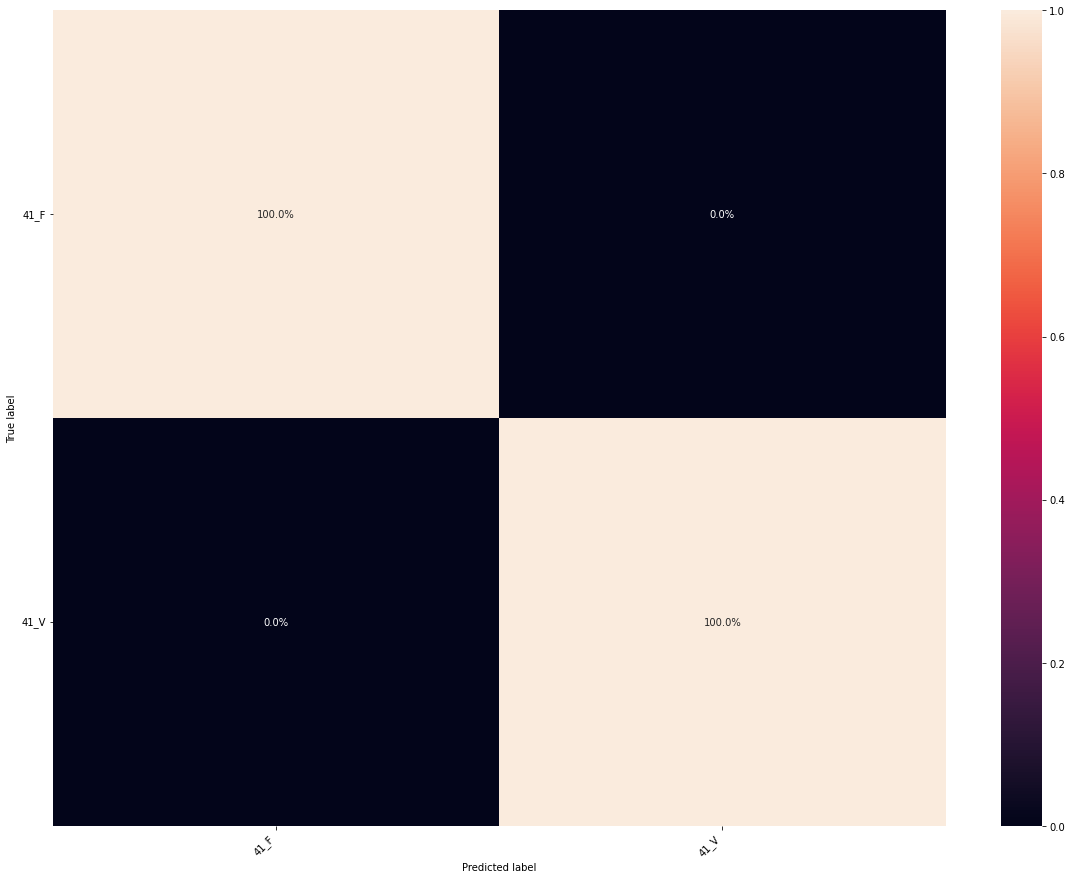

[1. 0.]
[0. 1.]


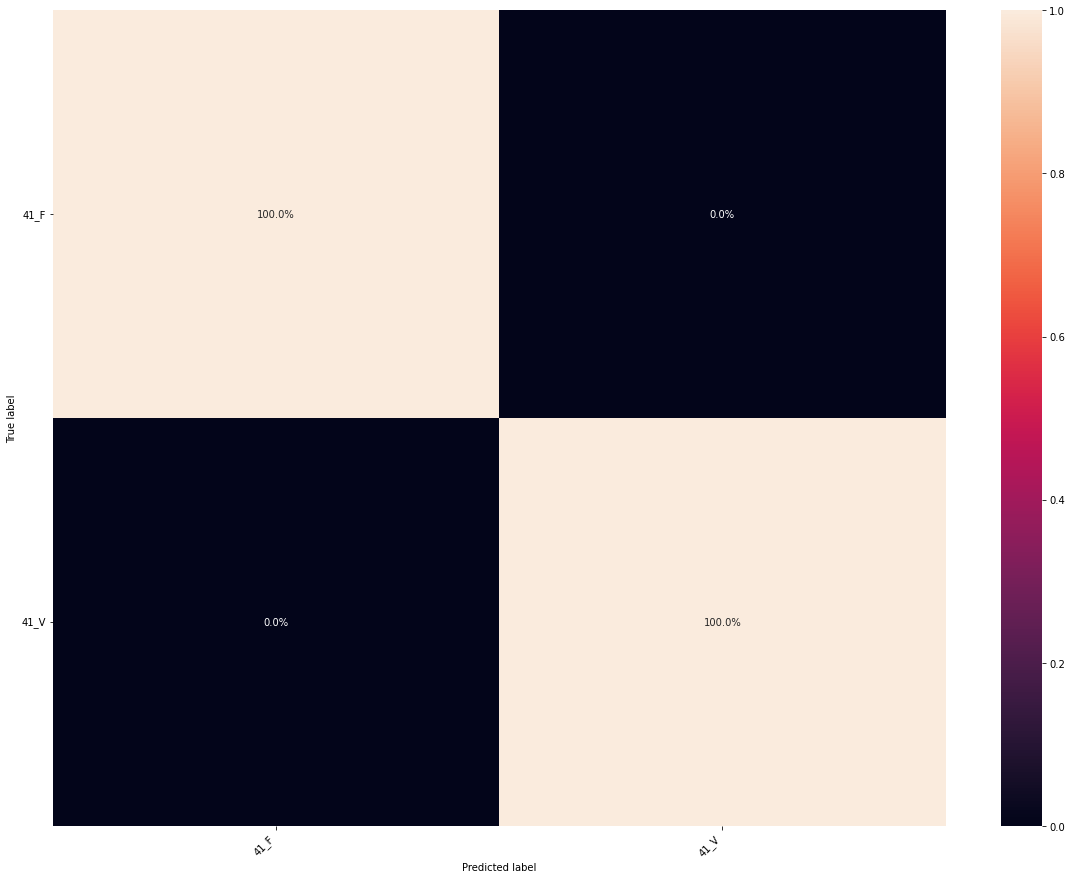

###################################################################
Test individuo 42
[0.91666667 0.         0.08333333]
[0. 1. 0.]
[nan nan nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


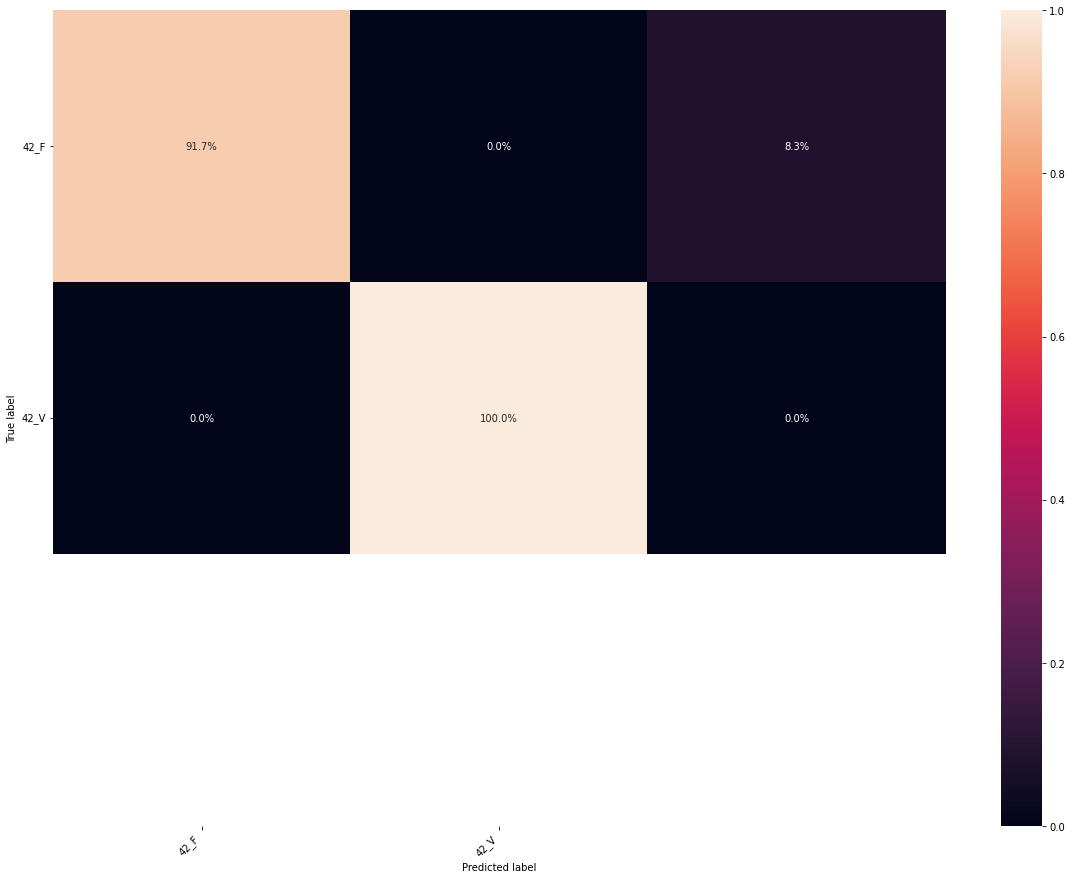

[1. 0.]
[0. 1.]


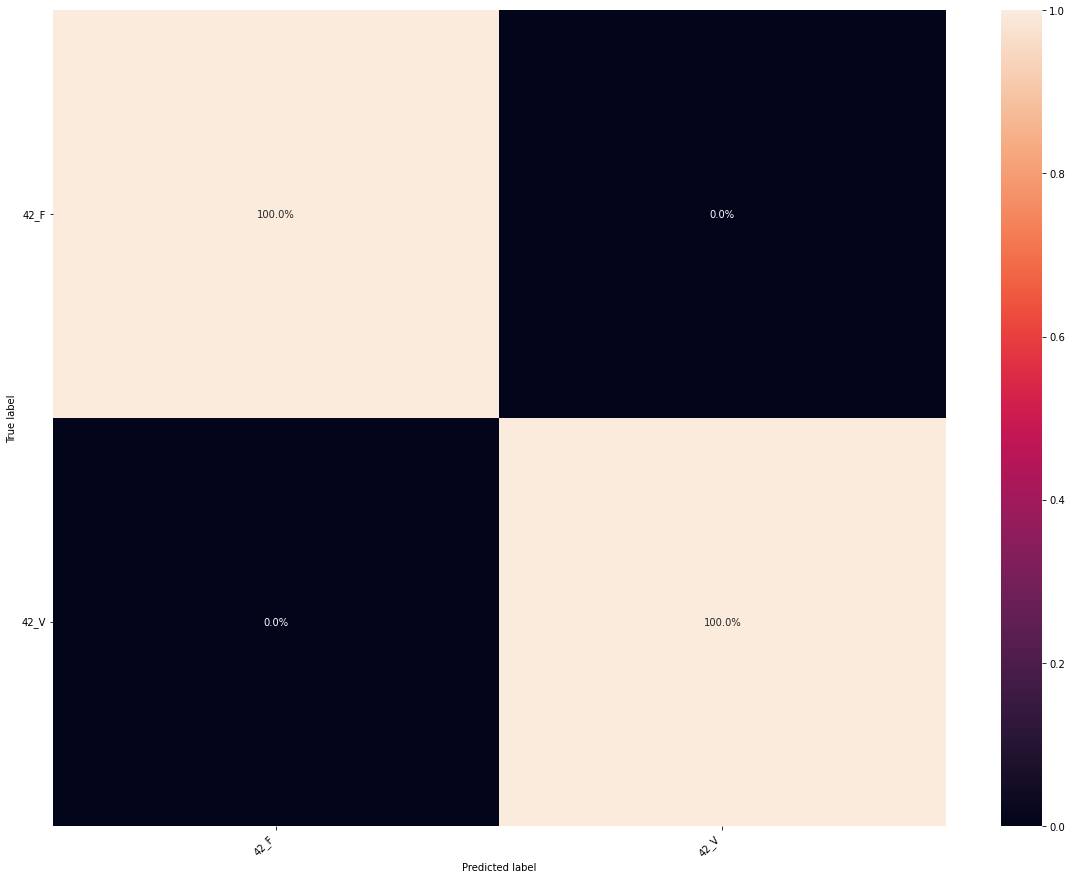

###################################################################
Test individuo 43
[0.83333333 0.16666667]
[0.08333333 0.91666667]


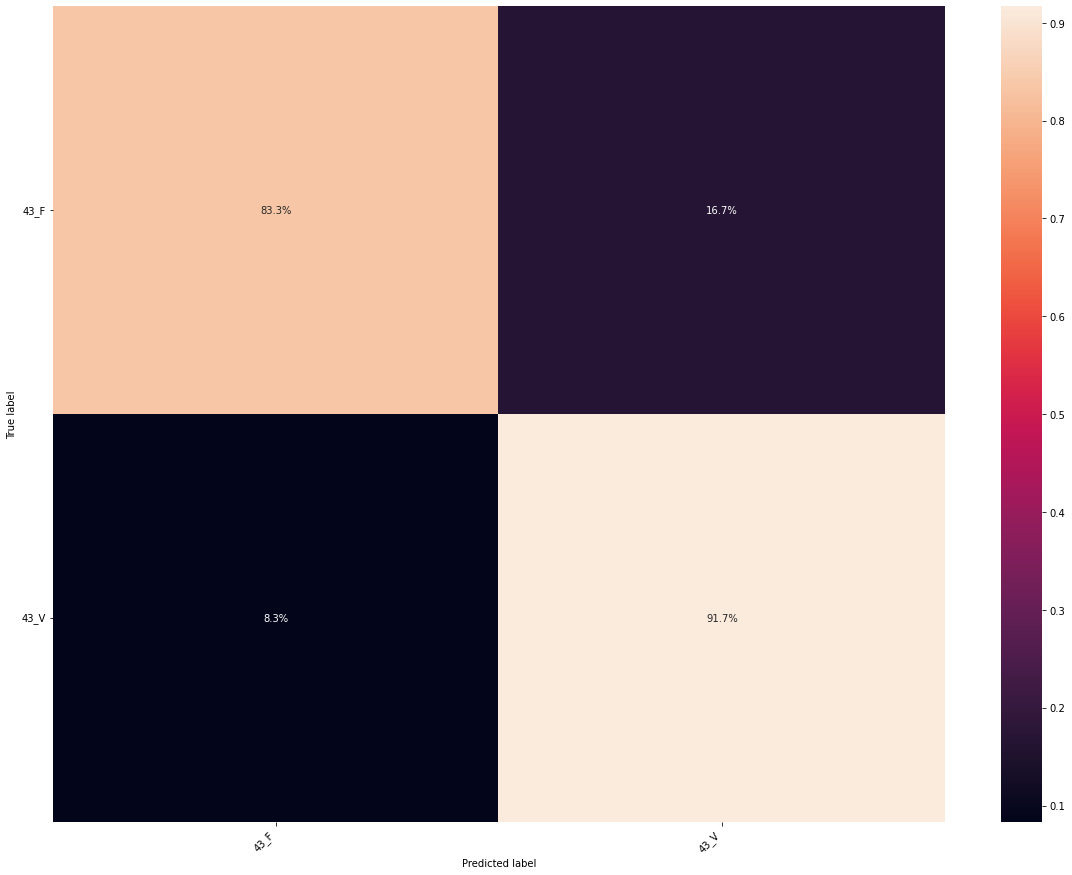

[1. 0.]
[0. 1.]


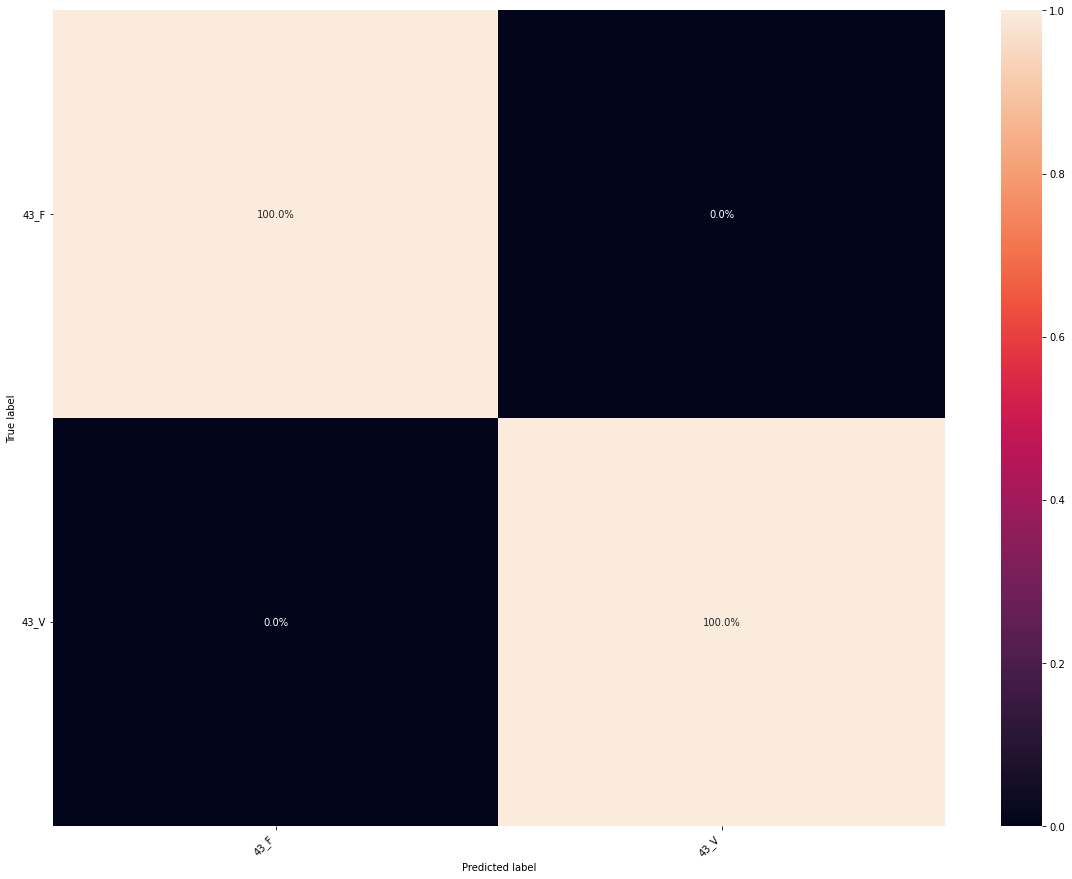

###################################################################
Test individuo 44
[0.91666667 0.08333333]
[0. 1.]


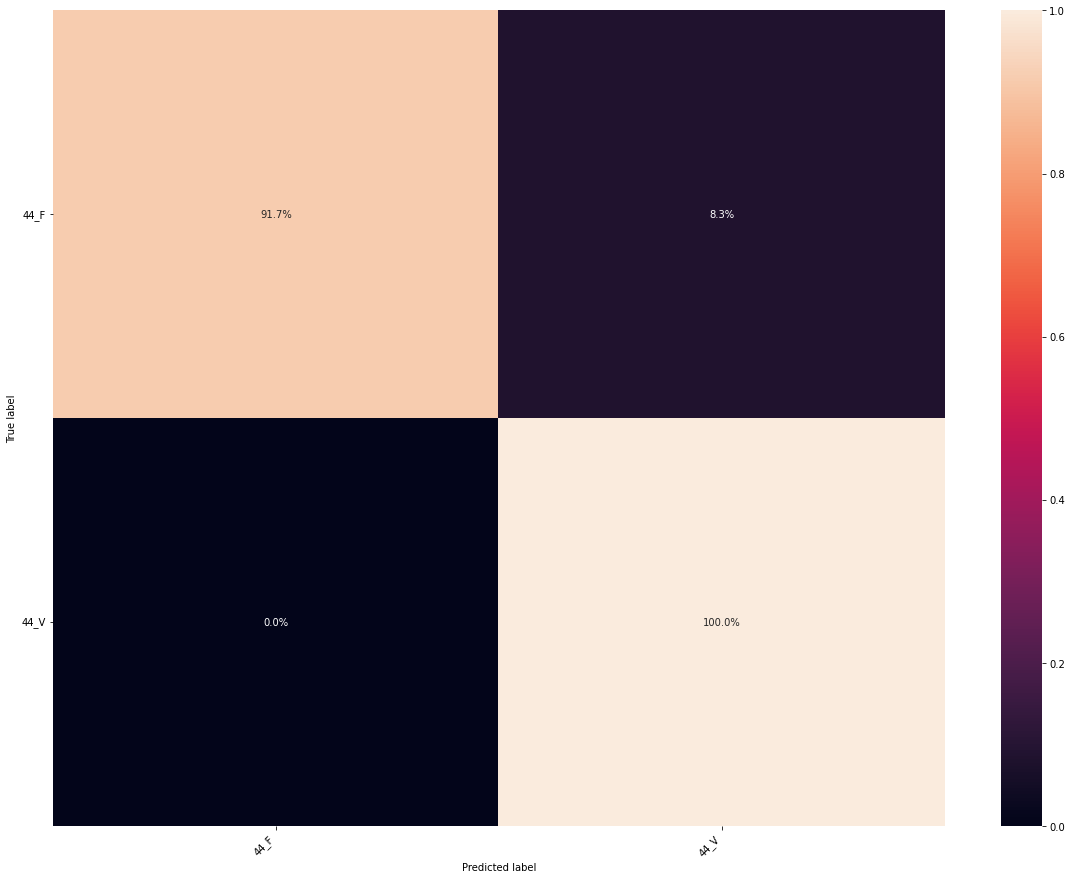

[1. 0.]
[0. 1.]


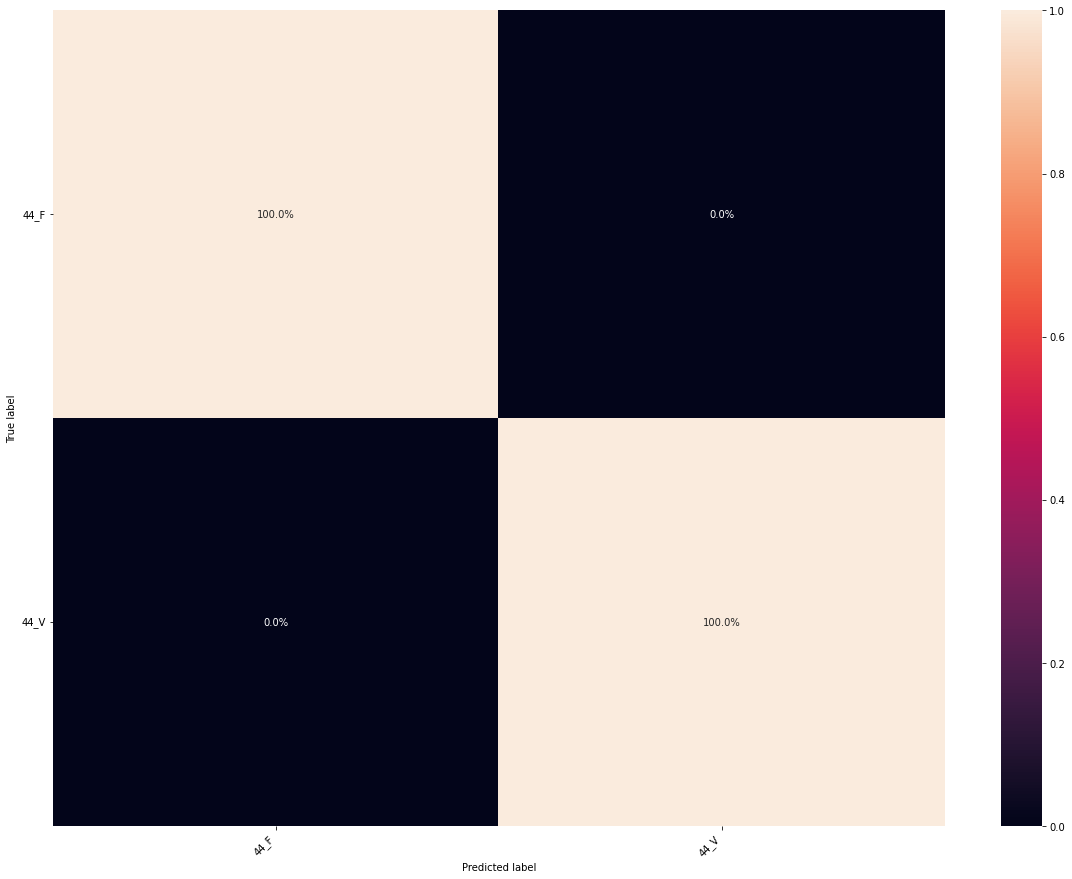

###################################################################
Test individuo 45
[0.83333333 0.16666667]
[0. 1.]


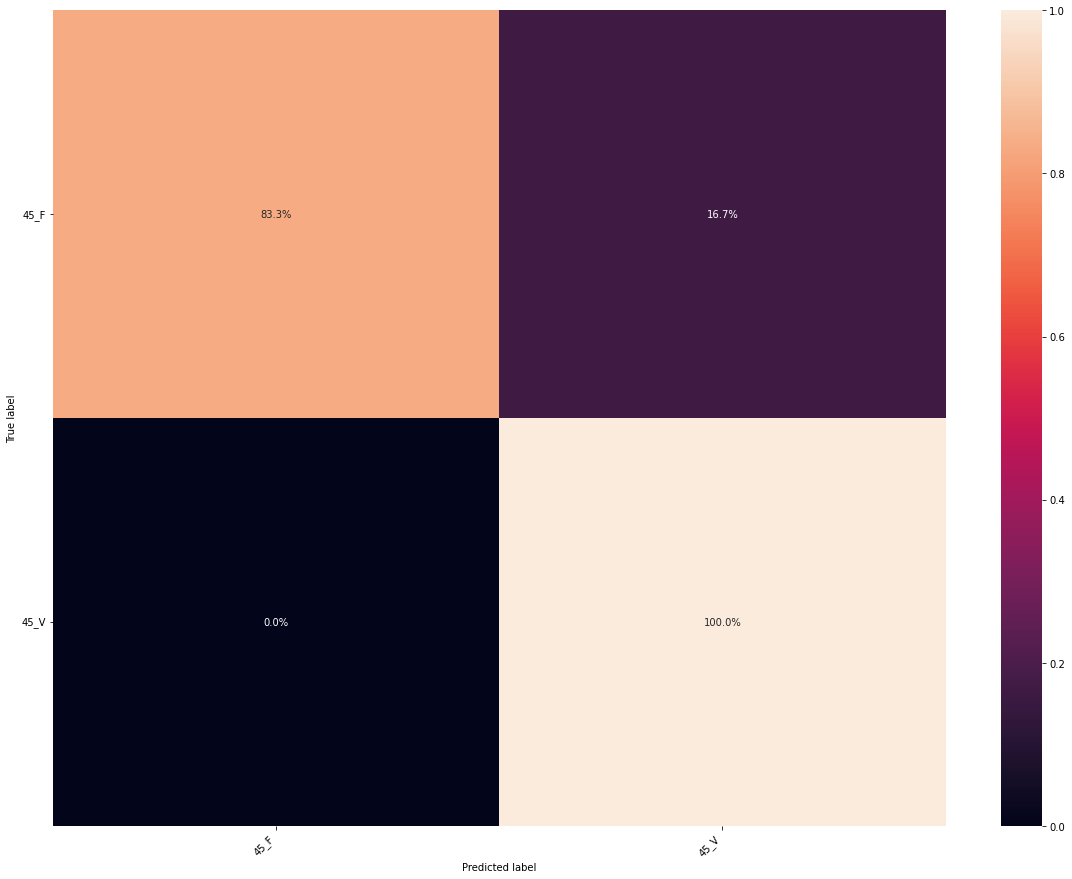

[0.91666667 0.08333333]
[0. 1.]


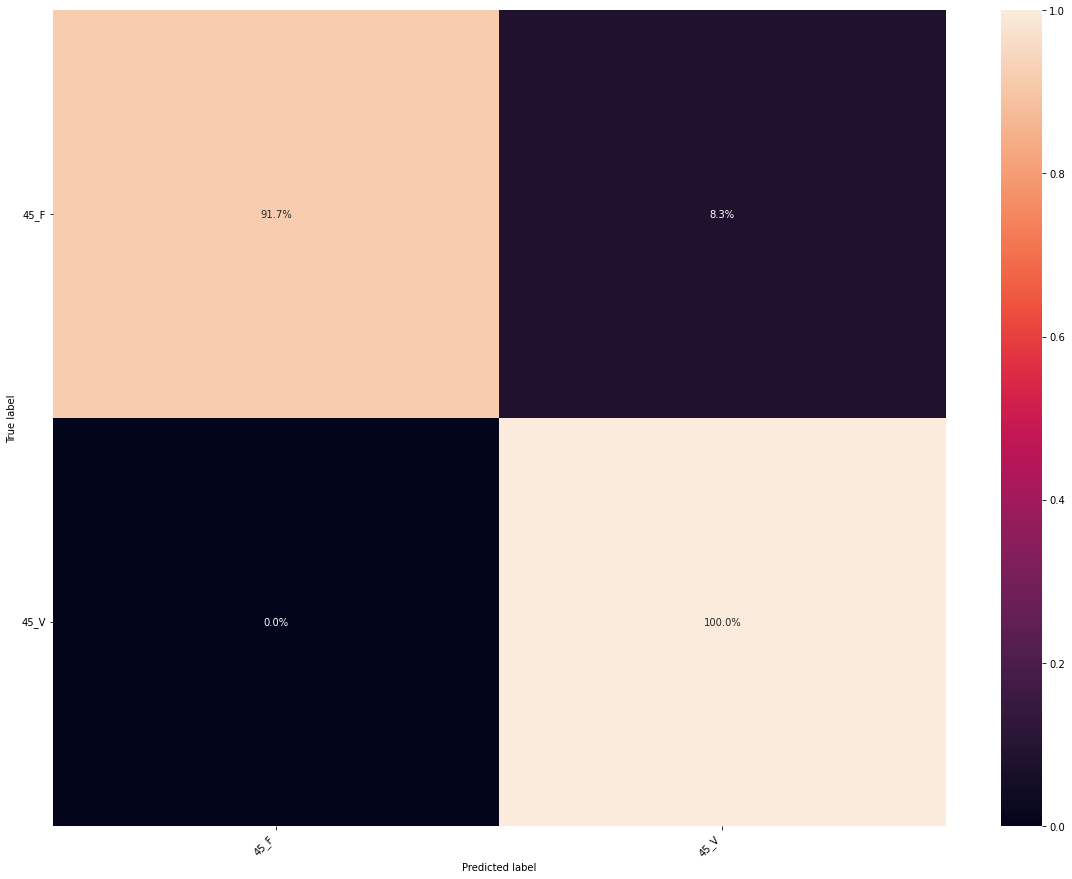

###################################################################
Test individuo 46
[nan nan nan]
[0. 1. 0.]
[0.09090909 0.         0.90909091]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


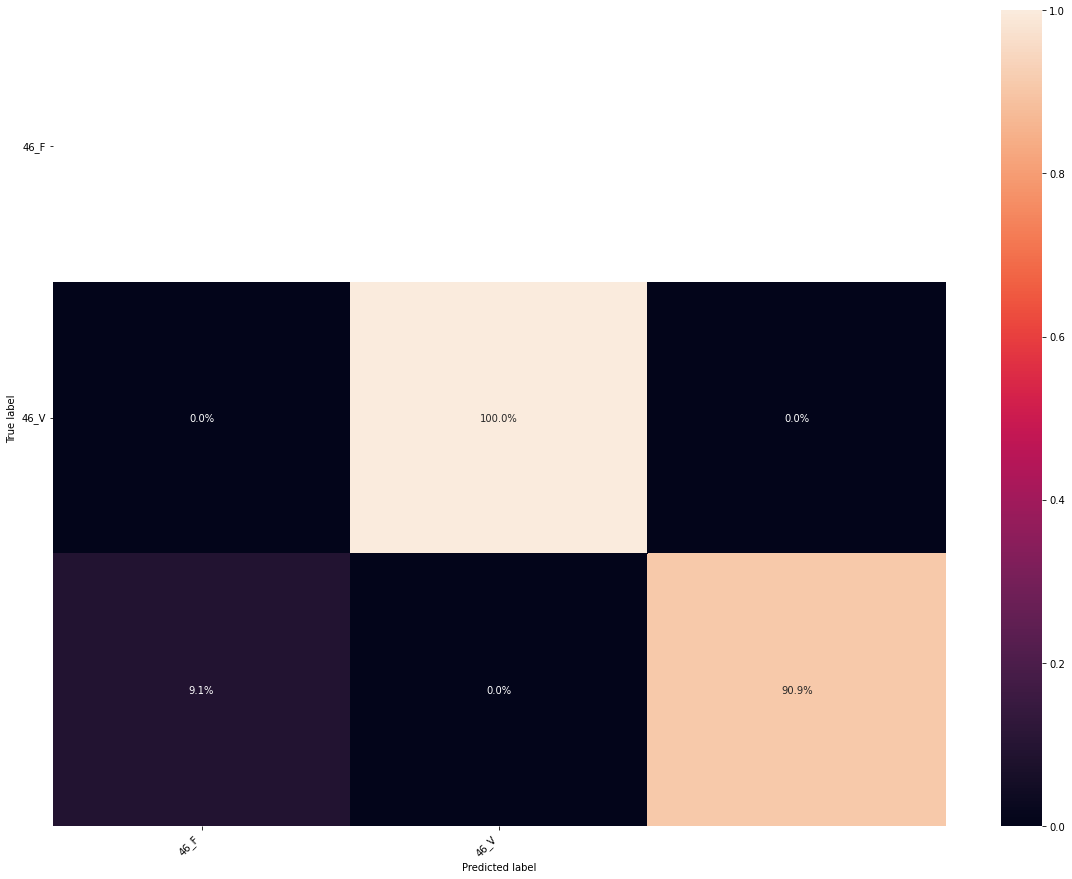

[0.93333333 0.06666667]
[0. 1.]


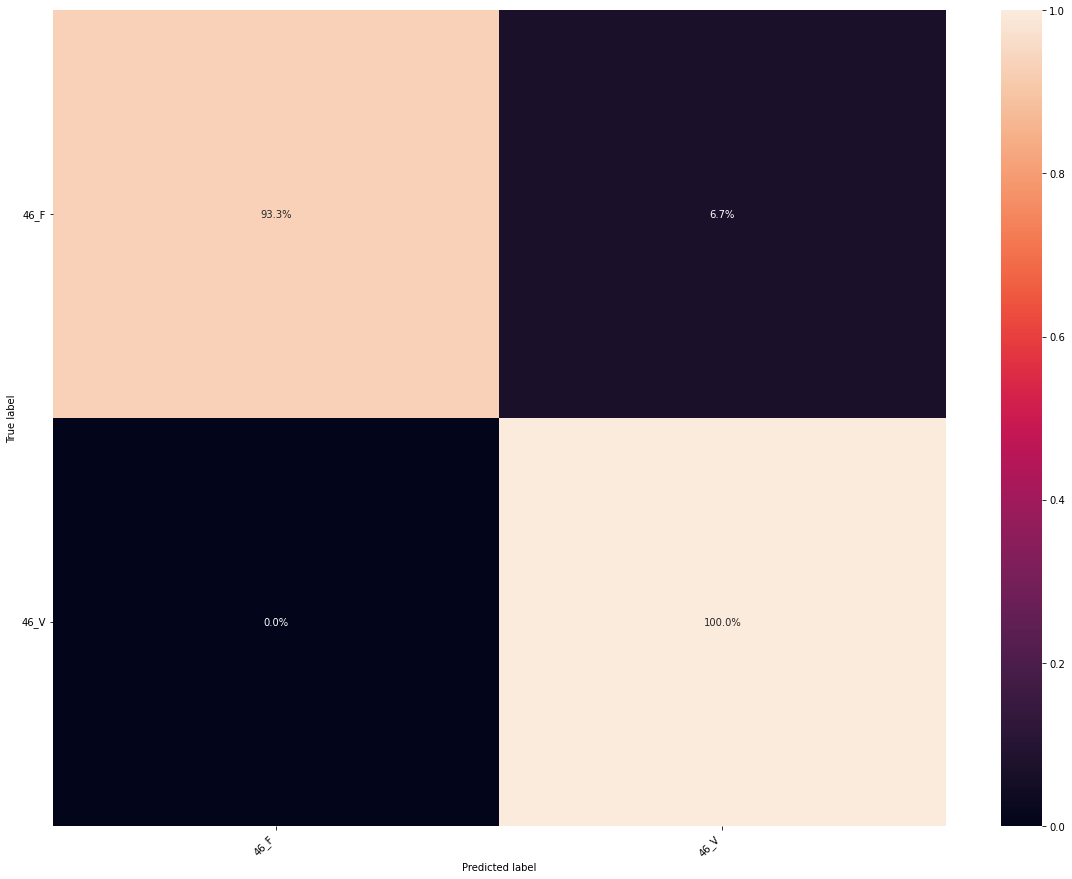

###################################################################
Test individuo 47
[1. 0.]
[0. 1.]


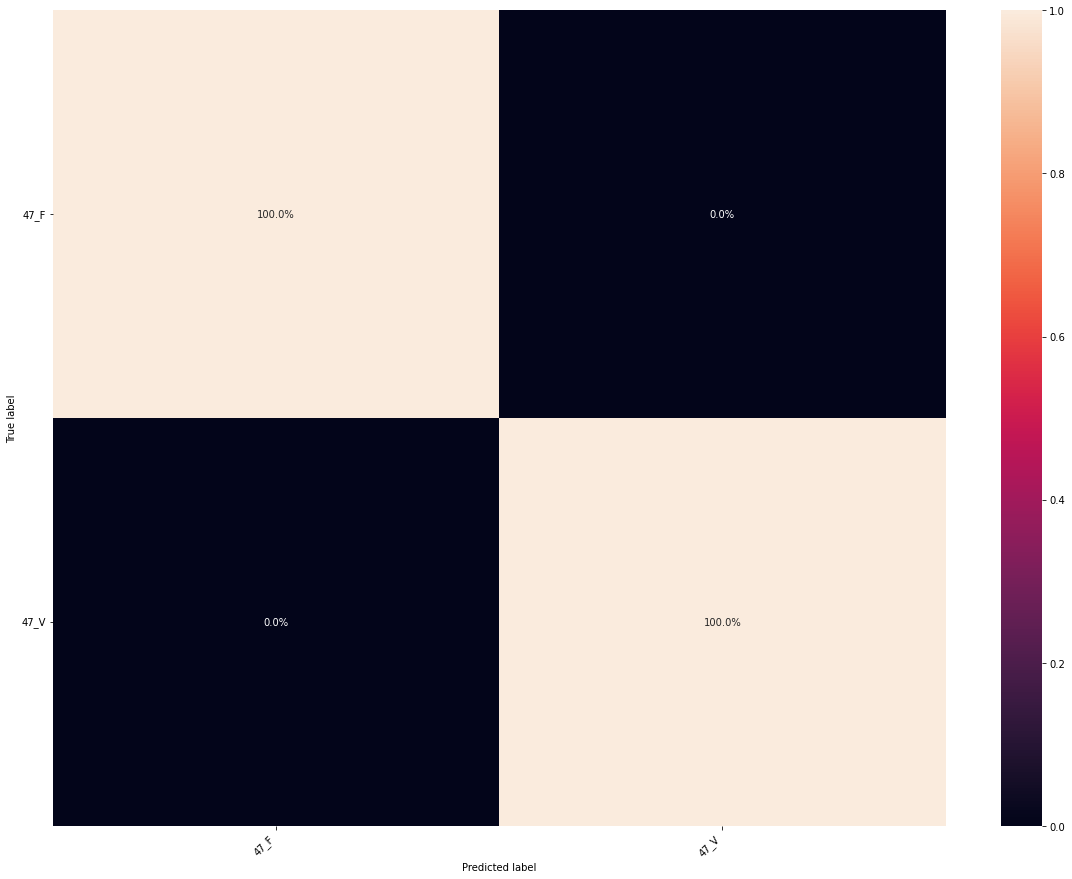

[0.83333333 0.16666667]
[0. 1.]


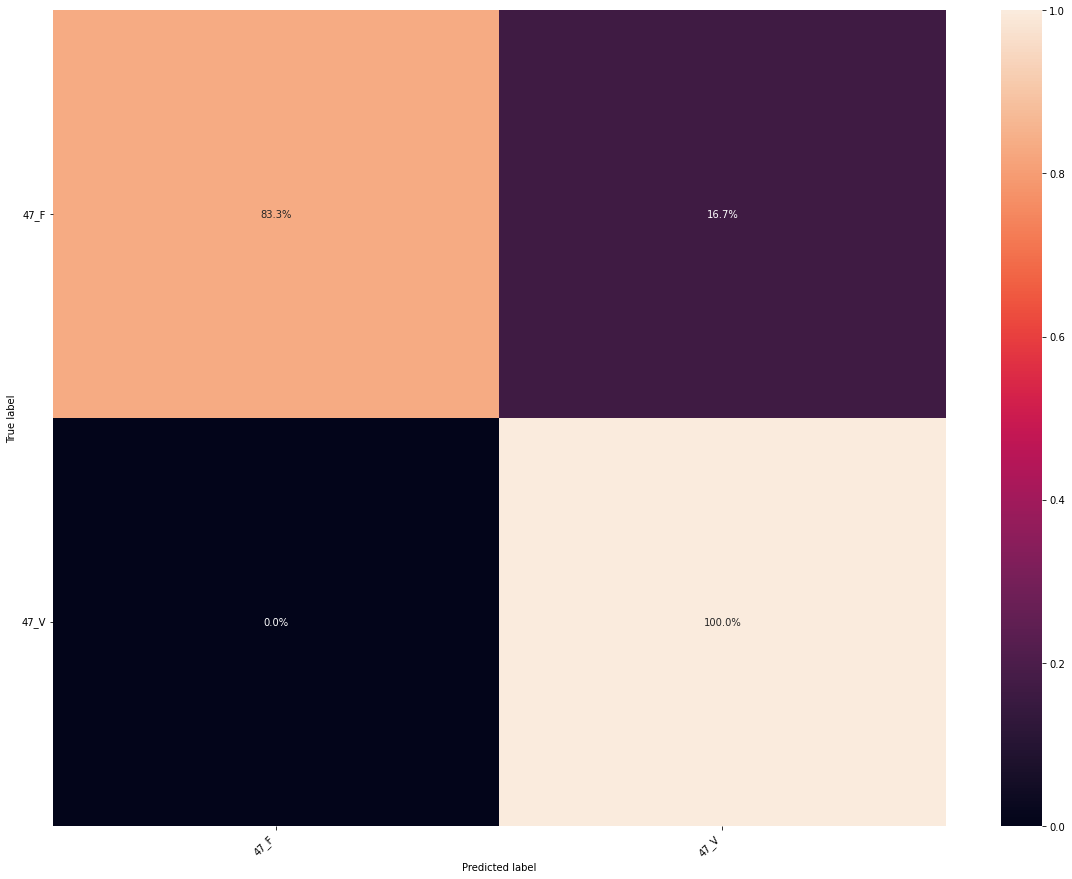

###################################################################
Test individuo 48
[0.91666667 0.08333333]
[0. 1.]


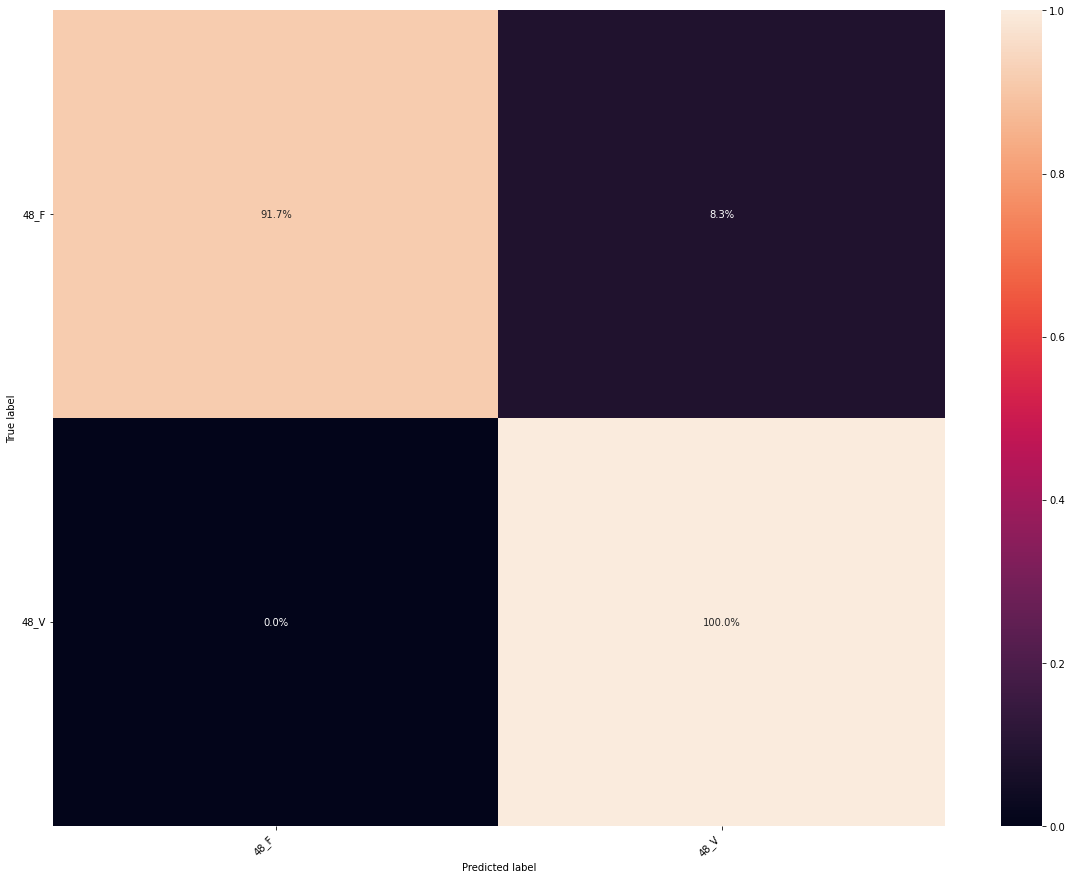

[1. 0.]
[0. 1.]


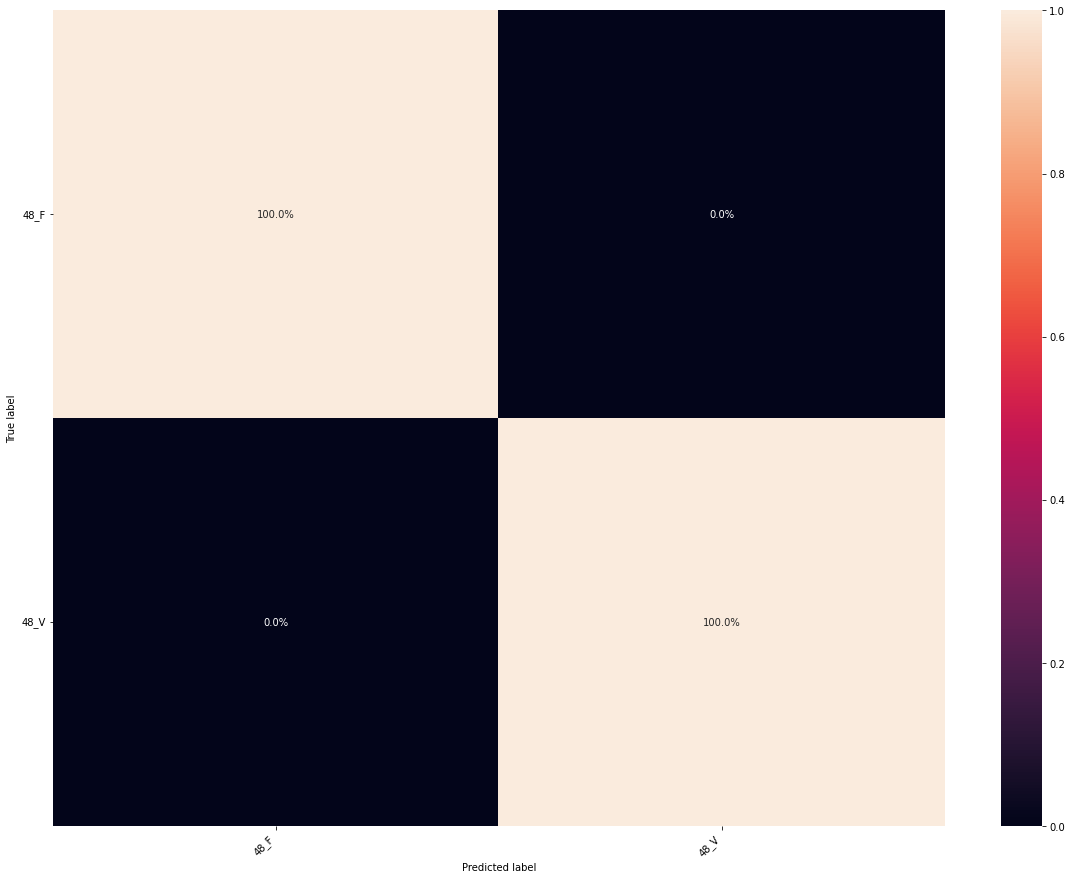

###################################################################
Test individuo 49
[1. 0.]
[0. 1.]


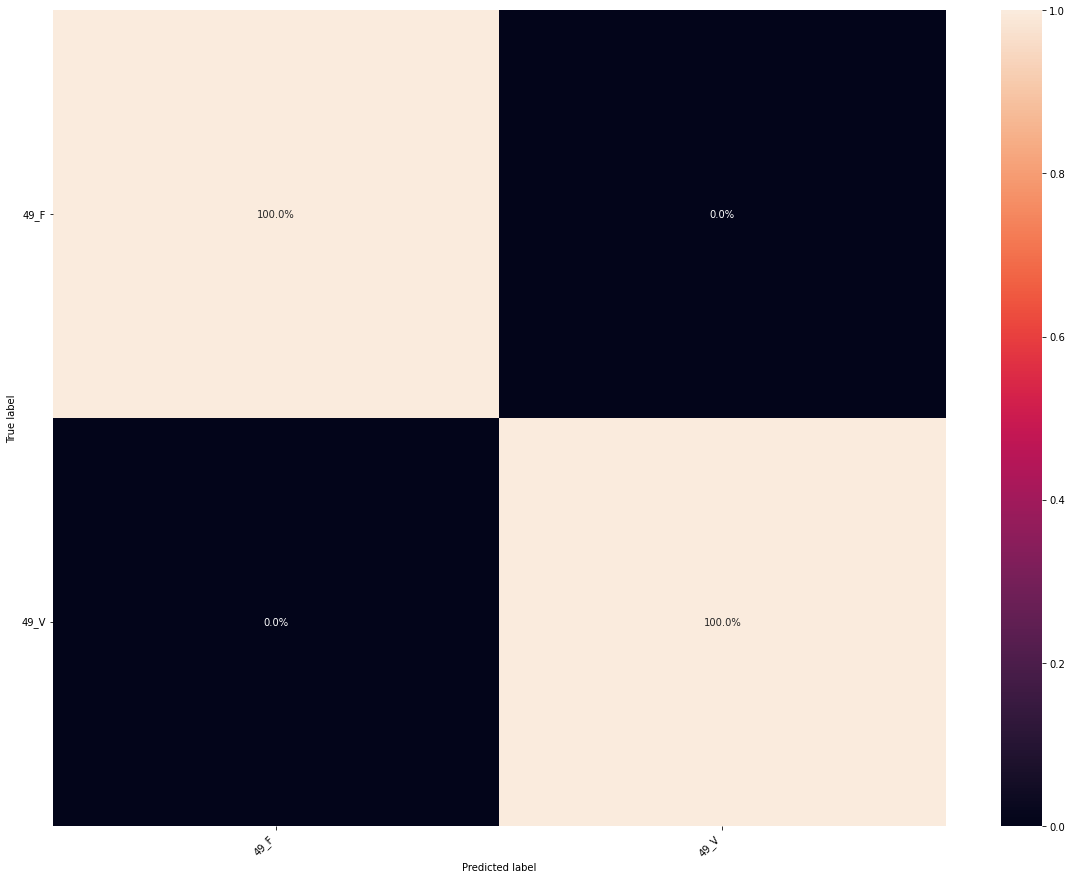

[1. 0.]
[0. 1.]


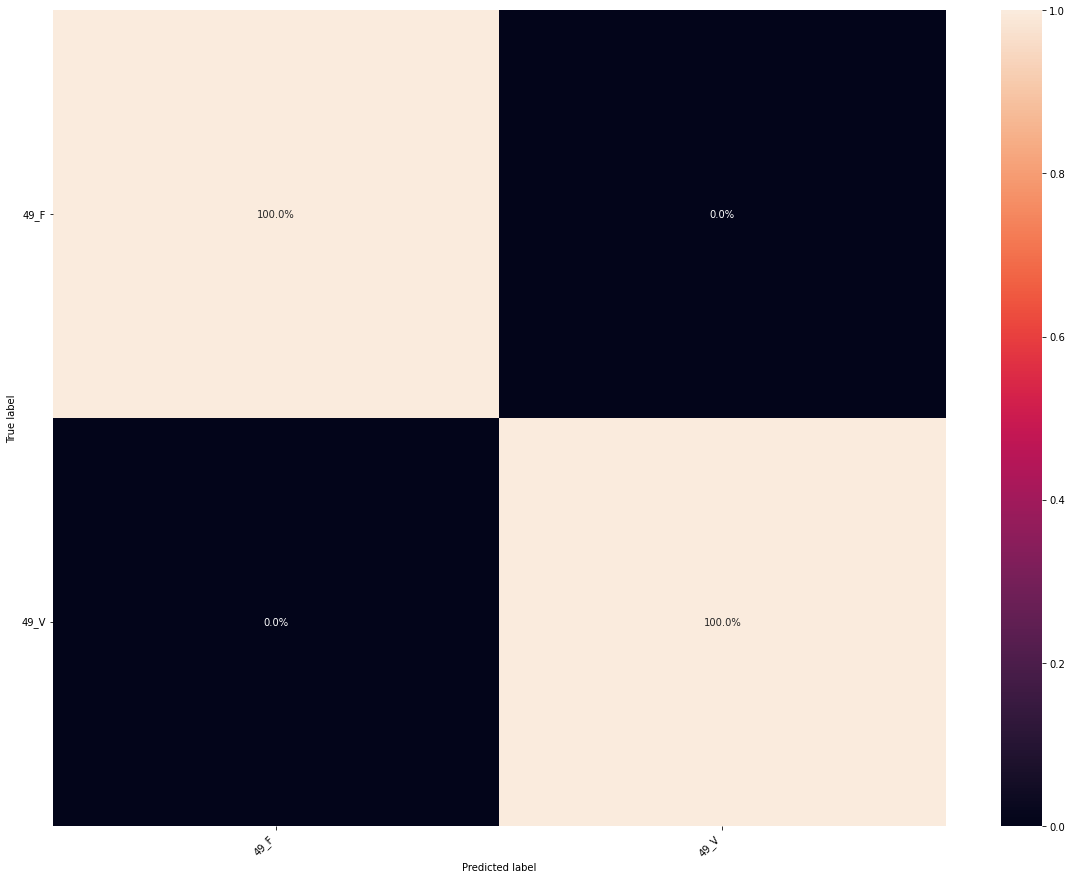

###################################################################
Test individuo 50
[1. 0.]
[0. 1.]


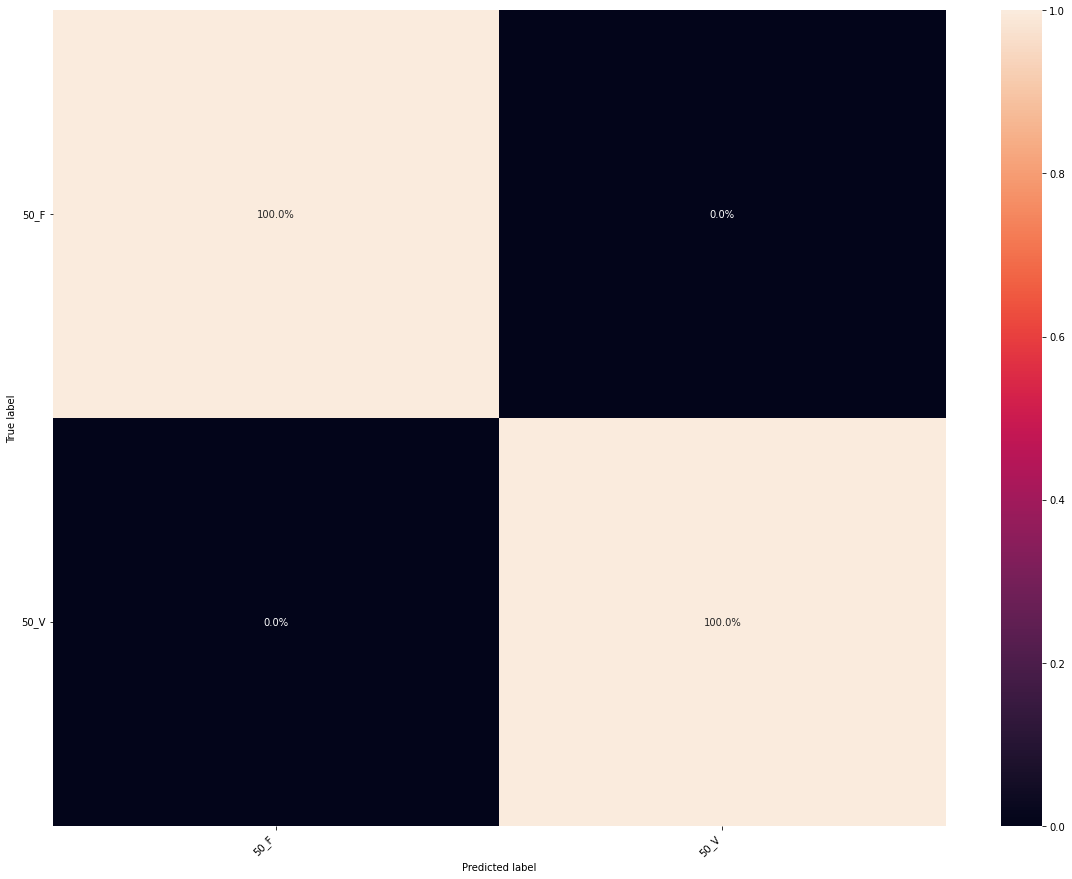

[0.91666667 0.08333333]
[0. 1.]


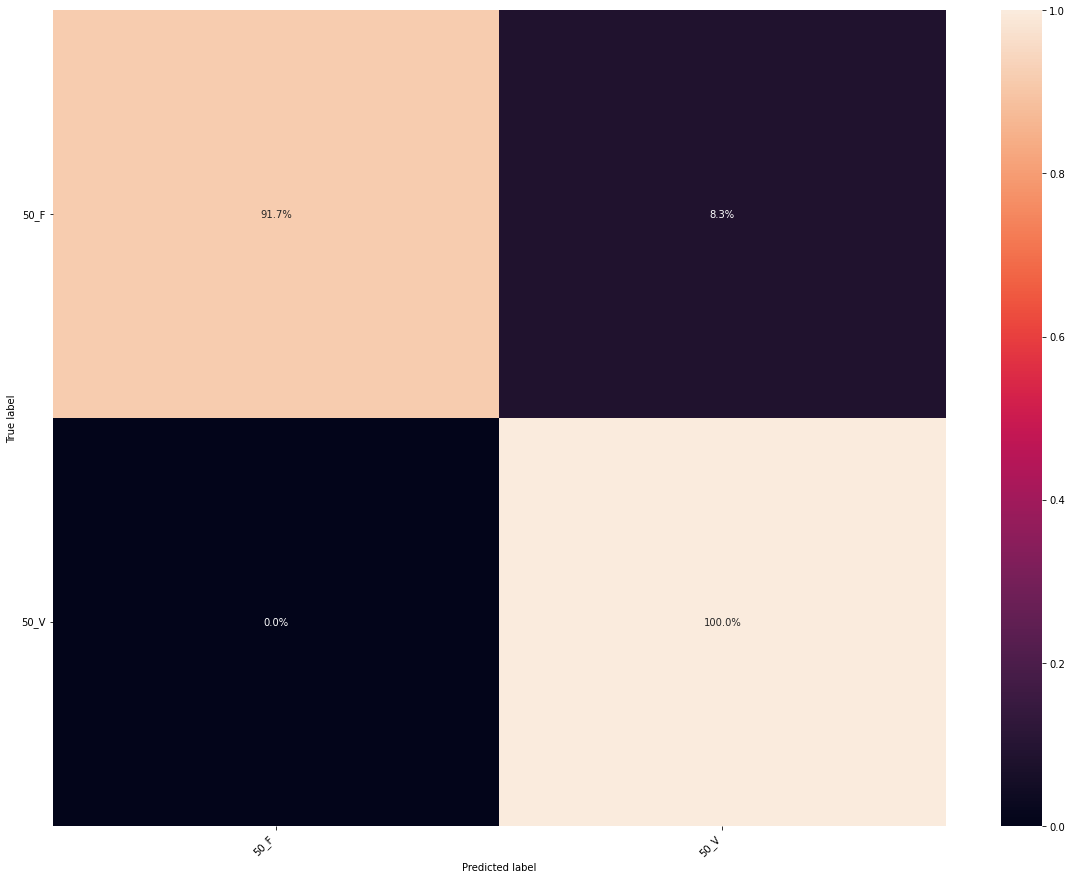

###################################################################
Test individuo 51
[nan nan nan]
[0.         0.83333333 0.16666667]
[0.08333333 0.08333333 0.83333333]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


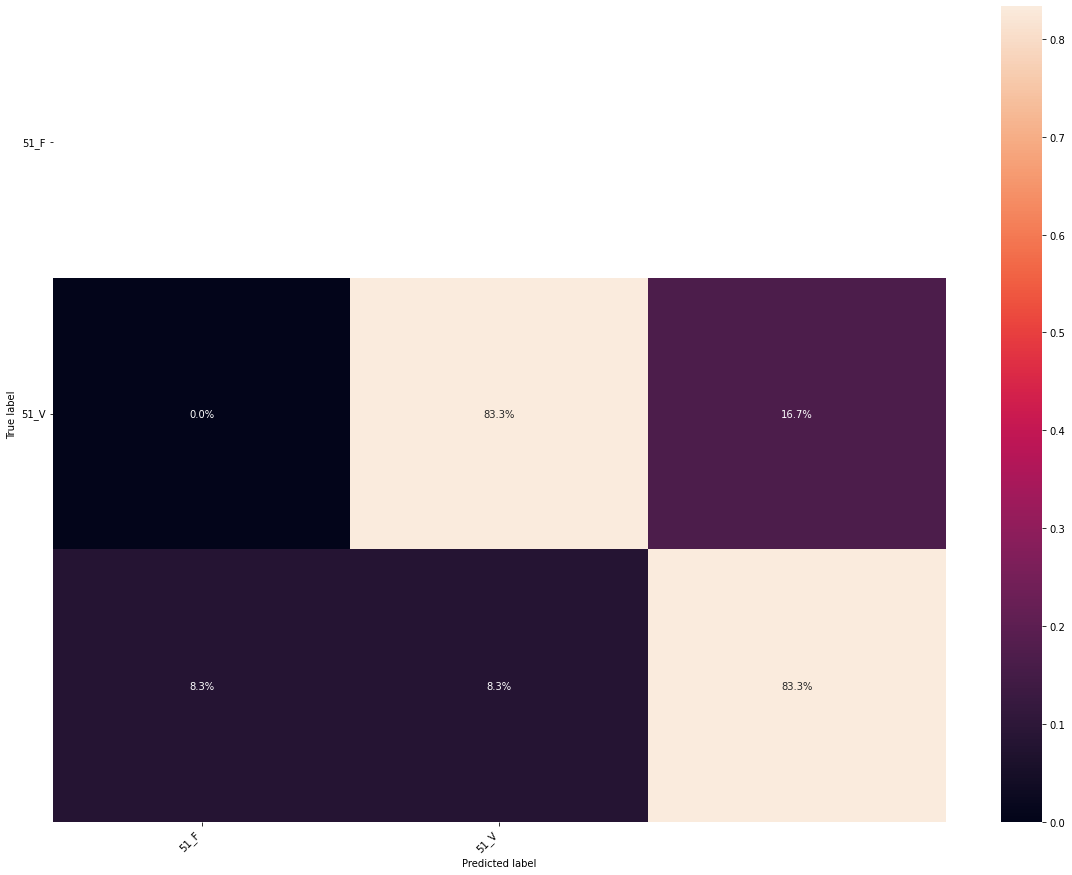

[1. 0.]
[0.16666667 0.83333333]


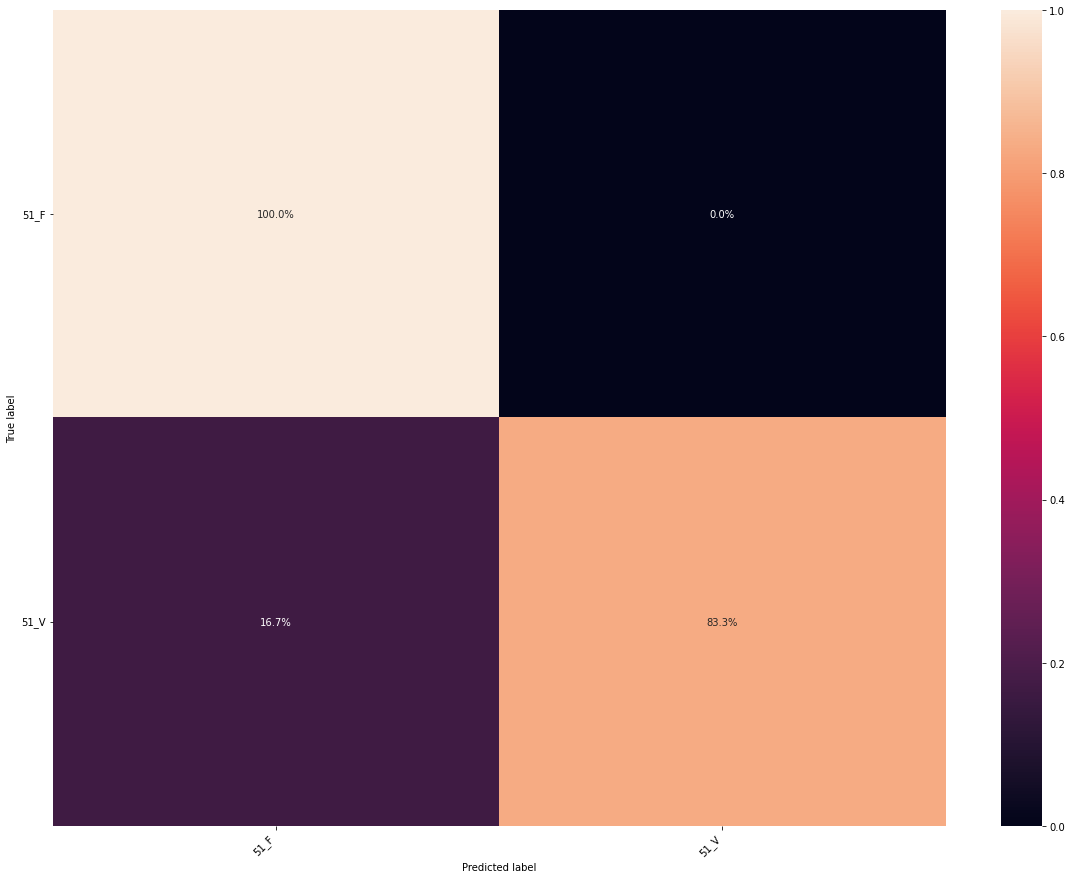

###################################################################
Test individuo 52
[0.83333333 0.16666667]
[0. 1.]


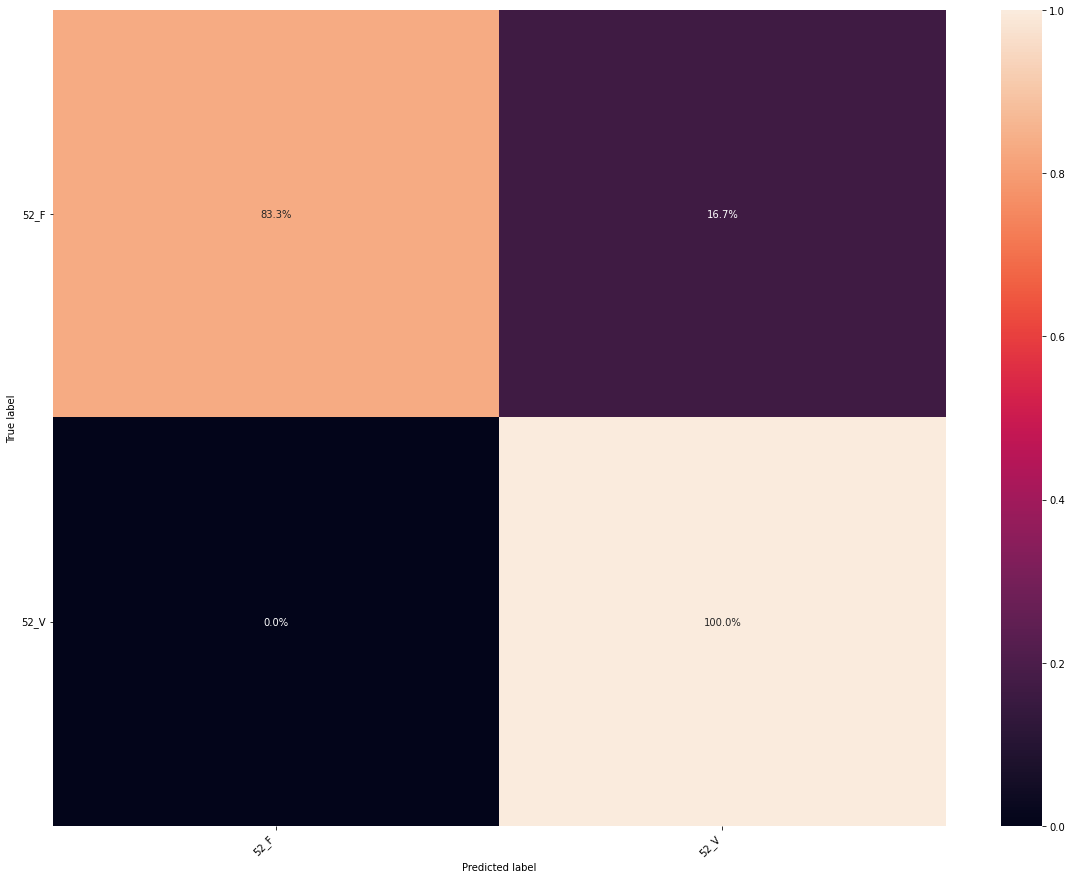

[1. 0.]
[0. 1.]


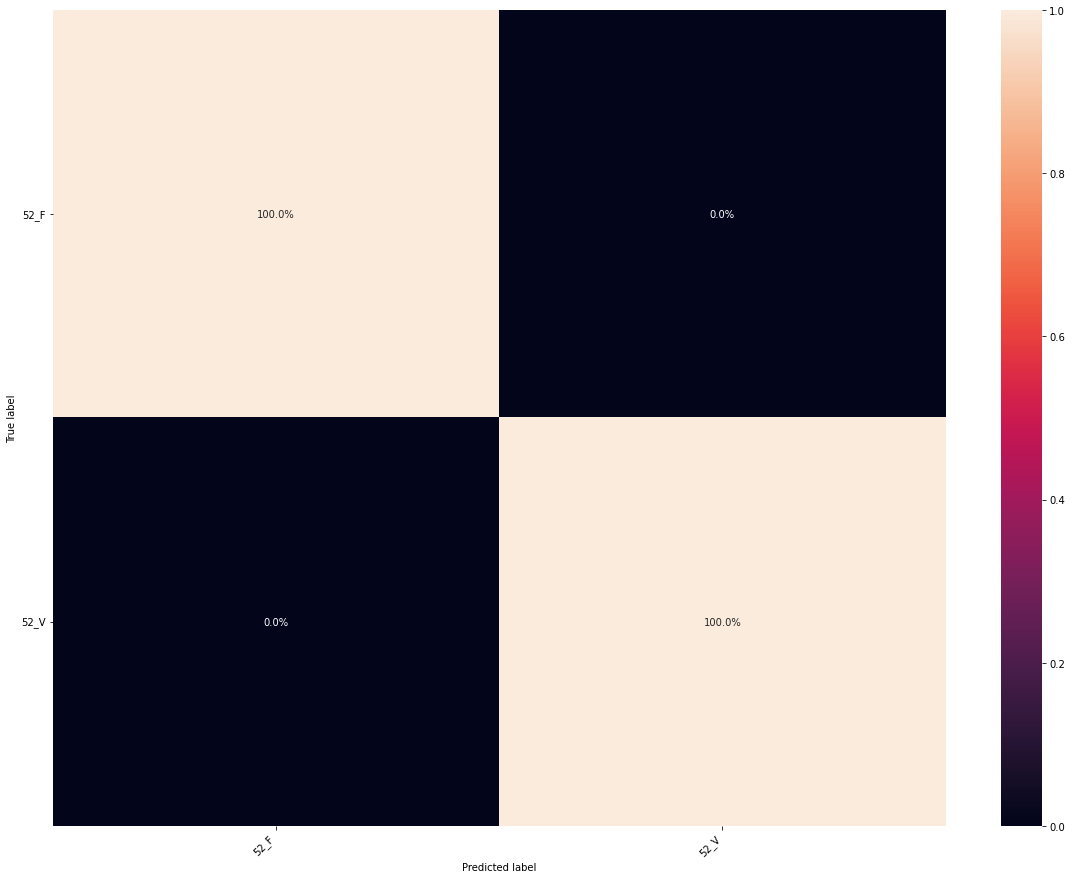

###################################################################
Test individuo 53
[1. 0.]
[0. 1.]


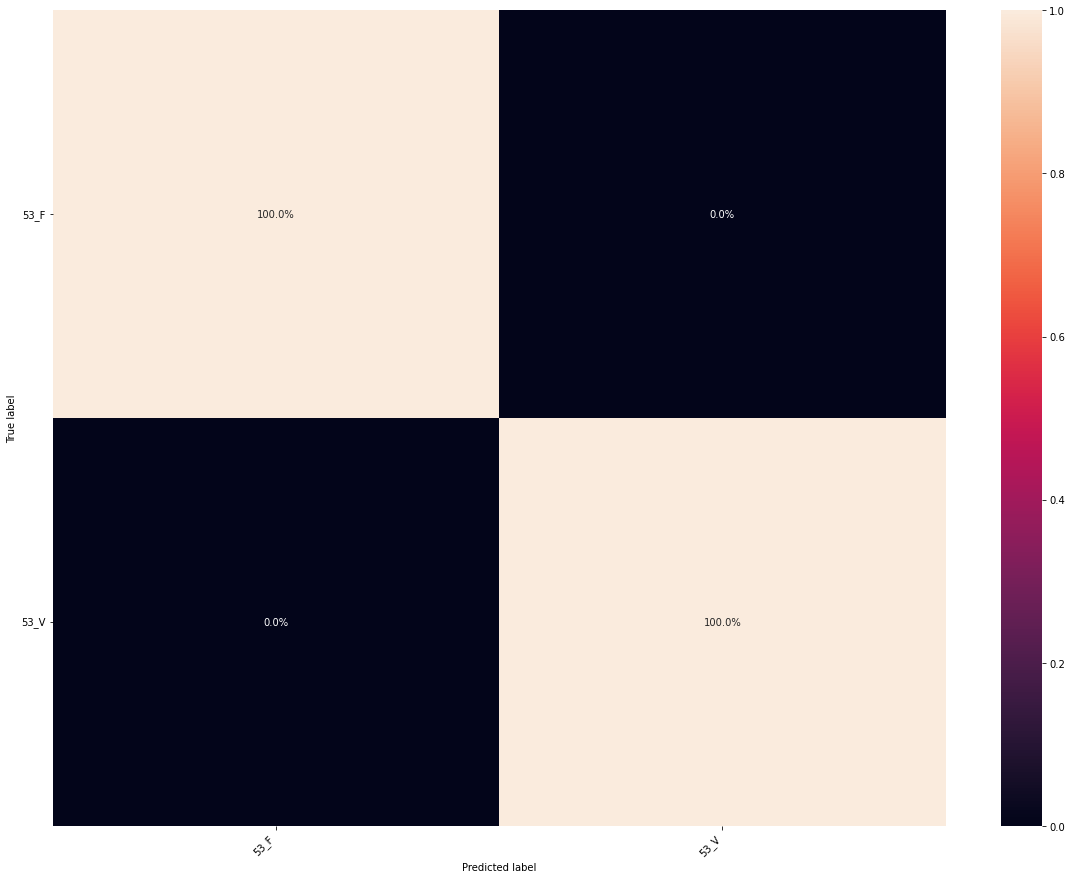

[0.91666667 0.08333333]
[0. 1.]


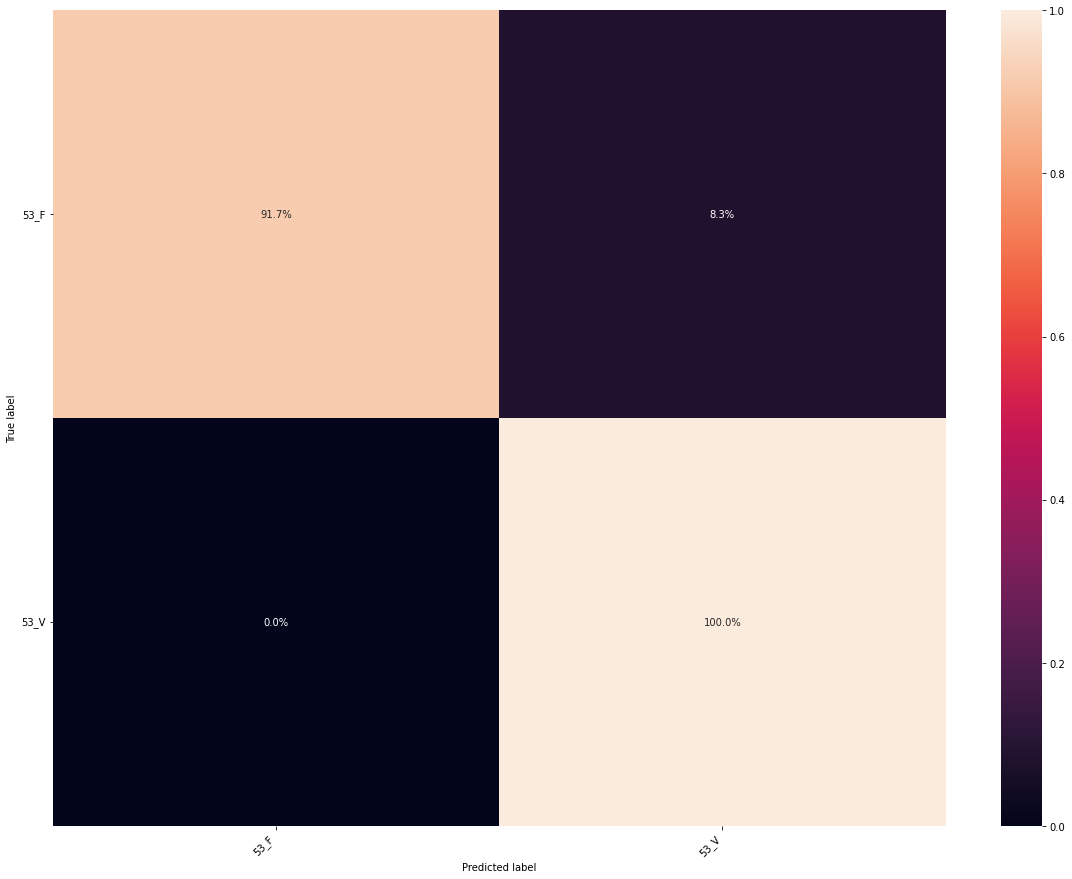

###################################################################
Test individuo 54
[nan nan nan]
[0.08333333 0.91666667 0.        ]
[0. 0. 1.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


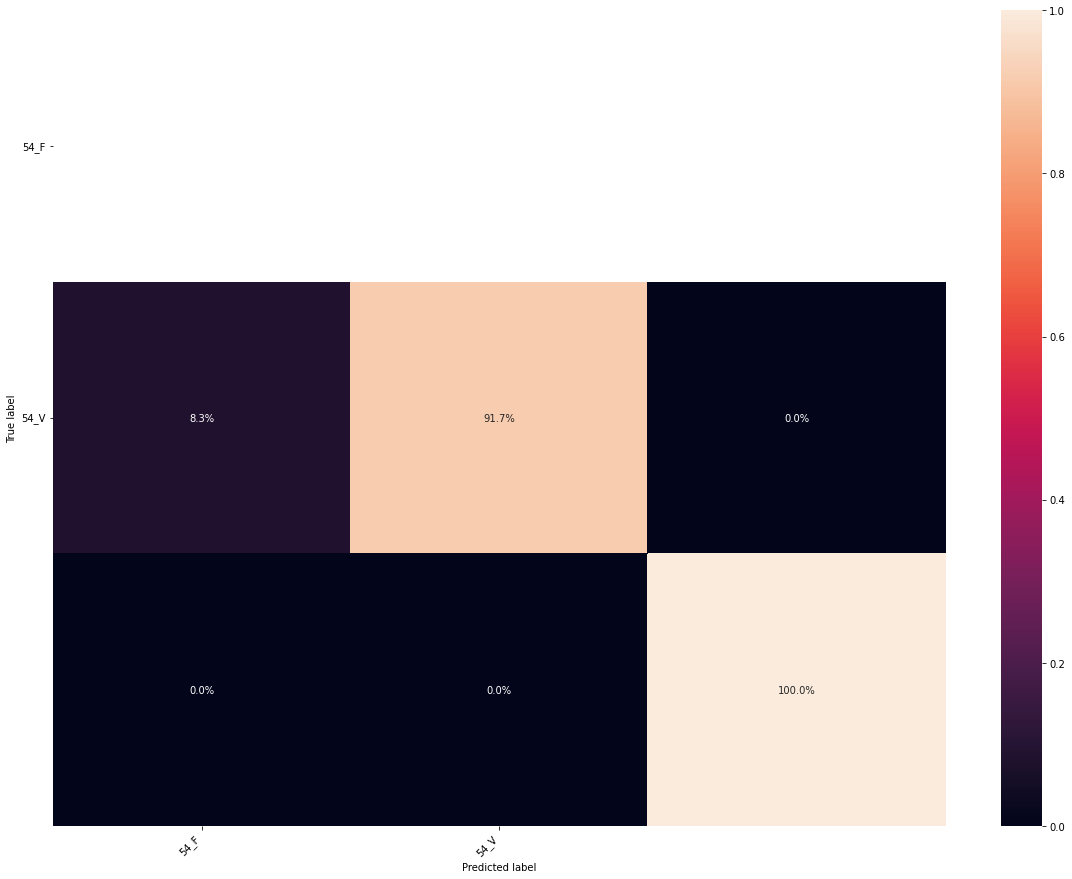

[1. 0.]
[0. 1.]


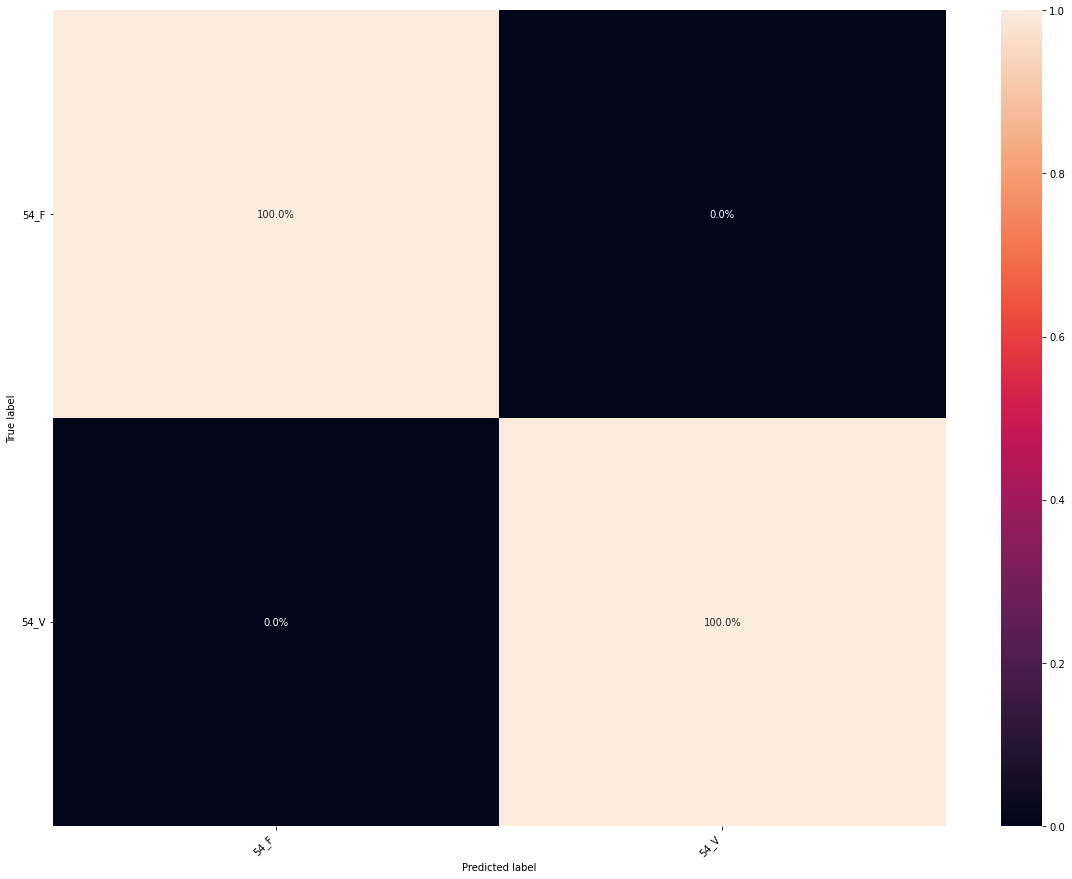

###################################################################
Test individuo 55
[1. 0.]
[0. 1.]


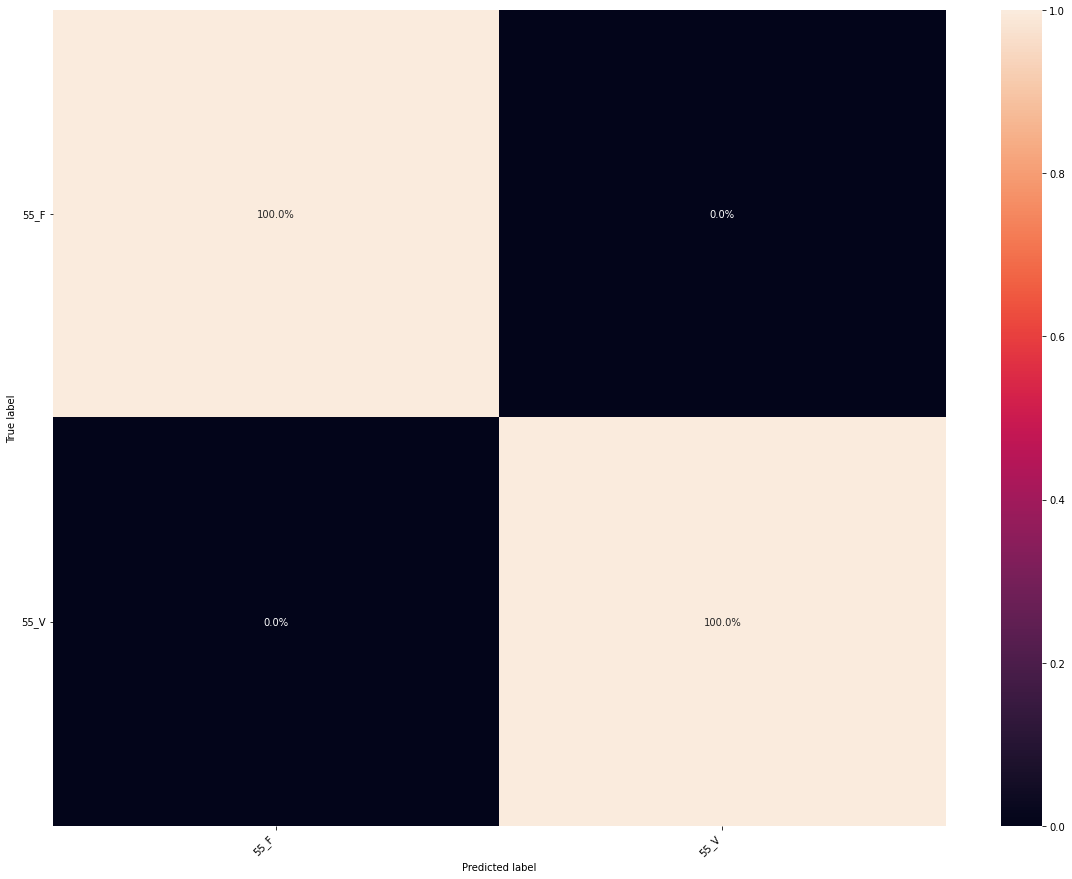

[1. 0.]
[0. 1.]


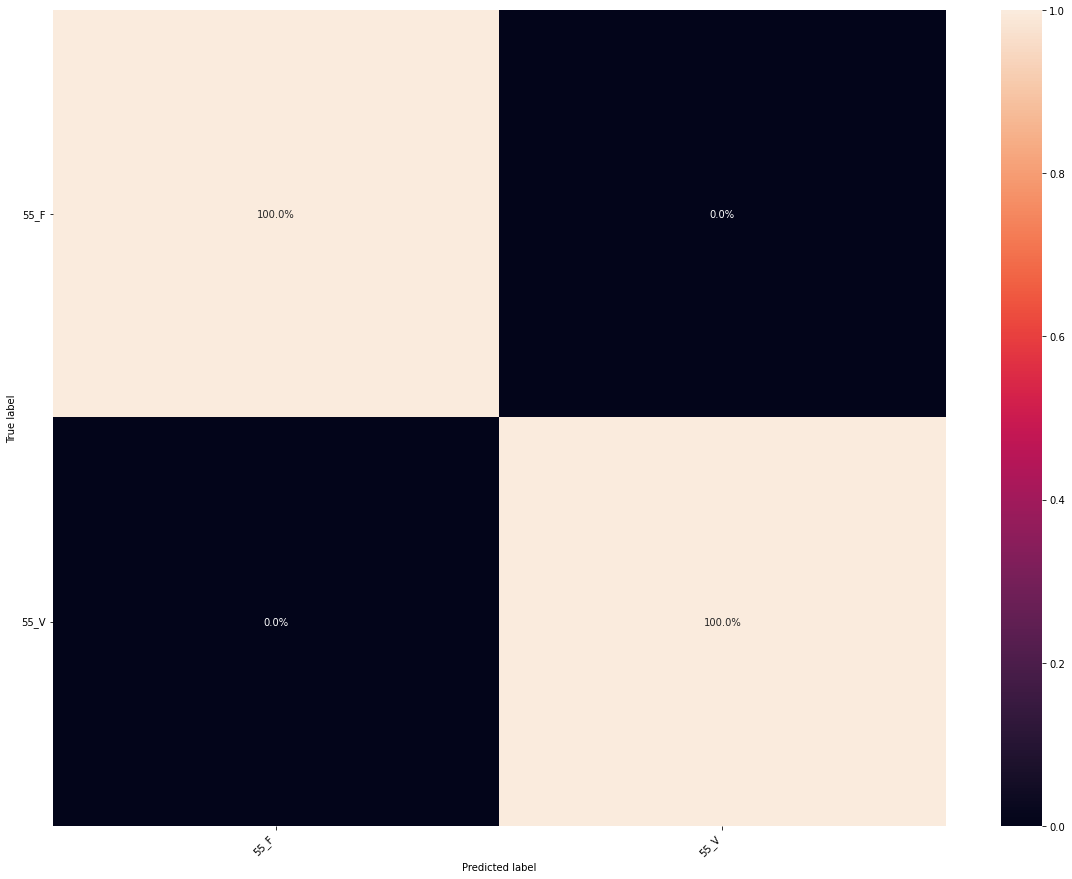

###################################################################
Test individuo 56
[1. 0.]
[0. 1.]


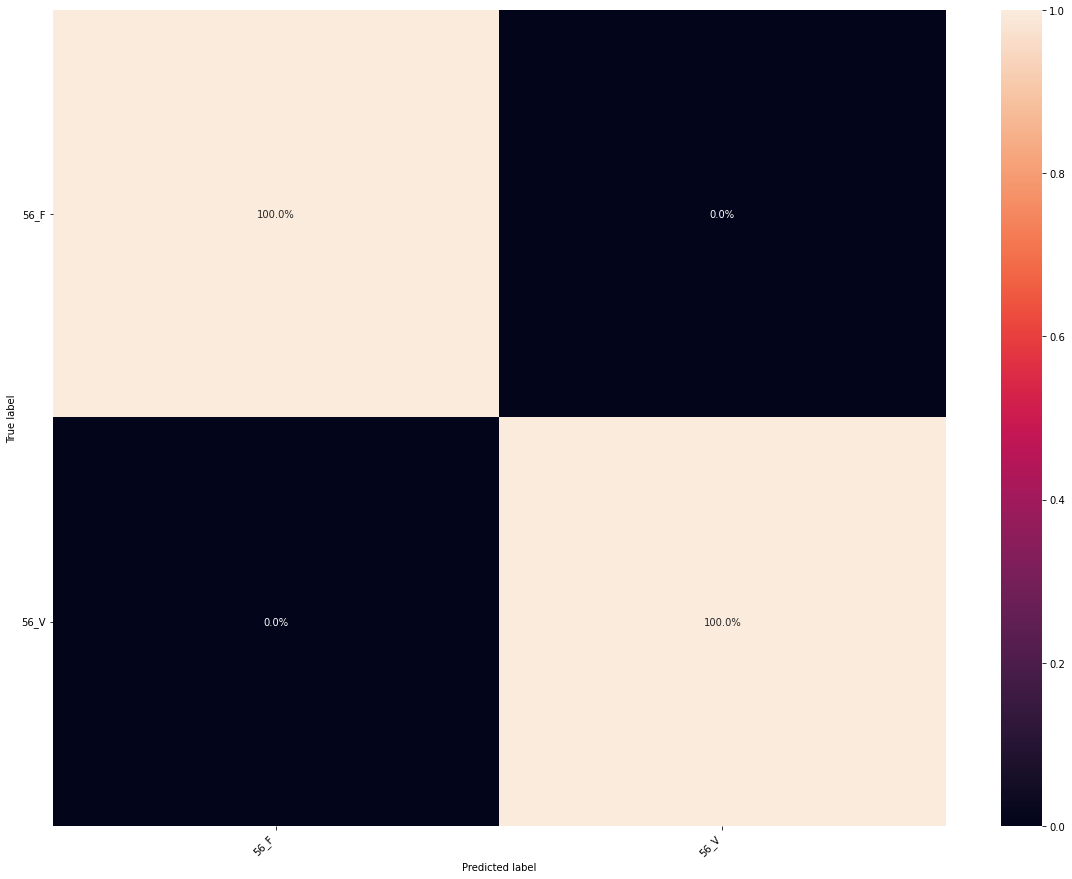

[1. 0.]
[0. 1.]


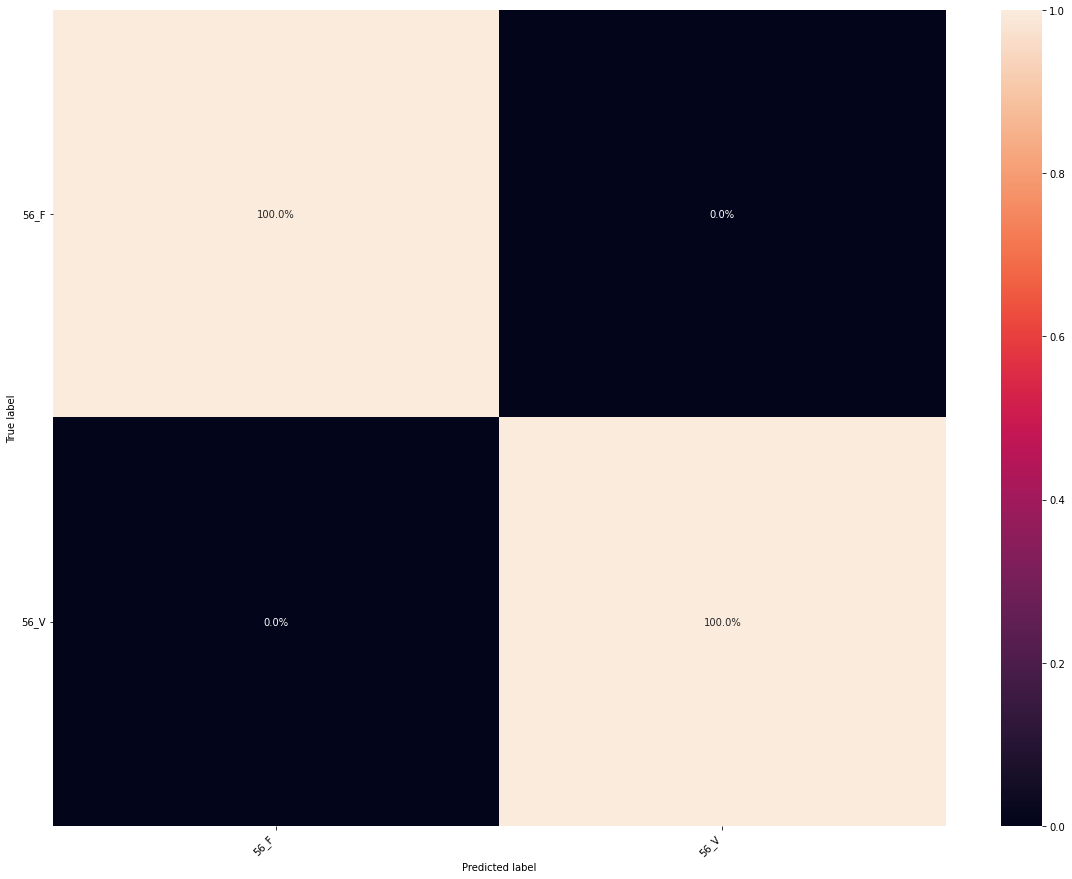

###################################################################
Test individuo 57
[0.91666667 0.08333333]
[0. 1.]


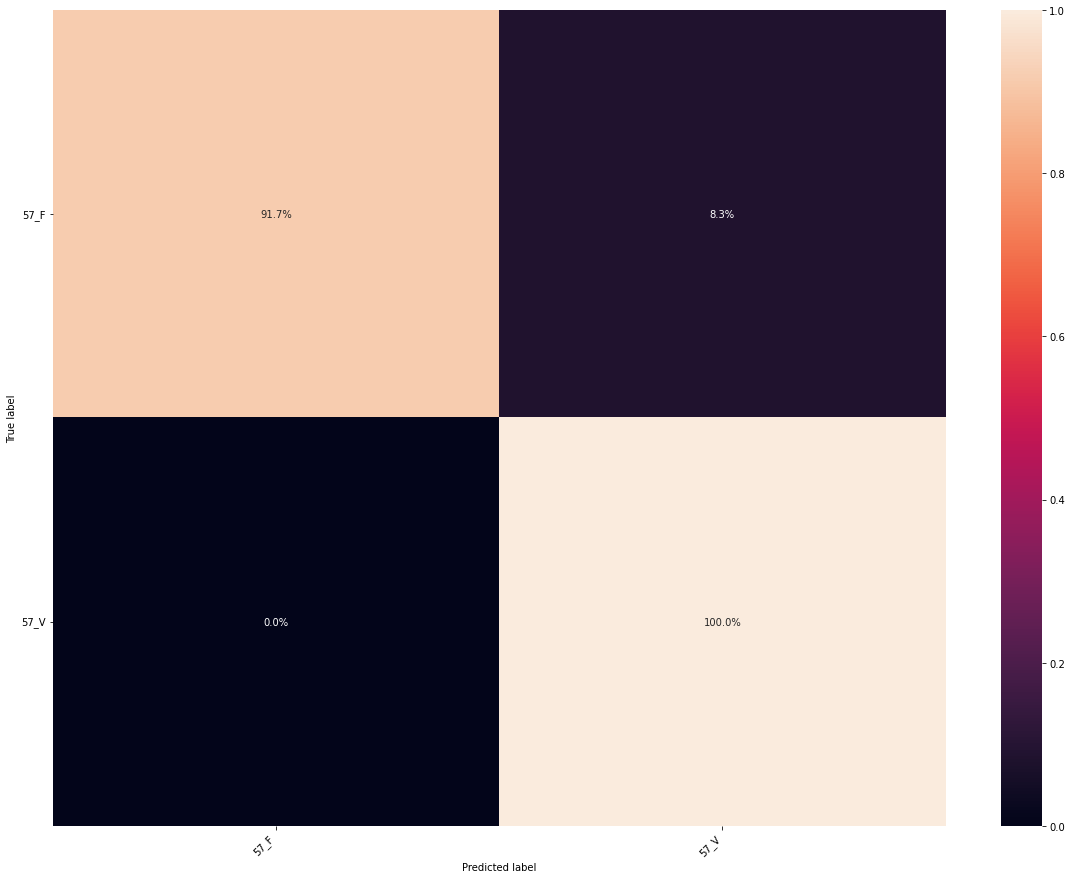

[1. 0.]
[0. 1.]


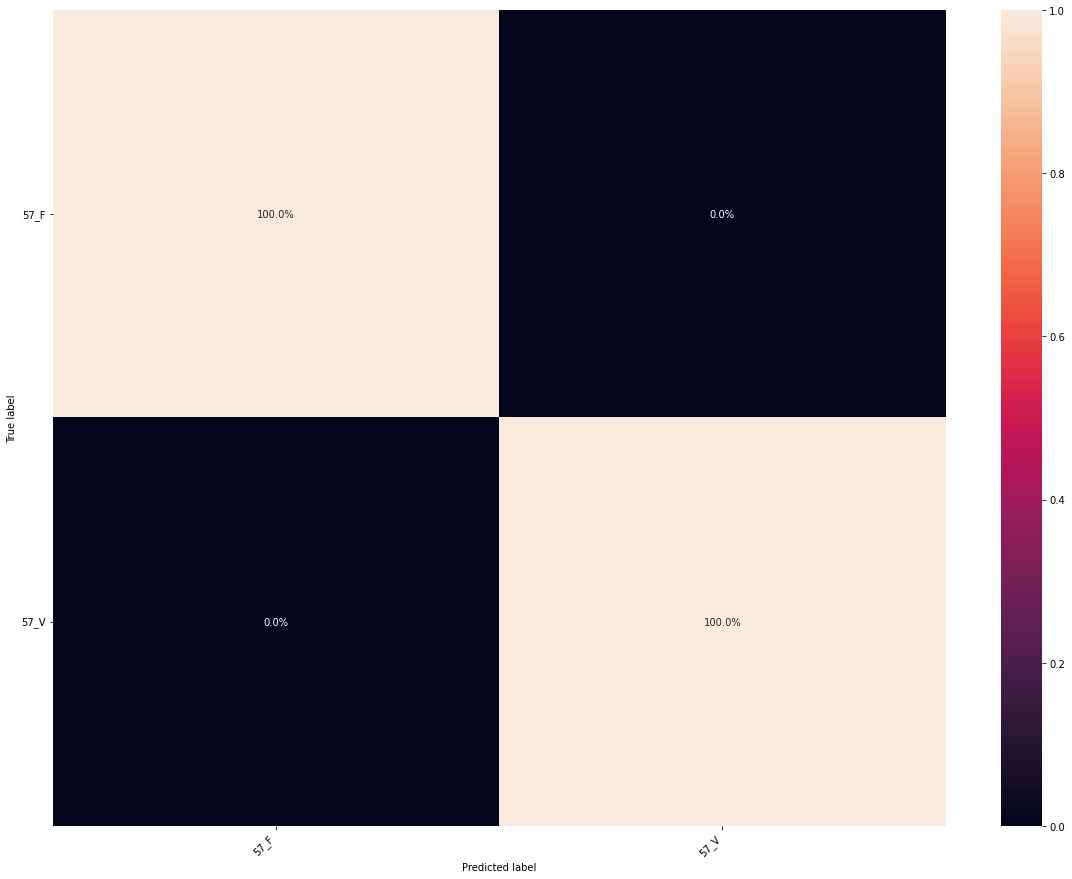

###################################################################
Test individuo 58
[1. 0.]
[0. 1.]


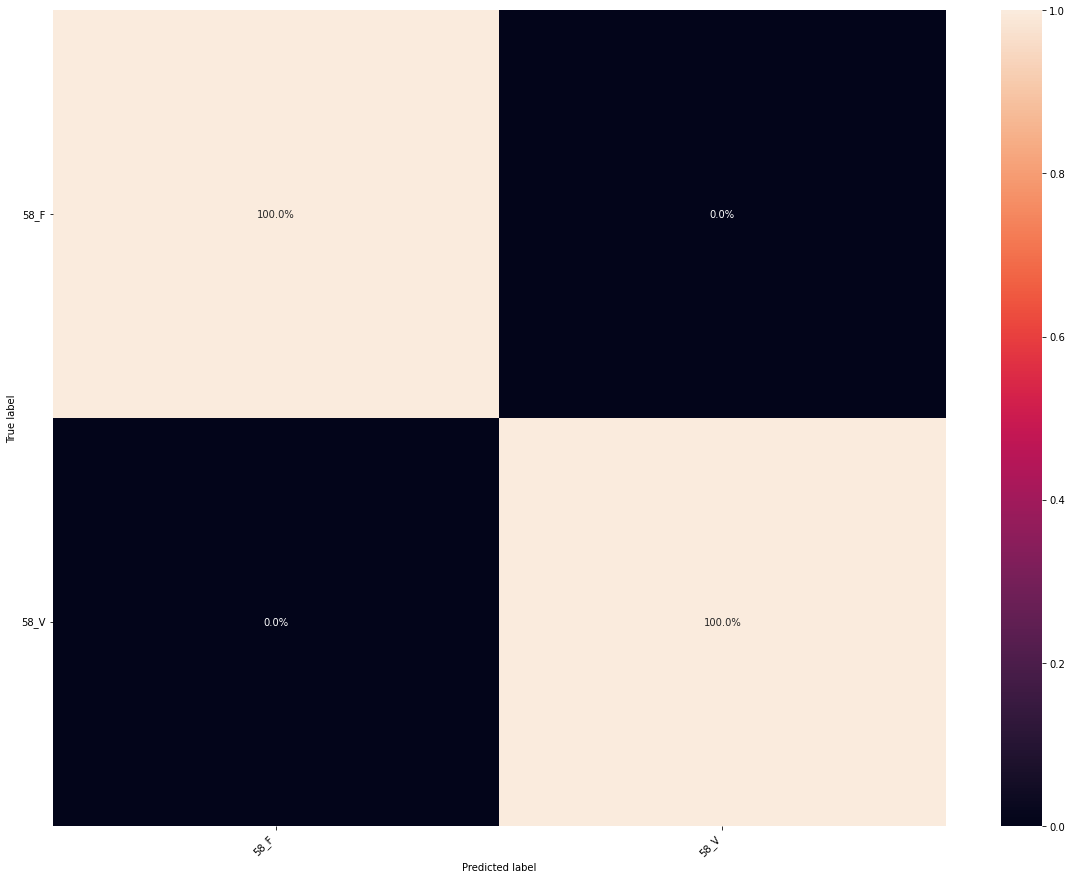

[0.91666667 0.08333333]
[0. 1.]


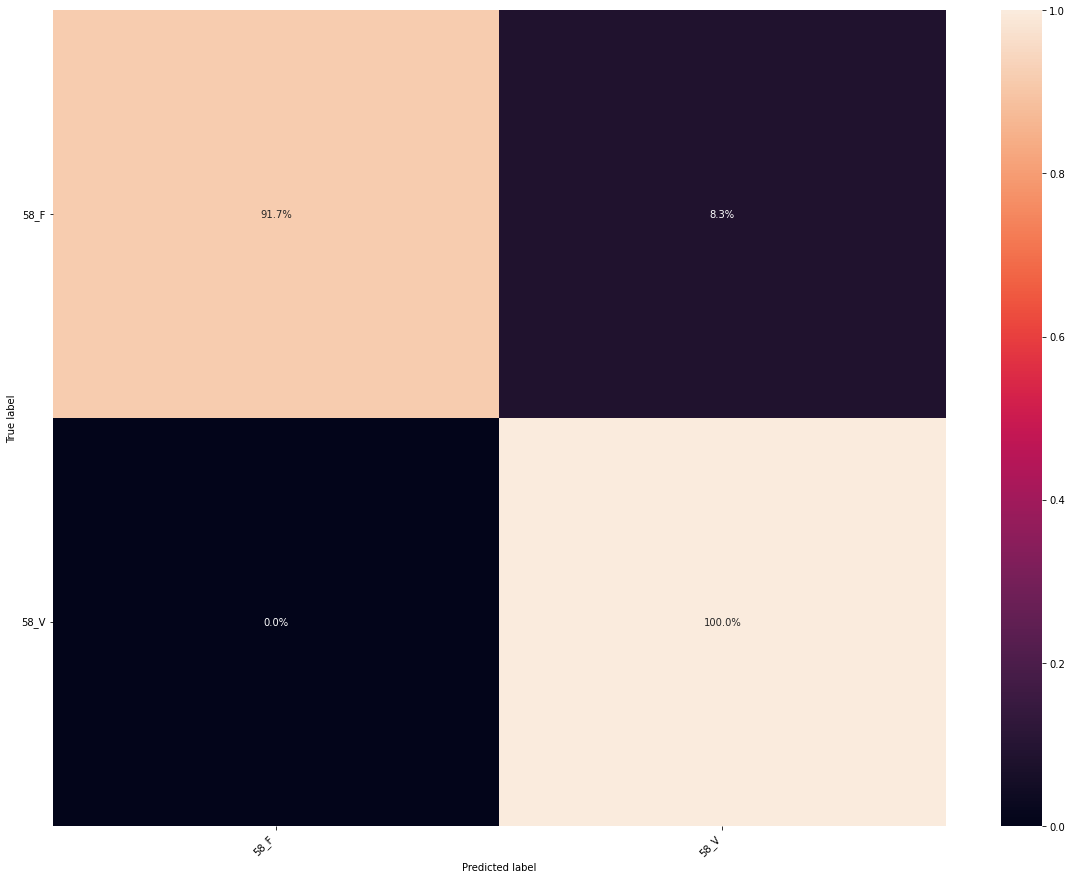

###################################################################
Test individuo 59
[1. 0.]
[0. 1.]


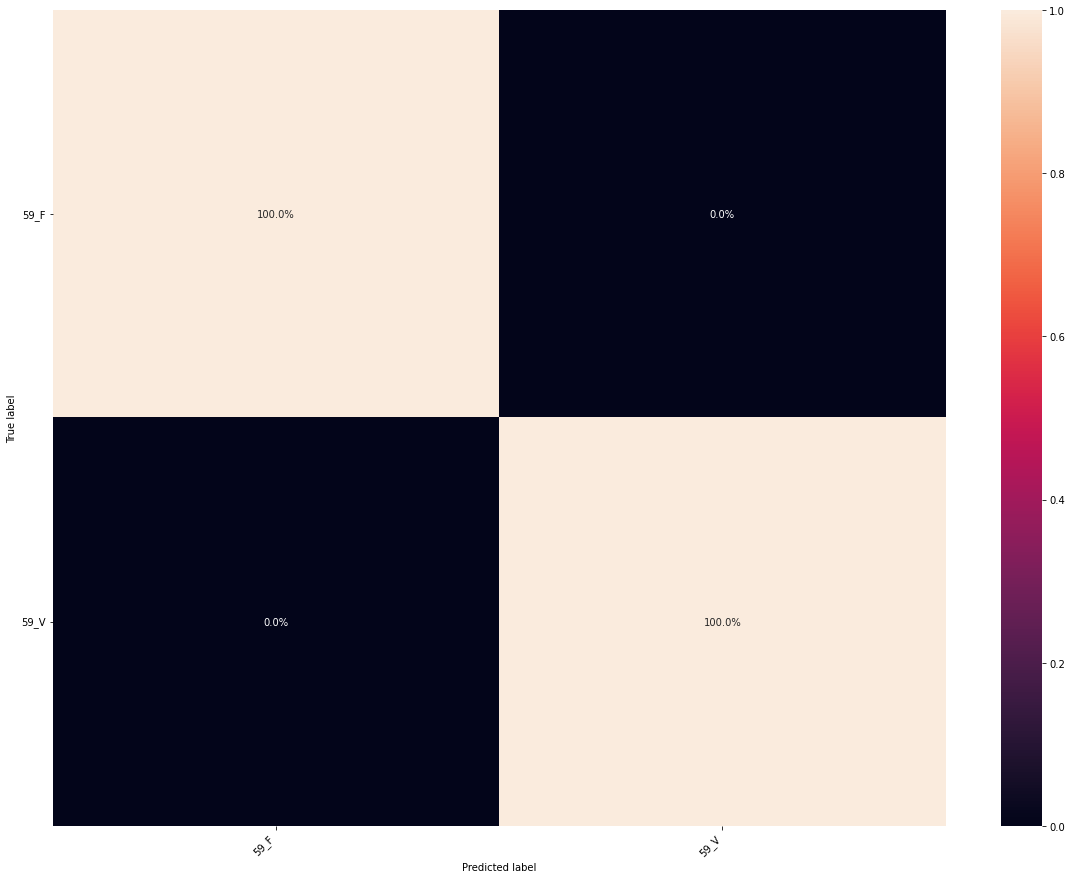

[1. 0.]
[0. 1.]


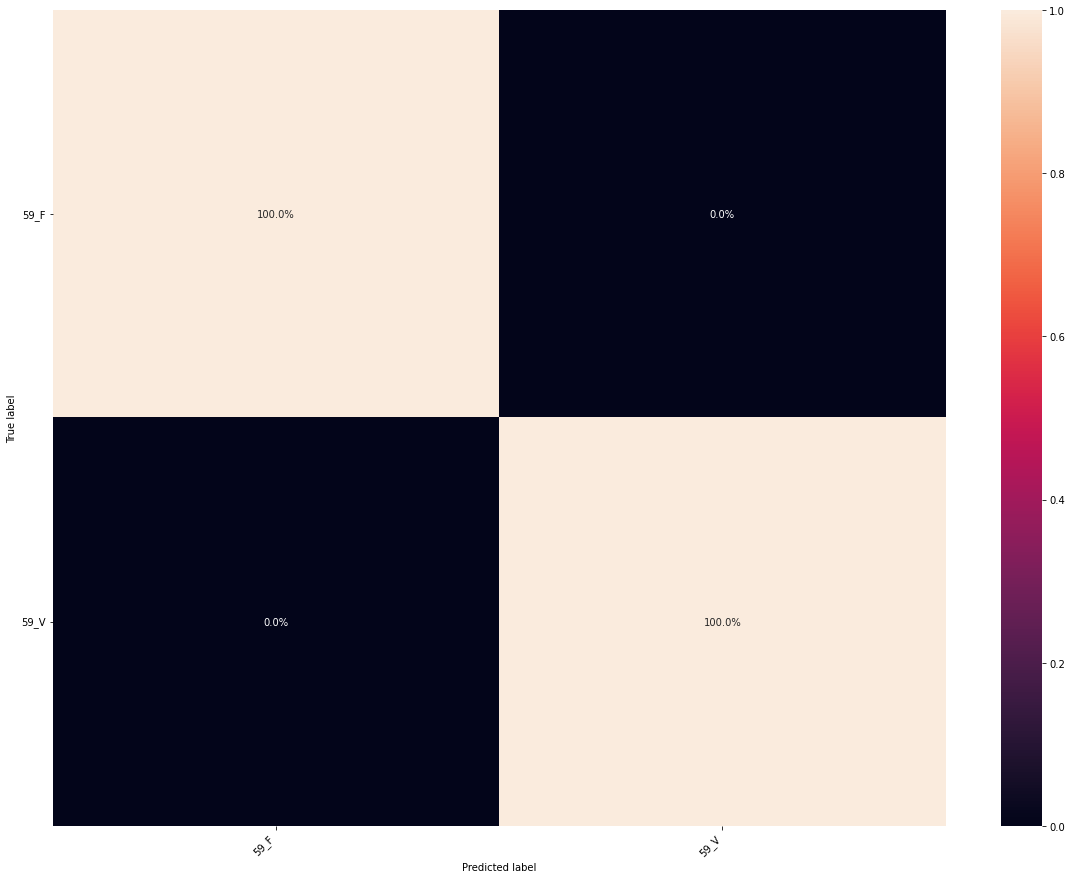

###################################################################
Test individuo 60
[0.91666667 0.08333333]
[0. 1.]


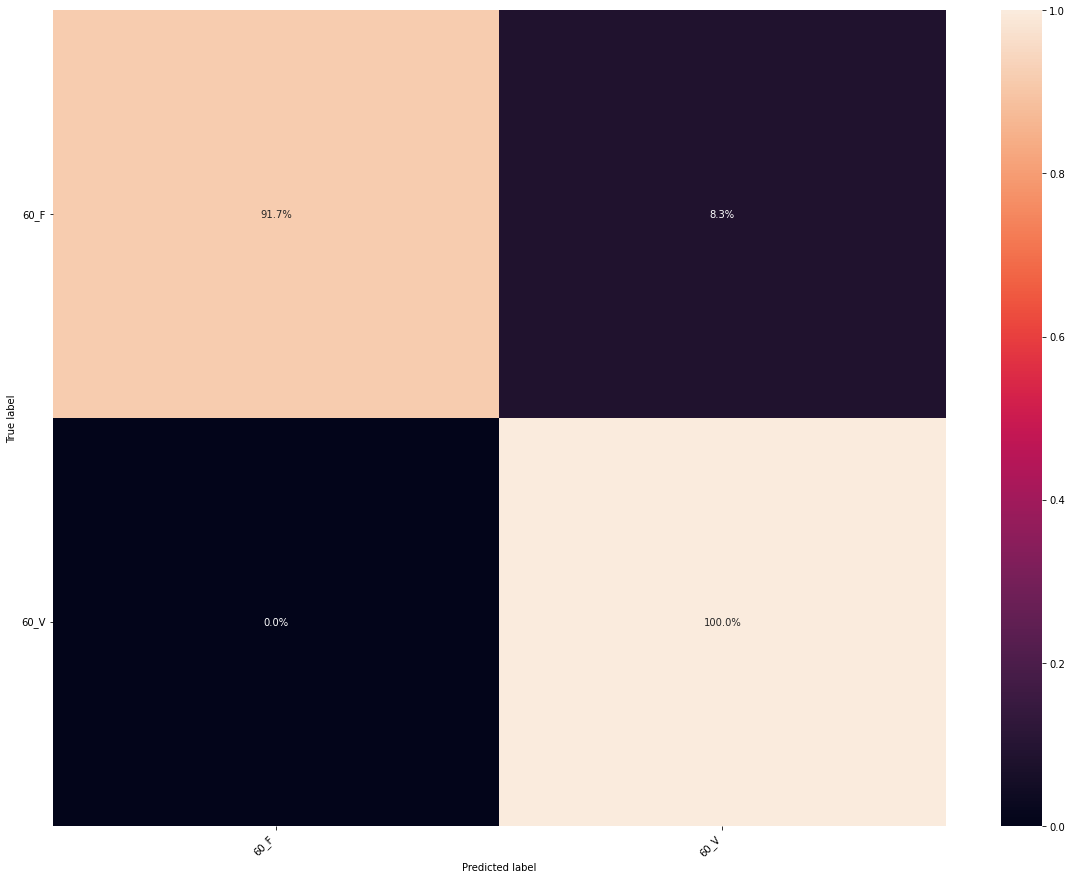

[1. 0.]
[0. 1.]


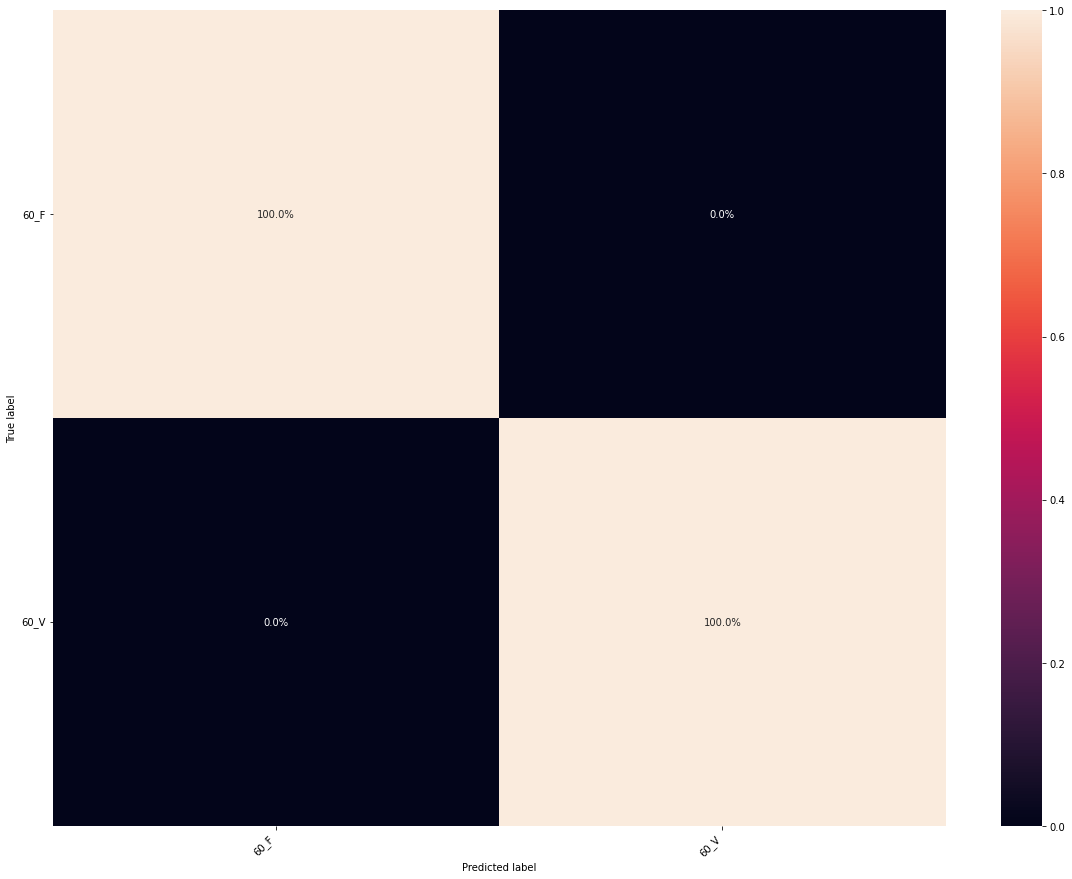

###################################################################
Test individuo 61
[1. 0.]
[0.2 0.8]


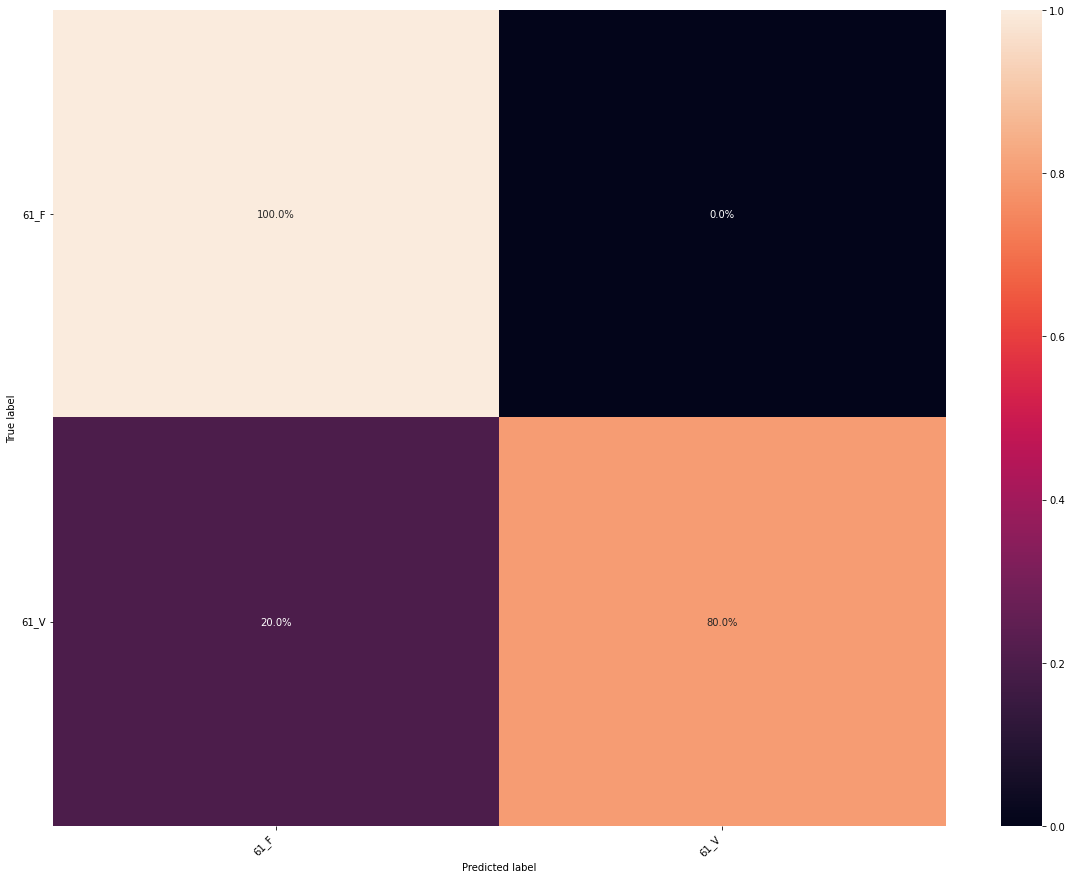

[1. 0.]
[0.2 0.8]


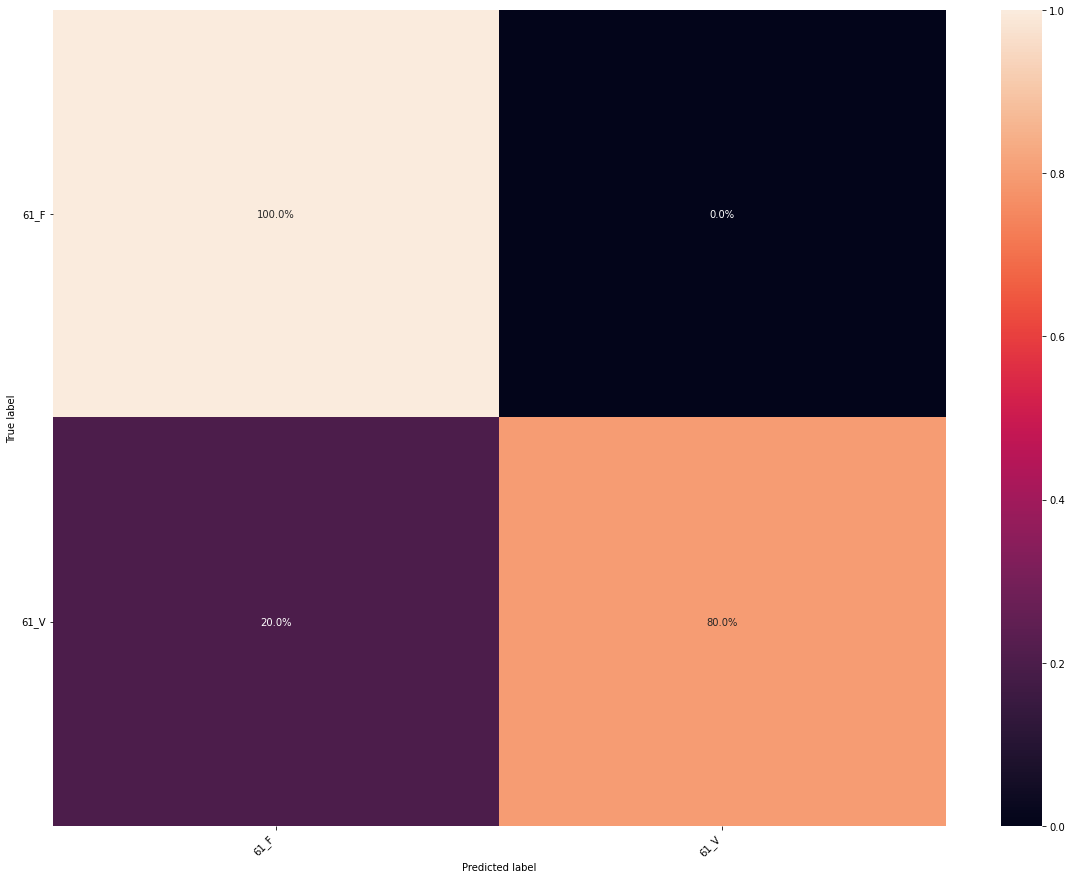

###################################################################
Test individuo 62
[0.91666667 0.         0.08333333]
[0. 1. 0.]
[nan nan nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


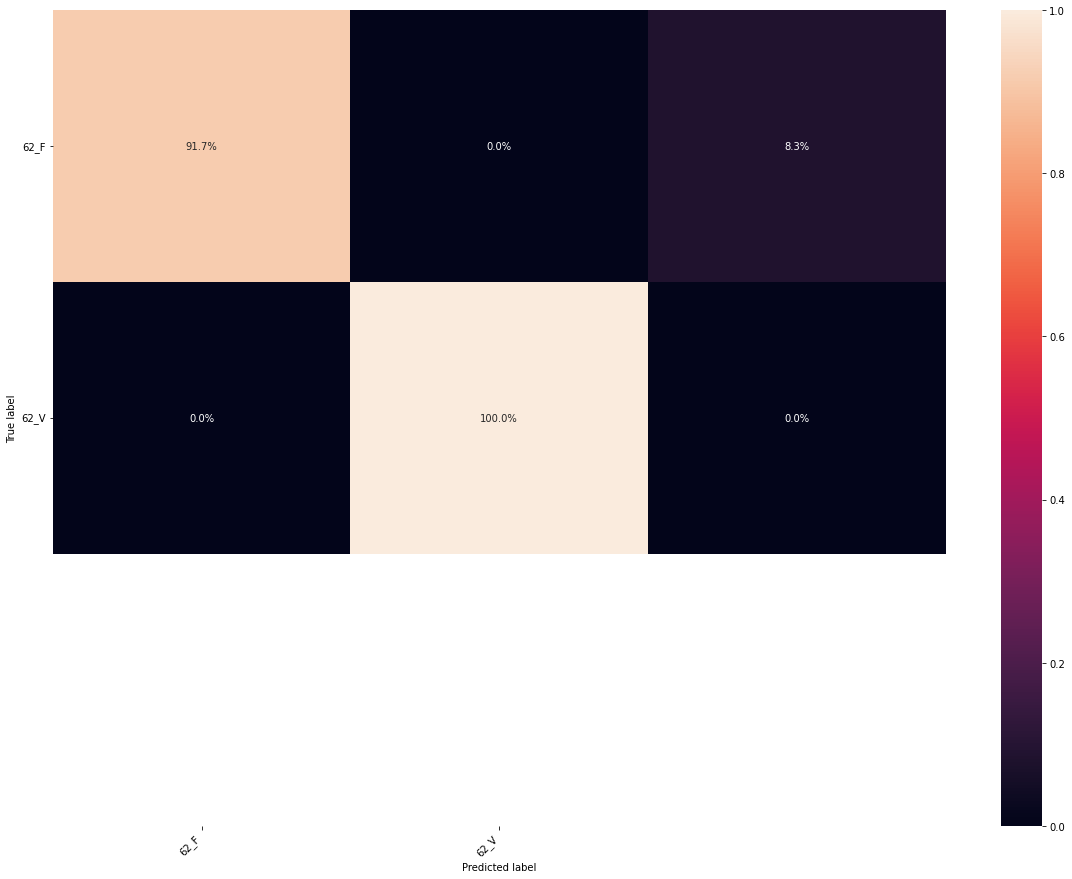

[1. 0.]
[0. 1.]


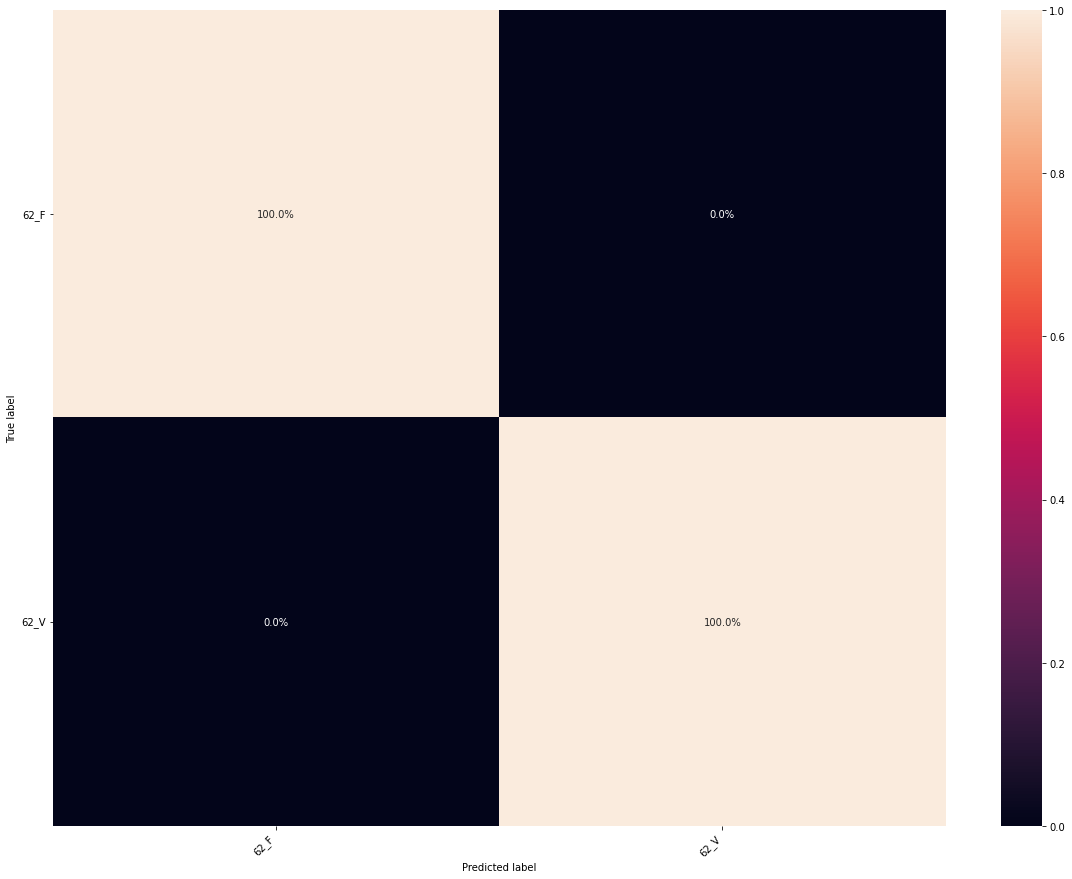

###################################################################
Test individuo 63
[0.83333333 0.16666667]
[0. 1.]


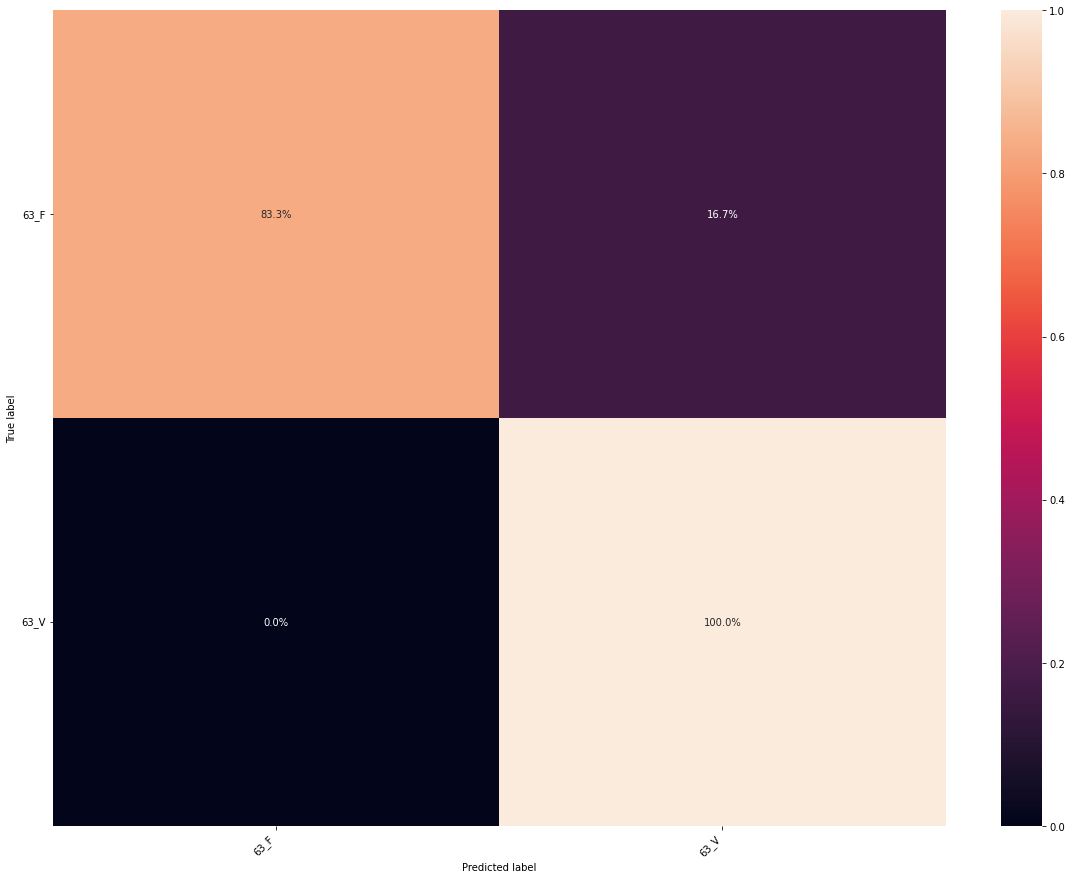

[1. 0.]
[0. 1.]


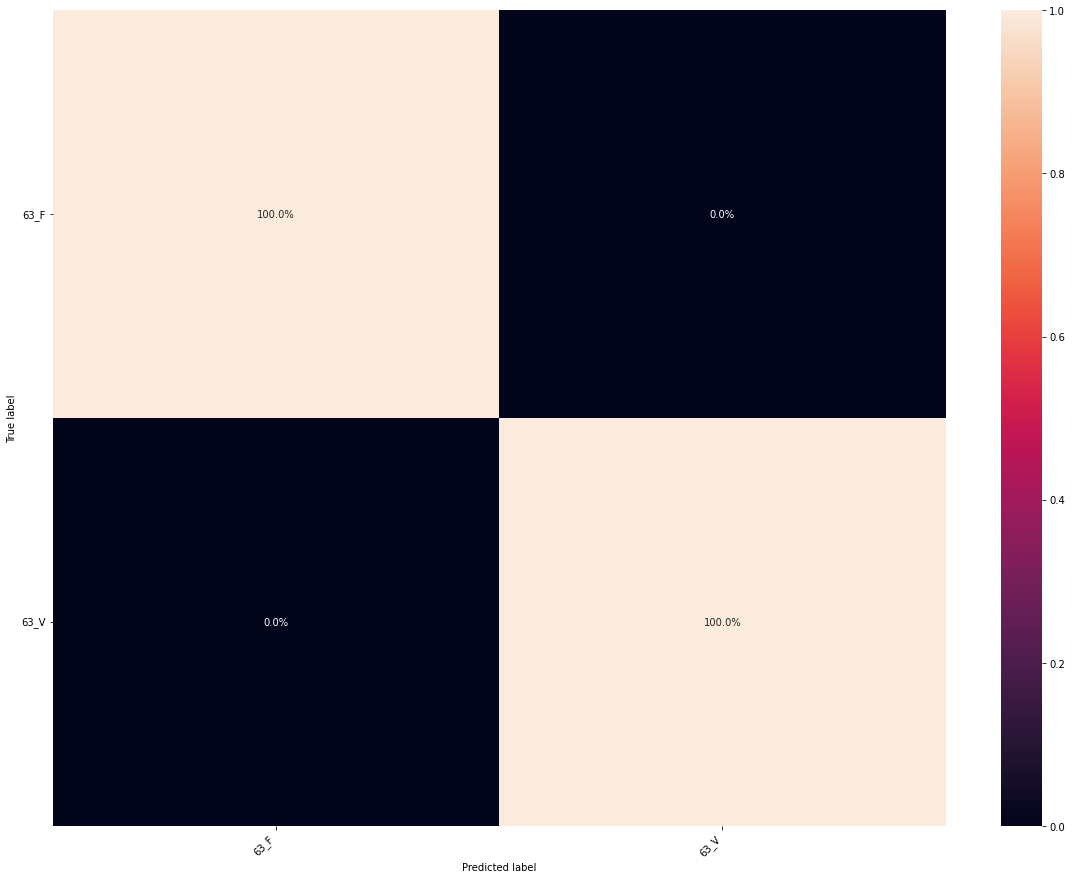

In [ ]:
results_models = {}

for n,nome_individuo in enumerate(nomes_individuos):
    print(f"###################################################################")
    print(f"Test individuo {nome_individuo}")
    df_individuo = df_individuos[df_individuos.nome==nome_individuo]
    df_individuo.reset_index(drop=True,inplace=True)

    predictLR = logisticRegr.predict(df_individuo['imagem'].values.tolist())
    labels_all = np.unique(np.array(predictLR))
    labels_ind = np.unique(np.array(predict_list_RandomForestClassifier[n]))


    matrix_all = confusion_matrix(df_individuo['classe'].values.tolist(),predictLR,labels_all)
    matrix_ind = confusion_matrix(df_individuo['classe'].values.tolist(),predict_list_RandomForestClassifier[n],labels_ind)
    
    results_all = matrix_all.diagonal()/matrix_all.sum(axis=1)
    results_ind = matrix_ind.diagonal()/matrix_ind.sum(axis=1)
    
    
    results_all = results_all[np.isin(labels_all,labels_ind)]
    labels_all = labels_all[np.isin(labels_all,labels_ind)]

    results_models[nome_individuo] = {"model_all": {
                                            "labels":labels_all,
                                            "results":results_all},
                                        "model_ind": {
                                            "labels":labels_ind,
                                            "results":results_ind}}

    print_confusion_matrix(df_individuo['classe'].values.tolist(),
                           predictLR,
                           labels_all)

    print_confusion_matrix(df_individuo['classe'].values.tolist(),
                           predict_list_RandomForestClassifier[n],
                           labels_ind)

In [ ]:
results_models

{0: {'model_all': {'labels': array(['0_F', '0_V'], dtype='<U4'),
   'results': array([1., 1.])},
  'model_ind': {'labels': array(['0_F', '0_V'], dtype='<U3'),
   'results': array([0.75, 1.  ])}},
 1: {'model_all': {'labels': array(['1_F', '1_V'], dtype='<U4'),
   'results': array([0.91666667, 0.91666667])},
  'model_ind': {'labels': array(['1_F', '1_V'], dtype='<U3'),
   'results': array([1., 1.])}},
 2: {'model_all': {'labels': array(['2_F', '2_V'], dtype='<U4'),
   'results': array([1., 1.])},
  'model_ind': {'labels': array(['2_F', '2_V'], dtype='<U3'),
   'results': array([0.91666667, 1.        ])}},
 3: {'model_all': {'labels': array(['3_F', '3_V'], dtype='<U4'),
   'results': array([1., 1.])},
  'model_ind': {'labels': array(['3_F', '3_V'], dtype='<U3'),
   'results': array([1., 1.])}},
 4: {'model_all': {'labels': array(['4_F', '4_V'], dtype='<U4'),
   'results': array([0.91666667, 0.91666667])},
  'model_ind': {'labels': array(['4_F', '4_V'], dtype='<U3'),
   'results': array([

In [ ]:
import matplotlib.pyplot as plt
model_ind_list = np.array([])
model_all_list = np.array([])
model_index_list = np.array([])
for individuo in results_models:
    model_ind_list = np.concatenate((model_ind_list , results_models[individuo]['model_ind']["results"]), axis=0)
    model_all_list = np.concatenate((model_all_list, results_models[individuo]['model_all']["results"]), axis=0)
    model_index_list = np.concatenate((model_index_list, results_models[individuo]['model_ind']["labels"]), axis=0)

19


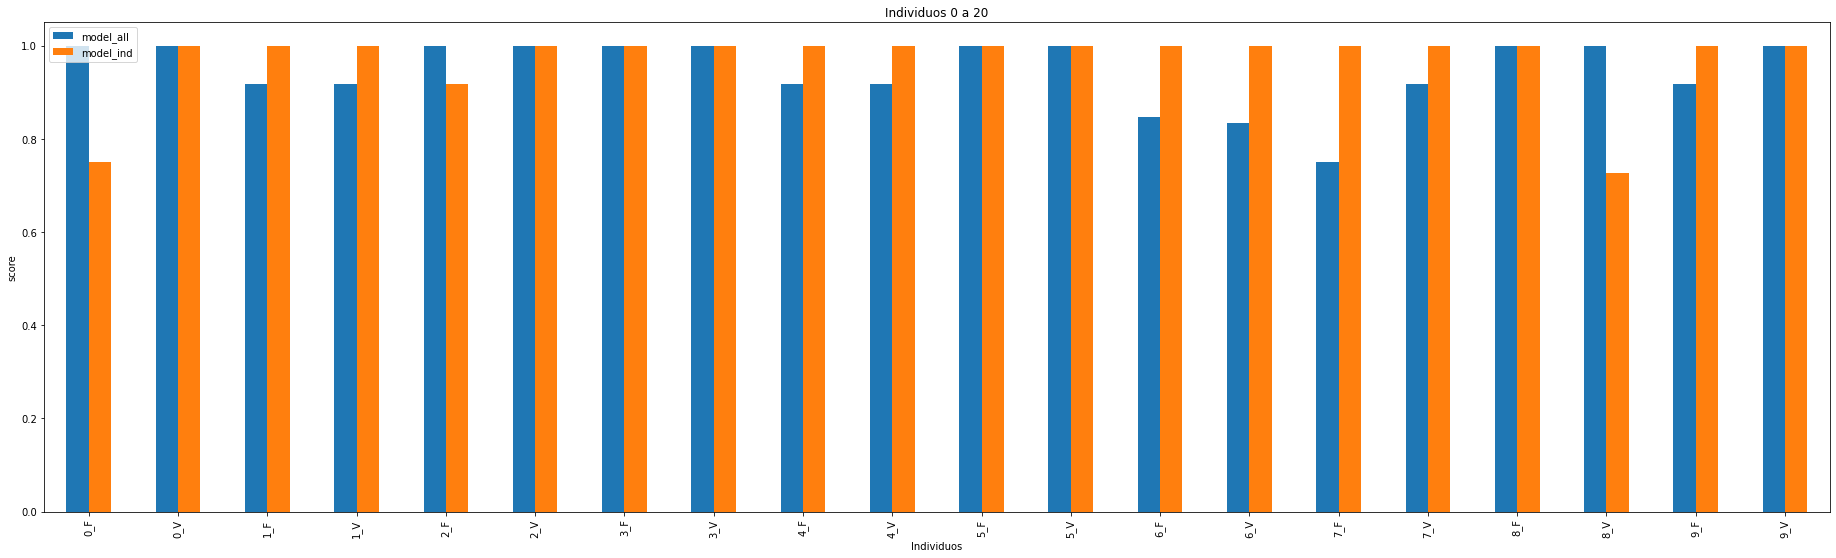

37


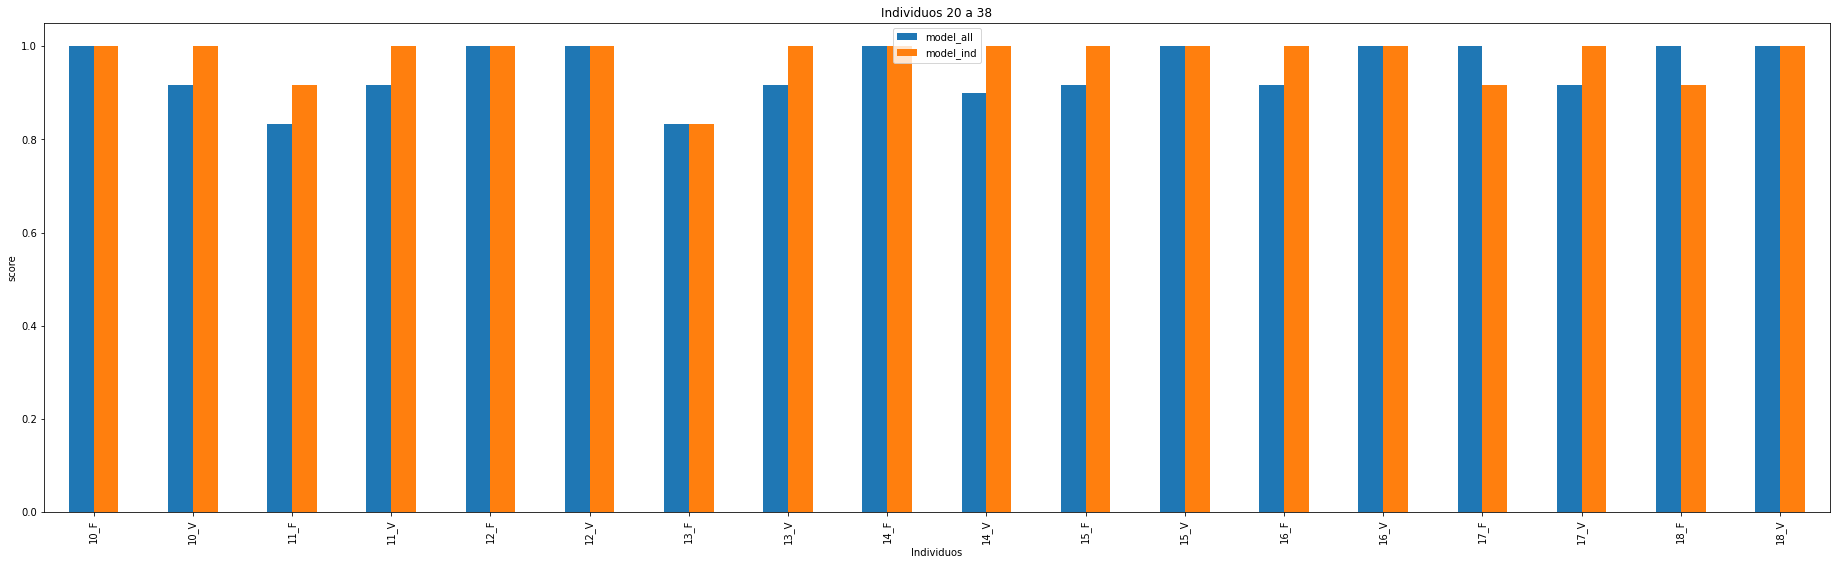

55


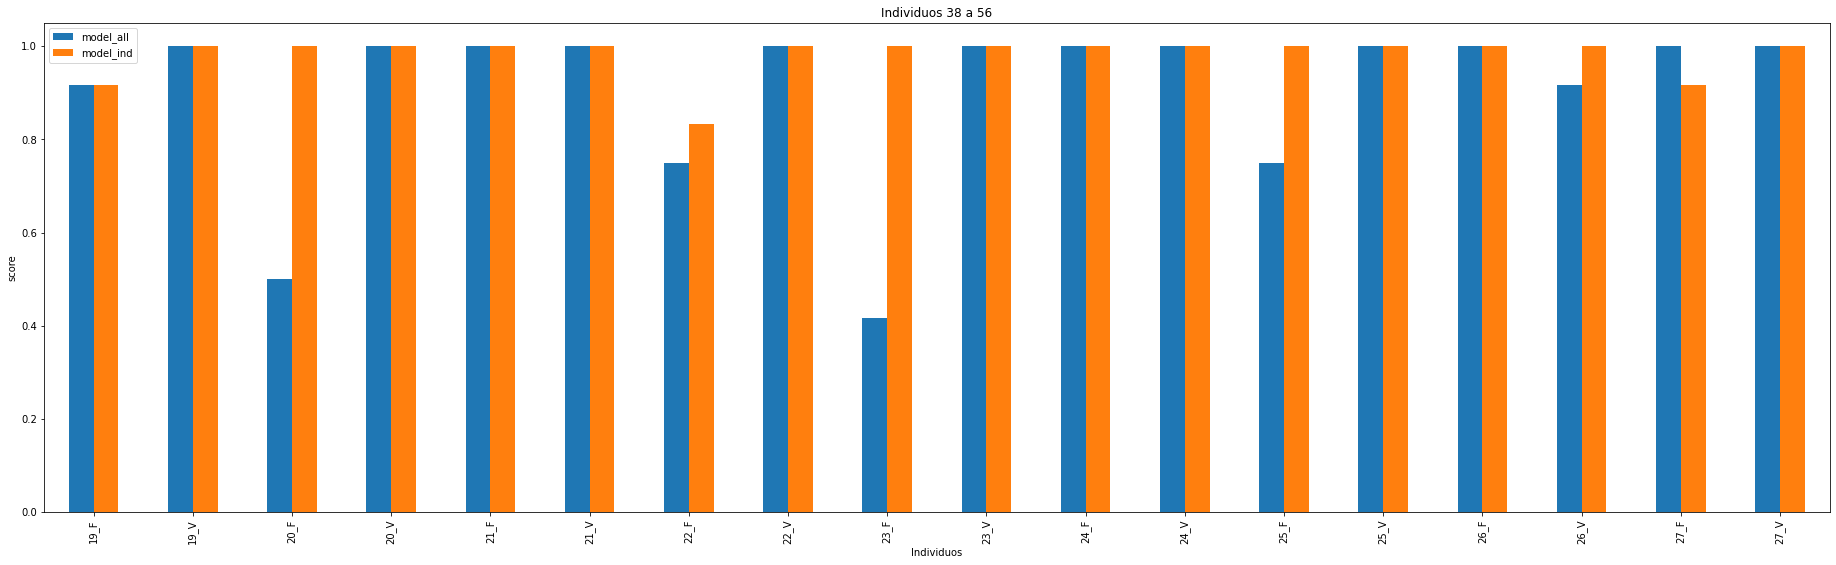

73


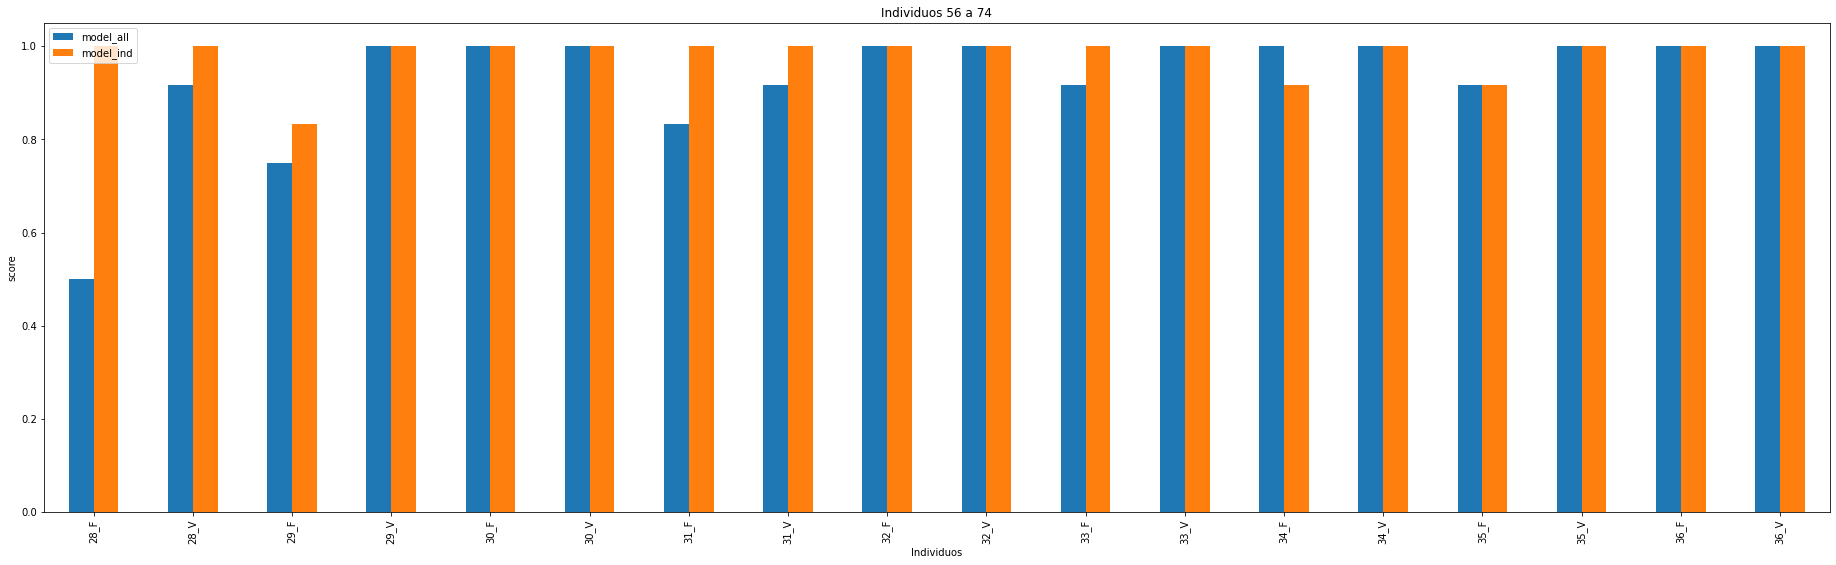

91


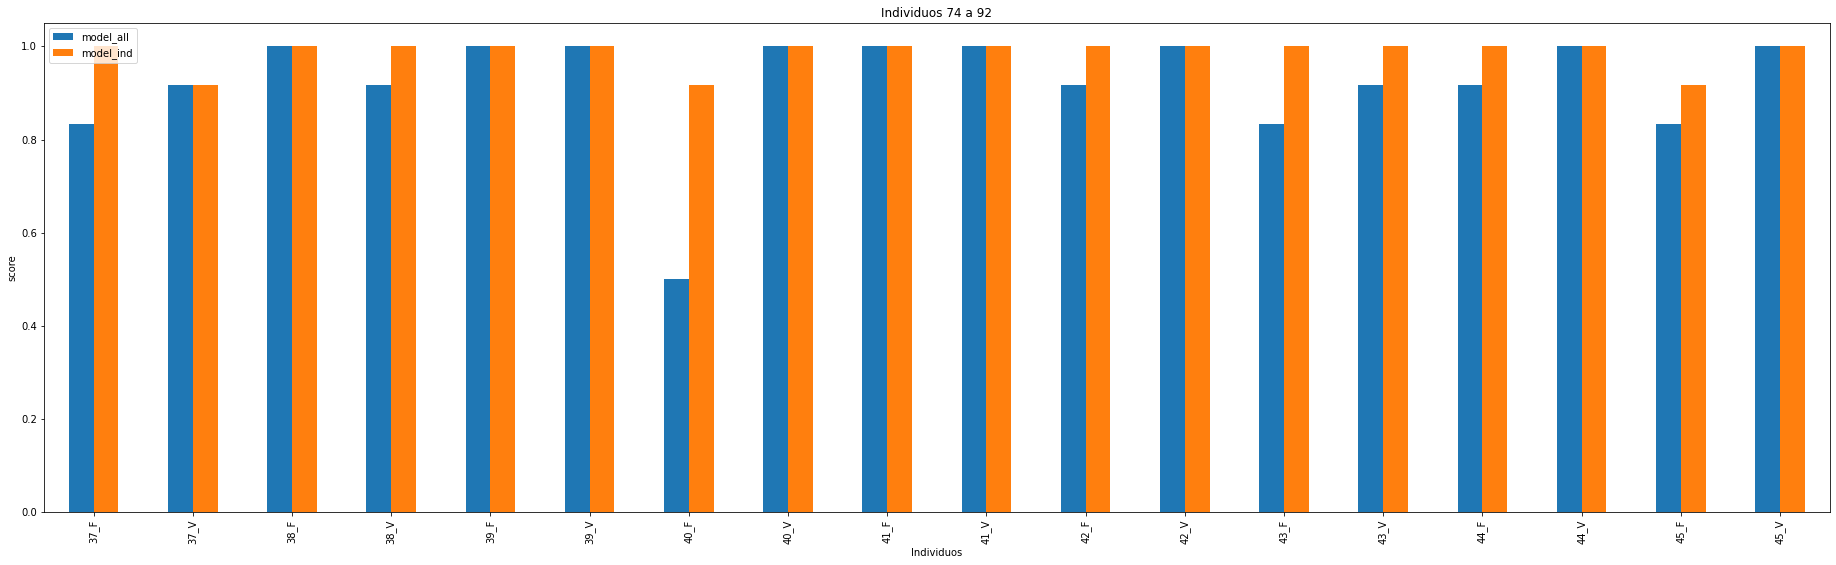

109


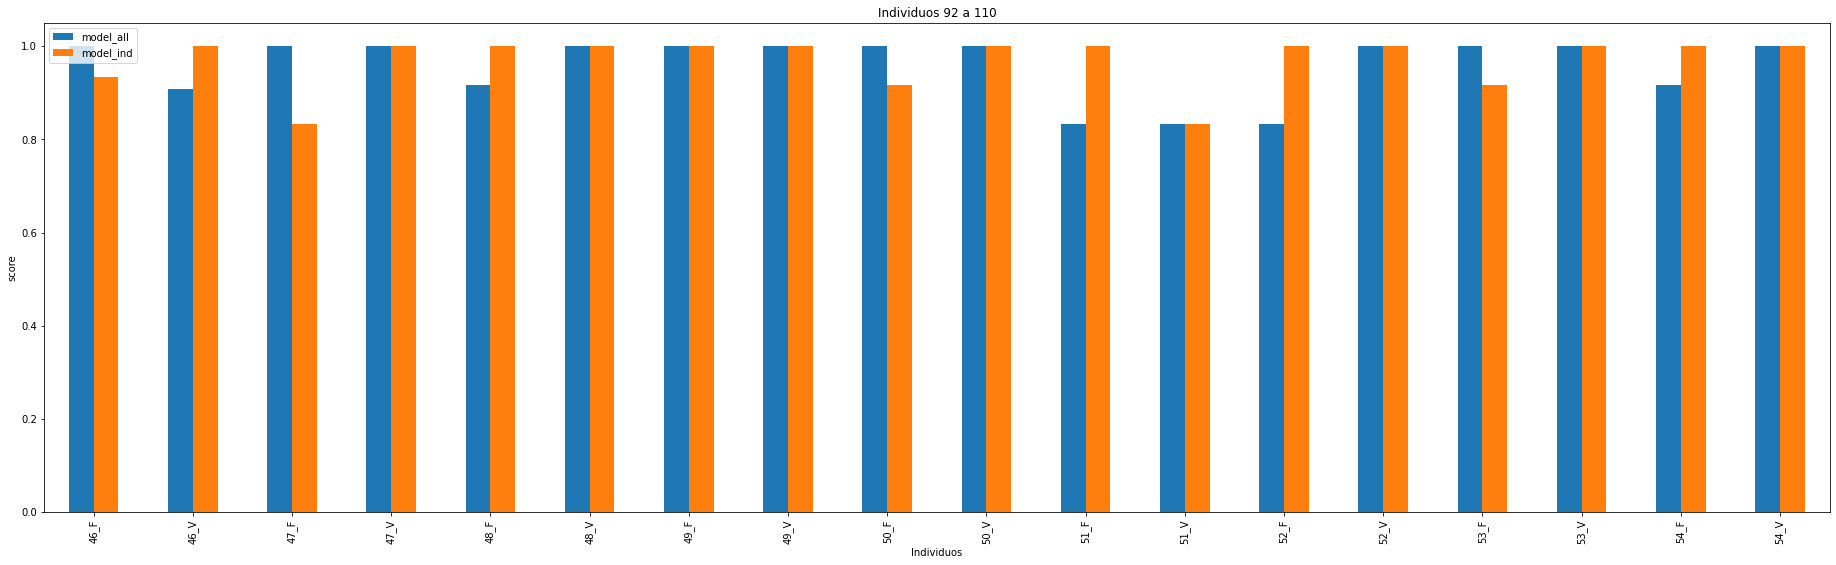

127


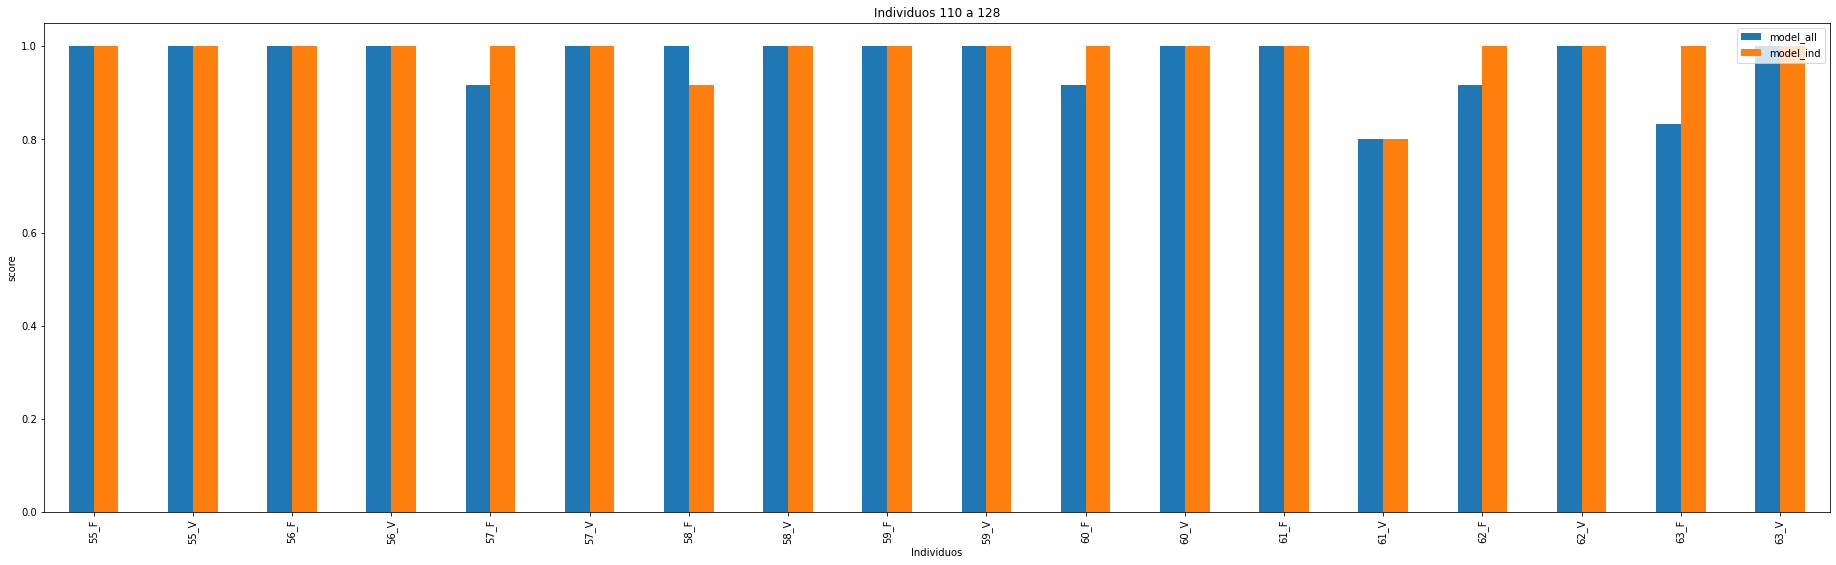

In [ ]:
# plt.figure(figsize=(19,18))
last = 0
for n in range(19,len(model_index_list),18):
    plotdata = pd.DataFrame({
            "model_all":model_all_list[last:n+1],
            "model_ind":model_ind_list[last:n+1]
            }, 
            index=model_index_list[last:n+1]
        )
    
    plotdata.plot(kind="bar",figsize=(32,9))
    plt.title(f"Individuos {last} a {n+1}")
    plt.xlabel("Individuos")
    plt.ylabel("score")
    plt.show()
    last = n+1

In [ ]:
plotdata.mean()

model_all    0.965741
model_ind    0.984259
dtype: float64

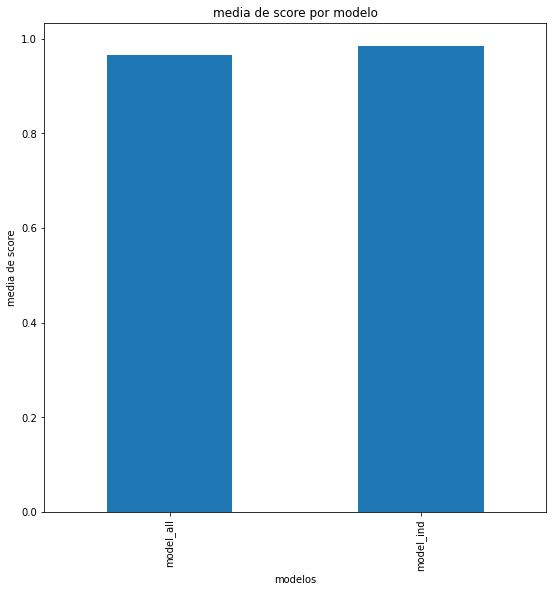

In [ ]:
plotdata.mean().plot(kind='bar', label='index',figsize=(9,9))
plt.title(f"media de score por modelo")
plt.xlabel("modelos")
plt.ylabel("media de score")
plt.show()